In [2]:
from WKAN import *

CUDA is available. Using GPU.


In [3]:
d11 = pd.read_csv("data/mouse_brain/datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_cell_by_gene_S1R1.csv", index_col=0)   
d11_meta = pd.read_csv("data/mouse_brain/datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_cell_metadata_S1R1.csv", index_col=0)
d12 = pd.read_csv("data/mouse_brain/datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate2_cell_by_gene_S1R2.csv", index_col=0)   
d12_meta = pd.read_csv("data/mouse_brain/datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate2_cell_metadata_S1R2.csv", index_col=0)


In [4]:
# Loading data
d11 = pd.read_csv("data/mouse_brain/datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_cell_by_gene_S1R1.csv", index_col=0)   
d11_meta = pd.read_csv("data/mouse_brain/datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_cell_metadata_S1R1.csv", index_col=0)
d12 = pd.read_csv("data/mouse_brain/datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate2_cell_by_gene_S1R2.csv", index_col=0)   
d12_meta = pd.read_csv("data/mouse_brain/datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate2_cell_metadata_S1R2.csv", index_col=0)

d11 = AnnData(d11)
d11.obs['x_cord'] = d11_meta['center_x'].tolist()
d11.obs['y_cord'] = d11_meta['center_y'].tolist()
d11.obs['source'] = "5171"

d12 = AnnData(d12)
d12.obs['x_cord'] = d12_meta['center_x'].tolist()
d12.obs['y_cord'] = d12_meta['center_y'].tolist()
d12.obs['source'] = "5172"

data = [d11, d12]
for d in tqdm(data):
    sc.pp.filter_cells(d, min_counts=500)
    sc.pp.filter_cells(d, min_genes=100)

d_tot = concat([d11, d12])
sc.pp.neighbors(d_tot, n_neighbors = 15, use_rep="X")
# sc.tl.louvain(d_tot, 0.4, random_state=1)
sc.tl.leiden(d_tot, 0.4, random_state=1)

d11 = d_tot[d_tot.obs['source'] == "5171"].copy()
d12 = d_tot[d_tot.obs['source'] == "5172"].copy()

d12_right = d12[d12.obs['x_cord']*6/11 + 2436.36 - d12.obs['y_cord'] > 0].copy()

d11_left = d11[d11.obs['x_cord'] < np.quantile(d11.obs['x_cord'], 0.5)].copy()
d11_right = d11[d11.obs['x_cord'] >= np.quantile(d11.obs['x_cord'], 0.5)].copy()

Rdata_scenario2 = d12_right.copy()

100%|████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00,  6.06it/s]


In [5]:
get_zscore(Rdata_scenario2)
Rdata_scenario2.obs = Rdata_scenario2.obs[['x_cord', 'y_cord']]

In [5]:
Fit_cord_DNN (data_train = d12_right, 
                      hidden_dims = [250, 150, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "DNN5d12r_649")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.81it/s]


Epoch:1, Loss:44.1525


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.54it/s]


Epoch:2, Loss:28.0882


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.48it/s]


Epoch:3, Loss:23.0543


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:4, Loss:20.6501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.01it/s]


Epoch:5, Loss:19.0539


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.69it/s]


Epoch:6, Loss:17.6462


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.11it/s]


Epoch:7, Loss:16.3937


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.50it/s]


Epoch:8, Loss:16.1692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.03it/s]


Epoch:9, Loss:15.5465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.61it/s]


Epoch:10, Loss:14.5670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.42it/s]


Epoch:11, Loss:14.7800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.65it/s]


Epoch:12, Loss:14.0672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.35it/s]


Epoch:13, Loss:13.9062


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.55it/s]


Epoch:14, Loss:13.8899


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.25it/s]


Epoch:15, Loss:13.7425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.57it/s]


Epoch:16, Loss:13.0575


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.02it/s]


Epoch:17, Loss:12.4964


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.52it/s]


Epoch:18, Loss:12.8371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.44it/s]


Epoch:19, Loss:12.5784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.03it/s]


Epoch:20, Loss:11.7151


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.29it/s]


Epoch:21, Loss:12.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.70it/s]


Epoch:22, Loss:12.6206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.62it/s]


Epoch:23, Loss:12.3658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.70it/s]


Epoch:24, Loss:12.2979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.12it/s]


Epoch:25, Loss:11.7625


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.90it/s]


Epoch:26, Loss:12.1270


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:27, Loss:11.5910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.37it/s]


Epoch:28, Loss:11.9308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.14it/s]


Epoch:29, Loss:11.5229


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.00it/s]


Epoch:30, Loss:11.8305


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.34it/s]


Epoch:31, Loss:11.6271


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.20it/s]


Epoch:32, Loss:10.9565


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.99it/s]


Epoch:33, Loss:12.0215


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.44it/s]


Epoch:34, Loss:10.9174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.35it/s]


Epoch:35, Loss:10.9053


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:36, Loss:10.6361


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:37, Loss:11.5454


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.51it/s]


Epoch:38, Loss:11.3099
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.69it/s]


Epoch:39, Loss:8.7449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.01it/s]


Epoch:40, Loss:7.4398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.70it/s]


Epoch:41, Loss:7.7392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.88it/s]


Epoch:42, Loss:7.1553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.65it/s]


Epoch:43, Loss:6.8913


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.55it/s]


Epoch:44, Loss:7.3176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.16it/s]


Epoch:45, Loss:6.6867


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.25it/s]


Epoch:46, Loss:6.4818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.63it/s]


Epoch:47, Loss:6.4317


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.59it/s]


Epoch:48, Loss:6.3991


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.30it/s]


Epoch:49, Loss:6.3329


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 489.58it/s]


Epoch:50, Loss:6.3561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 477.17it/s]


Epoch:51, Loss:5.8724


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.44it/s]


Epoch:52, Loss:6.2243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.93it/s]


Epoch:53, Loss:6.4910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.46it/s]


Epoch:54, Loss:5.6108


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.17it/s]


Epoch:55, Loss:6.1512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.26it/s]


Epoch:56, Loss:5.7228


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.11it/s]


Epoch:57, Loss:6.6661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.53it/s]


Epoch:58, Loss:5.9444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.07it/s]


Epoch:59, Loss:6.0586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.09it/s]


Epoch:60, Loss:5.8310


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.38it/s]


Epoch:61, Loss:5.8324


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.78it/s]


Epoch:62, Loss:5.5664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.34it/s]


Epoch:63, Loss:5.9274


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.23it/s]


Epoch:64, Loss:5.6347


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.71it/s]


Epoch:65, Loss:5.6869
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.46it/s]


Epoch:66, Loss:4.2708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.76it/s]


Epoch:67, Loss:3.9770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.37it/s]


Epoch:68, Loss:3.8253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.48it/s]


Epoch:69, Loss:3.6579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.00it/s]


Epoch:70, Loss:3.5853


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.58it/s]


Epoch:71, Loss:3.5906


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.74it/s]


Epoch:72, Loss:3.4611


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.81it/s]


Epoch:73, Loss:3.4625


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.66it/s]


Epoch:74, Loss:3.4189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.77it/s]


Epoch:75, Loss:3.4057


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.36it/s]


Epoch:76, Loss:3.2199


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.67it/s]


Epoch:77, Loss:3.3520


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.41it/s]


Epoch:78, Loss:3.2584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.77it/s]


Epoch:79, Loss:3.1092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.29it/s]


Epoch:80, Loss:3.2281


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:81, Loss:3.1497


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.67it/s]


Epoch:82, Loss:3.1361


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.54it/s]


Epoch:83, Loss:3.1608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.43it/s]


Epoch:84, Loss:2.9467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.47it/s]


Epoch:85, Loss:3.0388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.02it/s]


Epoch:86, Loss:3.0807


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.58it/s]


Epoch:87, Loss:2.9511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:88, Loss:2.9183


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.83it/s]


Epoch:89, Loss:3.0566


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.34it/s]


Epoch:90, Loss:2.9432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.54it/s]


Epoch:91, Loss:3.0512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.04it/s]


Epoch:92, Loss:2.8706


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:93, Loss:2.8234


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.65it/s]


Epoch:94, Loss:2.9889
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.97it/s]


Epoch:95, Loss:2.2041


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.95it/s]


Epoch:96, Loss:2.0555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.32it/s]


Epoch:97, Loss:2.0596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:98, Loss:2.0263


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.63it/s]


Epoch:99, Loss:1.9788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.82it/s]


Epoch:100, Loss:1.9208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.39it/s]


Epoch:101, Loss:1.9256


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 484.76it/s]


Epoch:102, Loss:1.8756


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.81it/s]


Epoch:103, Loss:1.9060


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.60it/s]


Epoch:104, Loss:1.8240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.94it/s]


Epoch:105, Loss:1.8288


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.45it/s]


Epoch:106, Loss:1.8126


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.01it/s]


Epoch:107, Loss:1.7857


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.44it/s]


Epoch:108, Loss:1.7468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 476.33it/s]


Epoch:109, Loss:1.7668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.53it/s]


Epoch:110, Loss:1.7206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.49it/s]


Epoch:111, Loss:1.7594


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:112, Loss:1.7208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.54it/s]


Epoch:113, Loss:1.6370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.17it/s]


Epoch:114, Loss:1.7009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.67it/s]


Epoch:115, Loss:1.6555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.74it/s]


Epoch:116, Loss:1.6562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.98it/s]


Epoch:117, Loss:1.7062


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.60it/s]


Epoch:118, Loss:1.5805


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.65it/s]


Epoch:119, Loss:1.6206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.75it/s]


Epoch:120, Loss:1.5981


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.43it/s]


Epoch:121, Loss:1.5794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.81it/s]


Epoch:122, Loss:1.5468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.12it/s]


Epoch:123, Loss:1.6240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.60it/s]


Epoch:124, Loss:1.5430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.41it/s]


Epoch:125, Loss:1.5585
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:126, Loss:1.2911


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.05it/s]


Epoch:127, Loss:1.2164


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.82it/s]


Epoch:128, Loss:1.2031


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.43it/s]


Epoch:129, Loss:1.1889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.87it/s]


Epoch:130, Loss:1.1773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.54it/s]


Epoch:131, Loss:1.1595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.86it/s]


Epoch:132, Loss:1.1506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.76it/s]


Epoch:133, Loss:1.1452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.70it/s]


Epoch:134, Loss:1.1408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.14it/s]


Epoch:135, Loss:1.1339


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.42it/s]


Epoch:136, Loss:1.1155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.12it/s]


Epoch:137, Loss:1.1085


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.06it/s]


Epoch:138, Loss:1.1088


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.49it/s]


Epoch:139, Loss:1.0913


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.73it/s]


Epoch:140, Loss:1.0932


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.26it/s]


Epoch:141, Loss:1.0789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.88it/s]


Epoch:142, Loss:1.0775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.23it/s]


Epoch:143, Loss:1.0713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.86it/s]


Epoch:144, Loss:1.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.59it/s]


Epoch:145, Loss:1.0533


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.96it/s]


Epoch:146, Loss:1.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.98it/s]


Epoch:147, Loss:1.0368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 488.31it/s]


Epoch:148, Loss:1.0339


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 485.93it/s]


Epoch:149, Loss:1.0314


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.44it/s]


Epoch:150, Loss:1.0337


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.71it/s]


Epoch:151, Loss:1.0272


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.26it/s]


Epoch:152, Loss:1.0158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.59it/s]


Epoch:153, Loss:1.0181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.45it/s]


Epoch:154, Loss:1.0081


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.54it/s]


Epoch:155, Loss:0.9998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.31it/s]


Epoch:156, Loss:0.9997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 489.84it/s]


Epoch:157, Loss:0.9888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.68it/s]


Epoch:158, Loss:0.9802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.63it/s]


Epoch:159, Loss:0.9704


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.58it/s]


Epoch:160, Loss:0.9864


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.45it/s]


Epoch:161, Loss:0.9670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.53it/s]


Epoch:162, Loss:0.9642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.53it/s]


Epoch:163, Loss:0.9785


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.26it/s]


Epoch:164, Loss:0.9386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.03it/s]


Epoch:165, Loss:0.9430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.71it/s]


Epoch:166, Loss:0.9456


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.06it/s]


Epoch:167, Loss:0.9454


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.36it/s]


Epoch:168, Loss:0.9515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.21it/s]


Epoch:169, Loss:0.9194


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.11it/s]


Epoch:170, Loss:0.9261


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.33it/s]


Epoch:171, Loss:0.9175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.66it/s]


Epoch:172, Loss:0.9317


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.37it/s]


Epoch:173, Loss:0.9045


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.92it/s]


Epoch:174, Loss:0.9019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.66it/s]


Epoch:175, Loss:0.8943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 484.32it/s]


Epoch:176, Loss:0.9087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.76it/s]


Epoch:177, Loss:0.8968
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.60it/s]


Epoch:178, Loss:0.7662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 485.07it/s]


Epoch:179, Loss:0.7342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.14it/s]


Epoch:180, Loss:0.7307


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.14it/s]


Epoch:181, Loss:0.7286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.81it/s]


Epoch:182, Loss:0.7218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.03it/s]


Epoch:183, Loss:0.7195


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 486.68it/s]


Epoch:184, Loss:0.7116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.27it/s]


Epoch:185, Loss:0.7113


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.69it/s]


Epoch:186, Loss:0.7122


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.29it/s]


Epoch:187, Loss:0.7051


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.70it/s]


Epoch:188, Loss:0.7006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.81it/s]


Epoch:189, Loss:0.6999


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.60it/s]


Epoch:190, Loss:0.6994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 488.96it/s]


Epoch:191, Loss:0.6941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.92it/s]


Epoch:192, Loss:0.6911


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.38it/s]


Epoch:193, Loss:0.6882


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.48it/s]


Epoch:194, Loss:0.6880


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.66it/s]


Epoch:195, Loss:0.6838


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 471.41it/s]


Epoch:196, Loss:0.6802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.66it/s]


Epoch:197, Loss:0.6760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 484.96it/s]


Epoch:198, Loss:0.6808


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.22it/s]


Epoch:199, Loss:0.6704


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.33it/s]


Epoch:200, Loss:0.6631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 482.40it/s]


Epoch:201, Loss:0.6684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 477.46it/s]


Epoch:202, Loss:0.6641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 475.50it/s]


Epoch:203, Loss:0.6661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 489.07it/s]


Epoch:204, Loss:0.6603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.16it/s]


Epoch:205, Loss:0.6586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 485.39it/s]


Epoch:206, Loss:0.6522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.38it/s]


Epoch:207, Loss:0.6497


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.81it/s]


Epoch:208, Loss:0.6528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.26it/s]


Epoch:209, Loss:0.6436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.36it/s]


Epoch:210, Loss:0.6431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.25it/s]


Epoch:211, Loss:0.6401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.92it/s]


Epoch:212, Loss:0.6375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.14it/s]


Epoch:213, Loss:0.6361


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.80it/s]


Epoch:214, Loss:0.6397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.06it/s]


Epoch:215, Loss:0.6345


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.18it/s]


Epoch:216, Loss:0.6313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.32it/s]


Epoch:217, Loss:0.6284


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.15it/s]


Epoch:218, Loss:0.6245


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.78it/s]


Epoch:219, Loss:0.6213


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.26it/s]


Epoch:220, Loss:0.6248


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.40it/s]


Epoch:221, Loss:0.6240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.76it/s]


Epoch:222, Loss:0.6211


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:223, Loss:0.6165


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.97it/s]


Epoch:224, Loss:0.6219


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.02it/s]


Epoch:225, Loss:0.6079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:226, Loss:0.6114


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.00it/s]


Epoch:227, Loss:0.6125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.11it/s]


Epoch:228, Loss:0.6100


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.35it/s]


Epoch:229, Loss:0.6054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.38it/s]


Epoch:230, Loss:0.5995


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.87it/s]


Epoch:231, Loss:0.6050


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.52it/s]


Epoch:232, Loss:0.5962


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.33it/s]


Epoch:233, Loss:0.5976
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.05it/s]


Epoch:234, Loss:0.5451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.79it/s]


Epoch:235, Loss:0.5314


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.88it/s]


Epoch:236, Loss:0.5296


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.07it/s]


Epoch:237, Loss:0.5289


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.31it/s]


Epoch:238, Loss:0.5280


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.05it/s]


Epoch:239, Loss:0.5247


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.75it/s]


Epoch:240, Loss:0.5247


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.15it/s]


Epoch:241, Loss:0.5226


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.59it/s]


Epoch:242, Loss:0.5215


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.70it/s]


Epoch:243, Loss:0.5205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.17it/s]


Epoch:244, Loss:0.5201


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.14it/s]


Epoch:245, Loss:0.5157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.12it/s]


Epoch:246, Loss:0.5158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.38it/s]


Epoch:247, Loss:0.5167


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.36it/s]


Epoch:248, Loss:0.5139


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.34it/s]


Epoch:249, Loss:0.5105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.48it/s]


Epoch:250, Loss:0.5134


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.14it/s]


Epoch:251, Loss:0.5082


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:252, Loss:0.5095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.70it/s]


Epoch:253, Loss:0.5075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.99it/s]


Epoch:254, Loss:0.5073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.90it/s]


Epoch:255, Loss:0.5054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.23it/s]


Epoch:256, Loss:0.5048


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.93it/s]


Epoch:257, Loss:0.5029


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.77it/s]


Epoch:258, Loss:0.5021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:259, Loss:0.5015


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:260, Loss:0.5007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.02it/s]


Epoch:261, Loss:0.4989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.58it/s]


Epoch:262, Loss:0.4984


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.91it/s]


Epoch:263, Loss:0.4991


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.82it/s]


Epoch:264, Loss:0.4953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.88it/s]


Epoch:265, Loss:0.4955


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.28it/s]


Epoch:266, Loss:0.4944


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.46it/s]


Epoch:267, Loss:0.4921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.67it/s]


Epoch:268, Loss:0.4916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.85it/s]


Epoch:269, Loss:0.4896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.93it/s]


Epoch:270, Loss:0.4905


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.07it/s]


Epoch:271, Loss:0.4886


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.67it/s]


Epoch:272, Loss:0.4889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.45it/s]


Epoch:273, Loss:0.4859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.15it/s]


Epoch:274, Loss:0.4858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.64it/s]


Epoch:275, Loss:0.4843


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.48it/s]


Epoch:276, Loss:0.4843


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.66it/s]


Epoch:277, Loss:0.4840


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.62it/s]


Epoch:278, Loss:0.4819


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.76it/s]


Epoch:279, Loss:0.4786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.70it/s]


Epoch:280, Loss:0.4777


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:281, Loss:0.4780


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.22it/s]


Epoch:282, Loss:0.4776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.48it/s]


Epoch:283, Loss:0.4756


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.49it/s]


Epoch:284, Loss:0.4742


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.95it/s]


Epoch:285, Loss:0.4749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.71it/s]


Epoch:286, Loss:0.4731


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.49it/s]


Epoch:287, Loss:0.4732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.71it/s]


Epoch:288, Loss:0.4764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.70it/s]


Epoch:289, Loss:0.4692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.54it/s]


Epoch:290, Loss:0.4698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.79it/s]


Epoch:291, Loss:0.4714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.43it/s]


Epoch:292, Loss:0.4680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.78it/s]


Epoch:293, Loss:0.4645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.39it/s]


Epoch:294, Loss:0.4659
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.52it/s]


Epoch:295, Loss:0.4443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.34it/s]


Epoch:296, Loss:0.4390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.36it/s]


Epoch:297, Loss:0.4384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.83it/s]


Epoch:298, Loss:0.4378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.36it/s]


Epoch:299, Loss:0.4373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.83it/s]


Epoch:300, Loss:0.4364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.14it/s]


Epoch:301, Loss:0.4361


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.51it/s]


Epoch:302, Loss:0.4363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.39it/s]


Epoch:303, Loss:0.4346


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:304, Loss:0.4348


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.76it/s]


Epoch:305, Loss:0.4340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.82it/s]


Epoch:306, Loss:0.4332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.81it/s]


Epoch:307, Loss:0.4331


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.46it/s]


Epoch:308, Loss:0.4322


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.67it/s]


Epoch:309, Loss:0.4317


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.58it/s]


Epoch:310, Loss:0.4322


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:311, Loss:0.4308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.93it/s]


Epoch:312, Loss:0.4312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:313, Loss:0.4298


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:314, Loss:0.4287


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.08it/s]


Epoch:315, Loss:0.4286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.47it/s]


Epoch:316, Loss:0.4281


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.72it/s]


Epoch:317, Loss:0.4285


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.86it/s]


Epoch:318, Loss:0.4270


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.64it/s]


Epoch:319, Loss:0.4265


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.54it/s]


Epoch:320, Loss:0.4264


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.67it/s]


Epoch:321, Loss:0.4268


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.54it/s]


Epoch:322, Loss:0.4253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.26it/s]


Epoch:323, Loss:0.4250


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.39it/s]


Epoch:324, Loss:0.4245


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.39it/s]


Epoch:325, Loss:0.4243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.53it/s]


Epoch:326, Loss:0.4237


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.63it/s]


Epoch:327, Loss:0.4232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.70it/s]


Epoch:328, Loss:0.4226


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.58it/s]


Epoch:329, Loss:0.4218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.50it/s]


Epoch:330, Loss:0.4232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 489.07it/s]


Epoch:331, Loss:0.4214


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.36it/s]


Epoch:332, Loss:0.4202


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 478.51it/s]


Epoch:333, Loss:0.4203


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.41it/s]


Epoch:334, Loss:0.4198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.54it/s]


Epoch:335, Loss:0.4199


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.17it/s]


Epoch:336, Loss:0.4189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.94it/s]


Epoch:337, Loss:0.4185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.22it/s]


Epoch:338, Loss:0.4176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.71it/s]


Epoch:339, Loss:0.4181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.51it/s]


Epoch:340, Loss:0.4168


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.12it/s]


Epoch:341, Loss:0.4165


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.44it/s]


Epoch:342, Loss:0.4163


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.90it/s]


Epoch:343, Loss:0.4157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.80it/s]


Epoch:344, Loss:0.4159


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.03it/s]


Epoch:345, Loss:0.4152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.45it/s]


Epoch:346, Loss:0.4143


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.32it/s]


Epoch:347, Loss:0.4140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:348, Loss:0.4129


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.77it/s]


Epoch:349, Loss:0.4133


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.78it/s]


Epoch:350, Loss:0.4116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.70it/s]


Epoch:351, Loss:0.4125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.16it/s]


Epoch:352, Loss:0.4127


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.76it/s]


Epoch:353, Loss:0.4110


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.37it/s]


Epoch:354, Loss:0.4106


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.79it/s]


Epoch:355, Loss:0.4103


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.51it/s]


Epoch:356, Loss:0.4103
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.81it/s]


Epoch:357, Loss:0.4000


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.61it/s]


Epoch:358, Loss:0.3984


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.54it/s]


Epoch:359, Loss:0.3980


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:360, Loss:0.3979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.32it/s]


Epoch:361, Loss:0.3977


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.66it/s]


Epoch:362, Loss:0.3975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.61it/s]


Epoch:363, Loss:0.3971


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.32it/s]


Epoch:364, Loss:0.3970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.89it/s]


Epoch:365, Loss:0.3966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:366, Loss:0.3966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.58it/s]


Epoch:367, Loss:0.3961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.23it/s]


Epoch:368, Loss:0.3959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.76it/s]


Epoch:369, Loss:0.3959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.94it/s]


Epoch:370, Loss:0.3955


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.98it/s]


Epoch:371, Loss:0.3954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 483.27it/s]


Epoch:372, Loss:0.3951


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 485.08it/s]


Epoch:373, Loss:0.3950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.03it/s]


Epoch:374, Loss:0.3948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.26it/s]


Epoch:375, Loss:0.3941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.25it/s]


Epoch:376, Loss:0.3941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.20it/s]


Epoch:377, Loss:0.3942


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.18it/s]


Epoch:378, Loss:0.3936


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.06it/s]


Epoch:379, Loss:0.3935


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:380, Loss:0.3935


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:381, Loss:0.3930


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.90it/s]


Epoch:382, Loss:0.3926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.29it/s]


Epoch:383, Loss:0.3929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.86it/s]


Epoch:384, Loss:0.3924


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.46it/s]


Epoch:385, Loss:0.3921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.07it/s]


Epoch:386, Loss:0.3919


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.75it/s]


Epoch:387, Loss:0.3916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.00it/s]


Epoch:388, Loss:0.3915


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.11it/s]


Epoch:389, Loss:0.3917


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.02it/s]


Epoch:390, Loss:0.3915


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.50it/s]


Epoch:391, Loss:0.3903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 551.42it/s]


Epoch:392, Loss:0.3904


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.39it/s]


Epoch:393, Loss:0.3904


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:394, Loss:0.3903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.91it/s]


Epoch:395, Loss:0.3901


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.02it/s]


Epoch:396, Loss:0.3894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.48it/s]


Epoch:397, Loss:0.3894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.52it/s]


Epoch:398, Loss:0.3895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.43it/s]


Epoch:399, Loss:0.3888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.58it/s]


Epoch:400, Loss:0.3889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.45it/s]


Epoch:401, Loss:0.3889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.01it/s]


Epoch:402, Loss:0.3887


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:403, Loss:0.3881


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:404, Loss:0.3882


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.41it/s]


Epoch:405, Loss:0.3876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:406, Loss:0.3877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.10it/s]


Epoch:407, Loss:0.3876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.68it/s]


Epoch:408, Loss:0.3869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.07it/s]


Epoch:409, Loss:0.3867


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.36it/s]


Epoch:410, Loss:0.3863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:411, Loss:0.3864
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.27it/s]


Epoch:412, Loss:0.3816


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.49it/s]


Epoch:413, Loss:0.3810


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.94it/s]


Epoch:414, Loss:0.3808


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.94it/s]


Epoch:415, Loss:0.3806


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.27it/s]


Epoch:416, Loss:0.3805


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.01it/s]


Epoch:417, Loss:0.3805


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:418, Loss:0.3804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.18it/s]


Epoch:419, Loss:0.3803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.74it/s]


Epoch:420, Loss:0.3801


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.76it/s]


Epoch:421, Loss:0.3800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.07it/s]


Epoch:422, Loss:0.3800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.64it/s]


Epoch:423, Loss:0.3796


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.63it/s]


Epoch:424, Loss:0.3799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:425, Loss:0.3802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.64it/s]


Epoch:426, Loss:0.3793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.06it/s]


Epoch:427, Loss:0.3794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.04it/s]


Epoch:428, Loss:0.3793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.01it/s]


Epoch:429, Loss:0.3792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.47it/s]


Epoch:430, Loss:0.3792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.90it/s]


Epoch:431, Loss:0.3789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.71it/s]


Epoch:432, Loss:0.3786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.65it/s]


Epoch:433, Loss:0.3789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.71it/s]


Epoch:434, Loss:0.3785


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.89it/s]


Epoch:435, Loss:0.3784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.64it/s]


Epoch:436, Loss:0.3789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.46it/s]


Epoch:437, Loss:0.3784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.95it/s]


Epoch:438, Loss:0.3782


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.91it/s]


Epoch:439, Loss:0.3780


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.02it/s]


Epoch:440, Loss:0.3779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.02it/s]


Epoch:441, Loss:0.3778


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.27it/s]


Epoch:442, Loss:0.3776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.58it/s]


Epoch:443, Loss:0.3776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.01it/s]


Epoch:444, Loss:0.3774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.60it/s]


Epoch:445, Loss:0.3775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.74it/s]


Epoch:446, Loss:0.3774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.09it/s]


Epoch:447, Loss:0.3772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.02it/s]


Epoch:448, Loss:0.3770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.25it/s]


Epoch:449, Loss:0.3770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.14it/s]


Epoch:450, Loss:0.3769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.23it/s]


Epoch:451, Loss:0.3769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.03it/s]


Epoch:452, Loss:0.3768


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:453, Loss:0.3767


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.02it/s]


Epoch:454, Loss:0.3764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.78it/s]


Epoch:455, Loss:0.3764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:456, Loss:0.3762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.01it/s]


Epoch:457, Loss:0.3763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.39it/s]


Epoch:458, Loss:0.3762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.27it/s]


Epoch:459, Loss:0.3759


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:460, Loss:0.3758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.19it/s]


Epoch:461, Loss:0.3757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.64it/s]


Epoch:462, Loss:0.3755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:463, Loss:0.3756


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.66it/s]


Epoch:464, Loss:0.3754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.23it/s]


Epoch:465, Loss:0.3754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.66it/s]


Epoch:466, Loss:0.3753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.80it/s]


Epoch:467, Loss:0.3749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.84it/s]


Epoch:468, Loss:0.3750


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.92it/s]


Epoch:469, Loss:0.3750
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.01it/s]


Epoch:470, Loss:0.3726


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.27it/s]


Epoch:471, Loss:0.3722


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.51it/s]


Epoch:472, Loss:0.3722


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.51it/s]


Epoch:473, Loss:0.3721


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.78it/s]


Epoch:474, Loss:0.3720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.07it/s]


Epoch:475, Loss:0.3720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.09it/s]


Epoch:476, Loss:0.3720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.41it/s]


Epoch:477, Loss:0.3720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.56it/s]


Epoch:478, Loss:0.3719


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.66it/s]


Epoch:479, Loss:0.3717


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.36it/s]


Epoch:480, Loss:0.3718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.92it/s]


Epoch:481, Loss:0.3719


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.44it/s]


Epoch:482, Loss:0.3715


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.02it/s]


Epoch:483, Loss:0.3718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:484, Loss:0.3716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.24it/s]


Epoch:485, Loss:0.3716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.25it/s]


Epoch:486, Loss:0.3717


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.88it/s]


Epoch:487, Loss:0.3714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.39it/s]


Epoch:488, Loss:0.3713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:489, Loss:0.3713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.03it/s]


Epoch:490, Loss:0.3712


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.78it/s]


Epoch:491, Loss:0.3711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.85it/s]


Epoch:492, Loss:0.3712


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:493, Loss:0.3714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:494, Loss:0.3710


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.58it/s]


Epoch:495, Loss:0.3711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:496, Loss:0.3709


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.51it/s]


Epoch:497, Loss:0.3707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.01it/s]


Epoch:498, Loss:0.3707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.28it/s]


Epoch:499, Loss:0.3709


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.78it/s]


Epoch:500, Loss:0.3706


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.14it/s]


Epoch:501, Loss:0.3707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.40it/s]


Epoch:502, Loss:0.3708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:503, Loss:0.3706


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.39it/s]


Epoch:504, Loss:0.3705


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:505, Loss:0.3705


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.14it/s]


Epoch:506, Loss:0.3705
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:507, Loss:0.3692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.02it/s]


Epoch:508, Loss:0.3691


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.39it/s]


Epoch:509, Loss:0.3690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.58it/s]


Epoch:510, Loss:0.3690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.92it/s]


Epoch:511, Loss:0.3690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.80it/s]


Epoch:512, Loss:0.3693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.63it/s]


Epoch:513, Loss:0.3690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.41it/s]


Epoch:514, Loss:0.3689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.05it/s]


Epoch:515, Loss:0.3689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.14it/s]


Epoch:516, Loss:0.3689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.52it/s]


Epoch:517, Loss:0.3689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.40it/s]


Epoch:518, Loss:0.3689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.71it/s]


Epoch:519, Loss:0.3688


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.15it/s]


Epoch:520, Loss:0.3687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:521, Loss:0.3688


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.12it/s]


Epoch:522, Loss:0.3687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.76it/s]


Epoch:523, Loss:0.3687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.67it/s]


Epoch:524, Loss:0.3688


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.64it/s]


Epoch:525, Loss:0.3687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.16it/s]


Epoch:526, Loss:0.3686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.30it/s]


Epoch:527, Loss:0.3686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:528, Loss:0.3688


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:529, Loss:0.3686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.07it/s]


Epoch:530, Loss:0.3686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.61it/s]


Epoch:531, Loss:0.3684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.09it/s]


Epoch:532, Loss:0.3685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.76it/s]


Epoch:533, Loss:0.3684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.39it/s]


Epoch:534, Loss:0.3692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.22it/s]


Epoch:535, Loss:0.3684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.60it/s]


Epoch:536, Loss:0.3684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.38it/s]


Epoch:537, Loss:0.3685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.53it/s]


Epoch:538, Loss:0.3683


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.56it/s]


Epoch:539, Loss:0.3684
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.51it/s]


Epoch:540, Loss:0.3678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.54it/s]


Epoch:541, Loss:0.3676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.77it/s]


Epoch:542, Loss:0.3678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:543, Loss:0.3677


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.53it/s]


Epoch:544, Loss:0.3676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.13it/s]


Epoch:545, Loss:0.3675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.83it/s]


Epoch:546, Loss:0.3675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.45it/s]


Epoch:547, Loss:0.3677


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.44it/s]


Epoch:548, Loss:0.3675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.02it/s]


Epoch:549, Loss:0.3674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.88it/s]


Epoch:550, Loss:0.3674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.32it/s]


Epoch:551, Loss:0.3675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.09it/s]


Epoch:552, Loss:0.3675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.96it/s]


Epoch:553, Loss:0.3674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:554, Loss:0.3674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.53it/s]


Epoch:555, Loss:0.3675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.34it/s]


Epoch:556, Loss:0.3674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.80it/s]


Epoch:557, Loss:0.3674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:558, Loss:0.3674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.93it/s]


Epoch:559, Loss:0.3674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.82it/s]


Epoch:560, Loss:0.3674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.00it/s]


Epoch:561, Loss:0.3673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.22it/s]


Epoch:562, Loss:0.3674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.81it/s]


Epoch:563, Loss:0.3674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.75it/s]


Epoch:564, Loss:0.3673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.26it/s]


Epoch:565, Loss:0.3672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:566, Loss:0.3674
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.58it/s]


Epoch:567, Loss:0.3669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.85it/s]


Epoch:568, Loss:0.3669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.91it/s]


Epoch:569, Loss:0.3669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.01it/s]


Epoch:570, Loss:0.3669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.12it/s]


Epoch:571, Loss:0.3668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.70it/s]


Epoch:572, Loss:0.3670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.64it/s]


Epoch:573, Loss:0.3669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:574, Loss:0.3670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.30it/s]


Epoch:575, Loss:0.3668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.43it/s]


Epoch:576, Loss:0.3669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.54it/s]


Epoch:577, Loss:0.3669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.12it/s]


Epoch:578, Loss:0.3668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.65it/s]


Epoch:579, Loss:0.3668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.07it/s]


Epoch:580, Loss:0.3668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.75it/s]


Epoch:581, Loss:0.3668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.35it/s]


Epoch:582, Loss:0.3668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.20it/s]


Epoch:583, Loss:0.3668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.28it/s]


Epoch:584, Loss:0.3667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.92it/s]


Epoch:585, Loss:0.3668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.96it/s]


Epoch:586, Loss:0.3667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:587, Loss:0.3667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.40it/s]


Epoch:588, Loss:0.3667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.16it/s]


Epoch:589, Loss:0.3667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:590, Loss:0.3668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:591, Loss:0.3667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.81it/s]

Epoch:592, Loss:0.3671
New learning rate:6.103515625e-08
Folder already exists


DNN5_cord(
  (fclayer1): Sequential(
    (0): Linear(in_features=649, out_features=250, bias=True)
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): Linear(in_features=250, out_features=150, bias=True)
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): Linear(in_features=150, out_features=70, bias=True)
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): Linear(in_features=70, out_features=50, bias=True)
    (1): ReLU()
  )
  (fclayer5): Sequential(
    (0): Linear(in_features=50, out_features=20, bias=True)
    (1): ReLU()
  )
  (fclayer6): Sequential(
    (0): Linear(in_features=20, out_features=2, bias=True)
    (1): Sigmoid()
  )
)

In [43]:
model = Fit_cord_DNN (data_train = Rdata_scenario2, 
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "DNN5_649")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.43it/s]


Epoch:1, Loss:54.3714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.65it/s]


Epoch:2, Loss:33.1923


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.36it/s]


Epoch:3, Loss:27.1684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.87it/s]


Epoch:4, Loss:23.4240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.81it/s]


Epoch:5, Loss:20.3873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:6, Loss:17.9286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.98it/s]


Epoch:7, Loss:15.5814


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.77it/s]


Epoch:8, Loss:14.0394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 545.24it/s]


Epoch:9, Loss:12.9179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.26it/s]


Epoch:10, Loss:11.5489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.78it/s]


Epoch:11, Loss:11.5641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.79it/s]


Epoch:12, Loss:10.5259


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.98it/s]


Epoch:13, Loss:10.0177


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.82it/s]


Epoch:14, Loss:8.9490


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.55it/s]


Epoch:15, Loss:8.9212


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.43it/s]


Epoch:16, Loss:8.4948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.79it/s]


Epoch:17, Loss:8.0543


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 482.18it/s]


Epoch:18, Loss:8.2360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.92it/s]


Epoch:19, Loss:8.0687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.11it/s]


Epoch:20, Loss:7.9392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.96it/s]


Epoch:21, Loss:7.2413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.94it/s]


Epoch:22, Loss:7.8558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.97it/s]


Epoch:23, Loss:6.4767


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.74it/s]


Epoch:24, Loss:7.2784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.27it/s]


Epoch:25, Loss:6.4571


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 484.42it/s]


Epoch:26, Loss:6.6502


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.00it/s]


Epoch:27, Loss:6.4655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.14it/s]


Epoch:28, Loss:6.6066


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.54it/s]


Epoch:29, Loss:6.4534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 553.50it/s]


Epoch:30, Loss:6.3329


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.17it/s]


Epoch:31, Loss:6.2294


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.01it/s]


Epoch:32, Loss:5.9336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.19it/s]


Epoch:33, Loss:5.8266


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.44it/s]


Epoch:34, Loss:6.6376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.89it/s]


Epoch:35, Loss:5.3889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.51it/s]


Epoch:36, Loss:5.6473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.22it/s]


Epoch:37, Loss:5.8403


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.78it/s]


Epoch:38, Loss:5.7356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.19it/s]


Epoch:39, Loss:5.4404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.73it/s]


Epoch:40, Loss:5.7603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.31it/s]


Epoch:41, Loss:5.6673
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.36it/s]


Epoch:42, Loss:3.5189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 541.27it/s]


Epoch:43, Loss:2.4967


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.66it/s]


Epoch:44, Loss:2.3757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.68it/s]


Epoch:45, Loss:2.4497


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.81it/s]


Epoch:46, Loss:2.3681


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.63it/s]


Epoch:47, Loss:2.4493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.96it/s]


Epoch:48, Loss:2.2979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.76it/s]


Epoch:49, Loss:2.6200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.42it/s]


Epoch:50, Loss:2.3963


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.13it/s]


Epoch:51, Loss:2.5067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.85it/s]


Epoch:52, Loss:2.8670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.19it/s]


Epoch:53, Loss:2.1517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.47it/s]


Epoch:54, Loss:2.3290


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 555.89it/s]


Epoch:55, Loss:2.5295


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.71it/s]


Epoch:56, Loss:2.4093


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.15it/s]


Epoch:57, Loss:2.7612


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.98it/s]


Epoch:58, Loss:2.2736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.54it/s]


Epoch:59, Loss:2.2422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.33it/s]


Epoch:60, Loss:2.4112


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.52it/s]


Epoch:61, Loss:2.9403


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.02it/s]


Epoch:62, Loss:2.1707
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.69it/s]


Epoch:63, Loss:1.5637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.93it/s]


Epoch:64, Loss:1.0123


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.51it/s]


Epoch:65, Loss:1.0654


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.26it/s]


Epoch:66, Loss:1.1258


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.26it/s]


Epoch:67, Loss:1.0185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.25it/s]


Epoch:68, Loss:1.0736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.31it/s]


Epoch:69, Loss:1.0309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.99it/s]


Epoch:70, Loss:1.1217


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.34it/s]


Epoch:71, Loss:1.0896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.98it/s]


Epoch:72, Loss:1.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:73, Loss:1.0579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.85it/s]


Epoch:74, Loss:1.1451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.40it/s]


Epoch:75, Loss:1.1217


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.14it/s]


Epoch:76, Loss:1.1802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.15it/s]


Epoch:77, Loss:1.0798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.33it/s]


Epoch:78, Loss:1.1032


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.97it/s]


Epoch:79, Loss:1.1007
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.53it/s]


Epoch:80, Loss:0.8717


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.01it/s]


Epoch:81, Loss:0.4966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.71it/s]


Epoch:82, Loss:0.4989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.29it/s]


Epoch:83, Loss:0.5221


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.48it/s]


Epoch:84, Loss:0.5147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.02it/s]


Epoch:85, Loss:0.5002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.54it/s]


Epoch:86, Loss:0.5076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.47it/s]


Epoch:87, Loss:0.5110


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.45it/s]


Epoch:88, Loss:0.5351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.76it/s]


Epoch:89, Loss:0.5040


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.42it/s]


Epoch:90, Loss:0.5184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.40it/s]


Epoch:91, Loss:0.5140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.92it/s]


Epoch:92, Loss:0.5096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.31it/s]


Epoch:93, Loss:0.5209


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.23it/s]


Epoch:94, Loss:0.5552


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.01it/s]


Epoch:95, Loss:0.5243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.31it/s]


Epoch:96, Loss:0.5309
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.81it/s]


Epoch:97, Loss:0.4186


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.70it/s]


Epoch:98, Loss:0.2461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.05it/s]


Epoch:99, Loss:0.2452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.56it/s]


Epoch:100, Loss:0.2666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.44it/s]


Epoch:101, Loss:0.2568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 471.05it/s]


Epoch:102, Loss:0.2588


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.52it/s]


Epoch:103, Loss:0.2592


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.06it/s]


Epoch:104, Loss:0.2592


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 470.39it/s]


Epoch:105, Loss:0.2583


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.22it/s]


Epoch:106, Loss:0.2597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.41it/s]


Epoch:107, Loss:0.2549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.70it/s]


Epoch:108, Loss:0.2640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.82it/s]


Epoch:109, Loss:0.2553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.40it/s]


Epoch:110, Loss:0.2553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.27it/s]


Epoch:111, Loss:0.2728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.47it/s]


Epoch:112, Loss:0.2601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.33it/s]


Epoch:113, Loss:0.2564


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.09it/s]


Epoch:114, Loss:0.2608
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.01it/s]


Epoch:115, Loss:0.2099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.70it/s]


Epoch:116, Loss:0.1405


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.69it/s]


Epoch:117, Loss:0.1408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.57it/s]


Epoch:118, Loss:0.1490


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.28it/s]


Epoch:119, Loss:0.1463


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.11it/s]


Epoch:120, Loss:0.1440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.87it/s]


Epoch:121, Loss:0.1441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.55it/s]


Epoch:122, Loss:0.1442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.04it/s]


Epoch:123, Loss:0.1441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.39it/s]


Epoch:124, Loss:0.1421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.68it/s]


Epoch:125, Loss:0.1433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.31it/s]


Epoch:126, Loss:0.1416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.76it/s]


Epoch:127, Loss:0.1432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.70it/s]


Epoch:128, Loss:0.1418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.56it/s]


Epoch:129, Loss:0.1421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.93it/s]


Epoch:130, Loss:0.1429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.80it/s]


Epoch:131, Loss:0.1395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.50it/s]


Epoch:132, Loss:0.1430
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.89it/s]


Epoch:133, Loss:0.1249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.67it/s]


Epoch:134, Loss:0.0947


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.18it/s]


Epoch:135, Loss:0.0938


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.83it/s]


Epoch:136, Loss:0.0970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.92it/s]


Epoch:137, Loss:0.0966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.71it/s]


Epoch:138, Loss:0.0956


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:139, Loss:0.0941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.92it/s]


Epoch:140, Loss:0.0950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.13it/s]


Epoch:141, Loss:0.0939


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.29it/s]


Epoch:142, Loss:0.0930


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.85it/s]


Epoch:143, Loss:0.0940


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.98it/s]


Epoch:144, Loss:0.0926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.26it/s]


Epoch:145, Loss:0.0921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.91it/s]


Epoch:146, Loss:0.0921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.63it/s]


Epoch:147, Loss:0.0910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 562.88it/s]


Epoch:148, Loss:0.0916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.74it/s]


Epoch:149, Loss:0.0908


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.01it/s]


Epoch:150, Loss:0.0914


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.40it/s]


Epoch:151, Loss:0.0908


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.21it/s]


Epoch:152, Loss:0.0891


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.41it/s]


Epoch:153, Loss:0.0896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:154, Loss:0.0902


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.60it/s]


Epoch:155, Loss:0.0893


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.39it/s]


Epoch:156, Loss:0.0887


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.63it/s]


Epoch:157, Loss:0.0877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.51it/s]


Epoch:158, Loss:0.0888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.51it/s]


Epoch:159, Loss:0.0888
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.45it/s]


Epoch:160, Loss:0.0802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 474.36it/s]


Epoch:161, Loss:0.0694


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.05it/s]


Epoch:162, Loss:0.0697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.75it/s]


Epoch:163, Loss:0.0702


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.34it/s]


Epoch:164, Loss:0.0699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.26it/s]


Epoch:165, Loss:0.0698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.72it/s]


Epoch:166, Loss:0.0693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.74it/s]


Epoch:167, Loss:0.0690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.26it/s]


Epoch:168, Loss:0.0692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.26it/s]


Epoch:169, Loss:0.0686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.64it/s]


Epoch:170, Loss:0.0681


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.82it/s]


Epoch:171, Loss:0.0679


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.81it/s]


Epoch:172, Loss:0.0685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.08it/s]


Epoch:173, Loss:0.0675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.13it/s]


Epoch:174, Loss:0.0676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.05it/s]


Epoch:175, Loss:0.0675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.16it/s]


Epoch:176, Loss:0.0667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.04it/s]


Epoch:177, Loss:0.0669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.35it/s]


Epoch:178, Loss:0.0669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.66it/s]


Epoch:179, Loss:0.0665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.80it/s]


Epoch:180, Loss:0.0663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.34it/s]


Epoch:181, Loss:0.0658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.14it/s]


Epoch:182, Loss:0.0660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.90it/s]


Epoch:183, Loss:0.0658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:184, Loss:0.0652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.10it/s]


Epoch:185, Loss:0.0651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 550.58it/s]


Epoch:186, Loss:0.0651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.48it/s]


Epoch:187, Loss:0.0651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:188, Loss:0.0648


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.60it/s]


Epoch:189, Loss:0.0647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.13it/s]


Epoch:190, Loss:0.0643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.05it/s]


Epoch:191, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.75it/s]


Epoch:192, Loss:0.0641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.05it/s]


Epoch:193, Loss:0.0639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.52it/s]


Epoch:194, Loss:0.0634


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.76it/s]


Epoch:195, Loss:0.0635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.80it/s]


Epoch:196, Loss:0.0636
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.57it/s]


Epoch:197, Loss:0.0591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.57it/s]


Epoch:198, Loss:0.0560


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.11it/s]


Epoch:199, Loss:0.0561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.41it/s]


Epoch:200, Loss:0.0562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.31it/s]


Epoch:201, Loss:0.0561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.89it/s]


Epoch:202, Loss:0.0560


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.01it/s]


Epoch:203, Loss:0.0558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.22it/s]


Epoch:204, Loss:0.0556


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.70it/s]


Epoch:205, Loss:0.0555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.52it/s]


Epoch:206, Loss:0.0555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.06it/s]


Epoch:207, Loss:0.0553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.45it/s]


Epoch:208, Loss:0.0554


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.14it/s]


Epoch:209, Loss:0.0551


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 549.20it/s]


Epoch:210, Loss:0.0550


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.55it/s]


Epoch:211, Loss:0.0549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.60it/s]


Epoch:212, Loss:0.0547


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.49it/s]


Epoch:213, Loss:0.0546


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.31it/s]


Epoch:214, Loss:0.0545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.89it/s]


Epoch:215, Loss:0.0544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.68it/s]


Epoch:216, Loss:0.0542


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.61it/s]


Epoch:217, Loss:0.0543


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 548.16it/s]


Epoch:218, Loss:0.0542


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.94it/s]


Epoch:219, Loss:0.0539


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 551.14it/s]


Epoch:220, Loss:0.0538


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.90it/s]


Epoch:221, Loss:0.0539


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.88it/s]


Epoch:222, Loss:0.0536


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.28it/s]


Epoch:223, Loss:0.0535


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:224, Loss:0.0535


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.00it/s]


Epoch:225, Loss:0.0532


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.58it/s]


Epoch:226, Loss:0.0531


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.59it/s]


Epoch:227, Loss:0.0531


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.16it/s]


Epoch:228, Loss:0.0530


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.03it/s]


Epoch:229, Loss:0.0529


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.38it/s]


Epoch:230, Loss:0.0528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.02it/s]


Epoch:231, Loss:0.0528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.91it/s]


Epoch:232, Loss:0.0524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.15it/s]


Epoch:233, Loss:0.0525


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.14it/s]


Epoch:234, Loss:0.0524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.07it/s]


Epoch:235, Loss:0.0522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.52it/s]


Epoch:236, Loss:0.0523


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 547.15it/s]


Epoch:237, Loss:0.0520


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:238, Loss:0.0519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 553.50it/s]


Epoch:239, Loss:0.0517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 545.11it/s]


Epoch:240, Loss:0.0517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.87it/s]


Epoch:241, Loss:0.0515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.22it/s]


Epoch:242, Loss:0.0515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 544.84it/s]


Epoch:243, Loss:0.0514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.45it/s]


Epoch:244, Loss:0.0513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.92it/s]


Epoch:245, Loss:0.0512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.63it/s]


Epoch:246, Loss:0.0512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:247, Loss:0.0510


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.92it/s]


Epoch:248, Loss:0.0508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.15it/s]


Epoch:249, Loss:0.0508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.10it/s]


Epoch:250, Loss:0.0508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 547.83it/s]


Epoch:251, Loss:0.0506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 547.01it/s]


Epoch:252, Loss:0.0506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.83it/s]


Epoch:253, Loss:0.0504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.88it/s]


Epoch:254, Loss:0.0503


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.13it/s]


Epoch:255, Loss:0.0503


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.66it/s]


Epoch:256, Loss:0.0501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:257, Loss:0.0499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.14it/s]


Epoch:258, Loss:0.0499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 548.38it/s]


Epoch:259, Loss:0.0498


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 548.11it/s]


Epoch:260, Loss:0.0498


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:261, Loss:0.0496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.63it/s]


Epoch:262, Loss:0.0497


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.17it/s]


Epoch:263, Loss:0.0494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.76it/s]


Epoch:264, Loss:0.0492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.70it/s]


Epoch:265, Loss:0.0492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.19it/s]


Epoch:266, Loss:0.0493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.59it/s]


Epoch:267, Loss:0.0490


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.05it/s]


Epoch:268, Loss:0.0489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.76it/s]


Epoch:269, Loss:0.0490


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.48it/s]


Epoch:270, Loss:0.0490


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.28it/s]


Epoch:271, Loss:0.0486


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.15it/s]


Epoch:272, Loss:0.0486
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.87it/s]


Epoch:273, Loss:0.0466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.96it/s]


Epoch:274, Loss:0.0455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.00it/s]


Epoch:275, Loss:0.0456


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.65it/s]


Epoch:276, Loss:0.0456


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.26it/s]


Epoch:277, Loss:0.0456


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:278, Loss:0.0455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 488.30it/s]


Epoch:279, Loss:0.0455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.91it/s]


Epoch:280, Loss:0.0454


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.91it/s]


Epoch:281, Loss:0.0453


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 465.01it/s]


Epoch:282, Loss:0.0453


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 430.08it/s]


Epoch:283, Loss:0.0453


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 435.20it/s]


Epoch:284, Loss:0.0453


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 415.73it/s]


Epoch:285, Loss:0.0451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 465.10it/s]


Epoch:286, Loss:0.0451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 438.24it/s]


Epoch:287, Loss:0.0450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 453.37it/s]


Epoch:288, Loss:0.0450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.50it/s]


Epoch:289, Loss:0.0449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.32it/s]


Epoch:290, Loss:0.0448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.01it/s]


Epoch:291, Loss:0.0448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.96it/s]


Epoch:292, Loss:0.0448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.66it/s]


Epoch:293, Loss:0.0448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.94it/s]


Epoch:294, Loss:0.0446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.73it/s]


Epoch:295, Loss:0.0446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.94it/s]


Epoch:296, Loss:0.0446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.39it/s]


Epoch:297, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.60it/s]


Epoch:298, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.81it/s]


Epoch:299, Loss:0.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.05it/s]


Epoch:300, Loss:0.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.57it/s]


Epoch:301, Loss:0.0443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:302, Loss:0.0442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.62it/s]


Epoch:303, Loss:0.0441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.54it/s]


Epoch:304, Loss:0.0441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.02it/s]


Epoch:305, Loss:0.0441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.81it/s]


Epoch:306, Loss:0.0440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 541.34it/s]


Epoch:307, Loss:0.0439


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.40it/s]


Epoch:308, Loss:0.0440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.98it/s]


Epoch:309, Loss:0.0438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.88it/s]


Epoch:310, Loss:0.0438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.44it/s]


Epoch:311, Loss:0.0438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.23it/s]


Epoch:312, Loss:0.0437


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.57it/s]


Epoch:313, Loss:0.0436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:314, Loss:0.0435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.87it/s]


Epoch:315, Loss:0.0435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.18it/s]


Epoch:316, Loss:0.0435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 543.35it/s]


Epoch:317, Loss:0.0433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.73it/s]


Epoch:318, Loss:0.0434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 551.55it/s]


Epoch:319, Loss:0.0433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 544.43it/s]


Epoch:320, Loss:0.0432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.74it/s]


Epoch:321, Loss:0.0432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.88it/s]


Epoch:322, Loss:0.0431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.24it/s]


Epoch:323, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:324, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.35it/s]


Epoch:325, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.92it/s]


Epoch:326, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.43it/s]


Epoch:327, Loss:0.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.32it/s]


Epoch:328, Loss:0.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.31it/s]


Epoch:329, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:330, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.92it/s]


Epoch:331, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.78it/s]


Epoch:332, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.02it/s]


Epoch:333, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.73it/s]


Epoch:334, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.92it/s]


Epoch:335, Loss:0.0424


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.27it/s]


Epoch:336, Loss:0.0424


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.32it/s]


Epoch:337, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 541.61it/s]


Epoch:338, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 541.21it/s]


Epoch:339, Loss:0.0422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.41it/s]


Epoch:340, Loss:0.0421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.27it/s]


Epoch:341, Loss:0.0421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.67it/s]


Epoch:342, Loss:0.0420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.35it/s]


Epoch:343, Loss:0.0420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.65it/s]


Epoch:344, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.40it/s]


Epoch:345, Loss:0.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.39it/s]


Epoch:346, Loss:0.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.27it/s]


Epoch:347, Loss:0.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.87it/s]


Epoch:348, Loss:0.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.66it/s]


Epoch:349, Loss:0.0416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.81it/s]


Epoch:350, Loss:0.0416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 556.59it/s]


Epoch:351, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 548.24it/s]


Epoch:352, Loss:0.0414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 550.31it/s]


Epoch:353, Loss:0.0414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.01it/s]


Epoch:354, Loss:0.0414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.76it/s]


Epoch:355, Loss:0.0414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.79it/s]


Epoch:356, Loss:0.0412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.35it/s]


Epoch:357, Loss:0.0412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.48it/s]


Epoch:358, Loss:0.0411


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.74it/s]


Epoch:359, Loss:0.0411


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.57it/s]


Epoch:360, Loss:0.0410


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.43it/s]


Epoch:361, Loss:0.0409


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.04it/s]


Epoch:362, Loss:0.0409


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.40it/s]


Epoch:363, Loss:0.0409


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:364, Loss:0.0409
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.28it/s]


Epoch:365, Loss:0.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.40it/s]


Epoch:366, Loss:0.0395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.96it/s]


Epoch:367, Loss:0.0395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:368, Loss:0.0396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:369, Loss:0.0396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.89it/s]


Epoch:370, Loss:0.0395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.51it/s]


Epoch:371, Loss:0.0395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.25it/s]


Epoch:372, Loss:0.0395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.96it/s]


Epoch:373, Loss:0.0396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.55it/s]


Epoch:374, Loss:0.0394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.06it/s]


Epoch:375, Loss:0.0394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.77it/s]


Epoch:376, Loss:0.0394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.40it/s]


Epoch:377, Loss:0.0394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.53it/s]


Epoch:378, Loss:0.0393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.76it/s]


Epoch:379, Loss:0.0393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.01it/s]


Epoch:380, Loss:0.0393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.50it/s]


Epoch:381, Loss:0.0393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.57it/s]


Epoch:382, Loss:0.0392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.82it/s]


Epoch:383, Loss:0.0392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:384, Loss:0.0391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.06it/s]


Epoch:385, Loss:0.0391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.60it/s]


Epoch:386, Loss:0.0391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.14it/s]


Epoch:387, Loss:0.0390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.83it/s]


Epoch:388, Loss:0.0390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.60it/s]


Epoch:389, Loss:0.0390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.40it/s]


Epoch:390, Loss:0.0390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.79it/s]


Epoch:391, Loss:0.0389


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.19it/s]


Epoch:392, Loss:0.0390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.40it/s]


Epoch:393, Loss:0.0389


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.99it/s]


Epoch:394, Loss:0.0389


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.53it/s]


Epoch:395, Loss:0.0388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.06it/s]


Epoch:396, Loss:0.0388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.60it/s]


Epoch:397, Loss:0.0388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:398, Loss:0.0387


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.43it/s]


Epoch:399, Loss:0.0387


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.54it/s]


Epoch:400, Loss:0.0387


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.14it/s]


Epoch:401, Loss:0.0386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.76it/s]


Epoch:402, Loss:0.0387


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.68it/s]


Epoch:403, Loss:0.0386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.44it/s]


Epoch:404, Loss:0.0386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 547.97it/s]


Epoch:405, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.47it/s]


Epoch:406, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.04it/s]


Epoch:407, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.58it/s]


Epoch:408, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.09it/s]


Epoch:409, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.38it/s]


Epoch:410, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.28it/s]


Epoch:411, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.07it/s]


Epoch:412, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.48it/s]


Epoch:413, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.18it/s]


Epoch:414, Loss:0.0382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.54it/s]


Epoch:415, Loss:0.0382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.78it/s]


Epoch:416, Loss:0.0382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.73it/s]


Epoch:417, Loss:0.0381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.83it/s]


Epoch:418, Loss:0.0381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:419, Loss:0.0381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.24it/s]


Epoch:420, Loss:0.0380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:421, Loss:0.0380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.94it/s]


Epoch:422, Loss:0.0380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.02it/s]


Epoch:423, Loss:0.0380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.64it/s]


Epoch:424, Loss:0.0380
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.66it/s]


Epoch:425, Loss:0.0374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.51it/s]


Epoch:426, Loss:0.0374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.21it/s]


Epoch:427, Loss:0.0373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.76it/s]


Epoch:428, Loss:0.0373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.54it/s]


Epoch:429, Loss:0.0373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 544.97it/s]


Epoch:430, Loss:0.0373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 547.56it/s]


Epoch:431, Loss:0.0373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 553.64it/s]


Epoch:432, Loss:0.0373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.24it/s]


Epoch:433, Loss:0.0373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 544.43it/s]


Epoch:434, Loss:0.0373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.65it/s]


Epoch:435, Loss:0.0373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:436, Loss:0.0372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:437, Loss:0.0372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.33it/s]


Epoch:438, Loss:0.0372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 549.20it/s]


Epoch:439, Loss:0.0372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.68it/s]


Epoch:440, Loss:0.0372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.86it/s]


Epoch:441, Loss:0.0372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 543.89it/s]


Epoch:442, Loss:0.0371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 544.03it/s]


Epoch:443, Loss:0.0372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.28it/s]


Epoch:444, Loss:0.0371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.59it/s]


Epoch:445, Loss:0.0371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.60it/s]


Epoch:446, Loss:0.0371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.66it/s]


Epoch:447, Loss:0.0371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 544.43it/s]


Epoch:448, Loss:0.0371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 549.76it/s]


Epoch:449, Loss:0.0371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 541.21it/s]


Epoch:450, Loss:0.0371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 551.28it/s]


Epoch:451, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 548.11it/s]


Epoch:452, Loss:0.0371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.94it/s]


Epoch:453, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.42it/s]


Epoch:454, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.83it/s]


Epoch:455, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.69it/s]


Epoch:456, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.06it/s]


Epoch:457, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.11it/s]


Epoch:458, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.78it/s]


Epoch:459, Loss:0.0369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.39it/s]


Epoch:460, Loss:0.0372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:461, Loss:0.0369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.13it/s]


Epoch:462, Loss:0.0369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.53it/s]


Epoch:463, Loss:0.0369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.94it/s]


Epoch:464, Loss:0.0369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.55it/s]


Epoch:465, Loss:0.0368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.76it/s]


Epoch:466, Loss:0.0368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.36it/s]


Epoch:467, Loss:0.0368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 543.22it/s]


Epoch:468, Loss:0.0368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.87it/s]


Epoch:469, Loss:0.0369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 544.97it/s]


Epoch:470, Loss:0.0368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.06it/s]


Epoch:471, Loss:0.0368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 544.57it/s]


Epoch:472, Loss:0.0367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 547.83it/s]


Epoch:473, Loss:0.0367
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 557.02it/s]


Epoch:474, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 551.69it/s]


Epoch:475, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.10it/s]


Epoch:476, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 553.50it/s]


Epoch:477, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.01it/s]


Epoch:478, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 549.62it/s]


Epoch:479, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 541.34it/s]


Epoch:480, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.06it/s]


Epoch:481, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 544.16it/s]


Epoch:482, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 544.16it/s]


Epoch:483, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.30it/s]


Epoch:484, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 559.43it/s]


Epoch:485, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 557.16it/s]


Epoch:486, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.48it/s]


Epoch:487, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.89it/s]


Epoch:488, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.86it/s]


Epoch:489, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:490, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.13it/s]


Epoch:491, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.41it/s]


Epoch:492, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.51it/s]


Epoch:493, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.86it/s]


Epoch:494, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:495, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:496, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.09it/s]


Epoch:497, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.64it/s]


Epoch:498, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.36it/s]


Epoch:499, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.31it/s]


Epoch:500, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.89it/s]


Epoch:501, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.80it/s]


Epoch:502, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.06it/s]


Epoch:503, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.18it/s]


Epoch:504, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 557.16it/s]


Epoch:505, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 553.92it/s]


Epoch:506, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.09it/s]


Epoch:507, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.76it/s]


Epoch:508, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 558.43it/s]


Epoch:509, Loss:0.0363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 550.58it/s]


Epoch:510, Loss:0.0362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 552.25it/s]


Epoch:511, Loss:0.0362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 543.62it/s]


Epoch:512, Loss:0.0362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.81it/s]


Epoch:513, Loss:0.0362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 544.16it/s]


Epoch:514, Loss:0.0362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.08it/s]


Epoch:515, Loss:0.0362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.18it/s]


Epoch:516, Loss:0.0362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 555.89it/s]


Epoch:517, Loss:0.0362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 552.66it/s]


Epoch:518, Loss:0.0362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.55it/s]


Epoch:519, Loss:0.0362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.57it/s]


Epoch:520, Loss:0.0362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.83it/s]


Epoch:521, Loss:0.0362
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.79it/s]


Epoch:522, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.02it/s]


Epoch:523, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.98it/s]


Epoch:524, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.64it/s]


Epoch:525, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.02it/s]


Epoch:526, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.52it/s]


Epoch:527, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.76it/s]


Epoch:528, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.76it/s]


Epoch:529, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.44it/s]


Epoch:530, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.99it/s]


Epoch:531, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.60it/s]


Epoch:532, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.66it/s]


Epoch:533, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.05it/s]


Epoch:534, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.15it/s]


Epoch:535, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.99it/s]


Epoch:536, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.38it/s]


Epoch:537, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.22it/s]


Epoch:538, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 557.87it/s]


Epoch:539, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 545.65it/s]


Epoch:540, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 557.44it/s]


Epoch:541, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 541.34it/s]


Epoch:542, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.81it/s]


Epoch:543, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.36it/s]


Epoch:544, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.21it/s]


Epoch:545, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.81it/s]


Epoch:546, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.13it/s]


Epoch:547, Loss:0.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.55it/s]


Epoch:548, Loss:0.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 549.64it/s]


Epoch:549, Loss:0.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.39it/s]


Epoch:550, Loss:0.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 547.15it/s]


Epoch:551, Loss:0.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 556.31it/s]

Epoch:552, Loss:0.0359
New learning rate:6.103515625e-08
Folder already exists


In [5]:
DNN649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/DNN_MERFISH", filename = "DNN5_649" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_649_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_649_right_celery.npy")

Data has already been z-scored
Data has already been z-scored


100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2556.00it/s]


PearsonRResult(statistic=np.float64(0.6848608705098265), pvalue=np.float64(0.0))
984.7970981639564
1157.9601911417492


In [ ]:
# 打不过，只好裁判下场了把5层DNN改成3层Celery默认

In [ ]:
model = Fit_cord_DNN (data_train = Rdata_scenario2, 
                      hidden_dims = [30, 25, 15], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "Celery3_649")

In [ ]:
# yizu

In [21]:
Fit_cord_KAN (data_train = Rdata_scenario2, 
                      model_config = "paper",
                      hidden_dims = [100, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "WKAN3_152_649")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.82it/s]


Epoch:1, Loss:44.8764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.24it/s]


Epoch:2, Loss:24.4406


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.69it/s]


Epoch:3, Loss:18.0859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.65it/s]


Epoch:4, Loss:14.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.97it/s]


Epoch:5, Loss:12.2066


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.13it/s]


Epoch:6, Loss:10.3705


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.15it/s]


Epoch:7, Loss:9.1845


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.62it/s]


Epoch:8, Loss:9.1380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.89it/s]


Epoch:9, Loss:8.3470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.44it/s]


Epoch:10, Loss:8.0244


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.72it/s]


Epoch:11, Loss:7.5406


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.97it/s]


Epoch:12, Loss:7.1945


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.77it/s]


Epoch:13, Loss:7.4152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.32it/s]


Epoch:14, Loss:7.1249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.28it/s]


Epoch:15, Loss:6.8572


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.53it/s]


Epoch:16, Loss:6.7161


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.01it/s]


Epoch:17, Loss:6.8057


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.07it/s]


Epoch:18, Loss:6.3971


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.91it/s]


Epoch:19, Loss:6.6280


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.95it/s]


Epoch:20, Loss:6.6562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.35it/s]


Epoch:21, Loss:6.5836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.79it/s]


Epoch:22, Loss:6.1655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.54it/s]


Epoch:23, Loss:6.3795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.14it/s]


Epoch:24, Loss:6.3090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.21it/s]


Epoch:25, Loss:6.5778


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.14it/s]


Epoch:26, Loss:6.2670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.82it/s]


Epoch:27, Loss:6.0143


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.23it/s]


Epoch:28, Loss:6.0698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 125.96it/s]


Epoch:29, Loss:6.3721


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 120.20it/s]


Epoch:30, Loss:6.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.47it/s]


Epoch:31, Loss:5.9037


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.99it/s]


Epoch:32, Loss:6.2198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.54it/s]


Epoch:33, Loss:5.9956


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.54it/s]


Epoch:34, Loss:6.0348
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.30it/s]


Epoch:35, Loss:3.8426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.94it/s]


Epoch:36, Loss:2.5102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.40it/s]


Epoch:37, Loss:2.4564


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.57it/s]


Epoch:38, Loss:2.7429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.04it/s]


Epoch:39, Loss:2.5414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.48it/s]


Epoch:40, Loss:2.3421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.55it/s]


Epoch:41, Loss:2.4157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.00it/s]


Epoch:42, Loss:2.5464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.05it/s]


Epoch:43, Loss:2.5431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.01it/s]


Epoch:44, Loss:2.5756


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.07it/s]


Epoch:45, Loss:2.3129


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.35it/s]


Epoch:46, Loss:2.4914


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.02it/s]


Epoch:47, Loss:2.4424


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.21it/s]


Epoch:48, Loss:2.5005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.20it/s]


Epoch:49, Loss:2.5674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.35it/s]


Epoch:50, Loss:2.5738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.22it/s]


Epoch:51, Loss:2.4338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.63it/s]


Epoch:52, Loss:2.2526


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.13it/s]


Epoch:53, Loss:2.9797


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.82it/s]


Epoch:54, Loss:2.4747


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.84it/s]


Epoch:55, Loss:2.3906
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.53it/s]


Epoch:56, Loss:1.8408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.27it/s]


Epoch:57, Loss:0.9815


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.43it/s]


Epoch:58, Loss:0.9761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.10it/s]


Epoch:59, Loss:1.0500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.57it/s]


Epoch:60, Loss:1.0812


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.41it/s]


Epoch:61, Loss:1.0114


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.92it/s]


Epoch:62, Loss:1.0011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.17it/s]


Epoch:63, Loss:1.0312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.90it/s]


Epoch:64, Loss:1.0301


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.85it/s]


Epoch:65, Loss:1.0582


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.85it/s]


Epoch:66, Loss:1.0695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.57it/s]


Epoch:67, Loss:1.0167


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 124.11it/s]


Epoch:68, Loss:1.0094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 124.57it/s]


Epoch:69, Loss:1.0285


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 123.21it/s]


Epoch:70, Loss:1.0793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 122.26it/s]


Epoch:71, Loss:1.0168


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 121.23it/s]


Epoch:72, Loss:1.0799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.07it/s]


Epoch:73, Loss:1.0420
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 122.95it/s]


Epoch:74, Loss:0.8458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.45it/s]


Epoch:75, Loss:0.4190


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.89it/s]


Epoch:76, Loss:0.4108


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.58it/s]


Epoch:77, Loss:0.4833


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.61it/s]


Epoch:78, Loss:0.4769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.35it/s]


Epoch:79, Loss:0.4577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.90it/s]


Epoch:80, Loss:0.4586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.96it/s]


Epoch:81, Loss:0.4697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.14it/s]


Epoch:82, Loss:0.4626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.48it/s]


Epoch:83, Loss:0.4823


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.09it/s]


Epoch:84, Loss:0.4970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.30it/s]


Epoch:85, Loss:0.4795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.52it/s]


Epoch:86, Loss:0.4818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.75it/s]


Epoch:87, Loss:0.4931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.14it/s]


Epoch:88, Loss:0.4900


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.65it/s]


Epoch:89, Loss:0.4895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.28it/s]


Epoch:90, Loss:0.4811


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.65it/s]


Epoch:91, Loss:0.4979
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.66it/s]


Epoch:92, Loss:0.4091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.18it/s]


Epoch:93, Loss:0.2074


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.56it/s]


Epoch:94, Loss:0.2029


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.93it/s]


Epoch:95, Loss:0.2333


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.26it/s]


Epoch:96, Loss:0.2393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.80it/s]


Epoch:97, Loss:0.2261


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.00it/s]


Epoch:98, Loss:0.2241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.35it/s]


Epoch:99, Loss:0.2330


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.25it/s]


Epoch:100, Loss:0.2269


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.35it/s]


Epoch:101, Loss:0.2285


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.77it/s]


Epoch:102, Loss:0.2317


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.06it/s]


Epoch:103, Loss:0.2412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.70it/s]


Epoch:104, Loss:0.2402


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.33it/s]


Epoch:105, Loss:0.2317


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.37it/s]


Epoch:106, Loss:0.2282


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.91it/s]


Epoch:107, Loss:0.2415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.74it/s]


Epoch:108, Loss:0.2373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.41it/s]


Epoch:109, Loss:0.2273
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.27it/s]


Epoch:110, Loss:0.2006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.97it/s]


Epoch:111, Loss:0.1136


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.63it/s]


Epoch:112, Loss:0.1138


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.73it/s]


Epoch:113, Loss:0.1268


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.48it/s]


Epoch:114, Loss:0.1262


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.54it/s]


Epoch:115, Loss:0.1224


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.85it/s]


Epoch:116, Loss:0.1253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.87it/s]


Epoch:117, Loss:0.1243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.21it/s]


Epoch:118, Loss:0.1254


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.39it/s]


Epoch:119, Loss:0.1243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.40it/s]


Epoch:120, Loss:0.1247


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.93it/s]


Epoch:121, Loss:0.1250


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.60it/s]


Epoch:122, Loss:0.1241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.72it/s]


Epoch:123, Loss:0.1247


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.87it/s]


Epoch:124, Loss:0.1255


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.83it/s]


Epoch:125, Loss:0.1266


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.12it/s]


Epoch:126, Loss:0.1251
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.25it/s]


Epoch:127, Loss:0.1079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.25it/s]


Epoch:128, Loss:0.0767


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.42it/s]


Epoch:129, Loss:0.0780


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.25it/s]


Epoch:130, Loss:0.0813


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.12it/s]


Epoch:131, Loss:0.0815


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.73it/s]


Epoch:132, Loss:0.0806


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.64it/s]


Epoch:133, Loss:0.0799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.67it/s]


Epoch:134, Loss:0.0798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.53it/s]


Epoch:135, Loss:0.0801


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.99it/s]


Epoch:136, Loss:0.0800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.67it/s]


Epoch:137, Loss:0.0793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.53it/s]


Epoch:138, Loss:0.0800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.93it/s]


Epoch:139, Loss:0.0794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.15it/s]


Epoch:140, Loss:0.0790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.78it/s]


Epoch:141, Loss:0.0798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.94it/s]


Epoch:142, Loss:0.0790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.89it/s]


Epoch:143, Loss:0.0797
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.01it/s]


Epoch:144, Loss:0.0724


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.22it/s]


Epoch:145, Loss:0.0616


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.92it/s]


Epoch:146, Loss:0.0618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.61it/s]


Epoch:147, Loss:0.0627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.61it/s]


Epoch:148, Loss:0.0627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.93it/s]


Epoch:149, Loss:0.0627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.03it/s]


Epoch:150, Loss:0.0622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.52it/s]


Epoch:151, Loss:0.0622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.15it/s]


Epoch:152, Loss:0.0621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.18it/s]


Epoch:153, Loss:0.0619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.60it/s]


Epoch:154, Loss:0.0618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.55it/s]


Epoch:155, Loss:0.0614


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.08it/s]


Epoch:156, Loss:0.0614


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.56it/s]


Epoch:157, Loss:0.0613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.31it/s]


Epoch:158, Loss:0.0610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.63it/s]


Epoch:159, Loss:0.0609


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.82it/s]


Epoch:160, Loss:0.0608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.19it/s]


Epoch:161, Loss:0.0605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.12it/s]


Epoch:162, Loss:0.0606


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.87it/s]


Epoch:163, Loss:0.0603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.41it/s]


Epoch:164, Loss:0.0604


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.41it/s]


Epoch:165, Loss:0.0600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.54it/s]


Epoch:166, Loss:0.0596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.23it/s]


Epoch:167, Loss:0.0600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.10it/s]


Epoch:168, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.27it/s]


Epoch:169, Loss:0.0594


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.95it/s]


Epoch:170, Loss:0.0593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.62it/s]


Epoch:171, Loss:0.0593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.11it/s]


Epoch:172, Loss:0.0594
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.19it/s]


Epoch:173, Loss:0.0556


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.48it/s]


Epoch:174, Loss:0.0521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.86it/s]


Epoch:175, Loss:0.0523


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.26it/s]


Epoch:176, Loss:0.0527


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.32it/s]


Epoch:177, Loss:0.0524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.25it/s]


Epoch:178, Loss:0.0526


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.16it/s]


Epoch:179, Loss:0.0524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.24it/s]


Epoch:180, Loss:0.0524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.81it/s]


Epoch:181, Loss:0.0522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.14it/s]


Epoch:182, Loss:0.0522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.45it/s]


Epoch:183, Loss:0.0523


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.47it/s]


Epoch:184, Loss:0.0521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 118.96it/s]


Epoch:185, Loss:0.0519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 125.15it/s]


Epoch:186, Loss:0.0519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.33it/s]


Epoch:187, Loss:0.0519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.64it/s]


Epoch:188, Loss:0.0516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.81it/s]


Epoch:189, Loss:0.0515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.78it/s]


Epoch:190, Loss:0.0515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.94it/s]


Epoch:191, Loss:0.0515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.59it/s]


Epoch:192, Loss:0.0514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.13it/s]


Epoch:193, Loss:0.0512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.36it/s]


Epoch:194, Loss:0.0511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.39it/s]


Epoch:195, Loss:0.0510


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.53it/s]


Epoch:196, Loss:0.0510


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.80it/s]


Epoch:197, Loss:0.0509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.78it/s]


Epoch:198, Loss:0.0508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.24it/s]


Epoch:199, Loss:0.0507


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.55it/s]


Epoch:200, Loss:0.0507


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.41it/s]


Epoch:201, Loss:0.0505


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.18it/s]


Epoch:202, Loss:0.0505


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.90it/s]


Epoch:203, Loss:0.0502


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.80it/s]


Epoch:204, Loss:0.0503


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.54it/s]


Epoch:205, Loss:0.0503
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.31it/s]


Epoch:206, Loss:0.0483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.89it/s]


Epoch:207, Loss:0.0474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.64it/s]


Epoch:208, Loss:0.0476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.95it/s]


Epoch:209, Loss:0.0476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.66it/s]


Epoch:210, Loss:0.0476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.66it/s]


Epoch:211, Loss:0.0476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.67it/s]


Epoch:212, Loss:0.0475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.67it/s]


Epoch:213, Loss:0.0475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.10it/s]


Epoch:214, Loss:0.0475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.87it/s]


Epoch:215, Loss:0.0475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.64it/s]


Epoch:216, Loss:0.0474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.34it/s]


Epoch:217, Loss:0.0474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.78it/s]


Epoch:218, Loss:0.0473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.00it/s]


Epoch:219, Loss:0.0473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.79it/s]


Epoch:220, Loss:0.0473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.46it/s]


Epoch:221, Loss:0.0473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.80it/s]


Epoch:222, Loss:0.0472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.24it/s]


Epoch:223, Loss:0.0472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.68it/s]


Epoch:224, Loss:0.0471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.41it/s]


Epoch:225, Loss:0.0471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.40it/s]


Epoch:226, Loss:0.0470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.67it/s]


Epoch:227, Loss:0.0470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.00it/s]


Epoch:228, Loss:0.0472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.16it/s]


Epoch:229, Loss:0.0469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.84it/s]


Epoch:230, Loss:0.0468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.22it/s]


Epoch:231, Loss:0.0468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.14it/s]


Epoch:232, Loss:0.0468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.08it/s]


Epoch:233, Loss:0.0467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.19it/s]


Epoch:234, Loss:0.0467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.76it/s]


Epoch:235, Loss:0.0467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.97it/s]


Epoch:236, Loss:0.0467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.59it/s]


Epoch:237, Loss:0.0466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.37it/s]


Epoch:238, Loss:0.0465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.42it/s]


Epoch:239, Loss:0.0465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.94it/s]


Epoch:240, Loss:0.0465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.19it/s]


Epoch:241, Loss:0.0464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.86it/s]


Epoch:242, Loss:0.0463


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.82it/s]


Epoch:243, Loss:0.0463


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.45it/s]


Epoch:244, Loss:0.0462


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.28it/s]


Epoch:245, Loss:0.0461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.06it/s]


Epoch:246, Loss:0.0462


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.10it/s]


Epoch:247, Loss:0.0461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.89it/s]


Epoch:248, Loss:0.0460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.31it/s]


Epoch:249, Loss:0.0460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.92it/s]


Epoch:250, Loss:0.0459


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.92it/s]


Epoch:251, Loss:0.0458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.56it/s]


Epoch:252, Loss:0.0459


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.93it/s]


Epoch:253, Loss:0.0458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.78it/s]


Epoch:254, Loss:0.0457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.66it/s]


Epoch:255, Loss:0.0459
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.78it/s]


Epoch:256, Loss:0.0447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.08it/s]


Epoch:257, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.70it/s]


Epoch:258, Loss:0.0446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.19it/s]


Epoch:259, Loss:0.0446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.38it/s]


Epoch:260, Loss:0.0446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.73it/s]


Epoch:261, Loss:0.0446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.50it/s]


Epoch:262, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.86it/s]


Epoch:263, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.62it/s]


Epoch:264, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.66it/s]


Epoch:265, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.38it/s]


Epoch:266, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.45it/s]


Epoch:267, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.59it/s]


Epoch:268, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.27it/s]


Epoch:269, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.23it/s]


Epoch:270, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.14it/s]


Epoch:271, Loss:0.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.80it/s]


Epoch:272, Loss:0.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.56it/s]


Epoch:273, Loss:0.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.38it/s]


Epoch:274, Loss:0.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.87it/s]


Epoch:275, Loss:0.0443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.73it/s]


Epoch:276, Loss:0.0443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.18it/s]


Epoch:277, Loss:0.0443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.15it/s]


Epoch:278, Loss:0.0443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.94it/s]


Epoch:279, Loss:0.0443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.76it/s]


Epoch:280, Loss:0.0443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.39it/s]


Epoch:281, Loss:0.0442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.76it/s]


Epoch:282, Loss:0.0442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.78it/s]


Epoch:283, Loss:0.0442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.36it/s]


Epoch:284, Loss:0.0442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.43it/s]


Epoch:285, Loss:0.0441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.17it/s]


Epoch:286, Loss:0.0441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.63it/s]


Epoch:287, Loss:0.0441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.78it/s]


Epoch:288, Loss:0.0441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.53it/s]


Epoch:289, Loss:0.0440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.75it/s]


Epoch:290, Loss:0.0440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.01it/s]


Epoch:291, Loss:0.0440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.17it/s]


Epoch:292, Loss:0.0440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.17it/s]


Epoch:293, Loss:0.0439


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.72it/s]


Epoch:294, Loss:0.0439


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.16it/s]


Epoch:295, Loss:0.0439


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.55it/s]


Epoch:296, Loss:0.0439


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.77it/s]


Epoch:297, Loss:0.0439


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.03it/s]


Epoch:298, Loss:0.0438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.29it/s]


Epoch:299, Loss:0.0438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.75it/s]


Epoch:300, Loss:0.0438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.87it/s]


Epoch:301, Loss:0.0438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.11it/s]


Epoch:302, Loss:0.0438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.86it/s]


Epoch:303, Loss:0.0438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.80it/s]


Epoch:304, Loss:0.0437


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.18it/s]


Epoch:305, Loss:0.0437


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.18it/s]


Epoch:306, Loss:0.0437


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.94it/s]


Epoch:307, Loss:0.0436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.77it/s]


Epoch:308, Loss:0.0436
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.43it/s]


Epoch:309, Loss:0.0431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.51it/s]


Epoch:310, Loss:0.0431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.16it/s]


Epoch:311, Loss:0.0431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.49it/s]


Epoch:312, Loss:0.0431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.95it/s]


Epoch:313, Loss:0.0431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.32it/s]


Epoch:314, Loss:0.0431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.90it/s]


Epoch:315, Loss:0.0431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.07it/s]


Epoch:316, Loss:0.0431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.93it/s]


Epoch:317, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.41it/s]


Epoch:318, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.65it/s]


Epoch:319, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.32it/s]


Epoch:320, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.89it/s]


Epoch:321, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.05it/s]


Epoch:322, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.92it/s]


Epoch:323, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.62it/s]


Epoch:324, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.36it/s]


Epoch:325, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.67it/s]


Epoch:326, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.73it/s]


Epoch:327, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.03it/s]


Epoch:328, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.62it/s]


Epoch:329, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.66it/s]


Epoch:330, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.44it/s]


Epoch:331, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.95it/s]


Epoch:332, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.14it/s]


Epoch:333, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.40it/s]


Epoch:334, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.36it/s]


Epoch:335, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.22it/s]


Epoch:336, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.85it/s]


Epoch:337, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.30it/s]


Epoch:338, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.36it/s]


Epoch:339, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.97it/s]


Epoch:340, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.43it/s]


Epoch:341, Loss:0.0429
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.28it/s]


Epoch:342, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.22it/s]


Epoch:343, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.17it/s]


Epoch:344, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.12it/s]


Epoch:345, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.56it/s]


Epoch:346, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.95it/s]


Epoch:347, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.88it/s]


Epoch:348, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.93it/s]


Epoch:349, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.23it/s]


Epoch:350, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.68it/s]


Epoch:351, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.32it/s]


Epoch:352, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.80it/s]


Epoch:353, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.83it/s]


Epoch:354, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.86it/s]


Epoch:355, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.61it/s]


Epoch:356, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.84it/s]


Epoch:357, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.87it/s]


Epoch:358, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.36it/s]


Epoch:359, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.29it/s]


Epoch:360, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.51it/s]


Epoch:361, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.44it/s]


Epoch:362, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.65it/s]


Epoch:363, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.35it/s]


Epoch:364, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.62it/s]


Epoch:365, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.66it/s]


Epoch:366, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.73it/s]


Epoch:367, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.52it/s]


Epoch:368, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.64it/s]


Epoch:369, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.66it/s]


Epoch:370, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.49it/s]


Epoch:371, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.79it/s]


Epoch:372, Loss:0.0425
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.91it/s]


Epoch:373, Loss:0.0424


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.04it/s]


Epoch:374, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.42it/s]


Epoch:375, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.70it/s]


Epoch:376, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.67it/s]


Epoch:377, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.87it/s]


Epoch:378, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.02it/s]


Epoch:379, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.67it/s]


Epoch:380, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.87it/s]


Epoch:381, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.81it/s]


Epoch:382, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.05it/s]


Epoch:383, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.57it/s]


Epoch:384, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.28it/s]


Epoch:385, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.24it/s]


Epoch:386, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.45it/s]


Epoch:387, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.03it/s]


Epoch:388, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.49it/s]


Epoch:389, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.49it/s]


Epoch:390, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.60it/s]


Epoch:391, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.59it/s]


Epoch:392, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.54it/s]


Epoch:393, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.02it/s]


Epoch:394, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.86it/s]


Epoch:395, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.70it/s]


Epoch:396, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.57it/s]


Epoch:397, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.95it/s]


Epoch:398, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.97it/s]


Epoch:399, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.80it/s]


Epoch:400, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.69it/s]


Epoch:401, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.04it/s]


Epoch:402, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.70it/s]


Epoch:403, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.18it/s]


Epoch:404, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.33it/s]


Epoch:405, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.52it/s]


Epoch:406, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.90it/s]

Epoch:407, Loss:0.0423
New learning rate:6.103515625e-08
Folder already exists


WKAN3_cord(
  (fclayer1): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): Sigmoid()
  )
)

In [28]:
WKAN3_152_649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "WKAN3_152_649" ,#
                     save_dir_left = "output/KAN_MERFISH/WKAN3_152_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/WKAN3_152_649_right_celery.npy")

Data has already been z-scored
Data has already been z-scored


100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2359.85it/s]


PearsonRResult(statistic=0.6098440468804405, pvalue=0.0)
1023.7854042589541
1214.5962244995897


In [ ]:
# 

# Celery vs KAN vs WKAN

In [ ]:
""" Fit_cord_KAN:
model_config: "paper" for Winnow-KAN, "original" for default
"""

In [23]:
Fit_cord_KAN (data_train = Rdata_scenario2, 
                      model_config = "paper",
                      hidden_dims = [200, 100, 50], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "WKAN3_215_649")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.39it/s]


Epoch:1, Loss:45.4922


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.50it/s]


Epoch:2, Loss:25.2272


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.20it/s]


Epoch:3, Loss:18.6242


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.59it/s]


Epoch:4, Loss:15.1352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.37it/s]


Epoch:5, Loss:12.2047


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.83it/s]


Epoch:6, Loss:11.6943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.76it/s]


Epoch:7, Loss:9.9754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.44it/s]


Epoch:8, Loss:9.7377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.33it/s]


Epoch:9, Loss:9.3613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.84it/s]


Epoch:10, Loss:8.9046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.18it/s]


Epoch:11, Loss:8.8755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.85it/s]


Epoch:12, Loss:8.2692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.89it/s]


Epoch:13, Loss:7.6033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.92it/s]


Epoch:14, Loss:7.7894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.27it/s]


Epoch:15, Loss:7.8063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.42it/s]


Epoch:16, Loss:7.3882


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.01it/s]


Epoch:17, Loss:6.9825


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.16it/s]


Epoch:18, Loss:7.1179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.37it/s]


Epoch:19, Loss:6.8148


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.34it/s]


Epoch:20, Loss:7.1340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.08it/s]


Epoch:21, Loss:7.0922


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.48it/s]


Epoch:22, Loss:6.4738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.96it/s]


Epoch:23, Loss:6.7051


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.32it/s]


Epoch:24, Loss:6.8175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.91it/s]


Epoch:25, Loss:6.8282


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.82it/s]


Epoch:26, Loss:6.0886


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.53it/s]


Epoch:27, Loss:6.7541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.77it/s]


Epoch:28, Loss:6.2185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.43it/s]


Epoch:29, Loss:6.4762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.47it/s]


Epoch:30, Loss:6.0685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.18it/s]


Epoch:31, Loss:6.4883


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.65it/s]


Epoch:32, Loss:5.9422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.54it/s]


Epoch:33, Loss:6.0040


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.55it/s]


Epoch:34, Loss:6.2749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.20it/s]


Epoch:35, Loss:6.1832
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.30it/s]


Epoch:36, Loss:4.0077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.89it/s]


Epoch:37, Loss:2.6095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.56it/s]


Epoch:38, Loss:2.5525


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.86it/s]


Epoch:39, Loss:2.5506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.56it/s]


Epoch:40, Loss:2.5367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.01it/s]


Epoch:41, Loss:2.4863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.09it/s]


Epoch:42, Loss:2.5432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 126.81it/s]


Epoch:43, Loss:2.4528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.57it/s]


Epoch:44, Loss:2.6516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.29it/s]


Epoch:45, Loss:2.5044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.04it/s]


Epoch:46, Loss:2.4070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.32it/s]


Epoch:47, Loss:2.6335


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.66it/s]


Epoch:48, Loss:2.4915


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.72it/s]


Epoch:49, Loss:2.3583


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.23it/s]


Epoch:50, Loss:2.3889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.53it/s]


Epoch:51, Loss:2.7230


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.24it/s]


Epoch:52, Loss:2.4724


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.37it/s]


Epoch:53, Loss:2.4489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.11it/s]


Epoch:54, Loss:2.4335


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.99it/s]


Epoch:55, Loss:2.4007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.27it/s]


Epoch:56, Loss:2.5692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.87it/s]


Epoch:57, Loss:2.7803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.34it/s]


Epoch:58, Loss:2.2784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.90it/s]


Epoch:59, Loss:2.2531


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.13it/s]


Epoch:60, Loss:2.4445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.37it/s]


Epoch:61, Loss:2.3452
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.41it/s]


Epoch:62, Loss:1.5834


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.97it/s]


Epoch:63, Loss:1.0011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.28it/s]


Epoch:64, Loss:0.9260


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.61it/s]


Epoch:65, Loss:1.0546


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.01it/s]


Epoch:66, Loss:1.0319


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.56it/s]


Epoch:67, Loss:0.9994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.74it/s]


Epoch:68, Loss:0.9779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.14it/s]


Epoch:69, Loss:1.0171


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.47it/s]


Epoch:70, Loss:1.0537


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.29it/s]


Epoch:71, Loss:0.9702


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.07it/s]


Epoch:72, Loss:1.0016


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.01it/s]


Epoch:73, Loss:1.0655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.98it/s]


Epoch:74, Loss:1.0240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.89it/s]


Epoch:75, Loss:0.9841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.53it/s]


Epoch:76, Loss:0.9995


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.49it/s]


Epoch:77, Loss:1.1009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.09it/s]


Epoch:78, Loss:1.0348


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.26it/s]


Epoch:79, Loss:0.9611
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.35it/s]


Epoch:80, Loss:0.7650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.00it/s]


Epoch:81, Loss:0.4092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.57it/s]


Epoch:82, Loss:0.3936


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.64it/s]


Epoch:83, Loss:0.4747


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.18it/s]


Epoch:84, Loss:0.4651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.18it/s]


Epoch:85, Loss:0.4406


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.32it/s]


Epoch:86, Loss:0.4596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.47it/s]


Epoch:87, Loss:0.4507


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.11it/s]


Epoch:88, Loss:0.4525


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.98it/s]


Epoch:89, Loss:0.4553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.23it/s]


Epoch:90, Loss:0.4721


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.35it/s]


Epoch:91, Loss:0.4729


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.74it/s]


Epoch:92, Loss:0.4616


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.48it/s]


Epoch:93, Loss:0.4692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.81it/s]


Epoch:94, Loss:0.4708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.16it/s]


Epoch:95, Loss:0.4617


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.89it/s]


Epoch:96, Loss:0.4680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.61it/s]


Epoch:97, Loss:0.4745
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.05it/s]


Epoch:98, Loss:0.3892


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.55it/s]


Epoch:99, Loss:0.1964


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.17it/s]


Epoch:100, Loss:0.1920


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.01it/s]


Epoch:101, Loss:0.2177


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.79it/s]


Epoch:102, Loss:0.2292


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.20it/s]


Epoch:103, Loss:0.2118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.40it/s]


Epoch:104, Loss:0.2163


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.27it/s]


Epoch:105, Loss:0.2229


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.80it/s]


Epoch:106, Loss:0.2174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.62it/s]


Epoch:107, Loss:0.2205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.19it/s]


Epoch:108, Loss:0.2191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.96it/s]


Epoch:109, Loss:0.2207


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.86it/s]


Epoch:110, Loss:0.2261


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.68it/s]


Epoch:111, Loss:0.2268


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.15it/s]


Epoch:112, Loss:0.2187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.44it/s]


Epoch:113, Loss:0.2303


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.17it/s]


Epoch:114, Loss:0.2250


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.48it/s]


Epoch:115, Loss:0.2291
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.84it/s]


Epoch:116, Loss:0.1888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.11it/s]


Epoch:117, Loss:0.1061


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.61it/s]


Epoch:118, Loss:0.1094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.31it/s]


Epoch:119, Loss:0.1215


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.79it/s]


Epoch:120, Loss:0.1231


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.79it/s]


Epoch:121, Loss:0.1153


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.28it/s]


Epoch:122, Loss:0.1179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.51it/s]


Epoch:123, Loss:0.1210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.05it/s]


Epoch:124, Loss:0.1172


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.96it/s]


Epoch:125, Loss:0.1208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.69it/s]


Epoch:126, Loss:0.1233


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.21it/s]


Epoch:127, Loss:0.1197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.62it/s]


Epoch:128, Loss:0.1177


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.64it/s]


Epoch:129, Loss:0.1199


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.40it/s]


Epoch:130, Loss:0.1213


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.26it/s]


Epoch:131, Loss:0.1198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.74it/s]


Epoch:132, Loss:0.1226
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.58it/s]


Epoch:133, Loss:0.1042


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.47it/s]


Epoch:134, Loss:0.0737


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.63it/s]


Epoch:135, Loss:0.0744


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.20it/s]


Epoch:136, Loss:0.0779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.15it/s]


Epoch:137, Loss:0.0778


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.46it/s]


Epoch:138, Loss:0.0775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.18it/s]


Epoch:139, Loss:0.0769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.33it/s]


Epoch:140, Loss:0.0768


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.19it/s]


Epoch:141, Loss:0.0770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.73it/s]


Epoch:142, Loss:0.0761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.54it/s]


Epoch:143, Loss:0.0763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.90it/s]


Epoch:144, Loss:0.0772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.11it/s]


Epoch:145, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.79it/s]


Epoch:146, Loss:0.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.31it/s]


Epoch:147, Loss:0.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.02it/s]


Epoch:148, Loss:0.0756


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.50it/s]


Epoch:149, Loss:0.0758
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.28it/s]


Epoch:150, Loss:0.0685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.01it/s]


Epoch:151, Loss:0.0586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.42it/s]


Epoch:152, Loss:0.0594


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.26it/s]


Epoch:153, Loss:0.0599


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.83it/s]


Epoch:154, Loss:0.0600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.67it/s]


Epoch:155, Loss:0.0593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.54it/s]


Epoch:156, Loss:0.0596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.80it/s]


Epoch:157, Loss:0.0595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.52it/s]


Epoch:158, Loss:0.0590


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.26it/s]


Epoch:159, Loss:0.0594


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.39it/s]


Epoch:160, Loss:0.0587


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.34it/s]


Epoch:161, Loss:0.0590


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.98it/s]


Epoch:162, Loss:0.0586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.50it/s]


Epoch:163, Loss:0.0585


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.91it/s]


Epoch:164, Loss:0.0582


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.44it/s]


Epoch:165, Loss:0.0582


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.80it/s]


Epoch:166, Loss:0.0581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.58it/s]


Epoch:167, Loss:0.0579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.09it/s]


Epoch:168, Loss:0.0578


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.59it/s]


Epoch:169, Loss:0.0577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.55it/s]


Epoch:170, Loss:0.0577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.47it/s]


Epoch:171, Loss:0.0570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.79it/s]


Epoch:172, Loss:0.0574


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.70it/s]


Epoch:173, Loss:0.0568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.64it/s]


Epoch:174, Loss:0.0570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.40it/s]


Epoch:175, Loss:0.0568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.36it/s]


Epoch:176, Loss:0.0569
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.62it/s]


Epoch:177, Loss:0.0533


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.36it/s]


Epoch:178, Loss:0.0500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.39it/s]


Epoch:179, Loss:0.0502


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.31it/s]


Epoch:180, Loss:0.0504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.26it/s]


Epoch:181, Loss:0.0503


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.57it/s]


Epoch:182, Loss:0.0504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.86it/s]


Epoch:183, Loss:0.0503


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.05it/s]


Epoch:184, Loss:0.0501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.32it/s]


Epoch:185, Loss:0.0502


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.68it/s]


Epoch:186, Loss:0.0500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.72it/s]


Epoch:187, Loss:0.0499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.77it/s]


Epoch:188, Loss:0.0499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.76it/s]


Epoch:189, Loss:0.0499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.26it/s]


Epoch:190, Loss:0.0497


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.55it/s]


Epoch:191, Loss:0.0497


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.68it/s]


Epoch:192, Loss:0.0497


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.94it/s]


Epoch:193, Loss:0.0495


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.90it/s]


Epoch:194, Loss:0.0494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.31it/s]


Epoch:195, Loss:0.0492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.36it/s]


Epoch:196, Loss:0.0493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.18it/s]


Epoch:197, Loss:0.0492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.67it/s]


Epoch:198, Loss:0.0490


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.51it/s]


Epoch:199, Loss:0.0489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.57it/s]


Epoch:200, Loss:0.0489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.44it/s]


Epoch:201, Loss:0.0488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.14it/s]


Epoch:202, Loss:0.0487


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.07it/s]


Epoch:203, Loss:0.0486


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.90it/s]


Epoch:204, Loss:0.0485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.14it/s]


Epoch:205, Loss:0.0485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.10it/s]


Epoch:206, Loss:0.0483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.36it/s]


Epoch:207, Loss:0.0483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.69it/s]


Epoch:208, Loss:0.0482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.77it/s]


Epoch:209, Loss:0.0482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.46it/s]


Epoch:210, Loss:0.0481


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.61it/s]


Epoch:211, Loss:0.0480


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.55it/s]


Epoch:212, Loss:0.0479


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.35it/s]


Epoch:213, Loss:0.0476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.87it/s]


Epoch:214, Loss:0.0478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.92it/s]


Epoch:215, Loss:0.0476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.28it/s]


Epoch:216, Loss:0.0475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.34it/s]


Epoch:217, Loss:0.0475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.94it/s]


Epoch:218, Loss:0.0475
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.59it/s]


Epoch:219, Loss:0.0455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.50it/s]


Epoch:220, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.97it/s]


Epoch:221, Loss:0.0446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.60it/s]


Epoch:222, Loss:0.0447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.88it/s]


Epoch:223, Loss:0.0447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.74it/s]


Epoch:224, Loss:0.0447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.15it/s]


Epoch:225, Loss:0.0447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.35it/s]


Epoch:226, Loss:0.0446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.82it/s]


Epoch:227, Loss:0.0446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.76it/s]


Epoch:228, Loss:0.0447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.56it/s]


Epoch:229, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.93it/s]


Epoch:230, Loss:0.0446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.39it/s]


Epoch:231, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.27it/s]


Epoch:232, Loss:0.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.84it/s]


Epoch:233, Loss:0.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.42it/s]


Epoch:234, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.08it/s]


Epoch:235, Loss:0.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.13it/s]


Epoch:236, Loss:0.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.13it/s]


Epoch:237, Loss:0.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.70it/s]


Epoch:238, Loss:0.0443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.97it/s]


Epoch:239, Loss:0.0442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.56it/s]


Epoch:240, Loss:0.0442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.14it/s]


Epoch:241, Loss:0.0442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.32it/s]


Epoch:242, Loss:0.0441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.12it/s]


Epoch:243, Loss:0.0441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.83it/s]


Epoch:244, Loss:0.0440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.85it/s]


Epoch:245, Loss:0.0440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.09it/s]


Epoch:246, Loss:0.0440
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.80it/s]


Epoch:247, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.44it/s]


Epoch:248, Loss:0.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.42it/s]


Epoch:249, Loss:0.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.92it/s]


Epoch:250, Loss:0.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.73it/s]


Epoch:251, Loss:0.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.70it/s]


Epoch:252, Loss:0.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.53it/s]


Epoch:253, Loss:0.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.46it/s]


Epoch:254, Loss:0.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.78it/s]


Epoch:255, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.41it/s]


Epoch:256, Loss:0.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.35it/s]


Epoch:257, Loss:0.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.01it/s]


Epoch:258, Loss:0.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.78it/s]


Epoch:259, Loss:0.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.91it/s]


Epoch:260, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.46it/s]


Epoch:261, Loss:0.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.87it/s]


Epoch:262, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.83it/s]


Epoch:263, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.66it/s]


Epoch:264, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.88it/s]


Epoch:265, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.03it/s]


Epoch:266, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.06it/s]


Epoch:267, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.87it/s]


Epoch:268, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.72it/s]


Epoch:269, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.16it/s]


Epoch:270, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.09it/s]


Epoch:271, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.36it/s]


Epoch:272, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.39it/s]


Epoch:273, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.78it/s]


Epoch:274, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.58it/s]


Epoch:275, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.58it/s]


Epoch:276, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.35it/s]


Epoch:277, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.47it/s]


Epoch:278, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.85it/s]


Epoch:279, Loss:0.0424


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.03it/s]


Epoch:280, Loss:0.0425
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.34it/s]


Epoch:281, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.85it/s]


Epoch:282, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.96it/s]


Epoch:283, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.67it/s]


Epoch:284, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.20it/s]


Epoch:285, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.41it/s]


Epoch:286, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.08it/s]


Epoch:287, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.04it/s]


Epoch:288, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.33it/s]


Epoch:289, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.46it/s]


Epoch:290, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.07it/s]


Epoch:291, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.70it/s]


Epoch:292, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.98it/s]


Epoch:293, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.24it/s]


Epoch:294, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.11it/s]


Epoch:295, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.52it/s]


Epoch:296, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.94it/s]


Epoch:297, Loss:0.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.93it/s]


Epoch:298, Loss:0.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.62it/s]


Epoch:299, Loss:0.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.13it/s]


Epoch:300, Loss:0.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.50it/s]


Epoch:301, Loss:0.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.96it/s]


Epoch:302, Loss:0.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.34it/s]


Epoch:303, Loss:0.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.28it/s]


Epoch:304, Loss:0.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.43it/s]


Epoch:305, Loss:0.0418
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.15it/s]


Epoch:306, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.69it/s]


Epoch:307, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.52it/s]


Epoch:308, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.45it/s]


Epoch:309, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.54it/s]


Epoch:310, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.31it/s]


Epoch:311, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.97it/s]


Epoch:312, Loss:0.0417


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.67it/s]


Epoch:313, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.23it/s]


Epoch:314, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.52it/s]


Epoch:315, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.60it/s]


Epoch:316, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.82it/s]


Epoch:317, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.47it/s]


Epoch:318, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.81it/s]


Epoch:319, Loss:0.0416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.35it/s]


Epoch:320, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.33it/s]


Epoch:321, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.99it/s]


Epoch:322, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.75it/s]


Epoch:323, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.33it/s]


Epoch:324, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.13it/s]


Epoch:325, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.63it/s]


Epoch:326, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.19it/s]


Epoch:327, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.82it/s]


Epoch:328, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.22it/s]


Epoch:329, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.85it/s]


Epoch:330, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.37it/s]


Epoch:331, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.91it/s]


Epoch:332, Loss:0.0415
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.85it/s]


Epoch:333, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.86it/s]


Epoch:334, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.76it/s]


Epoch:335, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.83it/s]


Epoch:336, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.23it/s]


Epoch:337, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.79it/s]


Epoch:338, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.64it/s]


Epoch:339, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.32it/s]


Epoch:340, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.90it/s]


Epoch:341, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.21it/s]


Epoch:342, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.20it/s]


Epoch:343, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.14it/s]


Epoch:344, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.61it/s]


Epoch:345, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.14it/s]


Epoch:346, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.61it/s]


Epoch:347, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.40it/s]


Epoch:348, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.25it/s]


Epoch:349, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.11it/s]


Epoch:350, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.54it/s]


Epoch:351, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.67it/s]


Epoch:352, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.22it/s]


Epoch:353, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.02it/s]


Epoch:354, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.80it/s]


Epoch:355, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.08it/s]


Epoch:356, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.63it/s]


Epoch:357, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.01it/s]


Epoch:358, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.84it/s]


Epoch:359, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.41it/s]


Epoch:360, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.76it/s]

Epoch:361, Loss:0.0413
New learning rate:6.103515625e-08
Folder already exists


WKAN3_cord(
  (fclayer1): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): Sigmoid()
  )
)

In [30]:
WKAN3_215_649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "WKAN3_215_649" ,#
                     save_dir_left = "output/KAN_MERFISH/WKAN3_215_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/WKAN3_215_649_right_celery.npy")

Data has already been z-scored
Data has already been z-scored


100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2523.49it/s]


PearsonRResult(statistic=0.6241314488737411, pvalue=0.0)
995.1144773773306
1190.5167304219117


In [24]:
Fit_cord_KAN (data_train = Rdata_scenario2, 
                      model_config = "original",
                      hidden_dims = [200, 100, 50], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "KAN3_215_649")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.48it/s]


Epoch:1, Loss:43.4461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.59it/s]


Epoch:2, Loss:25.6426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.26it/s]


Epoch:3, Loss:18.7751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.98it/s]


Epoch:4, Loss:14.6758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.07it/s]


Epoch:5, Loss:11.9672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.93it/s]


Epoch:6, Loss:10.2246


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.95it/s]


Epoch:7, Loss:9.5273


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.09it/s]


Epoch:8, Loss:8.3341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.79it/s]


Epoch:9, Loss:8.2008


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.68it/s]


Epoch:10, Loss:7.6172


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.85it/s]


Epoch:11, Loss:7.5734


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.33it/s]


Epoch:12, Loss:7.4514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.34it/s]


Epoch:13, Loss:7.1702


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.67it/s]


Epoch:14, Loss:6.3589


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.19it/s]


Epoch:15, Loss:6.9858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.41it/s]


Epoch:16, Loss:6.3761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.19it/s]


Epoch:17, Loss:6.5025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.72it/s]


Epoch:18, Loss:6.0995


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.82it/s]


Epoch:19, Loss:7.0488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.56it/s]


Epoch:20, Loss:5.6800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.85it/s]


Epoch:21, Loss:6.0610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.99it/s]


Epoch:22, Loss:6.3955


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.19it/s]


Epoch:23, Loss:5.9245


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.29it/s]


Epoch:24, Loss:6.1445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.14it/s]


Epoch:25, Loss:5.4887


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.34it/s]


Epoch:26, Loss:6.1638


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.39it/s]


Epoch:27, Loss:5.7993


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.48it/s]


Epoch:28, Loss:5.5386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.01it/s]


Epoch:29, Loss:5.4841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.93it/s]


Epoch:30, Loss:6.1508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.23it/s]


Epoch:31, Loss:5.3615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.56it/s]


Epoch:32, Loss:6.0084


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.90it/s]


Epoch:33, Loss:5.5399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.87it/s]


Epoch:34, Loss:5.3369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.38it/s]


Epoch:35, Loss:5.6128
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.64it/s]


Epoch:36, Loss:3.4283


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.00it/s]


Epoch:37, Loss:2.0975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.89it/s]


Epoch:38, Loss:2.2632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.36it/s]


Epoch:39, Loss:2.4279


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.26it/s]


Epoch:40, Loss:2.5072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.48it/s]


Epoch:41, Loss:2.1872


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.64it/s]


Epoch:42, Loss:2.1885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.21it/s]


Epoch:43, Loss:2.3629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.32it/s]


Epoch:44, Loss:2.2800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.58it/s]


Epoch:45, Loss:2.3302


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.46it/s]


Epoch:46, Loss:2.2737


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.62it/s]


Epoch:47, Loss:2.3513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.75it/s]


Epoch:48, Loss:2.3203


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.04it/s]


Epoch:49, Loss:2.2940


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.84it/s]


Epoch:50, Loss:2.5146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.78it/s]


Epoch:51, Loss:2.1425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.63it/s]


Epoch:52, Loss:2.2634
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.25it/s]


Epoch:53, Loss:1.5510


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.69it/s]


Epoch:54, Loss:0.8798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.52it/s]


Epoch:55, Loss:0.9093


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.71it/s]


Epoch:56, Loss:1.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.90it/s]


Epoch:57, Loss:0.9928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.50it/s]


Epoch:58, Loss:1.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.04it/s]


Epoch:59, Loss:0.9915


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.56it/s]


Epoch:60, Loss:1.0019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.50it/s]


Epoch:61, Loss:1.0249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.34it/s]


Epoch:62, Loss:1.0158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.07it/s]


Epoch:63, Loss:1.0433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.05it/s]


Epoch:64, Loss:1.0003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.78it/s]


Epoch:65, Loss:1.0470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.75it/s]


Epoch:66, Loss:1.0916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.45it/s]


Epoch:67, Loss:1.0641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.47it/s]


Epoch:68, Loss:0.9737


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.83it/s]


Epoch:69, Loss:1.0577
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.06it/s]


Epoch:70, Loss:0.8055


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.37it/s]


Epoch:71, Loss:0.4205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.91it/s]


Epoch:72, Loss:0.4126


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.04it/s]


Epoch:73, Loss:0.4749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.31it/s]


Epoch:74, Loss:0.4715


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.52it/s]


Epoch:75, Loss:0.4576


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.06it/s]


Epoch:76, Loss:0.4754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.34it/s]


Epoch:77, Loss:0.4709


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.82it/s]


Epoch:78, Loss:0.4790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.23it/s]


Epoch:79, Loss:0.4786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.01it/s]


Epoch:80, Loss:0.4951


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.48it/s]


Epoch:81, Loss:0.4907


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.94it/s]


Epoch:82, Loss:0.4953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.71it/s]


Epoch:83, Loss:0.4927


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.92it/s]


Epoch:84, Loss:0.4948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.55it/s]


Epoch:85, Loss:0.4949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.83it/s]


Epoch:86, Loss:0.4906


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.71it/s]


Epoch:87, Loss:0.5135
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.05it/s]


Epoch:88, Loss:0.3964


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.07it/s]


Epoch:89, Loss:0.2158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.16it/s]


Epoch:90, Loss:0.2128


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.21it/s]


Epoch:91, Loss:0.2363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.19it/s]


Epoch:92, Loss:0.2391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.94it/s]


Epoch:93, Loss:0.2329


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.78it/s]


Epoch:94, Loss:0.2353


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.32it/s]


Epoch:95, Loss:0.2446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.80it/s]


Epoch:96, Loss:0.2396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.01it/s]


Epoch:97, Loss:0.2422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.97it/s]


Epoch:98, Loss:0.2407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.20it/s]


Epoch:99, Loss:0.2458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.04it/s]


Epoch:100, Loss:0.2486


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.38it/s]


Epoch:101, Loss:0.2489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.48it/s]


Epoch:102, Loss:0.2479


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.90it/s]


Epoch:103, Loss:0.2492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.00it/s]


Epoch:104, Loss:0.2523


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.06it/s]


Epoch:105, Loss:0.2567
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.61it/s]


Epoch:106, Loss:0.2058


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.79it/s]


Epoch:107, Loss:0.1295


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.31it/s]


Epoch:108, Loss:0.1297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.99it/s]


Epoch:109, Loss:0.1368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.19it/s]


Epoch:110, Loss:0.1388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.85it/s]


Epoch:111, Loss:0.1365


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.80it/s]


Epoch:112, Loss:0.1370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.20it/s]


Epoch:113, Loss:0.1360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.42it/s]


Epoch:114, Loss:0.1368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.25it/s]


Epoch:115, Loss:0.1347


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.81it/s]


Epoch:116, Loss:0.1412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.10it/s]


Epoch:117, Loss:0.1364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.84it/s]


Epoch:118, Loss:0.1391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.12it/s]


Epoch:119, Loss:0.1371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.56it/s]


Epoch:120, Loss:0.1386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.92it/s]


Epoch:121, Loss:0.1375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.37it/s]


Epoch:122, Loss:0.1385
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.24it/s]


Epoch:123, Loss:0.1191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.19it/s]


Epoch:124, Loss:0.0917


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.11it/s]


Epoch:125, Loss:0.0931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.38it/s]


Epoch:126, Loss:0.0948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.10it/s]


Epoch:127, Loss:0.0944


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.87it/s]


Epoch:128, Loss:0.0940


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.72it/s]


Epoch:129, Loss:0.0940


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.28it/s]


Epoch:130, Loss:0.0935


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.67it/s]


Epoch:131, Loss:0.0932


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.12it/s]


Epoch:132, Loss:0.0932


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.98it/s]


Epoch:133, Loss:0.0935


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.56it/s]


Epoch:134, Loss:0.0933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.11it/s]


Epoch:135, Loss:0.0933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.05it/s]


Epoch:136, Loss:0.0930


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.80it/s]


Epoch:137, Loss:0.0925


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.69it/s]


Epoch:138, Loss:0.0928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.88it/s]


Epoch:139, Loss:0.0925
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.24it/s]


Epoch:140, Loss:0.0822


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.74it/s]


Epoch:141, Loss:0.0754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.17it/s]


Epoch:142, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.28it/s]


Epoch:143, Loss:0.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.21it/s]


Epoch:144, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.58it/s]


Epoch:145, Loss:0.0761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.49it/s]


Epoch:146, Loss:0.0762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.60it/s]


Epoch:147, Loss:0.0759


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.39it/s]


Epoch:148, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.75it/s]


Epoch:149, Loss:0.0755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.59it/s]


Epoch:150, Loss:0.0755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.14it/s]


Epoch:151, Loss:0.0753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.18it/s]


Epoch:152, Loss:0.0750


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.82it/s]


Epoch:153, Loss:0.0750


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.89it/s]


Epoch:154, Loss:0.0752


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.30it/s]


Epoch:155, Loss:0.0747


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.13it/s]


Epoch:156, Loss:0.0749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.23it/s]


Epoch:157, Loss:0.0743


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.77it/s]


Epoch:158, Loss:0.0743


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.58it/s]


Epoch:159, Loss:0.0745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.84it/s]


Epoch:160, Loss:0.0738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.14it/s]


Epoch:161, Loss:0.0737


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.64it/s]


Epoch:162, Loss:0.0739


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.68it/s]


Epoch:163, Loss:0.0736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.38it/s]


Epoch:164, Loss:0.0734


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.64it/s]


Epoch:165, Loss:0.0731


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.48it/s]


Epoch:166, Loss:0.0730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.10it/s]


Epoch:167, Loss:0.0735
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.89it/s]


Epoch:168, Loss:0.0685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.05it/s]


Epoch:169, Loss:0.0664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.80it/s]


Epoch:170, Loss:0.0667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.53it/s]


Epoch:171, Loss:0.0667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.32it/s]


Epoch:172, Loss:0.0668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.17it/s]


Epoch:173, Loss:0.0666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.96it/s]


Epoch:174, Loss:0.0666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.70it/s]


Epoch:175, Loss:0.0666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.92it/s]


Epoch:176, Loss:0.0666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.75it/s]


Epoch:177, Loss:0.0664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.20it/s]


Epoch:178, Loss:0.0664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.02it/s]


Epoch:179, Loss:0.0664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.48it/s]


Epoch:180, Loss:0.0664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.56it/s]


Epoch:181, Loss:0.0663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.69it/s]


Epoch:182, Loss:0.0662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.76it/s]


Epoch:183, Loss:0.0662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.79it/s]


Epoch:184, Loss:0.0660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.42it/s]


Epoch:185, Loss:0.0660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.06it/s]


Epoch:186, Loss:0.0660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.67it/s]


Epoch:187, Loss:0.0659


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.15it/s]


Epoch:188, Loss:0.0658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.78it/s]


Epoch:189, Loss:0.0656


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.93it/s]


Epoch:190, Loss:0.0656


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.04it/s]


Epoch:191, Loss:0.0655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.74it/s]


Epoch:192, Loss:0.0657


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.22it/s]


Epoch:193, Loss:0.0653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.19it/s]


Epoch:194, Loss:0.0654


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.58it/s]


Epoch:195, Loss:0.0651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.63it/s]


Epoch:196, Loss:0.0652
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.07it/s]


Epoch:197, Loss:0.0628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.84it/s]


Epoch:198, Loss:0.0623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.35it/s]


Epoch:199, Loss:0.0624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.25it/s]


Epoch:200, Loss:0.0624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.49it/s]


Epoch:201, Loss:0.0624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.51it/s]


Epoch:202, Loss:0.0624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.87it/s]


Epoch:203, Loss:0.0624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.31it/s]


Epoch:204, Loss:0.0624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.34it/s]


Epoch:205, Loss:0.0624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.52it/s]


Epoch:206, Loss:0.0623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.45it/s]


Epoch:207, Loss:0.0623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.41it/s]


Epoch:208, Loss:0.0624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.23it/s]


Epoch:209, Loss:0.0623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.97it/s]


Epoch:210, Loss:0.0623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.92it/s]


Epoch:211, Loss:0.0623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.21it/s]


Epoch:212, Loss:0.0622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.97it/s]


Epoch:213, Loss:0.0622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.29it/s]


Epoch:214, Loss:0.0622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.02it/s]


Epoch:215, Loss:0.0622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.62it/s]


Epoch:216, Loss:0.0622
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.41it/s]


Epoch:217, Loss:0.0608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.76it/s]


Epoch:218, Loss:0.0607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.32it/s]


Epoch:219, Loss:0.0607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.73it/s]


Epoch:220, Loss:0.0607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.67it/s]


Epoch:221, Loss:0.0608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.11it/s]


Epoch:222, Loss:0.0608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.91it/s]


Epoch:223, Loss:0.0608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.79it/s]


Epoch:224, Loss:0.0608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.63it/s]


Epoch:225, Loss:0.0608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.09it/s]


Epoch:226, Loss:0.0608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.58it/s]


Epoch:227, Loss:0.0608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.10it/s]


Epoch:228, Loss:0.0610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.31it/s]


Epoch:229, Loss:0.0608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.77it/s]


Epoch:230, Loss:0.0608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.92it/s]


Epoch:231, Loss:0.0608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.90it/s]


Epoch:232, Loss:0.0607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.49it/s]


Epoch:233, Loss:0.0607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.72it/s]


Epoch:234, Loss:0.0608
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.67it/s]


Epoch:235, Loss:0.0601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.36it/s]


Epoch:236, Loss:0.0601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.84it/s]


Epoch:237, Loss:0.0600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.67it/s]


Epoch:238, Loss:0.0600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.37it/s]


Epoch:239, Loss:0.0600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.61it/s]


Epoch:240, Loss:0.0601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.63it/s]


Epoch:241, Loss:0.0600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.23it/s]


Epoch:242, Loss:0.0600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.82it/s]


Epoch:243, Loss:0.0600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.57it/s]


Epoch:244, Loss:0.0601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.19it/s]


Epoch:245, Loss:0.0600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.76it/s]


Epoch:246, Loss:0.0601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.91it/s]


Epoch:247, Loss:0.0600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.51it/s]


Epoch:248, Loss:0.0601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.45it/s]


Epoch:249, Loss:0.0601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.53it/s]


Epoch:250, Loss:0.0600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.87it/s]


Epoch:251, Loss:0.0600
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.60it/s]


Epoch:252, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.97it/s]


Epoch:253, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.47it/s]


Epoch:254, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.56it/s]


Epoch:255, Loss:0.0598


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.27it/s]


Epoch:256, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.03it/s]


Epoch:257, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.05it/s]


Epoch:258, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.11it/s]


Epoch:259, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.57it/s]


Epoch:260, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.44it/s]


Epoch:261, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.62it/s]


Epoch:262, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.12it/s]


Epoch:263, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.68it/s]


Epoch:264, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.64it/s]


Epoch:265, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.71it/s]


Epoch:266, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.96it/s]


Epoch:267, Loss:0.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.48it/s]


Epoch:268, Loss:0.0597
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.50it/s]


Epoch:269, Loss:0.0595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.09it/s]


Epoch:270, Loss:0.0596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.23it/s]


Epoch:271, Loss:0.0595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.57it/s]


Epoch:272, Loss:0.0595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.94it/s]


Epoch:273, Loss:0.0595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.81it/s]


Epoch:274, Loss:0.0595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.29it/s]


Epoch:275, Loss:0.0595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.77it/s]


Epoch:276, Loss:0.0596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.26it/s]


Epoch:277, Loss:0.0595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.53it/s]


Epoch:278, Loss:0.0595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.66it/s]


Epoch:279, Loss:0.0596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.70it/s]


Epoch:280, Loss:0.0596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.53it/s]


Epoch:281, Loss:0.0595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.60it/s]


Epoch:282, Loss:0.0595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.89it/s]


Epoch:283, Loss:0.0595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.28it/s]


Epoch:284, Loss:0.0595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.07it/s]

Epoch:285, Loss:0.0595
New learning rate:6.103515625e-08
Folder already exists


KAN3_cord(
  (fclayer1): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
  )
  (fclayer2): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
  )
  (fclayer3): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
  )
  (fclayer4): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): Sigmoid()
  )
)

In [31]:
KAN3_215_649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "KAN3_215_649" ,#
                     save_dir_left = "output/KAN_MERFISH/KAN3_215_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/KAN3_215_649_right_celery.npy")

Data has already been z-scored
Data has already been z-scored


100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2531.85it/s]


PearsonRResult(statistic=0.6219931267831964, pvalue=0.0)
1012.4425490451174
1212.4621079625233


<function matplotlib.pyplot.show(close=None, block=None)>

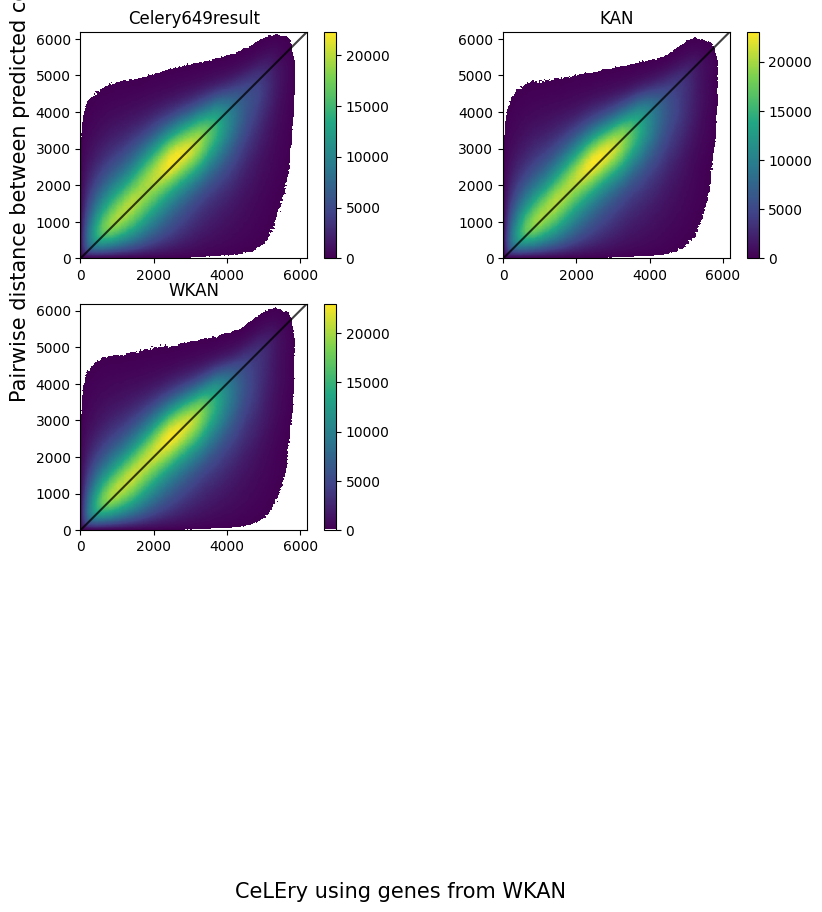

In [44]:
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

max_lim = np.max([np.max(true_dist)])


def using_mpl_scatter_density(ax, x, y, title, label=True):
    density = ax.scatter_density(x, y, cmap=white_viridis)
    plt.title(title)
    if label:
        plt.ylabel("Pairwise distance between predicted coordinates", fontsize=15)
    lims = [0, max_lim]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal', adjustable='box')
    plt.ylim((0, max_lim))
    plt.xlim((0, max_lim))
    fig.colorbar(density)
    
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,2,1,projection='scatter_density')
using_mpl_scatter_density(ax1, true_dist, Celery649result, title="Celery649result")
ax2 = fig.add_subplot(3,2,2,projection='scatter_density')
using_mpl_scatter_density(ax2, true_dist, KAN3_215_649result, title="KAN", label=False)
ax3 = fig.add_subplot(3,2,3,projection='scatter_density')
using_mpl_scatter_density(ax3, true_dist, WKAN3_215_649result, title="WKAN", label=False)
# ax4 = fig.add_subplot(3,2,4,projection='scatter_density')
# using_mpl_scatter_density(ax4, true_dist, WKAN20Celeryresult, title="20", label=False)
# ax5 = fig.add_subplot(3,2,5,projection='scatter_density')
# using_mpl_scatter_density(ax5, true_dist, WKAN10Celeryresult, title="10", label=False)
fig.text(0.5, 0.02, 'CeLEry using genes from WKAN', va='center', ha='center', fontsize=15)

figname = "模型对比CeleryWkanKAN.pdf"
fig.savefig(figname)
# plt.close(fig)
plt.show

In [ ]:
# 第三组

In [25]:
Fit_cord_KAN (data_train = Rdata_scenario2, 
                      model_config = "paper",
                      hidden_dims =  [200, 150, 75, 25, 10], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "WKAN3_21721_649")

100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.39it/s]


Epoch:1, Loss:53.2910


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.09it/s]


Epoch:2, Loss:28.0413


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.54it/s]


Epoch:3, Loss:21.0859


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.83it/s]


Epoch:4, Loss:16.7009


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.10it/s]


Epoch:5, Loss:14.0727


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.51it/s]


Epoch:6, Loss:12.3594


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.52it/s]


Epoch:7, Loss:10.5624


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.74it/s]


Epoch:8, Loss:10.4437


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.91it/s]


Epoch:9, Loss:8.8787


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.36it/s]


Epoch:10, Loss:8.4916


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.41it/s]


Epoch:11, Loss:8.2022


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.49it/s]


Epoch:12, Loss:8.8348


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.77it/s]


Epoch:13, Loss:7.6942


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.94it/s]


Epoch:14, Loss:7.1426


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.16it/s]


Epoch:15, Loss:7.2340


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.97it/s]


Epoch:16, Loss:7.7173


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.98it/s]


Epoch:17, Loss:6.6824


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.37it/s]


Epoch:18, Loss:7.2841


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.03it/s]


Epoch:19, Loss:6.6973


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.49it/s]


Epoch:20, Loss:6.9577


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.86it/s]


Epoch:21, Loss:6.3916


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.39it/s]


Epoch:22, Loss:6.5963


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.11it/s]


Epoch:23, Loss:6.1170


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.41it/s]


Epoch:24, Loss:6.8870


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.91it/s]


Epoch:25, Loss:6.2750


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.11it/s]


Epoch:26, Loss:6.6951


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.96it/s]


Epoch:27, Loss:5.9270


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.04it/s]


Epoch:28, Loss:5.9347


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.63it/s]


Epoch:29, Loss:6.0436


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.70it/s]


Epoch:30, Loss:5.8970


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.55it/s]


Epoch:31, Loss:5.9803


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.32it/s]


Epoch:32, Loss:7.2568


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.20it/s]


Epoch:33, Loss:5.5969


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.30it/s]


Epoch:34, Loss:5.3637


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.69it/s]


Epoch:35, Loss:6.1973
New learning rate:0.0005


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.28it/s]


Epoch:36, Loss:3.9716


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.22it/s]


Epoch:37, Loss:2.4084


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.89it/s]


Epoch:38, Loss:2.3580


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.69it/s]


Epoch:39, Loss:2.5364


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.17it/s]


Epoch:40, Loss:2.6505


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.57it/s]


Epoch:41, Loss:2.3020


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.61it/s]


Epoch:42, Loss:2.2910


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.59it/s]


Epoch:43, Loss:2.4780


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.66it/s]


Epoch:44, Loss:2.4481


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.09it/s]


Epoch:45, Loss:2.3786


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.72it/s]


Epoch:46, Loss:2.4594


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.58it/s]


Epoch:47, Loss:2.7700


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.54it/s]


Epoch:48, Loss:2.6633


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:49, Loss:2.2548


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.47it/s]


Epoch:50, Loss:2.5486


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.59it/s]


Epoch:51, Loss:2.4026


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.15it/s]


Epoch:52, Loss:2.4130


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.78it/s]


Epoch:53, Loss:2.3883


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.85it/s]


Epoch:54, Loss:2.5681


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.51it/s]


Epoch:55, Loss:2.2922


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.35it/s]


Epoch:56, Loss:2.3109
New learning rate:0.00025


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.85it/s]


Epoch:57, Loss:1.6522


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.17it/s]


Epoch:58, Loss:0.9169


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.76it/s]


Epoch:59, Loss:0.9104


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.89it/s]


Epoch:60, Loss:1.0370


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.05it/s]


Epoch:61, Loss:0.9637


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.77it/s]


Epoch:62, Loss:1.0429


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.06it/s]


Epoch:63, Loss:1.0267


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.45it/s]


Epoch:64, Loss:0.9494


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.25it/s]


Epoch:65, Loss:1.0059


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.80it/s]


Epoch:66, Loss:1.0618


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.13it/s]


Epoch:67, Loss:1.0207


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.07it/s]


Epoch:68, Loss:1.0077


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.15it/s]


Epoch:69, Loss:1.0329


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.35it/s]


Epoch:70, Loss:0.9872


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.84it/s]


Epoch:71, Loss:1.0492


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.04it/s]


Epoch:72, Loss:1.0882


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.04it/s]


Epoch:73, Loss:1.0136


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.39it/s]


Epoch:74, Loss:1.0616
New learning rate:0.000125


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.74it/s]


Epoch:75, Loss:0.8010


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.46it/s]


Epoch:76, Loss:0.3972


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.99it/s]


Epoch:77, Loss:0.3825


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.71it/s]


Epoch:78, Loss:0.4679


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.70it/s]


Epoch:79, Loss:0.4424


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.74it/s]


Epoch:80, Loss:0.4452


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.83it/s]


Epoch:81, Loss:0.4513


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.72it/s]


Epoch:82, Loss:0.4621


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.03it/s]


Epoch:83, Loss:0.4483


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.34it/s]


Epoch:84, Loss:0.4579


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.54it/s]


Epoch:85, Loss:0.4423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.43it/s]


Epoch:86, Loss:0.4655


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.14it/s]


Epoch:87, Loss:0.4745


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.31it/s]


Epoch:88, Loss:0.4642


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.17it/s]


Epoch:89, Loss:0.4655


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.91it/s]


Epoch:90, Loss:0.4755


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.71it/s]


Epoch:91, Loss:0.4632


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.21it/s]


Epoch:92, Loss:0.4813
New learning rate:6.25e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.52it/s]


Epoch:93, Loss:0.3729


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.68it/s]


Epoch:94, Loss:0.1832


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.85it/s]


Epoch:95, Loss:0.1765


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:96, Loss:0.2122


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:97, Loss:0.2203


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.40it/s]


Epoch:98, Loss:0.2003


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.91it/s]


Epoch:99, Loss:0.2070


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.42it/s]


Epoch:100, Loss:0.2140


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.73it/s]


Epoch:101, Loss:0.2067


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.14it/s]


Epoch:102, Loss:0.2117


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.50it/s]


Epoch:103, Loss:0.2147


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.29it/s]


Epoch:104, Loss:0.2130


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.27it/s]


Epoch:105, Loss:0.2142


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.94it/s]


Epoch:106, Loss:0.2196


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.79it/s]


Epoch:107, Loss:0.2185


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.56it/s]


Epoch:108, Loss:0.2224


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.98it/s]


Epoch:109, Loss:0.2170


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.78it/s]


Epoch:110, Loss:0.2254
New learning rate:3.125e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.65it/s]


Epoch:111, Loss:0.1802


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.06it/s]


Epoch:112, Loss:0.0936


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.15it/s]


Epoch:113, Loss:0.0934


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.30it/s]


Epoch:114, Loss:0.1084


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.38it/s]


Epoch:115, Loss:0.1066


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.90it/s]


Epoch:116, Loss:0.1047


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.62it/s]


Epoch:117, Loss:0.1057


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.35it/s]


Epoch:118, Loss:0.1042


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.64it/s]


Epoch:119, Loss:0.1074


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.70it/s]


Epoch:120, Loss:0.1076


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.83it/s]


Epoch:121, Loss:0.1051


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.14it/s]


Epoch:122, Loss:0.1041


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.42it/s]


Epoch:123, Loss:0.1080


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.90it/s]


Epoch:124, Loss:0.1106


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.74it/s]


Epoch:125, Loss:0.1095


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.87it/s]


Epoch:126, Loss:0.1039


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.98it/s]


Epoch:127, Loss:0.1062


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.82it/s]


Epoch:128, Loss:0.1101
New learning rate:1.5625e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:129, Loss:0.0928


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.10it/s]


Epoch:130, Loss:0.0583


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.76it/s]


Epoch:131, Loss:0.0588


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.75it/s]


Epoch:132, Loss:0.0644


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.60it/s]


Epoch:133, Loss:0.0631


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.98it/s]


Epoch:134, Loss:0.0621


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.32it/s]


Epoch:135, Loss:0.0621


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.12it/s]


Epoch:136, Loss:0.0622


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.31it/s]


Epoch:137, Loss:0.0619


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.59it/s]


Epoch:138, Loss:0.0620


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:139, Loss:0.0627


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.12it/s]


Epoch:140, Loss:0.0612


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.70it/s]


Epoch:141, Loss:0.0618


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.97it/s]


Epoch:142, Loss:0.0625


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.63it/s]


Epoch:143, Loss:0.0618


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.42it/s]


Epoch:144, Loss:0.0623


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.37it/s]


Epoch:145, Loss:0.0618
New learning rate:7.8125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.74it/s]


Epoch:146, Loss:0.0551


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.86it/s]


Epoch:147, Loss:0.0436


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.60it/s]


Epoch:148, Loss:0.0438


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.62it/s]


Epoch:149, Loss:0.0448


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.34it/s]


Epoch:150, Loss:0.0451


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.25it/s]


Epoch:151, Loss:0.0447


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.19it/s]


Epoch:152, Loss:0.0446


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.77it/s]


Epoch:153, Loss:0.0443


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.52it/s]


Epoch:154, Loss:0.0442


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.14it/s]


Epoch:155, Loss:0.0445


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.67it/s]


Epoch:156, Loss:0.0440


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.41it/s]


Epoch:157, Loss:0.0438


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.50it/s]


Epoch:158, Loss:0.0441


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.35it/s]


Epoch:159, Loss:0.0438


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.21it/s]


Epoch:160, Loss:0.0436


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.89it/s]


Epoch:161, Loss:0.0436


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.97it/s]


Epoch:162, Loss:0.0435


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.45it/s]


Epoch:163, Loss:0.0433


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.00it/s]


Epoch:164, Loss:0.0433
New learning rate:3.90625e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.77it/s]


Epoch:165, Loss:0.0403


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.61it/s]


Epoch:166, Loss:0.0369


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.91it/s]


Epoch:167, Loss:0.0372


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.82it/s]


Epoch:168, Loss:0.0374


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.67it/s]


Epoch:169, Loss:0.0372


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.97it/s]


Epoch:170, Loss:0.0373


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.72it/s]


Epoch:171, Loss:0.0371


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.99it/s]


Epoch:172, Loss:0.0371


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.43it/s]


Epoch:173, Loss:0.0370


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.12it/s]


Epoch:174, Loss:0.0370


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.15it/s]


Epoch:175, Loss:0.0368


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.06it/s]


Epoch:176, Loss:0.0369


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:177, Loss:0.0367


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.55it/s]


Epoch:178, Loss:0.0367


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.99it/s]


Epoch:179, Loss:0.0367


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.33it/s]


Epoch:180, Loss:0.0366


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.43it/s]


Epoch:181, Loss:0.0365


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.39it/s]


Epoch:182, Loss:0.0365


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.01it/s]


Epoch:183, Loss:0.0364


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.55it/s]


Epoch:184, Loss:0.0362


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.25it/s]


Epoch:185, Loss:0.0362


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.69it/s]


Epoch:186, Loss:0.0362


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.67it/s]


Epoch:187, Loss:0.0362


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.15it/s]


Epoch:188, Loss:0.0359


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.77it/s]


Epoch:189, Loss:0.0359


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.77it/s]


Epoch:190, Loss:0.0359


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.28it/s]


Epoch:191, Loss:0.0359


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:192, Loss:0.0358


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.74it/s]


Epoch:193, Loss:0.0357


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.42it/s]


Epoch:194, Loss:0.0355


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.15it/s]


Epoch:195, Loss:0.0354


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.33it/s]


Epoch:196, Loss:0.0354


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.15it/s]


Epoch:197, Loss:0.0354


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.90it/s]


Epoch:198, Loss:0.0353


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.60it/s]


Epoch:199, Loss:0.0354
New learning rate:1.953125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.32it/s]


Epoch:200, Loss:0.0337


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.12it/s]


Epoch:201, Loss:0.0327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.96it/s]


Epoch:202, Loss:0.0328


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.99it/s]


Epoch:203, Loss:0.0329


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.86it/s]


Epoch:204, Loss:0.0329


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.73it/s]


Epoch:205, Loss:0.0329


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.41it/s]


Epoch:206, Loss:0.0328


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.69it/s]


Epoch:207, Loss:0.0328


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.52it/s]


Epoch:208, Loss:0.0328


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.07it/s]


Epoch:209, Loss:0.0328


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.23it/s]


Epoch:210, Loss:0.0327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.36it/s]


Epoch:211, Loss:0.0327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.68it/s]


Epoch:212, Loss:0.0326


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.49it/s]


Epoch:213, Loss:0.0326


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.87it/s]


Epoch:214, Loss:0.0327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.47it/s]


Epoch:215, Loss:0.0326


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:216, Loss:0.0326


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.72it/s]


Epoch:217, Loss:0.0325


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.12it/s]


Epoch:218, Loss:0.0325


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:219, Loss:0.0324


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.54it/s]


Epoch:220, Loss:0.0324


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.40it/s]


Epoch:221, Loss:0.0324


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.07it/s]


Epoch:222, Loss:0.0323


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.51it/s]


Epoch:223, Loss:0.0323


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.56it/s]


Epoch:224, Loss:0.0323


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.98it/s]


Epoch:225, Loss:0.0322


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.38it/s]


Epoch:226, Loss:0.0322


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.11it/s]


Epoch:227, Loss:0.0322


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.26it/s]


Epoch:228, Loss:0.0321


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.19it/s]


Epoch:229, Loss:0.0321


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:230, Loss:0.0319


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.42it/s]


Epoch:231, Loss:0.0320


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.61it/s]


Epoch:232, Loss:0.0319


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.81it/s]


Epoch:233, Loss:0.0319


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.66it/s]


Epoch:234, Loss:0.0318


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.69it/s]


Epoch:235, Loss:0.0319


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.77it/s]


Epoch:236, Loss:0.0318


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.88it/s]


Epoch:237, Loss:0.0317


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.94it/s]


Epoch:238, Loss:0.0317
New learning rate:9.765625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.57it/s]


Epoch:239, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.15it/s]


Epoch:240, Loss:0.0306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.77it/s]


Epoch:241, Loss:0.0306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.06it/s]


Epoch:242, Loss:0.0306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.97it/s]


Epoch:243, Loss:0.0307


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.94it/s]


Epoch:244, Loss:0.0306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.83it/s]


Epoch:245, Loss:0.0306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.27it/s]


Epoch:246, Loss:0.0306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.45it/s]


Epoch:247, Loss:0.0306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.62it/s]


Epoch:248, Loss:0.0306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.91it/s]


Epoch:249, Loss:0.0306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.14it/s]


Epoch:250, Loss:0.0306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.28it/s]


Epoch:251, Loss:0.0306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.45it/s]


Epoch:252, Loss:0.0306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.88it/s]


Epoch:253, Loss:0.0305


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.74it/s]


Epoch:254, Loss:0.0305


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.10it/s]


Epoch:255, Loss:0.0306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.57it/s]


Epoch:256, Loss:0.0305


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.16it/s]


Epoch:257, Loss:0.0305


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.17it/s]


Epoch:258, Loss:0.0305


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.66it/s]


Epoch:259, Loss:0.0304


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.99it/s]


Epoch:260, Loss:0.0305


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.01it/s]


Epoch:261, Loss:0.0305


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.03it/s]


Epoch:262, Loss:0.0304


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.99it/s]


Epoch:263, Loss:0.0304


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.19it/s]


Epoch:264, Loss:0.0304


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.14it/s]


Epoch:265, Loss:0.0304


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.21it/s]


Epoch:266, Loss:0.0303


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.92it/s]


Epoch:267, Loss:0.0303


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.64it/s]


Epoch:268, Loss:0.0303


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.66it/s]


Epoch:269, Loss:0.0303


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.54it/s]


Epoch:270, Loss:0.0303


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.64it/s]


Epoch:271, Loss:0.0302


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.86it/s]


Epoch:272, Loss:0.0302


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:273, Loss:0.0302


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.68it/s]


Epoch:274, Loss:0.0302


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.04it/s]


Epoch:275, Loss:0.0302


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.73it/s]


Epoch:276, Loss:0.0301


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.18it/s]


Epoch:277, Loss:0.0301


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.05it/s]


Epoch:278, Loss:0.0301


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.64it/s]


Epoch:279, Loss:0.0301


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.40it/s]


Epoch:280, Loss:0.0301


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.75it/s]


Epoch:281, Loss:0.0300


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.93it/s]


Epoch:282, Loss:0.0301


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.28it/s]


Epoch:283, Loss:0.0300


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.67it/s]


Epoch:284, Loss:0.0300


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.76it/s]


Epoch:285, Loss:0.0300


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.38it/s]


Epoch:286, Loss:0.0299


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.19it/s]


Epoch:287, Loss:0.0299


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.88it/s]


Epoch:288, Loss:0.0299


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.18it/s]


Epoch:289, Loss:0.0299


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.25it/s]


Epoch:290, Loss:0.0299


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.86it/s]


Epoch:291, Loss:0.0298


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.13it/s]


Epoch:292, Loss:0.0298


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.34it/s]


Epoch:293, Loss:0.0298


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.62it/s]


Epoch:294, Loss:0.0298
New learning rate:4.8828125e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.22it/s]


Epoch:295, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.29it/s]


Epoch:296, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.37it/s]


Epoch:297, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.73it/s]


Epoch:298, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.20it/s]


Epoch:299, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.39it/s]


Epoch:300, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.06it/s]


Epoch:301, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.47it/s]


Epoch:302, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.61it/s]


Epoch:303, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.38it/s]


Epoch:304, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.39it/s]


Epoch:305, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.29it/s]


Epoch:306, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.19it/s]


Epoch:307, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.61it/s]


Epoch:308, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.08it/s]


Epoch:309, Loss:0.0292


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.37it/s]


Epoch:310, Loss:0.0292


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.67it/s]


Epoch:311, Loss:0.0292


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.53it/s]


Epoch:312, Loss:0.0293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.06it/s]


Epoch:313, Loss:0.0292


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.87it/s]


Epoch:314, Loss:0.0292


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.16it/s]


Epoch:315, Loss:0.0292


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.85it/s]


Epoch:316, Loss:0.0292


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.12it/s]


Epoch:317, Loss:0.0292


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.28it/s]


Epoch:318, Loss:0.0292


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.39it/s]


Epoch:319, Loss:0.0292


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.68it/s]


Epoch:320, Loss:0.0292
New learning rate:2.44140625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.77it/s]


Epoch:321, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.05it/s]


Epoch:322, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.46it/s]


Epoch:323, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.26it/s]


Epoch:324, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.21it/s]


Epoch:325, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.61it/s]


Epoch:326, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.50it/s]


Epoch:327, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.55it/s]


Epoch:328, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.63it/s]


Epoch:329, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.84it/s]


Epoch:330, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.24it/s]


Epoch:331, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.80it/s]


Epoch:332, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.02it/s]


Epoch:333, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.44it/s]


Epoch:334, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.26it/s]


Epoch:335, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.45it/s]


Epoch:336, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.01it/s]


Epoch:337, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.17it/s]


Epoch:338, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.47it/s]


Epoch:339, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.66it/s]


Epoch:340, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.53it/s]


Epoch:341, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.37it/s]


Epoch:342, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.25it/s]


Epoch:343, Loss:0.0289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.74it/s]


Epoch:344, Loss:0.0289
New learning rate:1.220703125e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.49it/s]


Epoch:345, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.44it/s]


Epoch:346, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.05it/s]


Epoch:347, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.44it/s]


Epoch:348, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.08it/s]


Epoch:349, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.76it/s]


Epoch:350, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.37it/s]


Epoch:351, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:352, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.19it/s]


Epoch:353, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.91it/s]


Epoch:354, Loss:0.0288


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.83it/s]


Epoch:355, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:356, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.24it/s]


Epoch:357, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.93it/s]


Epoch:358, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.72it/s]


Epoch:359, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.51it/s]


Epoch:360, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.82it/s]


Epoch:361, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.35it/s]


Epoch:362, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.33it/s]


Epoch:363, Loss:0.0288


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.00it/s]


Epoch:364, Loss:0.0287


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.23it/s]

Epoch:365, Loss:0.0287
New learning rate:6.103515625e-08
Folder already exists


WKAN5_cord(
  (fclayer1): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer5): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer6): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): Sigmoid()
  )
)

In [32]:
WKAN3_21721_649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "WKAN3_21721_649" ,#
                     save_dir_left = "output/KAN_MERFISH/WKAN3_21721_649_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/WKAN3_21721_649_649_right_celery.npy")

Data has already been z-scored
Data has already been z-scored


100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2515.87it/s]


PearsonRResult(statistic=0.6211412477563028, pvalue=0.0)
1020.8446637138379
1215.043898269037


In [26]:
Fit_cord_KAN (data_train = Rdata_scenario2, 
                      model_config = "original",
                      hidden_dims =  [200, 150, 75, 25, 10], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "KAN3_21721_649")

100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.01it/s]


Epoch:1, Loss:61.0433


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.28it/s]


Epoch:2, Loss:32.7694


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.25it/s]


Epoch:3, Loss:24.1355


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:4, Loss:18.7231


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.97it/s]


Epoch:5, Loss:15.4397


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.83it/s]


Epoch:6, Loss:13.1572


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.50it/s]


Epoch:7, Loss:11.8973


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.31it/s]


Epoch:8, Loss:10.5366


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.76it/s]


Epoch:9, Loss:9.9735


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.83it/s]


Epoch:10, Loss:8.9451


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.08it/s]


Epoch:11, Loss:9.0254


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.54it/s]


Epoch:12, Loss:8.6137


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.20it/s]


Epoch:13, Loss:8.4450


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.01it/s]


Epoch:14, Loss:7.7862


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.76it/s]


Epoch:15, Loss:7.6737


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.07it/s]


Epoch:16, Loss:8.0002


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.18it/s]


Epoch:17, Loss:6.5327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.16it/s]


Epoch:18, Loss:7.0358


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.52it/s]


Epoch:19, Loss:7.4590


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.25it/s]


Epoch:20, Loss:6.9307


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.63it/s]


Epoch:21, Loss:6.6474


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.31it/s]


Epoch:22, Loss:6.1391


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.74it/s]


Epoch:23, Loss:7.0849


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.00it/s]


Epoch:24, Loss:6.6689


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.08it/s]


Epoch:25, Loss:6.5681


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.05it/s]


Epoch:26, Loss:5.6451


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.57it/s]


Epoch:27, Loss:6.5958


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.69it/s]


Epoch:28, Loss:6.6889


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.25it/s]


Epoch:29, Loss:6.0216


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.71it/s]


Epoch:30, Loss:6.0779


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:31, Loss:6.3042


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.08it/s]


Epoch:32, Loss:6.2514
New learning rate:0.0005


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.92it/s]


Epoch:33, Loss:3.9989


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.36it/s]


Epoch:34, Loss:2.6092


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.93it/s]


Epoch:35, Loss:2.4986


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.31it/s]


Epoch:36, Loss:2.5464


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.27it/s]


Epoch:37, Loss:2.6786


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.19it/s]


Epoch:38, Loss:2.7269


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.05it/s]


Epoch:39, Loss:2.5154


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.10it/s]


Epoch:40, Loss:2.7350


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.61it/s]


Epoch:41, Loss:2.5426


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.62it/s]


Epoch:42, Loss:2.5752


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.09it/s]


Epoch:43, Loss:2.8777


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.28it/s]


Epoch:44, Loss:2.5800


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.89it/s]


Epoch:45, Loss:2.4447


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.93it/s]


Epoch:46, Loss:2.5846


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.01it/s]


Epoch:47, Loss:2.6778


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.90it/s]


Epoch:48, Loss:2.3900


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.47it/s]


Epoch:49, Loss:2.4725


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.43it/s]


Epoch:50, Loss:2.8465


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.24it/s]


Epoch:51, Loss:3.0112


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.79it/s]


Epoch:52, Loss:2.8077
New learning rate:0.00025


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.28it/s]


Epoch:53, Loss:1.9315


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.66it/s]


Epoch:54, Loss:1.1538


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.41it/s]


Epoch:55, Loss:1.1205


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.45it/s]


Epoch:56, Loss:1.2230


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:57, Loss:1.1739


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.98it/s]


Epoch:58, Loss:1.0706


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.43it/s]


Epoch:59, Loss:1.1258


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.41it/s]


Epoch:60, Loss:1.1665


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.18it/s]


Epoch:61, Loss:1.0729


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:62, Loss:1.1053


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.59it/s]


Epoch:63, Loss:1.1595


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.45it/s]


Epoch:64, Loss:1.1418


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.37it/s]


Epoch:65, Loss:1.2218


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.06it/s]


Epoch:66, Loss:1.1244


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.27it/s]


Epoch:67, Loss:1.0999


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.56it/s]


Epoch:68, Loss:1.1163


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.67it/s]


Epoch:69, Loss:1.1807


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.97it/s]


Epoch:70, Loss:1.1548


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.77it/s]


Epoch:71, Loss:1.1710
New learning rate:0.000125


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.96it/s]


Epoch:72, Loss:0.9572


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.09it/s]


Epoch:73, Loss:0.4903


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.43it/s]


Epoch:74, Loss:0.4755


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.23it/s]


Epoch:75, Loss:0.5352


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.22it/s]


Epoch:76, Loss:0.5280


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.90it/s]


Epoch:77, Loss:0.5096


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.88it/s]


Epoch:78, Loss:0.5292


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.00it/s]


Epoch:79, Loss:0.5356


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.18it/s]


Epoch:80, Loss:0.5071


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.73it/s]


Epoch:81, Loss:0.5338


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.93it/s]


Epoch:82, Loss:0.5423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.78it/s]


Epoch:83, Loss:0.5359


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.82it/s]


Epoch:84, Loss:0.5197


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.49it/s]


Epoch:85, Loss:0.5368


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.23it/s]


Epoch:86, Loss:0.5427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.87it/s]


Epoch:87, Loss:0.5474


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.23it/s]


Epoch:88, Loss:0.5372


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.67it/s]


Epoch:89, Loss:0.5438
New learning rate:6.25e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.25it/s]


Epoch:90, Loss:0.4440


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.15it/s]


Epoch:91, Loss:0.2398


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.80it/s]


Epoch:92, Loss:0.2360


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.87it/s]


Epoch:93, Loss:0.2665


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.95it/s]


Epoch:94, Loss:0.2751


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.32it/s]


Epoch:95, Loss:0.2525


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.56it/s]


Epoch:96, Loss:0.2577


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.06it/s]


Epoch:97, Loss:0.2673


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.92it/s]


Epoch:98, Loss:0.2637


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.61it/s]


Epoch:99, Loss:0.2627


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.55it/s]


Epoch:100, Loss:0.2599


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.35it/s]


Epoch:101, Loss:0.2669


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.78it/s]


Epoch:102, Loss:0.2696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.93it/s]


Epoch:103, Loss:0.2758


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.29it/s]


Epoch:104, Loss:0.2692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.79it/s]


Epoch:105, Loss:0.2703


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.05it/s]


Epoch:106, Loss:0.2676


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.08it/s]


Epoch:107, Loss:0.2698
New learning rate:3.125e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.24it/s]


Epoch:108, Loss:0.2334


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.34it/s]


Epoch:109, Loss:0.1415


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.18it/s]


Epoch:110, Loss:0.1420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.63it/s]


Epoch:111, Loss:0.1552


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.85it/s]


Epoch:112, Loss:0.1562


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.79it/s]


Epoch:113, Loss:0.1509


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.70it/s]


Epoch:114, Loss:0.1513


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.75it/s]


Epoch:115, Loss:0.1509


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.18it/s]


Epoch:116, Loss:0.1555


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.75it/s]


Epoch:117, Loss:0.1525


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.96it/s]


Epoch:118, Loss:0.1529


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.77it/s]


Epoch:119, Loss:0.1529


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.04it/s]


Epoch:120, Loss:0.1540


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.74it/s]


Epoch:121, Loss:0.1511


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.80it/s]


Epoch:122, Loss:0.1525


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.57it/s]


Epoch:123, Loss:0.1539


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.96it/s]


Epoch:124, Loss:0.1534
New learning rate:1.5625e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.90it/s]


Epoch:125, Loss:0.1366


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.51it/s]


Epoch:126, Loss:0.1034


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.63it/s]


Epoch:127, Loss:0.1043


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.66it/s]


Epoch:128, Loss:0.1084


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.43it/s]


Epoch:129, Loss:0.1071


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.04it/s]


Epoch:130, Loss:0.1069


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.11it/s]


Epoch:131, Loss:0.1060


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.56it/s]


Epoch:132, Loss:0.1074


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.20it/s]


Epoch:133, Loss:0.1059


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:134, Loss:0.1065


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.60it/s]


Epoch:135, Loss:0.1055


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:136, Loss:0.1056


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.79it/s]


Epoch:137, Loss:0.1054


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:138, Loss:0.1062


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.72it/s]


Epoch:139, Loss:0.1056


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.02it/s]


Epoch:140, Loss:0.1054


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.41it/s]


Epoch:141, Loss:0.1059
New learning rate:7.8125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.76it/s]


Epoch:142, Loss:0.0979


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.08it/s]


Epoch:143, Loss:0.0864


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.62it/s]


Epoch:144, Loss:0.0869


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.44it/s]


Epoch:145, Loss:0.0881


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.44it/s]


Epoch:146, Loss:0.0881


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.87it/s]


Epoch:147, Loss:0.0876


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.89it/s]


Epoch:148, Loss:0.0872


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.27it/s]


Epoch:149, Loss:0.0873


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:150, Loss:0.0871


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.34it/s]


Epoch:151, Loss:0.0869


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.11it/s]


Epoch:152, Loss:0.0871


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.57it/s]


Epoch:153, Loss:0.0866


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.14it/s]


Epoch:154, Loss:0.1090


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.71it/s]


Epoch:155, Loss:0.0866


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.52it/s]


Epoch:156, Loss:0.0862


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.63it/s]


Epoch:157, Loss:0.0864


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.18it/s]


Epoch:158, Loss:0.0857


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.00it/s]


Epoch:159, Loss:0.0861


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:160, Loss:0.0858
New learning rate:3.90625e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.13it/s]


Epoch:161, Loss:0.0823


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:162, Loss:0.0789


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.11it/s]


Epoch:163, Loss:0.0791


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.62it/s]


Epoch:164, Loss:0.0793


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.69it/s]


Epoch:165, Loss:0.0794


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.34it/s]


Epoch:166, Loss:0.0791


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.17it/s]


Epoch:167, Loss:0.0789


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.49it/s]


Epoch:168, Loss:0.0789


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.13it/s]


Epoch:169, Loss:0.0788


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.88it/s]


Epoch:170, Loss:0.0789


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.67it/s]


Epoch:171, Loss:0.0785


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.43it/s]


Epoch:172, Loss:0.0786


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.13it/s]


Epoch:173, Loss:0.0784


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.82it/s]


Epoch:174, Loss:0.0784


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.09it/s]


Epoch:175, Loss:0.0782


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.95it/s]


Epoch:176, Loss:0.0782


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.21it/s]


Epoch:177, Loss:0.0780


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.62it/s]


Epoch:178, Loss:0.0781


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.59it/s]


Epoch:179, Loss:0.0778


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.04it/s]


Epoch:180, Loss:0.0777


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.57it/s]


Epoch:181, Loss:0.0776


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.39it/s]


Epoch:182, Loss:0.0774


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.02it/s]


Epoch:183, Loss:0.0774


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.41it/s]


Epoch:184, Loss:0.0773


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.07it/s]


Epoch:185, Loss:0.0772


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.51it/s]


Epoch:186, Loss:0.0771


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.75it/s]


Epoch:187, Loss:0.0770


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.30it/s]


Epoch:188, Loss:0.0770


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.78it/s]


Epoch:189, Loss:0.0768


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.22it/s]


Epoch:190, Loss:0.0766


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.14it/s]


Epoch:191, Loss:0.0767


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.29it/s]


Epoch:192, Loss:0.0766


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.79it/s]


Epoch:193, Loss:0.0764


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.85it/s]


Epoch:194, Loss:0.0765


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.70it/s]


Epoch:195, Loss:0.0761


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.00it/s]


Epoch:196, Loss:0.0762


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.96it/s]


Epoch:197, Loss:0.0761
New learning rate:1.953125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.49it/s]


Epoch:198, Loss:0.0755


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.42it/s]


Epoch:199, Loss:0.0733


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.89it/s]


Epoch:200, Loss:0.0743


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.69it/s]


Epoch:201, Loss:0.0735


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.33it/s]


Epoch:202, Loss:0.0735


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.81it/s]


Epoch:203, Loss:0.0734


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.09it/s]


Epoch:204, Loss:0.0733


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.23it/s]


Epoch:205, Loss:0.0734


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:206, Loss:0.0733


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.67it/s]


Epoch:207, Loss:0.0744


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.46it/s]


Epoch:208, Loss:0.0733


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.75it/s]


Epoch:209, Loss:0.0732


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.57it/s]


Epoch:210, Loss:0.0731


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.08it/s]


Epoch:211, Loss:0.0732


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.58it/s]


Epoch:212, Loss:0.0730


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.15it/s]


Epoch:213, Loss:0.0731


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.09it/s]


Epoch:214, Loss:0.0730


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.68it/s]


Epoch:215, Loss:0.0730


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.38it/s]


Epoch:216, Loss:0.0729


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.37it/s]


Epoch:217, Loss:0.0729


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.65it/s]


Epoch:218, Loss:0.0728


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.76it/s]


Epoch:219, Loss:0.0728


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.40it/s]


Epoch:220, Loss:0.0727


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.82it/s]


Epoch:221, Loss:0.0727


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.01it/s]


Epoch:222, Loss:0.0726


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.40it/s]


Epoch:223, Loss:0.0726


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.12it/s]


Epoch:224, Loss:0.0725


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.13it/s]


Epoch:225, Loss:0.0726


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.55it/s]


Epoch:226, Loss:0.0725


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.25it/s]


Epoch:227, Loss:0.0724


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.68it/s]


Epoch:228, Loss:0.0724


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.21it/s]


Epoch:229, Loss:0.0723


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.36it/s]


Epoch:230, Loss:0.0723


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.37it/s]


Epoch:231, Loss:0.0723


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.16it/s]


Epoch:232, Loss:0.0721


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.34it/s]


Epoch:233, Loss:0.0721
New learning rate:9.765625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.87it/s]


Epoch:234, Loss:0.0713


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.39it/s]


Epoch:235, Loss:0.0710


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.63it/s]


Epoch:236, Loss:0.0711


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.84it/s]


Epoch:237, Loss:0.0710


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.63it/s]


Epoch:238, Loss:0.0710


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.94it/s]


Epoch:239, Loss:0.0710


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.72it/s]


Epoch:240, Loss:0.0710


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.61it/s]


Epoch:241, Loss:0.0710


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.48it/s]


Epoch:242, Loss:0.0710


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.44it/s]


Epoch:243, Loss:0.0710


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.22it/s]


Epoch:244, Loss:0.0710


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.91it/s]


Epoch:245, Loss:0.0709


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.77it/s]


Epoch:246, Loss:0.0710


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.85it/s]


Epoch:247, Loss:0.0709


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.02it/s]


Epoch:248, Loss:0.0709


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.18it/s]


Epoch:249, Loss:0.0708


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.31it/s]


Epoch:250, Loss:0.0708


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.05it/s]


Epoch:251, Loss:0.0708


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.26it/s]


Epoch:252, Loss:0.0708


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.22it/s]


Epoch:253, Loss:0.0708


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.01it/s]


Epoch:254, Loss:0.0707


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.99it/s]


Epoch:255, Loss:0.0707


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.69it/s]


Epoch:256, Loss:0.0707


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.99it/s]


Epoch:257, Loss:0.0707


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.74it/s]


Epoch:258, Loss:0.0707


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.49it/s]


Epoch:259, Loss:0.0706


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.90it/s]


Epoch:260, Loss:0.0706


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.56it/s]


Epoch:261, Loss:0.0706


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.91it/s]


Epoch:262, Loss:0.0706


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.78it/s]


Epoch:263, Loss:0.0706


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.01it/s]


Epoch:264, Loss:0.0705


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.30it/s]


Epoch:265, Loss:0.0705


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.78it/s]


Epoch:266, Loss:0.0705


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.15it/s]


Epoch:267, Loss:0.0705


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.10it/s]


Epoch:268, Loss:0.0704


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.02it/s]


Epoch:269, Loss:0.0704


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.64it/s]


Epoch:270, Loss:0.0705


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.46it/s]


Epoch:271, Loss:0.0704


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.61it/s]


Epoch:272, Loss:0.0704


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:273, Loss:0.0703


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.42it/s]


Epoch:274, Loss:0.0703
New learning rate:4.8828125e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.03it/s]


Epoch:275, Loss:0.0698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.56it/s]


Epoch:276, Loss:0.0698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.16it/s]


Epoch:277, Loss:0.0698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.12it/s]


Epoch:278, Loss:0.0698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.77it/s]


Epoch:279, Loss:0.0698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.52it/s]


Epoch:280, Loss:0.0698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.61it/s]


Epoch:281, Loss:0.0698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.05it/s]


Epoch:282, Loss:0.0698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.28it/s]


Epoch:283, Loss:0.0698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.23it/s]


Epoch:284, Loss:0.0698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.38it/s]


Epoch:285, Loss:0.0698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.25it/s]


Epoch:286, Loss:0.0698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.10it/s]


Epoch:287, Loss:0.0698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.55it/s]


Epoch:288, Loss:0.0697


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.64it/s]


Epoch:289, Loss:0.0697


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.77it/s]


Epoch:290, Loss:0.0697


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.84it/s]


Epoch:291, Loss:0.0697


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.64it/s]


Epoch:292, Loss:0.0698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.87it/s]


Epoch:293, Loss:0.0697


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.70it/s]


Epoch:294, Loss:0.0697


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.24it/s]


Epoch:295, Loss:0.0697


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.48it/s]


Epoch:296, Loss:0.0697


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.34it/s]


Epoch:297, Loss:0.0697


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.17it/s]


Epoch:298, Loss:0.0697


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.16it/s]


Epoch:299, Loss:0.0696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.05it/s]


Epoch:300, Loss:0.0696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:301, Loss:0.0696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.16it/s]


Epoch:302, Loss:0.0696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.98it/s]


Epoch:303, Loss:0.0696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.10it/s]


Epoch:304, Loss:0.0696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.34it/s]


Epoch:305, Loss:0.0696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.99it/s]


Epoch:306, Loss:0.0696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.25it/s]


Epoch:307, Loss:0.0696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.12it/s]


Epoch:308, Loss:0.0696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.45it/s]


Epoch:309, Loss:0.0696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.76it/s]


Epoch:310, Loss:0.0695


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.48it/s]


Epoch:311, Loss:0.0695


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.55it/s]


Epoch:312, Loss:0.0696
New learning rate:2.44140625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.33it/s]


Epoch:313, Loss:0.0693


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.98it/s]


Epoch:314, Loss:0.0693


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:315, Loss:0.0693


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:316, Loss:0.0693


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.23it/s]


Epoch:317, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.85it/s]


Epoch:318, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.73it/s]


Epoch:319, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.98it/s]


Epoch:320, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.49it/s]


Epoch:321, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.41it/s]


Epoch:322, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.85it/s]


Epoch:323, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.05it/s]


Epoch:324, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.30it/s]


Epoch:325, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.96it/s]


Epoch:326, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.60it/s]


Epoch:327, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.68it/s]


Epoch:328, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.40it/s]


Epoch:329, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.68it/s]


Epoch:330, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.77it/s]


Epoch:331, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.91it/s]


Epoch:332, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.06it/s]


Epoch:333, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.36it/s]


Epoch:334, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.60it/s]


Epoch:335, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.66it/s]


Epoch:336, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.52it/s]


Epoch:337, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.86it/s]


Epoch:338, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.50it/s]


Epoch:339, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.95it/s]


Epoch:340, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.98it/s]


Epoch:341, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.49it/s]


Epoch:342, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.94it/s]


Epoch:343, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.20it/s]


Epoch:344, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.44it/s]


Epoch:345, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.99it/s]


Epoch:346, Loss:0.0692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.87it/s]


Epoch:347, Loss:0.0691


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.12it/s]


Epoch:348, Loss:0.0691
New learning rate:1.220703125e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.41it/s]


Epoch:349, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.01it/s]


Epoch:350, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.34it/s]


Epoch:351, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.44it/s]


Epoch:352, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.93it/s]


Epoch:353, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.93it/s]


Epoch:354, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.50it/s]


Epoch:355, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.61it/s]


Epoch:356, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.92it/s]


Epoch:357, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.23it/s]


Epoch:358, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.58it/s]


Epoch:359, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.13it/s]


Epoch:360, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.54it/s]


Epoch:361, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.29it/s]


Epoch:362, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.11it/s]


Epoch:363, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.88it/s]


Epoch:364, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.05it/s]


Epoch:365, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.60it/s]


Epoch:366, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.92it/s]


Epoch:367, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.63it/s]


Epoch:368, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.23it/s]


Epoch:369, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.05it/s]


Epoch:370, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.26it/s]


Epoch:371, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.75it/s]


Epoch:372, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.34it/s]


Epoch:373, Loss:0.0691


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.25it/s]


Epoch:374, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.12it/s]


Epoch:375, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.35it/s]


Epoch:376, Loss:0.0689


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.61it/s]


Epoch:377, Loss:0.0689


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.88it/s]


Epoch:378, Loss:0.0689


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.91it/s]


Epoch:379, Loss:0.0689


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.41it/s]


Epoch:380, Loss:0.0689


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.07it/s]


Epoch:381, Loss:0.0690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.43it/s]


Epoch:382, Loss:0.0689


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.13it/s]


Epoch:383, Loss:0.0689


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.11it/s]


Epoch:384, Loss:0.0689


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.56it/s]

Epoch:385, Loss:0.0689
New learning rate:6.103515625e-08
Folder already exists


WKAN5_cord(
  (fclayer1): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer5): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer6): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): Sigmoid()
  )
)

In [33]:
KAN3_21721_649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "KAN3_21721_649" ,#
                     save_dir_left = "output/KAN_MERFISH/KAN3_21721_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/KAN3_21721_649_right_celery.npy")

Data has already been z-scored
Data has already been z-scored


100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2560.84it/s]


PearsonRResult(statistic=0.6148908400762169, pvalue=0.0)
998.3766071012568
1195.8265979242472


In [ ]:
# 第零次 试试做WKAN 和KAN对比

In [17]:
Fit_cord_KAN (data_train = Rdata_scenario2, 
                      model_config = "paper",
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "WKAN5_649")

100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.58it/s]


Epoch:1, Loss:56.1517


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.50it/s]


Epoch:2, Loss:29.3972


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.85it/s]


Epoch:3, Loss:21.7497


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 76.91it/s]


Epoch:4, Loss:17.9707


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.45it/s]


Epoch:5, Loss:14.7828


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 77.64it/s]


Epoch:6, Loss:13.2177


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 80.59it/s]


Epoch:7, Loss:12.2612


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.52it/s]


Epoch:8, Loss:10.5975


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.84it/s]


Epoch:9, Loss:10.3804


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.54it/s]


Epoch:10, Loss:9.8053


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.17it/s]


Epoch:11, Loss:9.5013


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.16it/s]


Epoch:12, Loss:9.0715


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.32it/s]


Epoch:13, Loss:8.5678


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.51it/s]


Epoch:14, Loss:8.1847


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.67it/s]


Epoch:15, Loss:7.9111


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.21it/s]


Epoch:16, Loss:8.6730


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.68it/s]


Epoch:17, Loss:7.3969


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.96it/s]


Epoch:18, Loss:6.9933


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.62it/s]


Epoch:19, Loss:7.1815


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.30it/s]


Epoch:20, Loss:7.6999


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.84it/s]


Epoch:21, Loss:8.1102


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.59it/s]


Epoch:22, Loss:7.3779


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.52it/s]


Epoch:23, Loss:6.7548


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.08it/s]


Epoch:24, Loss:7.1986


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.50it/s]


Epoch:25, Loss:7.6227


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.51it/s]


Epoch:26, Loss:6.3700


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.66it/s]


Epoch:27, Loss:7.0481


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.22it/s]


Epoch:28, Loss:6.7727


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.99it/s]


Epoch:29, Loss:6.1589


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.34it/s]


Epoch:30, Loss:6.5361


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.70it/s]


Epoch:31, Loss:6.4966


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.74it/s]


Epoch:32, Loss:6.4164


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.07it/s]


Epoch:33, Loss:7.1783


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 84.24it/s]


Epoch:34, Loss:6.4583


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 80.98it/s]


Epoch:35, Loss:6.7425
New learning rate:0.0005


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:29<00:00, 75.44it/s]


Epoch:36, Loss:3.9638


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 77.46it/s]


Epoch:37, Loss:2.6434


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 78.62it/s]


Epoch:38, Loss:2.5307


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.54it/s]


Epoch:39, Loss:2.7114


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.93it/s]


Epoch:40, Loss:2.6763


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.66it/s]


Epoch:41, Loss:2.5730


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.14it/s]


Epoch:42, Loss:2.8430


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.21it/s]


Epoch:43, Loss:2.7010


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.16it/s]


Epoch:44, Loss:2.3379


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.54it/s]


Epoch:45, Loss:2.5003


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.49it/s]


Epoch:46, Loss:2.6797


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.14it/s]


Epoch:47, Loss:2.6277


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.13it/s]


Epoch:48, Loss:2.7238


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.29it/s]


Epoch:49, Loss:2.3978


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.86it/s]


Epoch:50, Loss:2.6917


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.82it/s]


Epoch:51, Loss:2.7474


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.02it/s]


Epoch:52, Loss:2.5365


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.54it/s]


Epoch:53, Loss:2.5938


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.86it/s]


Epoch:54, Loss:2.5093
New learning rate:0.00025


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.75it/s]


Epoch:55, Loss:1.6734


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.71it/s]


Epoch:56, Loss:1.0663


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.98it/s]


Epoch:57, Loss:1.0187


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.35it/s]


Epoch:58, Loss:1.1311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.96it/s]


Epoch:59, Loss:1.1376


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.82it/s]


Epoch:60, Loss:1.0795


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.49it/s]


Epoch:61, Loss:1.0847


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.15it/s]


Epoch:62, Loss:1.0926


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.94it/s]


Epoch:63, Loss:1.0953


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.41it/s]


Epoch:64, Loss:1.0969


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.99it/s]


Epoch:65, Loss:1.1526


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.98it/s]


Epoch:66, Loss:1.1659


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.29it/s]


Epoch:67, Loss:1.0547


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.27it/s]


Epoch:68, Loss:1.1064


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.79it/s]


Epoch:69, Loss:1.1569


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.71it/s]


Epoch:70, Loss:1.1738


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.49it/s]


Epoch:71, Loss:1.1073


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.70it/s]


Epoch:72, Loss:1.0732
New learning rate:0.000125


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.29it/s]


Epoch:73, Loss:0.8801


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.37it/s]


Epoch:74, Loss:0.4473


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.59it/s]


Epoch:75, Loss:0.4356


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.65it/s]


Epoch:76, Loss:0.5170


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.45it/s]


Epoch:77, Loss:0.5064


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.09it/s]


Epoch:78, Loss:0.4692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.92it/s]


Epoch:79, Loss:0.4921


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.82it/s]


Epoch:80, Loss:0.5135


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.97it/s]


Epoch:81, Loss:0.4877


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.04it/s]


Epoch:82, Loss:0.5055


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.61it/s]


Epoch:83, Loss:0.5053


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.25it/s]


Epoch:84, Loss:0.5012


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.13it/s]


Epoch:85, Loss:0.4975


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.49it/s]


Epoch:86, Loss:0.5154


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.18it/s]


Epoch:87, Loss:0.5128


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.92it/s]


Epoch:88, Loss:0.5278


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.65it/s]


Epoch:89, Loss:0.5062


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.97it/s]


Epoch:90, Loss:0.5265
New learning rate:6.25e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.41it/s]


Epoch:91, Loss:0.4208


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.96it/s]


Epoch:92, Loss:0.2200


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.06it/s]


Epoch:93, Loss:0.2194


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.18it/s]


Epoch:94, Loss:0.2511


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.79it/s]


Epoch:95, Loss:0.2472


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.64it/s]


Epoch:96, Loss:0.2356


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.83it/s]


Epoch:97, Loss:0.2427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.82it/s]


Epoch:98, Loss:0.2434


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.79it/s]


Epoch:99, Loss:0.2380


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.63it/s]


Epoch:100, Loss:0.2475


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.36it/s]


Epoch:101, Loss:0.2465


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.61it/s]


Epoch:102, Loss:0.2431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.60it/s]


Epoch:103, Loss:0.2486


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.41it/s]


Epoch:104, Loss:0.2517


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.87it/s]


Epoch:105, Loss:0.2450


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.22it/s]


Epoch:106, Loss:0.2493


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.79it/s]


Epoch:107, Loss:0.2500


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.34it/s]


Epoch:108, Loss:0.2483
New learning rate:3.125e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.13it/s]


Epoch:109, Loss:0.2112


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.19it/s]


Epoch:110, Loss:0.1244


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:29<00:00, 75.01it/s]


Epoch:111, Loss:0.1246


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.49it/s]


Epoch:112, Loss:0.1355


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.65it/s]


Epoch:113, Loss:0.1360


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.32it/s]


Epoch:114, Loss:0.1293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.50it/s]


Epoch:115, Loss:0.1305


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.04it/s]


Epoch:116, Loss:0.1319


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.95it/s]


Epoch:117, Loss:0.1307


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.98it/s]


Epoch:118, Loss:0.1291


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.19it/s]


Epoch:119, Loss:0.1309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.25it/s]


Epoch:120, Loss:0.1297


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.74it/s]


Epoch:121, Loss:0.1309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.17it/s]


Epoch:122, Loss:0.1313


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.90it/s]


Epoch:123, Loss:0.1300


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.80it/s]


Epoch:124, Loss:0.1310


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.03it/s]


Epoch:125, Loss:0.1318
New learning rate:1.5625e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.04it/s]


Epoch:126, Loss:0.1132


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.79it/s]


Epoch:127, Loss:0.0820


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.31it/s]


Epoch:128, Loss:0.0824


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.74it/s]


Epoch:129, Loss:0.0866


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.30it/s]


Epoch:130, Loss:0.0872


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.07it/s]


Epoch:131, Loss:0.0842


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.60it/s]


Epoch:132, Loss:0.0848


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.85it/s]


Epoch:133, Loss:0.0845


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.24it/s]


Epoch:134, Loss:0.0847


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.00it/s]


Epoch:135, Loss:0.0845


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.43it/s]


Epoch:136, Loss:0.0846


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.40it/s]


Epoch:137, Loss:0.0847


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.28it/s]


Epoch:138, Loss:0.0841


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.16it/s]


Epoch:139, Loss:0.0831


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.82it/s]


Epoch:140, Loss:0.0838


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.27it/s]


Epoch:141, Loss:0.0829


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.90it/s]


Epoch:142, Loss:0.0832
New learning rate:7.8125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.87it/s]


Epoch:143, Loss:0.0766


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.78it/s]


Epoch:144, Loss:0.0653


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.17it/s]


Epoch:145, Loss:0.0658


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.71it/s]


Epoch:146, Loss:0.0668


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.19it/s]


Epoch:147, Loss:0.0663


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.83it/s]


Epoch:148, Loss:0.0660


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.57it/s]


Epoch:149, Loss:0.0660


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.34it/s]


Epoch:150, Loss:0.0658


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.18it/s]


Epoch:151, Loss:0.0657


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.55it/s]


Epoch:152, Loss:0.0652


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.59it/s]


Epoch:153, Loss:0.0651


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.45it/s]


Epoch:154, Loss:0.0652


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.21it/s]


Epoch:155, Loss:0.0649


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.29it/s]


Epoch:156, Loss:0.0647


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.23it/s]


Epoch:157, Loss:0.0644


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.51it/s]


Epoch:158, Loss:0.0643


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.02it/s]


Epoch:159, Loss:0.0640


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.24it/s]


Epoch:160, Loss:0.0637


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.59it/s]


Epoch:161, Loss:0.0637


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.53it/s]


Epoch:162, Loss:0.0636


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.66it/s]


Epoch:163, Loss:0.0636


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.07it/s]


Epoch:164, Loss:0.0629


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.10it/s]


Epoch:165, Loss:0.0634


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.36it/s]


Epoch:166, Loss:0.0629


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.16it/s]


Epoch:167, Loss:0.0620


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.04it/s]


Epoch:168, Loss:0.0627


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.13it/s]


Epoch:169, Loss:0.0625


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.69it/s]


Epoch:170, Loss:0.0623


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.89it/s]


Epoch:171, Loss:0.0622


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.18it/s]


Epoch:172, Loss:0.0617


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.86it/s]


Epoch:173, Loss:0.0616


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.98it/s]


Epoch:174, Loss:0.0612


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.60it/s]


Epoch:175, Loss:0.0616
New learning rate:3.90625e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.68it/s]


Epoch:176, Loss:0.0576


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.31it/s]


Epoch:177, Loss:0.0543


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.17it/s]


Epoch:178, Loss:0.0547


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.12it/s]


Epoch:179, Loss:0.0547


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.16it/s]


Epoch:180, Loss:0.0549


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.48it/s]


Epoch:181, Loss:0.0546


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.95it/s]


Epoch:182, Loss:0.0545


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.84it/s]


Epoch:183, Loss:0.0544


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.67it/s]


Epoch:184, Loss:0.0543


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 79.72it/s]


Epoch:185, Loss:0.0543


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 79.80it/s]


Epoch:186, Loss:0.0542


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.50it/s]


Epoch:187, Loss:0.0540


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.31it/s]


Epoch:188, Loss:0.0540


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.52it/s]


Epoch:189, Loss:0.0539


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.33it/s]


Epoch:190, Loss:0.0537


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.68it/s]


Epoch:191, Loss:0.0536


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.85it/s]


Epoch:192, Loss:0.0535


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.07it/s]


Epoch:193, Loss:0.0534


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.00it/s]


Epoch:194, Loss:0.0534


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.25it/s]


Epoch:195, Loss:0.0530


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.91it/s]


Epoch:196, Loss:0.0533


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.84it/s]


Epoch:197, Loss:0.0531


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.97it/s]


Epoch:198, Loss:0.0531


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.89it/s]


Epoch:199, Loss:0.0528


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.98it/s]


Epoch:200, Loss:0.0526


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.91it/s]


Epoch:201, Loss:0.0527


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.92it/s]


Epoch:202, Loss:0.0527


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.22it/s]


Epoch:203, Loss:0.0524


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.94it/s]


Epoch:204, Loss:0.0521


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.86it/s]


Epoch:205, Loss:0.0523


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.37it/s]


Epoch:206, Loss:0.0521


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.74it/s]


Epoch:207, Loss:0.0520


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.15it/s]


Epoch:208, Loss:0.0518


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.80it/s]


Epoch:209, Loss:0.0520


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.87it/s]


Epoch:210, Loss:0.0516


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.41it/s]


Epoch:211, Loss:0.0517
New learning rate:1.953125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.84it/s]


Epoch:212, Loss:0.0499


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.50it/s]


Epoch:213, Loss:0.0489


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.58it/s]


Epoch:214, Loss:0.0490


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.88it/s]


Epoch:215, Loss:0.0490


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.66it/s]


Epoch:216, Loss:0.0490


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.08it/s]


Epoch:217, Loss:0.0489


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.37it/s]


Epoch:218, Loss:0.0489


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.74it/s]


Epoch:219, Loss:0.0489


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.05it/s]


Epoch:220, Loss:0.0488


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.00it/s]


Epoch:221, Loss:0.0488


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.81it/s]


Epoch:222, Loss:0.0488


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.22it/s]


Epoch:223, Loss:0.0487


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.70it/s]


Epoch:224, Loss:0.0486


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.03it/s]


Epoch:225, Loss:0.0486


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.76it/s]


Epoch:226, Loss:0.0485


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.88it/s]


Epoch:227, Loss:0.0485


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.42it/s]


Epoch:228, Loss:0.0485


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.08it/s]


Epoch:229, Loss:0.0483


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.51it/s]


Epoch:230, Loss:0.0483


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.71it/s]


Epoch:231, Loss:0.0483


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.45it/s]


Epoch:232, Loss:0.0482


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.79it/s]


Epoch:233, Loss:0.0482


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.31it/s]


Epoch:234, Loss:0.0481


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.14it/s]


Epoch:235, Loss:0.0481


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.88it/s]


Epoch:236, Loss:0.0481


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.51it/s]


Epoch:237, Loss:0.0479


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.22it/s]


Epoch:238, Loss:0.0478


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.41it/s]


Epoch:239, Loss:0.0478


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.93it/s]


Epoch:240, Loss:0.0478


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.85it/s]


Epoch:241, Loss:0.0477


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.96it/s]


Epoch:242, Loss:0.0477


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.74it/s]


Epoch:243, Loss:0.0476


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.90it/s]


Epoch:244, Loss:0.0475


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.63it/s]


Epoch:245, Loss:0.0474


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.14it/s]


Epoch:246, Loss:0.0475


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.84it/s]


Epoch:247, Loss:0.0474


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.62it/s]


Epoch:248, Loss:0.0473


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.91it/s]


Epoch:249, Loss:0.0473


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.59it/s]


Epoch:250, Loss:0.0472


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.11it/s]


Epoch:251, Loss:0.0471


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.02it/s]


Epoch:252, Loss:0.0471


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.77it/s]


Epoch:253, Loss:0.0470


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.95it/s]


Epoch:254, Loss:0.0469


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.89it/s]


Epoch:255, Loss:0.0470


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.13it/s]


Epoch:256, Loss:0.0468


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.22it/s]


Epoch:257, Loss:0.0468


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.66it/s]


Epoch:258, Loss:0.0468


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.24it/s]


Epoch:259, Loss:0.0466


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.31it/s]


Epoch:260, Loss:0.0466


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.89it/s]


Epoch:261, Loss:0.0466


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.79it/s]


Epoch:262, Loss:0.0465


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.09it/s]


Epoch:263, Loss:0.0464


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.62it/s]


Epoch:264, Loss:0.0464


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.01it/s]


Epoch:265, Loss:0.0463


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.22it/s]


Epoch:266, Loss:0.0462


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.28it/s]


Epoch:267, Loss:0.0462


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.37it/s]


Epoch:268, Loss:0.0461


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.98it/s]


Epoch:269, Loss:0.0461


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.56it/s]


Epoch:270, Loss:0.0461


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.84it/s]


Epoch:271, Loss:0.0460


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.11it/s]


Epoch:272, Loss:0.0459


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.66it/s]


Epoch:273, Loss:0.0458


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.91it/s]


Epoch:274, Loss:0.0458
New learning rate:9.765625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.46it/s]


Epoch:275, Loss:0.0449


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.15it/s]


Epoch:276, Loss:0.0447


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.88it/s]


Epoch:277, Loss:0.0447


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.94it/s]


Epoch:278, Loss:0.0447


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.60it/s]


Epoch:279, Loss:0.0446


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.00it/s]


Epoch:280, Loss:0.0447


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.27it/s]


Epoch:281, Loss:0.0446


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.19it/s]


Epoch:282, Loss:0.0446


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.03it/s]


Epoch:283, Loss:0.0446


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.10it/s]


Epoch:284, Loss:0.0446


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.98it/s]


Epoch:285, Loss:0.0445


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.97it/s]


Epoch:286, Loss:0.0445


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.74it/s]


Epoch:287, Loss:0.0445


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.37it/s]


Epoch:288, Loss:0.0445


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.12it/s]


Epoch:289, Loss:0.0444


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.80it/s]


Epoch:290, Loss:0.0444


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.51it/s]


Epoch:291, Loss:0.0444


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.98it/s]


Epoch:292, Loss:0.0444


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.66it/s]


Epoch:293, Loss:0.0443


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.31it/s]


Epoch:294, Loss:0.0443


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.69it/s]


Epoch:295, Loss:0.0443


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.20it/s]


Epoch:296, Loss:0.0443


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.69it/s]


Epoch:297, Loss:0.0443


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.95it/s]


Epoch:298, Loss:0.0442


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.67it/s]


Epoch:299, Loss:0.0442


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.74it/s]


Epoch:300, Loss:0.0442


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.86it/s]


Epoch:301, Loss:0.0442


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.97it/s]


Epoch:302, Loss:0.0441


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.53it/s]


Epoch:303, Loss:0.0441


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.01it/s]


Epoch:304, Loss:0.0441


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.53it/s]


Epoch:305, Loss:0.0441


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.24it/s]


Epoch:306, Loss:0.0441


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.82it/s]


Epoch:307, Loss:0.0440


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.15it/s]


Epoch:308, Loss:0.0440


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.76it/s]


Epoch:309, Loss:0.0439


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.89it/s]


Epoch:310, Loss:0.0439


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.02it/s]


Epoch:311, Loss:0.0439


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.11it/s]


Epoch:312, Loss:0.0440


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.70it/s]


Epoch:313, Loss:0.0438


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.08it/s]


Epoch:314, Loss:0.0438


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.71it/s]


Epoch:315, Loss:0.0438


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.72it/s]


Epoch:316, Loss:0.0438


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.66it/s]


Epoch:317, Loss:0.0437


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.17it/s]


Epoch:318, Loss:0.0437


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.11it/s]


Epoch:319, Loss:0.0437
New learning rate:4.8828125e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.41it/s]


Epoch:320, Loss:0.0432


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.09it/s]


Epoch:321, Loss:0.0431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.51it/s]


Epoch:322, Loss:0.0432


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.01it/s]


Epoch:323, Loss:0.0431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.31it/s]


Epoch:324, Loss:0.0431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.93it/s]


Epoch:325, Loss:0.0431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.96it/s]


Epoch:326, Loss:0.0431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.80it/s]


Epoch:327, Loss:0.0431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.61it/s]


Epoch:328, Loss:0.0431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.03it/s]


Epoch:329, Loss:0.0431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.10it/s]


Epoch:330, Loss:0.0431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.38it/s]


Epoch:331, Loss:0.0431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.96it/s]


Epoch:332, Loss:0.0431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 84.27it/s]


Epoch:333, Loss:0.0431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.79it/s]


Epoch:334, Loss:0.0430


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.40it/s]


Epoch:335, Loss:0.0430


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.14it/s]


Epoch:336, Loss:0.0430


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.21it/s]


Epoch:337, Loss:0.0430


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.80it/s]


Epoch:338, Loss:0.0430


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.96it/s]


Epoch:339, Loss:0.0431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.57it/s]


Epoch:340, Loss:0.0430


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.99it/s]


Epoch:341, Loss:0.0430


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.59it/s]


Epoch:342, Loss:0.0430


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.88it/s]


Epoch:343, Loss:0.0429


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.78it/s]


Epoch:344, Loss:0.0429


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.58it/s]


Epoch:345, Loss:0.0429


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.01it/s]


Epoch:346, Loss:0.0429


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.61it/s]


Epoch:347, Loss:0.0429


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.90it/s]


Epoch:348, Loss:0.0429


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.82it/s]


Epoch:349, Loss:0.0429


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.77it/s]


Epoch:350, Loss:0.0428


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.90it/s]


Epoch:351, Loss:0.0429


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.98it/s]


Epoch:352, Loss:0.0428


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.21it/s]


Epoch:353, Loss:0.0428


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.54it/s]


Epoch:354, Loss:0.0428


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.83it/s]


Epoch:355, Loss:0.0428


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.96it/s]


Epoch:356, Loss:0.0428


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.34it/s]


Epoch:357, Loss:0.0428


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.82it/s]


Epoch:358, Loss:0.0428


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.46it/s]


Epoch:359, Loss:0.0428


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.57it/s]


Epoch:360, Loss:0.0427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.96it/s]


Epoch:361, Loss:0.0427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.64it/s]


Epoch:362, Loss:0.0427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.04it/s]


Epoch:363, Loss:0.0427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.58it/s]


Epoch:364, Loss:0.0427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.75it/s]


Epoch:365, Loss:0.0427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.01it/s]


Epoch:366, Loss:0.0427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.53it/s]


Epoch:367, Loss:0.0426


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.07it/s]


Epoch:368, Loss:0.0427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.62it/s]


Epoch:369, Loss:0.0426


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.76it/s]


Epoch:370, Loss:0.0426


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.96it/s]


Epoch:371, Loss:0.0426


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.66it/s]


Epoch:372, Loss:0.0426


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.07it/s]


Epoch:373, Loss:0.0426
New learning rate:2.44140625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.69it/s]


Epoch:374, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.62it/s]


Epoch:375, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.09it/s]


Epoch:376, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.64it/s]


Epoch:377, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.55it/s]


Epoch:378, Loss:0.0424


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.19it/s]


Epoch:379, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.82it/s]


Epoch:380, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.92it/s]


Epoch:381, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.72it/s]


Epoch:382, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.56it/s]


Epoch:383, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.15it/s]


Epoch:384, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.74it/s]


Epoch:385, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.07it/s]


Epoch:386, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.35it/s]


Epoch:387, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.15it/s]


Epoch:388, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.25it/s]


Epoch:389, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.40it/s]


Epoch:390, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.07it/s]


Epoch:391, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.39it/s]


Epoch:392, Loss:0.0423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.59it/s]


Epoch:393, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.62it/s]


Epoch:394, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.75it/s]


Epoch:395, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.95it/s]


Epoch:396, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.69it/s]


Epoch:397, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.95it/s]


Epoch:398, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.96it/s]


Epoch:399, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.56it/s]


Epoch:400, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.07it/s]


Epoch:401, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.55it/s]


Epoch:402, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.15it/s]


Epoch:403, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.21it/s]


Epoch:404, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.47it/s]


Epoch:405, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.16it/s]


Epoch:406, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.48it/s]


Epoch:407, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.57it/s]


Epoch:408, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.68it/s]


Epoch:409, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.21it/s]


Epoch:410, Loss:0.0421


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.23it/s]


Epoch:411, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.82it/s]


Epoch:412, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.15it/s]


Epoch:413, Loss:0.0421


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.99it/s]


Epoch:414, Loss:0.0421


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.09it/s]


Epoch:415, Loss:0.0421


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.94it/s]


Epoch:416, Loss:0.0421


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.87it/s]


Epoch:417, Loss:0.0421


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.69it/s]


Epoch:418, Loss:0.0421
New learning rate:1.220703125e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.48it/s]


Epoch:419, Loss:0.0420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.58it/s]


Epoch:420, Loss:0.0420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.58it/s]


Epoch:421, Loss:0.0420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.78it/s]


Epoch:422, Loss:0.0420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.13it/s]


Epoch:423, Loss:0.0420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.62it/s]


Epoch:424, Loss:0.0420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.57it/s]


Epoch:425, Loss:0.0420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.90it/s]


Epoch:426, Loss:0.0420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.53it/s]


Epoch:427, Loss:0.0420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.67it/s]


Epoch:428, Loss:0.0420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.39it/s]


Epoch:429, Loss:0.0420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.86it/s]


Epoch:430, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.28it/s]


Epoch:431, Loss:0.0420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.43it/s]


Epoch:432, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.99it/s]


Epoch:433, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.33it/s]


Epoch:434, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.61it/s]


Epoch:435, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.59it/s]


Epoch:436, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.74it/s]


Epoch:437, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.64it/s]


Epoch:438, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.43it/s]


Epoch:439, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.03it/s]


Epoch:440, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.64it/s]


Epoch:441, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.42it/s]


Epoch:442, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.05it/s]


Epoch:443, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.51it/s]


Epoch:444, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.60it/s]


Epoch:445, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.54it/s]


Epoch:446, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.80it/s]


Epoch:447, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.47it/s]


Epoch:448, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.57it/s]


Epoch:449, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.32it/s]


Epoch:450, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.95it/s]


Epoch:451, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.64it/s]


Epoch:452, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.78it/s]

Epoch:453, Loss:0.0419
New learning rate:6.103515625e-08
Folder already exists


WKAN5_cord(
  (fclayer1): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer5): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer6): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): Sigmoid()
  )
)

In [19]:
WKAN5649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "WKAN5_649" ,#
                     save_dir_left = "output/KAN_MERFISH/WKAN5_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/WKAN5_649_right_celery.npy")

Data has already been z-scored
Data has already been z-scored


100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2514.65it/s]


PearsonRResult(statistic=0.601159109453253, pvalue=0.0)
1008.4751816704521
1206.4534197371968


In [ ]:
# 第一次尝试魔改架构后尝试同等维度beat DNN
# 结果失败

In [4]:
model = Fit_cord_KAN (data_train = Rdata_scenario2, 
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "KAN5_649")

100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.80it/s]


Epoch:1, Loss:56.4062


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.11it/s]


Epoch:2, Loss:29.5442


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.07it/s]


Epoch:3, Loss:22.1338


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.44it/s]


Epoch:4, Loss:18.2581


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.72it/s]


Epoch:5, Loss:15.5837


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.16it/s]


Epoch:6, Loss:13.1610


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.29it/s]


Epoch:7, Loss:12.6921


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.65it/s]


Epoch:8, Loss:11.1823


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.73it/s]


Epoch:9, Loss:10.6783


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.53it/s]


Epoch:10, Loss:9.6194


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.04it/s]


Epoch:11, Loss:9.9137


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.20it/s]


Epoch:12, Loss:9.5353


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.96it/s]


Epoch:13, Loss:8.1956


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.49it/s]


Epoch:14, Loss:8.1405


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.55it/s]


Epoch:15, Loss:8.5575


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.10it/s]


Epoch:16, Loss:7.9028


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.68it/s]


Epoch:17, Loss:7.9854


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.90it/s]


Epoch:18, Loss:7.7910


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.14it/s]


Epoch:19, Loss:7.7393


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.02it/s]


Epoch:20, Loss:6.6816


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.81it/s]


Epoch:21, Loss:7.0283


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.67it/s]


Epoch:22, Loss:7.2054


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.63it/s]


Epoch:23, Loss:6.9325


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.43it/s]


Epoch:24, Loss:7.0523


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.14it/s]


Epoch:25, Loss:7.2510


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.07it/s]


Epoch:26, Loss:6.6548


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.10it/s]


Epoch:27, Loss:6.7905


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.12it/s]


Epoch:28, Loss:6.2754


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.51it/s]


Epoch:29, Loss:7.0511


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.07it/s]


Epoch:30, Loss:6.4797


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.33it/s]


Epoch:31, Loss:6.1374


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.07it/s]


Epoch:32, Loss:7.0446


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.79it/s]


Epoch:33, Loss:6.1117


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.97it/s]


Epoch:34, Loss:6.0381


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.11it/s]


Epoch:35, Loss:6.4625


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.10it/s]


Epoch:36, Loss:6.3672


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.42it/s]


Epoch:37, Loss:6.5734
New learning rate:0.0005


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.18it/s]


Epoch:38, Loss:3.9985


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.18it/s]


Epoch:39, Loss:2.5991


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.47it/s]


Epoch:40, Loss:2.4842


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.64it/s]


Epoch:41, Loss:2.6479


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.91it/s]


Epoch:42, Loss:2.5773


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.20it/s]


Epoch:43, Loss:2.3575


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.00it/s]


Epoch:44, Loss:2.4391


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.67it/s]


Epoch:45, Loss:2.5189


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.60it/s]


Epoch:46, Loss:2.7091


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.72it/s]


Epoch:47, Loss:2.7413


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.76it/s]


Epoch:48, Loss:2.5452


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.10it/s]


Epoch:49, Loss:2.5874


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.78it/s]


Epoch:50, Loss:2.5337


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.17it/s]


Epoch:51, Loss:2.4118


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.68it/s]


Epoch:52, Loss:2.8486


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.61it/s]


Epoch:53, Loss:2.5806


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.60it/s]


Epoch:54, Loss:2.7146


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.16it/s]


Epoch:55, Loss:3.0139


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.37it/s]


Epoch:56, Loss:2.5179
New learning rate:0.00025


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.02it/s]


Epoch:57, Loss:1.8378


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.69it/s]


Epoch:58, Loss:1.0074


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.36it/s]


Epoch:59, Loss:0.9877


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.90it/s]


Epoch:60, Loss:1.1168


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.69it/s]


Epoch:61, Loss:1.0828


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.40it/s]


Epoch:62, Loss:1.0190


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.02it/s]


Epoch:63, Loss:1.0593


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.79it/s]


Epoch:64, Loss:1.1189


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.50it/s]


Epoch:65, Loss:1.0189


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.59it/s]


Epoch:66, Loss:1.1166


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.04it/s]


Epoch:67, Loss:1.0387


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.99it/s]


Epoch:68, Loss:1.0932


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.97it/s]


Epoch:69, Loss:1.1219


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.68it/s]


Epoch:70, Loss:1.0902


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.50it/s]


Epoch:71, Loss:1.0615


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.12it/s]


Epoch:72, Loss:1.0972


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.33it/s]


Epoch:73, Loss:1.0513


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.88it/s]


Epoch:74, Loss:1.1342
New learning rate:0.000125


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.44it/s]


Epoch:75, Loss:0.8440


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.26it/s]


Epoch:76, Loss:0.4447


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.55it/s]


Epoch:77, Loss:0.4231


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.84it/s]


Epoch:78, Loss:0.5016


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.89it/s]


Epoch:79, Loss:0.4890


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.08it/s]


Epoch:80, Loss:0.4778


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.48it/s]


Epoch:81, Loss:0.4723


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.20it/s]


Epoch:82, Loss:0.5007


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.27it/s]


Epoch:83, Loss:0.4664


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.72it/s]


Epoch:84, Loss:0.5009


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.71it/s]


Epoch:85, Loss:0.4837


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.32it/s]


Epoch:86, Loss:0.4915


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.88it/s]


Epoch:87, Loss:0.4965


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.31it/s]


Epoch:88, Loss:0.5008


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.39it/s]


Epoch:89, Loss:0.5023


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.87it/s]


Epoch:90, Loss:0.4978


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.28it/s]


Epoch:91, Loss:0.5091


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.55it/s]


Epoch:92, Loss:0.5109
New learning rate:6.25e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.14it/s]


Epoch:93, Loss:0.3994


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.02it/s]


Epoch:94, Loss:0.2096


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.85it/s]


Epoch:95, Loss:0.2090


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.16it/s]


Epoch:96, Loss:0.2376


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.21it/s]


Epoch:97, Loss:0.2404


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.52it/s]


Epoch:98, Loss:0.2266


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.82it/s]


Epoch:99, Loss:0.2275


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.16it/s]


Epoch:100, Loss:0.2329


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.14it/s]


Epoch:101, Loss:0.2352


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.50it/s]


Epoch:102, Loss:0.2282


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.05it/s]


Epoch:103, Loss:0.2415


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.66it/s]


Epoch:104, Loss:0.2417


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.27it/s]


Epoch:105, Loss:0.2299


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.65it/s]


Epoch:106, Loss:0.2400


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.79it/s]


Epoch:107, Loss:0.2358


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.12it/s]


Epoch:108, Loss:0.2375


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.07it/s]


Epoch:109, Loss:0.2448


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 78.26it/s]


Epoch:110, Loss:0.2399
New learning rate:3.125e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 81.10it/s]


Epoch:111, Loss:0.1959


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.43it/s]


Epoch:112, Loss:0.1135


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.74it/s]


Epoch:113, Loss:0.1134


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.04it/s]


Epoch:114, Loss:0.1264


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.54it/s]


Epoch:115, Loss:0.1265


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 79.38it/s]


Epoch:116, Loss:0.1210


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 71.41it/s]


Epoch:117, Loss:0.1209


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:31<00:00, 70.00it/s]


Epoch:118, Loss:0.1223


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:31<00:00, 69.45it/s]


Epoch:119, Loss:0.1228


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 72.09it/s]


Epoch:120, Loss:0.1241


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 77.06it/s]


Epoch:121, Loss:0.1224


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:29<00:00, 74.94it/s]


Epoch:122, Loss:0.1223


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 70.95it/s]


Epoch:123, Loss:0.1216


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 75.99it/s]


Epoch:124, Loss:0.1219


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:29<00:00, 74.52it/s]


Epoch:125, Loss:0.1217


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 72.90it/s]


Epoch:126, Loss:0.1200


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:32<00:00, 67.28it/s]


Epoch:127, Loss:0.1231


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:31<00:00, 68.90it/s]


Epoch:128, Loss:0.1231
New learning rate:1.5625e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:29<00:00, 73.77it/s]


Epoch:129, Loss:0.1049


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 71.54it/s]


Epoch:130, Loss:0.0720


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.42it/s]


Epoch:131, Loss:0.0718


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 72.75it/s]


Epoch:132, Loss:0.0762


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:29<00:00, 74.97it/s]


Epoch:133, Loss:0.0762


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:31<00:00, 70.37it/s]


Epoch:134, Loss:0.0751


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 75.65it/s]


Epoch:135, Loss:0.0748


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 77.55it/s]


Epoch:136, Loss:0.0749


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:31<00:00, 68.93it/s]


Epoch:137, Loss:0.0748


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.27it/s]


Epoch:138, Loss:0.0736


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:34<00:00, 63.72it/s]


Epoch:139, Loss:0.0740


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 76.48it/s]


Epoch:140, Loss:0.0743


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.28it/s]


Epoch:141, Loss:0.0736


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.15it/s]


Epoch:142, Loss:0.0738


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 80.22it/s]


Epoch:143, Loss:0.0728


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 84.02it/s]


Epoch:144, Loss:0.0729


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.84it/s]


Epoch:145, Loss:0.0733


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.96it/s]


Epoch:146, Loss:0.0728
New learning rate:7.8125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.83it/s]


Epoch:147, Loss:0.0658


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 77.63it/s]


Epoch:148, Loss:0.0543


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 81.09it/s]


Epoch:149, Loss:0.0545


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 81.05it/s]


Epoch:150, Loss:0.0554


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.31it/s]


Epoch:151, Loss:0.0554


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:31<00:00, 69.69it/s]


Epoch:152, Loss:0.0548


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:31<00:00, 69.64it/s]


Epoch:153, Loss:0.0545


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 71.72it/s]


Epoch:154, Loss:0.0548


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:32<00:00, 67.74it/s]


Epoch:155, Loss:0.0544


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.80it/s]


Epoch:156, Loss:0.0544


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:34<00:00, 63.29it/s]


Epoch:157, Loss:0.0538


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 71.02it/s]


Epoch:158, Loss:0.0536


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 77.33it/s]


Epoch:159, Loss:0.0538


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.55it/s]


Epoch:160, Loss:0.0536


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.26it/s]


Epoch:161, Loss:0.0535


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.13it/s]


Epoch:162, Loss:0.0534


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.56it/s]


Epoch:163, Loss:0.0530


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.42it/s]


Epoch:164, Loss:0.0526


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.61it/s]


Epoch:165, Loss:0.0527


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.71it/s]


Epoch:166, Loss:0.0523


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.72it/s]


Epoch:167, Loss:0.0522


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:32<00:00, 67.01it/s]


Epoch:168, Loss:0.0525


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 71.60it/s]


Epoch:169, Loss:0.0522


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.55it/s]


Epoch:170, Loss:0.0516


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.43it/s]


Epoch:171, Loss:0.0518


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.97it/s]


Epoch:172, Loss:0.0515


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.55it/s]


Epoch:173, Loss:0.0513


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 80.04it/s]


Epoch:174, Loss:0.0515


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.94it/s]


Epoch:175, Loss:0.0512


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 75.80it/s]


Epoch:176, Loss:0.0506


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 80.52it/s]


Epoch:177, Loss:0.0505


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 78.23it/s]


Epoch:178, Loss:0.0507
New learning rate:3.90625e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 78.87it/s]


Epoch:179, Loss:0.0471


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.19it/s]


Epoch:180, Loss:0.0432


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 77.19it/s]


Epoch:181, Loss:0.0434


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:35<00:00, 62.05it/s]


Epoch:182, Loss:0.0437


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:32<00:00, 67.03it/s]


Epoch:183, Loss:0.0436


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.32it/s]


Epoch:184, Loss:0.0434


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.68it/s]


Epoch:185, Loss:0.0433


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.54it/s]


Epoch:186, Loss:0.0432


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.70it/s]


Epoch:187, Loss:0.0433


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.14it/s]


Epoch:188, Loss:0.0430


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.36it/s]


Epoch:189, Loss:0.0428


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.26it/s]


Epoch:190, Loss:0.0429


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 78.28it/s]


Epoch:191, Loss:0.0427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 71.79it/s]


Epoch:192, Loss:0.0428


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.20it/s]


Epoch:193, Loss:0.0425


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.90it/s]


Epoch:194, Loss:0.0424


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 72.55it/s]


Epoch:195, Loss:0.0422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 71.91it/s]


Epoch:196, Loss:0.0424


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.68it/s]


Epoch:197, Loss:0.0421


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.84it/s]


Epoch:198, Loss:0.0421


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.61it/s]


Epoch:199, Loss:0.0420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.34it/s]


Epoch:200, Loss:0.0418


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:29<00:00, 74.58it/s]


Epoch:201, Loss:0.0419


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.45it/s]


Epoch:202, Loss:0.0417


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.89it/s]


Epoch:203, Loss:0.0417


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.17it/s]


Epoch:204, Loss:0.0416


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.48it/s]


Epoch:205, Loss:0.0413


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.60it/s]


Epoch:206, Loss:0.0413


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 79.48it/s]


Epoch:207, Loss:0.0412


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.05it/s]


Epoch:208, Loss:0.0412


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.20it/s]


Epoch:209, Loss:0.0412


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.85it/s]


Epoch:210, Loss:0.0410


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:31<00:00, 68.54it/s]


Epoch:211, Loss:0.0407


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 72.71it/s]


Epoch:212, Loss:0.0406


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.35it/s]


Epoch:213, Loss:0.0407


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.20it/s]


Epoch:214, Loss:0.0406


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.51it/s]


Epoch:215, Loss:0.0406


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 87.84it/s]


Epoch:216, Loss:0.0404


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 87.75it/s]


Epoch:217, Loss:0.0402


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.59it/s]


Epoch:218, Loss:0.0401


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 78.72it/s]


Epoch:219, Loss:0.0401


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 79.40it/s]


Epoch:220, Loss:0.0401


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 77.38it/s]


Epoch:221, Loss:0.0399


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 78.99it/s]


Epoch:222, Loss:0.0398


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.11it/s]


Epoch:223, Loss:0.0397


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:31<00:00, 70.18it/s]


Epoch:224, Loss:0.0397


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:33<00:00, 64.70it/s]


Epoch:225, Loss:0.0396


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 70.90it/s]


Epoch:226, Loss:0.0394


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 76.83it/s]


Epoch:227, Loss:0.0393


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:31<00:00, 70.32it/s]


Epoch:228, Loss:0.0393
New learning rate:1.953125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.54it/s]


Epoch:229, Loss:0.0377


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:31<00:00, 69.58it/s]


Epoch:230, Loss:0.0363


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:29<00:00, 73.66it/s]


Epoch:231, Loss:0.0364


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.91it/s]


Epoch:232, Loss:0.0365


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.88it/s]


Epoch:233, Loss:0.0364


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.36it/s]


Epoch:234, Loss:0.0365


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.08it/s]


Epoch:235, Loss:0.0364


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.45it/s]


Epoch:236, Loss:0.0364


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.41it/s]


Epoch:237, Loss:0.0363


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.41it/s]


Epoch:238, Loss:0.0362


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.60it/s]


Epoch:239, Loss:0.0362


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.81it/s]


Epoch:240, Loss:0.0362


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.82it/s]


Epoch:241, Loss:0.0361


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.71it/s]


Epoch:242, Loss:0.0361


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.64it/s]


Epoch:243, Loss:0.0360


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.38it/s]


Epoch:244, Loss:0.0360


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.81it/s]


Epoch:245, Loss:0.0359


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.68it/s]


Epoch:246, Loss:0.0359


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.32it/s]


Epoch:247, Loss:0.0358


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.04it/s]


Epoch:248, Loss:0.0358


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.34it/s]


Epoch:249, Loss:0.0358


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 84.27it/s]


Epoch:250, Loss:0.0358


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.19it/s]


Epoch:251, Loss:0.0356


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 79.75it/s]


Epoch:252, Loss:0.0356


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.63it/s]


Epoch:253, Loss:0.0356


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.41it/s]


Epoch:254, Loss:0.0355


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.83it/s]


Epoch:255, Loss:0.0355


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.62it/s]


Epoch:256, Loss:0.0354


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.43it/s]


Epoch:257, Loss:0.0354


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.85it/s]


Epoch:258, Loss:0.0353


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.88it/s]


Epoch:259, Loss:0.0353


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.39it/s]


Epoch:260, Loss:0.0352


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.36it/s]


Epoch:261, Loss:0.0352


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.76it/s]


Epoch:262, Loss:0.0352


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.04it/s]


Epoch:263, Loss:0.0350


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.69it/s]


Epoch:264, Loss:0.0350


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.01it/s]


Epoch:265, Loss:0.0350


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.51it/s]


Epoch:266, Loss:0.0350


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.59it/s]


Epoch:267, Loss:0.0349


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.02it/s]


Epoch:268, Loss:0.0349


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.85it/s]


Epoch:269, Loss:0.0348


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.52it/s]


Epoch:270, Loss:0.0349


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.46it/s]


Epoch:271, Loss:0.0347


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.02it/s]


Epoch:272, Loss:0.0347
New learning rate:9.765625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.94it/s]


Epoch:273, Loss:0.0338


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.63it/s]


Epoch:274, Loss:0.0335


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.80it/s]


Epoch:275, Loss:0.0335


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.61it/s]


Epoch:276, Loss:0.0335


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.27it/s]


Epoch:277, Loss:0.0335


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.74it/s]


Epoch:278, Loss:0.0335


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.48it/s]


Epoch:279, Loss:0.0335


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.18it/s]


Epoch:280, Loss:0.0335


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.86it/s]


Epoch:281, Loss:0.0334


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.00it/s]


Epoch:282, Loss:0.0334


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.52it/s]


Epoch:283, Loss:0.0334


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.88it/s]


Epoch:284, Loss:0.0334


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.56it/s]


Epoch:285, Loss:0.0334


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.99it/s]


Epoch:286, Loss:0.0334


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.79it/s]


Epoch:287, Loss:0.0334


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.89it/s]


Epoch:288, Loss:0.0333


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.48it/s]


Epoch:289, Loss:0.0333


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.31it/s]


Epoch:290, Loss:0.0333


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.22it/s]


Epoch:291, Loss:0.0333


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.50it/s]


Epoch:292, Loss:0.0333


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.95it/s]


Epoch:293, Loss:0.0332


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.02it/s]


Epoch:294, Loss:0.0332


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.52it/s]


Epoch:295, Loss:0.0332


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.65it/s]


Epoch:296, Loss:0.0332


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.22it/s]


Epoch:297, Loss:0.0331


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.06it/s]


Epoch:298, Loss:0.0332


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.04it/s]


Epoch:299, Loss:0.0331


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.08it/s]


Epoch:300, Loss:0.0331


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.00it/s]


Epoch:301, Loss:0.0330


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.23it/s]


Epoch:302, Loss:0.0330


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.82it/s]


Epoch:303, Loss:0.0330


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.03it/s]


Epoch:304, Loss:0.0330


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.88it/s]


Epoch:305, Loss:0.0330


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.23it/s]


Epoch:306, Loss:0.0330


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.03it/s]


Epoch:307, Loss:0.0329


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.13it/s]


Epoch:308, Loss:0.0329


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.33it/s]


Epoch:309, Loss:0.0329


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.31it/s]


Epoch:310, Loss:0.0328


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.95it/s]


Epoch:311, Loss:0.0328


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.12it/s]


Epoch:312, Loss:0.0329


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.89it/s]


Epoch:313, Loss:0.0328


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.97it/s]


Epoch:314, Loss:0.0328


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.37it/s]


Epoch:315, Loss:0.0327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.64it/s]


Epoch:316, Loss:0.0327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.38it/s]


Epoch:317, Loss:0.0327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.26it/s]


Epoch:318, Loss:0.0327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.34it/s]


Epoch:319, Loss:0.0326


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.76it/s]


Epoch:320, Loss:0.0326


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.57it/s]


Epoch:321, Loss:0.0326


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.99it/s]


Epoch:322, Loss:0.0326


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.23it/s]


Epoch:323, Loss:0.0325


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.56it/s]


Epoch:324, Loss:0.0325


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.46it/s]


Epoch:325, Loss:0.0325


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.35it/s]


Epoch:326, Loss:0.0325


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.02it/s]


Epoch:327, Loss:0.0325


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.22it/s]


Epoch:328, Loss:0.0325


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.00it/s]


Epoch:329, Loss:0.0324


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.94it/s]


Epoch:330, Loss:0.0324


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.27it/s]


Epoch:331, Loss:0.0324


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.55it/s]


Epoch:332, Loss:0.0323


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.27it/s]


Epoch:333, Loss:0.0323


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.34it/s]


Epoch:334, Loss:0.0323


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.89it/s]


Epoch:335, Loss:0.0322


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.03it/s]


Epoch:336, Loss:0.0322


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.86it/s]


Epoch:337, Loss:0.0322
New learning rate:4.8828125e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.81it/s]


Epoch:338, Loss:0.0317


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.57it/s]


Epoch:339, Loss:0.0317


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.52it/s]


Epoch:340, Loss:0.0317


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.23it/s]


Epoch:341, Loss:0.0317


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.85it/s]


Epoch:342, Loss:0.0317


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.73it/s]


Epoch:343, Loss:0.0317


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.70it/s]


Epoch:344, Loss:0.0316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.22it/s]


Epoch:345, Loss:0.0316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.22it/s]


Epoch:346, Loss:0.0316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.28it/s]


Epoch:347, Loss:0.0316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.04it/s]


Epoch:348, Loss:0.0316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.27it/s]


Epoch:349, Loss:0.0316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.85it/s]


Epoch:350, Loss:0.0316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.01it/s]


Epoch:351, Loss:0.0316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.14it/s]


Epoch:352, Loss:0.0316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.81it/s]


Epoch:353, Loss:0.0316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.08it/s]


Epoch:354, Loss:0.0316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.97it/s]


Epoch:355, Loss:0.0316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.14it/s]


Epoch:356, Loss:0.0316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.47it/s]


Epoch:357, Loss:0.0315


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.60it/s]


Epoch:358, Loss:0.0315


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.19it/s]


Epoch:359, Loss:0.0315


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.63it/s]


Epoch:360, Loss:0.0315


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.41it/s]


Epoch:361, Loss:0.0315


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.97it/s]


Epoch:362, Loss:0.0315


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.44it/s]


Epoch:363, Loss:0.0315


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.54it/s]


Epoch:364, Loss:0.0315


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.02it/s]


Epoch:365, Loss:0.0315


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.19it/s]


Epoch:366, Loss:0.0315


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.10it/s]


Epoch:367, Loss:0.0314


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.62it/s]


Epoch:368, Loss:0.0314


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.85it/s]


Epoch:369, Loss:0.0314


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.66it/s]


Epoch:370, Loss:0.0314


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.28it/s]


Epoch:371, Loss:0.0314


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.88it/s]


Epoch:372, Loss:0.0314
New learning rate:2.44140625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.17it/s]


Epoch:373, Loss:0.0312


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.52it/s]


Epoch:374, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.16it/s]


Epoch:375, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.19it/s]


Epoch:376, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.07it/s]


Epoch:377, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.17it/s]


Epoch:378, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.58it/s]


Epoch:379, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.72it/s]


Epoch:380, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.24it/s]


Epoch:381, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.99it/s]


Epoch:382, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.87it/s]


Epoch:383, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.95it/s]


Epoch:384, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.43it/s]


Epoch:385, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.43it/s]


Epoch:386, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.98it/s]


Epoch:387, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 87.75it/s]


Epoch:388, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.30it/s]


Epoch:389, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 87.86it/s]


Epoch:390, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.04it/s]


Epoch:391, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.45it/s]


Epoch:392, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.40it/s]


Epoch:393, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.47it/s]


Epoch:394, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.56it/s]


Epoch:395, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.77it/s]


Epoch:396, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.32it/s]


Epoch:397, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.53it/s]


Epoch:398, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.56it/s]


Epoch:399, Loss:0.0310


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.67it/s]


Epoch:400, Loss:0.0310


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.63it/s]


Epoch:401, Loss:0.0310


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 87.93it/s]


Epoch:402, Loss:0.0310


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.82it/s]


Epoch:403, Loss:0.0311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.88it/s]


Epoch:404, Loss:0.0310


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.88it/s]


Epoch:405, Loss:0.0310


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.77it/s]


Epoch:406, Loss:0.0310


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.16it/s]


Epoch:407, Loss:0.0310


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.54it/s]


Epoch:408, Loss:0.0310


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.60it/s]


Epoch:409, Loss:0.0310


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.77it/s]


Epoch:410, Loss:0.0310


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.04it/s]


Epoch:411, Loss:0.0310


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.61it/s]


Epoch:412, Loss:0.0311
New learning rate:1.220703125e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.18it/s]


Epoch:413, Loss:0.0309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.47it/s]


Epoch:414, Loss:0.0309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.99it/s]


Epoch:415, Loss:0.0309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.53it/s]


Epoch:416, Loss:0.0309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.79it/s]


Epoch:417, Loss:0.0309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.02it/s]


Epoch:418, Loss:0.0309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.98it/s]


Epoch:419, Loss:0.0309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.33it/s]


Epoch:420, Loss:0.0309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.47it/s]


Epoch:421, Loss:0.0309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.66it/s]


Epoch:422, Loss:0.0309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.67it/s]


Epoch:423, Loss:0.0309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.56it/s]


Epoch:424, Loss:0.0309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.39it/s]


Epoch:425, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.20it/s]


Epoch:426, Loss:0.0309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.75it/s]


Epoch:427, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.33it/s]


Epoch:428, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.94it/s]


Epoch:429, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 87.91it/s]


Epoch:430, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.51it/s]


Epoch:431, Loss:0.0309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.05it/s]


Epoch:432, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.75it/s]


Epoch:433, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.76it/s]


Epoch:434, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.97it/s]


Epoch:435, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.12it/s]


Epoch:436, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.54it/s]


Epoch:437, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.41it/s]


Epoch:438, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.93it/s]


Epoch:439, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.91it/s]


Epoch:440, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.79it/s]


Epoch:441, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.26it/s]


Epoch:442, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.38it/s]


Epoch:443, Loss:0.0308


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.38it/s]


Epoch:444, Loss:0.0308
New learning rate:6.103515625e-08
Folder already exists


In [20]:
WKAN649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "KAN5_649" ,#
                     save_dir_left = "output/KAN_MERFISH/KAN5_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/KAN5_649_right_celery.npy")

Data has already been z-scored
Data has already been z-scored


100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2539.01it/s]


PearsonRResult(statistic=0.6069121031449959, pvalue=0.0)
1015.8221915653953
1207.786649749755


In [ ]:
# 尝试用xiao小模型来beat5层DNN；魔改架构付（Relu） 维度[50, 25, 10]
# 失败

In [116]:
Fit_cord_KAN (data_train = Rdata_scenario2,
                      model_config = "paper",
                      hidden_dims = [50, 25, 10], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "KAN3S_649")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.30it/s]


Epoch:1, Loss:46.6054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.02it/s]


Epoch:2, Loss:25.1948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.20it/s]


Epoch:3, Loss:19.3731


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.81it/s]


Epoch:4, Loss:15.7855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.02it/s]


Epoch:5, Loss:13.0004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.95it/s]


Epoch:6, Loss:11.4795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.37it/s]


Epoch:7, Loss:10.0505


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.17it/s]


Epoch:8, Loss:9.0822


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.27it/s]


Epoch:9, Loss:8.3589


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.48it/s]


Epoch:10, Loss:7.8822


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.49it/s]


Epoch:11, Loss:7.9109


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 128.24it/s]


Epoch:12, Loss:7.3374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 128.84it/s]


Epoch:13, Loss:7.0179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.11it/s]


Epoch:14, Loss:6.7495


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.10it/s]


Epoch:15, Loss:7.0357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 123.40it/s]


Epoch:16, Loss:6.5707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.38it/s]


Epoch:17, Loss:6.5540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.58it/s]


Epoch:18, Loss:6.4255


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.46it/s]


Epoch:19, Loss:6.0534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.00it/s]


Epoch:20, Loss:6.3498


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.03it/s]


Epoch:21, Loss:5.8777


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.69it/s]


Epoch:22, Loss:6.2056


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.03it/s]


Epoch:23, Loss:6.0671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.12it/s]


Epoch:24, Loss:6.0789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.99it/s]


Epoch:25, Loss:5.6590


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.17it/s]


Epoch:26, Loss:5.9291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.71it/s]


Epoch:27, Loss:5.4464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.60it/s]


Epoch:28, Loss:5.6641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.32it/s]


Epoch:29, Loss:5.9966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.51it/s]


Epoch:30, Loss:5.3599


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.50it/s]


Epoch:31, Loss:5.6469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.69it/s]


Epoch:32, Loss:5.7115


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.63it/s]


Epoch:33, Loss:5.3932


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.44it/s]


Epoch:34, Loss:5.8278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.61it/s]


Epoch:35, Loss:5.3328


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.62it/s]


Epoch:36, Loss:5.2170


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.31it/s]


Epoch:37, Loss:5.6364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.06it/s]


Epoch:38, Loss:5.4746
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.10it/s]


Epoch:39, Loss:3.9854


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.72it/s]


Epoch:40, Loss:2.4371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.99it/s]


Epoch:41, Loss:2.3126


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.55it/s]


Epoch:42, Loss:2.4851


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.17it/s]


Epoch:43, Loss:2.5187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.14it/s]


Epoch:44, Loss:2.5106


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.17it/s]


Epoch:45, Loss:2.5213


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.29it/s]


Epoch:46, Loss:2.5412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.19it/s]


Epoch:47, Loss:2.4996


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.57it/s]


Epoch:48, Loss:2.4877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.63it/s]


Epoch:49, Loss:2.4489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.10it/s]


Epoch:50, Loss:2.3235


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.37it/s]


Epoch:51, Loss:2.5640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.02it/s]


Epoch:52, Loss:2.5977


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.82it/s]


Epoch:53, Loss:2.4821


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.05it/s]


Epoch:54, Loss:2.4867


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.13it/s]


Epoch:55, Loss:2.6552


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.97it/s]


Epoch:56, Loss:2.5286
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.61it/s]


Epoch:57, Loss:1.8777


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.89it/s]


Epoch:58, Loss:1.0808


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.76it/s]


Epoch:59, Loss:1.0524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.42it/s]


Epoch:60, Loss:1.1265


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.53it/s]


Epoch:61, Loss:1.1630


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.45it/s]


Epoch:62, Loss:1.0598


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.01it/s]


Epoch:63, Loss:1.1099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.85it/s]


Epoch:64, Loss:1.1226


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.86it/s]


Epoch:65, Loss:1.0950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.92it/s]


Epoch:66, Loss:1.1160


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.55it/s]


Epoch:67, Loss:1.1221


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.16it/s]


Epoch:68, Loss:1.1513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.68it/s]


Epoch:69, Loss:1.1295


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.83it/s]


Epoch:70, Loss:1.1340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.14it/s]


Epoch:71, Loss:1.1278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.50it/s]


Epoch:72, Loss:1.1619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.29it/s]


Epoch:73, Loss:1.1055


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.47it/s]


Epoch:74, Loss:1.1380
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.62it/s]


Epoch:75, Loss:0.8962


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.05it/s]


Epoch:76, Loss:0.5013


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.22it/s]


Epoch:77, Loss:0.4856


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.78it/s]


Epoch:78, Loss:0.5457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.18it/s]


Epoch:79, Loss:0.5332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.98it/s]


Epoch:80, Loss:0.5091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.81it/s]


Epoch:81, Loss:0.5268


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.13it/s]


Epoch:82, Loss:0.5129


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.96it/s]


Epoch:83, Loss:0.5123


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.89it/s]


Epoch:84, Loss:0.5279


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.08it/s]


Epoch:85, Loss:0.5294


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.99it/s]


Epoch:86, Loss:0.5148


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.80it/s]


Epoch:87, Loss:0.5265


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.44it/s]


Epoch:88, Loss:0.5241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.16it/s]


Epoch:89, Loss:0.5282


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.14it/s]


Epoch:90, Loss:0.5321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.47it/s]


Epoch:91, Loss:0.5355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.23it/s]


Epoch:92, Loss:0.5304
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.46it/s]


Epoch:93, Loss:0.4307


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.68it/s]


Epoch:94, Loss:0.2552


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.21it/s]


Epoch:95, Loss:0.2543


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.22it/s]


Epoch:96, Loss:0.2789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.37it/s]


Epoch:97, Loss:0.2741


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.91it/s]


Epoch:98, Loss:0.2687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.22it/s]


Epoch:99, Loss:0.2656


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.31it/s]


Epoch:100, Loss:0.2680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.16it/s]


Epoch:101, Loss:0.2699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.99it/s]


Epoch:102, Loss:0.2654


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.10it/s]


Epoch:103, Loss:0.2661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.79it/s]


Epoch:104, Loss:0.2665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.75it/s]


Epoch:105, Loss:0.2605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.32it/s]


Epoch:106, Loss:0.2658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.07it/s]


Epoch:107, Loss:0.2677


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.54it/s]


Epoch:108, Loss:0.2706


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.03it/s]


Epoch:109, Loss:0.2615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.18it/s]


Epoch:110, Loss:0.2604
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.86it/s]


Epoch:111, Loss:0.2323


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.55it/s]


Epoch:112, Loss:0.1582


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.46it/s]


Epoch:113, Loss:0.1569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.62it/s]


Epoch:114, Loss:0.1655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.88it/s]


Epoch:115, Loss:0.1645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.78it/s]


Epoch:116, Loss:0.1624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.63it/s]


Epoch:117, Loss:0.1605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.04it/s]


Epoch:118, Loss:0.1615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.26it/s]


Epoch:119, Loss:0.1593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.91it/s]


Epoch:120, Loss:0.1604


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.05it/s]


Epoch:121, Loss:0.1603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.19it/s]


Epoch:122, Loss:0.1583


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.07it/s]


Epoch:123, Loss:0.1577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.30it/s]


Epoch:124, Loss:0.1587


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.28it/s]


Epoch:125, Loss:0.1571


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.50it/s]


Epoch:126, Loss:0.1564


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.33it/s]


Epoch:127, Loss:0.1558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.66it/s]


Epoch:128, Loss:0.1567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.30it/s]


Epoch:129, Loss:0.1558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.98it/s]


Epoch:130, Loss:0.1557


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.60it/s]


Epoch:131, Loss:0.1552


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.57it/s]


Epoch:132, Loss:0.1545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.34it/s]


Epoch:133, Loss:0.1550


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.88it/s]


Epoch:134, Loss:0.1539


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.28it/s]


Epoch:135, Loss:0.1522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.76it/s]


Epoch:136, Loss:0.1533
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.24it/s]


Epoch:137, Loss:0.1379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.94it/s]


Epoch:138, Loss:0.1104


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.77it/s]


Epoch:139, Loss:0.1116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.23it/s]


Epoch:140, Loss:0.1136


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.42it/s]


Epoch:141, Loss:0.1135


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.38it/s]


Epoch:142, Loss:0.1125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.83it/s]


Epoch:143, Loss:0.1122


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.08it/s]


Epoch:144, Loss:0.1119


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.61it/s]


Epoch:145, Loss:0.1118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.08it/s]


Epoch:146, Loss:0.1110


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.09it/s]


Epoch:147, Loss:0.1115


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.89it/s]


Epoch:148, Loss:0.1108


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.63it/s]


Epoch:149, Loss:0.1097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.52it/s]


Epoch:150, Loss:0.1106


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.45it/s]


Epoch:151, Loss:0.1099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.76it/s]


Epoch:152, Loss:0.1086


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.67it/s]


Epoch:153, Loss:0.1095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.20it/s]


Epoch:154, Loss:0.1084


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.12it/s]


Epoch:155, Loss:0.1089


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.05it/s]


Epoch:156, Loss:0.1079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.83it/s]


Epoch:157, Loss:0.1085
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.69it/s]


Epoch:158, Loss:0.0998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.44it/s]


Epoch:159, Loss:0.0927


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.98it/s]


Epoch:160, Loss:0.0931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.12it/s]


Epoch:161, Loss:0.0935


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.85it/s]


Epoch:162, Loss:0.0933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.50it/s]


Epoch:163, Loss:0.0931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.29it/s]


Epoch:164, Loss:0.0928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.58it/s]


Epoch:165, Loss:0.0927


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.17it/s]


Epoch:166, Loss:0.0926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.91it/s]


Epoch:167, Loss:0.0922


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.75it/s]


Epoch:168, Loss:0.0922


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.04it/s]


Epoch:169, Loss:0.0918


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.00it/s]


Epoch:170, Loss:0.0919


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.87it/s]


Epoch:171, Loss:0.0916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.70it/s]


Epoch:172, Loss:0.0915


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.86it/s]


Epoch:173, Loss:0.0912


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.32it/s]


Epoch:174, Loss:0.0909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.17it/s]


Epoch:175, Loss:0.0909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.16it/s]


Epoch:176, Loss:0.0908


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.49it/s]


Epoch:177, Loss:0.0905


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.71it/s]


Epoch:178, Loss:0.0901


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.01it/s]


Epoch:179, Loss:0.0901


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.71it/s]


Epoch:180, Loss:0.0900


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.51it/s]


Epoch:181, Loss:0.0895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.86it/s]


Epoch:182, Loss:0.0897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.95it/s]


Epoch:183, Loss:0.0894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.97it/s]


Epoch:184, Loss:0.0890


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.09it/s]


Epoch:185, Loss:0.0887


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.28it/s]


Epoch:186, Loss:0.0888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.02it/s]


Epoch:187, Loss:0.0882


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.86it/s]


Epoch:188, Loss:0.0884


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.00it/s]


Epoch:189, Loss:0.0879


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.59it/s]


Epoch:190, Loss:0.0876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.42it/s]


Epoch:191, Loss:0.0877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.12it/s]


Epoch:192, Loss:0.0876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.38it/s]


Epoch:193, Loss:0.0875


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.99it/s]


Epoch:194, Loss:0.0871


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.77it/s]


Epoch:195, Loss:0.0867


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.21it/s]


Epoch:196, Loss:0.0869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.40it/s]


Epoch:197, Loss:0.0865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.98it/s]


Epoch:198, Loss:0.0863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.36it/s]


Epoch:199, Loss:0.0863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.00it/s]


Epoch:200, Loss:0.0857


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.70it/s]


Epoch:201, Loss:0.0857


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.87it/s]


Epoch:202, Loss:0.0858
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.21it/s]


Epoch:203, Loss:0.0818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.88it/s]


Epoch:204, Loss:0.0794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.18it/s]


Epoch:205, Loss:0.0797


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.08it/s]


Epoch:206, Loss:0.0798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.27it/s]


Epoch:207, Loss:0.0798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.68it/s]


Epoch:208, Loss:0.0796


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.47it/s]


Epoch:209, Loss:0.0795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.13it/s]


Epoch:210, Loss:0.0795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.64it/s]


Epoch:211, Loss:0.0795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.25it/s]


Epoch:212, Loss:0.0793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.89it/s]


Epoch:213, Loss:0.0792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.68it/s]


Epoch:214, Loss:0.0791


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.15it/s]


Epoch:215, Loss:0.0791


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.56it/s]


Epoch:216, Loss:0.0790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.80it/s]


Epoch:217, Loss:0.0789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.62it/s]


Epoch:218, Loss:0.0788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.83it/s]


Epoch:219, Loss:0.0786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.11it/s]


Epoch:220, Loss:0.0787


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.18it/s]


Epoch:221, Loss:0.0785


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.00it/s]


Epoch:222, Loss:0.0784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.08it/s]


Epoch:223, Loss:0.0784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.28it/s]


Epoch:224, Loss:0.0781


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.80it/s]


Epoch:225, Loss:0.0781


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.33it/s]


Epoch:226, Loss:0.0780


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.61it/s]


Epoch:227, Loss:0.0779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.77it/s]


Epoch:228, Loss:0.0779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.19it/s]


Epoch:229, Loss:0.0777


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.64it/s]


Epoch:230, Loss:0.0777


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.98it/s]


Epoch:231, Loss:0.0776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.54it/s]


Epoch:232, Loss:0.0774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.26it/s]


Epoch:233, Loss:0.0774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.86it/s]


Epoch:234, Loss:0.0772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.37it/s]


Epoch:235, Loss:0.0772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.63it/s]


Epoch:236, Loss:0.0772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.32it/s]


Epoch:237, Loss:0.0769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.93it/s]


Epoch:238, Loss:0.0769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.17it/s]


Epoch:239, Loss:0.0768


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.39it/s]


Epoch:240, Loss:0.0766


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.69it/s]


Epoch:241, Loss:0.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.06it/s]


Epoch:242, Loss:0.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.63it/s]


Epoch:243, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.59it/s]


Epoch:244, Loss:0.0762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.75it/s]


Epoch:245, Loss:0.0762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.89it/s]


Epoch:246, Loss:0.0761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.50it/s]


Epoch:247, Loss:0.0759


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.56it/s]


Epoch:248, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.71it/s]


Epoch:249, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.05it/s]


Epoch:250, Loss:0.0757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.00it/s]


Epoch:251, Loss:0.0755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.03it/s]


Epoch:252, Loss:0.0755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.67it/s]


Epoch:253, Loss:0.0753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.84it/s]


Epoch:254, Loss:0.0752


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.34it/s]


Epoch:255, Loss:0.0752


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.22it/s]


Epoch:256, Loss:0.0749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 126.39it/s]


Epoch:257, Loss:0.0749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.52it/s]


Epoch:258, Loss:0.0748


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.93it/s]


Epoch:259, Loss:0.0747


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.75it/s]


Epoch:260, Loss:0.0746


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.51it/s]


Epoch:261, Loss:0.0746


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.45it/s]


Epoch:262, Loss:0.0744


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.56it/s]


Epoch:263, Loss:0.0742


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.17it/s]


Epoch:264, Loss:0.0741


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.27it/s]


Epoch:265, Loss:0.0741


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.70it/s]


Epoch:266, Loss:0.0740


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.86it/s]


Epoch:267, Loss:0.0738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.37it/s]


Epoch:268, Loss:0.0737


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.50it/s]


Epoch:269, Loss:0.0736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.14it/s]


Epoch:270, Loss:0.0736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.28it/s]


Epoch:271, Loss:0.0734


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.43it/s]


Epoch:272, Loss:0.0734


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.61it/s]


Epoch:273, Loss:0.0733


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.57it/s]


Epoch:274, Loss:0.0731


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.50it/s]


Epoch:275, Loss:0.0730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.03it/s]


Epoch:276, Loss:0.0729


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.76it/s]


Epoch:277, Loss:0.0729
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.72it/s]


Epoch:278, Loss:0.0710


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.42it/s]


Epoch:279, Loss:0.0702


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.30it/s]


Epoch:280, Loss:0.0703


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.86it/s]


Epoch:281, Loss:0.0703


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.50it/s]


Epoch:282, Loss:0.0702


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.50it/s]


Epoch:283, Loss:0.0702


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.27it/s]


Epoch:284, Loss:0.0702


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.85it/s]


Epoch:285, Loss:0.0701


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.16it/s]


Epoch:286, Loss:0.0701


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.61it/s]


Epoch:287, Loss:0.0701


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.29it/s]


Epoch:288, Loss:0.0701


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.66it/s]


Epoch:289, Loss:0.0700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.38it/s]


Epoch:290, Loss:0.0700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.23it/s]


Epoch:291, Loss:0.0700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.73it/s]


Epoch:292, Loss:0.0699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.88it/s]


Epoch:293, Loss:0.0698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.89it/s]


Epoch:294, Loss:0.0698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.20it/s]


Epoch:295, Loss:0.0698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.80it/s]


Epoch:296, Loss:0.0697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.09it/s]


Epoch:297, Loss:0.0697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.25it/s]


Epoch:298, Loss:0.0696


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.14it/s]


Epoch:299, Loss:0.0697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.08it/s]


Epoch:300, Loss:0.0695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.27it/s]


Epoch:301, Loss:0.0695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.24it/s]


Epoch:302, Loss:0.0695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.56it/s]


Epoch:303, Loss:0.0694


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.49it/s]


Epoch:304, Loss:0.0693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.31it/s]


Epoch:305, Loss:0.0694


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.02it/s]


Epoch:306, Loss:0.0693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.25it/s]


Epoch:307, Loss:0.0692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.45it/s]


Epoch:308, Loss:0.0692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.81it/s]


Epoch:309, Loss:0.0692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.31it/s]


Epoch:310, Loss:0.0691


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.80it/s]


Epoch:311, Loss:0.0690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.65it/s]


Epoch:312, Loss:0.0692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.74it/s]


Epoch:313, Loss:0.0689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.56it/s]


Epoch:314, Loss:0.0689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.77it/s]


Epoch:315, Loss:0.0689
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.92it/s]


Epoch:316, Loss:0.0678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.27it/s]


Epoch:317, Loss:0.0677


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.88it/s]


Epoch:318, Loss:0.0677


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.49it/s]


Epoch:319, Loss:0.0677


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.70it/s]


Epoch:320, Loss:0.0677


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.26it/s]


Epoch:321, Loss:0.0676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.00it/s]


Epoch:322, Loss:0.0676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.70it/s]


Epoch:323, Loss:0.0676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.38it/s]


Epoch:324, Loss:0.0676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.85it/s]


Epoch:325, Loss:0.0676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.96it/s]


Epoch:326, Loss:0.0676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.98it/s]


Epoch:327, Loss:0.0675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.49it/s]


Epoch:328, Loss:0.0676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.17it/s]


Epoch:329, Loss:0.0675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.52it/s]


Epoch:330, Loss:0.0675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.04it/s]


Epoch:331, Loss:0.0675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.83it/s]


Epoch:332, Loss:0.0675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.71it/s]


Epoch:333, Loss:0.0674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.90it/s]


Epoch:334, Loss:0.0674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.35it/s]


Epoch:335, Loss:0.0674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.35it/s]


Epoch:336, Loss:0.0674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.09it/s]


Epoch:337, Loss:0.0674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.72it/s]


Epoch:338, Loss:0.0673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.83it/s]


Epoch:339, Loss:0.0673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.58it/s]


Epoch:340, Loss:0.0673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.65it/s]


Epoch:341, Loss:0.0674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.66it/s]


Epoch:342, Loss:0.0673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.16it/s]


Epoch:343, Loss:0.0672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.63it/s]


Epoch:344, Loss:0.0672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.98it/s]


Epoch:345, Loss:0.0672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.89it/s]


Epoch:346, Loss:0.0672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.77it/s]


Epoch:347, Loss:0.0672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.77it/s]


Epoch:348, Loss:0.0672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.67it/s]


Epoch:349, Loss:0.0671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.94it/s]


Epoch:350, Loss:0.0671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.69it/s]


Epoch:351, Loss:0.0671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.57it/s]


Epoch:352, Loss:0.0671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.44it/s]


Epoch:353, Loss:0.0670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.31it/s]


Epoch:354, Loss:0.0670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.20it/s]


Epoch:355, Loss:0.0670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.60it/s]


Epoch:356, Loss:0.0670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.68it/s]


Epoch:357, Loss:0.0670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.76it/s]


Epoch:358, Loss:0.0669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.94it/s]


Epoch:359, Loss:0.0669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.87it/s]


Epoch:360, Loss:0.0669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.15it/s]


Epoch:361, Loss:0.0669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.32it/s]


Epoch:362, Loss:0.0669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.41it/s]


Epoch:363, Loss:0.0668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.22it/s]


Epoch:364, Loss:0.0668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.50it/s]


Epoch:365, Loss:0.0668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.93it/s]


Epoch:366, Loss:0.0668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.60it/s]


Epoch:367, Loss:0.0667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.76it/s]


Epoch:368, Loss:0.0667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.22it/s]


Epoch:369, Loss:0.0667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.48it/s]


Epoch:370, Loss:0.0667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.70it/s]


Epoch:371, Loss:0.0666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.80it/s]


Epoch:372, Loss:0.0666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.76it/s]


Epoch:373, Loss:0.0668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.44it/s]


Epoch:374, Loss:0.0666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.30it/s]


Epoch:375, Loss:0.0666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.70it/s]


Epoch:376, Loss:0.0665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.25it/s]


Epoch:377, Loss:0.0665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.82it/s]


Epoch:378, Loss:0.0665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.45it/s]


Epoch:379, Loss:0.0665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.74it/s]


Epoch:380, Loss:0.0665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.45it/s]


Epoch:381, Loss:0.0664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.49it/s]


Epoch:382, Loss:0.0664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.71it/s]


Epoch:383, Loss:0.0664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.94it/s]


Epoch:384, Loss:0.0663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.27it/s]


Epoch:385, Loss:0.0663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.03it/s]


Epoch:386, Loss:0.0663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.78it/s]


Epoch:387, Loss:0.0663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.81it/s]


Epoch:388, Loss:0.0663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.20it/s]


Epoch:389, Loss:0.0662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.95it/s]


Epoch:390, Loss:0.0662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.11it/s]


Epoch:391, Loss:0.0662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.28it/s]


Epoch:392, Loss:0.0662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.09it/s]


Epoch:393, Loss:0.0661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.92it/s]


Epoch:394, Loss:0.0661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.49it/s]


Epoch:395, Loss:0.0662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.60it/s]


Epoch:396, Loss:0.0661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.37it/s]


Epoch:397, Loss:0.0660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.24it/s]


Epoch:398, Loss:0.0660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.27it/s]


Epoch:399, Loss:0.0660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.86it/s]


Epoch:400, Loss:0.0660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.87it/s]


Epoch:401, Loss:0.0660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.07it/s]


Epoch:402, Loss:0.0659


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.16it/s]


Epoch:403, Loss:0.0659
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.75it/s]


Epoch:404, Loss:0.0653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.51it/s]


Epoch:405, Loss:0.0653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.96it/s]


Epoch:406, Loss:0.0653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.16it/s]


Epoch:407, Loss:0.0653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.70it/s]


Epoch:408, Loss:0.0653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.10it/s]


Epoch:409, Loss:0.0653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.75it/s]


Epoch:410, Loss:0.0653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.74it/s]


Epoch:411, Loss:0.0653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.53it/s]


Epoch:412, Loss:0.0654


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.33it/s]


Epoch:413, Loss:0.0652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.25it/s]


Epoch:414, Loss:0.0652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.08it/s]


Epoch:415, Loss:0.0652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.29it/s]


Epoch:416, Loss:0.0652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.68it/s]


Epoch:417, Loss:0.0652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.11it/s]


Epoch:418, Loss:0.0652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.86it/s]


Epoch:419, Loss:0.0652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.40it/s]


Epoch:420, Loss:0.0652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.72it/s]


Epoch:421, Loss:0.0652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.66it/s]


Epoch:422, Loss:0.0652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.99it/s]


Epoch:423, Loss:0.0652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.21it/s]


Epoch:424, Loss:0.0652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.27it/s]


Epoch:425, Loss:0.0651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.79it/s]


Epoch:426, Loss:0.0651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.41it/s]


Epoch:427, Loss:0.0651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.01it/s]


Epoch:428, Loss:0.0651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.57it/s]


Epoch:429, Loss:0.0651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.57it/s]


Epoch:430, Loss:0.0651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.65it/s]


Epoch:431, Loss:0.0651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.43it/s]


Epoch:432, Loss:0.0651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.94it/s]


Epoch:433, Loss:0.0651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.30it/s]


Epoch:434, Loss:0.0650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.03it/s]


Epoch:435, Loss:0.0650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.80it/s]


Epoch:436, Loss:0.0650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.87it/s]


Epoch:437, Loss:0.0650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.97it/s]


Epoch:438, Loss:0.0651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.85it/s]


Epoch:439, Loss:0.0650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.88it/s]


Epoch:440, Loss:0.0650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.73it/s]


Epoch:441, Loss:0.0650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.89it/s]


Epoch:442, Loss:0.0653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.13it/s]


Epoch:443, Loss:0.0650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.61it/s]


Epoch:444, Loss:0.0649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.25it/s]


Epoch:445, Loss:0.0649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.65it/s]


Epoch:446, Loss:0.0649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.18it/s]


Epoch:447, Loss:0.0649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.06it/s]


Epoch:448, Loss:0.0649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.71it/s]


Epoch:449, Loss:0.0649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.15it/s]


Epoch:450, Loss:0.0649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.65it/s]


Epoch:451, Loss:0.0649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.26it/s]


Epoch:452, Loss:0.0649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.42it/s]


Epoch:453, Loss:0.0648


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.64it/s]


Epoch:454, Loss:0.0648


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.73it/s]


Epoch:455, Loss:0.0649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.38it/s]


Epoch:456, Loss:0.0649
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.78it/s]


Epoch:457, Loss:0.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.68it/s]


Epoch:458, Loss:0.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.01it/s]


Epoch:459, Loss:0.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.81it/s]


Epoch:460, Loss:0.0646


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.44it/s]


Epoch:461, Loss:0.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.90it/s]


Epoch:462, Loss:0.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.21it/s]


Epoch:463, Loss:0.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.13it/s]


Epoch:464, Loss:0.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.19it/s]


Epoch:465, Loss:0.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.37it/s]


Epoch:466, Loss:0.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.99it/s]


Epoch:467, Loss:0.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.17it/s]


Epoch:468, Loss:0.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.26it/s]


Epoch:469, Loss:0.0647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.89it/s]


Epoch:470, Loss:0.0646


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.48it/s]


Epoch:471, Loss:0.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.37it/s]


Epoch:472, Loss:0.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.36it/s]


Epoch:473, Loss:0.0645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.29it/s]


Epoch:474, Loss:0.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.86it/s]


Epoch:475, Loss:0.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.66it/s]


Epoch:476, Loss:0.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.78it/s]


Epoch:477, Loss:0.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.66it/s]


Epoch:478, Loss:0.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.40it/s]


Epoch:479, Loss:0.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.61it/s]


Epoch:480, Loss:0.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.22it/s]


Epoch:481, Loss:0.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.55it/s]


Epoch:482, Loss:0.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.55it/s]


Epoch:483, Loss:0.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.58it/s]


Epoch:484, Loss:0.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.10it/s]


Epoch:485, Loss:0.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.56it/s]


Epoch:486, Loss:0.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.11it/s]


Epoch:487, Loss:0.0644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.82it/s]


Epoch:488, Loss:0.0644
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.33it/s]


Epoch:489, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.95it/s]


Epoch:490, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.17it/s]


Epoch:491, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.24it/s]


Epoch:492, Loss:0.0643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.72it/s]


Epoch:493, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.92it/s]


Epoch:494, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.41it/s]


Epoch:495, Loss:0.0643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.45it/s]


Epoch:496, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.24it/s]


Epoch:497, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.33it/s]


Epoch:498, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.25it/s]


Epoch:499, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.77it/s]


Epoch:500, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.21it/s]


Epoch:501, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.83it/s]


Epoch:502, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.40it/s]


Epoch:503, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.63it/s]


Epoch:504, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.88it/s]


Epoch:505, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.99it/s]


Epoch:506, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.90it/s]


Epoch:507, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.84it/s]


Epoch:508, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.79it/s]


Epoch:509, Loss:0.0643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.98it/s]


Epoch:510, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.81it/s]


Epoch:511, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.02it/s]


Epoch:512, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.50it/s]


Epoch:513, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.86it/s]


Epoch:514, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.25it/s]


Epoch:515, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.28it/s]


Epoch:516, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.16it/s]


Epoch:517, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.22it/s]


Epoch:518, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.64it/s]


Epoch:519, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.78it/s]


Epoch:520, Loss:0.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.18it/s]

Epoch:521, Loss:0.0642
New learning rate:6.103515625e-08
Folder already exists


WKAN3_cord(
  (fclayer1): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): Sigmoid()
  )
)

In [7]:
WKANS649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "KAN3S_649" ,#
                     save_dir_left = "output/KAN_MERFISH/KAN3S_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/KAN3S_649_right_celery.npy")

Data has already been z-scored
Data has already been z-scored


100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 2197.15it/s]


PearsonRResult(statistic=0.5909209632555691, pvalue=0.0)
1043.779429040344
1242.138518657954


In [5]:
# 尝试用小模型来beat5层DNN；魔改架构付（Relu） 维度[100, 50, 20]
# 失败

In [6]:
model = Fit_cord_KAN (data_train = Rdata_scenario2,
                      model_config = "paper",
                      hidden_dims = [100, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "KAN3_649")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.41it/s]


Epoch:1, Loss:44.8907


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.48it/s]


Epoch:2, Loss:24.3567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.60it/s]


Epoch:3, Loss:18.1195


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.42it/s]


Epoch:4, Loss:14.4201


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.70it/s]


Epoch:5, Loss:11.7519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.07it/s]


Epoch:6, Loss:10.5542


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.53it/s]


Epoch:7, Loss:9.4804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.63it/s]


Epoch:8, Loss:8.9206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.83it/s]


Epoch:9, Loss:8.3150


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 128.17it/s]


Epoch:10, Loss:7.8271


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.44it/s]


Epoch:11, Loss:7.5769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.51it/s]


Epoch:12, Loss:7.4014


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.59it/s]


Epoch:13, Loss:7.3865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.43it/s]


Epoch:14, Loss:7.1853


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 125.74it/s]


Epoch:15, Loss:7.1303


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.54it/s]


Epoch:16, Loss:6.7866


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 124.10it/s]


Epoch:17, Loss:6.8560


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.84it/s]


Epoch:18, Loss:6.4683


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.87it/s]


Epoch:19, Loss:6.8446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.51it/s]


Epoch:20, Loss:6.4476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.31it/s]


Epoch:21, Loss:6.5801


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.34it/s]


Epoch:22, Loss:6.7462


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.52it/s]


Epoch:23, Loss:6.1295


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.91it/s]


Epoch:24, Loss:6.4856


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.25it/s]


Epoch:25, Loss:6.0315


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.30it/s]


Epoch:26, Loss:6.3275


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.63it/s]


Epoch:27, Loss:5.9574


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.40it/s]


Epoch:28, Loss:6.1245


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.13it/s]


Epoch:29, Loss:6.3788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.32it/s]


Epoch:30, Loss:6.3810


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.34it/s]


Epoch:31, Loss:5.8687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.59it/s]


Epoch:32, Loss:6.3143


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 128.13it/s]


Epoch:33, Loss:5.8619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.42it/s]


Epoch:34, Loss:6.2856


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.65it/s]


Epoch:35, Loss:5.6306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.33it/s]


Epoch:36, Loss:5.6712


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.22it/s]


Epoch:37, Loss:6.2837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.12it/s]


Epoch:38, Loss:5.9255


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 128.10it/s]


Epoch:39, Loss:5.6417
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.93it/s]


Epoch:40, Loss:4.0514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.64it/s]


Epoch:41, Loss:2.6035


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.31it/s]


Epoch:42, Loss:2.3933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.82it/s]


Epoch:43, Loss:2.5226


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.91it/s]


Epoch:44, Loss:2.4696


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 127.65it/s]


Epoch:45, Loss:2.4421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.28it/s]


Epoch:46, Loss:2.4894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.75it/s]


Epoch:47, Loss:2.4941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.11it/s]


Epoch:48, Loss:2.3451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.19it/s]


Epoch:49, Loss:2.5889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.87it/s]


Epoch:50, Loss:2.4025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.05it/s]


Epoch:51, Loss:2.6009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.15it/s]


Epoch:52, Loss:2.3586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.25it/s]


Epoch:53, Loss:2.6296


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.36it/s]


Epoch:54, Loss:2.3318


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.81it/s]


Epoch:55, Loss:2.5071


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 127.23it/s]


Epoch:56, Loss:2.5481


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.67it/s]


Epoch:57, Loss:2.2449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.70it/s]


Epoch:58, Loss:2.4639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 128.09it/s]


Epoch:59, Loss:2.5395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.89it/s]


Epoch:60, Loss:2.3323
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.43it/s]


Epoch:61, Loss:1.6745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.37it/s]


Epoch:62, Loss:0.9495


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.77it/s]


Epoch:63, Loss:0.9513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.69it/s]


Epoch:64, Loss:1.0638


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.13it/s]


Epoch:65, Loss:1.0401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.43it/s]


Epoch:66, Loss:0.9814


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.80it/s]


Epoch:67, Loss:1.0307


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.69it/s]


Epoch:68, Loss:1.0290


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.38it/s]


Epoch:69, Loss:1.0061


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 125.46it/s]


Epoch:70, Loss:1.0540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.44it/s]


Epoch:71, Loss:1.0928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.18it/s]


Epoch:72, Loss:1.0249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.66it/s]


Epoch:73, Loss:1.0166


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 125.80it/s]


Epoch:74, Loss:1.0485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.33it/s]


Epoch:75, Loss:1.0504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.46it/s]


Epoch:76, Loss:1.0799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.28it/s]


Epoch:77, Loss:1.0394
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 128.53it/s]


Epoch:78, Loss:0.8184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.12it/s]


Epoch:79, Loss:0.4470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 126.53it/s]


Epoch:80, Loss:0.4306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 121.14it/s]


Epoch:81, Loss:0.4684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 126.90it/s]


Epoch:82, Loss:0.4699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.22it/s]


Epoch:83, Loss:0.4640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.59it/s]


Epoch:84, Loss:0.4634


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.25it/s]


Epoch:85, Loss:0.4563


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.50it/s]


Epoch:86, Loss:0.4744


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.55it/s]


Epoch:87, Loss:0.4695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 124.99it/s]


Epoch:88, Loss:0.4642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.53it/s]


Epoch:89, Loss:0.4805


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.02it/s]


Epoch:90, Loss:0.4571


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.50it/s]


Epoch:91, Loss:0.4759


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.80it/s]


Epoch:92, Loss:0.4732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.78it/s]


Epoch:93, Loss:0.4976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.71it/s]


Epoch:94, Loss:0.4801


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.78it/s]


Epoch:95, Loss:0.4962
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.36it/s]


Epoch:96, Loss:0.3717


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 125.12it/s]


Epoch:97, Loss:0.1986


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.65it/s]


Epoch:98, Loss:0.1991


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.99it/s]


Epoch:99, Loss:0.2249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.48it/s]


Epoch:100, Loss:0.2256


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.90it/s]


Epoch:101, Loss:0.2195


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.39it/s]


Epoch:102, Loss:0.2191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.81it/s]


Epoch:103, Loss:0.2195


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.72it/s]


Epoch:104, Loss:0.2250


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.34it/s]


Epoch:105, Loss:0.2276


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.06it/s]


Epoch:106, Loss:0.2234


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.47it/s]


Epoch:107, Loss:0.2186


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.86it/s]


Epoch:108, Loss:0.2266


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.46it/s]


Epoch:109, Loss:0.2300


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.57it/s]


Epoch:110, Loss:0.2253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.69it/s]


Epoch:111, Loss:0.2283


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.68it/s]


Epoch:112, Loss:0.2354
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.27it/s]


Epoch:113, Loss:0.1910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.69it/s]


Epoch:114, Loss:0.1092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.38it/s]


Epoch:115, Loss:0.1084


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.42it/s]


Epoch:116, Loss:0.1192


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.26it/s]


Epoch:117, Loss:0.1200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.50it/s]


Epoch:118, Loss:0.1179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.36it/s]


Epoch:119, Loss:0.1173


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.90it/s]


Epoch:120, Loss:0.1198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.82it/s]


Epoch:121, Loss:0.1156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.81it/s]


Epoch:122, Loss:0.1198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.67it/s]


Epoch:123, Loss:0.1200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.01it/s]


Epoch:124, Loss:0.1155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.45it/s]


Epoch:125, Loss:0.1186


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.30it/s]


Epoch:126, Loss:0.1215


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.85it/s]


Epoch:127, Loss:0.1178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.26it/s]


Epoch:128, Loss:0.1188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.53it/s]


Epoch:129, Loss:0.1205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.59it/s]


Epoch:130, Loss:0.1201
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.45it/s]


Epoch:131, Loss:0.1022


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.41it/s]


Epoch:132, Loss:0.0717


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.02it/s]


Epoch:133, Loss:0.0727


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.87it/s]


Epoch:134, Loss:0.0766


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.58it/s]


Epoch:135, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.45it/s]


Epoch:136, Loss:0.0746


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.08it/s]


Epoch:137, Loss:0.0752


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.05it/s]


Epoch:138, Loss:0.0751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.05it/s]


Epoch:139, Loss:0.0751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.75it/s]


Epoch:140, Loss:0.0754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.50it/s]


Epoch:141, Loss:0.0742


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.49it/s]


Epoch:142, Loss:0.0747


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.22it/s]


Epoch:143, Loss:0.0742


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.35it/s]


Epoch:144, Loss:0.0751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.58it/s]


Epoch:145, Loss:0.0739


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.18it/s]


Epoch:146, Loss:0.0742


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.11it/s]


Epoch:147, Loss:0.0737
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.41it/s]


Epoch:148, Loss:0.0674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.80it/s]


Epoch:149, Loss:0.0568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.58it/s]


Epoch:150, Loss:0.0571


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.88it/s]


Epoch:151, Loss:0.0579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.28it/s]


Epoch:152, Loss:0.0579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.26it/s]


Epoch:153, Loss:0.0577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.53it/s]


Epoch:154, Loss:0.0576


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.78it/s]


Epoch:155, Loss:0.0576


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.09it/s]


Epoch:156, Loss:0.0573


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.51it/s]


Epoch:157, Loss:0.0571


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.55it/s]


Epoch:158, Loss:0.0570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.55it/s]


Epoch:159, Loss:0.0570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.39it/s]


Epoch:160, Loss:0.0570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.95it/s]


Epoch:161, Loss:0.0562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.91it/s]


Epoch:162, Loss:0.0564


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.90it/s]


Epoch:163, Loss:0.0566


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.39it/s]


Epoch:164, Loss:0.0561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.88it/s]


Epoch:165, Loss:0.0562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.74it/s]


Epoch:166, Loss:0.0561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.48it/s]


Epoch:167, Loss:0.0556


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.28it/s]


Epoch:168, Loss:0.0557
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.81it/s]


Epoch:169, Loss:0.0523


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.67it/s]


Epoch:170, Loss:0.0494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.09it/s]


Epoch:171, Loss:0.0495


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.42it/s]


Epoch:172, Loss:0.0498


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.22it/s]


Epoch:173, Loss:0.0496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.02it/s]


Epoch:174, Loss:0.0496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.48it/s]


Epoch:175, Loss:0.0496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.30it/s]


Epoch:176, Loss:0.0495


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.11it/s]


Epoch:177, Loss:0.0493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.42it/s]


Epoch:178, Loss:0.0494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.95it/s]


Epoch:179, Loss:0.0492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.05it/s]


Epoch:180, Loss:0.0491


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.64it/s]


Epoch:181, Loss:0.0489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.49it/s]


Epoch:182, Loss:0.0490


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.56it/s]


Epoch:183, Loss:0.0489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.25it/s]


Epoch:184, Loss:0.0488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.99it/s]


Epoch:185, Loss:0.0486


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.21it/s]


Epoch:186, Loss:0.0486


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.07it/s]


Epoch:187, Loss:0.0484


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.42it/s]


Epoch:188, Loss:0.0482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.50it/s]


Epoch:189, Loss:0.0483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.44it/s]


Epoch:190, Loss:0.0482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.26it/s]


Epoch:191, Loss:0.0481


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.12it/s]


Epoch:192, Loss:0.0483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.86it/s]


Epoch:193, Loss:0.0478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.78it/s]


Epoch:194, Loss:0.0478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.42it/s]


Epoch:195, Loss:0.0475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.59it/s]


Epoch:196, Loss:0.0476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.93it/s]


Epoch:197, Loss:0.0474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.75it/s]


Epoch:198, Loss:0.0473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.89it/s]


Epoch:199, Loss:0.0473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.08it/s]


Epoch:200, Loss:0.0472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.48it/s]


Epoch:201, Loss:0.0472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.87it/s]


Epoch:202, Loss:0.0470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.78it/s]


Epoch:203, Loss:0.0468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.88it/s]


Epoch:204, Loss:0.0467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.29it/s]


Epoch:205, Loss:0.0467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.41it/s]


Epoch:206, Loss:0.0466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.63it/s]


Epoch:207, Loss:0.0465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.89it/s]


Epoch:208, Loss:0.0466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.84it/s]


Epoch:209, Loss:0.0464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.94it/s]


Epoch:210, Loss:0.0462


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.19it/s]


Epoch:211, Loss:0.0463
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.80it/s]


Epoch:212, Loss:0.0443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.13it/s]


Epoch:213, Loss:0.0435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.14it/s]


Epoch:214, Loss:0.0436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.93it/s]


Epoch:215, Loss:0.0436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.54it/s]


Epoch:216, Loss:0.0436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.16it/s]


Epoch:217, Loss:0.0436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.67it/s]


Epoch:218, Loss:0.0436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.70it/s]


Epoch:219, Loss:0.0436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.92it/s]


Epoch:220, Loss:0.0435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.48it/s]


Epoch:221, Loss:0.0434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.61it/s]


Epoch:222, Loss:0.0434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.29it/s]


Epoch:223, Loss:0.0434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.92it/s]


Epoch:224, Loss:0.0433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.46it/s]


Epoch:225, Loss:0.0433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.30it/s]


Epoch:226, Loss:0.0433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 128.15it/s]


Epoch:227, Loss:0.0432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 128.68it/s]


Epoch:228, Loss:0.0432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.85it/s]


Epoch:229, Loss:0.0431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.49it/s]


Epoch:230, Loss:0.0431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.57it/s]


Epoch:231, Loss:0.0431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.56it/s]


Epoch:232, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.19it/s]


Epoch:233, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.47it/s]


Epoch:234, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.07it/s]


Epoch:235, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 126.84it/s]


Epoch:236, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.54it/s]


Epoch:237, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 125.60it/s]


Epoch:238, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.33it/s]


Epoch:239, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.54it/s]


Epoch:240, Loss:0.0427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.87it/s]


Epoch:241, Loss:0.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.92it/s]


Epoch:242, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.76it/s]


Epoch:243, Loss:0.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.23it/s]


Epoch:244, Loss:0.0424


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 124.25it/s]


Epoch:245, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.83it/s]


Epoch:246, Loss:0.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.10it/s]


Epoch:247, Loss:0.0422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.56it/s]


Epoch:248, Loss:0.0422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.27it/s]


Epoch:249, Loss:0.0421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.00it/s]


Epoch:250, Loss:0.0420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.39it/s]


Epoch:251, Loss:0.0420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 123.97it/s]


Epoch:252, Loss:0.0420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 127.68it/s]


Epoch:253, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 127.44it/s]


Epoch:254, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.63it/s]


Epoch:255, Loss:0.0419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.22it/s]


Epoch:256, Loss:0.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.33it/s]


Epoch:257, Loss:0.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.82it/s]


Epoch:258, Loss:0.0417


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.85it/s]


Epoch:259, Loss:0.0416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.32it/s]


Epoch:260, Loss:0.0417


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.41it/s]


Epoch:261, Loss:0.0416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.84it/s]


Epoch:262, Loss:0.0415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.30it/s]


Epoch:263, Loss:0.0414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.78it/s]


Epoch:264, Loss:0.0414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.28it/s]


Epoch:265, Loss:0.0414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.14it/s]


Epoch:266, Loss:0.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.11it/s]


Epoch:267, Loss:0.0414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.18it/s]


Epoch:268, Loss:0.0412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.11it/s]


Epoch:269, Loss:0.0411


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.48it/s]


Epoch:270, Loss:0.0413
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.12it/s]


Epoch:271, Loss:0.0401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.16it/s]


Epoch:272, Loss:0.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.77it/s]


Epoch:273, Loss:0.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.34it/s]


Epoch:274, Loss:0.0400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.03it/s]


Epoch:275, Loss:0.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.71it/s]


Epoch:276, Loss:0.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.27it/s]


Epoch:277, Loss:0.0400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.44it/s]


Epoch:278, Loss:0.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.91it/s]


Epoch:279, Loss:0.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.71it/s]


Epoch:280, Loss:0.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.97it/s]


Epoch:281, Loss:0.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.55it/s]


Epoch:282, Loss:0.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.79it/s]


Epoch:283, Loss:0.0398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.27it/s]


Epoch:284, Loss:0.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.12it/s]


Epoch:285, Loss:0.0398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.44it/s]


Epoch:286, Loss:0.0398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.87it/s]


Epoch:287, Loss:0.0398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.67it/s]


Epoch:288, Loss:0.0398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.12it/s]


Epoch:289, Loss:0.0397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.58it/s]


Epoch:290, Loss:0.0397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.66it/s]


Epoch:291, Loss:0.0397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.04it/s]


Epoch:292, Loss:0.0397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.58it/s]


Epoch:293, Loss:0.0396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.37it/s]


Epoch:294, Loss:0.0396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.74it/s]


Epoch:295, Loss:0.0396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.57it/s]


Epoch:296, Loss:0.0396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.37it/s]


Epoch:297, Loss:0.0396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.54it/s]


Epoch:298, Loss:0.0396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.53it/s]


Epoch:299, Loss:0.0395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.60it/s]


Epoch:300, Loss:0.0395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.10it/s]


Epoch:301, Loss:0.0395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.09it/s]


Epoch:302, Loss:0.0394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.65it/s]


Epoch:303, Loss:0.0395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.69it/s]


Epoch:304, Loss:0.0394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.84it/s]


Epoch:305, Loss:0.0394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.90it/s]


Epoch:306, Loss:0.0394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.44it/s]


Epoch:307, Loss:0.0393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.74it/s]


Epoch:308, Loss:0.0393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.04it/s]


Epoch:309, Loss:0.0393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.05it/s]


Epoch:310, Loss:0.0393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.61it/s]


Epoch:311, Loss:0.0392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.34it/s]


Epoch:312, Loss:0.0393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.60it/s]


Epoch:313, Loss:0.0392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.25it/s]


Epoch:314, Loss:0.0391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.09it/s]


Epoch:315, Loss:0.0391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.64it/s]


Epoch:316, Loss:0.0391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.72it/s]


Epoch:317, Loss:0.0391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.91it/s]


Epoch:318, Loss:0.0391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.48it/s]


Epoch:319, Loss:0.0391
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.90it/s]


Epoch:320, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.08it/s]


Epoch:321, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.21it/s]


Epoch:322, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.64it/s]


Epoch:323, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.23it/s]


Epoch:324, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.53it/s]


Epoch:325, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.62it/s]


Epoch:326, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.68it/s]


Epoch:327, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.60it/s]


Epoch:328, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.22it/s]


Epoch:329, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.28it/s]


Epoch:330, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.15it/s]


Epoch:331, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.73it/s]


Epoch:332, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.96it/s]


Epoch:333, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.88it/s]


Epoch:334, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.22it/s]


Epoch:335, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.36it/s]


Epoch:336, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.73it/s]


Epoch:337, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.19it/s]


Epoch:338, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.10it/s]


Epoch:339, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.00it/s]


Epoch:340, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.71it/s]


Epoch:341, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.80it/s]


Epoch:342, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.53it/s]


Epoch:343, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.62it/s]


Epoch:344, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.15it/s]


Epoch:345, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.88it/s]


Epoch:346, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.39it/s]


Epoch:347, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.37it/s]


Epoch:348, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.73it/s]


Epoch:349, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.88it/s]


Epoch:350, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.24it/s]


Epoch:351, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.15it/s]


Epoch:352, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.30it/s]


Epoch:353, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.93it/s]


Epoch:354, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.32it/s]


Epoch:355, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.63it/s]


Epoch:356, Loss:0.0382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.74it/s]


Epoch:357, Loss:0.0382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.13it/s]


Epoch:358, Loss:0.0382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.02it/s]


Epoch:359, Loss:0.0382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.67it/s]


Epoch:360, Loss:0.0382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.15it/s]


Epoch:361, Loss:0.0382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.21it/s]


Epoch:362, Loss:0.0382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.65it/s]


Epoch:363, Loss:0.0382
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.69it/s]


Epoch:364, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.05it/s]


Epoch:365, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.48it/s]


Epoch:366, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.76it/s]


Epoch:367, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.13it/s]


Epoch:368, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.45it/s]


Epoch:369, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.90it/s]


Epoch:370, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.31it/s]


Epoch:371, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.56it/s]


Epoch:372, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 137.04it/s]


Epoch:373, Loss:0.0380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.19it/s]


Epoch:374, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.92it/s]


Epoch:375, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.98it/s]


Epoch:376, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.43it/s]


Epoch:377, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.31it/s]


Epoch:378, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.04it/s]


Epoch:379, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 132.11it/s]


Epoch:380, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.63it/s]


Epoch:381, Loss:0.0379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.36it/s]


Epoch:382, Loss:0.0378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.41it/s]


Epoch:383, Loss:0.0378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.88it/s]


Epoch:384, Loss:0.0378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 120.81it/s]


Epoch:385, Loss:0.0378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 124.43it/s]


Epoch:386, Loss:0.0378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.37it/s]


Epoch:387, Loss:0.0378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.44it/s]


Epoch:388, Loss:0.0378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.32it/s]


Epoch:389, Loss:0.0378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.43it/s]


Epoch:390, Loss:0.0378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.93it/s]


Epoch:391, Loss:0.0378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.09it/s]


Epoch:392, Loss:0.0378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.03it/s]


Epoch:393, Loss:0.0378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.10it/s]


Epoch:394, Loss:0.0378
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.50it/s]


Epoch:395, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.29it/s]


Epoch:396, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.28it/s]


Epoch:397, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.82it/s]


Epoch:398, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.41it/s]


Epoch:399, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.02it/s]


Epoch:400, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.66it/s]


Epoch:401, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.34it/s]


Epoch:402, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.22it/s]


Epoch:403, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.12it/s]


Epoch:404, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.49it/s]


Epoch:405, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.68it/s]


Epoch:406, Loss:0.0376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.52it/s]


Epoch:407, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.18it/s]


Epoch:408, Loss:0.0376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.57it/s]


Epoch:409, Loss:0.0376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.71it/s]


Epoch:410, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.83it/s]


Epoch:411, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.19it/s]


Epoch:412, Loss:0.0377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.58it/s]


Epoch:413, Loss:0.0376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.61it/s]


Epoch:414, Loss:0.0376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.44it/s]


Epoch:415, Loss:0.0376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.55it/s]


Epoch:416, Loss:0.0376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.68it/s]


Epoch:417, Loss:0.0376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.07it/s]


Epoch:418, Loss:0.0376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.86it/s]


Epoch:419, Loss:0.0376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.76it/s]


Epoch:420, Loss:0.0376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.75it/s]


Epoch:421, Loss:0.0376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.52it/s]


Epoch:422, Loss:0.0376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.69it/s]


Epoch:423, Loss:0.0376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.45it/s]

Epoch:424, Loss:0.0377
New learning rate:6.103515625e-08
Folder already exists


In [7]:
WKAN649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "KAN3_649" ,#
                     save_dir_left = "output/KAN_MERFISH/KAN3_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/KAN3_649_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2302.34it/s]


PearsonRResult(statistic=0.6101804109235048, pvalue=0.0)
1029.4900795969584
1219.1338942433201


In [117]:
Fit_cord_KAN (data_train = Rdata_scenario2,
                      model_config = "paper",
                      hidden_dims = [100, 75, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "KAN4_649")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.39it/s]


Epoch:1, Loss:48.7427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 114.04it/s]


Epoch:2, Loss:24.6485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.72it/s]


Epoch:3, Loss:17.8608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.44it/s]


Epoch:4, Loss:14.8064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.14it/s]


Epoch:5, Loss:11.5989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.53it/s]


Epoch:6, Loss:10.5373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.79it/s]


Epoch:7, Loss:9.6511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.41it/s]


Epoch:8, Loss:8.5357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.74it/s]


Epoch:9, Loss:8.1013


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.72it/s]


Epoch:10, Loss:7.4903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.36it/s]


Epoch:11, Loss:7.9840


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.91it/s]


Epoch:12, Loss:7.1443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.12it/s]


Epoch:13, Loss:7.3133


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.09it/s]


Epoch:14, Loss:6.3863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.91it/s]


Epoch:15, Loss:6.9341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.16it/s]


Epoch:16, Loss:6.3697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.53it/s]


Epoch:17, Loss:6.2986


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.48it/s]


Epoch:18, Loss:6.1249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.28it/s]


Epoch:19, Loss:6.3172


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.03it/s]


Epoch:20, Loss:6.5423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.57it/s]


Epoch:21, Loss:6.1458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.84it/s]


Epoch:22, Loss:5.7418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.94it/s]


Epoch:23, Loss:5.6041


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.25it/s]


Epoch:24, Loss:5.8196


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.03it/s]


Epoch:25, Loss:5.8956


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.74it/s]


Epoch:26, Loss:5.6179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.92it/s]


Epoch:27, Loss:5.5407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.53it/s]


Epoch:28, Loss:5.9134


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.96it/s]


Epoch:29, Loss:5.3876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.14it/s]


Epoch:30, Loss:5.1743


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.84it/s]


Epoch:31, Loss:5.3463


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.84it/s]


Epoch:32, Loss:6.1168


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.66it/s]


Epoch:33, Loss:5.5820


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.94it/s]


Epoch:34, Loss:5.9666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.82it/s]


Epoch:35, Loss:5.6275
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.72it/s]


Epoch:36, Loss:3.4380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.82it/s]


Epoch:37, Loss:2.2023


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.63it/s]


Epoch:38, Loss:2.2352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.67it/s]


Epoch:39, Loss:2.2631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.30it/s]


Epoch:40, Loss:2.2875


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.24it/s]


Epoch:41, Loss:2.4516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.52it/s]


Epoch:42, Loss:2.2651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.46it/s]


Epoch:43, Loss:2.3664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.23it/s]


Epoch:44, Loss:2.2569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.23it/s]


Epoch:45, Loss:2.4006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.50it/s]


Epoch:46, Loss:2.2030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.88it/s]


Epoch:47, Loss:2.4836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.18it/s]


Epoch:48, Loss:2.5263


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.44it/s]


Epoch:49, Loss:2.3884


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.38it/s]


Epoch:50, Loss:2.2030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.04it/s]


Epoch:51, Loss:2.2631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.27it/s]


Epoch:52, Loss:2.1398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.53it/s]


Epoch:53, Loss:2.2106
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.75it/s]


Epoch:54, Loss:1.7442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.97it/s]


Epoch:55, Loss:0.9052


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.84it/s]


Epoch:56, Loss:0.8505


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.21it/s]


Epoch:57, Loss:1.0143


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.70it/s]


Epoch:58, Loss:0.9694


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.68it/s]


Epoch:59, Loss:0.9577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.51it/s]


Epoch:60, Loss:1.0332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.40it/s]


Epoch:61, Loss:0.9079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.20it/s]


Epoch:62, Loss:0.9979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.66it/s]


Epoch:63, Loss:1.0178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.41it/s]


Epoch:64, Loss:0.9442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.25it/s]


Epoch:65, Loss:1.0424


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.05it/s]


Epoch:66, Loss:0.9593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.18it/s]


Epoch:67, Loss:1.0136


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.98it/s]


Epoch:68, Loss:1.0389


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.69it/s]


Epoch:69, Loss:1.0167


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.65it/s]


Epoch:70, Loss:0.9610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.30it/s]


Epoch:71, Loss:1.0084
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.23it/s]


Epoch:72, Loss:0.7799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.35it/s]


Epoch:73, Loss:0.3977


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.37it/s]


Epoch:74, Loss:0.3789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.83it/s]


Epoch:75, Loss:0.4429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.03it/s]


Epoch:76, Loss:0.4465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.81it/s]


Epoch:77, Loss:0.4304


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.56it/s]


Epoch:78, Loss:0.4313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.92it/s]


Epoch:79, Loss:0.4415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.24it/s]


Epoch:80, Loss:0.4482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.28it/s]


Epoch:81, Loss:0.4431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.31it/s]


Epoch:82, Loss:0.4455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.49it/s]


Epoch:83, Loss:0.4767


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.00it/s]


Epoch:84, Loss:0.4453


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.05it/s]


Epoch:85, Loss:0.4444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.27it/s]


Epoch:86, Loss:0.4598


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.89it/s]


Epoch:87, Loss:0.4627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.83it/s]


Epoch:88, Loss:0.4773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.03it/s]


Epoch:89, Loss:0.4695
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.49it/s]


Epoch:90, Loss:0.3613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.71it/s]


Epoch:91, Loss:0.1844


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.69it/s]


Epoch:92, Loss:0.1870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.31it/s]


Epoch:93, Loss:0.2168


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.53it/s]


Epoch:94, Loss:0.2151


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.50it/s]


Epoch:95, Loss:0.2057


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.79it/s]


Epoch:96, Loss:0.2136


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.30it/s]


Epoch:97, Loss:0.2134


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.35it/s]


Epoch:98, Loss:0.2091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.22it/s]


Epoch:99, Loss:0.2206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.37it/s]


Epoch:100, Loss:0.2195


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.51it/s]


Epoch:101, Loss:0.2136


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.91it/s]


Epoch:102, Loss:0.2153


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.21it/s]


Epoch:103, Loss:0.2206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.55it/s]


Epoch:104, Loss:0.2211


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.95it/s]


Epoch:105, Loss:0.2231


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.84it/s]


Epoch:106, Loss:0.2214
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.75it/s]


Epoch:107, Loss:0.1837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.87it/s]


Epoch:108, Loss:0.1019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.70it/s]


Epoch:109, Loss:0.1026


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.39it/s]


Epoch:110, Loss:0.1155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.02it/s]


Epoch:111, Loss:0.1187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.99it/s]


Epoch:112, Loss:0.1116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.28it/s]


Epoch:113, Loss:0.1119


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.37it/s]


Epoch:114, Loss:0.1141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.19it/s]


Epoch:115, Loss:0.1129


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.79it/s]


Epoch:116, Loss:0.1135


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.68it/s]


Epoch:117, Loss:0.1125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.23it/s]


Epoch:118, Loss:0.1169


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.70it/s]


Epoch:119, Loss:0.1135


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.90it/s]


Epoch:120, Loss:0.1135


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.16it/s]


Epoch:121, Loss:0.1168


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.20it/s]


Epoch:122, Loss:0.1164


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.79it/s]


Epoch:123, Loss:0.1147
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.18it/s]


Epoch:124, Loss:0.0976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.74it/s]


Epoch:125, Loss:0.0683


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.45it/s]


Epoch:126, Loss:0.0690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.06it/s]


Epoch:127, Loss:0.0732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.65it/s]


Epoch:128, Loss:0.0738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.44it/s]


Epoch:129, Loss:0.0715


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.24it/s]


Epoch:130, Loss:0.0712


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.95it/s]


Epoch:131, Loss:0.0720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.86it/s]


Epoch:132, Loss:0.0721


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.93it/s]


Epoch:133, Loss:0.0716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.45it/s]


Epoch:134, Loss:0.0707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.91it/s]


Epoch:135, Loss:0.0716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.23it/s]


Epoch:136, Loss:0.0711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.89it/s]


Epoch:137, Loss:0.0709


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.74it/s]


Epoch:138, Loss:0.0708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.62it/s]


Epoch:139, Loss:0.0711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.44it/s]


Epoch:140, Loss:0.0706
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.10it/s]


Epoch:141, Loss:0.0639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.05it/s]


Epoch:142, Loss:0.0533


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.13it/s]


Epoch:143, Loss:0.0540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.79it/s]


Epoch:144, Loss:0.0547


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.78it/s]


Epoch:145, Loss:0.0547


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.26it/s]


Epoch:146, Loss:0.0543


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.47it/s]


Epoch:147, Loss:0.0540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.24it/s]


Epoch:148, Loss:0.0539


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.13it/s]


Epoch:149, Loss:0.0545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.30it/s]


Epoch:150, Loss:0.0536


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.96it/s]


Epoch:151, Loss:0.0537


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.88it/s]


Epoch:152, Loss:0.0536


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 114.40it/s]


Epoch:153, Loss:0.0531


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.60it/s]


Epoch:154, Loss:0.0534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.68it/s]


Epoch:155, Loss:0.0533


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.71it/s]


Epoch:156, Loss:0.0529


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.37it/s]


Epoch:157, Loss:0.0527


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.13it/s]


Epoch:158, Loss:0.0526


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.73it/s]


Epoch:159, Loss:0.0526


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.98it/s]


Epoch:160, Loss:0.0524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.85it/s]


Epoch:161, Loss:0.0521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.85it/s]


Epoch:162, Loss:0.0522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.94it/s]


Epoch:163, Loss:0.0523
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.09it/s]


Epoch:164, Loss:0.0483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.78it/s]


Epoch:165, Loss:0.0455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.74it/s]


Epoch:166, Loss:0.0458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.26it/s]


Epoch:167, Loss:0.0458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.03it/s]


Epoch:168, Loss:0.0460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.13it/s]


Epoch:169, Loss:0.0457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.02it/s]


Epoch:170, Loss:0.0457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.74it/s]


Epoch:171, Loss:0.0456


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.52it/s]


Epoch:172, Loss:0.0456


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.75it/s]


Epoch:173, Loss:0.0454


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 104.71it/s]


Epoch:174, Loss:0.0454


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.76it/s]


Epoch:175, Loss:0.0453


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.21it/s]


Epoch:176, Loss:0.0452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.64it/s]


Epoch:177, Loss:0.0451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.85it/s]


Epoch:178, Loss:0.0451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.84it/s]


Epoch:179, Loss:0.0450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 114.54it/s]


Epoch:180, Loss:0.0449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.21it/s]


Epoch:181, Loss:0.0449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.05it/s]


Epoch:182, Loss:0.0447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.10it/s]


Epoch:183, Loss:0.0446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.62it/s]


Epoch:184, Loss:0.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.64it/s]


Epoch:185, Loss:0.0445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.10it/s]


Epoch:186, Loss:0.0442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.06it/s]


Epoch:187, Loss:0.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.37it/s]


Epoch:188, Loss:0.0440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.83it/s]


Epoch:189, Loss:0.0441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.15it/s]


Epoch:190, Loss:0.0439


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.83it/s]


Epoch:191, Loss:0.0438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.43it/s]


Epoch:192, Loss:0.0440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.64it/s]


Epoch:193, Loss:0.0437


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.20it/s]


Epoch:194, Loss:0.0435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.46it/s]


Epoch:195, Loss:0.0434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.41it/s]


Epoch:196, Loss:0.0434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.25it/s]


Epoch:197, Loss:0.0434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.63it/s]


Epoch:198, Loss:0.0432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.46it/s]


Epoch:199, Loss:0.0432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.49it/s]


Epoch:200, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.61it/s]


Epoch:201, Loss:0.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.10it/s]


Epoch:202, Loss:0.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.85it/s]


Epoch:203, Loss:0.0429
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.42it/s]


Epoch:204, Loss:0.0410


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.78it/s]


Epoch:205, Loss:0.0402


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.92it/s]


Epoch:206, Loss:0.0403


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.73it/s]


Epoch:207, Loss:0.0403


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.30it/s]


Epoch:208, Loss:0.0404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.74it/s]


Epoch:209, Loss:0.0403


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.33it/s]


Epoch:210, Loss:0.0402


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.57it/s]


Epoch:211, Loss:0.0402


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.27it/s]


Epoch:212, Loss:0.0401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.31it/s]


Epoch:213, Loss:0.0401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.12it/s]


Epoch:214, Loss:0.0401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.45it/s]


Epoch:215, Loss:0.0401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.64it/s]


Epoch:216, Loss:0.0400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.69it/s]


Epoch:217, Loss:0.0400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.70it/s]


Epoch:218, Loss:0.0400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.80it/s]


Epoch:219, Loss:0.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.37it/s]


Epoch:220, Loss:0.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.09it/s]


Epoch:221, Loss:0.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.55it/s]


Epoch:222, Loss:0.0398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.00it/s]


Epoch:223, Loss:0.0397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.02it/s]


Epoch:224, Loss:0.0397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.26it/s]


Epoch:225, Loss:0.0397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.34it/s]


Epoch:226, Loss:0.0396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.79it/s]


Epoch:227, Loss:0.0396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.08it/s]


Epoch:228, Loss:0.0396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.86it/s]


Epoch:229, Loss:0.0395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.78it/s]


Epoch:230, Loss:0.0394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.50it/s]


Epoch:231, Loss:0.0394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.82it/s]


Epoch:232, Loss:0.0393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.28it/s]


Epoch:233, Loss:0.0393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.53it/s]


Epoch:234, Loss:0.0393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.73it/s]


Epoch:235, Loss:0.0392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.73it/s]


Epoch:236, Loss:0.0393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.59it/s]


Epoch:237, Loss:0.0391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.42it/s]


Epoch:238, Loss:0.0391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.66it/s]


Epoch:239, Loss:0.0390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.48it/s]


Epoch:240, Loss:0.0390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.20it/s]


Epoch:241, Loss:0.0389


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.64it/s]


Epoch:242, Loss:0.0389


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.77it/s]


Epoch:243, Loss:0.0389


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.10it/s]


Epoch:244, Loss:0.0388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.83it/s]


Epoch:245, Loss:0.0387


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.60it/s]


Epoch:246, Loss:0.0387


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.72it/s]


Epoch:247, Loss:0.0386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.16it/s]


Epoch:248, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.95it/s]


Epoch:249, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.71it/s]


Epoch:250, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.99it/s]


Epoch:251, Loss:0.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.29it/s]


Epoch:252, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.02it/s]


Epoch:253, Loss:0.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.51it/s]


Epoch:254, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.50it/s]


Epoch:255, Loss:0.0383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.51it/s]


Epoch:256, Loss:0.0382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.90it/s]


Epoch:257, Loss:0.0383
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.90it/s]


Epoch:258, Loss:0.0372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.20it/s]


Epoch:259, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.61it/s]


Epoch:260, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.26it/s]


Epoch:261, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.64it/s]


Epoch:262, Loss:0.0371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.26it/s]


Epoch:263, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.93it/s]


Epoch:264, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.70it/s]


Epoch:265, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.97it/s]


Epoch:266, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.38it/s]


Epoch:267, Loss:0.0370


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.20it/s]


Epoch:268, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 104.50it/s]


Epoch:269, Loss:0.0369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.18it/s]


Epoch:270, Loss:0.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.71it/s]


Epoch:271, Loss:0.0369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.56it/s]


Epoch:272, Loss:0.0369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.35it/s]


Epoch:273, Loss:0.0369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.81it/s]


Epoch:274, Loss:0.0369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.17it/s]


Epoch:275, Loss:0.0368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.84it/s]


Epoch:276, Loss:0.0368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.66it/s]


Epoch:277, Loss:0.0368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.56it/s]


Epoch:278, Loss:0.0368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.63it/s]


Epoch:279, Loss:0.0368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.94it/s]


Epoch:280, Loss:0.0368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.75it/s]


Epoch:281, Loss:0.0367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.80it/s]


Epoch:282, Loss:0.0367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.78it/s]


Epoch:283, Loss:0.0367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.78it/s]


Epoch:284, Loss:0.0367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.64it/s]


Epoch:285, Loss:0.0367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.72it/s]


Epoch:286, Loss:0.0366


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.13it/s]


Epoch:287, Loss:0.0366


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.38it/s]


Epoch:288, Loss:0.0366


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.53it/s]


Epoch:289, Loss:0.0366


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.59it/s]


Epoch:290, Loss:0.0366


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.49it/s]


Epoch:291, Loss:0.0365


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.78it/s]


Epoch:292, Loss:0.0365


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.42it/s]


Epoch:293, Loss:0.0365


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.68it/s]


Epoch:294, Loss:0.0366


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.77it/s]


Epoch:295, Loss:0.0365


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.92it/s]


Epoch:296, Loss:0.0364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.66it/s]


Epoch:297, Loss:0.0365
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.62it/s]


Epoch:298, Loss:0.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.34it/s]


Epoch:299, Loss:0.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.64it/s]


Epoch:300, Loss:0.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.92it/s]


Epoch:301, Loss:0.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.86it/s]


Epoch:302, Loss:0.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.43it/s]


Epoch:303, Loss:0.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.10it/s]


Epoch:304, Loss:0.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.09it/s]


Epoch:305, Loss:0.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.14it/s]


Epoch:306, Loss:0.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.75it/s]


Epoch:307, Loss:0.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.13it/s]


Epoch:308, Loss:0.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.42it/s]


Epoch:309, Loss:0.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.46it/s]


Epoch:310, Loss:0.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.55it/s]


Epoch:311, Loss:0.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.90it/s]


Epoch:312, Loss:0.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.58it/s]


Epoch:313, Loss:0.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.66it/s]


Epoch:314, Loss:0.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.99it/s]


Epoch:315, Loss:0.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.36it/s]


Epoch:316, Loss:0.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.64it/s]


Epoch:317, Loss:0.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.37it/s]


Epoch:318, Loss:0.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.86it/s]


Epoch:319, Loss:0.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.41it/s]


Epoch:320, Loss:0.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.55it/s]


Epoch:321, Loss:0.0357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.89it/s]


Epoch:322, Loss:0.0357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.56it/s]


Epoch:323, Loss:0.0357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.35it/s]


Epoch:324, Loss:0.0357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.94it/s]


Epoch:325, Loss:0.0357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.81it/s]


Epoch:326, Loss:0.0357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.28it/s]


Epoch:327, Loss:0.0357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.67it/s]


Epoch:328, Loss:0.0357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.06it/s]


Epoch:329, Loss:0.0357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.83it/s]


Epoch:330, Loss:0.0356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.85it/s]


Epoch:331, Loss:0.0357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.62it/s]


Epoch:332, Loss:0.0356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.84it/s]


Epoch:333, Loss:0.0356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.89it/s]


Epoch:334, Loss:0.0356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.99it/s]


Epoch:335, Loss:0.0356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.69it/s]


Epoch:336, Loss:0.0356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.74it/s]


Epoch:337, Loss:0.0356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.99it/s]


Epoch:338, Loss:0.0356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.82it/s]


Epoch:339, Loss:0.0356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.37it/s]


Epoch:340, Loss:0.0356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.00it/s]


Epoch:341, Loss:0.0356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.73it/s]


Epoch:342, Loss:0.0355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.85it/s]


Epoch:343, Loss:0.0355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.73it/s]


Epoch:344, Loss:0.0355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.85it/s]


Epoch:345, Loss:0.0355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.56it/s]


Epoch:346, Loss:0.0355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.81it/s]


Epoch:347, Loss:0.0355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.29it/s]


Epoch:348, Loss:0.0355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 114.46it/s]


Epoch:349, Loss:0.0354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.53it/s]


Epoch:350, Loss:0.0354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.70it/s]


Epoch:351, Loss:0.0354
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.91it/s]


Epoch:352, Loss:0.0352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.83it/s]


Epoch:353, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.91it/s]


Epoch:354, Loss:0.0352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.48it/s]


Epoch:355, Loss:0.0352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.25it/s]


Epoch:356, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.32it/s]


Epoch:357, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.43it/s]


Epoch:358, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.44it/s]


Epoch:359, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.81it/s]


Epoch:360, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.54it/s]


Epoch:361, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.63it/s]


Epoch:362, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.65it/s]


Epoch:363, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.21it/s]


Epoch:364, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.32it/s]


Epoch:365, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 109.42it/s]


Epoch:366, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.89it/s]


Epoch:367, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.32it/s]


Epoch:368, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.91it/s]


Epoch:369, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.50it/s]


Epoch:370, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.82it/s]


Epoch:371, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.07it/s]


Epoch:372, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.53it/s]


Epoch:373, Loss:0.0352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.17it/s]


Epoch:374, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.02it/s]


Epoch:375, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.80it/s]


Epoch:376, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.94it/s]


Epoch:377, Loss:0.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.92it/s]


Epoch:378, Loss:0.0352
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.13it/s]


Epoch:379, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.09it/s]


Epoch:380, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.17it/s]


Epoch:381, Loss:0.0350


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.16it/s]


Epoch:382, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.58it/s]


Epoch:383, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.18it/s]


Epoch:384, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.41it/s]


Epoch:385, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.37it/s]


Epoch:386, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.80it/s]


Epoch:387, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.16it/s]


Epoch:388, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.62it/s]


Epoch:389, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.82it/s]


Epoch:390, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.92it/s]


Epoch:391, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.04it/s]


Epoch:392, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.88it/s]


Epoch:393, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.25it/s]


Epoch:394, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.75it/s]


Epoch:395, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.30it/s]


Epoch:396, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.02it/s]


Epoch:397, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.04it/s]


Epoch:398, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.21it/s]


Epoch:399, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.55it/s]


Epoch:400, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.54it/s]


Epoch:401, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.73it/s]


Epoch:402, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.87it/s]


Epoch:403, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.93it/s]


Epoch:404, Loss:0.0349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.77it/s]

Epoch:405, Loss:0.0349
New learning rate:6.103515625e-08
Folder already exists


WKAN4_cord(
  (fclayer1): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer5): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): Sigmoid()
  )
)

In [118]:
WKAN4_649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "KAN4_649" ,#
                     save_dir_left = "output/KAN_MERFISH/KAN4_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/KAN4_649_right_celery.npy")

Data has already been z-scored
Data has already been z-scored


100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2414.67it/s]


PearsonRResult(statistic=0.6195796648567823, pvalue=0.0)
1007.8473928034068
1197.0364536480347


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.style.available

# 设置图形的整体风格（取消网格风格）
# plt.style.use('seaborn-white')

# 创建一个新的图形和坐标轴对象
fig, ax = plt.subplots()

# 样本数据（请替换为实际数据）
data0 = Celery649result
data1 = KAN3_215_649result
data2 = WKAN3_215_649result
# data3 = WKAN4_649result
# data4 = HVG10Celeryresult
# 绘制直方图
bins = 100  # 箱子的数量
alpha = 0.7  # 透明度

ax.hist(data0, bins=bins, alpha=alpha, label='CeLEry', color='#5790f0')
ax.hist(data1, bins=bins, alpha=alpha, label='KAN', color='#95817f', histtype='stepfilled')
ax.hist(data2, bins=bins, alpha=alpha, label='WKAN', color='#6e2797', histtype='step')
# ax.hist(data3, bins=bins, alpha=alpha, label='WKAN4', color='#674176', histtype='step')
# ax.hist(data4, bins=bins, alpha=alpha, label='10 Genes', color='#cd6262', histtype='step')

# 设置标题和标签
# ax.set_title('Different Number of Genes', fontsize=14)
ax.set_xlabel('Distance Between True Coordinates(649 genes)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# 添加图例
ax.legend(loc='upper right', fontsize=10)

# 隐藏网格线
ax.grid(False)

# 调整x轴和y轴的位置
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 确保 y 轴从 0 开始
ax.set_ylim(bottom=0)
# 保存图形
# plt.savefig("Histogram_649Celery&KAN&WKAN_result", dpi=1300)

# 显示图形
plt.show()

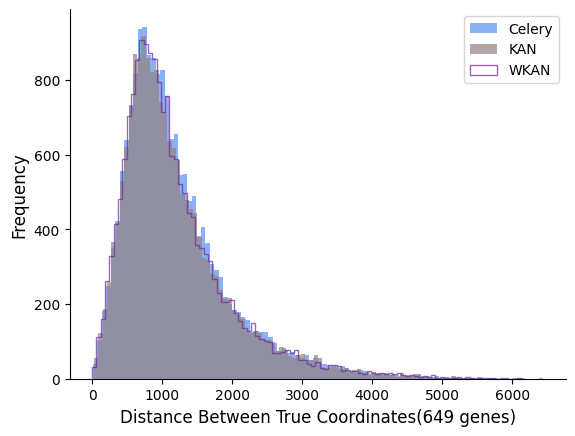

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.style.available

# 设置图形的整体风格（取消网格风格）
# plt.style.use('seaborn-white')

# 创建一个新的图形和坐标轴对象
fig, ax = plt.subplots()

# 样本数据（请替换为实际数据）
data0 = Celery649result
data1 = KAN3_215_649result
data2 = WKAN3_215_649result
# data3 = WKAN4_649result
# data4 = HVG10Celeryresult
# 绘制直方图
bins = 100  # 箱子的数量
alpha = 0.7  # 透明度

ax.hist(data0, bins=bins, alpha=alpha, label='Celery', color='#5790f0')
ax.hist(data1, bins=bins, alpha=alpha, label='KAN', color='#95817f', histtype='stepfilled')
ax.hist(data2, bins=bins, alpha=alpha, label='WKAN', color='#6e2797', histtype='step')
# ax.hist(data3, bins=bins, alpha=alpha, label='WKAN4', color='#674176', histtype='step')
# ax.hist(data4, bins=bins, alpha=alpha, label='10 Genes', color='#cd6262', histtype='step')

# 设置标题和标签
# ax.set_title('Different Number of Genes', fontsize=14)
ax.set_xlabel('Distance Between True Coordinates(649 genes)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# 添加图例
ax.legend(loc='upper right', fontsize=10)

# 隐藏网格线
ax.grid(False)

# 调整x轴和y轴的位置
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 确保 y 轴从 0 开始
ax.set_ylim(bottom=0)
# 保存图形
plt.savefig("Histogram_649Celery&KAN&WKAN_result", dpi=1300)

# 显示图形
plt.show()

In [ ]:
# 用5层下场打架干3层默认Celery

In [ ]:
Fit_cord_KAN (data_train = Rdata_scenario2,
                      model_config = "paper",
                      hidden_dims = [500, 150, 75, 25, 10], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "WKAN55_649")

In [ ]:
# 失败后这次 还是尝试用小模型来beat5层DNN；不魔改架构（Relu） 维度[50, 25, 0]
# 失败

In [8]:
model = Fit_cord_KAN (data_train = Rdata_scenario2,
                      model_config = "original",
                      hidden_dims = [50, 25, 10], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "originalKAN3_649")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.50it/s]


Epoch:1, Loss:43.0835


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.09it/s]


Epoch:2, Loss:24.3419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.57it/s]


Epoch:3, Loss:18.5589


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.36it/s]


Epoch:4, Loss:14.6338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.52it/s]


Epoch:5, Loss:12.1808


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.29it/s]


Epoch:6, Loss:10.5873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.68it/s]


Epoch:7, Loss:9.2930


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.92it/s]


Epoch:8, Loss:8.5201


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.85it/s]


Epoch:9, Loss:7.9897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.73it/s]


Epoch:10, Loss:7.3361


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.06it/s]


Epoch:11, Loss:7.2680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.80it/s]


Epoch:12, Loss:6.7343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.29it/s]


Epoch:13, Loss:6.8192


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.51it/s]


Epoch:14, Loss:6.4504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.25it/s]


Epoch:15, Loss:6.4256


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.30it/s]


Epoch:16, Loss:6.1207


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.25it/s]


Epoch:17, Loss:6.2308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.45it/s]


Epoch:18, Loss:6.0408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.90it/s]


Epoch:19, Loss:6.1629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.85it/s]


Epoch:20, Loss:5.6434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.96it/s]


Epoch:21, Loss:5.6008


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.03it/s]


Epoch:22, Loss:5.6619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.52it/s]


Epoch:23, Loss:5.7245


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.62it/s]


Epoch:24, Loss:5.4335


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.81it/s]


Epoch:25, Loss:5.5723


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.73it/s]


Epoch:26, Loss:5.4618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.78it/s]


Epoch:27, Loss:5.1442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.73it/s]


Epoch:28, Loss:5.5289


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.37it/s]


Epoch:29, Loss:5.5207


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.28it/s]


Epoch:30, Loss:5.2081


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.36it/s]


Epoch:31, Loss:5.4551


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.11it/s]


Epoch:32, Loss:5.1457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.29it/s]


Epoch:33, Loss:5.5140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.70it/s]


Epoch:34, Loss:5.1881


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.72it/s]


Epoch:35, Loss:5.3464
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.64it/s]


Epoch:36, Loss:3.5668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.62it/s]


Epoch:37, Loss:2.2147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.79it/s]


Epoch:38, Loss:2.3203


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.41it/s]


Epoch:39, Loss:2.4675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.43it/s]


Epoch:40, Loss:2.3181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.97it/s]


Epoch:41, Loss:2.2298


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.41it/s]


Epoch:42, Loss:2.2155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.00it/s]


Epoch:43, Loss:2.2810


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.51it/s]


Epoch:44, Loss:2.4593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.08it/s]


Epoch:45, Loss:2.2650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.94it/s]


Epoch:46, Loss:2.2320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.91it/s]


Epoch:47, Loss:2.3134


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.13it/s]


Epoch:48, Loss:2.4674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.13it/s]


Epoch:49, Loss:2.1878


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.89it/s]


Epoch:50, Loss:2.2506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.46it/s]


Epoch:51, Loss:2.3444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.19it/s]


Epoch:52, Loss:2.3442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.58it/s]


Epoch:53, Loss:2.3136
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.41it/s]


Epoch:54, Loss:1.7321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.45it/s]


Epoch:55, Loss:1.0138


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.00it/s]


Epoch:56, Loss:0.9977


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 128.86it/s]


Epoch:57, Loss:1.1491


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 127.50it/s]


Epoch:58, Loss:1.0727


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 126.43it/s]


Epoch:59, Loss:1.0206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.71it/s]


Epoch:60, Loss:1.0485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.92it/s]


Epoch:61, Loss:1.0772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.47it/s]


Epoch:62, Loss:1.0895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.53it/s]


Epoch:63, Loss:1.0325


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.97it/s]


Epoch:64, Loss:1.0707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.92it/s]


Epoch:65, Loss:1.0903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.38it/s]


Epoch:66, Loss:1.0814


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.18it/s]


Epoch:67, Loss:1.0725


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.56it/s]


Epoch:68, Loss:1.1423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.28it/s]


Epoch:69, Loss:1.0933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.68it/s]


Epoch:70, Loss:1.0738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.02it/s]


Epoch:71, Loss:1.1130
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.33it/s]


Epoch:72, Loss:0.8133


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.62it/s]


Epoch:73, Loss:0.4962


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.85it/s]


Epoch:74, Loss:0.5025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.30it/s]


Epoch:75, Loss:0.5264


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.22it/s]


Epoch:76, Loss:0.5276


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.13it/s]


Epoch:77, Loss:0.5252


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.77it/s]


Epoch:78, Loss:0.5136


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.08it/s]


Epoch:79, Loss:0.5123


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.33it/s]


Epoch:80, Loss:0.5258


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.98it/s]


Epoch:81, Loss:0.5391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.26it/s]


Epoch:82, Loss:0.5371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.54it/s]


Epoch:83, Loss:0.5160


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.52it/s]


Epoch:84, Loss:0.5230


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.03it/s]


Epoch:85, Loss:0.5380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.09it/s]


Epoch:86, Loss:0.5345


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.80it/s]


Epoch:87, Loss:0.5337


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.70it/s]


Epoch:88, Loss:0.5319
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.81it/s]


Epoch:89, Loss:0.4352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.36it/s]


Epoch:90, Loss:0.2773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.75it/s]


Epoch:91, Loss:0.2771


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.70it/s]


Epoch:92, Loss:0.2947


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.37it/s]


Epoch:93, Loss:0.2892


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.54it/s]


Epoch:94, Loss:0.2861


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.81it/s]


Epoch:95, Loss:0.2843


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.47it/s]


Epoch:96, Loss:0.2883


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.33it/s]


Epoch:97, Loss:0.2868


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.31it/s]


Epoch:98, Loss:0.2794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.52it/s]


Epoch:99, Loss:0.2875


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.04it/s]


Epoch:100, Loss:0.2843


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.25it/s]


Epoch:101, Loss:0.2790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.59it/s]


Epoch:102, Loss:0.2898


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.00it/s]


Epoch:103, Loss:0.2892


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.76it/s]


Epoch:104, Loss:0.2757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.69it/s]


Epoch:105, Loss:0.2907


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.08it/s]


Epoch:106, Loss:0.2773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.00it/s]


Epoch:107, Loss:0.2861
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.99it/s]


Epoch:108, Loss:0.2535


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.80it/s]


Epoch:109, Loss:0.1789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.24it/s]


Epoch:110, Loss:0.1787


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.88it/s]


Epoch:111, Loss:0.1847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.56it/s]


Epoch:112, Loss:0.1837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.09it/s]


Epoch:113, Loss:0.1829


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.54it/s]


Epoch:114, Loss:0.1803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.63it/s]


Epoch:115, Loss:0.1829


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.53it/s]


Epoch:116, Loss:0.1784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.44it/s]


Epoch:117, Loss:0.1792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.98it/s]


Epoch:118, Loss:0.1802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.10it/s]


Epoch:119, Loss:0.1764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.65it/s]


Epoch:120, Loss:0.1771


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.78it/s]


Epoch:121, Loss:0.1786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.82it/s]


Epoch:122, Loss:0.1762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.96it/s]


Epoch:123, Loss:0.1742


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.55it/s]


Epoch:124, Loss:0.1752


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.86it/s]


Epoch:125, Loss:0.1720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.48it/s]


Epoch:126, Loss:0.1751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.35it/s]


Epoch:127, Loss:0.1751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.37it/s]


Epoch:128, Loss:0.1728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.40it/s]


Epoch:129, Loss:0.1728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.92it/s]


Epoch:130, Loss:0.1734
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.67it/s]


Epoch:131, Loss:0.1536


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.05it/s]


Epoch:132, Loss:0.1313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.97it/s]


Epoch:133, Loss:0.1326


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.42it/s]


Epoch:134, Loss:0.1343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.74it/s]


Epoch:135, Loss:0.1326


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.43it/s]


Epoch:136, Loss:0.1332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.42it/s]


Epoch:137, Loss:0.1317


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.26it/s]


Epoch:138, Loss:0.1314


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.51it/s]


Epoch:139, Loss:0.1309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.96it/s]


Epoch:140, Loss:0.1310


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.94it/s]


Epoch:141, Loss:0.1304


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.72it/s]


Epoch:142, Loss:0.1291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.78it/s]


Epoch:143, Loss:0.1294


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.88it/s]


Epoch:144, Loss:0.1285


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.31it/s]


Epoch:145, Loss:0.1282


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.49it/s]


Epoch:146, Loss:0.1286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.36it/s]


Epoch:147, Loss:0.1278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.44it/s]


Epoch:148, Loss:0.1271


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.58it/s]


Epoch:149, Loss:0.1272


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.41it/s]


Epoch:150, Loss:0.1262


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.86it/s]


Epoch:151, Loss:0.1264


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.09it/s]


Epoch:152, Loss:0.1259


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.20it/s]


Epoch:153, Loss:0.1254


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.90it/s]


Epoch:154, Loss:0.1256


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.84it/s]


Epoch:155, Loss:0.1248


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.53it/s]


Epoch:156, Loss:0.1244


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.22it/s]


Epoch:157, Loss:0.1244


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.29it/s]


Epoch:158, Loss:0.1234


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.24it/s]


Epoch:159, Loss:0.1236


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.04it/s]


Epoch:160, Loss:0.1231


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.85it/s]


Epoch:161, Loss:0.1226


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.01it/s]


Epoch:162, Loss:0.1221


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.82it/s]


Epoch:163, Loss:0.1222
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.26it/s]


Epoch:164, Loss:0.1135


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.55it/s]


Epoch:165, Loss:0.1060


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.30it/s]


Epoch:166, Loss:0.1065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.63it/s]


Epoch:167, Loss:0.1066


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.91it/s]


Epoch:168, Loss:0.1067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.41it/s]


Epoch:169, Loss:0.1064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.75it/s]


Epoch:170, Loss:0.1060


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.43it/s]


Epoch:171, Loss:0.1057


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.39it/s]


Epoch:172, Loss:0.1057


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.42it/s]


Epoch:173, Loss:0.1056


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.25it/s]


Epoch:174, Loss:0.1052


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.55it/s]


Epoch:175, Loss:0.1049


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.29it/s]


Epoch:176, Loss:0.1049


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.58it/s]


Epoch:177, Loss:0.1046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.86it/s]


Epoch:178, Loss:0.1044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.74it/s]


Epoch:179, Loss:0.1039


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.41it/s]


Epoch:180, Loss:0.1040


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.46it/s]


Epoch:181, Loss:0.1035


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.96it/s]


Epoch:182, Loss:0.1033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.93it/s]


Epoch:183, Loss:0.1033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.77it/s]


Epoch:184, Loss:0.1026


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.15it/s]


Epoch:185, Loss:0.1028


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.62it/s]


Epoch:186, Loss:0.1027


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.11it/s]


Epoch:187, Loss:0.1021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.30it/s]


Epoch:188, Loss:0.1021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.46it/s]


Epoch:189, Loss:0.1018


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.91it/s]


Epoch:190, Loss:0.1014


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.58it/s]


Epoch:191, Loss:0.1014


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.09it/s]


Epoch:192, Loss:0.1014


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.29it/s]


Epoch:193, Loss:0.1009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.92it/s]


Epoch:194, Loss:0.1008


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.19it/s]


Epoch:195, Loss:0.1004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.16it/s]


Epoch:196, Loss:0.1005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.11it/s]


Epoch:197, Loss:0.1002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.97it/s]


Epoch:198, Loss:0.0997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.58it/s]


Epoch:199, Loss:0.0997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.66it/s]


Epoch:200, Loss:0.0995


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.58it/s]


Epoch:201, Loss:0.0994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.16it/s]


Epoch:202, Loss:0.0992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.40it/s]


Epoch:203, Loss:0.0988


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.36it/s]


Epoch:204, Loss:0.0986


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.04it/s]


Epoch:205, Loss:0.0984


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.52it/s]


Epoch:206, Loss:0.0983


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.69it/s]


Epoch:207, Loss:0.0978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.03it/s]


Epoch:208, Loss:0.0980


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.42it/s]


Epoch:209, Loss:0.0978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.64it/s]


Epoch:210, Loss:0.0977


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.14it/s]


Epoch:211, Loss:0.0973


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.46it/s]


Epoch:212, Loss:0.0971


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.55it/s]


Epoch:213, Loss:0.0968


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.69it/s]


Epoch:214, Loss:0.0967


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.23it/s]


Epoch:215, Loss:0.0965


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.15it/s]


Epoch:216, Loss:0.0963


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.55it/s]


Epoch:217, Loss:0.0963


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.68it/s]


Epoch:218, Loss:0.0957


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.10it/s]


Epoch:219, Loss:0.0957


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.63it/s]


Epoch:220, Loss:0.0956


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.04it/s]


Epoch:221, Loss:0.0955


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.01it/s]


Epoch:222, Loss:0.0953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.50it/s]


Epoch:223, Loss:0.0950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.54it/s]


Epoch:224, Loss:0.0949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.30it/s]


Epoch:225, Loss:0.0947


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.47it/s]


Epoch:226, Loss:0.0946


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.27it/s]


Epoch:227, Loss:0.0944


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.51it/s]


Epoch:228, Loss:0.0942


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.53it/s]


Epoch:229, Loss:0.0940


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.81it/s]


Epoch:230, Loss:0.0936


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.63it/s]


Epoch:231, Loss:0.0934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.96it/s]


Epoch:232, Loss:0.0935


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.56it/s]


Epoch:233, Loss:0.0934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.82it/s]


Epoch:234, Loss:0.0932


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.58it/s]


Epoch:235, Loss:0.0929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.26it/s]


Epoch:236, Loss:0.0931
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.64it/s]


Epoch:237, Loss:0.0888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.26it/s]


Epoch:238, Loss:0.0862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.43it/s]


Epoch:239, Loss:0.0863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.60it/s]


Epoch:240, Loss:0.0866


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.61it/s]


Epoch:241, Loss:0.0864


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.12it/s]


Epoch:242, Loss:0.0863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.60it/s]


Epoch:243, Loss:0.0864


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.60it/s]


Epoch:244, Loss:0.0862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.30it/s]


Epoch:245, Loss:0.0861


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.50it/s]


Epoch:246, Loss:0.0861


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.47it/s]


Epoch:247, Loss:0.0860


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.44it/s]


Epoch:248, Loss:0.0860


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.50it/s]


Epoch:249, Loss:0.0858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.96it/s]


Epoch:250, Loss:0.0858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.71it/s]


Epoch:251, Loss:0.0857


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.65it/s]


Epoch:252, Loss:0.0857


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.85it/s]


Epoch:253, Loss:0.0855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.98it/s]


Epoch:254, Loss:0.0854


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.59it/s]


Epoch:255, Loss:0.0855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 122.78it/s]


Epoch:256, Loss:0.0853


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.95it/s]


Epoch:257, Loss:0.0851


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.00it/s]


Epoch:258, Loss:0.0853


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.39it/s]


Epoch:259, Loss:0.0850


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.13it/s]


Epoch:260, Loss:0.0849


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.31it/s]


Epoch:261, Loss:0.0849


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.00it/s]


Epoch:262, Loss:0.0849


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.01it/s]


Epoch:263, Loss:0.0846


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.28it/s]


Epoch:264, Loss:0.0846


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.58it/s]


Epoch:265, Loss:0.0845


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.96it/s]


Epoch:266, Loss:0.0845


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.56it/s]


Epoch:267, Loss:0.0843


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 137.02it/s]


Epoch:268, Loss:0.0843


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.30it/s]


Epoch:269, Loss:0.0842


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.66it/s]


Epoch:270, Loss:0.0842


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.90it/s]


Epoch:271, Loss:0.0840


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.01it/s]


Epoch:272, Loss:0.0840


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.61it/s]


Epoch:273, Loss:0.0839


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.76it/s]


Epoch:274, Loss:0.0837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.86it/s]


Epoch:275, Loss:0.0837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.57it/s]


Epoch:276, Loss:0.0836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.63it/s]


Epoch:277, Loss:0.0835


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.26it/s]


Epoch:278, Loss:0.0835


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.96it/s]


Epoch:279, Loss:0.0833


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.01it/s]


Epoch:280, Loss:0.0834


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.79it/s]


Epoch:281, Loss:0.0830


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.94it/s]


Epoch:282, Loss:0.0832
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.14it/s]


Epoch:283, Loss:0.0810


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.34it/s]


Epoch:284, Loss:0.0804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.66it/s]


Epoch:285, Loss:0.0804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.15it/s]


Epoch:286, Loss:0.0804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.57it/s]


Epoch:287, Loss:0.0804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.78it/s]


Epoch:288, Loss:0.0804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.08it/s]


Epoch:289, Loss:0.0804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.45it/s]


Epoch:290, Loss:0.0804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.86it/s]


Epoch:291, Loss:0.0803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.92it/s]


Epoch:292, Loss:0.0804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.15it/s]


Epoch:293, Loss:0.0803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.75it/s]


Epoch:294, Loss:0.0803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.93it/s]


Epoch:295, Loss:0.0802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.01it/s]


Epoch:296, Loss:0.0802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.86it/s]


Epoch:297, Loss:0.0803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.34it/s]


Epoch:298, Loss:0.0802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.83it/s]


Epoch:299, Loss:0.0801


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.57it/s]


Epoch:300, Loss:0.0801


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.92it/s]


Epoch:301, Loss:0.0801


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.21it/s]


Epoch:302, Loss:0.0800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.99it/s]


Epoch:303, Loss:0.0800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.82it/s]


Epoch:304, Loss:0.0799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.69it/s]


Epoch:305, Loss:0.0799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.59it/s]


Epoch:306, Loss:0.0799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.72it/s]


Epoch:307, Loss:0.0798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.63it/s]


Epoch:308, Loss:0.0798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.00it/s]


Epoch:309, Loss:0.0797


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.74it/s]


Epoch:310, Loss:0.0798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.57it/s]


Epoch:311, Loss:0.0797


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.46it/s]


Epoch:312, Loss:0.0797


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.17it/s]


Epoch:313, Loss:0.0796


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.39it/s]


Epoch:314, Loss:0.0796


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.73it/s]


Epoch:315, Loss:0.0795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.65it/s]


Epoch:316, Loss:0.0795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.31it/s]


Epoch:317, Loss:0.0795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.56it/s]


Epoch:318, Loss:0.0794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.09it/s]


Epoch:319, Loss:0.0794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.03it/s]


Epoch:320, Loss:0.0793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.01it/s]


Epoch:321, Loss:0.0793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.14it/s]


Epoch:322, Loss:0.0793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.42it/s]


Epoch:323, Loss:0.0792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.45it/s]


Epoch:324, Loss:0.0792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.25it/s]


Epoch:325, Loss:0.0791


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.83it/s]


Epoch:326, Loss:0.0792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.20it/s]


Epoch:327, Loss:0.0790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.63it/s]


Epoch:328, Loss:0.0791


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.76it/s]


Epoch:329, Loss:0.0790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.88it/s]


Epoch:330, Loss:0.0789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.63it/s]


Epoch:331, Loss:0.0789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.50it/s]


Epoch:332, Loss:0.0789
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.79it/s]


Epoch:333, Loss:0.0777


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.96it/s]


Epoch:334, Loss:0.0776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.65it/s]


Epoch:335, Loss:0.0776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.22it/s]


Epoch:336, Loss:0.0776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.84it/s]


Epoch:337, Loss:0.0776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.26it/s]


Epoch:338, Loss:0.0776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.26it/s]


Epoch:339, Loss:0.0776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.84it/s]


Epoch:340, Loss:0.0776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.48it/s]


Epoch:341, Loss:0.0776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.18it/s]


Epoch:342, Loss:0.0775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.82it/s]


Epoch:343, Loss:0.0775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.34it/s]


Epoch:344, Loss:0.0775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.97it/s]


Epoch:345, Loss:0.0775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.33it/s]


Epoch:346, Loss:0.0776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.02it/s]


Epoch:347, Loss:0.0775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.76it/s]


Epoch:348, Loss:0.0775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.04it/s]


Epoch:349, Loss:0.0775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.52it/s]


Epoch:350, Loss:0.0774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.62it/s]


Epoch:351, Loss:0.0774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.15it/s]


Epoch:352, Loss:0.0774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.43it/s]


Epoch:353, Loss:0.0774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.31it/s]


Epoch:354, Loss:0.0774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.80it/s]


Epoch:355, Loss:0.0774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.05it/s]


Epoch:356, Loss:0.0774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.43it/s]


Epoch:357, Loss:0.0774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.93it/s]


Epoch:358, Loss:0.0774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.61it/s]


Epoch:359, Loss:0.0773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.10it/s]


Epoch:360, Loss:0.0773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.21it/s]


Epoch:361, Loss:0.0773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.92it/s]


Epoch:362, Loss:0.0773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.49it/s]


Epoch:363, Loss:0.0773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.87it/s]


Epoch:364, Loss:0.0773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.75it/s]


Epoch:365, Loss:0.0772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.57it/s]


Epoch:366, Loss:0.0772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.78it/s]


Epoch:367, Loss:0.0772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.87it/s]


Epoch:368, Loss:0.0772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.53it/s]


Epoch:369, Loss:0.0772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.89it/s]


Epoch:370, Loss:0.0772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.99it/s]


Epoch:371, Loss:0.0771


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.90it/s]


Epoch:372, Loss:0.0771
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.98it/s]


Epoch:373, Loss:0.0766


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.11it/s]


Epoch:374, Loss:0.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.88it/s]


Epoch:375, Loss:0.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.47it/s]


Epoch:376, Loss:0.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.00it/s]


Epoch:377, Loss:0.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.05it/s]


Epoch:378, Loss:0.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.56it/s]


Epoch:379, Loss:0.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.55it/s]


Epoch:380, Loss:0.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.56it/s]


Epoch:381, Loss:0.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.26it/s]


Epoch:382, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.99it/s]


Epoch:383, Loss:0.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.02it/s]


Epoch:384, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.04it/s]


Epoch:385, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.80it/s]


Epoch:386, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.75it/s]


Epoch:387, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.60it/s]


Epoch:388, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.20it/s]


Epoch:389, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.71it/s]


Epoch:390, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 136.84it/s]


Epoch:391, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.27it/s]


Epoch:392, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.73it/s]


Epoch:393, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 125.14it/s]


Epoch:394, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.06it/s]


Epoch:395, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.91it/s]


Epoch:396, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.74it/s]


Epoch:397, Loss:0.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 127.03it/s]


Epoch:398, Loss:0.0764
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.12it/s]


Epoch:399, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.34it/s]


Epoch:400, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.48it/s]


Epoch:401, Loss:0.0761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.40it/s]


Epoch:402, Loss:0.0761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.16it/s]


Epoch:403, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.62it/s]


Epoch:404, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.44it/s]


Epoch:405, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.54it/s]


Epoch:406, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.12it/s]


Epoch:407, Loss:0.0761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.26it/s]


Epoch:408, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.64it/s]


Epoch:409, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.54it/s]


Epoch:410, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.63it/s]


Epoch:411, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.29it/s]


Epoch:412, Loss:0.0762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.49it/s]


Epoch:413, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.67it/s]


Epoch:414, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.15it/s]


Epoch:415, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.29it/s]


Epoch:416, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.62it/s]


Epoch:417, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.41it/s]


Epoch:418, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.61it/s]


Epoch:419, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.78it/s]


Epoch:420, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.80it/s]


Epoch:421, Loss:0.0760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.04it/s]


Epoch:422, Loss:0.0760
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.31it/s]


Epoch:423, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.32it/s]


Epoch:424, Loss:0.0759


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.51it/s]


Epoch:425, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.00it/s]


Epoch:426, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.06it/s]


Epoch:427, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.19it/s]


Epoch:428, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.02it/s]


Epoch:429, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.49it/s]


Epoch:430, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.25it/s]


Epoch:431, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.97it/s]


Epoch:432, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.24it/s]


Epoch:433, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.93it/s]


Epoch:434, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.05it/s]


Epoch:435, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.41it/s]


Epoch:436, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.65it/s]


Epoch:437, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.85it/s]


Epoch:438, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.91it/s]


Epoch:439, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.84it/s]


Epoch:440, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.83it/s]


Epoch:441, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.26it/s]


Epoch:442, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.70it/s]


Epoch:443, Loss:0.0758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.67it/s]

Epoch:444, Loss:0.0758
New learning rate:6.103515625e-08
Folder already exists


In [8]:
KAN3_649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "originalKAN3_649" ,#
                     save_dir_left = "output/KAN_MERFISH/originalKAN3_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/originalKAN3_649_right_celery.npy")

Data has already been z-scored
Data has already been z-scored


100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 1860.23it/s]


PearsonRResult(statistic=0.5790364897089543, pvalue=0.0)
1052.1217861212954
1255.0644847754388


In [ ]:
# 又一次失败 第三次
# 尝试回归五层 并且缝合架构第一层是KAN其他都是DNN 同时加入batchmorm

In [4]:
Fit_cord_KAN (data_train = Rdata_scenario2,
                      model_config = "modified",
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "modifiedKAN5_649")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.04it/s]


Epoch:1, Loss:86.7134


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.17it/s]


Epoch:2, Loss:70.4289


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 307.79it/s]


Epoch:3, Loss:63.8771


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 311.77it/s]


Epoch:4, Loss:59.9202


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 311.99it/s]


Epoch:5, Loss:56.5779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.86it/s]


Epoch:6, Loss:54.6321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 302.15it/s]


Epoch:7, Loss:51.6360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 304.29it/s]


Epoch:8, Loss:49.8258


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 291.12it/s]


Epoch:9, Loss:49.0630


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.11it/s]


Epoch:10, Loss:47.7027


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 310.01it/s]


Epoch:11, Loss:47.6320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 304.80it/s]


Epoch:12, Loss:45.8763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.74it/s]


Epoch:13, Loss:45.3526


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.06it/s]


Epoch:14, Loss:44.4912


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 300.70it/s]


Epoch:15, Loss:43.4680


 60%|██████████████████████████████████████████████▍                              | 1324/2193 [00:04<00:02, 309.93it/s]


KeyboardInterrupt: 

In [ ]:
# 又一次失败 第四次
#刚刚架构缝合甚至不用看，收敛速度大有问题，试试去掉batchnorm看看 

In [4]:
Fit_cord_KAN (data_train = Rdata_scenario2,
                      model_config = "modified",
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "modifiedKAN5_649")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 294.96it/s]


Epoch:1, Loss:50.7693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 284.86it/s]


Epoch:2, Loss:28.8682


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 337.91it/s]


Epoch:3, Loss:22.7651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.45it/s]


Epoch:4, Loss:19.1996


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 332.78it/s]


Epoch:5, Loss:16.0212


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 353.54it/s]


Epoch:6, Loss:14.1931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 352.57it/s]


Epoch:7, Loss:12.6714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.01it/s]


Epoch:8, Loss:11.5079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 346.39it/s]


Epoch:9, Loss:10.7491


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.52it/s]


Epoch:10, Loss:10.2862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.94it/s]


Epoch:11, Loss:10.4452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.43it/s]


Epoch:12, Loss:9.0217


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.22it/s]


Epoch:13, Loss:9.0987


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.72it/s]


Epoch:14, Loss:9.4049


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.60it/s]


Epoch:15, Loss:8.6225


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 374.30it/s]


Epoch:16, Loss:8.0811


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.44it/s]


Epoch:17, Loss:8.2194


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.76it/s]


Epoch:18, Loss:8.6754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.78it/s]


Epoch:19, Loss:8.6314


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.94it/s]


Epoch:20, Loss:7.3072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 374.30it/s]


Epoch:21, Loss:7.9888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.85it/s]


Epoch:22, Loss:8.0504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.33it/s]


Epoch:23, Loss:7.1594


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.69it/s]


Epoch:24, Loss:7.3467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 352.74it/s]


Epoch:25, Loss:7.4702


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 349.46it/s]


Epoch:26, Loss:7.5949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.51it/s]


Epoch:27, Loss:7.8011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.36it/s]


Epoch:28, Loss:7.0446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.42it/s]


Epoch:29, Loss:8.0903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.88it/s]


Epoch:30, Loss:7.5278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.94it/s]


Epoch:31, Loss:6.1727


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.66it/s]


Epoch:32, Loss:7.2878
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.15it/s]


Epoch:33, Loss:4.6422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.48it/s]


Epoch:34, Loss:2.8545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.02it/s]


Epoch:35, Loss:2.8143


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.55it/s]


Epoch:36, Loss:2.9349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.69it/s]


Epoch:37, Loss:2.8546


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.54it/s]


Epoch:38, Loss:2.9165


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.64it/s]


Epoch:39, Loss:2.5271


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.95it/s]


Epoch:40, Loss:2.8728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.71it/s]


Epoch:41, Loss:2.9185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.82it/s]


Epoch:42, Loss:2.9327


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.62it/s]


Epoch:43, Loss:2.6079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 371.32it/s]


Epoch:44, Loss:3.1441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.08it/s]


Epoch:45, Loss:2.8386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 371.13it/s]


Epoch:46, Loss:2.8005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 357.05it/s]


Epoch:47, Loss:2.8176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.26it/s]


Epoch:48, Loss:2.9740


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.82it/s]


Epoch:49, Loss:2.6184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.81it/s]


Epoch:50, Loss:2.7817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.12it/s]


Epoch:51, Loss:3.5118
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.54it/s]


Epoch:52, Loss:1.8873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.26it/s]


Epoch:53, Loss:1.0649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 374.62it/s]


Epoch:54, Loss:1.0591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.39it/s]


Epoch:55, Loss:1.1809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 371.00it/s]


Epoch:56, Loss:1.1826


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.82it/s]


Epoch:57, Loss:1.0400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 371.26it/s]


Epoch:58, Loss:1.1053


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.32it/s]


Epoch:59, Loss:1.0719


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 356.41it/s]


Epoch:60, Loss:1.1323


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 356.76it/s]


Epoch:61, Loss:1.0310


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 357.40it/s]


Epoch:62, Loss:1.0387


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.47it/s]


Epoch:63, Loss:1.2722


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.63it/s]


Epoch:64, Loss:1.0962


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.94it/s]


Epoch:65, Loss:1.1107


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.39it/s]


Epoch:66, Loss:1.1175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.59it/s]


Epoch:67, Loss:1.0890


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 371.00it/s]


Epoch:68, Loss:1.1217


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.09it/s]


Epoch:69, Loss:1.2081


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.65it/s]


Epoch:70, Loss:1.1933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.71it/s]


Epoch:71, Loss:1.2541
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.71it/s]


Epoch:72, Loss:0.7616


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 371.19it/s]


Epoch:73, Loss:0.4080


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.66it/s]


Epoch:74, Loss:0.4306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.44it/s]


Epoch:75, Loss:0.4933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 349.37it/s]


Epoch:76, Loss:0.4557


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.81it/s]


Epoch:77, Loss:0.4465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.33it/s]


Epoch:78, Loss:0.4659


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.26it/s]


Epoch:79, Loss:0.4579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.86it/s]


Epoch:80, Loss:0.4633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.35it/s]


Epoch:81, Loss:0.4569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.35it/s]


Epoch:82, Loss:0.4786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.40it/s]


Epoch:83, Loss:0.4886


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.30it/s]


Epoch:84, Loss:0.4587


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.33it/s]


Epoch:85, Loss:0.4824


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 377.26it/s]


Epoch:86, Loss:0.4718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 378.69it/s]


Epoch:87, Loss:0.4888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 375.97it/s]


Epoch:88, Loss:0.4889
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.00it/s]


Epoch:89, Loss:0.3744


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 371.89it/s]


Epoch:90, Loss:0.1810


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.88it/s]


Epoch:91, Loss:0.1737


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.48it/s]


Epoch:92, Loss:0.2097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 375.00it/s]


Epoch:93, Loss:0.2061


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.19it/s]


Epoch:94, Loss:0.1963


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.15it/s]


Epoch:95, Loss:0.1989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.71it/s]


Epoch:96, Loss:0.2166


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.14it/s]


Epoch:97, Loss:0.2033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.00it/s]


Epoch:98, Loss:0.1939


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.03it/s]


Epoch:99, Loss:0.2098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 377.00it/s]


Epoch:100, Loss:0.2169


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.41it/s]


Epoch:101, Loss:0.2077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 375.00it/s]


Epoch:102, Loss:0.2125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.20it/s]


Epoch:103, Loss:0.2104


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.47it/s]


Epoch:104, Loss:0.2154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.14it/s]


Epoch:105, Loss:0.2246


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.02it/s]


Epoch:106, Loss:0.2115
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.45it/s]


Epoch:107, Loss:0.1741


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.62it/s]


Epoch:108, Loss:0.0839


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 365.56it/s]


Epoch:109, Loss:0.0846


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.47it/s]


Epoch:110, Loss:0.0974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.08it/s]


Epoch:111, Loss:0.1002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.70it/s]


Epoch:112, Loss:0.0936


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.88it/s]


Epoch:113, Loss:0.0960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 365.56it/s]


Epoch:114, Loss:0.0949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.84it/s]


Epoch:115, Loss:0.0973


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.24it/s]


Epoch:116, Loss:0.0961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.93it/s]


Epoch:117, Loss:0.0974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.60it/s]


Epoch:118, Loss:0.0997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.23it/s]


Epoch:119, Loss:0.0976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.07it/s]


Epoch:120, Loss:0.0989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.94it/s]


Epoch:121, Loss:0.0966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.90it/s]


Epoch:122, Loss:0.1005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 375.21it/s]


Epoch:123, Loss:0.0989
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.14it/s]


Epoch:124, Loss:0.0847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.21it/s]


Epoch:125, Loss:0.0458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 375.13it/s]


Epoch:126, Loss:0.0455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.48it/s]


Epoch:127, Loss:0.0526


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.41it/s]


Epoch:128, Loss:0.0524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.88it/s]


Epoch:129, Loss:0.0501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 371.19it/s]


Epoch:130, Loss:0.0501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 355.60it/s]


Epoch:131, Loss:0.0507


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.32it/s]


Epoch:132, Loss:0.0513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.19it/s]


Epoch:133, Loss:0.0498


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.94it/s]


Epoch:134, Loss:0.0505


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.33it/s]


Epoch:135, Loss:0.0509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 365.93it/s]


Epoch:136, Loss:0.0509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 343.38it/s]


Epoch:137, Loss:0.0509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.13it/s]


Epoch:138, Loss:0.0501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.09it/s]


Epoch:139, Loss:0.0513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.34it/s]


Epoch:140, Loss:0.0500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 371.35it/s]


Epoch:141, Loss:0.0505
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.12it/s]


Epoch:142, Loss:0.0443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.14it/s]


Epoch:143, Loss:0.0300


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 374.23it/s]


Epoch:144, Loss:0.0299


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 371.44it/s]


Epoch:145, Loss:0.0319


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 357.28it/s]


Epoch:146, Loss:0.0322


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 359.13it/s]


Epoch:147, Loss:0.0313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.48it/s]


Epoch:148, Loss:0.0313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.64it/s]


Epoch:149, Loss:0.0315


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.68it/s]


Epoch:150, Loss:0.0314


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.23it/s]


Epoch:151, Loss:0.0309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 355.54it/s]


Epoch:152, Loss:0.0310


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 348.73it/s]


Epoch:153, Loss:0.0309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 351.72it/s]


Epoch:154, Loss:0.0311


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.39it/s]


Epoch:155, Loss:0.0311


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.46it/s]


Epoch:156, Loss:0.0312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.87it/s]


Epoch:157, Loss:0.0309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.66it/s]


Epoch:158, Loss:0.0303


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 355.54it/s]


Epoch:159, Loss:0.0305
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.57it/s]


Epoch:160, Loss:0.0283


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.80it/s]


Epoch:161, Loss:0.0232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.22it/s]


Epoch:162, Loss:0.0233


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.02it/s]


Epoch:163, Loss:0.0238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.01it/s]


Epoch:164, Loss:0.0238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.52it/s]


Epoch:165, Loss:0.0235


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.77it/s]


Epoch:166, Loss:0.0235


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.05it/s]


Epoch:167, Loss:0.0236


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.38it/s]


Epoch:168, Loss:0.0235


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.32it/s]


Epoch:169, Loss:0.0232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 355.78it/s]


Epoch:170, Loss:0.0234


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.20it/s]


Epoch:171, Loss:0.0232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.85it/s]


Epoch:172, Loss:0.0233


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.93it/s]


Epoch:173, Loss:0.0230


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 353.93it/s]


Epoch:174, Loss:0.0229


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 340.13it/s]


Epoch:175, Loss:0.0230


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 351.16it/s]


Epoch:176, Loss:0.0229


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 351.61it/s]


Epoch:177, Loss:0.0228


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 352.23it/s]


Epoch:178, Loss:0.0228


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.58it/s]


Epoch:179, Loss:0.0227


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.13it/s]


Epoch:180, Loss:0.0225


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 354.39it/s]


Epoch:181, Loss:0.0225
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.30it/s]


Epoch:182, Loss:0.0213


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.50it/s]


Epoch:183, Loss:0.0198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.01it/s]


Epoch:184, Loss:0.0199


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.35it/s]


Epoch:185, Loss:0.0200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 359.75it/s]


Epoch:186, Loss:0.0200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 365.63it/s]


Epoch:187, Loss:0.0199


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.80it/s]


Epoch:188, Loss:0.0199


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.20it/s]


Epoch:189, Loss:0.0198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.17it/s]


Epoch:190, Loss:0.0198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.74it/s]


Epoch:191, Loss:0.0198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 358.69it/s]


Epoch:192, Loss:0.0197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 357.63it/s]


Epoch:193, Loss:0.0196


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 359.57it/s]


Epoch:194, Loss:0.0196


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.70it/s]


Epoch:195, Loss:0.0196


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.35it/s]


Epoch:196, Loss:0.0196


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.82it/s]


Epoch:197, Loss:0.0195


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.59it/s]


Epoch:198, Loss:0.0194


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.85it/s]


Epoch:199, Loss:0.0194


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.61it/s]


Epoch:200, Loss:0.0194


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.38it/s]


Epoch:201, Loss:0.0193


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.88it/s]


Epoch:202, Loss:0.0193


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 354.31it/s]


Epoch:203, Loss:0.0193


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 356.76it/s]


Epoch:204, Loss:0.0192


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 358.76it/s]


Epoch:205, Loss:0.0191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 354.91it/s]


Epoch:206, Loss:0.0191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.34it/s]


Epoch:207, Loss:0.0191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.94it/s]


Epoch:208, Loss:0.0190


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.33it/s]


Epoch:209, Loss:0.0190


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 358.64it/s]


Epoch:210, Loss:0.0189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 357.58it/s]


Epoch:211, Loss:0.0189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 358.61it/s]


Epoch:212, Loss:0.0189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 357.34it/s]


Epoch:213, Loss:0.0188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.32it/s]


Epoch:214, Loss:0.0188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.38it/s]


Epoch:215, Loss:0.0187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.11it/s]


Epoch:216, Loss:0.0187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.08it/s]


Epoch:217, Loss:0.0187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.98it/s]


Epoch:218, Loss:0.0186


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.88it/s]


Epoch:219, Loss:0.0185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.50it/s]


Epoch:220, Loss:0.0185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.95it/s]


Epoch:221, Loss:0.0185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.92it/s]


Epoch:222, Loss:0.0184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.53it/s]


Epoch:223, Loss:0.0184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.64it/s]


Epoch:224, Loss:0.0184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 357.75it/s]


Epoch:225, Loss:0.0183


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.12it/s]


Epoch:226, Loss:0.0182


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.58it/s]


Epoch:227, Loss:0.0182


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.71it/s]


Epoch:228, Loss:0.0182


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.45it/s]


Epoch:229, Loss:0.0181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.13it/s]


Epoch:230, Loss:0.0181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.88it/s]


Epoch:231, Loss:0.0181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.96it/s]


Epoch:232, Loss:0.0180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 358.10it/s]


Epoch:233, Loss:0.0180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.36it/s]


Epoch:234, Loss:0.0179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.57it/s]


Epoch:235, Loss:0.0179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 355.66it/s]


Epoch:236, Loss:0.0179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.20it/s]


Epoch:237, Loss:0.0178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.74it/s]


Epoch:238, Loss:0.0178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.20it/s]


Epoch:239, Loss:0.0178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.95it/s]


Epoch:240, Loss:0.0177


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.68it/s]


Epoch:241, Loss:0.0177


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.92it/s]


Epoch:242, Loss:0.0176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 357.46it/s]


Epoch:243, Loss:0.0176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 356.30it/s]


Epoch:244, Loss:0.0176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 353.82it/s]


Epoch:245, Loss:0.0175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.90it/s]


Epoch:246, Loss:0.0175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 359.69it/s]


Epoch:247, Loss:0.0175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.23it/s]


Epoch:248, Loss:0.0175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 358.71it/s]


Epoch:249, Loss:0.0174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.34it/s]


Epoch:250, Loss:0.0174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.11it/s]


Epoch:251, Loss:0.0174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 356.93it/s]


Epoch:252, Loss:0.0173


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.10it/s]


Epoch:253, Loss:0.0172


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.63it/s]


Epoch:254, Loss:0.0172


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 355.09it/s]


Epoch:255, Loss:0.0172


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 358.90it/s]


Epoch:256, Loss:0.0172


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.65it/s]


Epoch:257, Loss:0.0171


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 357.69it/s]


Epoch:258, Loss:0.0171


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.51it/s]


Epoch:259, Loss:0.0170


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.26it/s]


Epoch:260, Loss:0.0170


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.70it/s]


Epoch:261, Loss:0.0169


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 359.04it/s]


Epoch:262, Loss:0.0170
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 359.21it/s]


Epoch:263, Loss:0.0163


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 356.30it/s]


Epoch:264, Loss:0.0158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 365.81it/s]


Epoch:265, Loss:0.0158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.09it/s]


Epoch:266, Loss:0.0159


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 359.39it/s]


Epoch:267, Loss:0.0158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.77it/s]


Epoch:268, Loss:0.0158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.44it/s]


Epoch:269, Loss:0.0158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.38it/s]


Epoch:270, Loss:0.0158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.69it/s]


Epoch:271, Loss:0.0158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.02it/s]


Epoch:272, Loss:0.0158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.17it/s]


Epoch:273, Loss:0.0158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.78it/s]


Epoch:274, Loss:0.0158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.09it/s]


Epoch:275, Loss:0.0158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.95it/s]


Epoch:276, Loss:0.0157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.20it/s]


Epoch:277, Loss:0.0157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 374.49it/s]


Epoch:278, Loss:0.0157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.07it/s]


Epoch:279, Loss:0.0157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 359.75it/s]


Epoch:280, Loss:0.0157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 353.20it/s]


Epoch:281, Loss:0.0156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.87it/s]


Epoch:282, Loss:0.0156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 359.57it/s]


Epoch:283, Loss:0.0156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.35it/s]


Epoch:284, Loss:0.0156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 359.92it/s]


Epoch:285, Loss:0.0156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 347.02it/s]


Epoch:286, Loss:0.0156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 339.54it/s]


Epoch:287, Loss:0.0156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 352.20it/s]


Epoch:288, Loss:0.0155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 337.85it/s]


Epoch:289, Loss:0.0155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 357.87it/s]


Epoch:290, Loss:0.0155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 345.90it/s]


Epoch:291, Loss:0.0155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 328.10it/s]


Epoch:292, Loss:0.0155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 358.93it/s]


Epoch:293, Loss:0.0154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 328.53it/s]


Epoch:294, Loss:0.0154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 340.00it/s]


Epoch:295, Loss:0.0154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 347.54it/s]


Epoch:296, Loss:0.0154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.12it/s]


Epoch:297, Loss:0.0154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 350.94it/s]


Epoch:298, Loss:0.0153


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.93it/s]


Epoch:299, Loss:0.0153


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 327.31it/s]


Epoch:300, Loss:0.0153


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.60it/s]


Epoch:301, Loss:0.0153


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.76it/s]


Epoch:302, Loss:0.0154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 310.32it/s]


Epoch:303, Loss:0.0152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 291.58it/s]


Epoch:304, Loss:0.0152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 352.18it/s]


Epoch:305, Loss:0.0153


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 313.24it/s]


Epoch:306, Loss:0.0152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 318.33it/s]


Epoch:307, Loss:0.0152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.57it/s]


Epoch:308, Loss:0.0153
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 316.04it/s]


Epoch:309, Loss:0.0148


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 328.44it/s]


Epoch:310, Loss:0.0147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.39it/s]


Epoch:311, Loss:0.0147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 359.28it/s]


Epoch:312, Loss:0.0147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 365.93it/s]


Epoch:313, Loss:0.0147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.01it/s]


Epoch:314, Loss:0.0147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 356.66it/s]


Epoch:315, Loss:0.0147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 351.44it/s]


Epoch:316, Loss:0.0147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 359.33it/s]


Epoch:317, Loss:0.0147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 356.70it/s]


Epoch:318, Loss:0.0147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.05it/s]


Epoch:319, Loss:0.0147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 358.69it/s]


Epoch:320, Loss:0.0147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 354.31it/s]


Epoch:321, Loss:0.0146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 355.95it/s]


Epoch:322, Loss:0.0146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 354.36it/s]


Epoch:323, Loss:0.0146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.82it/s]


Epoch:324, Loss:0.0146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.30it/s]


Epoch:325, Loss:0.0146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.82it/s]


Epoch:326, Loss:0.0146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.05it/s]


Epoch:327, Loss:0.0146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.84it/s]


Epoch:328, Loss:0.0146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.90it/s]


Epoch:329, Loss:0.0146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.69it/s]


Epoch:330, Loss:0.0146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.21it/s]


Epoch:331, Loss:0.0146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 375.26it/s]


Epoch:332, Loss:0.0146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.14it/s]


Epoch:333, Loss:0.0146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.28it/s]


Epoch:334, Loss:0.0145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.32it/s]


Epoch:335, Loss:0.0145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.48it/s]


Epoch:336, Loss:0.0145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.50it/s]


Epoch:337, Loss:0.0145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.54it/s]


Epoch:338, Loss:0.0145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.96it/s]


Epoch:339, Loss:0.0145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.01it/s]


Epoch:340, Loss:0.0145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.14it/s]


Epoch:341, Loss:0.0145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 357.06it/s]


Epoch:342, Loss:0.0145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.93it/s]


Epoch:343, Loss:0.0145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.78it/s]


Epoch:344, Loss:0.0144


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.01it/s]


Epoch:345, Loss:0.0144


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 375.71it/s]


Epoch:346, Loss:0.0144


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.50it/s]


Epoch:347, Loss:0.0144


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 375.00it/s]


Epoch:348, Loss:0.0144
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.32it/s]


Epoch:349, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.29it/s]


Epoch:350, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.28it/s]


Epoch:351, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.63it/s]


Epoch:352, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.33it/s]


Epoch:353, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.07it/s]


Epoch:354, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.36it/s]


Epoch:355, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.98it/s]


Epoch:356, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.89it/s]


Epoch:357, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.75it/s]


Epoch:358, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.13it/s]


Epoch:359, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.82it/s]


Epoch:360, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.00it/s]


Epoch:361, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.30it/s]


Epoch:362, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.72it/s]


Epoch:363, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.66it/s]


Epoch:364, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.77it/s]


Epoch:365, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.83it/s]


Epoch:366, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 365.62it/s]


Epoch:367, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.71it/s]


Epoch:368, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.26it/s]


Epoch:369, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 347.79it/s]


Epoch:370, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.68it/s]


Epoch:371, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.72it/s]


Epoch:372, Loss:0.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.70it/s]


Epoch:373, Loss:0.0142
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.68it/s]


Epoch:374, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.82it/s]


Epoch:375, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.03it/s]


Epoch:376, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.28it/s]


Epoch:377, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.44it/s]


Epoch:378, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 356.94it/s]


Epoch:379, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.62it/s]


Epoch:380, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.07it/s]


Epoch:381, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.03it/s]


Epoch:382, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 359.74it/s]


Epoch:383, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.28it/s]


Epoch:384, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.89it/s]


Epoch:385, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.06it/s]


Epoch:386, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.01it/s]


Epoch:387, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.07it/s]


Epoch:388, Loss:0.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.88it/s]


Epoch:389, Loss:0.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.82it/s]


Epoch:390, Loss:0.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.38it/s]


Epoch:391, Loss:0.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.86it/s]


Epoch:392, Loss:0.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.70it/s]


Epoch:393, Loss:0.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.52it/s]


Epoch:394, Loss:0.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.01it/s]


Epoch:395, Loss:0.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 375.39it/s]


Epoch:396, Loss:0.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 371.95it/s]


Epoch:397, Loss:0.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.19it/s]


Epoch:398, Loss:0.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.96it/s]


Epoch:399, Loss:0.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.14it/s]


Epoch:400, Loss:0.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.04it/s]


Epoch:401, Loss:0.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 365.87it/s]

Epoch:402, Loss:0.0140
New learning rate:6.103515625e-08
Folder already exists


Wixos5_cord(
  (fclayer1): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): Linear(in_features=500, out_features=250, bias=True)
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): Linear(in_features=250, out_features=70, bias=True)
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): Linear(in_features=70, out_features=50, bias=True)
    (1): ReLU()
  )
  (fclayer5): Sequential(
    (0): Linear(in_features=50, out_features=20, bias=True)
    (1): ReLU()
  )
  (fclayer6): Sequential(
    (0): Linear(in_features=20, out_features=2, bias=True)
    (1): Sigmoid()
  )
)

In [5]:
WKAN649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "modifiedKAN5_649" ,#
                     save_dir_left = "output/KAN_MERFISH/modifiedKAN5_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/modifiedKAN5_649_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 2267.81it/s]


PearsonRResult(statistic=0.6227116971723158, pvalue=0.0)
996.4642752129764
1192.1476593413527


In [ ]:
# 靠，已经非常接近了，但是还是R低了6个点
# 没让DNN大人尽兴非常抱歉现在选取基因试试该selector的效果

In [6]:
# Self-select from Self:
with open("output/KAN_MERFISH/modifiedKAN5_649.obj",'rb') as file:
        modifiedKAN5_649 = pickle.load(file)

In [ ]:
# Select 651genes from trained KAN:
# dataSectionM_651 = dataSectionM[:, gene_filter(model_weight = LIBD_FullG.fclayer1[0].spline_scaler, top_n= 8)]

In [11]:
len(gene_selector(model_weight = modifiedKAN5_649.fclayer1[0].spline_scaler, top_n= 1))

334

In [ ]:
# 晕。。。忘了初始维度过大  

In [ ]:
# 现在用三层的小KAN，先看看

In [12]:
# Self-select from Self:
with open("output/KAN_MERFISH/originalKAN3_649.obj",'rb') as file:
        originalKAN3_649 = pickle.load(file)

In [ ]:
# 依然不行这里召唤老模型

In [14]:
with open("output/CoordSelector.obj",'rb') as file:
        CoordSelector = pickle.load(file)

AttributeError: Can't get attribute 'KANDNN' on <module '__main__'>

In [ ]:
# 寄忘记初始参数怎么调的了只有重新训练了我靠。。。。

# Selector Training

In [2]:
# Due to limited size of gene set, here we use k=1 to fit a selector. See detail in paper.

In [7]:
def CoordSelector(model_weight, top_n):
    top_n = top_n
    model_weight = model_weight
    
    values, index = model_weight.topk(top_n, dim = 1)

    empty_set = set()
    
    for i in range(index.size(0)):
        new_set = set(index[i].tolist())  # 转换为集合（如果它不是的话）
        empty_set = empty_set.union(new_set)  # 使用 union 方法合并集合

    # assert len(list(empty_set)) == num_gene

    return list(empty_set)

In [15]:
Fit_cord_KAN (data_train = Rdata_scenario2,
                      model_config = "paper",
                      hidden_dims = [1, 150, 75, 25, 10], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "SelectorKAN5_649")

100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.44it/s]


Epoch:1, Loss:79.5617


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.16it/s]


Epoch:2, Loss:57.3598


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.04it/s]


Epoch:3, Loss:52.4622


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.69it/s]


Epoch:4, Loss:50.0787


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:5, Loss:47.4680


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.38it/s]


Epoch:6, Loss:46.3628


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.35it/s]


Epoch:7, Loss:45.4276


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.52it/s]


Epoch:8, Loss:45.2443


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.38it/s]


Epoch:9, Loss:44.7251


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.06it/s]


Epoch:10, Loss:43.7193


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.51it/s]


Epoch:11, Loss:43.7004


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.84it/s]


Epoch:12, Loss:43.4280


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.25it/s]


Epoch:13, Loss:43.4551


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:14, Loss:43.2756


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.81it/s]


Epoch:15, Loss:43.0797


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.15it/s]


Epoch:16, Loss:42.6696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.59it/s]


Epoch:17, Loss:42.5113


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.13it/s]


Epoch:18, Loss:42.4053


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.39it/s]


Epoch:19, Loss:42.0067


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.90it/s]


Epoch:20, Loss:42.1770


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.69it/s]


Epoch:21, Loss:41.8663


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.95it/s]


Epoch:22, Loss:41.7441


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.52it/s]


Epoch:23, Loss:41.8651


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.81it/s]


Epoch:24, Loss:41.7575


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.76it/s]


Epoch:25, Loss:41.3297


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.90it/s]


Epoch:26, Loss:41.4153


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.80it/s]


Epoch:27, Loss:41.4174


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.86it/s]


Epoch:28, Loss:41.2849


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.59it/s]


Epoch:29, Loss:41.3042


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.71it/s]


Epoch:30, Loss:41.2418


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.50it/s]


Epoch:31, Loss:41.1498


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.81it/s]


Epoch:32, Loss:40.9961


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.90it/s]


Epoch:33, Loss:40.9700


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.49it/s]


Epoch:34, Loss:40.9973


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.18it/s]


Epoch:35, Loss:40.9699


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.68it/s]


Epoch:36, Loss:40.9560


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.99it/s]


Epoch:37, Loss:40.7966


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.99it/s]


Epoch:38, Loss:40.9229


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.96it/s]


Epoch:39, Loss:40.9666


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.94it/s]


Epoch:40, Loss:40.7135


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.80it/s]


Epoch:41, Loss:40.6060


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.67it/s]


Epoch:42, Loss:40.5676


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.97it/s]


Epoch:43, Loss:40.4802


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.52it/s]


Epoch:44, Loss:40.5573


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.57it/s]


Epoch:45, Loss:40.4742


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.61it/s]


Epoch:46, Loss:40.4981


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.00it/s]


Epoch:47, Loss:40.4863


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.17it/s]


Epoch:48, Loss:40.3503


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.94it/s]


Epoch:49, Loss:40.4350


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.24it/s]


Epoch:50, Loss:40.3911
New learning rate:0.0005


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.02it/s]


Epoch:51, Loss:38.7808


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.46it/s]


Epoch:52, Loss:38.4725


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.48it/s]


Epoch:53, Loss:38.3864


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.26it/s]


Epoch:54, Loss:38.3509


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.15it/s]


Epoch:55, Loss:38.2995


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.28it/s]


Epoch:56, Loss:38.2285


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.18it/s]


Epoch:57, Loss:38.2030


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.42it/s]


Epoch:58, Loss:38.1559


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.87it/s]


Epoch:59, Loss:38.0908


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.46it/s]


Epoch:60, Loss:38.1260


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.36it/s]


Epoch:61, Loss:38.0812


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.97it/s]


Epoch:62, Loss:38.0148


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.58it/s]


Epoch:63, Loss:37.9428


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.98it/s]


Epoch:64, Loss:37.9920


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.71it/s]


Epoch:65, Loss:38.0658


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.86it/s]


Epoch:66, Loss:37.8372


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.86it/s]


Epoch:67, Loss:37.8185


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.54it/s]


Epoch:68, Loss:38.0019


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.85it/s]


Epoch:69, Loss:37.6814


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.58it/s]


Epoch:70, Loss:37.7192


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.18it/s]


Epoch:71, Loss:37.6749


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.64it/s]


Epoch:72, Loss:37.6132


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.16it/s]


Epoch:73, Loss:37.4311


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.27it/s]


Epoch:74, Loss:37.6179


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.09it/s]


Epoch:75, Loss:37.4764


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.86it/s]


Epoch:76, Loss:37.3413


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.80it/s]


Epoch:77, Loss:37.3634


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.36it/s]


Epoch:78, Loss:37.2623


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.94it/s]


Epoch:79, Loss:37.2263


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.97it/s]


Epoch:80, Loss:37.2008


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.58it/s]


Epoch:81, Loss:37.1732


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.12it/s]


Epoch:82, Loss:37.0317


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.04it/s]


Epoch:83, Loss:37.1708


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.05it/s]


Epoch:84, Loss:36.8681


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.68it/s]


Epoch:85, Loss:36.9041


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.70it/s]


Epoch:86, Loss:37.0377


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.83it/s]


Epoch:87, Loss:36.7002


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.64it/s]


Epoch:88, Loss:36.9597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.69it/s]


Epoch:89, Loss:36.9182


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.70it/s]


Epoch:90, Loss:36.6582


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.44it/s]


Epoch:91, Loss:36.6848


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.10it/s]


Epoch:92, Loss:36.8211
New learning rate:0.00025


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.29it/s]


Epoch:93, Loss:35.4975


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.19it/s]


Epoch:94, Loss:35.0189


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.72it/s]


Epoch:95, Loss:34.8749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.25it/s]


Epoch:96, Loss:34.7189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.25it/s]


Epoch:97, Loss:34.5817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.04it/s]


Epoch:98, Loss:34.5272


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.95it/s]


Epoch:99, Loss:34.3466


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.38it/s]


Epoch:100, Loss:34.3971


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.29it/s]


Epoch:101, Loss:34.3474


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.33it/s]


Epoch:102, Loss:34.1459


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.61it/s]


Epoch:103, Loss:34.1136


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.72it/s]


Epoch:104, Loss:34.0791


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.57it/s]


Epoch:105, Loss:34.1235


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.73it/s]


Epoch:106, Loss:33.9097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.30it/s]


Epoch:107, Loss:33.8765


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.64it/s]


Epoch:108, Loss:33.7976


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.27it/s]


Epoch:109, Loss:33.7307


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.21it/s]


Epoch:110, Loss:33.7098


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.59it/s]


Epoch:111, Loss:33.5798


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.69it/s]


Epoch:112, Loss:33.6527


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.43it/s]


Epoch:113, Loss:33.4911


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.69it/s]


Epoch:114, Loss:33.5853


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.90it/s]


Epoch:115, Loss:33.4747


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.24it/s]


Epoch:116, Loss:33.5462


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.35it/s]


Epoch:117, Loss:33.3528


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.30it/s]


Epoch:118, Loss:33.4272


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.64it/s]


Epoch:119, Loss:33.3733


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.02it/s]


Epoch:120, Loss:33.2642


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.34it/s]


Epoch:121, Loss:33.3729


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.80it/s]


Epoch:122, Loss:33.2415


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.23it/s]


Epoch:123, Loss:33.2334


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.20it/s]


Epoch:124, Loss:33.1650


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.70it/s]


Epoch:125, Loss:33.2175


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.56it/s]


Epoch:126, Loss:33.1561


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.59it/s]


Epoch:127, Loss:33.0984


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.67it/s]


Epoch:128, Loss:33.0204


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.05it/s]


Epoch:129, Loss:32.8515


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.90it/s]


Epoch:130, Loss:32.9094


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.83it/s]


Epoch:131, Loss:32.9597


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.76it/s]


Epoch:132, Loss:32.8532


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.98it/s]


Epoch:133, Loss:32.8838


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.82it/s]


Epoch:134, Loss:32.8938
New learning rate:0.000125


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.64it/s]


Epoch:135, Loss:31.9938


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.83it/s]


Epoch:136, Loss:31.7368


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.27it/s]


Epoch:137, Loss:31.6004


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.71it/s]


Epoch:138, Loss:31.6150


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.03it/s]


Epoch:139, Loss:31.6213


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.45it/s]


Epoch:140, Loss:31.5388


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.23it/s]


Epoch:141, Loss:31.5552


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.62it/s]


Epoch:142, Loss:31.5222


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.25it/s]


Epoch:143, Loss:31.4825


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.86it/s]


Epoch:144, Loss:31.4138


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.69it/s]


Epoch:145, Loss:31.3925


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.73it/s]


Epoch:146, Loss:31.4089


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.23it/s]


Epoch:147, Loss:31.3070


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.69it/s]


Epoch:148, Loss:31.3213


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.09it/s]


Epoch:149, Loss:31.2997


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.97it/s]


Epoch:150, Loss:31.3152


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.79it/s]


Epoch:151, Loss:31.2840


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.02it/s]


Epoch:152, Loss:31.2961


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.27it/s]


Epoch:153, Loss:31.2495


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.85it/s]


Epoch:154, Loss:31.3486


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.35it/s]


Epoch:155, Loss:31.2444


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.73it/s]


Epoch:156, Loss:31.2013


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.00it/s]


Epoch:157, Loss:31.2467


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.77it/s]


Epoch:158, Loss:31.1216


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.06it/s]


Epoch:159, Loss:31.1486


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.31it/s]


Epoch:160, Loss:31.1682


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.38it/s]


Epoch:161, Loss:31.0903


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.58it/s]


Epoch:162, Loss:31.1638


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.88it/s]


Epoch:163, Loss:31.1601


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.47it/s]


Epoch:164, Loss:31.0834


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.17it/s]


Epoch:165, Loss:31.0792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.30it/s]


Epoch:166, Loss:31.0265


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.51it/s]


Epoch:167, Loss:31.0897


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.29it/s]


Epoch:168, Loss:31.0503
New learning rate:6.25e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.07it/s]


Epoch:169, Loss:30.5900


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.63it/s]


Epoch:170, Loss:30.4424


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.90it/s]


Epoch:171, Loss:30.4345


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.83it/s]


Epoch:172, Loss:30.4252


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.62it/s]


Epoch:173, Loss:30.4050


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.56it/s]


Epoch:174, Loss:30.3483


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:175, Loss:30.3816


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.18it/s]


Epoch:176, Loss:30.3624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.34it/s]


Epoch:177, Loss:30.3654


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.79it/s]


Epoch:178, Loss:30.3435


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.88it/s]


Epoch:179, Loss:30.3566


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.50it/s]


Epoch:180, Loss:30.3077


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.71it/s]


Epoch:181, Loss:30.3403


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.75it/s]


Epoch:182, Loss:30.2927


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.14it/s]


Epoch:183, Loss:30.2976


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.24it/s]


Epoch:184, Loss:30.2920


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.21it/s]


Epoch:185, Loss:30.2630


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.27it/s]


Epoch:186, Loss:30.2871


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.89it/s]


Epoch:187, Loss:30.2219


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.79it/s]


Epoch:188, Loss:30.2332


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.65it/s]


Epoch:189, Loss:30.2296


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.23it/s]


Epoch:190, Loss:30.2380


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.22it/s]


Epoch:191, Loss:30.2114


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.66it/s]


Epoch:192, Loss:30.2474


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.81it/s]


Epoch:193, Loss:30.1882


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.68it/s]


Epoch:194, Loss:30.1846


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:195, Loss:30.1891


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.99it/s]


Epoch:196, Loss:30.1582


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.11it/s]


Epoch:197, Loss:30.1669


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.99it/s]


Epoch:198, Loss:30.1587


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.85it/s]


Epoch:199, Loss:30.1470


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.18it/s]


Epoch:200, Loss:30.1642
New learning rate:3.125e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.33it/s]


Epoch:201, Loss:29.9059


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.87it/s]


Epoch:202, Loss:29.8634


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.25it/s]


Epoch:203, Loss:29.8446


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.69it/s]


Epoch:204, Loss:29.8388


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.11it/s]


Epoch:205, Loss:29.8585


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.52it/s]


Epoch:206, Loss:29.8555


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.54it/s]


Epoch:207, Loss:29.8358


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.65it/s]


Epoch:208, Loss:29.8448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.05it/s]


Epoch:209, Loss:29.8358


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.57it/s]


Epoch:210, Loss:29.8113


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.88it/s]


Epoch:211, Loss:29.8232


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.69it/s]


Epoch:212, Loss:29.8018


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.06it/s]


Epoch:213, Loss:29.8057


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.20it/s]


Epoch:214, Loss:29.7869


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.91it/s]


Epoch:215, Loss:29.7848


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.54it/s]


Epoch:216, Loss:29.7921


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.03it/s]


Epoch:217, Loss:29.7784


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.99it/s]


Epoch:218, Loss:29.7726


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.08it/s]


Epoch:219, Loss:29.7697


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.08it/s]


Epoch:220, Loss:29.7695


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.32it/s]


Epoch:221, Loss:29.7934


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 87.75it/s]


Epoch:222, Loss:29.7523


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 81.11it/s]


Epoch:223, Loss:29.7393


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.59it/s]


Epoch:224, Loss:29.7477


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.61it/s]


Epoch:225, Loss:29.7400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.27it/s]


Epoch:226, Loss:29.7272


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.14it/s]


Epoch:227, Loss:29.7167


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.16it/s]


Epoch:228, Loss:29.7195


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.26it/s]


Epoch:229, Loss:29.7189


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.03it/s]


Epoch:230, Loss:29.7117


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.72it/s]


Epoch:231, Loss:29.7189


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.49it/s]


Epoch:232, Loss:29.7111


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.67it/s]


Epoch:233, Loss:29.7058


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.71it/s]


Epoch:234, Loss:29.7073


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.66it/s]


Epoch:235, Loss:29.7044


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.98it/s]


Epoch:236, Loss:29.6879


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.15it/s]


Epoch:237, Loss:29.6953
New learning rate:1.5625e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.96it/s]


Epoch:238, Loss:29.5423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.05it/s]


Epoch:239, Loss:29.5487


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.95it/s]


Epoch:240, Loss:29.5286


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.40it/s]


Epoch:241, Loss:29.5343


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.02it/s]


Epoch:242, Loss:29.5273


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.33it/s]


Epoch:243, Loss:29.5304


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.60it/s]


Epoch:244, Loss:29.5353


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.27it/s]


Epoch:245, Loss:29.5247


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.19it/s]


Epoch:246, Loss:29.5246


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.31it/s]


Epoch:247, Loss:29.5242


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.82it/s]


Epoch:248, Loss:29.5334


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.39it/s]


Epoch:249, Loss:29.5209


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.35it/s]


Epoch:250, Loss:29.5236


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.24it/s]


Epoch:251, Loss:29.5106


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.01it/s]


Epoch:252, Loss:29.4981


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.62it/s]


Epoch:253, Loss:29.5193


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.67it/s]


Epoch:254, Loss:29.5031


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.77it/s]


Epoch:255, Loss:29.5167


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.66it/s]


Epoch:256, Loss:29.4954


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.27it/s]


Epoch:257, Loss:29.4873


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:258, Loss:29.5005


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.44it/s]


Epoch:259, Loss:29.5102


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.72it/s]


Epoch:260, Loss:29.4890


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.57it/s]


Epoch:261, Loss:29.4821


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.53it/s]


Epoch:262, Loss:29.4859


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.95it/s]


Epoch:263, Loss:29.4977


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.56it/s]


Epoch:264, Loss:29.4670


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.82it/s]


Epoch:265, Loss:29.4859
New learning rate:7.8125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:266, Loss:29.4039


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.58it/s]


Epoch:267, Loss:29.4024


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.78it/s]


Epoch:268, Loss:29.3974


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:269, Loss:29.4038


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.09it/s]


Epoch:270, Loss:29.4040


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.53it/s]


Epoch:271, Loss:29.3950


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.56it/s]


Epoch:272, Loss:29.3969


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.28it/s]


Epoch:273, Loss:29.3913


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.27it/s]


Epoch:274, Loss:29.3920


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.43it/s]


Epoch:275, Loss:29.3957


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.86it/s]


Epoch:276, Loss:29.3927


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.16it/s]


Epoch:277, Loss:29.3891


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.10it/s]


Epoch:278, Loss:29.3876


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.17it/s]


Epoch:279, Loss:29.3844


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.04it/s]


Epoch:280, Loss:29.3799


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.89it/s]


Epoch:281, Loss:29.3979


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:282, Loss:29.3774


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.22it/s]


Epoch:283, Loss:29.3804


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.24it/s]


Epoch:284, Loss:29.3846


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.21it/s]


Epoch:285, Loss:29.3778


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.83it/s]


Epoch:286, Loss:29.3779


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.26it/s]


Epoch:287, Loss:29.3755


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.36it/s]


Epoch:288, Loss:29.4001


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.46it/s]


Epoch:289, Loss:29.3740


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.22it/s]


Epoch:290, Loss:29.3722


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.52it/s]


Epoch:291, Loss:29.3742


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.41it/s]


Epoch:292, Loss:29.3746


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.18it/s]


Epoch:293, Loss:29.3853
New learning rate:3.90625e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.63it/s]


Epoch:294, Loss:29.3309


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.90it/s]


Epoch:295, Loss:29.3519


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.28it/s]


Epoch:296, Loss:29.3355


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.19it/s]


Epoch:297, Loss:29.3267


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.78it/s]


Epoch:298, Loss:29.3273


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.91it/s]


Epoch:299, Loss:29.3288


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.23it/s]


Epoch:300, Loss:29.3318


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.07it/s]


Epoch:301, Loss:29.3247


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.25it/s]


Epoch:302, Loss:29.3343


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.69it/s]


Epoch:303, Loss:29.3264


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 87.87it/s]


Epoch:304, Loss:29.3274


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.11it/s]


Epoch:305, Loss:29.3246


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.45it/s]


Epoch:306, Loss:29.3245


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.33it/s]


Epoch:307, Loss:29.3330


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.93it/s]


Epoch:308, Loss:29.3228


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.77it/s]


Epoch:309, Loss:29.3183


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.66it/s]


Epoch:310, Loss:29.3276


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.55it/s]


Epoch:311, Loss:29.3270


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.35it/s]


Epoch:312, Loss:29.3193


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.12it/s]


Epoch:313, Loss:29.3277


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.10it/s]


Epoch:314, Loss:29.3205


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.54it/s]


Epoch:315, Loss:29.3207
New learning rate:1.953125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.80it/s]


Epoch:316, Loss:29.3031


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.47it/s]


Epoch:317, Loss:29.3056


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.13it/s]


Epoch:318, Loss:29.2956


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.61it/s]


Epoch:319, Loss:29.3049


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.97it/s]


Epoch:320, Loss:29.2997


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.60it/s]


Epoch:321, Loss:29.2995


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.85it/s]


Epoch:322, Loss:29.2949


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.10it/s]


Epoch:323, Loss:29.3025


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.65it/s]


Epoch:324, Loss:29.2927


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.41it/s]


Epoch:325, Loss:29.2956


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.78it/s]


Epoch:326, Loss:29.2926


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:327, Loss:29.3033


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.96it/s]


Epoch:328, Loss:29.2986


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.52it/s]


Epoch:329, Loss:29.2917


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:330, Loss:29.2982


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.04it/s]


Epoch:331, Loss:29.2921


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.40it/s]


Epoch:332, Loss:29.3087


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.87it/s]


Epoch:333, Loss:29.2921


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.35it/s]


Epoch:334, Loss:29.2964


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.31it/s]


Epoch:335, Loss:29.3007


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.06it/s]


Epoch:336, Loss:29.2970
New learning rate:9.765625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.10it/s]


Epoch:337, Loss:29.2841


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.76it/s]


Epoch:338, Loss:29.2820


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.90it/s]


Epoch:339, Loss:29.2812


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.51it/s]


Epoch:340, Loss:29.2784


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.49it/s]


Epoch:341, Loss:29.2920


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.54it/s]


Epoch:342, Loss:29.2783


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.26it/s]


Epoch:343, Loss:29.2775


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.75it/s]


Epoch:344, Loss:29.2803


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.36it/s]


Epoch:345, Loss:29.2850


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.87it/s]


Epoch:346, Loss:29.2794


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.83it/s]


Epoch:347, Loss:29.2835


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.08it/s]


Epoch:348, Loss:29.2830


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.08it/s]


Epoch:349, Loss:29.2860


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.62it/s]


Epoch:350, Loss:29.2865


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.49it/s]


Epoch:351, Loss:29.2856


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:352, Loss:29.2833


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.18it/s]


Epoch:353, Loss:29.2797


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.85it/s]


Epoch:354, Loss:29.2960


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.46it/s]


Epoch:355, Loss:29.2781


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.20it/s]


Epoch:356, Loss:29.2789


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.46it/s]


Epoch:357, Loss:29.3058
New learning rate:4.8828125e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.15it/s]


Epoch:358, Loss:29.2702


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.54it/s]


Epoch:359, Loss:29.2802


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.96it/s]


Epoch:360, Loss:29.2740


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.56it/s]


Epoch:361, Loss:29.2729


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.08it/s]


Epoch:362, Loss:29.2726


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.64it/s]


Epoch:363, Loss:29.2753


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.76it/s]


Epoch:364, Loss:29.2735


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.82it/s]


Epoch:365, Loss:29.2689


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.27it/s]


Epoch:366, Loss:29.2743


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.07it/s]


Epoch:367, Loss:29.2704


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.24it/s]


Epoch:368, Loss:29.2712


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.01it/s]


Epoch:369, Loss:29.2769


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.80it/s]


Epoch:370, Loss:29.2728


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.62it/s]


Epoch:371, Loss:29.2759


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.54it/s]


Epoch:372, Loss:29.2761


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.65it/s]


Epoch:373, Loss:29.2787


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.49it/s]


Epoch:374, Loss:29.2721
New learning rate:2.44140625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.46it/s]


Epoch:375, Loss:29.2681


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.32it/s]


Epoch:376, Loss:29.2707


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.43it/s]


Epoch:377, Loss:29.2720


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.12it/s]


Epoch:378, Loss:29.2826


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.79it/s]


Epoch:379, Loss:29.2710


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.10it/s]


Epoch:380, Loss:29.2688


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.31it/s]


Epoch:381, Loss:29.2684


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.25it/s]


Epoch:382, Loss:29.2664


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.25it/s]


Epoch:383, Loss:29.2677


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.83it/s]


Epoch:384, Loss:29.2691


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.96it/s]


Epoch:385, Loss:29.2673


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.12it/s]


Epoch:386, Loss:29.2718


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.18it/s]


Epoch:387, Loss:29.2679


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.46it/s]


Epoch:388, Loss:29.2674


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.50it/s]


Epoch:389, Loss:29.2664


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.58it/s]


Epoch:390, Loss:29.2658


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.55it/s]


Epoch:391, Loss:29.2675


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.96it/s]


Epoch:392, Loss:29.2699


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.58it/s]


Epoch:393, Loss:29.2657


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.37it/s]


Epoch:394, Loss:29.2672
New learning rate:1.220703125e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:29<00:00, 74.76it/s]


Epoch:395, Loss:29.2728


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:35<00:00, 60.98it/s]


Epoch:396, Loss:29.2670


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:32<00:00, 67.70it/s]


Epoch:397, Loss:29.2666


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.77it/s]


Epoch:398, Loss:29.2758


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.69it/s]


Epoch:399, Loss:29.2667


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:36<00:00, 60.42it/s]


Epoch:400, Loss:29.2763


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:36<00:00, 60.65it/s]


Epoch:401, Loss:29.2653


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:32<00:00, 66.97it/s]


Epoch:402, Loss:29.2698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.95it/s]


Epoch:403, Loss:29.2694


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.55it/s]


Epoch:404, Loss:29.2742


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.63it/s]


Epoch:405, Loss:29.2688


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.36it/s]


Epoch:406, Loss:29.2686


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.79it/s]


Epoch:407, Loss:29.2693


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.87it/s]


Epoch:408, Loss:29.2631


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.83it/s]


Epoch:409, Loss:29.2745


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.16it/s]


Epoch:410, Loss:29.2640


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.91it/s]


Epoch:411, Loss:29.2679


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.59it/s]


Epoch:412, Loss:29.2668


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.86it/s]


Epoch:413, Loss:29.2696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.83it/s]

Epoch:414, Loss:29.2638
New learning rate:6.103515625e-08
Folder already exists


WKAN5_cord(
  (fclayer1): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer5): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): ReLU()
  )
  (fclayer6): Sequential(
    (0): KANLinear(
      (base_activation): SiLU()
    )
    (1): Sigmoid()
  )
)

In [84]:
SelectorWKAN649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "SelectorKAN5_649" ,#
                     save_dir_left = "output/KAN_MERFISH/SelectorKAN5_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/SelectorKAN5_649_right_celery.npy")

Data has already been z-scored
Data has already been z-scored


100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2429.38it/s]


PearsonRResult(statistic=0.3959169151974864, pvalue=0.0)
1304.4016804671692
1465.6185002240825


In [14]:
# 选
with open("output/KAN_MERFISH/SelectorKAN5_649.obj",'rb') as file:
        CoordSelector = pickle.load(file)

In [16]:
values80, index80 = CoordSelector.fclayer1[0].spline_scaler.topk(80, dim = 1)

In [17]:
values40, index40 = CoordSelector.fclayer1[0].spline_scaler.topk(40, dim = 1)

In [18]:
values20, index20 = CoordSelector.fclayer1[0].spline_scaler.topk(20, dim = 1)

In [19]:
values10, index10 = CoordSelector.fclayer1[0].spline_scaler.topk(10, dim = 1)

In [4]:
# Coordinate_Distance_Result(d11, d11_left = d11_left, #
#                            d11_right = d11_right,#
#                            data_train = Rdata_scenario2, #
#                            path = "output/KAN_MERFISH", filename = "debug" ,#
#                      save_dir_left = "output/KAN_MERFISH/KAN5_649_left_celery.npy",
#                      save_dir_right = "output/KAN_MERFISH/KAN5_649_right_celery.npy")

In [4]:
WKAN649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "KAN5_649" ,#
                     save_dir_left = "output/KAN_MERFISH/KAN5_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/KAN5_649_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2621.03it/s]


PearsonRResult(statistic=0.6056706753911373, pvalue=0.0)
1041.6292163473568
1230.7741556113306


In [5]:
# WKAN649result = Coordinate_Distance_Result_debug(d11, d11_left = d11_left, #
#                            d11_right = d11_right,#
#                            data_train = Rdata_scenario2, #
#                            path = "output/KAN_MERFISH", filename = "KAN5_649" ,#
#                      save_dir_left = "output/KAN_MERFISH/KAN5_649_left_celery.npy",
#                      save_dir_right = "output/KAN_MERFISH/KAN5_649_right_celery.npy")

In [ ]:
WKAN649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "KAN5_649" ,#
                     save_dir_left = "output/KAN_MERFISH/KAN5_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/KAN5_649_right_celery.npy")

In [29]:
with open("output/KAN_MERFISH/KAN5_649.obj",'rb') as file:
        Model = pickle.load(file)

In [6]:
WKAN649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/KAN_MERFISH", filename = "KAN5_649" ,#
                     save_dir_left = "output/KAN_MERFISH/KAN5_649_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/KAN5_649_right_celery.npy")

In [5]:
model_train_scenario2 = Fit_cord (data_train = Rdata_scenario2,
                                  hidden_dims = [250, 150, 70, 50, 20],
                                  num_epochs_max = 1,
                                  path = "output/KAN_MERFISH",
                                  filename = "debug")

100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:35<00:00, 62.11it/s]

Epoch:1, Loss:46.0901
Folder already exists


In [28]:
def pred_transform(pred_cord):
    data_train = Rdata_scenario2.copy()
    traindata = (data_train.X.A if issparse(data_train.X) else data_train.X)
    tdatax = np.expand_dims(traindata, axis = 0)
    tdata_rs = np.swapaxes(tdatax, 1, 2)
    test_cord = wrap_gene_location(tdata_rs, Rdata_scenario2.obs[['x_cord', 'y_cord']])

    pred_cord_transformx = pred_cord[:,0]*(test_cord.xmax-test_cord.xmin) + test_cord.xmin
    pred_cord_transformy = pred_cord[:,1]*(test_cord.ymax-test_cord.ymin) + test_cord.ymin
    pred_cord_transform = np.array([pred_cord_transformx, pred_cord_transformy]).T
    return pred_cord_transform

In [29]:
def report_prop_method_sc (folder, name, data_test, Val_loader, outname = ""):
    """
        Report the results of the proposed methods in comparison to the other method
        :folder: string: specified the folder that keep the proposed DNN method
        :name: string: specified the name of the DNN method, also will be used to name the output files
        :data_test: AnnData: the data of query data
        :Val_loader: Dataload: the validation data from dataloader
        :outname: string: specified the name of the output, default is the same as the name
    """
    filename2 = "{folder}/{name}.obj".format(folder = folder, name = name)
    filehandler = open(filename2, 'rb') 
    DNNmodel = pickle.load(filehandler)
    #
    coords_predict = np.zeros((data_test.obs.shape[0],2))
    #
    for i, img in enumerate(Val_loader):
        recon = DNNmodel(img)
        coords_predict[i,:] = recon[0].detach().cpu().numpy()
    np.savetxt("{folder}/{name}_predmatrix.csv".format(folder = folder, name = name), coords_predict, delimiter=",")
    return coords_predict


In [30]:
def Predict_cord (data_test, path = "", filename = "PreOrg_Mousesc", location_data = None):
    testdata= (data_test.X.A if issparse(data_test.X) else data_test.X)
    if location_data is None:
        location_data = pd.DataFrame(np.ones((data_test.shape[0],2)), columns = ["psudo1", "psudo2"])
    ## Wrap up Validation data in to dataloader
    vdatax = np.expand_dims(testdata, axis = 0)
    vdata_rs = np.swapaxes(vdatax, 1, 2)
    DataVal = wrap_gene_location(vdata_rs, location_data)
    Val_loader= torch.utils.data.DataLoader(DataVal, batch_size=1, num_workers = 0)#num_workers = 1
    #
    cord = report_prop_method_sc(folder = path,
                        name = filename, data_test = data_test,
                        Val_loader = Val_loader)
    data_test.obs["x_cord_pred"] = cord[:,0]
    data_test.obs["y_cord_pred"] = cord[:,1]
    return cord

In [31]:
get_zscore(d11_left)
get_zscore(d11_right)

pred_cord_left = Predict_cord (data_test = d11_left, path = "output/KAN_MERFISH", filename = "KAN5_649")
pred_cord_transform_left = pred_transform(pred_cord_left)

pred_cord_right = Predict_cord (data_test = d11_right, path = "output/KAN_MERFISH", filename = "KAN5_649")
pred_cord_transform_right = pred_transform(pred_cord_right)

Data has already been z-scored
Data has already been z-scored


In [22]:
os.makedirs("output/KAN_MERFISH", exist_ok=True)
np.save("output/KAN_MERFISH/KAN5_649_left_celery.npy", pred_cord_transform_left)
np.save("output/KAN_MERFISH/KAN5_649__right_celery.npy", pred_cord_transform_right)

In [32]:
## Based on our separation line, project the predicted locations of left brain to the left side.

A = 6/11
C = 2436.36
B = -1
def pointTrans(celery_pred, left, xname, yname):
    x = celery_pred[:, 0]
    y = celery_pred[:, 1]
    x1 = x - 2*A*((A*x + B*y + C)/(A*A + B*B))
    y1 = y - 2*B*((A*x + B*y + C)/(A*A + B*B))
    left.obs[xname] = x1
    left.obs[yname] = y1
    # return x1, y1

pointTrans(pred_cord_transform_left, d11_left, "x_celery", "y_celery")
Qdata = concat([d11_left, d11_right])

In [33]:
## Mannually matching

def rotateMatrix(a):
    return np.array([[np.cos(a), -np.sin(a)], [np.sin(a), np.cos(a)]])

x0=np.quantile(d11.obs['x_cord'], 0.5)
y0=5000


def anim(xy, i):
   newxy=(xy-[x0,y0]) @ rotateMatrix(-2*i*np.pi/180) + [x0,y0]
   return newxy


newxy = anim(np.array(Qdata.obs[['x_cord', 'y_cord']]), -30)
Qdata.obs['x_rotate'] = newxy[:, 0]
Qdata.obs['y_rotate'] = newxy[:, 1]
Qdata.obs['y_rotate'] = Qdata.obs['y_rotate'] + 500
Qdata.obs['x_rotate'] = Qdata.obs['x_rotate'] + 800

In [25]:
sq = lambda x, y: (x - y)**2
pred_dist_celery_649 = np.sqrt(np.sum(sq(np.array(Qdata.obs[['x_rotate', 'y_rotate']]), np.array(Qdata.obs[['x_celery', 'y_celery']])), axis=1))
print(np.median(pred_dist_celery_649))

1017.1643844911473


In [31]:
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

max_lim = np.max([np.max(pred_dist_celery_649)])


def using_mpl_scatter_density(ax, x, y, title, label=True):
    density = ax.scatter_density(x, y, cmap=white_viridis)
    plt.title(title)
    if label:
        plt.ylabel("Pairwise distance between predicted coordinates", fontsize=15)
    lims = [0, max_lim]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.ylim((0, max_lim))
    plt.xlim((0, max_lim))
    fig.colorbar(density)
    
fig = plt.figure(figsize=(6,1.5))
ax1 = fig.add_subplot(1,4,1,projection='scatter_density')
using_mpl_scatter_density(ax1, true_dist, pred_dist_celery_649, title="CeLEry")
# ax2 = fig.add_subplot(1,4,2,projection='scatter_density')
# using_mpl_scatter_density(ax2, true_dist, tangram_dist, title="Tangram", label=False)
# ax3 = fig.add_subplot(1,4,3,projection='scatter_density')
# using_mpl_scatter_density(ax3, true_dist, spaotsc_dist, title="SpaOTsc", label=False)
# ax4 = fig.add_subplot(1,4,4,projection='scatter_density')
# using_mpl_scatter_density(ax4, true_dist, novosparc_dist, title="novoSpaRc", label=False)
fig.text(0.5, 0.02, 'Pairwise distance between true coordinates', va='center', ha='center', fontsize=15)

# figname = "output/brain/plot/pairwise.pdf"
# fig.savefig(figname)
# plt.close(fig)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

Error in callback <function _draw_all_if_interactive at 0x00000213E1555280> (for post_execute):


RuntimeError: Dimension mismatch between x and y

RuntimeError: Dimension mismatch between x and y

<Figure size 600x150 with 2 Axes>

In [27]:
d11_left_F_21.obs['x_celery'] = pred_cord_transform_left[:,0]
d11_left_F_21.obs['y_celery'] = pred_cord_transform_left[:,1]

d11_right_F_21.obs['x_celery'] = pred_cord_transform_right[:,0]
d11_right_F_21.obs['y_celery'] = pred_cord_transform_right[:,1]

def distCompute(data_merfish):
    celery_dist = []
    true_dist = []
    Qdata_loc = np.array(data_merfish.obs[['x_cord', 'y_cord']])
    celery_pred = np.array(data_merfish.obs[['x_celery', 'y_celery']])

    for i in tqdm(range(Qdata_loc.shape[0])):
        celery_i = celery_pred[i, :]
        celery_points = celery_pred[i+1:, :]
        celery_dist.extend(np.sqrt(np.sum((celery_points - celery_i)**2, axis=1)))


        true_i = Qdata_loc[i, :]
        true_points = Qdata_loc[i+1:, :]
        true_dist.extend(np.sqrt(np.sum((true_points - true_i)**2, axis=1)))
    return celery_dist, true_dist

celery_dist, true_dist = distCompute(d11_left_F_21)
celery_dist_r, true_dist_r = distCompute(d11_right_F_21)

celery_dist.extend(celery_dist_r)
true_dist.extend(true_dist_r)

print(scipy.stats.pearsonr(true_dist, celery_dist))

NameError: name 'd11_left_F_21' is not defined

In [34]:
d11_left.obs['x_celery'] = pred_cord_transform_left[:,0]
d11_left.obs['y_celery'] = pred_cord_transform_left[:,1]

d11_right.obs['x_celery'] = pred_cord_transform_right[:,0]
d11_right.obs['y_celery'] = pred_cord_transform_right[:,1]

def distCompute(data_merfish):
    celery_dist = []
    true_dist = []
    Qdata_loc = np.array(data_merfish.obs[['x_cord', 'y_cord']])
    celery_pred = np.array(data_merfish.obs[['x_celery', 'y_celery']])

    for i in tqdm(range(Qdata_loc.shape[0])):
        celery_i = celery_pred[i, :]
        celery_points = celery_pred[i+1:, :]
        celery_dist.extend(np.sqrt(np.sum((celery_points - celery_i)**2, axis=1)))


        true_i = Qdata_loc[i, :]
        true_points = Qdata_loc[i+1:, :]
        true_dist.extend(np.sqrt(np.sum((true_points - true_i)**2, axis=1)))
    return celery_dist, true_dist

celery_dist, true_dist = distCompute(d11_left)
celery_dist_r, true_dist_r = distCompute(d11_right)

celery_dist.extend(celery_dist_r)
true_dist.extend(true_dist_r)

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 1978.62it/s]


In [29]:
print(scipy.stats.pearsonr(true_dist, celery_dist))

PearsonRResult(statistic=0.6069121031449959, pvalue=0.0)


In [43]:
celery_dist

84098070

In [30]:
true_dist

[282.94594750527773,
 248.58027702852988,
 259.28499110654366,
 201.77432083881584,
 260.7214116145344,
 291.0985974317349,
 225.04381935527417,
 388.6519998130909,
 462.7457293769183,
 447.7068562913712,
 506.77323117131095,
 455.3321362773351,
 410.7853129007164,
 449.5786185689878,
 460.54927051833187,
 373.1127425638594,
 575.4595691693606,
 641.8517372229376,
 516.6094768914865,
 525.1306083349234,
 590.9300346081887,
 611.2624606302496,
 542.6297885508977,
 589.8512001332538,
 535.2547161021517,
 511.498883082603,
 544.6367906100098,
 520.4340668362532,
 1491.8854107498564,
 1442.9379186342758,
 1680.7812661494017,
 1819.2629357353328,
 1738.8884476037256,
 2111.964750003708,
 2066.1352870822766,
 1954.0935432933722,
 2114.0515080065034,
 2091.556457226845,
 1945.8684623353995,
 2056.5494815846905,
 2018.2766087257125,
 2003.7270526001976,
 1933.2542136924344,
 1989.266605400523,
 1781.3780697060042,
 1796.7110059778481,
 1837.402263843453,
 1908.0001392289307,
 1882.612132386300

In [39]:
len(WKAN91result)

18342

In [35]:
len(true_dist)

84098070

In [38]:
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

max_lim = np.max([np.max(WKAN91result)])


def using_mpl_scatter_density(ax, x, y, title, label=True):
    density = ax.scatter_density(x, y, cmap=white_viridis)
    plt.title(title)
    if label:
        plt.ylabel("Pairwise distance between predicted coordinates", fontsize=15)
    lims = [0, max_lim]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    plt.ylim((0, max_lim))
    plt.xlim((0, max_lim))
    fig.colorbar(density)
    
fig = plt.figure(figsize=(6,1.5))
ax1 = fig.add_subplot(1,4,1,projection='scatter_density')
using_mpl_scatter_density(ax1, true_dist, WKAN91result, title="WKAN")
ax2 = fig.add_subplot(1,4,2,projection='scatter_density')
using_mpl_scatter_density(ax2, true_dist, WKAN91result, title="Tangram", label=False)
ax3 = fig.add_subplot(1,4,3,projection='scatter_density')
using_mpl_scatter_density(ax3, true_dist, WKAN91result, title="SpaOTsc", label=False)
ax4 = fig.add_subplot(1,4,4,projection='scatter_density')
using_mpl_scatter_density(ax4, true_dist, WKAN91result, title="novoSpaRc", label=False)
fig.text(0.5, 0.02, 'Pairwise distance between true coordinates', va='center', ha='center', fontsize=15)

# figname = "output/brain/plot/pairwise.pdf"
# fig.savefig(figname)
# plt.close(fig)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

Error in callback <function _draw_all_if_interactive at 0x00000213E1555280> (for post_execute):


RuntimeError: Dimension mismatch between x and y

RuntimeError: Dimension mismatch between x and y

<Figure size 600x150 with 8 Axes>

In [6]:
index91 = [384, 211, 379, 441, 367, 411, 322, 410, 201, 205, 438, 471,  88, 450,
         293, 164, 380, 112, 378, 150, 482,  49, 168,  34, 372, 232,   5,  45,
         212, 137, 402, 289, 371,  28, 439, 470, 375, 151,  35, 464, 157, 437,
         266, 254,  13, 407, 215,  17, 424, 262, 403,  83, 455, 126,   4, 295,
         171, 404, 456,  79, 113,  51, 231,  43, 263, 193, 479, 268, 260, 226,
         256, 421, 272, 122, 373, 397, 115, 133,   1, 282,  38, 134, 429, 230,
         474, 638, 307,  18, 155, 239, 461]

In [46]:
model = Fit_cord_KAN (data_train = Rdata_scenario2[:,index91], 
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "KAN5_91")

100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.15it/s]


Epoch:1, Loss:52.4340


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.41it/s]


Epoch:2, Loss:37.1171


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.15it/s]


Epoch:3, Loss:32.0917


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.89it/s]


Epoch:4, Loss:28.6391


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.05it/s]


Epoch:5, Loss:26.6315


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.12it/s]


Epoch:6, Loss:25.5328


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.85it/s]


Epoch:7, Loss:23.4831


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.50it/s]


Epoch:8, Loss:21.8955


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:9, Loss:21.1493


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.26it/s]


Epoch:10, Loss:20.2045


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.47it/s]


Epoch:11, Loss:19.3374


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.79it/s]


Epoch:12, Loss:18.6975


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.42it/s]


Epoch:13, Loss:17.8606


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.85it/s]


Epoch:14, Loss:17.5169


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.05it/s]


Epoch:15, Loss:16.4970


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.71it/s]


Epoch:16, Loss:16.0371


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.70it/s]


Epoch:17, Loss:16.3607


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.57it/s]


Epoch:18, Loss:15.4591


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.36it/s]


Epoch:19, Loss:15.2786


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.54it/s]


Epoch:20, Loss:14.4663


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.70it/s]


Epoch:21, Loss:14.4302


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.04it/s]


Epoch:22, Loss:13.5944


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.77it/s]


Epoch:23, Loss:14.0772


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.49it/s]


Epoch:24, Loss:13.3124


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.72it/s]


Epoch:25, Loss:13.7769


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.62it/s]


Epoch:26, Loss:12.5549


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.97it/s]


Epoch:27, Loss:13.6238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.20it/s]


Epoch:28, Loss:12.0567


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.79it/s]


Epoch:29, Loss:12.6109


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.84it/s]


Epoch:30, Loss:12.6664


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.26it/s]


Epoch:31, Loss:12.1824


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.53it/s]


Epoch:32, Loss:11.7754


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.43it/s]


Epoch:33, Loss:11.8363


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.06it/s]


Epoch:34, Loss:11.5681


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.15it/s]


Epoch:35, Loss:11.5051


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.53it/s]


Epoch:36, Loss:11.1695


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.34it/s]


Epoch:37, Loss:11.7409


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.26it/s]


Epoch:38, Loss:11.4217


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.79it/s]


Epoch:39, Loss:11.3517


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.99it/s]


Epoch:40, Loss:10.5269


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.22it/s]


Epoch:41, Loss:10.6617


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.27it/s]


Epoch:42, Loss:11.2313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.04it/s]


Epoch:43, Loss:10.8516


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.34it/s]


Epoch:44, Loss:10.4922


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.66it/s]


Epoch:45, Loss:10.6845
New learning rate:0.0005


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.29it/s]


Epoch:46, Loss:8.1043


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.79it/s]


Epoch:47, Loss:7.2161


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.09it/s]


Epoch:48, Loss:7.1250


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.02it/s]


Epoch:49, Loss:6.8816


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.91it/s]


Epoch:50, Loss:6.7375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.42it/s]


Epoch:51, Loss:6.9784


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.59it/s]


Epoch:52, Loss:6.4072


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.33it/s]


Epoch:53, Loss:6.4097


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.26it/s]


Epoch:54, Loss:6.6589


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.23it/s]


Epoch:55, Loss:6.1028


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.16it/s]


Epoch:56, Loss:6.2884


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.78it/s]


Epoch:57, Loss:6.2075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.38it/s]


Epoch:58, Loss:5.9285


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.12it/s]


Epoch:59, Loss:6.0217


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.34it/s]


Epoch:60, Loss:6.0297


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.52it/s]


Epoch:61, Loss:6.3160


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.25it/s]


Epoch:62, Loss:5.9440


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.45it/s]


Epoch:63, Loss:6.0321


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.50it/s]


Epoch:64, Loss:5.6815


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.98it/s]


Epoch:65, Loss:5.6317


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.52it/s]


Epoch:66, Loss:5.9208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.27it/s]


Epoch:67, Loss:5.7598


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.86it/s]


Epoch:68, Loss:5.5822


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.87it/s]


Epoch:69, Loss:5.5442


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.60it/s]


Epoch:70, Loss:5.6073


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.35it/s]


Epoch:71, Loss:6.1065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.13it/s]


Epoch:72, Loss:5.2209


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.04it/s]


Epoch:73, Loss:5.4623
New learning rate:0.00025


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.80it/s]


Epoch:74, Loss:4.4584


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.55it/s]


Epoch:75, Loss:3.9637


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.86it/s]


Epoch:76, Loss:3.9538


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.63it/s]


Epoch:77, Loss:3.9009


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.10it/s]


Epoch:78, Loss:3.8178


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.84it/s]


Epoch:79, Loss:3.7682


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.57it/s]


Epoch:80, Loss:3.7274


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.24it/s]


Epoch:81, Loss:3.6560


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.89it/s]


Epoch:82, Loss:3.7461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.49it/s]


Epoch:83, Loss:3.5905


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.56it/s]


Epoch:84, Loss:3.5763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.24it/s]


Epoch:85, Loss:3.6211


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.89it/s]


Epoch:86, Loss:3.5431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.03it/s]


Epoch:87, Loss:3.4881


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.34it/s]


Epoch:88, Loss:3.6591


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.38it/s]


Epoch:89, Loss:3.4935


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.75it/s]


Epoch:90, Loss:3.4257


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.50it/s]


Epoch:91, Loss:3.4240


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.02it/s]


Epoch:92, Loss:3.3843


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.28it/s]


Epoch:93, Loss:3.4210


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.18it/s]


Epoch:94, Loss:3.3637


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.40it/s]


Epoch:95, Loss:3.3606


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.51it/s]


Epoch:96, Loss:3.2928


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.89it/s]


Epoch:97, Loss:3.3874


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.65it/s]


Epoch:98, Loss:3.2675


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.00it/s]


Epoch:99, Loss:3.2200


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.53it/s]


Epoch:100, Loss:3.2576


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.96it/s]


Epoch:101, Loss:3.2581


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.05it/s]


Epoch:102, Loss:3.2607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.87it/s]


Epoch:103, Loss:3.1418


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.83it/s]


Epoch:104, Loss:3.1762


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:105, Loss:3.1831


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.87it/s]


Epoch:106, Loss:3.0868


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.09it/s]


Epoch:107, Loss:3.0908


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.47it/s]


Epoch:108, Loss:3.1610


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.31it/s]


Epoch:109, Loss:3.0987


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.57it/s]


Epoch:110, Loss:3.2828
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.53it/s]


Epoch:111, Loss:2.6328


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.57it/s]


Epoch:112, Loss:2.3988


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.56it/s]


Epoch:113, Loss:2.3557


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.64it/s]


Epoch:114, Loss:2.3547


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.08it/s]


Epoch:115, Loss:2.3114


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.87it/s]


Epoch:116, Loss:2.2988


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.52it/s]


Epoch:117, Loss:2.2652


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.92it/s]


Epoch:118, Loss:2.2545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.03it/s]


Epoch:119, Loss:2.2515


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.41it/s]


Epoch:120, Loss:2.2462


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.95it/s]


Epoch:121, Loss:2.2145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.54it/s]


Epoch:122, Loss:2.1951


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.21it/s]


Epoch:123, Loss:2.1903


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.63it/s]


Epoch:124, Loss:2.1886


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.17it/s]


Epoch:125, Loss:2.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.44it/s]


Epoch:126, Loss:2.1967


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.04it/s]


Epoch:127, Loss:2.1335


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.35it/s]


Epoch:128, Loss:2.1413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.17it/s]


Epoch:129, Loss:2.1162


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.41it/s]


Epoch:130, Loss:2.1050


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.03it/s]


Epoch:131, Loss:2.1131


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.63it/s]


Epoch:132, Loss:2.1023


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.06it/s]


Epoch:133, Loss:2.0865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.53it/s]


Epoch:134, Loss:2.0726


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.75it/s]


Epoch:135, Loss:2.0687


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.59it/s]


Epoch:136, Loss:2.0686


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.83it/s]


Epoch:137, Loss:2.0802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.56it/s]


Epoch:138, Loss:2.0433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.44it/s]


Epoch:139, Loss:2.0553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.39it/s]


Epoch:140, Loss:2.0435


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.55it/s]


Epoch:141, Loss:2.0359


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.69it/s]


Epoch:142, Loss:1.9916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.25it/s]


Epoch:143, Loss:2.0166


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.62it/s]


Epoch:144, Loss:2.0046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.81it/s]


Epoch:145, Loss:1.9948


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.71it/s]


Epoch:146, Loss:1.9788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.70it/s]


Epoch:147, Loss:1.9622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.63it/s]


Epoch:148, Loss:2.0357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.37it/s]


Epoch:149, Loss:1.9610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.21it/s]


Epoch:150, Loss:1.9494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.36it/s]


Epoch:151, Loss:1.9623


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.76it/s]


Epoch:152, Loss:1.9708


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.83it/s]


Epoch:153, Loss:1.9356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.11it/s]


Epoch:154, Loss:1.9348


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.43it/s]


Epoch:155, Loss:1.9254


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.35it/s]


Epoch:156, Loss:1.9481


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.35it/s]


Epoch:157, Loss:1.9340


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.80it/s]


Epoch:158, Loss:1.9001


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.41it/s]


Epoch:159, Loss:1.8963


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.77it/s]


Epoch:160, Loss:1.9201
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.85it/s]


Epoch:161, Loss:1.6817


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.61it/s]


Epoch:162, Loss:1.5746


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.24it/s]


Epoch:163, Loss:1.5722


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.17it/s]


Epoch:164, Loss:1.5572


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.06it/s]


Epoch:165, Loss:1.5499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.07it/s]


Epoch:166, Loss:1.5450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.61it/s]


Epoch:167, Loss:1.5408


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.83it/s]


Epoch:168, Loss:1.5283


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.03it/s]


Epoch:169, Loss:1.5223


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.66it/s]


Epoch:170, Loss:1.5196


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.35it/s]


Epoch:171, Loss:1.5172


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.84it/s]


Epoch:172, Loss:1.5132


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.54it/s]


Epoch:173, Loss:1.5162


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.86it/s]


Epoch:174, Loss:1.5116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.72it/s]


Epoch:175, Loss:1.4821


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.82it/s]


Epoch:176, Loss:1.4883


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.21it/s]


Epoch:177, Loss:1.4921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.76it/s]


Epoch:178, Loss:1.4948


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.03it/s]


Epoch:179, Loss:1.4764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.27it/s]


Epoch:180, Loss:1.4814


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.96it/s]


Epoch:181, Loss:1.4683


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.14it/s]


Epoch:182, Loss:1.4637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.00it/s]


Epoch:183, Loss:1.4784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.00it/s]


Epoch:184, Loss:1.4428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.69it/s]


Epoch:185, Loss:1.4643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.24it/s]


Epoch:186, Loss:1.4568


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.19it/s]


Epoch:187, Loss:1.4416


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.46it/s]


Epoch:188, Loss:1.4494


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.93it/s]


Epoch:189, Loss:1.4425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.98it/s]


Epoch:190, Loss:1.4383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.64it/s]


Epoch:191, Loss:1.4455


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.70it/s]


Epoch:192, Loss:1.4355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.05it/s]


Epoch:193, Loss:1.4306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.74it/s]


Epoch:194, Loss:1.4176


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.89it/s]


Epoch:195, Loss:1.4231


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.70it/s]


Epoch:196, Loss:1.4295


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.94it/s]


Epoch:197, Loss:1.4186


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.66it/s]


Epoch:198, Loss:1.4059


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.29it/s]


Epoch:199, Loss:1.4190
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.01it/s]


Epoch:200, Loss:1.3007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.26it/s]


Epoch:201, Loss:1.2627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.60it/s]


Epoch:202, Loss:1.2634


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.37it/s]


Epoch:203, Loss:1.2601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.18it/s]


Epoch:204, Loss:1.2585


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.08it/s]


Epoch:205, Loss:1.2517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.22it/s]


Epoch:206, Loss:1.2558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.83it/s]


Epoch:207, Loss:1.2475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.20it/s]


Epoch:208, Loss:1.2480


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.18it/s]


Epoch:209, Loss:1.2423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.85it/s]


Epoch:210, Loss:1.2472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.13it/s]


Epoch:211, Loss:1.2389


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.15it/s]


Epoch:212, Loss:1.2390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.12it/s]


Epoch:213, Loss:1.2339


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.13it/s]


Epoch:214, Loss:1.2339


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.42it/s]


Epoch:215, Loss:1.2305


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.35it/s]


Epoch:216, Loss:1.2301


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.15it/s]


Epoch:217, Loss:1.2238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.56it/s]


Epoch:218, Loss:1.2252


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.28it/s]


Epoch:219, Loss:1.2257


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.41it/s]


Epoch:220, Loss:1.2192


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.07it/s]


Epoch:221, Loss:1.2164


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.91it/s]


Epoch:222, Loss:1.2137


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.65it/s]


Epoch:223, Loss:1.2158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.18it/s]


Epoch:224, Loss:1.2127


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.29it/s]


Epoch:225, Loss:1.2091


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.82it/s]


Epoch:226, Loss:1.2089


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.56it/s]


Epoch:227, Loss:1.2044


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.60it/s]


Epoch:228, Loss:1.2059


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.71it/s]


Epoch:229, Loss:1.2018


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.32it/s]


Epoch:230, Loss:1.1965


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.66it/s]


Epoch:231, Loss:1.1999


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.94it/s]


Epoch:232, Loss:1.1979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.43it/s]


Epoch:233, Loss:1.1985


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.04it/s]


Epoch:234, Loss:1.1928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.11it/s]


Epoch:235, Loss:1.1898


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.33it/s]


Epoch:236, Loss:1.1881


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.13it/s]


Epoch:237, Loss:1.1843


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.79it/s]


Epoch:238, Loss:1.1862


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.70it/s]


Epoch:239, Loss:1.1833


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.80it/s]


Epoch:240, Loss:1.1812


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.88it/s]


Epoch:241, Loss:1.1789


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.97it/s]


Epoch:242, Loss:1.1750


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.73it/s]


Epoch:243, Loss:1.1831


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.20it/s]


Epoch:244, Loss:1.1738


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.04it/s]


Epoch:245, Loss:1.1738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.16it/s]


Epoch:246, Loss:1.1757
New learning rate:1.5625e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.93it/s]


Epoch:247, Loss:1.1208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.34it/s]


Epoch:248, Loss:1.1084


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.21it/s]


Epoch:249, Loss:1.1087


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.01it/s]


Epoch:250, Loss:1.1053


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.34it/s]


Epoch:251, Loss:1.1058


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.04it/s]


Epoch:252, Loss:1.1050


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.67it/s]


Epoch:253, Loss:1.1017


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.71it/s]


Epoch:254, Loss:1.1021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.13it/s]


Epoch:255, Loss:1.1009


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.84it/s]


Epoch:256, Loss:1.0990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.26it/s]


Epoch:257, Loss:1.0974


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.03it/s]


Epoch:258, Loss:1.0971


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.79it/s]


Epoch:259, Loss:1.0952


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.68it/s]


Epoch:260, Loss:1.0964


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.53it/s]


Epoch:261, Loss:1.0954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.76it/s]


Epoch:262, Loss:1.0934


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.87it/s]


Epoch:263, Loss:1.0923


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.29it/s]


Epoch:264, Loss:1.0918


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.07it/s]


Epoch:265, Loss:1.0884


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.21it/s]


Epoch:266, Loss:1.0887


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.07it/s]


Epoch:267, Loss:1.0883


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.90it/s]


Epoch:268, Loss:1.0868


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.91it/s]


Epoch:269, Loss:1.0836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.11it/s]


Epoch:270, Loss:1.0873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.43it/s]


Epoch:271, Loss:1.0827


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.55it/s]


Epoch:272, Loss:1.0825


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.49it/s]


Epoch:273, Loss:1.0818


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.46it/s]


Epoch:274, Loss:1.0789


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.93it/s]


Epoch:275, Loss:1.0800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.02it/s]


Epoch:276, Loss:1.0778


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.37it/s]


Epoch:277, Loss:1.0769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.39it/s]


Epoch:278, Loss:1.0764


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.59it/s]


Epoch:279, Loss:1.0748


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.65it/s]


Epoch:280, Loss:1.0734


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.19it/s]


Epoch:281, Loss:1.0731


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.63it/s]


Epoch:282, Loss:1.0714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.21it/s]


Epoch:283, Loss:1.0706


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.68it/s]


Epoch:284, Loss:1.0698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.67it/s]


Epoch:285, Loss:1.0673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.90it/s]


Epoch:286, Loss:1.0692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.43it/s]


Epoch:287, Loss:1.0669


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.28it/s]


Epoch:288, Loss:1.0665


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.54it/s]


Epoch:289, Loss:1.0642


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.64it/s]


Epoch:290, Loss:1.0637


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.89it/s]


Epoch:291, Loss:1.0616


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.74it/s]


Epoch:292, Loss:1.0620


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.35it/s]


Epoch:293, Loss:1.0596


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.69it/s]


Epoch:294, Loss:1.0615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.57it/s]


Epoch:295, Loss:1.0594


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.35it/s]


Epoch:296, Loss:1.0586


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.27it/s]


Epoch:297, Loss:1.0567


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.60it/s]


Epoch:298, Loss:1.0561


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.37it/s]


Epoch:299, Loss:1.0536


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.09it/s]


Epoch:300, Loss:1.0524


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.84it/s]


Epoch:301, Loss:1.0527


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.59it/s]


Epoch:302, Loss:1.0530


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.78it/s]


Epoch:303, Loss:1.0499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.28it/s]


Epoch:304, Loss:1.0503


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.87it/s]


Epoch:305, Loss:1.0481


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.95it/s]


Epoch:306, Loss:1.0479


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.72it/s]


Epoch:307, Loss:1.0484
New learning rate:7.8125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.72it/s]


Epoch:308, Loss:1.0248


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.96it/s]


Epoch:309, Loss:1.0192


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.90it/s]


Epoch:310, Loss:1.0182


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.64it/s]


Epoch:311, Loss:1.0196


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.68it/s]


Epoch:312, Loss:1.0181


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.85it/s]


Epoch:313, Loss:1.0175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.06it/s]


Epoch:314, Loss:1.0165


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.42it/s]


Epoch:315, Loss:1.0160


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.09it/s]


Epoch:316, Loss:1.0154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.39it/s]


Epoch:317, Loss:1.0156


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.35it/s]


Epoch:318, Loss:1.0146


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.96it/s]


Epoch:319, Loss:1.0140


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.25it/s]


Epoch:320, Loss:1.0137


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.45it/s]


Epoch:321, Loss:1.0136


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.89it/s]


Epoch:322, Loss:1.0126


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.95it/s]


Epoch:323, Loss:1.0112


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.66it/s]


Epoch:324, Loss:1.0118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.55it/s]


Epoch:325, Loss:1.0102


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.76it/s]


Epoch:326, Loss:1.0109


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.58it/s]


Epoch:327, Loss:1.0098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.56it/s]


Epoch:328, Loss:1.0096


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.64it/s]


Epoch:329, Loss:1.0087


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.97it/s]


Epoch:330, Loss:1.0087


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.79it/s]


Epoch:331, Loss:1.0072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.38it/s]


Epoch:332, Loss:1.0082


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.01it/s]


Epoch:333, Loss:1.0072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.17it/s]


Epoch:334, Loss:1.0061


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.17it/s]


Epoch:335, Loss:1.0060


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.61it/s]


Epoch:336, Loss:1.0057


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.46it/s]


Epoch:337, Loss:1.0049


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.80it/s]


Epoch:338, Loss:1.0051


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.88it/s]


Epoch:339, Loss:1.0040


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.21it/s]


Epoch:340, Loss:1.0039


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.54it/s]


Epoch:341, Loss:1.0032


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.49it/s]


Epoch:342, Loss:1.0014


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.28it/s]


Epoch:343, Loss:1.0013


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.93it/s]


Epoch:344, Loss:1.0020


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:345, Loss:1.0009


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.76it/s]


Epoch:346, Loss:1.0007


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.45it/s]


Epoch:347, Loss:1.0000


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.02it/s]


Epoch:348, Loss:0.9996


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.64it/s]


Epoch:349, Loss:0.9988


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.20it/s]


Epoch:350, Loss:0.9973


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.92it/s]


Epoch:351, Loss:0.9979


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.89it/s]


Epoch:352, Loss:0.9976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.11it/s]


Epoch:353, Loss:0.9965


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.60it/s]


Epoch:354, Loss:0.9962


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.04it/s]


Epoch:355, Loss:0.9965


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.51it/s]


Epoch:356, Loss:0.9949


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.45it/s]


Epoch:357, Loss:0.9949


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.18it/s]


Epoch:358, Loss:0.9938


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.69it/s]


Epoch:359, Loss:0.9938


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.56it/s]


Epoch:360, Loss:0.9928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.32it/s]


Epoch:361, Loss:0.9931


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.45it/s]


Epoch:362, Loss:0.9921


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.63it/s]


Epoch:363, Loss:0.9916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.28it/s]


Epoch:364, Loss:0.9915


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.92it/s]


Epoch:365, Loss:0.9914


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.41it/s]


Epoch:366, Loss:0.9912


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.25it/s]


Epoch:367, Loss:0.9899


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.10it/s]


Epoch:368, Loss:0.9896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.00it/s]


Epoch:369, Loss:0.9889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.10it/s]


Epoch:370, Loss:0.9885


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.18it/s]


Epoch:371, Loss:0.9879


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.84it/s]


Epoch:372, Loss:0.9872


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.74it/s]


Epoch:373, Loss:0.9871


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.61it/s]


Epoch:374, Loss:0.9859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.35it/s]


Epoch:375, Loss:0.9860


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.57it/s]


Epoch:376, Loss:0.9855


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.57it/s]


Epoch:377, Loss:0.9849


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.59it/s]


Epoch:378, Loss:0.9842


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.76it/s]


Epoch:379, Loss:0.9839


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.26it/s]


Epoch:380, Loss:0.9837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.51it/s]


Epoch:381, Loss:0.9840


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.37it/s]


Epoch:382, Loss:0.9817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.84it/s]


Epoch:383, Loss:0.9822


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.45it/s]


Epoch:384, Loss:0.9818
New learning rate:3.90625e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.13it/s]


Epoch:385, Loss:0.9696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.82it/s]


Epoch:386, Loss:0.9685


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.31it/s]


Epoch:387, Loss:0.9678


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.85it/s]


Epoch:388, Loss:0.9673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.10it/s]


Epoch:389, Loss:0.9672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.09it/s]


Epoch:390, Loss:0.9673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.86it/s]


Epoch:391, Loss:0.9667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.71it/s]


Epoch:392, Loss:0.9662


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.34it/s]


Epoch:393, Loss:0.9664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.19it/s]


Epoch:394, Loss:0.9662


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.75it/s]


Epoch:395, Loss:0.9657


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.12it/s]


Epoch:396, Loss:0.9658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.21it/s]


Epoch:397, Loss:0.9655


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.93it/s]


Epoch:398, Loss:0.9649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.62it/s]


Epoch:399, Loss:0.9651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.37it/s]


Epoch:400, Loss:0.9642


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.18it/s]


Epoch:401, Loss:0.9648


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.83it/s]


Epoch:402, Loss:0.9643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.96it/s]


Epoch:403, Loss:0.9639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.05it/s]


Epoch:404, Loss:0.9639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.72it/s]


Epoch:405, Loss:0.9637


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.86it/s]


Epoch:406, Loss:0.9633


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.87it/s]


Epoch:407, Loss:0.9627


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.10it/s]


Epoch:408, Loss:0.9633


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.23it/s]


Epoch:409, Loss:0.9623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.56it/s]


Epoch:410, Loss:0.9619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.45it/s]


Epoch:411, Loss:0.9620


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.85it/s]


Epoch:412, Loss:0.9621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.19it/s]


Epoch:413, Loss:0.9615


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.99it/s]


Epoch:414, Loss:0.9615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.30it/s]


Epoch:415, Loss:0.9613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.49it/s]


Epoch:416, Loss:0.9607


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.85it/s]


Epoch:417, Loss:0.9610


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.26it/s]


Epoch:418, Loss:0.9605


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.92it/s]


Epoch:419, Loss:0.9598


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.02it/s]


Epoch:420, Loss:0.9596


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.86it/s]


Epoch:421, Loss:0.9595


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.83it/s]


Epoch:422, Loss:0.9588


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.71it/s]


Epoch:423, Loss:0.9589


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.42it/s]


Epoch:424, Loss:0.9591


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.49it/s]


Epoch:425, Loss:0.9586


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.82it/s]


Epoch:426, Loss:0.9584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.37it/s]


Epoch:427, Loss:0.9577


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.08it/s]


Epoch:428, Loss:0.9574


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.48it/s]


Epoch:429, Loss:0.9574


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.92it/s]


Epoch:430, Loss:0.9573


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.44it/s]


Epoch:431, Loss:0.9571


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.08it/s]


Epoch:432, Loss:0.9567


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.94it/s]


Epoch:433, Loss:0.9566


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.76it/s]


Epoch:434, Loss:0.9562


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.92it/s]


Epoch:435, Loss:0.9558


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.79it/s]


Epoch:436, Loss:0.9565
New learning rate:1.953125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.58it/s]


Epoch:437, Loss:0.9497


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.56it/s]


Epoch:438, Loss:0.9491


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.93it/s]


Epoch:439, Loss:0.9491


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.85it/s]


Epoch:440, Loss:0.9491


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.28it/s]


Epoch:441, Loss:0.9486


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.86it/s]


Epoch:442, Loss:0.9483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.99it/s]


Epoch:443, Loss:0.9482


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.70it/s]


Epoch:444, Loss:0.9483


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.93it/s]


Epoch:445, Loss:0.9480


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.61it/s]


Epoch:446, Loss:0.9482


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.41it/s]


Epoch:447, Loss:0.9489


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.92it/s]


Epoch:448, Loss:0.9479


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.98it/s]


Epoch:449, Loss:0.9478


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.94it/s]


Epoch:450, Loss:0.9475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.32it/s]


Epoch:451, Loss:0.9474


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.92it/s]


Epoch:452, Loss:0.9475


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.49it/s]


Epoch:453, Loss:0.9473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.35it/s]


Epoch:454, Loss:0.9472


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.01it/s]


Epoch:455, Loss:0.9469


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.28it/s]


Epoch:456, Loss:0.9469


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.08it/s]


Epoch:457, Loss:0.9466


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.75it/s]


Epoch:458, Loss:0.9476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.94it/s]


Epoch:459, Loss:0.9464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.52it/s]


Epoch:460, Loss:0.9468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.38it/s]


Epoch:461, Loss:0.9465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.80it/s]


Epoch:462, Loss:0.9461


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.49it/s]


Epoch:463, Loss:0.9459


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.13it/s]


Epoch:464, Loss:0.9458


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.72it/s]


Epoch:465, Loss:0.9455


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.77it/s]


Epoch:466, Loss:0.9458


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.75it/s]


Epoch:467, Loss:0.9458


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.40it/s]


Epoch:468, Loss:0.9454


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.89it/s]


Epoch:469, Loss:0.9457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.08it/s]


Epoch:470, Loss:0.9452


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.72it/s]


Epoch:471, Loss:0.9452


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.95it/s]


Epoch:472, Loss:0.9450


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.46it/s]


Epoch:473, Loss:0.9449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.75it/s]


Epoch:474, Loss:0.9447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.35it/s]


Epoch:475, Loss:0.9447


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.29it/s]


Epoch:476, Loss:0.9443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.60it/s]


Epoch:477, Loss:0.9446


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.66it/s]


Epoch:478, Loss:0.9443


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.76it/s]


Epoch:479, Loss:0.9442


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.37it/s]


Epoch:480, Loss:0.9441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.36it/s]


Epoch:481, Loss:0.9438


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.69it/s]


Epoch:482, Loss:0.9437


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.71it/s]


Epoch:483, Loss:0.9438


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.72it/s]


Epoch:484, Loss:0.9436


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.57it/s]


Epoch:485, Loss:0.9435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.12it/s]


Epoch:486, Loss:0.9433


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.69it/s]


Epoch:487, Loss:0.9434


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.87it/s]


Epoch:488, Loss:0.9435


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.67it/s]


Epoch:489, Loss:0.9431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.72it/s]


Epoch:490, Loss:0.9429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.89it/s]


Epoch:491, Loss:0.9425


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.33it/s]


Epoch:492, Loss:0.9425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.34it/s]


Epoch:493, Loss:0.9429
New learning rate:9.765625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.99it/s]


Epoch:494, Loss:0.9390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.06it/s]


Epoch:495, Loss:0.9388


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.87it/s]


Epoch:496, Loss:0.9389


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.53it/s]


Epoch:497, Loss:0.9388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.21it/s]


Epoch:498, Loss:0.9389


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.52it/s]


Epoch:499, Loss:0.9387


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.93it/s]


Epoch:500, Loss:0.9392


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.28it/s]


Epoch:501, Loss:0.9385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.27it/s]


Epoch:502, Loss:0.9384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.38it/s]


Epoch:503, Loss:0.9385


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.59it/s]


Epoch:504, Loss:0.9384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.40it/s]


Epoch:505, Loss:0.9383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.54it/s]


Epoch:506, Loss:0.9386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.05it/s]


Epoch:507, Loss:0.9381


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.24it/s]


Epoch:508, Loss:0.9379


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.76it/s]


Epoch:509, Loss:0.9382


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.54it/s]


Epoch:510, Loss:0.9379


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.66it/s]


Epoch:511, Loss:0.9380


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.52it/s]


Epoch:512, Loss:0.9380


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.57it/s]


Epoch:513, Loss:0.9381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.80it/s]


Epoch:514, Loss:0.9378


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.91it/s]


Epoch:515, Loss:0.9377


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.93it/s]


Epoch:516, Loss:0.9375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.55it/s]


Epoch:517, Loss:0.9374


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.50it/s]


Epoch:518, Loss:0.9377


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.11it/s]


Epoch:519, Loss:0.9375


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.82it/s]


Epoch:520, Loss:0.9374


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.82it/s]


Epoch:521, Loss:0.9374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.17it/s]


Epoch:522, Loss:0.9372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.90it/s]


Epoch:523, Loss:0.9372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.78it/s]


Epoch:524, Loss:0.9370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.86it/s]


Epoch:525, Loss:0.9371
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.01it/s]


Epoch:526, Loss:0.9355


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.71it/s]


Epoch:527, Loss:0.9353


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.23it/s]


Epoch:528, Loss:0.9365


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.79it/s]


Epoch:529, Loss:0.9353


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.40it/s]


Epoch:530, Loss:0.9352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.69it/s]


Epoch:531, Loss:0.9355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.02it/s]


Epoch:532, Loss:0.9352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.61it/s]


Epoch:533, Loss:0.9350


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.26it/s]


Epoch:534, Loss:0.9350


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.16it/s]


Epoch:535, Loss:0.9351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.20it/s]


Epoch:536, Loss:0.9350


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.00it/s]


Epoch:537, Loss:0.9351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.10it/s]


Epoch:538, Loss:0.9349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.84it/s]


Epoch:539, Loss:0.9351


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.43it/s]


Epoch:540, Loss:0.9352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.06it/s]


Epoch:541, Loss:0.9353


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.88it/s]


Epoch:542, Loss:0.9348


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.30it/s]


Epoch:543, Loss:0.9364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.52it/s]


Epoch:544, Loss:0.9351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.63it/s]


Epoch:545, Loss:0.9347


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.94it/s]


Epoch:546, Loss:0.9347


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.06it/s]


Epoch:547, Loss:0.9349


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.20it/s]


Epoch:548, Loss:0.9351


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.92it/s]


Epoch:549, Loss:0.9351


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.99it/s]


Epoch:550, Loss:0.9348
New learning rate:2.44140625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.51it/s]


Epoch:551, Loss:0.9337


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.16it/s]


Epoch:552, Loss:0.9337


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.57it/s]


Epoch:553, Loss:0.9336


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.70it/s]


Epoch:554, Loss:0.9338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.09it/s]


Epoch:555, Loss:0.9338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.76it/s]


Epoch:556, Loss:0.9338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.40it/s]


Epoch:557, Loss:0.9336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.16it/s]


Epoch:558, Loss:0.9336


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.39it/s]


Epoch:559, Loss:0.9335


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.44it/s]


Epoch:560, Loss:0.9335


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.63it/s]


Epoch:561, Loss:0.9336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.92it/s]


Epoch:562, Loss:0.9335


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.72it/s]


Epoch:563, Loss:0.9340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.41it/s]


Epoch:564, Loss:0.9338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.22it/s]


Epoch:565, Loss:0.9334


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.52it/s]


Epoch:566, Loss:0.9334


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.75it/s]


Epoch:567, Loss:0.9335


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.85it/s]


Epoch:568, Loss:0.9334


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.29it/s]


Epoch:569, Loss:0.9334


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.33it/s]


Epoch:570, Loss:0.9333


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.64it/s]


Epoch:571, Loss:0.9334


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.67it/s]


Epoch:572, Loss:0.9335


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.79it/s]


Epoch:573, Loss:0.9336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.57it/s]


Epoch:574, Loss:0.9336
New learning rate:1.220703125e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.09it/s]


Epoch:575, Loss:0.9328


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.51it/s]


Epoch:576, Loss:0.9328


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.24it/s]


Epoch:577, Loss:0.9328


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.40it/s]


Epoch:578, Loss:0.9330


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.90it/s]


Epoch:579, Loss:0.9329


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.90it/s]


Epoch:580, Loss:0.9329


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.84it/s]


Epoch:581, Loss:0.9328


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.69it/s]


Epoch:582, Loss:0.9327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.16it/s]


Epoch:583, Loss:0.9331


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.33it/s]


Epoch:584, Loss:0.9329


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.75it/s]


Epoch:585, Loss:0.9327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.50it/s]


Epoch:586, Loss:0.9328


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.53it/s]


Epoch:587, Loss:0.9331


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.32it/s]


Epoch:588, Loss:0.9327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.63it/s]


Epoch:589, Loss:0.9327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.49it/s]


Epoch:590, Loss:0.9330


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.99it/s]


Epoch:591, Loss:0.9326


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.33it/s]


Epoch:592, Loss:0.9336


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.77it/s]


Epoch:593, Loss:0.9327


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.81it/s]


Epoch:594, Loss:0.9327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.64it/s]

Epoch:595, Loss:0.9327
New learning rate:6.103515625e-08
Folder already exists


In [7]:

Rdata_scenario2_WKAN91= Rdata_scenario2[:,index91]#
d11_left_WKAN91 = d11_left[:,index91]

d11_right_WKAN91 = d11_right[:,index91]

In [36]:
WKAN91result = Coordinate_Distance_Result(d11, d11_left = d11_left_WKAN91, #
                           d11_right = d11_right_WKAN91,#
                           data_train = Rdata_scenario2_WKAN91, #
                           path = "output/KAN_MERFISH", filename = "KAN5_91" ,#
                     save_dir_left = "output/KAN_MERFISH/KAN5_91_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/KAN5_91_right_celery.npy")

100%|█████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:14<00:00, 645.56it/s]


PearsonRResult(statistic=0.601810970000135, pvalue=0.0)
1024.0033797523877
1244.9117649892921


In [46]:
def Coordinate_Distance(d11_left, d11_right,data_train, path="output/Winnow_MerfishDNN91I_500_250_100_50_10",
                              filename="fig6_2",
                              save_dir_left="output/Winnow_MerfishDNN91I_500_250_100_50_10/fig6_2_left_celery.npy",
                              save_dir_right="output/Winnow_MerfishDNN91I_500_250_100_50_10/fig6_2_right_celery.npy"):
    get_zscore(d11_left)  #
    get_zscore(d11_right)  #

    filename = filename
    path = path
    save_dir_left = save_dir_left
    save_dir_right = save_dir_right
    #
    pred_cord_left = Predict_cord(data_test=d11_left, path=path, filename=filename)
    pred_cord_transform_left = pred_transform(pred_cord_left, data_train = data_train)
    #
    pred_cord_right = Predict_cord(data_test=d11_right, path=path, filename=filename)
    pred_cord_transform_right = pred_transform(pred_cord_right, data_train = data_train)

    os.makedirs(path, exist_ok=True)  #
    # np.save(save_dir_left, pred_cord_transform_left)
    # np.save(save_dir_right, pred_cord_transform_right)  #

    #
    d11_left.obs['x_celery'] = pred_cord_transform_left[:, 0]
    #
    d11_left.obs['y_celery'] = pred_cord_transform_left[:, 1]
    #
    d11_right.obs['x_celery'] = pred_cord_transform_right[:, 0]
    #
    d11_right.obs['y_celery'] = pred_cord_transform_right[:, 1]

    celery_dist, true_dist = distCompute(d11_left)  #
    celery_dist_r, true_dist_r = distCompute(d11_right)  #

    celery_dist.extend(celery_dist_r)

    return celery_dist

In [48]:
CUDA_LAUNCH_BLOCKING=1

In [8]:
WKAN91result = Coordinate_Distance(d11_left = d11_left_WKAN91, #
                           d11_right = d11_right_WKAN91,#
                           data_train = Rdata_scenario2_WKAN91, #
                           path = "output/KAN_MERFISH", filename = "KAN5_91" ,#
                     save_dir_left = "output/KAN_MERFISH/KAN5_91_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/KAN5_91_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2441.02it/s]


In [9]:
len(WKAN91result)

84098070

In [9]:
index40 = [384, 211, 379, 441, 367, 411, 322, 410, 201, 205, 438, 471,  88, 450,
         293, 164, 380, 112, 378, 150, 482,  49, 168,  34, 372, 232,   5,  45,
         212, 137, 402, 289, 371,  28, 439, 470, 375, 151,  35, 464]

In [ ]:
model = Fit_cord_KAN (data_train = Rdata_scenario2[:,index40], 
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "KAN5_40")

100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.75it/s]


Epoch:1, Loss:55.2026


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.18it/s]


Epoch:2, Loss:41.0348


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.59it/s]


Epoch:3, Loss:37.1534


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.57it/s]


Epoch:4, Loss:33.9133


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.10it/s]


Epoch:5, Loss:31.7407


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.11it/s]


Epoch:6, Loss:30.1438


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.86it/s]


Epoch:7, Loss:28.8042


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.91it/s]


Epoch:8, Loss:27.1756


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.84it/s]


Epoch:9, Loss:26.0949


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.23it/s]


Epoch:10, Loss:25.0993


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.75it/s]


Epoch:11, Loss:24.2139


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.69it/s]


Epoch:12, Loss:23.4088


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.22it/s]


Epoch:13, Loss:22.4810


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.78it/s]


Epoch:14, Loss:21.5336


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.57it/s]


Epoch:15, Loss:20.9478


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.27it/s]


Epoch:16, Loss:20.6260


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.27it/s]


Epoch:17, Loss:19.8073


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.23it/s]


Epoch:18, Loss:19.2572


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.43it/s]


Epoch:19, Loss:18.7551


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.13it/s]


Epoch:20, Loss:18.5746


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.81it/s]


Epoch:21, Loss:18.0316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.33it/s]


Epoch:22, Loss:17.3685


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.36it/s]


Epoch:23, Loss:17.3864


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.96it/s]


Epoch:24, Loss:16.7087


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.32it/s]


Epoch:25, Loss:16.3189


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.62it/s]


Epoch:26, Loss:16.1460


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.18it/s]


Epoch:27, Loss:15.8488


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.69it/s]


Epoch:28, Loss:15.7032


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.98it/s]


Epoch:29, Loss:15.5018


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.57it/s]


Epoch:30, Loss:15.0809


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.89it/s]


Epoch:31, Loss:15.3479


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.34it/s]


Epoch:32, Loss:15.0156


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.14it/s]


Epoch:33, Loss:14.3343


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.46it/s]


Epoch:34, Loss:14.4408


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.74it/s]


Epoch:35, Loss:13.9280


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.55it/s]


Epoch:36, Loss:13.9402


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.95it/s]


Epoch:37, Loss:14.0188


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.73it/s]


Epoch:38, Loss:13.5632


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.82it/s]


Epoch:39, Loss:13.2920


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.62it/s]


Epoch:40, Loss:13.4409


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.20it/s]


Epoch:41, Loss:13.1618


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.22it/s]


Epoch:42, Loss:13.2700


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.70it/s]


Epoch:43, Loss:12.8347


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.30it/s]


Epoch:44, Loss:13.2587


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.18it/s]


Epoch:45, Loss:12.6675


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.88it/s]


Epoch:46, Loss:12.6030


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.43it/s]


Epoch:47, Loss:12.3038


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.16it/s]


Epoch:48, Loss:12.1524


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.25it/s]


Epoch:49, Loss:12.9789


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.63it/s]


Epoch:50, Loss:11.9695


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.11it/s]


Epoch:51, Loss:11.7947


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.07it/s]


Epoch:52, Loss:11.8416


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.24it/s]


Epoch:53, Loss:11.7341


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.84it/s]


Epoch:54, Loss:12.7375


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.19it/s]


Epoch:55, Loss:11.5091


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.28it/s]


Epoch:56, Loss:11.6551


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.40it/s]


Epoch:57, Loss:11.6391


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.99it/s]


Epoch:58, Loss:11.6876


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.30it/s]


Epoch:59, Loss:11.3076


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.29it/s]


Epoch:60, Loss:11.3267
New learning rate:0.0005


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.52it/s]


Epoch:61, Loss:8.9002


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.18it/s]


Epoch:62, Loss:8.1982


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.98it/s]


Epoch:63, Loss:8.0078


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.15it/s]


Epoch:64, Loss:8.0500


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.45it/s]


Epoch:65, Loss:7.8121


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.83it/s]


Epoch:66, Loss:7.7156


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.33it/s]


Epoch:67, Loss:7.5294


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.49it/s]


Epoch:68, Loss:7.4960


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.67it/s]


Epoch:69, Loss:7.5782


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.24it/s]


Epoch:70, Loss:7.3378


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.67it/s]


Epoch:71, Loss:7.3098


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.62it/s]


Epoch:72, Loss:7.2185


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.39it/s]


Epoch:73, Loss:7.4155


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.53it/s]


Epoch:74, Loss:7.0729


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.55it/s]


Epoch:75, Loss:7.0936


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.14it/s]


Epoch:76, Loss:7.1012


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.65it/s]


Epoch:77, Loss:6.9815


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.81it/s]


Epoch:78, Loss:6.9891


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.40it/s]


Epoch:79, Loss:7.0329


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:80, Loss:6.8980


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.31it/s]


Epoch:81, Loss:6.7601


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.96it/s]


Epoch:82, Loss:6.7951


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.35it/s]


Epoch:83, Loss:6.7230


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.34it/s]


Epoch:84, Loss:6.8056


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.80it/s]


Epoch:85, Loss:6.5531


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.04it/s]


Epoch:86, Loss:6.6949


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.39it/s]


Epoch:87, Loss:6.8616


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.84it/s]


Epoch:88, Loss:6.6130


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.04it/s]


Epoch:89, Loss:6.5348


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.96it/s]


Epoch:90, Loss:6.6659


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.11it/s]


Epoch:91, Loss:6.3999


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.44it/s]


Epoch:92, Loss:6.5114


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.63it/s]


Epoch:93, Loss:6.6073
New learning rate:0.00025


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.44it/s]


Epoch:94, Loss:5.3945


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.67it/s]


Epoch:95, Loss:5.0708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.55it/s]


Epoch:96, Loss:5.0132


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.49it/s]


Epoch:97, Loss:5.0013


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.61it/s]


Epoch:98, Loss:4.8534


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.61it/s]


Epoch:99, Loss:4.8476


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.55it/s]


Epoch:100, Loss:4.8566


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.20it/s]


Epoch:101, Loss:4.7280


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.94it/s]


Epoch:102, Loss:4.6988


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.72it/s]


Epoch:103, Loss:4.7270


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.33it/s]


Epoch:104, Loss:4.6723


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.92it/s]


Epoch:105, Loss:4.5529


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.75it/s]


Epoch:106, Loss:4.6479


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.87it/s]


Epoch:107, Loss:4.5506


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.49it/s]


Epoch:108, Loss:4.4624


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.71it/s]


Epoch:109, Loss:4.5674


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.16it/s]


Epoch:110, Loss:4.4257


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.29it/s]


Epoch:111, Loss:4.3446


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.03it/s]


Epoch:112, Loss:4.3566


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.85it/s]


Epoch:113, Loss:4.4320


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.99it/s]


Epoch:114, Loss:4.3159


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.57it/s]


Epoch:115, Loss:4.3016


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.22it/s]


Epoch:116, Loss:4.3138


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.99it/s]


Epoch:117, Loss:4.2406


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.19it/s]


Epoch:118, Loss:4.1739


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.43it/s]


Epoch:119, Loss:4.2189


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.93it/s]


Epoch:120, Loss:4.0967


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.46it/s]


Epoch:121, Loss:4.1752


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.19it/s]


Epoch:122, Loss:4.0781


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.75it/s]


Epoch:123, Loss:4.1355


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.36it/s]


Epoch:124, Loss:4.0258


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.82it/s]


Epoch:125, Loss:4.0222


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.90it/s]


Epoch:126, Loss:4.0378


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.91it/s]


Epoch:127, Loss:4.0048


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.57it/s]


Epoch:128, Loss:3.9417


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.33it/s]


Epoch:129, Loss:3.9208


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.06it/s]


Epoch:130, Loss:3.9634


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.49it/s]


Epoch:131, Loss:3.8981


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.54it/s]


Epoch:132, Loss:3.8562


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.73it/s]


Epoch:133, Loss:3.8056


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.13it/s]


Epoch:134, Loss:3.9028


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.04it/s]


Epoch:135, Loss:3.8435


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.18it/s]


Epoch:136, Loss:3.8143
New learning rate:0.000125


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.58it/s]


Epoch:137, Loss:3.3050


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.95it/s]


Epoch:138, Loss:3.1337


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.24it/s]


Epoch:139, Loss:3.1070


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.19it/s]


Epoch:140, Loss:3.0926


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.26it/s]


Epoch:141, Loss:3.0391


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.13it/s]


Epoch:142, Loss:3.0438


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.83it/s]


Epoch:143, Loss:3.0227


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.34it/s]


Epoch:144, Loss:2.9794


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.85it/s]


Epoch:145, Loss:2.9717


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.37it/s]


Epoch:146, Loss:2.9451


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.77it/s]


Epoch:147, Loss:2.9376


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.74it/s]


Epoch:148, Loss:2.9411


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.67it/s]


Epoch:149, Loss:2.9012


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.29it/s]


Epoch:150, Loss:2.8808


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.50it/s]


Epoch:151, Loss:2.8710


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.65it/s]


Epoch:152, Loss:2.8670


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.67it/s]


Epoch:153, Loss:2.8249


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.22it/s]


Epoch:154, Loss:2.8399


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.43it/s]


Epoch:155, Loss:2.8242


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.03it/s]


Epoch:156, Loss:2.7916


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.33it/s]


Epoch:157, Loss:2.8039


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.46it/s]


Epoch:158, Loss:2.7798


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.44it/s]


Epoch:159, Loss:2.7473


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.98it/s]


Epoch:160, Loss:2.7475


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.80it/s]


Epoch:161, Loss:2.7388


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.75it/s]


Epoch:162, Loss:2.7135


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.75it/s]


Epoch:163, Loss:2.7199


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.42it/s]


Epoch:164, Loss:2.7222


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.73it/s]


Epoch:165, Loss:2.6793


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.50it/s]


Epoch:166, Loss:2.6588


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.65it/s]


Epoch:167, Loss:2.6696


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.85it/s]


Epoch:168, Loss:2.6393


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.63it/s]


Epoch:169, Loss:2.6483


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.79it/s]


Epoch:170, Loss:2.6330


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.92it/s]


Epoch:171, Loss:2.5973


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.77it/s]


Epoch:172, Loss:2.6366


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.38it/s]


Epoch:173, Loss:2.5896


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.29it/s]


Epoch:174, Loss:2.5877


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.21it/s]


Epoch:175, Loss:2.5716


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.81it/s]


Epoch:176, Loss:2.5524


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.26it/s]


Epoch:177, Loss:2.5578


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.51it/s]


Epoch:178, Loss:2.5315


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.32it/s]


Epoch:179, Loss:2.5359


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.26it/s]


Epoch:180, Loss:2.5374


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.00it/s]


Epoch:181, Loss:2.5132


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.87it/s]


Epoch:182, Loss:2.5060


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.58it/s]


Epoch:183, Loss:2.4904


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.89it/s]


Epoch:184, Loss:2.4697


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.09it/s]


Epoch:185, Loss:2.4660


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.00it/s]


Epoch:186, Loss:2.4671


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.87it/s]


Epoch:187, Loss:2.4579


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.25it/s]


Epoch:188, Loss:2.4528


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.50it/s]


Epoch:189, Loss:2.4274


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.40it/s]


Epoch:190, Loss:2.4204


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.64it/s]


Epoch:191, Loss:2.4073


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.92it/s]


Epoch:192, Loss:2.4112
New learning rate:6.25e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.09it/s]


Epoch:193, Loss:2.1764


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.87it/s]


Epoch:194, Loss:2.1012


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.97it/s]


Epoch:195, Loss:2.0898


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.24it/s]


Epoch:196, Loss:2.0833


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.83it/s]


Epoch:197, Loss:2.0765


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.04it/s]


Epoch:198, Loss:2.0650


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 87.95it/s]


Epoch:199, Loss:2.0583


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 87.90it/s]


Epoch:200, Loss:2.0557


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.45it/s]


Epoch:201, Loss:2.0455


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.99it/s]


Epoch:202, Loss:2.0374


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.03it/s]


Epoch:203, Loss:2.0281


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.26it/s]


Epoch:204, Loss:2.0199


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.21it/s]


Epoch:205, Loss:2.0166


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.32it/s]


Epoch:206, Loss:2.0070


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.61it/s]


Epoch:207, Loss:2.0081


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.08it/s]


Epoch:208, Loss:1.9992


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 84.11it/s]


Epoch:209, Loss:1.9918


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.47it/s]


Epoch:210, Loss:1.9807


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.10it/s]


Epoch:211, Loss:1.9845


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.98it/s]


Epoch:212, Loss:1.9708


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.82it/s]


Epoch:213, Loss:1.9705


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.65it/s]


Epoch:214, Loss:1.9574


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.14it/s]


Epoch:215, Loss:1.9564


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.89it/s]


Epoch:216, Loss:1.9482


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.79it/s]


Epoch:217, Loss:1.9463


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.54it/s]


Epoch:218, Loss:1.9456


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.22it/s]


Epoch:219, Loss:1.9385


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.12it/s]


Epoch:220, Loss:1.9253


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.07it/s]


Epoch:221, Loss:1.9229


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.14it/s]


Epoch:222, Loss:1.9212


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.65it/s]


Epoch:223, Loss:1.9074


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.67it/s]


Epoch:224, Loss:1.9140


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.30it/s]


Epoch:225, Loss:1.9003


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.31it/s]


Epoch:226, Loss:1.8962


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.77it/s]


Epoch:227, Loss:1.8926


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.44it/s]


Epoch:228, Loss:1.8879


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.13it/s]


Epoch:229, Loss:1.8743


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.30it/s]


Epoch:230, Loss:1.8836


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.02it/s]


Epoch:231, Loss:1.8726


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.46it/s]


Epoch:232, Loss:1.8681


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.71it/s]


Epoch:233, Loss:1.8675


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.04it/s]


Epoch:234, Loss:1.8539


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.25it/s]


Epoch:235, Loss:1.8499


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.39it/s]


Epoch:236, Loss:1.8514


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.45it/s]


Epoch:237, Loss:1.8380


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.06it/s]


Epoch:238, Loss:1.8364


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.07it/s]


Epoch:239, Loss:1.8306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.16it/s]


Epoch:240, Loss:1.8397


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.87it/s]


Epoch:241, Loss:1.8312


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.20it/s]


Epoch:242, Loss:1.8200


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.11it/s]


Epoch:243, Loss:1.8148


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.26it/s]


Epoch:244, Loss:1.8258


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.20it/s]


Epoch:245, Loss:1.8053


 43%|██████████████████████████████████                                             | 946/2193 [00:11<00:17, 72.82it/s]

In [10]:

Rdata_scenario2_WKAN40= Rdata_scenario2[:,index40]#
d11_left_WKAN40 = d11_left[:,index40]

d11_right_WKAN40 = d11_right[:,index40]

In [11]:
WKAN40result = Coordinate_Distance_Result(d11, d11_left = d11_left_WKAN40, #
                           d11_right = d11_right_WKAN40,#
                           data_train = Rdata_scenario2_WKAN40, #
                           path = "output/KAN_MERFISH", filename = "KAN5_40" ,#
                     save_dir_left = "output/KAN_MERFISH/KAN5_40_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/KAN5_40_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2609.10it/s]


PearsonRResult(statistic=0.5496053413125259, pvalue=0.0)
1093.9730729571884
1333.7859373623078


In [12]:
index20 = [384, 211, 379, 441, 367, 411, 322, 410, 201, 205, 438, 471,  88, 450,
         293, 164, 380, 112, 378, 150]

In [6]:
model = Fit_cord_KAN (data_train = Rdata_scenario2[:,index20], 
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "KAN5_20")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.39it/s]


Epoch:1, Loss:60.4437


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.17it/s]


Epoch:2, Loss:48.1786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.66it/s]


Epoch:3, Loss:44.4540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.73it/s]


Epoch:4, Loss:41.2067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.51it/s]


Epoch:5, Loss:39.0666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.03it/s]


Epoch:6, Loss:37.0989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.56it/s]


Epoch:7, Loss:35.4369


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.68it/s]


Epoch:8, Loss:33.8888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.28it/s]


Epoch:9, Loss:32.8584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.81it/s]


Epoch:10, Loss:31.7087


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.18it/s]


Epoch:11, Loss:30.8598


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.86it/s]


Epoch:12, Loss:29.9696


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.41it/s]


Epoch:13, Loss:28.8569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.76it/s]


Epoch:14, Loss:28.5241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.68it/s]


Epoch:15, Loss:27.3819


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.21it/s]


Epoch:16, Loss:26.9310


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.20it/s]


Epoch:17, Loss:26.1472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.10it/s]


Epoch:18, Loss:25.8375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.89it/s]


Epoch:19, Loss:24.9810


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.78it/s]


Epoch:20, Loss:24.2717


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.20it/s]


Epoch:21, Loss:24.4084


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.67it/s]


Epoch:22, Loss:23.6525


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.41it/s]


Epoch:23, Loss:23.2865


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.53it/s]


Epoch:24, Loss:22.7530


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.49it/s]


Epoch:25, Loss:22.2498


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.74it/s]


Epoch:26, Loss:22.0031


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.07it/s]


Epoch:27, Loss:21.4064


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.15it/s]


Epoch:28, Loss:21.0074


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.06it/s]


Epoch:29, Loss:20.6383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.25it/s]


Epoch:30, Loss:20.3827


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.46it/s]


Epoch:31, Loss:20.2511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.34it/s]


Epoch:32, Loss:20.0593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.82it/s]


Epoch:33, Loss:19.7064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.81it/s]


Epoch:34, Loss:19.7306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.23it/s]


Epoch:35, Loss:19.1462


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.49it/s]


Epoch:36, Loss:19.0628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.44it/s]


Epoch:37, Loss:18.6705


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.32it/s]


Epoch:38, Loss:18.5684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.41it/s]


Epoch:39, Loss:18.1346


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.98it/s]


Epoch:40, Loss:18.0175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.58it/s]


Epoch:41, Loss:17.3330


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.57it/s]


Epoch:42, Loss:18.1230


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.52it/s]


Epoch:43, Loss:17.3276


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.29it/s]


Epoch:44, Loss:17.3277


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.72it/s]


Epoch:45, Loss:17.4342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.08it/s]


Epoch:46, Loss:17.0859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.03it/s]


Epoch:47, Loss:16.8901


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.14it/s]


Epoch:48, Loss:16.7736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.84it/s]


Epoch:49, Loss:17.2969


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.66it/s]


Epoch:50, Loss:16.4191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.90it/s]


Epoch:51, Loss:16.6209


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.80it/s]


Epoch:52, Loss:15.7185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.93it/s]


Epoch:53, Loss:15.9650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.48it/s]


Epoch:54, Loss:16.6254


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.02it/s]


Epoch:55, Loss:16.0990


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.29it/s]


Epoch:56, Loss:15.6514


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.77it/s]


Epoch:57, Loss:16.3441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.58it/s]


Epoch:58, Loss:15.2984


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.63it/s]


Epoch:59, Loss:15.6482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.73it/s]


Epoch:60, Loss:14.8147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.80it/s]


Epoch:61, Loss:15.4750


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.23it/s]


Epoch:62, Loss:15.1287


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.38it/s]


Epoch:63, Loss:15.5111
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.30it/s]


Epoch:64, Loss:12.2471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.30it/s]


Epoch:65, Loss:11.4892


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.58it/s]


Epoch:66, Loss:11.2957


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.30it/s]


Epoch:67, Loss:10.9651


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.92it/s]


Epoch:68, Loss:10.8814


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.68it/s]


Epoch:69, Loss:10.8699


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.84it/s]


Epoch:70, Loss:10.4593


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.64it/s]


Epoch:71, Loss:10.3941


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.18it/s]


Epoch:72, Loss:10.2173


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.77it/s]


Epoch:73, Loss:10.1913


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.12it/s]


Epoch:74, Loss:9.9852


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.53it/s]


Epoch:75, Loss:9.7443


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.10it/s]


Epoch:76, Loss:9.8424


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.91it/s]


Epoch:77, Loss:9.7940


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.95it/s]


Epoch:78, Loss:9.4883


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.04it/s]


Epoch:79, Loss:9.4699


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.01it/s]


Epoch:80, Loss:9.2063


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.26it/s]


Epoch:81, Loss:9.3727


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.70it/s]


Epoch:82, Loss:9.1184


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.36it/s]


Epoch:83, Loss:9.3268


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.18it/s]


Epoch:84, Loss:8.8249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.79it/s]


Epoch:85, Loss:8.9294


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.71it/s]


Epoch:86, Loss:8.9019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.42it/s]


Epoch:87, Loss:8.8149


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.42it/s]


Epoch:88, Loss:8.7900


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.04it/s]


Epoch:89, Loss:8.8412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.48it/s]


Epoch:90, Loss:8.5422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.35it/s]


Epoch:91, Loss:8.6725


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.24it/s]


Epoch:92, Loss:8.5054


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.67it/s]


Epoch:93, Loss:8.5284


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.97it/s]


Epoch:94, Loss:8.3964


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.24it/s]


Epoch:95, Loss:8.4205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.63it/s]


Epoch:96, Loss:8.5435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.42it/s]


Epoch:97, Loss:8.2161


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.42it/s]


Epoch:98, Loss:8.3151


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.68it/s]


Epoch:99, Loss:8.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.48it/s]


Epoch:100, Loss:8.2642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.87it/s]


Epoch:101, Loss:8.1147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.91it/s]


Epoch:102, Loss:8.0798
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.09it/s]


Epoch:103, Loss:6.7307


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.89it/s]


Epoch:104, Loss:6.2070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.00it/s]


Epoch:105, Loss:6.0943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.92it/s]


Epoch:106, Loss:6.0051


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.16it/s]


Epoch:107, Loss:5.8910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.61it/s]


Epoch:108, Loss:5.9847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.02it/s]


Epoch:109, Loss:5.8332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.59it/s]


Epoch:110, Loss:5.6711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.93it/s]


Epoch:111, Loss:5.7168


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.17it/s]


Epoch:112, Loss:5.6441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.76it/s]


Epoch:113, Loss:5.5813


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.78it/s]


Epoch:114, Loss:5.5781


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.73it/s]


Epoch:115, Loss:5.5034


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.14it/s]


Epoch:116, Loss:5.3779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.43it/s]


Epoch:117, Loss:5.4003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.09it/s]


Epoch:118, Loss:5.4408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.28it/s]


Epoch:119, Loss:5.2291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.56it/s]


Epoch:120, Loss:5.4035


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.42it/s]


Epoch:121, Loss:5.1845


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.20it/s]


Epoch:122, Loss:5.1553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.86it/s]


Epoch:123, Loss:5.1481


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.63it/s]


Epoch:124, Loss:5.0382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.23it/s]


Epoch:125, Loss:5.0354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.83it/s]


Epoch:126, Loss:5.0869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.93it/s]


Epoch:127, Loss:4.9703


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.46it/s]


Epoch:128, Loss:4.9633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.77it/s]


Epoch:129, Loss:4.9502


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.59it/s]


Epoch:130, Loss:4.9352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.23it/s]


Epoch:131, Loss:4.8021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.00it/s]


Epoch:132, Loss:5.0708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.26it/s]


Epoch:133, Loss:4.8764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.44it/s]


Epoch:134, Loss:4.7845


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.60it/s]


Epoch:135, Loss:4.7577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 104.71it/s]


Epoch:136, Loss:4.7331


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.32it/s]


Epoch:137, Loss:4.7053


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.06it/s]


Epoch:138, Loss:4.6670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.42it/s]


Epoch:139, Loss:4.7910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.12it/s]


Epoch:140, Loss:4.6413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.16it/s]


Epoch:141, Loss:4.6324


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.51it/s]


Epoch:142, Loss:4.6175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.40it/s]


Epoch:143, Loss:4.5381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.12it/s]


Epoch:144, Loss:4.6937


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.31it/s]


Epoch:145, Loss:4.4584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.72it/s]


Epoch:146, Loss:4.5083


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.71it/s]


Epoch:147, Loss:4.4985


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.47it/s]


Epoch:148, Loss:4.4429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.65it/s]


Epoch:149, Loss:4.4832


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.38it/s]


Epoch:150, Loss:4.5125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.08it/s]


Epoch:151, Loss:4.3603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.63it/s]


Epoch:152, Loss:4.3700
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.80it/s]


Epoch:153, Loss:3.7948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.01it/s]


Epoch:154, Loss:3.5573


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.89it/s]


Epoch:155, Loss:3.5478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.72it/s]


Epoch:156, Loss:3.5173


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.51it/s]


Epoch:157, Loss:3.4695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.32it/s]


Epoch:158, Loss:3.4404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.11it/s]


Epoch:159, Loss:3.4652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.79it/s]


Epoch:160, Loss:3.4015


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.67it/s]


Epoch:161, Loss:3.3962


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.16it/s]


Epoch:162, Loss:3.3934


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.27it/s]


Epoch:163, Loss:3.3506


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.55it/s]


Epoch:164, Loss:3.3362


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.49it/s]


Epoch:165, Loss:3.3009


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.04it/s]


Epoch:166, Loss:3.2863


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.08it/s]


Epoch:167, Loss:3.2902


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.95it/s]


Epoch:168, Loss:3.2445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.82it/s]


Epoch:169, Loss:3.2449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.40it/s]


Epoch:170, Loss:3.2341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.02it/s]


Epoch:171, Loss:3.1898


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.08it/s]


Epoch:172, Loss:3.2131


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.82it/s]


Epoch:173, Loss:3.1885


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.78it/s]


Epoch:174, Loss:3.1924


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.65it/s]


Epoch:175, Loss:3.1560


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.49it/s]


Epoch:176, Loss:3.1218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.53it/s]


Epoch:177, Loss:3.1400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.88it/s]


Epoch:178, Loss:3.1395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.55it/s]


Epoch:179, Loss:3.0831


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.00it/s]


Epoch:180, Loss:3.0798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.80it/s]


Epoch:181, Loss:3.1446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.54it/s]


Epoch:182, Loss:3.0323


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.65it/s]


Epoch:183, Loss:3.0516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.10it/s]


Epoch:184, Loss:3.0245


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.77it/s]


Epoch:185, Loss:3.0047


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.63it/s]


Epoch:186, Loss:3.0011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.12it/s]


Epoch:187, Loss:3.0150


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.66it/s]


Epoch:188, Loss:2.9570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.86it/s]


Epoch:189, Loss:2.9687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.59it/s]


Epoch:190, Loss:2.9614


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.21it/s]


Epoch:191, Loss:2.9125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.57it/s]


Epoch:192, Loss:2.9404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.70it/s]


Epoch:193, Loss:2.8961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.58it/s]


Epoch:194, Loss:2.9045


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.08it/s]


Epoch:195, Loss:2.9174
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.16it/s]


Epoch:196, Loss:2.6146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.90it/s]


Epoch:197, Loss:2.5336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.20it/s]


Epoch:198, Loss:2.5228


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.11it/s]


Epoch:199, Loss:2.5171


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.24it/s]


Epoch:200, Loss:2.4998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.63it/s]


Epoch:201, Loss:2.4947


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.88it/s]


Epoch:202, Loss:2.4860


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.44it/s]


Epoch:203, Loss:2.4624


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.74it/s]


Epoch:204, Loss:2.4570


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.70it/s]


Epoch:205, Loss:2.4563


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.10it/s]


Epoch:206, Loss:2.4296


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.30it/s]


Epoch:207, Loss:2.4231


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.49it/s]


Epoch:208, Loss:2.4354


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:209, Loss:2.4173


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.62it/s]


Epoch:210, Loss:2.4053


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.39it/s]


Epoch:211, Loss:2.3990


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.53it/s]


Epoch:212, Loss:2.3926


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.53it/s]


Epoch:213, Loss:2.3899


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.31it/s]


Epoch:214, Loss:2.3637


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.13it/s]


Epoch:215, Loss:2.3658


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.89it/s]


Epoch:216, Loss:2.3561


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.26it/s]


Epoch:217, Loss:2.3518


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.89it/s]


Epoch:218, Loss:2.3453


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.59it/s]


Epoch:219, Loss:2.3334


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.04it/s]


Epoch:220, Loss:2.3175


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.34it/s]


Epoch:221, Loss:2.3138


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.64it/s]


Epoch:222, Loss:2.3129


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.57it/s]


Epoch:223, Loss:2.3064


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.34it/s]


Epoch:224, Loss:2.2911


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.21it/s]


Epoch:225, Loss:2.2932


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.51it/s]


Epoch:226, Loss:2.2854


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.27it/s]


Epoch:227, Loss:2.2847


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.73it/s]


Epoch:228, Loss:2.2810


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.22it/s]


Epoch:229, Loss:2.2579


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.82it/s]


Epoch:230, Loss:2.2609


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.34it/s]


Epoch:231, Loss:2.2376


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.71it/s]


Epoch:232, Loss:2.2338


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.15it/s]


Epoch:233, Loss:2.2433


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.65it/s]


Epoch:234, Loss:2.2284


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.60it/s]


Epoch:235, Loss:2.2229


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.20it/s]


Epoch:236, Loss:2.2045


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.76it/s]


Epoch:237, Loss:2.2193


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.77it/s]


Epoch:238, Loss:2.2009


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.99it/s]


Epoch:239, Loss:2.1968


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.07it/s]


Epoch:240, Loss:2.1920


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.76it/s]


Epoch:241, Loss:2.1771


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.33it/s]


Epoch:242, Loss:2.1831


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.53it/s]


Epoch:243, Loss:2.1716


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.71it/s]


Epoch:244, Loss:2.1589


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.57it/s]


Epoch:245, Loss:2.1520


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.52it/s]


Epoch:246, Loss:2.1441


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.14it/s]


Epoch:247, Loss:2.1432


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.25it/s]


Epoch:248, Loss:2.1383


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.30it/s]


Epoch:249, Loss:2.1301


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.80it/s]


Epoch:250, Loss:2.1199


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.65it/s]


Epoch:251, Loss:2.1288


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.82it/s]


Epoch:252, Loss:2.1167


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.77it/s]


Epoch:253, Loss:2.1174


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.13it/s]


Epoch:254, Loss:2.0961


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.64it/s]


Epoch:255, Loss:2.1007


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.14it/s]


Epoch:256, Loss:2.0940


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.00it/s]


Epoch:257, Loss:2.0912


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.63it/s]


Epoch:258, Loss:2.0833


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.98it/s]


Epoch:259, Loss:2.0775


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.15it/s]


Epoch:260, Loss:2.0702


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.36it/s]


Epoch:261, Loss:2.0664


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.33it/s]


Epoch:262, Loss:2.0721


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.85it/s]


Epoch:263, Loss:2.0490


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.73it/s]


Epoch:264, Loss:2.0559


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.71it/s]


Epoch:265, Loss:2.0427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.63it/s]


Epoch:266, Loss:2.0426


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.33it/s]


Epoch:267, Loss:2.0298


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.77it/s]


Epoch:268, Loss:2.0371


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.55it/s]


Epoch:269, Loss:2.0240


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.20it/s]


Epoch:270, Loss:2.0249


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.19it/s]


Epoch:271, Loss:2.0058


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.98it/s]


Epoch:272, Loss:2.0055


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.39it/s]


Epoch:273, Loss:2.0053


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.83it/s]


Epoch:274, Loss:1.9985


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.36it/s]


Epoch:275, Loss:1.9985
New learning rate:3.125e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.60it/s]


Epoch:276, Loss:1.8753


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.85it/s]


Epoch:277, Loss:1.8400


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.31it/s]


Epoch:278, Loss:1.8326


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.95it/s]


Epoch:279, Loss:1.8316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.90it/s]


Epoch:280, Loss:1.8252


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.81it/s]


Epoch:281, Loss:1.8242


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.17it/s]


Epoch:282, Loss:1.8202


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.89it/s]


Epoch:283, Loss:1.8134


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.98it/s]


Epoch:284, Loss:1.8120


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.24it/s]


Epoch:285, Loss:1.8130


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.27it/s]


Epoch:286, Loss:1.8066


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.70it/s]


Epoch:287, Loss:1.8036


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.81it/s]


Epoch:288, Loss:1.8042


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.84it/s]


Epoch:289, Loss:1.7964


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.90it/s]


Epoch:290, Loss:1.7953


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.71it/s]


Epoch:291, Loss:1.7929


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.75it/s]


Epoch:292, Loss:1.7889


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.37it/s]


Epoch:293, Loss:1.7847


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.44it/s]


Epoch:294, Loss:1.7859


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.07it/s]


Epoch:295, Loss:1.7785


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.06it/s]


Epoch:296, Loss:1.7767


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.79it/s]


Epoch:297, Loss:1.7721


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.88it/s]


Epoch:298, Loss:1.7718


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.83it/s]


Epoch:299, Loss:1.7698


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.39it/s]


Epoch:300, Loss:1.7667


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.29it/s]


Epoch:301, Loss:1.7642


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:302, Loss:1.7666


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.65it/s]


Epoch:303, Loss:1.7573


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.42it/s]


Epoch:304, Loss:1.7571


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.97it/s]


Epoch:305, Loss:1.7513


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.45it/s]


Epoch:306, Loss:1.7512


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.23it/s]


Epoch:307, Loss:1.7494


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.01it/s]


Epoch:308, Loss:1.7482


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.61it/s]


Epoch:309, Loss:1.7403


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.54it/s]


Epoch:310, Loss:1.7359


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.48it/s]


Epoch:311, Loss:1.7365


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.71it/s]


Epoch:312, Loss:1.7338


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.86it/s]


Epoch:313, Loss:1.7300


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.19it/s]


Epoch:314, Loss:1.7267


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.89it/s]


Epoch:315, Loss:1.7295


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.39it/s]


Epoch:316, Loss:1.7258


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.88it/s]


Epoch:317, Loss:1.7212


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.48it/s]


Epoch:318, Loss:1.7199


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.55it/s]


Epoch:319, Loss:1.7186


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.14it/s]


Epoch:320, Loss:1.7152


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.98it/s]


Epoch:321, Loss:1.7094


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.01it/s]


Epoch:322, Loss:1.7044


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.35it/s]


Epoch:323, Loss:1.7098


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.03it/s]


Epoch:324, Loss:1.7024


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.67it/s]


Epoch:325, Loss:1.7055


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.58it/s]


Epoch:326, Loss:1.6976


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.14it/s]


Epoch:327, Loss:1.6941


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.20it/s]


Epoch:328, Loss:1.6933


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.77it/s]


Epoch:329, Loss:1.6923


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.88it/s]


Epoch:330, Loss:1.6888


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.81it/s]


Epoch:331, Loss:1.6820


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.76it/s]


Epoch:332, Loss:1.6849


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.01it/s]


Epoch:333, Loss:1.6817


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.20it/s]


Epoch:334, Loss:1.6805


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.55it/s]


Epoch:335, Loss:1.6791


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.31it/s]


Epoch:336, Loss:1.6755


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.07it/s]


Epoch:337, Loss:1.6752


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.56it/s]


Epoch:338, Loss:1.6704


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.19it/s]


Epoch:339, Loss:1.6665


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.17it/s]


Epoch:340, Loss:1.6610


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.29it/s]


Epoch:341, Loss:1.6668


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.21it/s]


Epoch:342, Loss:1.6560


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.98it/s]


Epoch:343, Loss:1.6587


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.71it/s]


Epoch:344, Loss:1.6598


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.04it/s]


Epoch:345, Loss:1.6523


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.28it/s]


Epoch:346, Loss:1.6516


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.79it/s]


Epoch:347, Loss:1.6530


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.58it/s]


Epoch:348, Loss:1.6464


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.87it/s]


Epoch:349, Loss:1.6454


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.90it/s]


Epoch:350, Loss:1.6431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.91it/s]


Epoch:351, Loss:1.6401


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.42it/s]


Epoch:352, Loss:1.6394


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.84it/s]


Epoch:353, Loss:1.6343


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.55it/s]


Epoch:354, Loss:1.6350


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.87it/s]


Epoch:355, Loss:1.6325


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.28it/s]


Epoch:356, Loss:1.6280


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.86it/s]


Epoch:357, Loss:1.6242


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.29it/s]


Epoch:358, Loss:1.6236


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.06it/s]


Epoch:359, Loss:1.6226


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.48it/s]


Epoch:360, Loss:1.6253
New learning rate:1.5625e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.72it/s]


Epoch:361, Loss:1.5589


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.81it/s]


Epoch:362, Loss:1.5512


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.09it/s]


Epoch:363, Loss:1.5511


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.44it/s]


Epoch:364, Loss:1.5472


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.92it/s]


Epoch:365, Loss:1.5465


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.64it/s]


Epoch:366, Loss:1.5457


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.99it/s]


Epoch:367, Loss:1.5434


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.06it/s]


Epoch:368, Loss:1.5424


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.17it/s]


Epoch:369, Loss:1.5427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.89it/s]


Epoch:370, Loss:1.5412


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.12it/s]


Epoch:371, Loss:1.5390


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.77it/s]


Epoch:372, Loss:1.5384


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.09it/s]


Epoch:373, Loss:1.5362


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.39it/s]


Epoch:374, Loss:1.5340


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.65it/s]


Epoch:375, Loss:1.5339


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.06it/s]


Epoch:376, Loss:1.5318


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.68it/s]


Epoch:377, Loss:1.5318


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.13it/s]


Epoch:378, Loss:1.5304


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.87it/s]


Epoch:379, Loss:1.5294


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.88it/s]


Epoch:380, Loss:1.5283


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.92it/s]


Epoch:381, Loss:1.5257


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.11it/s]


Epoch:382, Loss:1.5273


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.17it/s]


Epoch:383, Loss:1.5217


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.70it/s]


Epoch:384, Loss:1.5247


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.05it/s]


Epoch:385, Loss:1.5222


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.65it/s]


Epoch:386, Loss:1.5194


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.95it/s]


Epoch:387, Loss:1.5208


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.67it/s]


Epoch:388, Loss:1.5173


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.44it/s]


Epoch:389, Loss:1.5169


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.07it/s]


Epoch:390, Loss:1.5167


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.04it/s]


Epoch:391, Loss:1.5151


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.47it/s]


Epoch:392, Loss:1.5123


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.44it/s]


Epoch:393, Loss:1.5131


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.20it/s]


Epoch:394, Loss:1.5113


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.00it/s]


Epoch:395, Loss:1.5085


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.70it/s]


Epoch:396, Loss:1.5074


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.15it/s]


Epoch:397, Loss:1.5083


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.48it/s]


Epoch:398, Loss:1.5040


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.37it/s]


Epoch:399, Loss:1.5044


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.96it/s]


Epoch:400, Loss:1.5051


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.35it/s]


Epoch:401, Loss:1.5009


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.79it/s]


Epoch:402, Loss:1.5014


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.55it/s]


Epoch:403, Loss:1.5008


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.80it/s]


Epoch:404, Loss:1.4985


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.08it/s]


Epoch:405, Loss:1.4984


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.05it/s]


Epoch:406, Loss:1.4970


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.62it/s]


Epoch:407, Loss:1.4929


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.57it/s]


Epoch:408, Loss:1.4927


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.13it/s]


Epoch:409, Loss:1.4930


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.51it/s]


Epoch:410, Loss:1.4904


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.40it/s]


Epoch:411, Loss:1.4898


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.68it/s]


Epoch:412, Loss:1.4899


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.86it/s]


Epoch:413, Loss:1.4886


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.48it/s]


Epoch:414, Loss:1.4860


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.23it/s]


Epoch:415, Loss:1.4863


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.89it/s]


Epoch:416, Loss:1.4833


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.86it/s]


Epoch:417, Loss:1.4847


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.28it/s]


Epoch:418, Loss:1.4818


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.48it/s]


Epoch:419, Loss:1.4806


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.23it/s]


Epoch:420, Loss:1.4785


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.46it/s]


Epoch:421, Loss:1.4792
New learning rate:7.8125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.73it/s]


Epoch:422, Loss:1.4482


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.95it/s]


Epoch:423, Loss:1.4452


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.91it/s]


Epoch:424, Loss:1.4449


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.99it/s]


Epoch:425, Loss:1.4444


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.14it/s]


Epoch:426, Loss:1.4438


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.55it/s]


Epoch:427, Loss:1.4437


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.46it/s]


Epoch:428, Loss:1.4431


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.05it/s]


Epoch:429, Loss:1.4413


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.70it/s]


Epoch:430, Loss:1.4420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.57it/s]


Epoch:431, Loss:1.4406


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.00it/s]


Epoch:432, Loss:1.4402


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.06it/s]


Epoch:433, Loss:1.4403


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.18it/s]


Epoch:434, Loss:1.4391


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.15it/s]


Epoch:435, Loss:1.4390


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.11it/s]


Epoch:436, Loss:1.4388


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.39it/s]


Epoch:437, Loss:1.4377


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.13it/s]


Epoch:438, Loss:1.4368


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.84it/s]


Epoch:439, Loss:1.4365


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.32it/s]


Epoch:440, Loss:1.4371


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:441, Loss:1.4357


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.33it/s]


Epoch:442, Loss:1.4342


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.74it/s]


Epoch:443, Loss:1.4339


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.31it/s]


Epoch:444, Loss:1.4348


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.50it/s]


Epoch:445, Loss:1.4316


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.35it/s]


Epoch:446, Loss:1.4322


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.58it/s]


Epoch:447, Loss:1.4322


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.36it/s]


Epoch:448, Loss:1.4318


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.12it/s]


Epoch:449, Loss:1.4306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.35it/s]


Epoch:450, Loss:1.4292


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.09it/s]


Epoch:451, Loss:1.4290


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.32it/s]


Epoch:452, Loss:1.4289


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.48it/s]


Epoch:453, Loss:1.4280


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.02it/s]


Epoch:454, Loss:1.4273


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.83it/s]


Epoch:455, Loss:1.4277


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.33it/s]


Epoch:456, Loss:1.4268


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.57it/s]


Epoch:457, Loss:1.4257


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.75it/s]


Epoch:458, Loss:1.4272


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.03it/s]


Epoch:459, Loss:1.4242


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.79it/s]


Epoch:460, Loss:1.4235


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.19it/s]


Epoch:461, Loss:1.4236


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.01it/s]


Epoch:462, Loss:1.4218


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.78it/s]


Epoch:463, Loss:1.4223


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.26it/s]


Epoch:464, Loss:1.4207


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.53it/s]


Epoch:465, Loss:1.4215


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.80it/s]


Epoch:466, Loss:1.4222


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.35it/s]


Epoch:467, Loss:1.4196


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.97it/s]


Epoch:468, Loss:1.4187


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.98it/s]


Epoch:469, Loss:1.4188


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.50it/s]


Epoch:470, Loss:1.4183


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:471, Loss:1.4171


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.43it/s]


Epoch:472, Loss:1.4165


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.13it/s]


Epoch:473, Loss:1.4163


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.52it/s]


Epoch:474, Loss:1.4156


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.75it/s]


Epoch:475, Loss:1.4156
New learning rate:3.90625e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.99it/s]


Epoch:476, Loss:1.4006


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.77it/s]


Epoch:477, Loss:1.3984


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.78it/s]


Epoch:478, Loss:1.3994


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.38it/s]


Epoch:479, Loss:1.3980


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.85it/s]


Epoch:480, Loss:1.3977


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.04it/s]


Epoch:481, Loss:1.3980


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.36it/s]


Epoch:482, Loss:1.3974


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.16it/s]


Epoch:483, Loss:1.3966


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.05it/s]


Epoch:484, Loss:1.3962


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.44it/s]


Epoch:485, Loss:1.3964


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.12it/s]


Epoch:486, Loss:1.3958


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.57it/s]


Epoch:487, Loss:1.3958


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.26it/s]


Epoch:488, Loss:1.3954


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.49it/s]


Epoch:489, Loss:1.3955


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.36it/s]


Epoch:490, Loss:1.3947


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.57it/s]


Epoch:491, Loss:1.3950


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.63it/s]


Epoch:492, Loss:1.3951


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.89it/s]


Epoch:493, Loss:1.3940


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.62it/s]


Epoch:494, Loss:1.3938


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.97it/s]


Epoch:495, Loss:1.3939


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.29it/s]


Epoch:496, Loss:1.3932


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.76it/s]


Epoch:497, Loss:1.3929


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.43it/s]


Epoch:498, Loss:1.3924


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.96it/s]


Epoch:499, Loss:1.3921


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.45it/s]


Epoch:500, Loss:1.3923


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.20it/s]


Epoch:501, Loss:1.3915


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.19it/s]


Epoch:502, Loss:1.3915


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.43it/s]


Epoch:503, Loss:1.3909


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.77it/s]


Epoch:504, Loss:1.3907


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.04it/s]


Epoch:505, Loss:1.3906


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.17it/s]


Epoch:506, Loss:1.3917


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.40it/s]


Epoch:507, Loss:1.3901


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.14it/s]


Epoch:508, Loss:1.3897


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.25it/s]


Epoch:509, Loss:1.3892


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.28it/s]


Epoch:510, Loss:1.3890


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.13it/s]


Epoch:511, Loss:1.3889


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:512, Loss:1.3888


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.21it/s]


Epoch:513, Loss:1.3887


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.06it/s]


Epoch:514, Loss:1.3886


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.25it/s]


Epoch:515, Loss:1.3880


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.21it/s]


Epoch:516, Loss:1.3879


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.30it/s]


Epoch:517, Loss:1.3872


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.28it/s]


Epoch:518, Loss:1.3871


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.56it/s]


Epoch:519, Loss:1.3868


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.50it/s]


Epoch:520, Loss:1.3866


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.93it/s]


Epoch:521, Loss:1.3858


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.52it/s]


Epoch:522, Loss:1.3854


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.74it/s]


Epoch:523, Loss:1.3855


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.64it/s]


Epoch:524, Loss:1.3848


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.52it/s]


Epoch:525, Loss:1.3846


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.18it/s]


Epoch:526, Loss:1.3847


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.11it/s]


Epoch:527, Loss:1.3848


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.72it/s]


Epoch:528, Loss:1.3837


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.15it/s]


Epoch:529, Loss:1.3836


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.75it/s]


Epoch:530, Loss:1.3845
New learning rate:1.953125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:531, Loss:1.3750


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.56it/s]


Epoch:532, Loss:1.3748


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.90it/s]


Epoch:533, Loss:1.3745


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.10it/s]


Epoch:534, Loss:1.3747


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.49it/s]


Epoch:535, Loss:1.3739


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.53it/s]


Epoch:536, Loss:1.3742


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.62it/s]


Epoch:537, Loss:1.3741


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.05it/s]


Epoch:538, Loss:1.3740


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.46it/s]


Epoch:539, Loss:1.3738


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.55it/s]


Epoch:540, Loss:1.3737


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.60it/s]


Epoch:541, Loss:1.3735


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.66it/s]


Epoch:542, Loss:1.3733


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.16it/s]


Epoch:543, Loss:1.3734


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:544, Loss:1.3729


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.79it/s]


Epoch:545, Loss:1.3729


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.56it/s]


Epoch:546, Loss:1.3726


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.58it/s]


Epoch:547, Loss:1.3725


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.06it/s]


Epoch:548, Loss:1.3723


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.71it/s]


Epoch:549, Loss:1.3722


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.01it/s]


Epoch:550, Loss:1.3722


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.84it/s]


Epoch:551, Loss:1.3721


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:552, Loss:1.3717


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.71it/s]


Epoch:553, Loss:1.3717


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.75it/s]


Epoch:554, Loss:1.3718


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.57it/s]


Epoch:555, Loss:1.3715


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.95it/s]


Epoch:556, Loss:1.3729


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.67it/s]


Epoch:557, Loss:1.3730


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.24it/s]


Epoch:558, Loss:1.3707


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:559, Loss:1.3713


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.71it/s]


Epoch:560, Loss:1.3709


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.18it/s]


Epoch:561, Loss:1.3709


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.97it/s]


Epoch:562, Loss:1.3705


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.59it/s]


Epoch:563, Loss:1.3707


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.78it/s]


Epoch:564, Loss:1.3701


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.42it/s]


Epoch:565, Loss:1.3702


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.59it/s]


Epoch:566, Loss:1.3701


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.51it/s]


Epoch:567, Loss:1.3704
New learning rate:9.765625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.03it/s]


Epoch:568, Loss:1.3653


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.06it/s]


Epoch:569, Loss:1.3674


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.73it/s]


Epoch:570, Loss:1.3655


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.69it/s]


Epoch:571, Loss:1.3653


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.87it/s]


Epoch:572, Loss:1.3651


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.32it/s]


Epoch:573, Loss:1.3651


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.08it/s]


Epoch:574, Loss:1.3649


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.08it/s]


Epoch:575, Loss:1.3650


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.55it/s]


Epoch:576, Loss:1.3651


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.12it/s]


Epoch:577, Loss:1.3647


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.21it/s]


Epoch:578, Loss:1.3646


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.98it/s]


Epoch:579, Loss:1.3645


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.22it/s]


Epoch:580, Loss:1.3647


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.59it/s]


Epoch:581, Loss:1.3647


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.83it/s]


Epoch:582, Loss:1.3643


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.03it/s]


Epoch:583, Loss:1.3643


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.79it/s]


Epoch:584, Loss:1.3644


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.25it/s]


Epoch:585, Loss:1.3645


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.10it/s]


Epoch:586, Loss:1.3641


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.81it/s]


Epoch:587, Loss:1.3641


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.81it/s]


Epoch:588, Loss:1.3641


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.62it/s]


Epoch:589, Loss:1.3640


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.75it/s]


Epoch:590, Loss:1.3641


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.23it/s]


Epoch:591, Loss:1.3638


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.15it/s]


Epoch:592, Loss:1.3639


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.09it/s]


Epoch:593, Loss:1.3637


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.59it/s]


Epoch:594, Loss:1.3634


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.39it/s]


Epoch:595, Loss:1.3636


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.34it/s]


Epoch:596, Loss:1.3633


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.12it/s]


Epoch:597, Loss:1.3636
New learning rate:4.8828125e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.42it/s]


Epoch:598, Loss:1.3612


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.74it/s]


Epoch:599, Loss:1.3610


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.94it/s]


Epoch:600, Loss:1.3612


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.09it/s]


Epoch:601, Loss:1.3611


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.11it/s]


Epoch:602, Loss:1.3610


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.95it/s]


Epoch:603, Loss:1.3610


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.34it/s]


Epoch:604, Loss:1.3607


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.63it/s]


Epoch:605, Loss:1.3617


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.73it/s]


Epoch:606, Loss:1.3607


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.97it/s]


Epoch:607, Loss:1.3608


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.98it/s]


Epoch:608, Loss:1.3608


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:609, Loss:1.3606


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.91it/s]


Epoch:610, Loss:1.3610


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.09it/s]


Epoch:611, Loss:1.3616


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.68it/s]


Epoch:612, Loss:1.3609


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.48it/s]


Epoch:613, Loss:1.3605


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.43it/s]


Epoch:614, Loss:1.3607


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.21it/s]


Epoch:615, Loss:1.3616


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.97it/s]


Epoch:616, Loss:1.3604


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.80it/s]


Epoch:617, Loss:1.3606


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.90it/s]


Epoch:618, Loss:1.3611


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.54it/s]


Epoch:619, Loss:1.3606


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.28it/s]


Epoch:620, Loss:1.3608
New learning rate:2.44140625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.66it/s]


Epoch:621, Loss:1.3593


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.64it/s]


Epoch:622, Loss:1.3594


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 87.81it/s]


Epoch:623, Loss:1.3597


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.40it/s]


Epoch:624, Loss:1.3593


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.01it/s]


Epoch:625, Loss:1.3593


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.27it/s]


Epoch:626, Loss:1.3590


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.83it/s]


Epoch:627, Loss:1.3591


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.56it/s]


Epoch:628, Loss:1.3591


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.52it/s]


Epoch:629, Loss:1.3590


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.24it/s]


Epoch:630, Loss:1.3589


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.99it/s]


Epoch:631, Loss:1.3588


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.19it/s]


Epoch:632, Loss:1.3589


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.38it/s]


Epoch:633, Loss:1.3589


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 87.87it/s]


Epoch:634, Loss:1.3588


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.48it/s]


Epoch:635, Loss:1.3599


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.62it/s]


Epoch:636, Loss:1.3588


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.34it/s]


Epoch:637, Loss:1.3596


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.49it/s]


Epoch:638, Loss:1.3588


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.16it/s]


Epoch:639, Loss:1.3594


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.09it/s]


Epoch:640, Loss:1.3588


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.48it/s]


Epoch:641, Loss:1.3590
New learning rate:1.220703125e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.68it/s]


Epoch:642, Loss:1.3586


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.34it/s]


Epoch:643, Loss:1.3580


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.05it/s]


Epoch:644, Loss:1.3584


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.07it/s]


Epoch:645, Loss:1.3585


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.06it/s]


Epoch:646, Loss:1.3582


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.72it/s]


Epoch:647, Loss:1.3583


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.44it/s]


Epoch:648, Loss:1.3584


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.55it/s]


Epoch:649, Loss:1.3580


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.81it/s]


Epoch:650, Loss:1.3586


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.01it/s]


Epoch:651, Loss:1.3580


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.59it/s]


Epoch:652, Loss:1.3582


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.51it/s]


Epoch:653, Loss:1.3579


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.69it/s]


Epoch:654, Loss:1.3580


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.06it/s]


Epoch:655, Loss:1.3580


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.23it/s]


Epoch:656, Loss:1.3582


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.88it/s]


Epoch:657, Loss:1.3578


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.02it/s]


Epoch:658, Loss:1.3578


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.61it/s]


Epoch:659, Loss:1.3583


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.81it/s]


Epoch:660, Loss:1.3580


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.86it/s]


Epoch:661, Loss:1.3579


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.65it/s]

Epoch:662, Loss:1.3579
New learning rate:6.103515625e-08
Folder already exists


In [13]:

Rdata_scenario2_WKAN20= Rdata_scenario2[:,index20]#
d11_left_WKAN20 = d11_left[:,index20]

d11_right_WKAN20 = d11_right[:,index20]

In [14]:
WKAN20result = Coordinate_Distance_Result(d11, d11_left = d11_left_WKAN20, #
                           d11_right = d11_right_WKAN20,#
                           data_train = Rdata_scenario2_WKAN20, #
                           path = "output/KAN_MERFISH", filename = "KAN5_20",#
                     save_dir_left = "output/KAN_MERFISH/KAN5_20_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/KAN5_20_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2574.68it/s]


PearsonRResult(statistic=0.47618265883766486, pvalue=0.0)
1139.8991798125405
1415.4915811578442


In [15]:
index10 =[384, 211, 379, 441, 367, 411, 322, 410, 201, 205, 438]

In [7]:
model = Fit_cord_KAN (data_train = Rdata_scenario2[:,index10], 
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "KAN5_10")

100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.26it/s]


Epoch:1, Loss:66.8412


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.46it/s]


Epoch:2, Loss:57.0176


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 81.18it/s]


Epoch:3, Loss:54.2596


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 80.65it/s]


Epoch:4, Loss:51.1830


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.34it/s]


Epoch:5, Loss:49.3741


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.29it/s]


Epoch:6, Loss:47.8671


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.35it/s]


Epoch:7, Loss:46.5148


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.11it/s]


Epoch:8, Loss:45.2312


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 84.33it/s]


Epoch:9, Loss:44.2702


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.19it/s]


Epoch:10, Loss:43.5502


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.60it/s]


Epoch:11, Loss:42.9923


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.33it/s]


Epoch:12, Loss:42.2300


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.60it/s]


Epoch:13, Loss:41.2690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.24it/s]


Epoch:14, Loss:40.9691


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.14it/s]


Epoch:15, Loss:40.0257


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.24it/s]


Epoch:16, Loss:39.4980


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.05it/s]


Epoch:17, Loss:38.8989


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.66it/s]


Epoch:18, Loss:38.1521


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.53it/s]


Epoch:19, Loss:38.1256


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.22it/s]


Epoch:20, Loss:37.6403


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.85it/s]


Epoch:21, Loss:37.2514


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.19it/s]


Epoch:22, Loss:36.8453


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.61it/s]


Epoch:23, Loss:35.8208


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.53it/s]


Epoch:24, Loss:35.6345


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.62it/s]


Epoch:25, Loss:34.9523


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.07it/s]


Epoch:26, Loss:34.6607


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.08it/s]


Epoch:27, Loss:34.2672


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.25it/s]


Epoch:28, Loss:34.1813


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.42it/s]


Epoch:29, Loss:33.5169


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.84it/s]


Epoch:30, Loss:33.0500


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.63it/s]


Epoch:31, Loss:32.9461


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.23it/s]


Epoch:32, Loss:32.4919


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 84.52it/s]


Epoch:33, Loss:32.0632


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.60it/s]


Epoch:34, Loss:31.4346


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.41it/s]


Epoch:35, Loss:31.4372


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.82it/s]


Epoch:36, Loss:30.5184


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.45it/s]


Epoch:37, Loss:30.2441


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.68it/s]


Epoch:38, Loss:30.2842


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.45it/s]


Epoch:39, Loss:29.3522


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.53it/s]


Epoch:40, Loss:29.5180


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.07it/s]


Epoch:41, Loss:28.6697


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.88it/s]


Epoch:42, Loss:28.3948


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.04it/s]


Epoch:43, Loss:28.0130


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.64it/s]


Epoch:44, Loss:28.1216


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.50it/s]


Epoch:45, Loss:27.4083


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.64it/s]


Epoch:46, Loss:26.7773


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.99it/s]


Epoch:47, Loss:26.7691


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.84it/s]


Epoch:48, Loss:26.5301


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.99it/s]


Epoch:49, Loss:26.2399


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.93it/s]


Epoch:50, Loss:25.6674


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.05it/s]


Epoch:51, Loss:26.1275


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.34it/s]


Epoch:52, Loss:26.1179


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.46it/s]


Epoch:53, Loss:25.3481


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.26it/s]


Epoch:54, Loss:25.7086


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.44it/s]


Epoch:55, Loss:24.9725


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.21it/s]


Epoch:56, Loss:24.6513


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.91it/s]


Epoch:57, Loss:25.3795


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.63it/s]


Epoch:58, Loss:25.0292


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.66it/s]


Epoch:59, Loss:25.3027


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.63it/s]


Epoch:60, Loss:24.4655


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.61it/s]


Epoch:61, Loss:25.0588


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.09it/s]


Epoch:62, Loss:24.3978


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.70it/s]


Epoch:63, Loss:24.7600


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.44it/s]


Epoch:64, Loss:23.6794


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.54it/s]


Epoch:65, Loss:23.6112


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.26it/s]


Epoch:66, Loss:23.3564


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.84it/s]


Epoch:67, Loss:23.1152


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.41it/s]


Epoch:68, Loss:22.8207


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.13it/s]


Epoch:69, Loss:23.0995


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.21it/s]


Epoch:70, Loss:22.5040


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.56it/s]


Epoch:71, Loss:22.1963


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.77it/s]


Epoch:72, Loss:22.4567


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.88it/s]


Epoch:73, Loss:21.5688


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.92it/s]


Epoch:74, Loss:22.9652
New learning rate:0.0005


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.99it/s]


Epoch:75, Loss:18.1135


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.08it/s]


Epoch:76, Loss:16.7927


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.35it/s]


Epoch:77, Loss:16.4059


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.54it/s]


Epoch:78, Loss:15.9998


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.53it/s]


Epoch:79, Loss:15.6492


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.08it/s]


Epoch:80, Loss:15.3770


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.04it/s]


Epoch:81, Loss:15.0240


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.06it/s]


Epoch:82, Loss:14.9949


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.86it/s]


Epoch:83, Loss:14.4530


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.61it/s]


Epoch:84, Loss:14.2781


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.98it/s]


Epoch:85, Loss:14.1556


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.60it/s]


Epoch:86, Loss:13.7990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.29it/s]


Epoch:87, Loss:13.8358


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.63it/s]


Epoch:88, Loss:13.4575


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.29it/s]


Epoch:89, Loss:13.3124


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.36it/s]


Epoch:90, Loss:13.2904


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.08it/s]


Epoch:91, Loss:13.1131


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.10it/s]


Epoch:92, Loss:13.0810


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.78it/s]


Epoch:93, Loss:12.8440


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.25it/s]


Epoch:94, Loss:12.7182


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.67it/s]


Epoch:95, Loss:12.6435


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.41it/s]


Epoch:96, Loss:12.5366


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.60it/s]


Epoch:97, Loss:12.3126


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.42it/s]


Epoch:98, Loss:12.2699


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.13it/s]


Epoch:99, Loss:12.3929


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.98it/s]


Epoch:100, Loss:11.9784


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.66it/s]


Epoch:101, Loss:11.9304


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.53it/s]


Epoch:102, Loss:11.9757


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.48it/s]


Epoch:103, Loss:11.7708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.60it/s]


Epoch:104, Loss:11.7441


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.01it/s]


Epoch:105, Loss:11.3704


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.58it/s]


Epoch:106, Loss:11.6116


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.41it/s]


Epoch:107, Loss:11.2903


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.88it/s]


Epoch:108, Loss:11.4807


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:109, Loss:11.3774


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.48it/s]


Epoch:110, Loss:11.3018


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.84it/s]


Epoch:111, Loss:11.2603


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.65it/s]


Epoch:112, Loss:11.0313


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.71it/s]


Epoch:113, Loss:11.1703


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.58it/s]


Epoch:114, Loss:10.9458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.01it/s]


Epoch:115, Loss:11.0436


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.36it/s]


Epoch:116, Loss:10.8787


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.99it/s]


Epoch:117, Loss:10.9112


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.17it/s]


Epoch:118, Loss:10.8076


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.23it/s]


Epoch:119, Loss:10.8499


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.53it/s]


Epoch:120, Loss:10.6239


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.52it/s]


Epoch:121, Loss:10.6249


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.41it/s]


Epoch:122, Loss:10.5395


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.55it/s]


Epoch:123, Loss:10.7114


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.74it/s]


Epoch:124, Loss:10.3353


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.00it/s]


Epoch:125, Loss:10.5047


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.53it/s]


Epoch:126, Loss:10.0829


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.08it/s]


Epoch:127, Loss:10.4909
New learning rate:0.00025


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.72it/s]


Epoch:128, Loss:8.4363


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.17it/s]


Epoch:129, Loss:7.8959


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.64it/s]


Epoch:130, Loss:7.6887


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.40it/s]


Epoch:131, Loss:7.6399


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.52it/s]


Epoch:132, Loss:7.4761


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.07it/s]


Epoch:133, Loss:7.4045


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.43it/s]


Epoch:134, Loss:7.3481


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.40it/s]


Epoch:135, Loss:7.2294


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.73it/s]


Epoch:136, Loss:7.1641


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.28it/s]


Epoch:137, Loss:7.0507


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.86it/s]


Epoch:138, Loss:7.0499


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.59it/s]


Epoch:139, Loss:6.9505


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.63it/s]


Epoch:140, Loss:6.8671


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.20it/s]


Epoch:141, Loss:6.9677


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.67it/s]


Epoch:142, Loss:6.7259


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.36it/s]


Epoch:143, Loss:6.6993


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.58it/s]


Epoch:144, Loss:6.6522


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:145, Loss:6.6836


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.06it/s]


Epoch:146, Loss:6.5659


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.70it/s]


Epoch:147, Loss:6.5045


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.50it/s]


Epoch:148, Loss:6.5073


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.19it/s]


Epoch:149, Loss:6.4187


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.30it/s]


Epoch:150, Loss:6.3785


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.63it/s]


Epoch:151, Loss:6.3772


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.57it/s]


Epoch:152, Loss:6.2714


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.08it/s]


Epoch:153, Loss:6.1895


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.08it/s]


Epoch:154, Loss:6.1880


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.53it/s]


Epoch:155, Loss:6.2148


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.35it/s]


Epoch:156, Loss:6.0910


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.26it/s]


Epoch:157, Loss:6.1937


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.61it/s]


Epoch:158, Loss:6.0004


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.14it/s]


Epoch:159, Loss:6.0956


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.49it/s]


Epoch:160, Loss:5.9968


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.15it/s]


Epoch:161, Loss:5.9027


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.41it/s]


Epoch:162, Loss:5.9512


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.66it/s]


Epoch:163, Loss:5.9024


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.22it/s]


Epoch:164, Loss:5.8574


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.32it/s]


Epoch:165, Loss:5.8081


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.77it/s]


Epoch:166, Loss:5.8020


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.52it/s]


Epoch:167, Loss:5.7831


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.65it/s]


Epoch:168, Loss:5.8008


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.07it/s]


Epoch:169, Loss:5.7394


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.85it/s]


Epoch:170, Loss:5.6574


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.92it/s]


Epoch:171, Loss:5.7610


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.36it/s]


Epoch:172, Loss:5.6363


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.76it/s]


Epoch:173, Loss:5.6491


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.34it/s]


Epoch:174, Loss:5.4972


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.21it/s]


Epoch:175, Loss:5.5280


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.39it/s]


Epoch:176, Loss:5.5602


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.60it/s]


Epoch:177, Loss:5.5248


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.96it/s]


Epoch:178, Loss:5.4881


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.32it/s]


Epoch:179, Loss:5.4019


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.13it/s]


Epoch:180, Loss:5.4654


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.97it/s]


Epoch:181, Loss:5.4389
New learning rate:0.000125


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.66it/s]


Epoch:182, Loss:4.5799


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.42it/s]


Epoch:183, Loss:4.3001


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.76it/s]


Epoch:184, Loss:4.2691


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.33it/s]


Epoch:185, Loss:4.2040


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.63it/s]


Epoch:186, Loss:4.2151


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:187, Loss:4.1222


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.51it/s]


Epoch:188, Loss:4.1220


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.14it/s]


Epoch:189, Loss:4.0796


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.84it/s]


Epoch:190, Loss:4.0511


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.38it/s]


Epoch:191, Loss:4.0374


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.43it/s]


Epoch:192, Loss:4.0327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.95it/s]


Epoch:193, Loss:3.9669


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.83it/s]


Epoch:194, Loss:3.9566


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.01it/s]


Epoch:195, Loss:3.9495


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.23it/s]


Epoch:196, Loss:3.8833


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.08it/s]


Epoch:197, Loss:3.8554


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.32it/s]


Epoch:198, Loss:3.8929


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.10it/s]


Epoch:199, Loss:3.8467


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.65it/s]


Epoch:200, Loss:3.8364


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.27it/s]


Epoch:201, Loss:3.8011


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.90it/s]


Epoch:202, Loss:3.8241


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.40it/s]


Epoch:203, Loss:3.7638


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.29it/s]


Epoch:204, Loss:3.7618


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.90it/s]


Epoch:205, Loss:3.7483


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.84it/s]


Epoch:206, Loss:3.6874


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.93it/s]


Epoch:207, Loss:3.6904


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.35it/s]


Epoch:208, Loss:3.6908


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.83it/s]


Epoch:209, Loss:3.6676


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.14it/s]


Epoch:210, Loss:3.6690


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.49it/s]


Epoch:211, Loss:3.6288


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.30it/s]


Epoch:212, Loss:3.5843


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.78it/s]


Epoch:213, Loss:3.5806


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.50it/s]


Epoch:214, Loss:3.6120


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.22it/s]


Epoch:215, Loss:3.5969


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.47it/s]


Epoch:216, Loss:3.5315


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.04it/s]


Epoch:217, Loss:3.5410


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.88it/s]


Epoch:218, Loss:3.4978


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.28it/s]


Epoch:219, Loss:3.5191


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.02it/s]


Epoch:220, Loss:3.4811


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.85it/s]


Epoch:221, Loss:3.4535


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.81it/s]


Epoch:222, Loss:3.4553


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.65it/s]


Epoch:223, Loss:3.4591


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.09it/s]


Epoch:224, Loss:3.4575


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.49it/s]


Epoch:225, Loss:3.4511


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.47it/s]


Epoch:226, Loss:3.4208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.00it/s]


Epoch:227, Loss:3.4110


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.18it/s]


Epoch:228, Loss:3.3809


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.48it/s]


Epoch:229, Loss:3.3761


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.62it/s]


Epoch:230, Loss:3.3746


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.13it/s]


Epoch:231, Loss:3.3714


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.48it/s]


Epoch:232, Loss:3.2840


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.87it/s]


Epoch:233, Loss:3.3251


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.17it/s]


Epoch:234, Loss:3.3173
New learning rate:6.25e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.42it/s]


Epoch:235, Loss:2.9509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.21it/s]


Epoch:236, Loss:2.8418


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.31it/s]


Epoch:237, Loss:2.8081


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.29it/s]


Epoch:238, Loss:2.7973


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.30it/s]


Epoch:239, Loss:2.7836


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.33it/s]


Epoch:240, Loss:2.7693


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.48it/s]


Epoch:241, Loss:2.7594


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.29it/s]


Epoch:242, Loss:2.7623


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.91it/s]


Epoch:243, Loss:2.7454


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.34it/s]


Epoch:244, Loss:2.7313


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.71it/s]


Epoch:245, Loss:2.7248


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.80it/s]


Epoch:246, Loss:2.7225


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.02it/s]


Epoch:247, Loss:2.7025


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.65it/s]


Epoch:248, Loss:2.6984


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.06it/s]


Epoch:249, Loss:2.6848


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.37it/s]


Epoch:250, Loss:2.6576


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.68it/s]


Epoch:251, Loss:2.6771


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.37it/s]


Epoch:252, Loss:2.6658


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.65it/s]


Epoch:253, Loss:2.6427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.03it/s]


Epoch:254, Loss:2.6380


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.07it/s]


Epoch:255, Loss:2.6332


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.08it/s]


Epoch:256, Loss:2.6283


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.67it/s]


Epoch:257, Loss:2.6137


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.52it/s]


Epoch:258, Loss:2.6023


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.40it/s]


Epoch:259, Loss:2.5891


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.35it/s]


Epoch:260, Loss:2.5887


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.21it/s]


Epoch:261, Loss:2.5768


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.75it/s]


Epoch:262, Loss:2.5799


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.00it/s]


Epoch:263, Loss:2.5711


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.19it/s]


Epoch:264, Loss:2.5525


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.68it/s]


Epoch:265, Loss:2.5494


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.83it/s]


Epoch:266, Loss:2.5659


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.17it/s]


Epoch:267, Loss:2.5171


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.42it/s]


Epoch:268, Loss:2.5212


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.99it/s]


Epoch:269, Loss:2.5223


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.92it/s]


Epoch:270, Loss:2.5104


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.73it/s]


Epoch:271, Loss:2.5075


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.81it/s]


Epoch:272, Loss:2.4907


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.43it/s]


Epoch:273, Loss:2.4889


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.83it/s]


Epoch:274, Loss:2.4745


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.15it/s]


Epoch:275, Loss:2.4734


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.58it/s]


Epoch:276, Loss:2.4548


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.20it/s]


Epoch:277, Loss:2.4542


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.41it/s]


Epoch:278, Loss:2.4501


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.74it/s]


Epoch:279, Loss:2.4525


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.01it/s]


Epoch:280, Loss:2.4265


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.61it/s]


Epoch:281, Loss:2.4306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.27it/s]


Epoch:282, Loss:2.4221


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.14it/s]


Epoch:283, Loss:2.4108


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.49it/s]


Epoch:284, Loss:2.3930


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.70it/s]


Epoch:285, Loss:2.4049


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.62it/s]


Epoch:286, Loss:2.3865


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.35it/s]


Epoch:287, Loss:2.3808


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.54it/s]


Epoch:288, Loss:2.3706


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.77it/s]


Epoch:289, Loss:2.3530


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.85it/s]


Epoch:290, Loss:2.3725


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.74it/s]


Epoch:291, Loss:2.3369


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.57it/s]


Epoch:292, Loss:2.3358


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.14it/s]


Epoch:293, Loss:2.3476


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.19it/s]


Epoch:294, Loss:2.3414


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.19it/s]


Epoch:295, Loss:2.3166


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.44it/s]


Epoch:296, Loss:2.3207


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.58it/s]


Epoch:297, Loss:2.3082


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.62it/s]


Epoch:298, Loss:2.3077


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.79it/s]


Epoch:299, Loss:2.2950


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.92it/s]


Epoch:300, Loss:2.2937


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.40it/s]


Epoch:301, Loss:2.2850


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.39it/s]


Epoch:302, Loss:2.2858
New learning rate:3.125e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.76it/s]


Epoch:303, Loss:2.1106


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.70it/s]


Epoch:304, Loss:2.0813


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.77it/s]


Epoch:305, Loss:2.0688


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.47it/s]


Epoch:306, Loss:2.0667


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.97it/s]


Epoch:307, Loss:2.0643


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.64it/s]


Epoch:308, Loss:2.0632


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.26it/s]


Epoch:309, Loss:2.0565


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.18it/s]


Epoch:310, Loss:2.0441


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.03it/s]


Epoch:311, Loss:2.0426


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.28it/s]


Epoch:312, Loss:2.0361


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.99it/s]


Epoch:313, Loss:2.0280


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.82it/s]


Epoch:314, Loss:2.0266


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.70it/s]


Epoch:315, Loss:2.0162


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.07it/s]


Epoch:316, Loss:2.0236


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.23it/s]


Epoch:317, Loss:2.0190


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.20it/s]


Epoch:318, Loss:2.0119


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.99it/s]


Epoch:319, Loss:2.0107


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.49it/s]


Epoch:320, Loss:1.9997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.45it/s]


Epoch:321, Loss:2.0030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.55it/s]


Epoch:322, Loss:1.9932


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.89it/s]


Epoch:323, Loss:1.9971


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.43it/s]


Epoch:324, Loss:1.9827


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:325, Loss:1.9779


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.86it/s]


Epoch:326, Loss:1.9767


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.72it/s]


Epoch:327, Loss:1.9756


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.94it/s]


Epoch:328, Loss:1.9764


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.91it/s]


Epoch:329, Loss:1.9663


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.54it/s]


Epoch:330, Loss:1.9612


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.60it/s]


Epoch:331, Loss:1.9654


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.35it/s]


Epoch:332, Loss:1.9525


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.85it/s]


Epoch:333, Loss:1.9570


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.58it/s]


Epoch:334, Loss:1.9455


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.16it/s]


Epoch:335, Loss:1.9442


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.52it/s]


Epoch:336, Loss:1.9429


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.26it/s]


Epoch:337, Loss:1.9343


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.83it/s]


Epoch:338, Loss:1.9304


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.99it/s]


Epoch:339, Loss:1.9343


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.53it/s]


Epoch:340, Loss:1.9214


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.75it/s]


Epoch:341, Loss:1.9216


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.02it/s]


Epoch:342, Loss:1.9153


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.81it/s]


Epoch:343, Loss:1.9169


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.82it/s]


Epoch:344, Loss:1.9134


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.71it/s]


Epoch:345, Loss:1.9083


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.34it/s]


Epoch:346, Loss:1.9037


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.72it/s]


Epoch:347, Loss:1.9058


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.08it/s]


Epoch:348, Loss:1.8929


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.52it/s]


Epoch:349, Loss:1.8915


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.67it/s]


Epoch:350, Loss:1.8893


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.88it/s]


Epoch:351, Loss:1.8930


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.72it/s]


Epoch:352, Loss:1.8851


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.42it/s]


Epoch:353, Loss:1.8798


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.92it/s]


Epoch:354, Loss:1.8745


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.12it/s]


Epoch:355, Loss:1.8692


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.07it/s]


Epoch:356, Loss:1.8707


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.07it/s]


Epoch:357, Loss:1.8636


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.96it/s]


Epoch:358, Loss:1.8656


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.55it/s]


Epoch:359, Loss:1.8581


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.93it/s]


Epoch:360, Loss:1.8466


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.73it/s]


Epoch:361, Loss:1.8559
New learning rate:1.5625e-05


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.76it/s]


Epoch:362, Loss:1.7776


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.47it/s]


Epoch:363, Loss:1.7624


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.91it/s]


Epoch:364, Loss:1.7632


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.99it/s]


Epoch:365, Loss:1.7575


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.09it/s]


Epoch:366, Loss:1.7584


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.19it/s]


Epoch:367, Loss:1.7541


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.50it/s]


Epoch:368, Loss:1.7539


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.04it/s]


Epoch:369, Loss:1.7502


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.33it/s]


Epoch:370, Loss:1.7471


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.05it/s]


Epoch:371, Loss:1.7461


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.02it/s]


Epoch:372, Loss:1.7464


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.18it/s]


Epoch:373, Loss:1.7403


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.58it/s]


Epoch:374, Loss:1.7436


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.10it/s]


Epoch:375, Loss:1.7408


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.34it/s]


Epoch:376, Loss:1.7378


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.21it/s]


Epoch:377, Loss:1.7380


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.68it/s]


Epoch:378, Loss:1.7331


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.65it/s]


Epoch:379, Loss:1.7306


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.57it/s]


Epoch:380, Loss:1.7336


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.89it/s]


Epoch:381, Loss:1.7286


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.70it/s]


Epoch:382, Loss:1.7257


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.01it/s]


Epoch:383, Loss:1.7257


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.82it/s]


Epoch:384, Loss:1.7236


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.69it/s]


Epoch:385, Loss:1.7191


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.55it/s]


Epoch:386, Loss:1.7212


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.93it/s]


Epoch:387, Loss:1.7157


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.51it/s]


Epoch:388, Loss:1.7154


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.87it/s]


Epoch:389, Loss:1.7123


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.50it/s]


Epoch:390, Loss:1.7099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.24it/s]


Epoch:391, Loss:1.7117


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.89it/s]


Epoch:392, Loss:1.7085


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.56it/s]


Epoch:393, Loss:1.7062


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.72it/s]


Epoch:394, Loss:1.7021


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.81it/s]


Epoch:395, Loss:1.7011


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.88it/s]


Epoch:396, Loss:1.7023


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.47it/s]


Epoch:397, Loss:1.7002


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.39it/s]


Epoch:398, Loss:1.6946


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.61it/s]


Epoch:399, Loss:1.6974


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.47it/s]


Epoch:400, Loss:1.6923


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.44it/s]


Epoch:401, Loss:1.6902


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.61it/s]


Epoch:402, Loss:1.6906


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.30it/s]


Epoch:403, Loss:1.6882


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.65it/s]


Epoch:404, Loss:1.6858


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.25it/s]


Epoch:405, Loss:1.6839


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.99it/s]


Epoch:406, Loss:1.6820


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.37it/s]


Epoch:407, Loss:1.6800


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.96it/s]


Epoch:408, Loss:1.6817


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.59it/s]


Epoch:409, Loss:1.6801
New learning rate:7.8125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.20it/s]


Epoch:410, Loss:1.6380


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.28it/s]


Epoch:411, Loss:1.6352


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.48it/s]


Epoch:412, Loss:1.6343


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.38it/s]


Epoch:413, Loss:1.6328


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.85it/s]


Epoch:414, Loss:1.6326


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.67it/s]


Epoch:415, Loss:1.6319


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.58it/s]


Epoch:416, Loss:1.6303


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.03it/s]


Epoch:417, Loss:1.6299


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.18it/s]


Epoch:418, Loss:1.6270


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.18it/s]


Epoch:419, Loss:1.6281


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.49it/s]


Epoch:420, Loss:1.6276


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.37it/s]


Epoch:421, Loss:1.6262


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.45it/s]


Epoch:422, Loss:1.6271


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.29it/s]


Epoch:423, Loss:1.6243


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:424, Loss:1.6244


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.88it/s]


Epoch:425, Loss:1.6225


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.99it/s]


Epoch:426, Loss:1.6223


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.35it/s]


Epoch:427, Loss:1.6207


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.81it/s]


Epoch:428, Loss:1.6223


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.56it/s]


Epoch:429, Loss:1.6192


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.15it/s]


Epoch:430, Loss:1.6188


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.91it/s]


Epoch:431, Loss:1.6168


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.63it/s]


Epoch:432, Loss:1.6162


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.98it/s]


Epoch:433, Loss:1.6159


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.23it/s]


Epoch:434, Loss:1.6152


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.90it/s]


Epoch:435, Loss:1.6156


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.97it/s]


Epoch:436, Loss:1.6122


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.65it/s]


Epoch:437, Loss:1.6124


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.48it/s]


Epoch:438, Loss:1.6116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.12it/s]


Epoch:439, Loss:1.6104


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.24it/s]


Epoch:440, Loss:1.6093


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.10it/s]


Epoch:441, Loss:1.6082


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.66it/s]


Epoch:442, Loss:1.6078


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.31it/s]


Epoch:443, Loss:1.6055


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.83it/s]


Epoch:444, Loss:1.6059


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.68it/s]


Epoch:445, Loss:1.6044


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.91it/s]


Epoch:446, Loss:1.6039


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.01it/s]


Epoch:447, Loss:1.6039


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.90it/s]


Epoch:448, Loss:1.6028


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.48it/s]


Epoch:449, Loss:1.6026


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.28it/s]


Epoch:450, Loss:1.5992


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.30it/s]


Epoch:451, Loss:1.6001


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.12it/s]


Epoch:452, Loss:1.6003


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.65it/s]


Epoch:453, Loss:1.5971


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.60it/s]


Epoch:454, Loss:1.5967


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.47it/s]


Epoch:455, Loss:1.5972


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.50it/s]


Epoch:456, Loss:1.5954


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.83it/s]


Epoch:457, Loss:1.5947


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.56it/s]


Epoch:458, Loss:1.5945


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.30it/s]


Epoch:459, Loss:1.5918


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.67it/s]


Epoch:460, Loss:1.5923


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.70it/s]


Epoch:461, Loss:1.5902


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.69it/s]


Epoch:462, Loss:1.5908


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.30it/s]


Epoch:463, Loss:1.5883


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.70it/s]


Epoch:464, Loss:1.5877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.71it/s]


Epoch:465, Loss:1.5889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.66it/s]


Epoch:466, Loss:1.5876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.30it/s]


Epoch:467, Loss:1.5855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.11it/s]


Epoch:468, Loss:1.5851


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.91it/s]


Epoch:469, Loss:1.5843


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.67it/s]


Epoch:470, Loss:1.5838


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.16it/s]


Epoch:471, Loss:1.5814


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.79it/s]


Epoch:472, Loss:1.5807


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.12it/s]


Epoch:473, Loss:1.5800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.06it/s]


Epoch:474, Loss:1.5927
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.85it/s]


Epoch:475, Loss:1.5591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.14it/s]


Epoch:476, Loss:1.5586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.42it/s]


Epoch:477, Loss:1.5569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.70it/s]


Epoch:478, Loss:1.5576


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.19it/s]


Epoch:479, Loss:1.5564


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.76it/s]


Epoch:480, Loss:1.5565


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.65it/s]


Epoch:481, Loss:1.5561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.41it/s]


Epoch:482, Loss:1.5548


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.24it/s]


Epoch:483, Loss:1.5544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.50it/s]


Epoch:484, Loss:1.5549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.95it/s]


Epoch:485, Loss:1.5536


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.35it/s]


Epoch:486, Loss:1.5531


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.71it/s]


Epoch:487, Loss:1.5534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.41it/s]


Epoch:488, Loss:1.5525


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.89it/s]


Epoch:489, Loss:1.5519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.07it/s]


Epoch:490, Loss:1.5514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.38it/s]


Epoch:491, Loss:1.5517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 104.45it/s]


Epoch:492, Loss:1.5509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.90it/s]


Epoch:493, Loss:1.5504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.69it/s]


Epoch:494, Loss:1.5493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.74it/s]


Epoch:495, Loss:1.5504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.33it/s]


Epoch:496, Loss:1.5492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.15it/s]


Epoch:497, Loss:1.5491


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.34it/s]


Epoch:498, Loss:1.5483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.39it/s]


Epoch:499, Loss:1.5483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.26it/s]


Epoch:500, Loss:1.5499


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.58it/s]


Epoch:501, Loss:1.5474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.46it/s]


Epoch:502, Loss:1.5471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.00it/s]


Epoch:503, Loss:1.5462


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.97it/s]


Epoch:504, Loss:1.5465


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.77it/s]


Epoch:505, Loss:1.5464


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.00it/s]


Epoch:506, Loss:1.5451


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.10it/s]


Epoch:507, Loss:1.5447


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.37it/s]


Epoch:508, Loss:1.5446


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.59it/s]


Epoch:509, Loss:1.5435


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.32it/s]


Epoch:510, Loss:1.5433


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.05it/s]


Epoch:511, Loss:1.5431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.74it/s]


Epoch:512, Loss:1.5427


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.93it/s]


Epoch:513, Loss:1.5422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.43it/s]


Epoch:514, Loss:1.5415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.89it/s]


Epoch:515, Loss:1.5421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.17it/s]


Epoch:516, Loss:1.5407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.04it/s]


Epoch:517, Loss:1.5400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.99it/s]


Epoch:518, Loss:1.5405


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.52it/s]


Epoch:519, Loss:1.5399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.07it/s]


Epoch:520, Loss:1.5402


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.76it/s]


Epoch:521, Loss:1.5381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.74it/s]


Epoch:522, Loss:1.5380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.59it/s]


Epoch:523, Loss:1.5382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.89it/s]


Epoch:524, Loss:1.5373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.14it/s]


Epoch:525, Loss:1.5370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.00it/s]


Epoch:526, Loss:1.5365


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.23it/s]


Epoch:527, Loss:1.5362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.22it/s]


Epoch:528, Loss:1.5353


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.71it/s]


Epoch:529, Loss:1.5355
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.81it/s]


Epoch:530, Loss:1.5239


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.00it/s]


Epoch:531, Loss:1.5238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.82it/s]


Epoch:532, Loss:1.5237


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.60it/s]


Epoch:533, Loss:1.5236


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.27it/s]


Epoch:534, Loss:1.5231


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.41it/s]


Epoch:535, Loss:1.5227


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.67it/s]


Epoch:536, Loss:1.5227


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.34it/s]


Epoch:537, Loss:1.5229


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.24it/s]


Epoch:538, Loss:1.5224


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.25it/s]


Epoch:539, Loss:1.5218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.17it/s]


Epoch:540, Loss:1.5221


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.76it/s]


Epoch:541, Loss:1.5224


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 104.72it/s]


Epoch:542, Loss:1.5216


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.47it/s]


Epoch:543, Loss:1.5227


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.01it/s]


Epoch:544, Loss:1.5209


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.34it/s]


Epoch:545, Loss:1.5206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.97it/s]


Epoch:546, Loss:1.5210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.21it/s]


Epoch:547, Loss:1.5201


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.06it/s]


Epoch:548, Loss:1.5207


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.39it/s]


Epoch:549, Loss:1.5199


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.15it/s]


Epoch:550, Loss:1.5206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.88it/s]


Epoch:551, Loss:1.5197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.49it/s]


Epoch:552, Loss:1.5195


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.92it/s]


Epoch:553, Loss:1.5187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.50it/s]


Epoch:554, Loss:1.5193


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.65it/s]


Epoch:555, Loss:1.5190


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.68it/s]


Epoch:556, Loss:1.5210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.36it/s]


Epoch:557, Loss:1.5188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.35it/s]


Epoch:558, Loss:1.5184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.11it/s]


Epoch:559, Loss:1.5180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.92it/s]


Epoch:560, Loss:1.5182


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.23it/s]


Epoch:561, Loss:1.5174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.90it/s]


Epoch:562, Loss:1.5175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.48it/s]


Epoch:563, Loss:1.5174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.79it/s]


Epoch:564, Loss:1.5167


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.76it/s]


Epoch:565, Loss:1.5169
New learning rate:9.765625e-07


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.28it/s]


Epoch:566, Loss:1.5109


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.64it/s]


Epoch:567, Loss:1.5108


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.59it/s]


Epoch:568, Loss:1.5104


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.78it/s]


Epoch:569, Loss:1.5117


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.28it/s]


Epoch:570, Loss:1.5105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.17it/s]


Epoch:571, Loss:1.5108


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.44it/s]


Epoch:572, Loss:1.5102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.08it/s]


Epoch:573, Loss:1.5099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.78it/s]


Epoch:574, Loss:1.5101


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.96it/s]


Epoch:575, Loss:1.5101


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.44it/s]


Epoch:576, Loss:1.5099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.70it/s]


Epoch:577, Loss:1.5096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.32it/s]


Epoch:578, Loss:1.5095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.49it/s]


Epoch:579, Loss:1.5098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.62it/s]


Epoch:580, Loss:1.5094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.30it/s]


Epoch:581, Loss:1.5094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.10it/s]


Epoch:582, Loss:1.5090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.94it/s]


Epoch:583, Loss:1.5090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.59it/s]


Epoch:584, Loss:1.5088


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.05it/s]


Epoch:585, Loss:1.5090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.42it/s]


Epoch:586, Loss:1.5088


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.16it/s]


Epoch:587, Loss:1.5090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.49it/s]


Epoch:588, Loss:1.5087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.02it/s]


Epoch:589, Loss:1.5088


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.46it/s]


Epoch:590, Loss:1.5083


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.77it/s]


Epoch:591, Loss:1.5083


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.87it/s]


Epoch:592, Loss:1.5084


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.21it/s]


Epoch:593, Loss:1.5079


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.14it/s]


Epoch:594, Loss:1.5081


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.48it/s]


Epoch:595, Loss:1.5076


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.72it/s]


Epoch:596, Loss:1.5076


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.85it/s]


Epoch:597, Loss:1.5076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.88it/s]


Epoch:598, Loss:1.5075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.17it/s]


Epoch:599, Loss:1.5074


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.66it/s]


Epoch:600, Loss:1.5074


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.03it/s]


Epoch:601, Loss:1.5072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.80it/s]


Epoch:602, Loss:1.5072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.29it/s]


Epoch:603, Loss:1.5071


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.96it/s]


Epoch:604, Loss:1.5071
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.45it/s]


Epoch:605, Loss:1.5037


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.19it/s]


Epoch:606, Loss:1.5038


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.18it/s]


Epoch:607, Loss:1.5038


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.02it/s]


Epoch:608, Loss:1.5036


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.98it/s]


Epoch:609, Loss:1.5036


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.98it/s]


Epoch:610, Loss:1.5045


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.69it/s]


Epoch:611, Loss:1.5060


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.50it/s]


Epoch:612, Loss:1.5034


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.33it/s]


Epoch:613, Loss:1.5033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.25it/s]


Epoch:614, Loss:1.5034


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.01it/s]


Epoch:615, Loss:1.5038


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.78it/s]


Epoch:616, Loss:1.5033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.72it/s]


Epoch:617, Loss:1.5032


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.44it/s]


Epoch:618, Loss:1.5031


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.33it/s]


Epoch:619, Loss:1.5031


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.22it/s]


Epoch:620, Loss:1.5029


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.55it/s]


Epoch:621, Loss:1.5029


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.87it/s]


Epoch:622, Loss:1.5030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.62it/s]


Epoch:623, Loss:1.5028


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.02it/s]


Epoch:624, Loss:1.5028


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.58it/s]


Epoch:625, Loss:1.5030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.73it/s]


Epoch:626, Loss:1.5029


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.82it/s]


Epoch:627, Loss:1.5028


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.01it/s]


Epoch:628, Loss:1.5030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.40it/s]


Epoch:629, Loss:1.5026


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.53it/s]


Epoch:630, Loss:1.5025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.61it/s]


Epoch:631, Loss:1.5024


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.18it/s]


Epoch:632, Loss:1.5029


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.87it/s]


Epoch:633, Loss:1.5025
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.07it/s]


Epoch:634, Loss:1.5007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.44it/s]


Epoch:635, Loss:1.5017


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.90it/s]


Epoch:636, Loss:1.5007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.45it/s]


Epoch:637, Loss:1.5010


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.49it/s]


Epoch:638, Loss:1.5006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.24it/s]


Epoch:639, Loss:1.5007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.52it/s]


Epoch:640, Loss:1.5006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.62it/s]


Epoch:641, Loss:1.5006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.97it/s]


Epoch:642, Loss:1.5004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.90it/s]


Epoch:643, Loss:1.5004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.81it/s]


Epoch:644, Loss:1.5005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.94it/s]


Epoch:645, Loss:1.5007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.69it/s]


Epoch:646, Loss:1.5005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.49it/s]


Epoch:647, Loss:1.5009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.64it/s]


Epoch:648, Loss:1.5005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.36it/s]


Epoch:649, Loss:1.5002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.89it/s]


Epoch:650, Loss:1.5009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.90it/s]


Epoch:651, Loss:1.5002


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.58it/s]


Epoch:652, Loss:1.5002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.84it/s]


Epoch:653, Loss:1.5006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.14it/s]


Epoch:654, Loss:1.5003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.22it/s]


Epoch:655, Loss:1.5006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.87it/s]


Epoch:656, Loss:1.5005
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.40it/s]


Epoch:657, Loss:1.4999


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.59it/s]


Epoch:658, Loss:1.4994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.88it/s]


Epoch:659, Loss:1.4998


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.49it/s]


Epoch:660, Loss:1.4996


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.82it/s]


Epoch:661, Loss:1.4994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.93it/s]


Epoch:662, Loss:1.4993


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.34it/s]


Epoch:663, Loss:1.4994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.99it/s]


Epoch:664, Loss:1.4992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.49it/s]


Epoch:665, Loss:1.4997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.85it/s]


Epoch:666, Loss:1.4992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.08it/s]


Epoch:667, Loss:1.4995


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.06it/s]


Epoch:668, Loss:1.4992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.85it/s]


Epoch:669, Loss:1.4992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.55it/s]


Epoch:670, Loss:1.4992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.96it/s]


Epoch:671, Loss:1.4992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.25it/s]


Epoch:672, Loss:1.4991


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.19it/s]


Epoch:673, Loss:1.4994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.79it/s]


Epoch:674, Loss:1.4993


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.67it/s]


Epoch:675, Loss:1.4991


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.72it/s]


Epoch:676, Loss:1.4991


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.58it/s]


Epoch:677, Loss:1.4992


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.68it/s]


Epoch:678, Loss:1.4990


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.96it/s]


Epoch:679, Loss:1.4992


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.75it/s]

Epoch:680, Loss:1.4996
New learning rate:6.103515625e-08
Folder already exists


In [16]:

Rdata_scenario2_WKAN10= Rdata_scenario2[:,index10]#
d11_left_WKAN10 = d11_left[:,index10]

d11_right_WKAN10 = d11_right[:,index10]

In [22]:
Rdata_scenario2_WKAN10

View of AnnData object with n_obs × n_vars = 8770 × 11
    obs: 'x_cord', 'y_cord'
    uns: 'neighbors', 'leiden'
    obsp: 'distances', 'connectivities'

In [17]:
WKAN10result = Coordinate_Distance_Result(d11, d11_left = d11_left_WKAN10, #
                           d11_right = d11_right_WKAN10,#
                           data_train = Rdata_scenario2_WKAN10, #
                           path = "output/KAN_MERFISH", filename = "KAN5_10" ,#
                     save_dir_left = "output/KAN_MERFISH/KAN5_10_left_celery.npy",
                     save_dir_right = "output/KAN_MERFISH/KAN5_10_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2672.20it/s]


PearsonRResult(statistic=0.33785073056467707, pvalue=0.0)
1340.9709410370351
1641.9315718197809


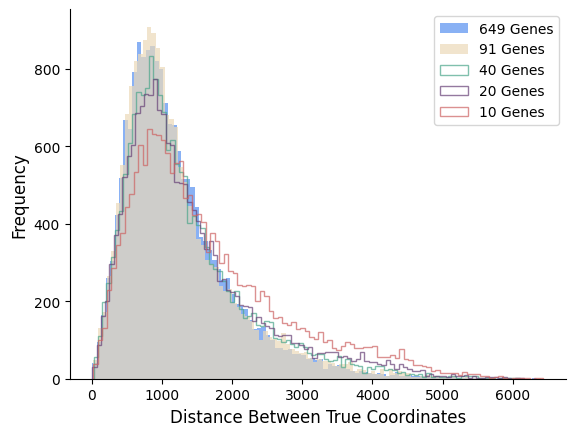

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.style.available

# 设置图形的整体风格（取消网格风格）
# plt.style.use('seaborn-white')

# 创建一个新的图形和坐标轴对象
fig, ax = plt.subplots()

# 样本数据（请替换为实际数据）
data0 = WKAN649result
data1 = WKAN91result
data2 = WKAN40result
data3 = WKAN20result
data4 = WKAN10result
# 绘制直方图
bins = 100  # 箱子的数量
alpha = 0.7  # 透明度

ax.hist(data0, bins=bins, alpha=alpha, label='649 Genes', color='#5790f0')
ax.hist(data1, bins=bins, alpha=alpha, label='91 Genes', color='#ecd9b9', histtype='stepfilled')
ax.hist(data2, bins=bins, alpha=alpha, label='40 Genes', color='#4ba68a', histtype='step')
ax.hist(data3, bins=bins, alpha=alpha, label='20 Genes', color='#674176', histtype='step')
ax.hist(data4, bins=bins, alpha=alpha, label='10 Genes', color='#cd6262', histtype='step')

# 设置标题和标签
# ax.set_title('Different Number of Genes', fontsize=14)
ax.set_xlabel('Distance Between True Coordinates', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# 添加图例
ax.legend(loc='upper right', fontsize=10)

# 隐藏网格线
ax.grid(False)

# 调整x轴和y轴的位置
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 确保 y 轴从 0 开始
ax.set_ylim(bottom=0)
# 保存图形
plt.savefig("Histogram_WKANresult", dpi=1300)

# 显示图形
plt.show()

In [91]:
d11 = pd.read_csv("data/mouse_brain/datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_cell_by_gene_S1R1.csv", index_col=0)   


In [93]:
d11_meta = pd.read_csv("data/mouse_brain/datasets_mouse_brain_map_BrainReceptorShowcase_Slice1_Replicate1_cell_metadata_S1R1.csv", index_col=0)


In [16]:
# Rdata_scenario2.write("MERFISHRdata_scenario2.h5ad")

In [ ]:
# 91genes

In [24]:
sc.pp.highly_variable_genes(Rdata_scenario2, n_top_genes=91)
Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

View of AnnData object with n_obs × n_vars = 8770 × 91
    obs: 'x_cord', 'y_cord'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'leiden', 'hvg'
    obsp: 'distances', 'connectivities'

In [25]:
Rdata_scenario2_HVG91= Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_left_HVG91 = d11_left[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_right_HVG91 = d11_right[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

In [21]:
model = Fit_cord_DNN (data_train = Rdata_scenario2_HVG91, 
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "DNN5_HVG91")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.33it/s]


Epoch:1, Loss:83.8020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.99it/s]


Epoch:2, Loss:65.6891


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.18it/s]


Epoch:3, Loss:59.4120


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.87it/s]


Epoch:4, Loss:54.3954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.31it/s]


Epoch:5, Loss:50.4484


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.09it/s]


Epoch:6, Loss:47.3981


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.66it/s]


Epoch:7, Loss:43.5380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.64it/s]


Epoch:8, Loss:40.7640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.31it/s]


Epoch:9, Loss:38.1667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.29it/s]


Epoch:10, Loss:36.0764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.69it/s]


Epoch:11, Loss:33.3657


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.90it/s]


Epoch:12, Loss:31.9673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.26it/s]


Epoch:13, Loss:29.8508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.64it/s]


Epoch:14, Loss:28.0291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.54it/s]


Epoch:15, Loss:27.3869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.66it/s]


Epoch:16, Loss:25.6843


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.95it/s]


Epoch:17, Loss:25.1479


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.55it/s]


Epoch:18, Loss:23.1785


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.67it/s]


Epoch:19, Loss:23.4525


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.23it/s]


Epoch:20, Loss:22.3913


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.99it/s]


Epoch:21, Loss:22.0165


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.78it/s]


Epoch:22, Loss:20.8744


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.90it/s]


Epoch:23, Loss:20.6004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.04it/s]


Epoch:24, Loss:19.8832


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.76it/s]


Epoch:25, Loss:19.4980


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.06it/s]


Epoch:26, Loss:19.7781


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.81it/s]


Epoch:27, Loss:18.8445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.91it/s]


Epoch:28, Loss:18.2085


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.25it/s]


Epoch:29, Loss:17.9764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.76it/s]


Epoch:30, Loss:18.4538


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.38it/s]


Epoch:31, Loss:18.4732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.35it/s]


Epoch:32, Loss:16.7444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.19it/s]


Epoch:33, Loss:16.8065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.55it/s]


Epoch:34, Loss:16.9636


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.01it/s]


Epoch:35, Loss:16.4276


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.64it/s]


Epoch:36, Loss:17.3623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.51it/s]


Epoch:37, Loss:15.7953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.52it/s]


Epoch:38, Loss:16.2551


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.71it/s]


Epoch:39, Loss:15.2260


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.06it/s]


Epoch:40, Loss:15.5134


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:41, Loss:15.2671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.81it/s]


Epoch:42, Loss:14.7680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.65it/s]


Epoch:43, Loss:15.9540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.08it/s]


Epoch:44, Loss:15.2241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.64it/s]


Epoch:45, Loss:15.4308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.94it/s]


Epoch:46, Loss:14.3815


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.70it/s]


Epoch:47, Loss:14.4763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.89it/s]


Epoch:48, Loss:15.2813
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.42it/s]


Epoch:49, Loss:10.1546


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.88it/s]


Epoch:50, Loss:8.4034


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.03it/s]


Epoch:51, Loss:7.8461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.36it/s]


Epoch:52, Loss:7.6009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.72it/s]


Epoch:53, Loss:7.3821


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.55it/s]


Epoch:54, Loss:6.9651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.63it/s]


Epoch:55, Loss:6.9668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.43it/s]


Epoch:56, Loss:7.1073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.55it/s]


Epoch:57, Loss:6.4225


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.52it/s]


Epoch:58, Loss:6.8214


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.88it/s]


Epoch:59, Loss:6.6096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.70it/s]


Epoch:60, Loss:6.6213


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.14it/s]


Epoch:61, Loss:6.3328


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.66it/s]


Epoch:62, Loss:6.6815


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.40it/s]


Epoch:63, Loss:6.2966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:64, Loss:6.4661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 543.49it/s]


Epoch:65, Loss:6.6336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.26it/s]


Epoch:66, Loss:5.9344


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.29it/s]


Epoch:67, Loss:6.2778


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.30it/s]


Epoch:68, Loss:6.0717


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.06it/s]


Epoch:69, Loss:6.3064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.22it/s]


Epoch:70, Loss:6.0768


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.22it/s]


Epoch:71, Loss:6.1818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.51it/s]


Epoch:72, Loss:5.9760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.65it/s]


Epoch:73, Loss:6.0631
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.09it/s]


Epoch:74, Loss:4.0601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.25it/s]


Epoch:75, Loss:3.2272


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.90it/s]


Epoch:76, Loss:3.1021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.43it/s]


Epoch:77, Loss:3.0278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.29it/s]


Epoch:78, Loss:3.0632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.63it/s]


Epoch:79, Loss:2.9914


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.39it/s]


Epoch:80, Loss:2.8206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.91it/s]


Epoch:81, Loss:2.9122


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.14it/s]


Epoch:82, Loss:2.7921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.17it/s]


Epoch:83, Loss:2.8885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.13it/s]


Epoch:84, Loss:2.8051


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.50it/s]


Epoch:85, Loss:2.7661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.03it/s]


Epoch:86, Loss:2.7106


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.22it/s]


Epoch:87, Loss:2.7481


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.27it/s]


Epoch:88, Loss:2.7517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.66it/s]


Epoch:89, Loss:2.8305


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.21it/s]


Epoch:90, Loss:2.7265


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.42it/s]


Epoch:91, Loss:2.8040


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.54it/s]


Epoch:92, Loss:2.7563


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.25it/s]


Epoch:93, Loss:2.7517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.58it/s]


Epoch:94, Loss:2.7327


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.41it/s]


Epoch:95, Loss:2.7783


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.97it/s]


Epoch:96, Loss:2.7908


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.55it/s]


Epoch:97, Loss:2.6795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.91it/s]


Epoch:98, Loss:2.7201
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.77it/s]


Epoch:99, Loss:2.0302


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.62it/s]


Epoch:100, Loss:1.4852


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 458.25it/s]


Epoch:101, Loss:1.4404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.35it/s]


Epoch:102, Loss:1.4628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.54it/s]


Epoch:103, Loss:1.4100


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 476.14it/s]


Epoch:104, Loss:1.3770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.61it/s]


Epoch:105, Loss:1.3841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.32it/s]


Epoch:106, Loss:1.3713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.08it/s]


Epoch:107, Loss:1.3564


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.24it/s]


Epoch:108, Loss:1.3471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 488.21it/s]


Epoch:109, Loss:1.3468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 479.33it/s]


Epoch:110, Loss:1.3435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.30it/s]


Epoch:111, Loss:1.3319


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.93it/s]


Epoch:112, Loss:1.3265


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.74it/s]


Epoch:113, Loss:1.2809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 489.79it/s]


Epoch:114, Loss:1.3200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 480.29it/s]


Epoch:115, Loss:1.3168


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.34it/s]


Epoch:116, Loss:1.3156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.23it/s]


Epoch:117, Loss:1.3312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.55it/s]


Epoch:118, Loss:1.2874


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 481.32it/s]


Epoch:119, Loss:1.2979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.88it/s]


Epoch:120, Loss:1.2911


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.93it/s]


Epoch:121, Loss:1.3132


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.26it/s]


Epoch:122, Loss:1.2958


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 481.99it/s]


Epoch:123, Loss:1.2994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.13it/s]


Epoch:124, Loss:1.2862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.25it/s]


Epoch:125, Loss:1.2809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.11it/s]


Epoch:126, Loss:1.3242


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.47it/s]


Epoch:127, Loss:1.2666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.89it/s]


Epoch:128, Loss:1.2818
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.69it/s]


Epoch:129, Loss:1.0189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.68it/s]


Epoch:130, Loss:0.7353


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.34it/s]


Epoch:131, Loss:0.7260


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.16it/s]


Epoch:132, Loss:0.7262


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.92it/s]


Epoch:133, Loss:0.7165


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.20it/s]


Epoch:134, Loss:0.7068


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.21it/s]


Epoch:135, Loss:0.7064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.69it/s]


Epoch:136, Loss:0.6862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 489.39it/s]


Epoch:137, Loss:0.6955


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.88it/s]


Epoch:138, Loss:0.6880


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.04it/s]


Epoch:139, Loss:0.6902


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.58it/s]


Epoch:140, Loss:0.6749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.11it/s]


Epoch:141, Loss:0.6784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.25it/s]


Epoch:142, Loss:0.6738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.46it/s]


Epoch:143, Loss:0.6856


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.03it/s]


Epoch:144, Loss:0.6730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.85it/s]


Epoch:145, Loss:0.6609


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.58it/s]


Epoch:146, Loss:0.6758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.84it/s]


Epoch:147, Loss:0.6687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.76it/s]


Epoch:148, Loss:0.6577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:149, Loss:0.6577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.18it/s]


Epoch:150, Loss:0.6648


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.70it/s]


Epoch:151, Loss:0.6481


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.13it/s]


Epoch:152, Loss:0.6564


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.59it/s]


Epoch:153, Loss:0.6579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.72it/s]


Epoch:154, Loss:0.6532


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.52it/s]


Epoch:155, Loss:0.6699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.99it/s]


Epoch:156, Loss:0.6324


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.16it/s]


Epoch:157, Loss:0.6404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.34it/s]


Epoch:158, Loss:0.6655
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.44it/s]


Epoch:159, Loss:0.5240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.63it/s]


Epoch:160, Loss:0.4261


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.97it/s]


Epoch:161, Loss:0.4197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.91it/s]


Epoch:162, Loss:0.4232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 482.41it/s]


Epoch:163, Loss:0.4210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.99it/s]


Epoch:164, Loss:0.4139


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.78it/s]


Epoch:165, Loss:0.4171


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.23it/s]


Epoch:166, Loss:0.4093


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.24it/s]


Epoch:167, Loss:0.4103


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.74it/s]


Epoch:168, Loss:0.4044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.29it/s]


Epoch:169, Loss:0.4008


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.98it/s]


Epoch:170, Loss:0.4085


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.14it/s]


Epoch:171, Loss:0.4024


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.43it/s]


Epoch:172, Loss:0.3986


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.78it/s]


Epoch:173, Loss:0.3978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.60it/s]


Epoch:174, Loss:0.4005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.99it/s]


Epoch:175, Loss:0.3932


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.14it/s]


Epoch:176, Loss:0.3929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.03it/s]


Epoch:177, Loss:0.3921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.99it/s]


Epoch:178, Loss:0.3951


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.41it/s]


Epoch:179, Loss:0.3874


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.60it/s]


Epoch:180, Loss:0.3875


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.28it/s]


Epoch:181, Loss:0.3887


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:182, Loss:0.3869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.22it/s]


Epoch:183, Loss:0.3828


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.11it/s]


Epoch:184, Loss:0.3829


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.90it/s]


Epoch:185, Loss:0.3855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.42it/s]


Epoch:186, Loss:0.3764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.74it/s]


Epoch:187, Loss:0.3834


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.68it/s]


Epoch:188, Loss:0.3831


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.37it/s]


Epoch:189, Loss:0.3821
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.94it/s]


Epoch:190, Loss:0.3288


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.76it/s]


Epoch:191, Loss:0.2921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.24it/s]


Epoch:192, Loss:0.2934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.43it/s]


Epoch:193, Loss:0.2933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.96it/s]


Epoch:194, Loss:0.2927


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 551.69it/s]


Epoch:195, Loss:0.2913


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 553.50it/s]


Epoch:196, Loss:0.2896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.95it/s]


Epoch:197, Loss:0.2887


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 551.41it/s]


Epoch:198, Loss:0.2868


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 563.02it/s]


Epoch:199, Loss:0.2861


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 560.15it/s]


Epoch:200, Loss:0.2845


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.63it/s]


Epoch:201, Loss:0.2849


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.15it/s]


Epoch:202, Loss:0.2836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.39it/s]


Epoch:203, Loss:0.2827


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.34it/s]


Epoch:204, Loss:0.2810


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.02it/s]


Epoch:205, Loss:0.2807


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.89it/s]


Epoch:206, Loss:0.2799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.76it/s]


Epoch:207, Loss:0.2786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.39it/s]


Epoch:208, Loss:0.2790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.50it/s]


Epoch:209, Loss:0.2771


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.52it/s]


Epoch:210, Loss:0.2756


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.65it/s]


Epoch:211, Loss:0.2749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:212, Loss:0.2729


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.02it/s]


Epoch:213, Loss:0.2728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.31it/s]


Epoch:214, Loss:0.2732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.52it/s]


Epoch:215, Loss:0.2742


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.76it/s]


Epoch:216, Loss:0.2690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.60it/s]


Epoch:217, Loss:0.2692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.02it/s]


Epoch:218, Loss:0.2709


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.19it/s]


Epoch:219, Loss:0.2703


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.38it/s]


Epoch:220, Loss:0.2678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.96it/s]


Epoch:221, Loss:0.2672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.96it/s]


Epoch:222, Loss:0.2667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.05it/s]


Epoch:223, Loss:0.2673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.26it/s]


Epoch:224, Loss:0.2652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:225, Loss:0.2645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:226, Loss:0.2630


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.97it/s]


Epoch:227, Loss:0.2636


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.53it/s]


Epoch:228, Loss:0.2633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.76it/s]


Epoch:229, Loss:0.2630


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.60it/s]


Epoch:230, Loss:0.2610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.14it/s]


Epoch:231, Loss:0.2608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.18it/s]


Epoch:232, Loss:0.2589


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.87it/s]


Epoch:233, Loss:0.2594


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.79it/s]


Epoch:234, Loss:0.2583


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.11it/s]


Epoch:235, Loss:0.2573


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.29it/s]


Epoch:236, Loss:0.2579
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.54it/s]


Epoch:237, Loss:0.2364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:238, Loss:0.2242


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:239, Loss:0.2238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:240, Loss:0.2245


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.46it/s]


Epoch:241, Loss:0.2235


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:242, Loss:0.2234


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.39it/s]


Epoch:243, Loss:0.2225


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.73it/s]


Epoch:244, Loss:0.2224


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.13it/s]


Epoch:245, Loss:0.2216


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.12it/s]


Epoch:246, Loss:0.2218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.65it/s]


Epoch:247, Loss:0.2210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.78it/s]


Epoch:248, Loss:0.2206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.15it/s]


Epoch:249, Loss:0.2204


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:250, Loss:0.2193


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.40it/s]


Epoch:251, Loss:0.2192


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.92it/s]


Epoch:252, Loss:0.2192


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:253, Loss:0.2186


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.64it/s]


Epoch:254, Loss:0.2178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.01it/s]


Epoch:255, Loss:0.2175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.79it/s]


Epoch:256, Loss:0.2180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.52it/s]


Epoch:257, Loss:0.2160


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.15it/s]


Epoch:258, Loss:0.2169


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.49it/s]


Epoch:259, Loss:0.2164


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.14it/s]


Epoch:260, Loss:0.2154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.28it/s]


Epoch:261, Loss:0.2166


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.35it/s]


Epoch:262, Loss:0.2148


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 554.62it/s]


Epoch:263, Loss:0.2146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 561.44it/s]


Epoch:264, Loss:0.2141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 556.36it/s]


Epoch:265, Loss:0.2130


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 554.16it/s]


Epoch:266, Loss:0.2133


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.76it/s]


Epoch:267, Loss:0.2125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.07it/s]


Epoch:268, Loss:0.2116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.20it/s]


Epoch:269, Loss:0.2123


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:270, Loss:0.2114


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.38it/s]


Epoch:271, Loss:0.2110


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:272, Loss:0.2114


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.03it/s]


Epoch:273, Loss:0.2098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.19it/s]


Epoch:274, Loss:0.2104


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:275, Loss:0.2098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:276, Loss:0.2098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.28it/s]


Epoch:277, Loss:0.2095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.39it/s]


Epoch:278, Loss:0.2087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.89it/s]


Epoch:279, Loss:0.2076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.28it/s]


Epoch:280, Loss:0.2078


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.44it/s]


Epoch:281, Loss:0.2078
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.25it/s]


Epoch:282, Loss:0.1975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.78it/s]


Epoch:283, Loss:0.1945


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.78it/s]


Epoch:284, Loss:0.1944


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.28it/s]


Epoch:285, Loss:0.1944


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.36it/s]


Epoch:286, Loss:0.1943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.74it/s]


Epoch:287, Loss:0.1940


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.95it/s]


Epoch:288, Loss:0.1936


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.19it/s]


Epoch:289, Loss:0.1938


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.78it/s]


Epoch:290, Loss:0.1934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.35it/s]


Epoch:291, Loss:0.1932


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.14it/s]


Epoch:292, Loss:0.1930


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.73it/s]


Epoch:293, Loss:0.1926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.50it/s]


Epoch:294, Loss:0.1928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.54it/s]


Epoch:295, Loss:0.1925


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.84it/s]


Epoch:296, Loss:0.1920


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.51it/s]


Epoch:297, Loss:0.1919


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.42it/s]


Epoch:298, Loss:0.1919


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.75it/s]


Epoch:299, Loss:0.1916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.32it/s]


Epoch:300, Loss:0.1916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.81it/s]


Epoch:301, Loss:0.1912


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.64it/s]


Epoch:302, Loss:0.1909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.37it/s]


Epoch:303, Loss:0.1908


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.29it/s]


Epoch:304, Loss:0.1906


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.87it/s]


Epoch:305, Loss:0.1904


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.04it/s]


Epoch:306, Loss:0.1904


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:307, Loss:0.1904


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.40it/s]


Epoch:308, Loss:0.1897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.90it/s]


Epoch:309, Loss:0.1896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.80it/s]


Epoch:310, Loss:0.1896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.39it/s]


Epoch:311, Loss:0.1892


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.38it/s]


Epoch:312, Loss:0.1894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.13it/s]


Epoch:313, Loss:0.1890


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.91it/s]


Epoch:314, Loss:0.1883


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.84it/s]


Epoch:315, Loss:0.1885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:316, Loss:0.1883


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.76it/s]


Epoch:317, Loss:0.1881


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.54it/s]


Epoch:318, Loss:0.1875


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.49it/s]


Epoch:319, Loss:0.1880


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.72it/s]


Epoch:320, Loss:0.1875


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.54it/s]


Epoch:321, Loss:0.1872


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.86it/s]


Epoch:322, Loss:0.1869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.15it/s]


Epoch:323, Loss:0.1868


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 553.08it/s]


Epoch:324, Loss:0.1865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 555.61it/s]


Epoch:325, Loss:0.1863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 560.00it/s]


Epoch:326, Loss:0.1863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 543.62it/s]


Epoch:327, Loss:0.1860


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 557.43it/s]


Epoch:328, Loss:0.1859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 557.79it/s]


Epoch:329, Loss:0.1856


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.23it/s]


Epoch:330, Loss:0.1853


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 545.79it/s]


Epoch:331, Loss:0.1850


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.29it/s]


Epoch:332, Loss:0.1850


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.95it/s]


Epoch:333, Loss:0.1847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 552.66it/s]


Epoch:334, Loss:0.1848


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.03it/s]


Epoch:335, Loss:0.1846


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 555.89it/s]


Epoch:336, Loss:0.1842


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.48it/s]


Epoch:337, Loss:0.1841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.51it/s]


Epoch:338, Loss:0.1839


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.63it/s]


Epoch:339, Loss:0.1836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.18it/s]


Epoch:340, Loss:0.1836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.78it/s]


Epoch:341, Loss:0.1832


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.76it/s]


Epoch:342, Loss:0.1833


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.83it/s]


Epoch:343, Loss:0.1830


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:344, Loss:0.1825


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.39it/s]


Epoch:345, Loss:0.1825


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.40it/s]


Epoch:346, Loss:0.1826


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.22it/s]


Epoch:347, Loss:0.1820


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.39it/s]


Epoch:348, Loss:0.1820


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.38it/s]


Epoch:349, Loss:0.1818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.76it/s]


Epoch:350, Loss:0.1816


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.90it/s]


Epoch:351, Loss:0.1815


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.27it/s]


Epoch:352, Loss:0.1809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.26it/s]


Epoch:353, Loss:0.1811


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.87it/s]


Epoch:354, Loss:0.1806


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.27it/s]


Epoch:355, Loss:0.1806
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.42it/s]


Epoch:356, Loss:0.1757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.83it/s]


Epoch:357, Loss:0.1750


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.01it/s]


Epoch:358, Loss:0.1749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.03it/s]


Epoch:359, Loss:0.1750


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:360, Loss:0.1748


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.98it/s]


Epoch:361, Loss:0.1745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.70it/s]


Epoch:362, Loss:0.1746


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.99it/s]


Epoch:363, Loss:0.1745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.77it/s]


Epoch:364, Loss:0.1745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.86it/s]


Epoch:365, Loss:0.1744


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.02it/s]


Epoch:366, Loss:0.1743


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.12it/s]


Epoch:367, Loss:0.1741


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.45it/s]


Epoch:368, Loss:0.1741


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.13it/s]


Epoch:369, Loss:0.1741


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.06it/s]


Epoch:370, Loss:0.1739


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.66it/s]


Epoch:371, Loss:0.1738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.46it/s]


Epoch:372, Loss:0.1739


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.86it/s]


Epoch:373, Loss:0.1741


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.70it/s]


Epoch:374, Loss:0.1736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.92it/s]


Epoch:375, Loss:0.1735


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:376, Loss:0.1732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:377, Loss:0.1736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.16it/s]


Epoch:378, Loss:0.1732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.65it/s]


Epoch:379, Loss:0.1733


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.53it/s]


Epoch:380, Loss:0.1731


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.76it/s]


Epoch:381, Loss:0.1731


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.63it/s]


Epoch:382, Loss:0.1729


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.26it/s]


Epoch:383, Loss:0.1728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.02it/s]


Epoch:384, Loss:0.1730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.17it/s]


Epoch:385, Loss:0.1727


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:386, Loss:0.1725


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.15it/s]


Epoch:387, Loss:0.1725


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:388, Loss:0.1723


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.90it/s]


Epoch:389, Loss:0.1723


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.46it/s]


Epoch:390, Loss:0.1723


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:391, Loss:0.1722


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.85it/s]


Epoch:392, Loss:0.1722


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.74it/s]


Epoch:393, Loss:0.1719


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.40it/s]


Epoch:394, Loss:0.1720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:395, Loss:0.1718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:396, Loss:0.1716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.27it/s]


Epoch:397, Loss:0.1716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 557.16it/s]


Epoch:398, Loss:0.1715


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.23it/s]


Epoch:399, Loss:0.1714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 544.16it/s]


Epoch:400, Loss:0.1714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 551.00it/s]


Epoch:401, Loss:0.1711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 552.58it/s]


Epoch:402, Loss:0.1713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.88it/s]


Epoch:403, Loss:0.1711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.76it/s]


Epoch:404, Loss:0.1710


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.94it/s]


Epoch:405, Loss:0.1707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.72it/s]


Epoch:406, Loss:0.1706


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.76it/s]


Epoch:407, Loss:0.1707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.17it/s]


Epoch:408, Loss:0.1705


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.46it/s]


Epoch:409, Loss:0.1704


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.16it/s]


Epoch:410, Loss:0.1704


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.98it/s]


Epoch:411, Loss:0.1702


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:412, Loss:0.1703
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.05it/s]


Epoch:413, Loss:0.1676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.26it/s]


Epoch:414, Loss:0.1675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.31it/s]


Epoch:415, Loss:0.1673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.43it/s]


Epoch:416, Loss:0.1673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.39it/s]


Epoch:417, Loss:0.1674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.06it/s]


Epoch:418, Loss:0.1672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.15it/s]


Epoch:419, Loss:0.1672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.94it/s]


Epoch:420, Loss:0.1671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.09it/s]


Epoch:421, Loss:0.1672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.98it/s]


Epoch:422, Loss:0.1672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.64it/s]


Epoch:423, Loss:0.1672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.73it/s]


Epoch:424, Loss:0.1674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.18it/s]


Epoch:425, Loss:0.1671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.64it/s]


Epoch:426, Loss:0.1670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.63it/s]


Epoch:427, Loss:0.1670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.31it/s]


Epoch:428, Loss:0.1670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.14it/s]


Epoch:429, Loss:0.1669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.27it/s]


Epoch:430, Loss:0.1668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.65it/s]


Epoch:431, Loss:0.1669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.96it/s]


Epoch:432, Loss:0.1668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.66it/s]


Epoch:433, Loss:0.1668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.64it/s]


Epoch:434, Loss:0.1667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.96it/s]


Epoch:435, Loss:0.1666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.50it/s]


Epoch:436, Loss:0.1666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.31it/s]


Epoch:437, Loss:0.1666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.53it/s]


Epoch:438, Loss:0.1666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.36it/s]


Epoch:439, Loss:0.1666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.21it/s]


Epoch:440, Loss:0.1665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.87it/s]


Epoch:441, Loss:0.1664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:442, Loss:0.1664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.24it/s]


Epoch:443, Loss:0.1663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.66it/s]


Epoch:444, Loss:0.1663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.02it/s]


Epoch:445, Loss:0.1662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.64it/s]


Epoch:446, Loss:0.1663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.28it/s]


Epoch:447, Loss:0.1662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.31it/s]


Epoch:448, Loss:0.1661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.35it/s]


Epoch:449, Loss:0.1663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.09it/s]


Epoch:450, Loss:0.1660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.40it/s]


Epoch:451, Loss:0.1660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.14it/s]


Epoch:452, Loss:0.1660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.16it/s]


Epoch:453, Loss:0.1659


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:454, Loss:0.1659


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.45it/s]


Epoch:455, Loss:0.1659


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.26it/s]


Epoch:456, Loss:0.1662
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.67it/s]


Epoch:457, Loss:0.1647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 485.48it/s]


Epoch:458, Loss:0.1644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.66it/s]


Epoch:459, Loss:0.1645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 478.01it/s]


Epoch:460, Loss:0.1647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.89it/s]


Epoch:461, Loss:0.1644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:462, Loss:0.1643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.66it/s]


Epoch:463, Loss:0.1643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.80it/s]


Epoch:464, Loss:0.1643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.19it/s]


Epoch:465, Loss:0.1643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.56it/s]


Epoch:466, Loss:0.1644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.43it/s]


Epoch:467, Loss:0.1642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.83it/s]


Epoch:468, Loss:0.1642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.01it/s]


Epoch:469, Loss:0.1642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.35it/s]


Epoch:470, Loss:0.1642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.68it/s]


Epoch:471, Loss:0.1642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.70it/s]


Epoch:472, Loss:0.1641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 562.74it/s]


Epoch:473, Loss:0.1642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 550.80it/s]


Epoch:474, Loss:0.1641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 555.61it/s]


Epoch:475, Loss:0.1641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.28it/s]


Epoch:476, Loss:0.1642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.19it/s]


Epoch:477, Loss:0.1642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.81it/s]


Epoch:478, Loss:0.1641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.58it/s]


Epoch:479, Loss:0.1640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 544.43it/s]


Epoch:480, Loss:0.1642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.61it/s]


Epoch:481, Loss:0.1641
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.64it/s]


Epoch:482, Loss:0.1633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.23it/s]


Epoch:483, Loss:0.1633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.34it/s]


Epoch:484, Loss:0.1633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.94it/s]


Epoch:485, Loss:0.1633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.17it/s]


Epoch:486, Loss:0.1633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.94it/s]


Epoch:487, Loss:0.1633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.42it/s]


Epoch:488, Loss:0.1633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.09it/s]


Epoch:489, Loss:0.1633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.23it/s]


Epoch:490, Loss:0.1633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.74it/s]


Epoch:491, Loss:0.1632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.40it/s]


Epoch:492, Loss:0.1632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.58it/s]


Epoch:493, Loss:0.1632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:494, Loss:0.1632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.98it/s]


Epoch:495, Loss:0.1632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.92it/s]


Epoch:496, Loss:0.1632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.10it/s]


Epoch:497, Loss:0.1632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.60it/s]


Epoch:498, Loss:0.1632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.22it/s]


Epoch:499, Loss:0.1632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.92it/s]


Epoch:500, Loss:0.1632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.25it/s]


Epoch:501, Loss:0.1632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.67it/s]


Epoch:502, Loss:0.1631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.48it/s]


Epoch:503, Loss:0.1631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.92it/s]


Epoch:504, Loss:0.1631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.56it/s]


Epoch:505, Loss:0.1632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.96it/s]


Epoch:506, Loss:0.1631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.03it/s]


Epoch:507, Loss:0.1631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.61it/s]


Epoch:508, Loss:0.1631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.66it/s]


Epoch:509, Loss:0.1631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.53it/s]


Epoch:510, Loss:0.1631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.13it/s]


Epoch:511, Loss:0.1631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.09it/s]


Epoch:512, Loss:0.1631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.88it/s]


Epoch:513, Loss:0.1631
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.76it/s]


Epoch:514, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:515, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.70it/s]


Epoch:516, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.89it/s]


Epoch:517, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.03it/s]


Epoch:518, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:519, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.39it/s]


Epoch:520, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:521, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.58it/s]


Epoch:522, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.03it/s]


Epoch:523, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.05it/s]


Epoch:524, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.27it/s]


Epoch:525, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:526, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.40it/s]


Epoch:527, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.09it/s]


Epoch:528, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.98it/s]


Epoch:529, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:530, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.20it/s]


Epoch:531, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.70it/s]


Epoch:532, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.23it/s]


Epoch:533, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 552.25it/s]


Epoch:534, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 550.45it/s]


Epoch:535, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 541.74it/s]


Epoch:536, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.48it/s]


Epoch:537, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 543.49it/s]


Epoch:538, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.13it/s]

Epoch:539, Loss:0.1626
New learning rate:6.103515625e-08
Folder already exists


In [47]:
Coordinate_Distance_Result(d11, d11_left = d11_left_HVG91, #
                           d11_right = d11_right_HVG91,#
                           data_train = Rdata_scenario2_HVG91, #
                           path = "output/DNN_MERFISH", filename = "DNN5_HVG91" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_HVG91_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_HVG91_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2352.12it/s]


PearsonRResult(statistic=np.float64(0.37825171227975335), pvalue=np.float64(0.0))
1346.5194571488746
1592.000237807303


array([ 806.98900982, 1494.88831256, 2164.71191523, ..., 3781.31667438,
       2950.90594689, 1117.71403382])

In [ ]:
# 40genes

In [26]:
sc.pp.highly_variable_genes(Rdata_scenario2, n_top_genes=40)
Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

View of AnnData object with n_obs × n_vars = 8770 × 40
    obs: 'x_cord', 'y_cord'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'leiden', 'hvg'
    obsp: 'distances', 'connectivities'

In [27]:
Rdata_scenario2_HVG40= Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

In [28]:
Rdata_scenario2_HVG40= Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_left_HVG40 = d11_left[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_right_HVG40 = d11_right[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

In [24]:
model = Fit_cord_DNN (data_train = Rdata_scenario2_HVG40, 
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "DNN5_HVG40")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.46it/s]


Epoch:1, Loss:94.5821


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.17it/s]


Epoch:2, Loss:80.1238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:3, Loss:76.7582


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:4, Loss:73.7102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:5, Loss:72.3001


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.43it/s]


Epoch:6, Loss:70.5297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.36it/s]


Epoch:7, Loss:68.4343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.62it/s]


Epoch:8, Loss:66.9422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.36it/s]


Epoch:9, Loss:65.7711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.42it/s]


Epoch:10, Loss:64.3236


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.70it/s]


Epoch:11, Loss:63.9855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.27it/s]


Epoch:12, Loss:62.6147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.52it/s]


Epoch:13, Loss:61.2694


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.66it/s]


Epoch:14, Loss:60.5128


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:15, Loss:59.3501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.78it/s]


Epoch:16, Loss:58.3742


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.16it/s]


Epoch:17, Loss:57.2342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.52it/s]


Epoch:18, Loss:56.5895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.57it/s]


Epoch:19, Loss:55.8144


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.27it/s]


Epoch:20, Loss:54.6071


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.64it/s]


Epoch:21, Loss:53.9529


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.38it/s]


Epoch:22, Loss:52.8680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.26it/s]


Epoch:23, Loss:52.1571


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.84it/s]


Epoch:24, Loss:51.3050


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.95it/s]


Epoch:25, Loss:50.6191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.61it/s]


Epoch:26, Loss:50.1363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.78it/s]


Epoch:27, Loss:49.2139


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.75it/s]


Epoch:28, Loss:48.6770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.27it/s]


Epoch:29, Loss:47.7949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.67it/s]


Epoch:30, Loss:47.0429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.63it/s]


Epoch:31, Loss:45.8769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.53it/s]


Epoch:32, Loss:46.2552


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.15it/s]


Epoch:33, Loss:45.1049


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.02it/s]


Epoch:34, Loss:44.6963


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.02it/s]


Epoch:35, Loss:43.8491


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.76it/s]


Epoch:36, Loss:43.2362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.76it/s]


Epoch:37, Loss:42.8125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.52it/s]


Epoch:38, Loss:42.1842


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.41it/s]


Epoch:39, Loss:41.5123


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.14it/s]


Epoch:40, Loss:41.1334


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.58it/s]


Epoch:41, Loss:40.5945


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.88it/s]


Epoch:42, Loss:39.9248


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.83it/s]


Epoch:43, Loss:40.1024


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.18it/s]


Epoch:44, Loss:39.1385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 484.08it/s]


Epoch:45, Loss:39.5159


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.95it/s]


Epoch:46, Loss:38.6358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 484.53it/s]


Epoch:47, Loss:38.8793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.75it/s]


Epoch:48, Loss:37.7218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.98it/s]


Epoch:49, Loss:37.3445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.64it/s]


Epoch:50, Loss:37.2589


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.81it/s]


Epoch:51, Loss:37.0521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.71it/s]


Epoch:52, Loss:36.3465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.63it/s]


Epoch:53, Loss:35.5109


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.93it/s]


Epoch:54, Loss:36.1959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.33it/s]


Epoch:55, Loss:35.5564


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.43it/s]


Epoch:56, Loss:35.2569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.08it/s]


Epoch:57, Loss:35.1102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.94it/s]


Epoch:58, Loss:34.1845


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.24it/s]


Epoch:59, Loss:34.3668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.30it/s]


Epoch:60, Loss:34.0330


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.41it/s]


Epoch:61, Loss:33.3718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 545.11it/s]


Epoch:62, Loss:34.2178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 547.70it/s]


Epoch:63, Loss:33.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 551.00it/s]


Epoch:64, Loss:32.4429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.36it/s]


Epoch:65, Loss:33.5362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.76it/s]


Epoch:66, Loss:32.1305


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.83it/s]


Epoch:67, Loss:32.3354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.37it/s]


Epoch:68, Loss:32.0960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.57it/s]


Epoch:69, Loss:32.4481


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.22it/s]


Epoch:70, Loss:31.7510


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.77it/s]


Epoch:71, Loss:31.9060


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:72, Loss:30.8033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.17it/s]


Epoch:73, Loss:31.8948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.59it/s]


Epoch:74, Loss:30.9450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.65it/s]


Epoch:75, Loss:30.4605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.38it/s]


Epoch:76, Loss:29.9692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 477.25it/s]


Epoch:77, Loss:30.7455
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.67it/s]


Epoch:78, Loss:24.3207


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:79, Loss:21.7572


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.76it/s]


Epoch:80, Loss:21.4184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.40it/s]


Epoch:81, Loss:20.9081


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.03it/s]


Epoch:82, Loss:20.0584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.30it/s]


Epoch:83, Loss:20.0599


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:84, Loss:19.6505


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.22it/s]


Epoch:85, Loss:19.6110


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.34it/s]


Epoch:86, Loss:19.2649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.63it/s]


Epoch:87, Loss:18.9454


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.40it/s]


Epoch:88, Loss:19.1435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.28it/s]


Epoch:89, Loss:18.6240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.00it/s]


Epoch:90, Loss:18.4694


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.97it/s]


Epoch:91, Loss:18.5718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.66it/s]


Epoch:92, Loss:18.3402


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.90it/s]


Epoch:93, Loss:18.0850


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.06it/s]


Epoch:94, Loss:18.0895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.26it/s]


Epoch:95, Loss:17.5768


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.79it/s]


Epoch:96, Loss:17.6408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.03it/s]


Epoch:97, Loss:17.6215


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.15it/s]


Epoch:98, Loss:17.6133


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:99, Loss:17.4271


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.25it/s]


Epoch:100, Loss:17.1574


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.47it/s]


Epoch:101, Loss:17.2711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.95it/s]


Epoch:102, Loss:16.7423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.24it/s]


Epoch:103, Loss:17.2972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.00it/s]


Epoch:104, Loss:16.7818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.25it/s]


Epoch:105, Loss:16.6012


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.55it/s]


Epoch:106, Loss:16.7551


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.29it/s]


Epoch:107, Loss:16.9737


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.73it/s]


Epoch:108, Loss:16.5585


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.25it/s]


Epoch:109, Loss:16.4352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 489.50it/s]


Epoch:110, Loss:16.3906


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.36it/s]


Epoch:111, Loss:16.4467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.88it/s]


Epoch:112, Loss:16.1723


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.51it/s]


Epoch:113, Loss:16.3197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.87it/s]


Epoch:114, Loss:16.6498
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.66it/s]


Epoch:115, Loss:12.9661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.79it/s]


Epoch:116, Loss:11.9159


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.89it/s]


Epoch:117, Loss:11.7416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.38it/s]


Epoch:118, Loss:11.4698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 447.09it/s]


Epoch:119, Loss:11.2484


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 394.21it/s]


Epoch:120, Loss:11.1114


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 459.84it/s]


Epoch:121, Loss:10.9619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.25it/s]


Epoch:122, Loss:10.8992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.03it/s]


Epoch:123, Loss:10.7695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.77it/s]


Epoch:124, Loss:10.6199


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.71it/s]


Epoch:125, Loss:10.6482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.49it/s]


Epoch:126, Loss:10.5207


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.80it/s]


Epoch:127, Loss:10.5493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.60it/s]


Epoch:128, Loss:10.3621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.74it/s]


Epoch:129, Loss:10.3340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.81it/s]


Epoch:130, Loss:10.1990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.51it/s]


Epoch:131, Loss:10.1506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:132, Loss:10.2278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 479.70it/s]


Epoch:133, Loss:10.0276


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.23it/s]


Epoch:134, Loss:9.9504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.51it/s]


Epoch:135, Loss:9.9252


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.86it/s]


Epoch:136, Loss:9.8547


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.92it/s]


Epoch:137, Loss:9.9089


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.55it/s]


Epoch:138, Loss:9.7739


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:139, Loss:9.7533


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.23it/s]


Epoch:140, Loss:9.6185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.06it/s]


Epoch:141, Loss:9.5766


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.89it/s]


Epoch:142, Loss:9.5953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.40it/s]


Epoch:143, Loss:9.5126


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.29it/s]


Epoch:144, Loss:9.5342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.67it/s]


Epoch:145, Loss:9.4873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.13it/s]


Epoch:146, Loss:9.5067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.15it/s]


Epoch:147, Loss:9.3499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.16it/s]


Epoch:148, Loss:9.2603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.78it/s]


Epoch:149, Loss:9.3185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:150, Loss:9.3474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.76it/s]


Epoch:151, Loss:9.2736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.29it/s]


Epoch:152, Loss:9.0511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:153, Loss:9.2544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.21it/s]


Epoch:154, Loss:9.1072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.90it/s]


Epoch:155, Loss:9.0643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.36it/s]


Epoch:156, Loss:9.0460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.41it/s]


Epoch:157, Loss:8.9885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.31it/s]


Epoch:158, Loss:8.9213


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.41it/s]


Epoch:159, Loss:8.9541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.92it/s]


Epoch:160, Loss:8.9580
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.94it/s]


Epoch:161, Loss:7.3716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.42it/s]


Epoch:162, Loss:6.8113


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.03it/s]


Epoch:163, Loss:6.7903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.13it/s]


Epoch:164, Loss:6.6640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.07it/s]


Epoch:165, Loss:6.5722


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.90it/s]


Epoch:166, Loss:6.4771


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.22it/s]


Epoch:167, Loss:6.4824


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.29it/s]


Epoch:168, Loss:6.3558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.03it/s]


Epoch:169, Loss:6.3873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.90it/s]


Epoch:170, Loss:6.3183


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:171, Loss:6.3424


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.17it/s]


Epoch:172, Loss:6.2077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.19it/s]


Epoch:173, Loss:6.2145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.91it/s]


Epoch:174, Loss:6.2040


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:175, Loss:6.1546


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:176, Loss:6.0832


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.63it/s]


Epoch:177, Loss:6.0513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.61it/s]


Epoch:178, Loss:6.0463


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.01it/s]


Epoch:179, Loss:6.0197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.93it/s]


Epoch:180, Loss:6.0066


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.82it/s]


Epoch:181, Loss:5.9560


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.31it/s]


Epoch:182, Loss:5.9090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.47it/s]


Epoch:183, Loss:5.8728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.14it/s]


Epoch:184, Loss:5.8422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.03it/s]


Epoch:185, Loss:5.7869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.09it/s]


Epoch:186, Loss:5.8499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.79it/s]


Epoch:187, Loss:5.7752


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.27it/s]


Epoch:188, Loss:5.7482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.30it/s]


Epoch:189, Loss:5.7216


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.46it/s]


Epoch:190, Loss:5.7401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.76it/s]


Epoch:191, Loss:5.6997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.92it/s]


Epoch:192, Loss:5.6615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.92it/s]


Epoch:193, Loss:5.6829


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.47it/s]


Epoch:194, Loss:5.5526


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.09it/s]


Epoch:195, Loss:5.5792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.89it/s]


Epoch:196, Loss:5.5890


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.51it/s]


Epoch:197, Loss:5.5840


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.39it/s]


Epoch:198, Loss:5.5545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.13it/s]


Epoch:199, Loss:5.5457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.07it/s]


Epoch:200, Loss:5.4923


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.07it/s]


Epoch:201, Loss:5.5433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.18it/s]


Epoch:202, Loss:5.4604


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.37it/s]


Epoch:203, Loss:5.4015


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 547.56it/s]


Epoch:204, Loss:5.4753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.72it/s]


Epoch:205, Loss:5.4164


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 550.45it/s]


Epoch:206, Loss:5.3597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.61it/s]


Epoch:207, Loss:5.3807
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.66it/s]


Epoch:208, Loss:4.7077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.51it/s]


Epoch:209, Loss:4.4554


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.40it/s]


Epoch:210, Loss:4.3844


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:211, Loss:4.3524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 548.24it/s]


Epoch:212, Loss:4.3747


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.99it/s]


Epoch:213, Loss:4.3020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:214, Loss:4.2932


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.40it/s]


Epoch:215, Loss:4.2841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.43it/s]


Epoch:216, Loss:4.2469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.06it/s]


Epoch:217, Loss:4.2403


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.21it/s]


Epoch:218, Loss:4.2466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.29it/s]


Epoch:219, Loss:4.2087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.67it/s]


Epoch:220, Loss:4.1811


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.76it/s]


Epoch:221, Loss:4.1846


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.91it/s]


Epoch:222, Loss:4.1403


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.15it/s]


Epoch:223, Loss:4.1792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.66it/s]


Epoch:224, Loss:4.1164


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.82it/s]


Epoch:225, Loss:4.1071


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 548.79it/s]


Epoch:226, Loss:4.1189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 548.11it/s]


Epoch:227, Loss:4.1070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.85it/s]


Epoch:228, Loss:4.0597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 548.79it/s]


Epoch:229, Loss:4.0549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 550.72it/s]


Epoch:230, Loss:4.0663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.66it/s]


Epoch:231, Loss:4.0407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.95it/s]


Epoch:232, Loss:4.0061


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.24it/s]


Epoch:233, Loss:4.0141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.17it/s]


Epoch:234, Loss:3.9935


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.03it/s]


Epoch:235, Loss:3.9862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.14it/s]


Epoch:236, Loss:3.9689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.34it/s]


Epoch:237, Loss:3.9592


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:238, Loss:3.9609


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.86it/s]


Epoch:239, Loss:3.9526


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.13it/s]


Epoch:240, Loss:3.9079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.29it/s]


Epoch:241, Loss:3.9155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.17it/s]


Epoch:242, Loss:3.9009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.92it/s]


Epoch:243, Loss:3.9100


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.06it/s]


Epoch:244, Loss:3.8840


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.86it/s]


Epoch:245, Loss:3.8689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.58it/s]


Epoch:246, Loss:3.8737


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.21it/s]


Epoch:247, Loss:3.8519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.23it/s]


Epoch:248, Loss:3.8246


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.13it/s]


Epoch:249, Loss:3.8546


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.57it/s]


Epoch:250, Loss:3.8355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.04it/s]


Epoch:251, Loss:3.7952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.78it/s]


Epoch:252, Loss:3.7889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.90it/s]


Epoch:253, Loss:3.7772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.93it/s]


Epoch:254, Loss:3.8020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:255, Loss:3.7635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 480.01it/s]


Epoch:256, Loss:3.7496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.28it/s]


Epoch:257, Loss:3.7657
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.89it/s]


Epoch:258, Loss:3.4407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.54it/s]


Epoch:259, Loss:3.3445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.70it/s]


Epoch:260, Loss:3.3324


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.44it/s]


Epoch:261, Loss:3.3151


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:262, Loss:3.3125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 486.68it/s]


Epoch:263, Loss:3.2888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:264, Loss:3.2902


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.90it/s]


Epoch:265, Loss:3.2861


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.37it/s]


Epoch:266, Loss:3.2651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.87it/s]


Epoch:267, Loss:3.2653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.12it/s]


Epoch:268, Loss:3.2557


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.88it/s]


Epoch:269, Loss:3.2506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.34it/s]


Epoch:270, Loss:3.2373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.51it/s]


Epoch:271, Loss:3.2377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.99it/s]


Epoch:272, Loss:3.2288


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.17it/s]


Epoch:273, Loss:3.2255


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.74it/s]


Epoch:274, Loss:3.1932


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.98it/s]


Epoch:275, Loss:3.2086


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.91it/s]


Epoch:276, Loss:3.1890


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.09it/s]


Epoch:277, Loss:3.1930


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.00it/s]


Epoch:278, Loss:3.1916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.39it/s]


Epoch:279, Loss:3.1818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.47it/s]


Epoch:280, Loss:3.1688


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.99it/s]


Epoch:281, Loss:3.1637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.93it/s]


Epoch:282, Loss:3.1652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.33it/s]


Epoch:283, Loss:3.1418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.59it/s]


Epoch:284, Loss:3.1569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:285, Loss:3.1344


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.74it/s]


Epoch:286, Loss:3.1224


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.90it/s]


Epoch:287, Loss:3.1208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.05it/s]


Epoch:288, Loss:3.1179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.18it/s]


Epoch:289, Loss:3.1143


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:290, Loss:3.1107


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.14it/s]


Epoch:291, Loss:3.0954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.71it/s]


Epoch:292, Loss:3.0979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.89it/s]


Epoch:293, Loss:3.0744


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.44it/s]


Epoch:294, Loss:3.0854


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.39it/s]


Epoch:295, Loss:3.0708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.13it/s]


Epoch:296, Loss:3.0786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.47it/s]


Epoch:297, Loss:3.0564


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.26it/s]


Epoch:298, Loss:3.0528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.07it/s]


Epoch:299, Loss:3.0392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.53it/s]


Epoch:300, Loss:3.0428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.95it/s]


Epoch:301, Loss:3.0440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.35it/s]


Epoch:302, Loss:3.0138


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.85it/s]


Epoch:303, Loss:3.0190


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.84it/s]


Epoch:304, Loss:3.0205
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.27it/s]


Epoch:305, Loss:2.8796


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.28it/s]


Epoch:306, Loss:2.8378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.09it/s]


Epoch:307, Loss:2.8375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.81it/s]


Epoch:308, Loss:2.8337


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 488.08it/s]


Epoch:309, Loss:2.8296


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.49it/s]


Epoch:310, Loss:2.8180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.78it/s]


Epoch:311, Loss:2.8226


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.41it/s]


Epoch:312, Loss:2.8093


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.62it/s]


Epoch:313, Loss:2.8132


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.43it/s]


Epoch:314, Loss:2.8080


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.65it/s]


Epoch:315, Loss:2.8002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.13it/s]


Epoch:316, Loss:2.8008


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.06it/s]


Epoch:317, Loss:2.7951


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.44it/s]


Epoch:318, Loss:2.7982


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.15it/s]


Epoch:319, Loss:2.7921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:320, Loss:2.7858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.47it/s]


Epoch:321, Loss:2.7834


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.23it/s]


Epoch:322, Loss:2.7788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.39it/s]


Epoch:323, Loss:2.7761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.07it/s]


Epoch:324, Loss:2.7745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.61it/s]


Epoch:325, Loss:2.7711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.44it/s]


Epoch:326, Loss:2.7636


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.13it/s]


Epoch:327, Loss:2.7615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.58it/s]


Epoch:328, Loss:2.7592


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.12it/s]


Epoch:329, Loss:2.7584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.87it/s]


Epoch:330, Loss:2.7563


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.30it/s]


Epoch:331, Loss:2.7426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.13it/s]


Epoch:332, Loss:2.7453


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.68it/s]


Epoch:333, Loss:2.7408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.14it/s]


Epoch:334, Loss:2.7384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.97it/s]


Epoch:335, Loss:2.7449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 545.11it/s]


Epoch:336, Loss:2.7323


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 552.25it/s]


Epoch:337, Loss:2.7275


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.88it/s]


Epoch:338, Loss:2.7278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 543.35it/s]


Epoch:339, Loss:2.7315


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.66it/s]


Epoch:340, Loss:2.7169


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.77it/s]


Epoch:341, Loss:2.7178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.88it/s]


Epoch:342, Loss:2.7228


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.45it/s]


Epoch:343, Loss:2.7149


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.40it/s]


Epoch:344, Loss:2.7085


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.30it/s]


Epoch:345, Loss:2.7044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.50it/s]


Epoch:346, Loss:2.7059


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.44it/s]


Epoch:347, Loss:2.7003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.24it/s]


Epoch:348, Loss:2.6989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 485.18it/s]


Epoch:349, Loss:2.6954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.63it/s]


Epoch:350, Loss:2.6898


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.53it/s]


Epoch:351, Loss:2.6852


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.21it/s]


Epoch:352, Loss:2.6897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.53it/s]


Epoch:353, Loss:2.6713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.29it/s]


Epoch:354, Loss:2.6843


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.55it/s]


Epoch:355, Loss:2.6792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.60it/s]


Epoch:356, Loss:2.6736
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.80it/s]


Epoch:357, Loss:2.6036


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.30it/s]


Epoch:358, Loss:2.5886


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.13it/s]


Epoch:359, Loss:2.5918


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.58it/s]


Epoch:360, Loss:2.5885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.17it/s]


Epoch:361, Loss:2.5865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 548.92it/s]


Epoch:362, Loss:2.5800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.12it/s]


Epoch:363, Loss:2.5819


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 543.47it/s]


Epoch:364, Loss:2.5774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.29it/s]


Epoch:365, Loss:2.5760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.54it/s]


Epoch:366, Loss:2.5770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:367, Loss:2.5726


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.24it/s]


Epoch:368, Loss:2.5724


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.81it/s]


Epoch:369, Loss:2.5698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.05it/s]


Epoch:370, Loss:2.5710


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.50it/s]


Epoch:371, Loss:2.5667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.78it/s]


Epoch:372, Loss:2.5684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.27it/s]


Epoch:373, Loss:2.5652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.57it/s]


Epoch:374, Loss:2.5615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.32it/s]


Epoch:375, Loss:2.5628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.53it/s]


Epoch:376, Loss:2.5577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.15it/s]


Epoch:377, Loss:2.5596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.75it/s]


Epoch:378, Loss:2.5563


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.76it/s]


Epoch:379, Loss:2.5546


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.49it/s]


Epoch:380, Loss:2.5531


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.20it/s]


Epoch:381, Loss:2.5521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.08it/s]


Epoch:382, Loss:2.5483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 551.09it/s]


Epoch:383, Loss:2.5466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 555.33it/s]


Epoch:384, Loss:2.5504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 547.01it/s]


Epoch:385, Loss:2.5457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.05it/s]


Epoch:386, Loss:2.5434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.57it/s]


Epoch:387, Loss:2.5412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.52it/s]


Epoch:388, Loss:2.5417


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.21it/s]


Epoch:389, Loss:2.5409


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.37it/s]


Epoch:390, Loss:2.5377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.28it/s]


Epoch:391, Loss:2.5360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.66it/s]


Epoch:392, Loss:2.5354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.52it/s]


Epoch:393, Loss:2.5296


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.35it/s]


Epoch:394, Loss:2.5292


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.44it/s]


Epoch:395, Loss:2.5314


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.26it/s]


Epoch:396, Loss:2.5270


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.36it/s]


Epoch:397, Loss:2.5261


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.94it/s]


Epoch:398, Loss:2.5262


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.14it/s]


Epoch:399, Loss:2.5222


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.72it/s]


Epoch:400, Loss:2.5208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.23it/s]


Epoch:401, Loss:2.5229


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.24it/s]


Epoch:402, Loss:2.5214


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.45it/s]


Epoch:403, Loss:2.5156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.95it/s]


Epoch:404, Loss:2.5137


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.99it/s]


Epoch:405, Loss:2.5156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.79it/s]


Epoch:406, Loss:2.5115


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.59it/s]


Epoch:407, Loss:2.5124
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.96it/s]


Epoch:408, Loss:2.4748


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.61it/s]


Epoch:409, Loss:2.4711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 561.47it/s]


Epoch:410, Loss:2.4706


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 546.88it/s]


Epoch:411, Loss:2.4692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.66it/s]


Epoch:412, Loss:2.4684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.01it/s]


Epoch:413, Loss:2.4667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.67it/s]


Epoch:414, Loss:2.4663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.87it/s]


Epoch:415, Loss:2.4641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 543.86it/s]


Epoch:416, Loss:2.4635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.14it/s]


Epoch:417, Loss:2.4608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.32it/s]


Epoch:418, Loss:2.4608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.59it/s]


Epoch:419, Loss:2.4623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.77it/s]


Epoch:420, Loss:2.4607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.64it/s]


Epoch:421, Loss:2.4599


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.69it/s]


Epoch:422, Loss:2.4569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.47it/s]


Epoch:423, Loss:2.4586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.90it/s]


Epoch:424, Loss:2.4593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.67it/s]


Epoch:425, Loss:2.4581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.93it/s]


Epoch:426, Loss:2.4559


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.77it/s]


Epoch:427, Loss:2.4553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.51it/s]


Epoch:428, Loss:2.4553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.91it/s]


Epoch:429, Loss:2.4548


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.96it/s]


Epoch:430, Loss:2.4520


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.65it/s]


Epoch:431, Loss:2.4515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.14it/s]


Epoch:432, Loss:2.4506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.29it/s]


Epoch:433, Loss:2.4506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.25it/s]


Epoch:434, Loss:2.4508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.28it/s]


Epoch:435, Loss:2.4485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.68it/s]


Epoch:436, Loss:2.4497


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.03it/s]


Epoch:437, Loss:2.4484


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.97it/s]


Epoch:438, Loss:2.4507


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.15it/s]


Epoch:439, Loss:2.4451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.86it/s]


Epoch:440, Loss:2.4466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.39it/s]


Epoch:441, Loss:2.4433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.84it/s]


Epoch:442, Loss:2.4428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.72it/s]


Epoch:443, Loss:2.4425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 545.17it/s]


Epoch:444, Loss:2.4426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.74it/s]


Epoch:445, Loss:2.4421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.07it/s]


Epoch:446, Loss:2.4404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.31it/s]


Epoch:447, Loss:2.4446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.70it/s]


Epoch:448, Loss:2.4382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.35it/s]


Epoch:449, Loss:2.4369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.82it/s]


Epoch:450, Loss:2.4384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.61it/s]


Epoch:451, Loss:2.4354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.61it/s]


Epoch:452, Loss:2.4340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.59it/s]


Epoch:453, Loss:2.4347


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.98it/s]


Epoch:454, Loss:2.4330


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.81it/s]


Epoch:455, Loss:2.4337


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.57it/s]


Epoch:456, Loss:2.4309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.23it/s]


Epoch:457, Loss:2.4309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.04it/s]


Epoch:458, Loss:2.4330
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:459, Loss:2.4130


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.78it/s]


Epoch:460, Loss:2.4097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.36it/s]


Epoch:461, Loss:2.4077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.40it/s]


Epoch:462, Loss:2.4099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.04it/s]


Epoch:463, Loss:2.4079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.80it/s]


Epoch:464, Loss:2.4061


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.18it/s]


Epoch:465, Loss:2.4063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.02it/s]


Epoch:466, Loss:2.4065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.66it/s]


Epoch:467, Loss:2.4065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:468, Loss:2.4052


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.26it/s]


Epoch:469, Loss:2.4047


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.27it/s]


Epoch:470, Loss:2.4052


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.14it/s]


Epoch:471, Loss:2.4043


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.61it/s]


Epoch:472, Loss:2.4040


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:473, Loss:2.4029


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.42it/s]


Epoch:474, Loss:2.4025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.38it/s]


Epoch:475, Loss:2.4028


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.16it/s]


Epoch:476, Loss:2.4025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.99it/s]


Epoch:477, Loss:2.4010


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.29it/s]


Epoch:478, Loss:2.4002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.33it/s]


Epoch:479, Loss:2.4000


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.23it/s]


Epoch:480, Loss:2.3998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.59it/s]


Epoch:481, Loss:2.3995


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:482, Loss:2.4004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.75it/s]


Epoch:483, Loss:2.3995


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.93it/s]


Epoch:484, Loss:2.3980


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.92it/s]


Epoch:485, Loss:2.3985


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.71it/s]


Epoch:486, Loss:2.3969


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.41it/s]


Epoch:487, Loss:2.4008


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.43it/s]


Epoch:488, Loss:2.3972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.15it/s]


Epoch:489, Loss:2.3960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 541.34it/s]


Epoch:490, Loss:2.3962


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.97it/s]


Epoch:491, Loss:2.3943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.21it/s]


Epoch:492, Loss:2.3946


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.83it/s]


Epoch:493, Loss:2.3944


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.22it/s]


Epoch:494, Loss:2.3940


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.44it/s]


Epoch:495, Loss:2.3928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.26it/s]


Epoch:496, Loss:2.3935
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.40it/s]


Epoch:497, Loss:2.3829


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.85it/s]


Epoch:498, Loss:2.3820


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.62it/s]


Epoch:499, Loss:2.3819


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.67it/s]


Epoch:500, Loss:2.3814


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.97it/s]


Epoch:501, Loss:2.3811


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.42it/s]


Epoch:502, Loss:2.3818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.99it/s]


Epoch:503, Loss:2.3807


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.29it/s]


Epoch:504, Loss:2.4109


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 447.55it/s]


Epoch:505, Loss:2.3803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.13it/s]


Epoch:506, Loss:2.3802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.92it/s]


Epoch:507, Loss:2.3799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.63it/s]


Epoch:508, Loss:2.3791


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.06it/s]


Epoch:509, Loss:2.3790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.14it/s]


Epoch:510, Loss:2.3814


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.02it/s]


Epoch:511, Loss:2.3790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:512, Loss:2.3824


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:513, Loss:2.3786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.11it/s]


Epoch:514, Loss:2.3783


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 543.89it/s]


Epoch:515, Loss:2.3779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 543.49it/s]


Epoch:516, Loss:2.3774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.99it/s]


Epoch:517, Loss:2.3773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.61it/s]


Epoch:518, Loss:2.3807


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.63it/s]


Epoch:519, Loss:2.3769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.22it/s]


Epoch:520, Loss:2.3769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.09it/s]


Epoch:521, Loss:2.3769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.39it/s]


Epoch:522, Loss:2.3791


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.84it/s]


Epoch:523, Loss:2.3759


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.37it/s]


Epoch:524, Loss:2.3762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.48it/s]


Epoch:525, Loss:2.3755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.27it/s]


Epoch:526, Loss:2.3755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.81it/s]


Epoch:527, Loss:2.3756


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.64it/s]


Epoch:528, Loss:2.3752


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.18it/s]


Epoch:529, Loss:2.3753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 482.32it/s]


Epoch:530, Loss:2.3746


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.41it/s]


Epoch:531, Loss:2.3739


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.89it/s]


Epoch:532, Loss:2.3740


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.89it/s]


Epoch:533, Loss:2.3743


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.79it/s]


Epoch:534, Loss:2.3736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.76it/s]


Epoch:535, Loss:2.3735


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.76it/s]


Epoch:536, Loss:2.3730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.12it/s]


Epoch:537, Loss:2.3737


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.19it/s]


Epoch:538, Loss:2.3740
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.68it/s]


Epoch:539, Loss:2.3678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 540.54it/s]


Epoch:540, Loss:2.3674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.57it/s]


Epoch:541, Loss:2.3671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.36it/s]


Epoch:542, Loss:2.3670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.79it/s]


Epoch:543, Loss:2.3667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.35it/s]


Epoch:544, Loss:2.3665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.60it/s]


Epoch:545, Loss:2.3665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.18it/s]


Epoch:546, Loss:2.3665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.96it/s]


Epoch:547, Loss:2.3738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.26it/s]


Epoch:548, Loss:2.3661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.38it/s]


Epoch:549, Loss:2.3771


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.81it/s]


Epoch:550, Loss:2.3659


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.50it/s]


Epoch:551, Loss:2.3660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.29it/s]


Epoch:552, Loss:2.3668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.99it/s]


Epoch:553, Loss:2.3651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.18it/s]


Epoch:554, Loss:2.3656


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.65it/s]


Epoch:555, Loss:2.3653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.51it/s]


Epoch:556, Loss:2.3651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.67it/s]


Epoch:557, Loss:2.3649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 474.98it/s]


Epoch:558, Loss:2.3657


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.32it/s]


Epoch:559, Loss:2.3649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 308.02it/s]


Epoch:560, Loss:2.3646


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 264.50it/s]


Epoch:561, Loss:2.3647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 269.83it/s]


Epoch:562, Loss:2.3647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 272.44it/s]


Epoch:563, Loss:2.3643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 279.50it/s]


Epoch:564, Loss:2.3641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 239.77it/s]


Epoch:565, Loss:2.3641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.89it/s]


Epoch:566, Loss:2.3638


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 459.93it/s]


Epoch:567, Loss:2.3645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 449.97it/s]


Epoch:568, Loss:2.3641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 444.17it/s]


Epoch:569, Loss:2.3641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 444.92it/s]


Epoch:570, Loss:2.3636


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 442.87it/s]


Epoch:571, Loss:2.3637
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 343.33it/s]


Epoch:572, Loss:2.3608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 328.47it/s]


Epoch:573, Loss:2.3635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 351.13it/s]


Epoch:574, Loss:2.3634


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 358.09it/s]


Epoch:575, Loss:2.3607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.65it/s]


Epoch:576, Loss:2.3603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.39it/s]


Epoch:577, Loss:2.3603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.66it/s]


Epoch:578, Loss:2.3623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.53it/s]


Epoch:579, Loss:2.3601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.28it/s]


Epoch:580, Loss:2.3599


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 276.15it/s]


Epoch:581, Loss:2.3600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.67it/s]


Epoch:582, Loss:2.3601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 213.67it/s]


Epoch:583, Loss:2.3600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.67it/s]


Epoch:584, Loss:2.3601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 351.67it/s]


Epoch:585, Loss:2.3595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 327.37it/s]


Epoch:586, Loss:2.3601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 325.15it/s]


Epoch:587, Loss:2.3595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.53it/s]


Epoch:588, Loss:2.3596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 318.67it/s]


Epoch:589, Loss:2.3594


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.17it/s]


Epoch:590, Loss:2.3595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.71it/s]


Epoch:591, Loss:2.3592


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.29it/s]


Epoch:592, Loss:2.3593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 285.70it/s]


Epoch:593, Loss:2.3591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 284.14it/s]


Epoch:594, Loss:2.3591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 283.13it/s]


Epoch:595, Loss:2.3590


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 288.39it/s]


Epoch:596, Loss:2.3594


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 290.46it/s]


Epoch:597, Loss:2.3602
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 329.95it/s]


Epoch:598, Loss:2.3576


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 333.26it/s]


Epoch:599, Loss:2.3575


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.60it/s]


Epoch:600, Loss:2.3590


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.05it/s]


Epoch:601, Loss:2.3574


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.95it/s]


Epoch:602, Loss:2.3581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.30it/s]


Epoch:603, Loss:2.3571


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 332.30it/s]


Epoch:604, Loss:2.3588


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.42it/s]


Epoch:605, Loss:2.3571


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 329.44it/s]


Epoch:606, Loss:2.3581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 334.87it/s]


Epoch:607, Loss:2.3570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.54it/s]


Epoch:608, Loss:2.3570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 306.52it/s]


Epoch:609, Loss:2.3570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 308.36it/s]


Epoch:610, Loss:2.3569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.24it/s]


Epoch:611, Loss:2.3569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 306.39it/s]


Epoch:612, Loss:2.3569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 310.39it/s]


Epoch:613, Loss:2.3573


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 317.82it/s]


Epoch:614, Loss:2.3581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.62it/s]


Epoch:615, Loss:2.3567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 318.41it/s]


Epoch:616, Loss:2.3567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 318.66it/s]


Epoch:617, Loss:2.3573


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 309.62it/s]


Epoch:618, Loss:2.3567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 317.14it/s]


Epoch:619, Loss:2.3568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 328.81it/s]


Epoch:620, Loss:2.3574


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.12it/s]


Epoch:621, Loss:2.3573


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.30it/s]


Epoch:622, Loss:2.3572


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.75it/s]

Epoch:623, Loss:2.3572
New learning rate:6.103515625e-08
Folder already exists


In [50]:
Coordinate_Distance_Result(d11, d11_left = d11_left_HVG40, #
                           d11_right = d11_right_HVG40,#
                           data_train = Rdata_scenario2_HVG40, #
                           path = "output/DNN_MERFISH", filename = "DNN5_HVG40" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_HVG40_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_HVG40_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2622.38it/s]


PearsonRResult(statistic=np.float64(0.1899239413304108), pvalue=np.float64(0.0))
1727.671983261152
1984.892010566686


array([2230.61662529, 1816.31348928, 3038.01630727, ..., 2459.8054329 ,
       1811.68064424, 4148.54543581])

In [25]:
# 20 genes

In [29]:
sc.pp.highly_variable_genes(Rdata_scenario2, n_top_genes=20)
Rdata_scenario2_HVG20= Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]


In [30]:
Rdata_scenario2_HVG20= Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_left_HVG20 = d11_left[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_right_HVG20 = d11_right[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

In [26]:

model = Fit_cord_DNN (data_train = Rdata_scenario2_HVG20, 
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "DNN5_HVG20")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.79it/s]


Epoch:1, Loss:108.1386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.30it/s]


Epoch:2, Loss:104.1473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 313.64it/s]


Epoch:3, Loss:102.3989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 306.85it/s]


Epoch:4, Loss:101.3134


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 295.68it/s]


Epoch:5, Loss:100.3381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 302.94it/s]


Epoch:6, Loss:99.8509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 288.62it/s]


Epoch:7, Loss:99.5257


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 280.12it/s]


Epoch:8, Loss:99.2223


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.99it/s]


Epoch:9, Loss:98.9886


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 300.78it/s]


Epoch:10, Loss:98.8648


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.08it/s]


Epoch:11, Loss:98.6394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.09it/s]


Epoch:12, Loss:98.0640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 330.26it/s]


Epoch:13, Loss:97.7369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 334.23it/s]


Epoch:14, Loss:97.7419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 335.11it/s]


Epoch:15, Loss:97.6681


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 338.70it/s]


Epoch:16, Loss:97.3673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 337.91it/s]


Epoch:17, Loss:97.0372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 337.08it/s]


Epoch:18, Loss:97.1941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 340.51it/s]


Epoch:19, Loss:96.9850


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.30it/s]


Epoch:20, Loss:96.8485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 325.81it/s]


Epoch:21, Loss:96.7340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.54it/s]


Epoch:22, Loss:96.5110


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 328.38it/s]


Epoch:23, Loss:96.4162


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 341.98it/s]


Epoch:24, Loss:96.2701


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 332.05it/s]


Epoch:25, Loss:96.1081


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.31it/s]


Epoch:26, Loss:95.7925


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 294.40it/s]


Epoch:27, Loss:96.0625


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 289.67it/s]


Epoch:28, Loss:95.7721


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.81it/s]


Epoch:29, Loss:95.5208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 329.81it/s]


Epoch:30, Loss:95.7101


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 317.62it/s]


Epoch:31, Loss:95.5328


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 297.11it/s]


Epoch:32, Loss:95.3771


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 281.48it/s]


Epoch:33, Loss:95.2896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 306.40it/s]


Epoch:34, Loss:95.3091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 332.06it/s]


Epoch:35, Loss:95.0792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 332.03it/s]


Epoch:36, Loss:95.1707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 346.49it/s]


Epoch:37, Loss:94.9960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 335.67it/s]


Epoch:38, Loss:94.7934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.96it/s]


Epoch:39, Loss:94.7830


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 272.49it/s]


Epoch:40, Loss:94.4522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 281.93it/s]


Epoch:41, Loss:94.6521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 287.86it/s]


Epoch:42, Loss:94.3939


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.71it/s]


Epoch:43, Loss:94.4281


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 306.07it/s]


Epoch:44, Loss:94.3297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 302.11it/s]


Epoch:45, Loss:94.2107


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.08it/s]


Epoch:46, Loss:94.0927


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.95it/s]


Epoch:47, Loss:94.0181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.26it/s]


Epoch:48, Loss:93.6999


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 304.52it/s]


Epoch:49, Loss:93.7208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 275.58it/s]


Epoch:50, Loss:93.5254


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 284.93it/s]


Epoch:51, Loss:93.6916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.29it/s]


Epoch:52, Loss:93.6545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 316.75it/s]


Epoch:53, Loss:93.5059


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.52it/s]


Epoch:54, Loss:93.2998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.31it/s]


Epoch:55, Loss:93.4540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 290.66it/s]


Epoch:56, Loss:93.4227


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.44it/s]


Epoch:57, Loss:93.0825


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 332.19it/s]


Epoch:58, Loss:93.0906
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.40it/s]


Epoch:59, Loss:91.3976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.22it/s]


Epoch:60, Loss:90.6719


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.56it/s]


Epoch:61, Loss:90.4979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 307.66it/s]


Epoch:62, Loss:90.2992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.48it/s]


Epoch:63, Loss:90.2099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 316.09it/s]


Epoch:64, Loss:89.9869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 339.29it/s]


Epoch:65, Loss:89.9108


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 340.28it/s]


Epoch:66, Loss:89.6854


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 339.71it/s]


Epoch:67, Loss:89.4430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 280.57it/s]


Epoch:68, Loss:89.5632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.22it/s]


Epoch:69, Loss:89.2447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 397.03it/s]


Epoch:70, Loss:89.0784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.07it/s]


Epoch:71, Loss:89.0948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 488.37it/s]


Epoch:72, Loss:88.9772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.95it/s]


Epoch:73, Loss:88.7132


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 342.93it/s]


Epoch:74, Loss:88.8215


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 339.78it/s]


Epoch:75, Loss:88.5195


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.88it/s]


Epoch:76, Loss:88.4487


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.34it/s]


Epoch:77, Loss:88.3257


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 341.41it/s]


Epoch:78, Loss:88.1641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 328.33it/s]


Epoch:79, Loss:88.1209


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 313.45it/s]


Epoch:80, Loss:87.9078


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.81it/s]


Epoch:81, Loss:87.9154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 329.88it/s]


Epoch:82, Loss:87.7645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:11<00:00, 193.72it/s]


Epoch:83, Loss:87.6488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 210.22it/s]


Epoch:84, Loss:87.5357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 220.35it/s]


Epoch:85, Loss:87.4096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 291.14it/s]


Epoch:86, Loss:87.3296


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 257.46it/s]


Epoch:87, Loss:87.3471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 240.09it/s]


Epoch:88, Loss:87.1140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 223.16it/s]


Epoch:89, Loss:87.2215


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 220.83it/s]


Epoch:90, Loss:86.8096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 225.06it/s]


Epoch:91, Loss:86.8006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 222.67it/s]


Epoch:92, Loss:86.7909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 231.46it/s]


Epoch:93, Loss:86.7117


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 231.52it/s]


Epoch:94, Loss:86.3415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 226.17it/s]


Epoch:95, Loss:86.5087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 242.11it/s]


Epoch:96, Loss:86.3676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 254.00it/s]


Epoch:97, Loss:86.1031


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 227.40it/s]


Epoch:98, Loss:86.2780


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 213.91it/s]


Epoch:99, Loss:86.2200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 218.32it/s]


Epoch:100, Loss:86.0222


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 229.37it/s]


Epoch:101, Loss:85.9734


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 254.03it/s]


Epoch:102, Loss:85.7878


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 217.15it/s]


Epoch:103, Loss:85.6981


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 220.57it/s]


Epoch:104, Loss:85.4488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 240.25it/s]


Epoch:105, Loss:85.6819


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 244.59it/s]


Epoch:106, Loss:85.3496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 211.02it/s]


Epoch:107, Loss:85.4890


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 215.74it/s]


Epoch:108, Loss:85.3699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 232.10it/s]


Epoch:109, Loss:85.0050


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 243.22it/s]


Epoch:110, Loss:85.3340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 249.48it/s]


Epoch:111, Loss:85.1702
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 233.04it/s]


Epoch:112, Loss:83.2745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 234.80it/s]


Epoch:113, Loss:82.8091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 263.01it/s]


Epoch:114, Loss:82.5476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 223.84it/s]


Epoch:115, Loss:82.3241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 234.94it/s]


Epoch:116, Loss:82.3631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 222.96it/s]


Epoch:117, Loss:82.2355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 224.17it/s]


Epoch:118, Loss:82.0711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 214.37it/s]


Epoch:119, Loss:81.9449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 248.58it/s]


Epoch:120, Loss:81.8968


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 261.05it/s]


Epoch:121, Loss:81.7801


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 251.03it/s]


Epoch:122, Loss:81.6722


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 255.12it/s]


Epoch:123, Loss:81.5993


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 209.33it/s]


Epoch:124, Loss:81.6025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 219.76it/s]


Epoch:125, Loss:81.3720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 234.90it/s]


Epoch:126, Loss:81.4470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 252.59it/s]


Epoch:127, Loss:81.1956


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 263.30it/s]


Epoch:128, Loss:81.0280


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 267.29it/s]


Epoch:129, Loss:81.0732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 238.02it/s]


Epoch:130, Loss:80.9095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 243.68it/s]


Epoch:131, Loss:80.8107


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 236.51it/s]


Epoch:132, Loss:80.7583


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 237.52it/s]


Epoch:133, Loss:80.7515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 214.98it/s]


Epoch:134, Loss:80.6305


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:11<00:00, 187.45it/s]


Epoch:135, Loss:80.5799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 202.12it/s]


Epoch:136, Loss:80.4701


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 211.36it/s]


Epoch:137, Loss:80.3180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 243.19it/s]


Epoch:138, Loss:80.3067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 226.90it/s]


Epoch:139, Loss:80.2785


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 214.11it/s]


Epoch:140, Loss:80.0881


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 207.98it/s]


Epoch:141, Loss:80.0069


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 266.82it/s]


Epoch:142, Loss:79.9079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 260.15it/s]


Epoch:143, Loss:79.7696


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 229.25it/s]


Epoch:144, Loss:79.8403


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 203.11it/s]


Epoch:145, Loss:79.6138


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 281.17it/s]


Epoch:146, Loss:79.6438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 266.24it/s]


Epoch:147, Loss:79.3976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 256.24it/s]


Epoch:148, Loss:79.3479


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 279.93it/s]


Epoch:149, Loss:79.3311


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 263.09it/s]


Epoch:150, Loss:79.3022


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 297.16it/s]


Epoch:151, Loss:79.1421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 265.77it/s]


Epoch:152, Loss:79.1048


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 245.20it/s]


Epoch:153, Loss:78.9833


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 266.28it/s]


Epoch:154, Loss:78.8527


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 251.26it/s]


Epoch:155, Loss:78.8079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 260.89it/s]


Epoch:156, Loss:78.6909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 202.89it/s]


Epoch:157, Loss:78.5348


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 202.20it/s]


Epoch:158, Loss:78.5941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 231.15it/s]


Epoch:159, Loss:78.5215


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 259.55it/s]


Epoch:160, Loss:78.3967


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 275.11it/s]


Epoch:161, Loss:78.2165


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 290.42it/s]


Epoch:162, Loss:78.2273


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 252.34it/s]


Epoch:163, Loss:77.9550


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 246.53it/s]


Epoch:164, Loss:78.0986


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 233.56it/s]


Epoch:165, Loss:77.9372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 227.38it/s]


Epoch:166, Loss:77.9346


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 262.51it/s]


Epoch:167, Loss:77.8347


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 244.59it/s]


Epoch:168, Loss:77.7071


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 261.51it/s]


Epoch:169, Loss:77.6430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 263.85it/s]


Epoch:170, Loss:77.4888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 248.62it/s]


Epoch:171, Loss:77.2819


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 230.50it/s]


Epoch:172, Loss:77.2388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 258.83it/s]


Epoch:173, Loss:77.5714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 229.09it/s]


Epoch:174, Loss:77.1145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:11<00:00, 186.37it/s]


Epoch:175, Loss:77.0481


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 217.99it/s]


Epoch:176, Loss:77.0797


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 272.82it/s]


Epoch:177, Loss:76.9677


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 299.84it/s]


Epoch:178, Loss:76.9254


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 265.55it/s]


Epoch:179, Loss:76.9087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 267.05it/s]


Epoch:180, Loss:76.7367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 267.38it/s]


Epoch:181, Loss:76.5712


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 282.55it/s]


Epoch:182, Loss:76.5991


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 276.37it/s]


Epoch:183, Loss:76.5615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 248.86it/s]


Epoch:184, Loss:76.4279


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 267.99it/s]


Epoch:185, Loss:76.2109


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 257.47it/s]


Epoch:186, Loss:76.1237


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 259.23it/s]


Epoch:187, Loss:76.1422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 243.35it/s]


Epoch:188, Loss:76.0605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 206.06it/s]


Epoch:189, Loss:76.1376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 223.53it/s]


Epoch:190, Loss:76.0473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 284.89it/s]


Epoch:191, Loss:75.7493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 268.88it/s]


Epoch:192, Loss:75.8774
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 259.59it/s]


Epoch:193, Loss:74.0740


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 254.06it/s]


Epoch:194, Loss:73.5846


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 246.82it/s]


Epoch:195, Loss:73.4573


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 227.11it/s]


Epoch:196, Loss:73.4428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 228.69it/s]


Epoch:197, Loss:73.2161


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:11<00:00, 190.03it/s]


Epoch:198, Loss:73.1710


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 205.67it/s]


Epoch:199, Loss:73.1190


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 254.08it/s]


Epoch:200, Loss:72.9991


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 257.54it/s]


Epoch:201, Loss:72.9441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 256.58it/s]


Epoch:202, Loss:72.8013


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 248.27it/s]


Epoch:203, Loss:72.7675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 204.01it/s]


Epoch:204, Loss:72.7151


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:11<00:00, 192.30it/s]


Epoch:205, Loss:72.5581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 240.85it/s]


Epoch:206, Loss:72.5164


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 266.70it/s]


Epoch:207, Loss:72.4817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 302.27it/s]


Epoch:208, Loss:72.3653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.38it/s]


Epoch:209, Loss:72.3809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.64it/s]


Epoch:210, Loss:72.2790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 268.19it/s]


Epoch:211, Loss:72.1866


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 254.35it/s]


Epoch:212, Loss:72.2789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 245.48it/s]


Epoch:213, Loss:72.0409


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 258.45it/s]


Epoch:214, Loss:72.0535


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 273.55it/s]


Epoch:215, Loss:71.9949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 276.89it/s]


Epoch:216, Loss:72.0007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.85it/s]


Epoch:217, Loss:71.9088


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.84it/s]


Epoch:218, Loss:71.8325


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 275.79it/s]


Epoch:219, Loss:71.7285


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 271.89it/s]


Epoch:220, Loss:71.7223


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.11it/s]


Epoch:221, Loss:71.6524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 268.06it/s]


Epoch:222, Loss:71.7469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 249.86it/s]


Epoch:223, Loss:71.5305


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 270.34it/s]


Epoch:224, Loss:71.5785


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 215.46it/s]


Epoch:225, Loss:71.4836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 235.68it/s]


Epoch:226, Loss:71.4123


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 272.52it/s]


Epoch:227, Loss:71.3241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 313.79it/s]


Epoch:228, Loss:71.3359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 302.32it/s]


Epoch:229, Loss:71.3158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 285.59it/s]


Epoch:230, Loss:71.2095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 255.98it/s]


Epoch:231, Loss:71.1950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 239.49it/s]


Epoch:232, Loss:71.0712


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 257.52it/s]


Epoch:233, Loss:71.1441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 275.93it/s]


Epoch:234, Loss:71.0238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 252.79it/s]


Epoch:235, Loss:70.9469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 240.57it/s]


Epoch:236, Loss:70.9596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 206.73it/s]


Epoch:237, Loss:70.8695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 252.11it/s]


Epoch:238, Loss:70.8338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 251.25it/s]


Epoch:239, Loss:70.7654


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 268.73it/s]


Epoch:240, Loss:70.8554


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 224.60it/s]


Epoch:241, Loss:70.6104


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 241.92it/s]


Epoch:242, Loss:70.7172


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 248.04it/s]


Epoch:243, Loss:70.4999


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 242.65it/s]


Epoch:244, Loss:70.5721


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 240.32it/s]


Epoch:245, Loss:70.4128


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 250.82it/s]


Epoch:246, Loss:70.5306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 227.74it/s]


Epoch:247, Loss:70.4728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 203.53it/s]


Epoch:248, Loss:70.3485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 244.52it/s]


Epoch:249, Loss:70.3595
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.36it/s]


Epoch:250, Loss:69.1722


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 447.29it/s]


Epoch:251, Loss:68.9470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.03it/s]


Epoch:252, Loss:68.9107


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 327.21it/s]


Epoch:253, Loss:68.8398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 329.45it/s]


Epoch:254, Loss:68.7024


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 325.74it/s]


Epoch:255, Loss:68.7015


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 330.09it/s]


Epoch:256, Loss:68.7530


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 231.97it/s]


Epoch:257, Loss:68.6467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 206.18it/s]


Epoch:258, Loss:68.5865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.82it/s]


Epoch:259, Loss:68.5491


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 444.26it/s]


Epoch:260, Loss:68.4761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 384.89it/s]


Epoch:261, Loss:68.5209


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 302.12it/s]


Epoch:262, Loss:68.4966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.48it/s]


Epoch:263, Loss:68.3909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 334.83it/s]


Epoch:264, Loss:68.3476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 330.79it/s]


Epoch:265, Loss:68.3708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.94it/s]


Epoch:266, Loss:68.3076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.48it/s]


Epoch:267, Loss:68.2716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.94it/s]


Epoch:268, Loss:68.2651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 334.76it/s]


Epoch:269, Loss:68.1838


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 232.85it/s]


Epoch:270, Loss:68.2200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 226.57it/s]


Epoch:271, Loss:68.1587


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 219.07it/s]


Epoch:272, Loss:68.1073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 308.27it/s]


Epoch:273, Loss:68.0546


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 276.74it/s]


Epoch:274, Loss:67.9888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 306.51it/s]


Epoch:275, Loss:68.0568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 280.50it/s]


Epoch:276, Loss:67.9714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 272.20it/s]


Epoch:277, Loss:67.9232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 266.38it/s]


Epoch:278, Loss:67.9926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 251.11it/s]


Epoch:279, Loss:67.9561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 255.96it/s]


Epoch:280, Loss:67.8358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 264.03it/s]


Epoch:281, Loss:67.9278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 261.51it/s]


Epoch:282, Loss:67.8798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 247.93it/s]


Epoch:283, Loss:67.7614


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 264.43it/s]


Epoch:284, Loss:67.7218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 268.27it/s]


Epoch:285, Loss:67.7126


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 263.90it/s]


Epoch:286, Loss:67.7275


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 253.01it/s]


Epoch:287, Loss:67.7104


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 266.18it/s]


Epoch:288, Loss:67.6630


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 280.18it/s]


Epoch:289, Loss:67.5813


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 274.46it/s]


Epoch:290, Loss:67.5635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 276.17it/s]


Epoch:291, Loss:67.6515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 256.46it/s]


Epoch:292, Loss:67.5530


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 283.95it/s]


Epoch:293, Loss:67.5793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 281.52it/s]


Epoch:294, Loss:67.4513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 261.55it/s]


Epoch:295, Loss:67.4270


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 268.89it/s]


Epoch:296, Loss:67.3895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 262.75it/s]


Epoch:297, Loss:67.3398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 268.02it/s]


Epoch:298, Loss:67.3127


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 267.72it/s]


Epoch:299, Loss:67.3916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 282.29it/s]


Epoch:300, Loss:67.3018


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 264.15it/s]


Epoch:301, Loss:67.2637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 274.76it/s]


Epoch:302, Loss:67.2549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 277.98it/s]


Epoch:303, Loss:67.2082


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 272.53it/s]


Epoch:304, Loss:67.2218
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 255.18it/s]


Epoch:305, Loss:66.4728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 270.74it/s]


Epoch:306, Loss:66.3208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 284.11it/s]


Epoch:307, Loss:66.3247


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 279.69it/s]


Epoch:308, Loss:66.3461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 287.41it/s]


Epoch:309, Loss:66.2845


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.62it/s]


Epoch:310, Loss:66.2379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.62it/s]


Epoch:311, Loss:66.2196


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 287.46it/s]


Epoch:312, Loss:66.1797


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 264.30it/s]


Epoch:313, Loss:66.1817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 309.23it/s]


Epoch:314, Loss:66.1533


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 262.57it/s]


Epoch:315, Loss:66.1470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 266.48it/s]


Epoch:316, Loss:66.1422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 266.06it/s]


Epoch:317, Loss:66.1154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 291.63it/s]


Epoch:318, Loss:66.0848


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 266.97it/s]


Epoch:319, Loss:66.0536


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 264.57it/s]


Epoch:320, Loss:66.0569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 262.96it/s]


Epoch:321, Loss:66.0584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 267.87it/s]


Epoch:322, Loss:65.9866


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 274.72it/s]


Epoch:323, Loss:65.9920


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 253.10it/s]


Epoch:324, Loss:65.9771


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 287.38it/s]


Epoch:325, Loss:65.9541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 284.21it/s]


Epoch:326, Loss:65.9808


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 271.87it/s]


Epoch:327, Loss:65.9214


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 284.81it/s]


Epoch:328, Loss:65.8995


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.46it/s]


Epoch:329, Loss:65.8769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.95it/s]


Epoch:330, Loss:65.8673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 252.57it/s]


Epoch:331, Loss:65.8226


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 271.60it/s]


Epoch:332, Loss:65.8491


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 264.34it/s]


Epoch:333, Loss:65.8601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 269.93it/s]


Epoch:334, Loss:65.7549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 273.56it/s]


Epoch:335, Loss:65.7923


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 308.62it/s]


Epoch:336, Loss:65.7016


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.97it/s]


Epoch:337, Loss:65.7658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.40it/s]


Epoch:338, Loss:65.7076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.51it/s]


Epoch:339, Loss:65.7262


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 290.43it/s]


Epoch:340, Loss:65.7000


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 300.31it/s]


Epoch:341, Loss:65.6661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 278.27it/s]


Epoch:342, Loss:65.6633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 284.93it/s]


Epoch:343, Loss:65.6459


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 272.31it/s]


Epoch:344, Loss:65.6329


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 307.28it/s]


Epoch:345, Loss:65.5955


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.13it/s]


Epoch:346, Loss:65.5770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.17it/s]


Epoch:347, Loss:65.5667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.55it/s]


Epoch:348, Loss:65.5971


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 299.92it/s]


Epoch:349, Loss:65.5484


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.01it/s]


Epoch:350, Loss:65.5096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 295.21it/s]


Epoch:351, Loss:65.4868


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 299.50it/s]


Epoch:352, Loss:65.4101


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.53it/s]


Epoch:353, Loss:65.4792
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 291.22it/s]


Epoch:354, Loss:65.0584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 267.13it/s]


Epoch:355, Loss:65.0183


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 279.24it/s]


Epoch:356, Loss:64.9648


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 291.77it/s]


Epoch:357, Loss:64.9774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.56it/s]


Epoch:358, Loss:64.9703


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.78it/s]


Epoch:359, Loss:64.9782


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 311.57it/s]


Epoch:360, Loss:64.9612


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 310.60it/s]


Epoch:361, Loss:64.9215


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 280.95it/s]


Epoch:362, Loss:64.9250


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 286.19it/s]


Epoch:363, Loss:64.9179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 280.71it/s]


Epoch:364, Loss:64.9281


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 270.62it/s]


Epoch:365, Loss:64.8959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 308.52it/s]


Epoch:366, Loss:64.8809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 224.34it/s]


Epoch:367, Loss:64.8561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 261.29it/s]


Epoch:368, Loss:64.8493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.82it/s]


Epoch:369, Loss:64.8622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 327.59it/s]


Epoch:370, Loss:64.8712


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 282.27it/s]


Epoch:371, Loss:64.8347


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 306.11it/s]


Epoch:372, Loss:64.8325


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 254.20it/s]


Epoch:373, Loss:64.8421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 233.76it/s]


Epoch:374, Loss:64.7978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 243.85it/s]


Epoch:375, Loss:64.7990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 270.29it/s]


Epoch:376, Loss:64.7627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 253.15it/s]


Epoch:377, Loss:64.7858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 229.71it/s]


Epoch:378, Loss:64.7540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 256.03it/s]


Epoch:379, Loss:64.7491


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 278.21it/s]


Epoch:380, Loss:64.7555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 291.51it/s]


Epoch:381, Loss:64.7604


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 283.60it/s]


Epoch:382, Loss:64.7369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 241.33it/s]


Epoch:383, Loss:64.7231


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 227.22it/s]


Epoch:384, Loss:64.6958


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 234.30it/s]


Epoch:385, Loss:64.7165


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 263.26it/s]


Epoch:386, Loss:64.6780


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 257.70it/s]


Epoch:387, Loss:64.6811


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 257.82it/s]


Epoch:388, Loss:64.6556


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 277.38it/s]


Epoch:389, Loss:64.6406


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 299.93it/s]


Epoch:390, Loss:64.6498
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 311.86it/s]


Epoch:391, Loss:64.4157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 300.43it/s]


Epoch:392, Loss:64.3956


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 296.97it/s]


Epoch:393, Loss:64.3788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 273.69it/s]


Epoch:394, Loss:64.3915


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 281.13it/s]


Epoch:395, Loss:64.3895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 304.88it/s]


Epoch:396, Loss:64.3792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.10it/s]


Epoch:397, Loss:64.3427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 316.26it/s]


Epoch:398, Loss:64.3406


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 316.02it/s]


Epoch:399, Loss:64.3382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 327.27it/s]


Epoch:400, Loss:64.3461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.11it/s]


Epoch:401, Loss:64.3305


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.27it/s]


Epoch:402, Loss:64.3388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.08it/s]


Epoch:403, Loss:64.3206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 328.75it/s]


Epoch:404, Loss:64.3173


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.64it/s]


Epoch:405, Loss:64.3088


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 328.60it/s]


Epoch:406, Loss:64.3006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 337.23it/s]


Epoch:407, Loss:64.3055


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 330.35it/s]


Epoch:408, Loss:64.2982


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.10it/s]


Epoch:409, Loss:64.3127


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.00it/s]


Epoch:410, Loss:64.2847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.85it/s]


Epoch:411, Loss:64.2916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 307.73it/s]


Epoch:412, Loss:64.2812


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.58it/s]


Epoch:413, Loss:64.2742


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 318.82it/s]


Epoch:414, Loss:64.2627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.06it/s]


Epoch:415, Loss:64.2926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 316.34it/s]


Epoch:416, Loss:64.2503


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 299.15it/s]


Epoch:417, Loss:64.2379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.78it/s]


Epoch:418, Loss:64.2708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.60it/s]


Epoch:419, Loss:64.2303


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.66it/s]


Epoch:420, Loss:64.2250


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 309.03it/s]


Epoch:421, Loss:64.2218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 321.35it/s]


Epoch:422, Loss:64.2185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 317.64it/s]


Epoch:423, Loss:64.1993


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 311.90it/s]


Epoch:424, Loss:64.2407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 327.32it/s]


Epoch:425, Loss:64.1858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.15it/s]


Epoch:426, Loss:64.2095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 288.53it/s]


Epoch:427, Loss:64.1898


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 302.17it/s]


Epoch:428, Loss:64.1800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.64it/s]


Epoch:429, Loss:64.1778


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 307.88it/s]


Epoch:430, Loss:64.1718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 333.95it/s]


Epoch:431, Loss:64.1719


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 328.93it/s]


Epoch:432, Loss:64.1690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 307.48it/s]


Epoch:433, Loss:64.1736
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 288.43it/s]


Epoch:434, Loss:64.0441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 309.34it/s]


Epoch:435, Loss:64.0143


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 295.36it/s]


Epoch:436, Loss:64.0187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 289.32it/s]


Epoch:437, Loss:64.0114


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.24it/s]


Epoch:438, Loss:64.0037


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 275.40it/s]


Epoch:439, Loss:64.0010


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 288.77it/s]


Epoch:440, Loss:64.0297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 282.21it/s]


Epoch:441, Loss:64.0182


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.53it/s]


Epoch:442, Loss:63.9862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.31it/s]


Epoch:443, Loss:63.9881


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 289.73it/s]


Epoch:444, Loss:64.0044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 289.35it/s]


Epoch:445, Loss:64.0211


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 295.20it/s]


Epoch:446, Loss:63.9813


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 307.57it/s]


Epoch:447, Loss:63.9844


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 270.77it/s]


Epoch:448, Loss:63.9753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 267.21it/s]


Epoch:449, Loss:63.9707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 269.05it/s]


Epoch:450, Loss:63.9867


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.69it/s]


Epoch:451, Loss:63.9649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.72it/s]


Epoch:452, Loss:63.9621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 293.29it/s]


Epoch:453, Loss:63.9603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 281.46it/s]


Epoch:454, Loss:63.9728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 286.75it/s]


Epoch:455, Loss:63.9651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 270.91it/s]


Epoch:456, Loss:63.9744


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 279.30it/s]


Epoch:457, Loss:63.9454


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 288.15it/s]


Epoch:458, Loss:63.9455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 264.73it/s]


Epoch:459, Loss:63.9578


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 309.03it/s]


Epoch:460, Loss:63.9560


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.78it/s]


Epoch:461, Loss:63.9434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 306.95it/s]


Epoch:462, Loss:63.9481
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 300.64it/s]


Epoch:463, Loss:63.8824


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 282.04it/s]


Epoch:464, Loss:63.8658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 288.16it/s]


Epoch:465, Loss:63.8847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 302.83it/s]


Epoch:466, Loss:63.8763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 330.49it/s]


Epoch:467, Loss:63.8841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 341.28it/s]


Epoch:468, Loss:63.8818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 317.09it/s]


Epoch:469, Loss:63.8507


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 317.04it/s]


Epoch:470, Loss:63.9126


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 317.19it/s]


Epoch:471, Loss:63.8562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 289.87it/s]


Epoch:472, Loss:63.8494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 317.48it/s]


Epoch:473, Loss:63.8603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 295.07it/s]


Epoch:474, Loss:63.8461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.04it/s]


Epoch:475, Loss:63.8527


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 313.80it/s]


Epoch:476, Loss:63.8555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 309.63it/s]


Epoch:477, Loss:63.8720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 297.09it/s]


Epoch:478, Loss:63.8809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 287.86it/s]


Epoch:479, Loss:63.8502


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 282.94it/s]


Epoch:480, Loss:63.8386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 302.20it/s]


Epoch:481, Loss:63.8417


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 287.55it/s]


Epoch:482, Loss:63.8524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 274.39it/s]


Epoch:483, Loss:63.8288


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.90it/s]


Epoch:484, Loss:63.8595
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.49it/s]


Epoch:485, Loss:63.8215


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 294.09it/s]


Epoch:486, Loss:63.8006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 237.18it/s]


Epoch:487, Loss:63.8150


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.80it/s]


Epoch:488, Loss:63.7970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 341.75it/s]


Epoch:489, Loss:63.8030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.16it/s]


Epoch:490, Loss:63.7870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 329.58it/s]


Epoch:491, Loss:63.7891


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 302.28it/s]


Epoch:492, Loss:63.7978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 253.90it/s]


Epoch:493, Loss:63.7965


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 325.04it/s]


Epoch:494, Loss:63.8024


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.47it/s]


Epoch:495, Loss:63.8039


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 398.02it/s]


Epoch:496, Loss:63.8070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 347.82it/s]


Epoch:497, Loss:63.7948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.30it/s]


Epoch:498, Loss:63.7790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.93it/s]


Epoch:499, Loss:63.8049


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.87it/s]


Epoch:500, Loss:63.7857


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 313.58it/s]


Epoch:501, Loss:63.8005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.86it/s]


Epoch:502, Loss:63.7841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 318.09it/s]


Epoch:503, Loss:63.7841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 311.98it/s]


Epoch:504, Loss:63.8059
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.80it/s]


Epoch:505, Loss:63.7930


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 295.54it/s]


Epoch:506, Loss:63.7567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 210.99it/s]


Epoch:507, Loss:63.7630


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 251.21it/s]


Epoch:508, Loss:63.7866


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 256.74it/s]


Epoch:509, Loss:63.7643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 257.86it/s]


Epoch:510, Loss:63.7799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 257.50it/s]


Epoch:511, Loss:63.8031


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 259.70it/s]


Epoch:512, Loss:63.7589


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 262.44it/s]


Epoch:513, Loss:63.7733


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 263.80it/s]


Epoch:514, Loss:63.7646


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 257.52it/s]


Epoch:515, Loss:63.7620


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 256.96it/s]


Epoch:516, Loss:63.7588


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 256.84it/s]


Epoch:517, Loss:63.7549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 257.11it/s]


Epoch:518, Loss:63.7554


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 258.68it/s]


Epoch:519, Loss:63.7532


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 258.76it/s]


Epoch:520, Loss:63.7536


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 352.73it/s]


Epoch:521, Loss:63.7543


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.78it/s]


Epoch:522, Loss:63.7629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.65it/s]


Epoch:523, Loss:63.7774
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.43it/s]


Epoch:524, Loss:63.7560


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.76it/s]


Epoch:525, Loss:63.7547


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.28it/s]


Epoch:526, Loss:63.7635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.88it/s]


Epoch:527, Loss:63.7668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 485.75it/s]


Epoch:528, Loss:63.7415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 478.81it/s]


Epoch:529, Loss:63.7450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 469.50it/s]


Epoch:530, Loss:63.7433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 472.13it/s]


Epoch:531, Loss:63.7423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 488.94it/s]


Epoch:532, Loss:63.7423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 477.92it/s]


Epoch:533, Loss:63.7521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 485.59it/s]


Epoch:534, Loss:63.7661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 461.94it/s]


Epoch:535, Loss:63.7893


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.16it/s]


Epoch:536, Loss:63.7441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:537, Loss:63.7478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:538, Loss:63.7454


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.89it/s]


Epoch:539, Loss:63.7448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.55it/s]


Epoch:540, Loss:63.7798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.66it/s]


Epoch:541, Loss:63.7386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.44it/s]


Epoch:542, Loss:63.7456
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 478.56it/s]


Epoch:543, Loss:63.7341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 477.24it/s]


Epoch:544, Loss:63.7667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 327.23it/s]


Epoch:545, Loss:63.7332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 419.88it/s]


Epoch:546, Loss:63.7530


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 389.47it/s]


Epoch:547, Loss:63.7484


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.84it/s]


Epoch:548, Loss:63.7473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 467.27it/s]


Epoch:549, Loss:63.7407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 434.24it/s]


Epoch:550, Loss:63.7337


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 426.43it/s]


Epoch:551, Loss:63.7383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 439.56it/s]


Epoch:552, Loss:63.7450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 427.08it/s]


Epoch:553, Loss:63.7340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.98it/s]


Epoch:554, Loss:63.7512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 358.09it/s]


Epoch:555, Loss:63.7407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.42it/s]


Epoch:556, Loss:63.7458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.96it/s]


Epoch:557, Loss:63.7392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.53it/s]


Epoch:558, Loss:63.7487


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.47it/s]

Epoch:559, Loss:63.7352
New learning rate:6.103515625e-08
Folder already exists


In [54]:
Coordinate_Distance_Result(d11, d11_left = d11_left_HVG20, #
                           d11_right = d11_right_HVG20,#
                           data_train = Rdata_scenario2_HVG20, #
                           path = "output/DNN_MERFISH", filename = "DNN5_HVG20" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_HVG20_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_HVG20_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2591.26it/s]


PearsonRResult(statistic=np.float64(0.08803363788877627), pvalue=np.float64(0.0))
1939.1452225112907
2049.617743910002


array([1507.77357617, 1691.95153556, 1750.91420644, ..., 2198.6921939 ,
       1537.23533067, 3899.12302107])

In [27]:
# 10genes

In [31]:
sc.pp.highly_variable_genes(Rdata_scenario2, n_top_genes=10)
Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]


View of AnnData object with n_obs × n_vars = 8770 × 10
    obs: 'x_cord', 'y_cord'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'leiden', 'hvg'
    obsp: 'distances', 'connectivities'

In [32]:
Rdata_scenario2_HVG10= Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_left_HVG10 = d11_left[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_right_HVG10 = d11_right[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

In [28]:

model = Fit_cord_DNN (data_train = Rdata_scenario2_HVG10, 
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "DNN5_HVG10")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.41it/s]


Epoch:1, Loss:112.9911


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 397.85it/s]


Epoch:2, Loss:110.2286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 338.18it/s]


Epoch:3, Loss:109.4189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.39it/s]


Epoch:4, Loss:108.9165


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 240.93it/s]


Epoch:5, Loss:108.6257


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 244.62it/s]


Epoch:6, Loss:108.3832


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 383.29it/s]


Epoch:7, Loss:108.0966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.10it/s]


Epoch:8, Loss:108.1257


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 304.91it/s]


Epoch:9, Loss:108.1562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 309.05it/s]


Epoch:10, Loss:107.8969


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.07it/s]


Epoch:11, Loss:107.6491


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 316.63it/s]


Epoch:12, Loss:107.6633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.73it/s]


Epoch:13, Loss:107.3517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.42it/s]


Epoch:14, Loss:107.4703


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 304.47it/s]


Epoch:15, Loss:107.2866


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.38it/s]


Epoch:16, Loss:107.1643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 316.30it/s]


Epoch:17, Loss:107.1869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.82it/s]


Epoch:18, Loss:107.2278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.76it/s]


Epoch:19, Loss:106.8309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.69it/s]


Epoch:20, Loss:107.0799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.57it/s]


Epoch:21, Loss:106.9359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.30it/s]


Epoch:22, Loss:106.9637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.83it/s]


Epoch:23, Loss:107.0262


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.29it/s]


Epoch:24, Loss:106.8997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.55it/s]


Epoch:25, Loss:106.8869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.75it/s]


Epoch:26, Loss:106.6049


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 332.14it/s]


Epoch:27, Loss:106.7889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 328.20it/s]


Epoch:28, Loss:106.7546


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 329.63it/s]


Epoch:29, Loss:106.6567
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 329.75it/s]


Epoch:30, Loss:106.0172


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 316.93it/s]


Epoch:31, Loss:105.7794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 327.92it/s]


Epoch:32, Loss:105.7472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.75it/s]


Epoch:33, Loss:105.6582


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.77it/s]


Epoch:34, Loss:105.7382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 321.40it/s]


Epoch:35, Loss:105.6213


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.00it/s]


Epoch:36, Loss:105.6408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.39it/s]


Epoch:37, Loss:105.5112


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.70it/s]


Epoch:38, Loss:105.6032


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.13it/s]


Epoch:39, Loss:105.4855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.89it/s]


Epoch:40, Loss:105.4234


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.64it/s]


Epoch:41, Loss:105.4106


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.59it/s]


Epoch:42, Loss:105.4567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.18it/s]


Epoch:43, Loss:105.4755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 318.37it/s]


Epoch:44, Loss:105.3767


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 334.35it/s]


Epoch:45, Loss:105.3872


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 336.54it/s]


Epoch:46, Loss:105.3554


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 325.13it/s]


Epoch:47, Loss:105.2960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 331.30it/s]


Epoch:48, Loss:105.3144


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 329.24it/s]


Epoch:49, Loss:105.2684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 327.29it/s]


Epoch:50, Loss:105.1981


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 330.75it/s]


Epoch:51, Loss:105.3312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.37it/s]


Epoch:52, Loss:105.2725


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 317.99it/s]


Epoch:53, Loss:105.2869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.69it/s]


Epoch:54, Loss:105.1916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.89it/s]


Epoch:55, Loss:105.2383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.00it/s]


Epoch:56, Loss:105.4140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 317.38it/s]


Epoch:57, Loss:105.1489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 278.80it/s]


Epoch:58, Loss:105.1791


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 310.49it/s]


Epoch:59, Loss:105.1942


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 325.82it/s]


Epoch:60, Loss:105.0801


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 332.62it/s]


Epoch:61, Loss:105.1229
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 340.82it/s]


Epoch:62, Loss:104.6448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 330.07it/s]


Epoch:63, Loss:104.5855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 332.03it/s]


Epoch:64, Loss:104.5965


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 341.40it/s]


Epoch:65, Loss:104.4893


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 332.17it/s]


Epoch:66, Loss:104.4673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 318.59it/s]


Epoch:67, Loss:104.4322


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 309.06it/s]


Epoch:68, Loss:104.4656


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 300.84it/s]


Epoch:69, Loss:104.4338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 274.16it/s]


Epoch:70, Loss:104.3684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 282.77it/s]


Epoch:71, Loss:104.4570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 307.62it/s]


Epoch:72, Loss:104.3866


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.98it/s]


Epoch:73, Loss:104.4208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.45it/s]


Epoch:74, Loss:104.4014


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.22it/s]


Epoch:75, Loss:104.3939


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 325.00it/s]


Epoch:76, Loss:104.3392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 344.24it/s]


Epoch:77, Loss:104.3432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 341.99it/s]


Epoch:78, Loss:104.3197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 352.25it/s]


Epoch:79, Loss:104.3023


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 342.88it/s]


Epoch:80, Loss:104.2960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 249.82it/s]


Epoch:81, Loss:104.2809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 270.54it/s]


Epoch:82, Loss:104.3079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 280.75it/s]


Epoch:83, Loss:104.2813


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 282.41it/s]


Epoch:84, Loss:104.2778


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 330.10it/s]


Epoch:85, Loss:104.1711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 336.58it/s]


Epoch:86, Loss:104.2774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 331.07it/s]


Epoch:87, Loss:104.2200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 334.06it/s]


Epoch:88, Loss:104.1673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 337.29it/s]


Epoch:89, Loss:104.2889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 338.11it/s]


Epoch:90, Loss:104.2065
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 331.38it/s]


Epoch:91, Loss:103.9096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 329.21it/s]


Epoch:92, Loss:103.8428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.60it/s]


Epoch:93, Loss:103.8587


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.28it/s]


Epoch:94, Loss:103.8063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 291.36it/s]


Epoch:95, Loss:103.8627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 293.96it/s]


Epoch:96, Loss:103.8324


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.52it/s]


Epoch:97, Loss:103.8057


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 316.17it/s]


Epoch:98, Loss:103.8112


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.87it/s]


Epoch:99, Loss:103.7496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 304.93it/s]


Epoch:100, Loss:103.7622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.74it/s]


Epoch:101, Loss:103.7344


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 296.95it/s]


Epoch:102, Loss:103.7221


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 296.78it/s]


Epoch:103, Loss:103.7688


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.14it/s]


Epoch:104, Loss:103.7432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 318.98it/s]


Epoch:105, Loss:103.7288


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.30it/s]


Epoch:106, Loss:103.7515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.75it/s]


Epoch:107, Loss:103.7437


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.19it/s]


Epoch:108, Loss:103.7470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.43it/s]


Epoch:109, Loss:103.7043


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 325.52it/s]


Epoch:110, Loss:103.6948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.46it/s]


Epoch:111, Loss:103.6545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 331.73it/s]


Epoch:112, Loss:103.6299


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 336.58it/s]


Epoch:113, Loss:103.7191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.46it/s]


Epoch:114, Loss:103.6021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.22it/s]


Epoch:115, Loss:103.6281


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.44it/s]


Epoch:116, Loss:103.6707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.03it/s]


Epoch:117, Loss:103.5952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.57it/s]


Epoch:118, Loss:103.5862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 306.92it/s]


Epoch:119, Loss:103.5587


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 276.03it/s]


Epoch:120, Loss:103.6145
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 220.41it/s]


Epoch:121, Loss:103.4234


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 242.24it/s]


Epoch:122, Loss:103.3622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.10it/s]


Epoch:123, Loss:103.3761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.79it/s]


Epoch:124, Loss:103.3600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 325.02it/s]


Epoch:125, Loss:103.3632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 236.41it/s]


Epoch:126, Loss:103.3905


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.77it/s]


Epoch:127, Loss:103.3286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 281.39it/s]


Epoch:128, Loss:103.3318


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 294.77it/s]


Epoch:129, Loss:103.3458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 288.81it/s]


Epoch:130, Loss:103.3277


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.29it/s]


Epoch:131, Loss:103.3160


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 321.53it/s]


Epoch:132, Loss:103.3351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 282.46it/s]


Epoch:133, Loss:103.3121


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.76it/s]


Epoch:134, Loss:103.2739


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.95it/s]


Epoch:135, Loss:103.3000


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 287.18it/s]


Epoch:136, Loss:103.2998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 291.84it/s]


Epoch:137, Loss:103.2591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.53it/s]


Epoch:138, Loss:103.2802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.22it/s]


Epoch:139, Loss:103.2849


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 304.46it/s]


Epoch:140, Loss:103.2939


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.05it/s]


Epoch:141, Loss:103.2502


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 310.23it/s]


Epoch:142, Loss:103.2544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.32it/s]


Epoch:143, Loss:103.2135


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 336.77it/s]


Epoch:144, Loss:103.2576


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.08it/s]


Epoch:145, Loss:103.1800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 285.16it/s]


Epoch:146, Loss:103.2604


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 230.20it/s]


Epoch:147, Loss:103.2041
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.21it/s]


Epoch:148, Loss:103.1173


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.02it/s]


Epoch:149, Loss:103.0871


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 291.27it/s]


Epoch:150, Loss:103.1218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 308.78it/s]


Epoch:151, Loss:103.1051


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 308.91it/s]


Epoch:152, Loss:103.0786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 313.01it/s]


Epoch:153, Loss:103.0791


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 336.95it/s]


Epoch:154, Loss:103.0952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 337.26it/s]


Epoch:155, Loss:103.0792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 355.84it/s]


Epoch:156, Loss:103.0743


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 355.09it/s]


Epoch:157, Loss:103.0680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 341.16it/s]


Epoch:158, Loss:103.0453


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 350.50it/s]


Epoch:159, Loss:103.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 308.49it/s]


Epoch:160, Loss:103.0693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 245.22it/s]


Epoch:161, Loss:103.0518


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 238.62it/s]


Epoch:162, Loss:103.0444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 262.39it/s]


Epoch:163, Loss:103.0321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.60it/s]


Epoch:164, Loss:103.0274


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 316.41it/s]


Epoch:165, Loss:103.0808


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.69it/s]


Epoch:166, Loss:103.0519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 324.31it/s]


Epoch:167, Loss:103.0181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 318.38it/s]


Epoch:168, Loss:103.0090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 321.27it/s]


Epoch:169, Loss:103.0431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.80it/s]


Epoch:170, Loss:102.9979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 281.52it/s]


Epoch:171, Loss:103.0138


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 287.15it/s]


Epoch:172, Loss:103.0125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 253.92it/s]


Epoch:173, Loss:103.0322


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 271.27it/s]


Epoch:174, Loss:102.9933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 328.24it/s]


Epoch:175, Loss:103.0164
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 333.03it/s]


Epoch:176, Loss:102.9364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.25it/s]


Epoch:177, Loss:102.9477


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 318.48it/s]


Epoch:178, Loss:102.9654


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 304.80it/s]


Epoch:179, Loss:102.9361


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.71it/s]


Epoch:180, Loss:102.9306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 329.22it/s]


Epoch:181, Loss:102.9294


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 311.30it/s]


Epoch:182, Loss:102.9162


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.05it/s]


Epoch:183, Loss:102.9156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 255.25it/s]


Epoch:184, Loss:102.9147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 242.41it/s]


Epoch:185, Loss:102.9213


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 304.72it/s]


Epoch:186, Loss:102.9225


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 304.20it/s]


Epoch:187, Loss:102.9015


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 307.04it/s]


Epoch:188, Loss:102.9260


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.65it/s]


Epoch:189, Loss:102.9330


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 268.53it/s]


Epoch:190, Loss:102.8978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 299.38it/s]


Epoch:191, Loss:102.8975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 251.10it/s]


Epoch:192, Loss:102.9097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.47it/s]


Epoch:193, Loss:102.8901


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 296.46it/s]


Epoch:194, Loss:102.9220


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 295.22it/s]


Epoch:195, Loss:102.9111


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 311.81it/s]


Epoch:196, Loss:102.9012


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 332.00it/s]


Epoch:197, Loss:102.8980


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 282.88it/s]


Epoch:198, Loss:102.9018


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 341.01it/s]


Epoch:199, Loss:102.8966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 302.09it/s]


Epoch:200, Loss:102.8877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 275.43it/s]


Epoch:201, Loss:102.8895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 275.31it/s]


Epoch:202, Loss:102.8890
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 250.78it/s]


Epoch:203, Loss:102.8459


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 284.47it/s]


Epoch:204, Loss:102.8506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 271.18it/s]


Epoch:205, Loss:102.8445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 288.97it/s]


Epoch:206, Loss:102.8383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.42it/s]


Epoch:207, Loss:102.8557


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 336.40it/s]


Epoch:208, Loss:102.8743


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.20it/s]


Epoch:209, Loss:102.8521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 330.71it/s]


Epoch:210, Loss:102.8591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.38it/s]


Epoch:211, Loss:102.8402


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.63it/s]


Epoch:212, Loss:102.8414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 277.16it/s]


Epoch:213, Loss:102.8486


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 236.14it/s]


Epoch:214, Loss:102.8313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 251.14it/s]


Epoch:215, Loss:102.8308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 346.74it/s]


Epoch:216, Loss:102.8306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 339.83it/s]


Epoch:217, Loss:102.8423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.91it/s]


Epoch:218, Loss:102.8266


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.77it/s]


Epoch:219, Loss:102.8356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.69it/s]


Epoch:220, Loss:102.8166


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.70it/s]


Epoch:221, Loss:102.8233


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 262.83it/s]


Epoch:222, Loss:102.8620


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 269.52it/s]


Epoch:223, Loss:102.8203


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 254.78it/s]


Epoch:224, Loss:102.8317


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.89it/s]


Epoch:225, Loss:102.8318
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 337.64it/s]


Epoch:226, Loss:102.8076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 321.38it/s]


Epoch:227, Loss:102.8210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.42it/s]


Epoch:228, Loss:102.8033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.99it/s]


Epoch:229, Loss:102.8032


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 328.24it/s]


Epoch:230, Loss:102.8148


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.42it/s]


Epoch:231, Loss:102.8118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.63it/s]


Epoch:232, Loss:102.7973


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.68it/s]


Epoch:233, Loss:102.8122


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 250.22it/s]


Epoch:234, Loss:102.7918


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 246.59it/s]


Epoch:235, Loss:102.8371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 205.38it/s]


Epoch:236, Loss:102.7872


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 299.39it/s]


Epoch:237, Loss:102.8134


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 308.09it/s]


Epoch:238, Loss:102.7990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 282.48it/s]


Epoch:239, Loss:102.7871


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 271.13it/s]


Epoch:240, Loss:102.8080


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 294.80it/s]


Epoch:241, Loss:102.8024


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 254.48it/s]


Epoch:242, Loss:102.7877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.79it/s]


Epoch:243, Loss:102.7886


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 285.15it/s]


Epoch:244, Loss:102.8031


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 335.29it/s]


Epoch:245, Loss:102.8128


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 484.82it/s]


Epoch:246, Loss:102.7986


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 279.41it/s]


Epoch:247, Loss:102.7937
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 350.00it/s]


Epoch:248, Loss:102.7939


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 459.74it/s]


Epoch:249, Loss:102.7843


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 436.87it/s]


Epoch:250, Loss:102.7959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 442.22it/s]


Epoch:251, Loss:102.7945


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 452.67it/s]


Epoch:252, Loss:102.7743


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 449.75it/s]


Epoch:253, Loss:102.7891


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 340.62it/s]


Epoch:254, Loss:102.7767


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 327.34it/s]


Epoch:255, Loss:102.7738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 345.28it/s]


Epoch:256, Loss:102.7949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 340.78it/s]


Epoch:257, Loss:102.7774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 348.37it/s]


Epoch:258, Loss:102.7869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 352.41it/s]


Epoch:259, Loss:102.8004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 351.60it/s]


Epoch:260, Loss:102.7730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 355.70it/s]


Epoch:261, Loss:102.7865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.90it/s]


Epoch:262, Loss:102.7785


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 264.71it/s]


Epoch:263, Loss:102.7721


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:09<00:00, 233.43it/s]


Epoch:264, Loss:102.7859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:10<00:00, 213.81it/s]


Epoch:265, Loss:102.8149


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.00it/s]


Epoch:266, Loss:102.7854


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 309.87it/s]


Epoch:267, Loss:102.7735


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 297.49it/s]


Epoch:268, Loss:102.7768
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 274.57it/s]


Epoch:269, Loss:102.7886


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 274.70it/s]


Epoch:270, Loss:102.7752


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 272.44it/s]


Epoch:271, Loss:102.7711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 273.92it/s]


Epoch:272, Loss:102.7876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 308.09it/s]


Epoch:273, Loss:102.7870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 286.34it/s]


Epoch:274, Loss:102.7638


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.30it/s]


Epoch:275, Loss:102.7692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 310.06it/s]


Epoch:276, Loss:102.7688


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.07it/s]


Epoch:277, Loss:102.7677


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 293.22it/s]


Epoch:278, Loss:102.7765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.67it/s]


Epoch:279, Loss:102.7697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 289.62it/s]


Epoch:280, Loss:102.7751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.76it/s]


Epoch:281, Loss:102.7785


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 294.91it/s]


Epoch:282, Loss:102.7688


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 279.18it/s]


Epoch:283, Loss:102.7789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 313.63it/s]


Epoch:284, Loss:102.7550


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.28it/s]


Epoch:285, Loss:102.7740


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 304.10it/s]


Epoch:286, Loss:102.7572


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.66it/s]


Epoch:287, Loss:102.7897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.81it/s]


Epoch:288, Loss:102.7942
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.85it/s]


Epoch:289, Loss:102.7617


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 289.08it/s]


Epoch:290, Loss:102.7678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 294.68it/s]


Epoch:291, Loss:102.7861


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 279.16it/s]


Epoch:292, Loss:102.8019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 280.76it/s]


Epoch:293, Loss:102.7960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 302.73it/s]


Epoch:294, Loss:102.7755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.85it/s]


Epoch:295, Loss:102.7751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 306.89it/s]


Epoch:296, Loss:102.7745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.98it/s]


Epoch:297, Loss:102.7735


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.98it/s]


Epoch:298, Loss:102.7564


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 323.93it/s]


Epoch:299, Loss:102.7532


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 314.46it/s]


Epoch:300, Loss:102.7729


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 307.53it/s]


Epoch:301, Loss:102.7805


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 310.41it/s]


Epoch:302, Loss:102.7841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 311.15it/s]


Epoch:303, Loss:102.7668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 307.48it/s]


Epoch:304, Loss:102.7745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 311.94it/s]


Epoch:305, Loss:102.7645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.95it/s]


Epoch:306, Loss:102.7612
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 310.91it/s]


Epoch:307, Loss:102.7851


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 303.83it/s]


Epoch:308, Loss:102.7701


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 311.35it/s]


Epoch:309, Loss:102.7796


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 304.76it/s]


Epoch:310, Loss:102.7654


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.20it/s]


Epoch:311, Loss:102.7698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.31it/s]


Epoch:312, Loss:102.7817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 284.11it/s]


Epoch:313, Loss:102.7669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 311.93it/s]


Epoch:314, Loss:102.7620


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 317.23it/s]


Epoch:315, Loss:102.7616


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.08it/s]


Epoch:316, Loss:102.7567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.99it/s]


Epoch:317, Loss:102.7811


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 283.81it/s]


Epoch:318, Loss:102.7602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 307.36it/s]


Epoch:319, Loss:102.7657


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.41it/s]


Epoch:320, Loss:102.7519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 299.19it/s]


Epoch:321, Loss:102.7738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 293.49it/s]


Epoch:322, Loss:102.7679


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 318.66it/s]


Epoch:323, Loss:102.7948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 321.31it/s]


Epoch:324, Loss:102.7619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 319.09it/s]


Epoch:325, Loss:102.7527


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 310.52it/s]


Epoch:326, Loss:102.7877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.05it/s]


Epoch:327, Loss:102.7815


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 289.74it/s]


Epoch:328, Loss:102.7671
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 279.40it/s]


Epoch:329, Loss:102.7704


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 274.67it/s]


Epoch:330, Loss:102.7838


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 310.65it/s]


Epoch:331, Loss:102.7631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 311.16it/s]


Epoch:332, Loss:102.7749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.85it/s]


Epoch:333, Loss:102.7674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 286.93it/s]


Epoch:334, Loss:102.7503


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 307.88it/s]


Epoch:335, Loss:102.7531


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 301.86it/s]


Epoch:336, Loss:102.7549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 305.95it/s]


Epoch:337, Loss:102.7473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 298.49it/s]


Epoch:338, Loss:102.7648


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 273.36it/s]


Epoch:339, Loss:102.7658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 274.24it/s]


Epoch:340, Loss:102.7630


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 295.03it/s]


Epoch:341, Loss:102.7738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 274.77it/s]


Epoch:342, Loss:102.7560


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:08<00:00, 273.99it/s]


Epoch:343, Loss:102.7576


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 308.18it/s]


Epoch:344, Loss:102.7597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.89it/s]


Epoch:345, Loss:102.7636


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 277.58it/s]


Epoch:346, Loss:102.7685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 292.04it/s]

Epoch:347, Loss:102.7689
New learning rate:6.103515625e-08
Folder already exists


In [58]:
Coordinate_Distance_Result(d11, d11_left = d11_left_HVG10, #
                           d11_right = d11_right_HVG10,#
                           data_train = Rdata_scenario2_HVG10, #
                           path = "output/DNN_MERFISH", filename = "DNN5_HVG10" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_HVG10_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_HVG10_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2660.42it/s]


PearsonRResult(statistic=np.float64(0.047157677549411116), pvalue=np.float64(0.0))
1919.6167003962605
1941.9185140787968


array([2264.70611507, 1939.28657485, 2247.92640884, ..., 2166.98065724,
       1764.85168744, 1837.13147039])

In [29]:
# k=30，layer3
model = Fit_cord_KAN (data_train = Rdata_scenario2, 
                      hidden_dims = [30,15,10], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "WK_k=30_L3")

100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.17it/s]


Epoch:1, Loss:44.0858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.43it/s]


Epoch:2, Loss:24.4263


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.95it/s]


Epoch:3, Loss:18.9798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 118.25it/s]


Epoch:4, Loss:15.1240


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.20it/s]


Epoch:5, Loss:12.5052


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.26it/s]


Epoch:6, Loss:11.4486


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.09it/s]


Epoch:7, Loss:10.4474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.52it/s]


Epoch:8, Loss:9.5352


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.91it/s]


Epoch:9, Loss:8.9408


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.56it/s]


Epoch:10, Loss:8.5662


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 84.16it/s]


Epoch:11, Loss:8.1399


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:29<00:00, 73.38it/s]


Epoch:12, Loss:7.7423


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.17it/s]


Epoch:13, Loss:7.3584


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.89it/s]


Epoch:14, Loss:7.3374


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.14it/s]


Epoch:15, Loss:7.1032


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.15it/s]


Epoch:16, Loss:7.0093


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.37it/s]


Epoch:17, Loss:6.9477


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 100.36it/s]


Epoch:18, Loss:6.5577


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.39it/s]


Epoch:19, Loss:6.6297


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 81.39it/s]


Epoch:20, Loss:6.3318


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.79it/s]


Epoch:21, Loss:6.5710


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 80.89it/s]


Epoch:22, Loss:6.3050


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.44it/s]


Epoch:23, Loss:6.3927


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.19it/s]


Epoch:24, Loss:6.1671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 109.14it/s]


Epoch:25, Loss:5.7519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.53it/s]


Epoch:26, Loss:6.4964


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.60it/s]


Epoch:27, Loss:5.8695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.13it/s]


Epoch:28, Loss:5.9494


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.77it/s]


Epoch:29, Loss:6.2912


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.01it/s]


Epoch:30, Loss:5.9055


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.24it/s]


Epoch:31, Loss:5.6425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.23it/s]


Epoch:32, Loss:5.6858


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 90.85it/s]


Epoch:33, Loss:6.0568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.45it/s]


Epoch:34, Loss:5.8442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 124.31it/s]


Epoch:35, Loss:5.6411


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.00it/s]


Epoch:36, Loss:5.5911


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 91.90it/s]


Epoch:37, Loss:5.8479


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.77it/s]


Epoch:38, Loss:5.7042


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.24it/s]


Epoch:39, Loss:6.0879


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 114.75it/s]


Epoch:40, Loss:5.4728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.76it/s]


Epoch:41, Loss:5.5959
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 120.46it/s]


Epoch:42, Loss:4.2274


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.95it/s]


Epoch:43, Loss:2.9158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 116.38it/s]


Epoch:44, Loss:2.8629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 118.21it/s]


Epoch:45, Loss:2.9182


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 117.54it/s]


Epoch:46, Loss:2.8628


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.11it/s]


Epoch:47, Loss:2.7505


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.56it/s]


Epoch:48, Loss:2.8398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.11it/s]


Epoch:49, Loss:2.7698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 115.35it/s]


Epoch:50, Loss:2.8949


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 81.19it/s]


Epoch:51, Loss:2.8158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.43it/s]


Epoch:52, Loss:2.8198


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.22it/s]


Epoch:53, Loss:2.7532


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.94it/s]


Epoch:54, Loss:2.8763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 115.89it/s]


Epoch:55, Loss:2.7152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 115.24it/s]


Epoch:56, Loss:2.8378


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.49it/s]


Epoch:57, Loss:2.8224


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 116.13it/s]


Epoch:58, Loss:2.8208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.68it/s]


Epoch:59, Loss:2.7685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 120.41it/s]


Epoch:60, Loss:2.7829


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.03it/s]


Epoch:61, Loss:2.6964


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.02it/s]


Epoch:62, Loss:2.9520


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.44it/s]


Epoch:63, Loss:2.7043
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.81it/s]


Epoch:64, Loss:2.2006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.25it/s]


Epoch:65, Loss:1.4859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.90it/s]


Epoch:66, Loss:1.4321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.91it/s]


Epoch:67, Loss:1.4877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.64it/s]


Epoch:68, Loss:1.4201


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.65it/s]


Epoch:69, Loss:1.4403


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.34it/s]


Epoch:70, Loss:1.4404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.60it/s]


Epoch:71, Loss:1.4495


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.90it/s]


Epoch:72, Loss:1.3991


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.44it/s]


Epoch:73, Loss:1.3854


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.31it/s]


Epoch:74, Loss:1.4156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.64it/s]


Epoch:75, Loss:1.4019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.18it/s]


Epoch:76, Loss:1.4082


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.04it/s]


Epoch:77, Loss:1.3760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.67it/s]


Epoch:78, Loss:1.3934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.66it/s]


Epoch:79, Loss:1.3771


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.00it/s]


Epoch:80, Loss:1.4085


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.86it/s]


Epoch:81, Loss:1.3802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.02it/s]


Epoch:82, Loss:1.3847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.74it/s]


Epoch:83, Loss:1.3920


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.60it/s]


Epoch:84, Loss:1.4247


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.76it/s]


Epoch:85, Loss:1.3716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.28it/s]


Epoch:86, Loss:1.4112
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.31it/s]


Epoch:87, Loss:1.1426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.65it/s]


Epoch:88, Loss:0.7837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.21it/s]


Epoch:89, Loss:0.7638


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.67it/s]


Epoch:90, Loss:0.7992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.64it/s]


Epoch:91, Loss:0.7788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.05it/s]


Epoch:92, Loss:0.7621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.20it/s]


Epoch:93, Loss:0.7579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.77it/s]


Epoch:94, Loss:0.7812


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.22it/s]


Epoch:95, Loss:0.7651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.78it/s]


Epoch:96, Loss:0.7372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 142.80it/s]


Epoch:97, Loss:0.7438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.51it/s]


Epoch:98, Loss:0.7591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.10it/s]


Epoch:99, Loss:0.7511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.68it/s]


Epoch:100, Loss:0.7487


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.07it/s]


Epoch:101, Loss:0.7291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.09it/s]


Epoch:102, Loss:0.7527


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.43it/s]


Epoch:103, Loss:0.7407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.12it/s]


Epoch:104, Loss:0.7500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.86it/s]


Epoch:105, Loss:0.7472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.11it/s]


Epoch:106, Loss:0.7315


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 140.77it/s]


Epoch:107, Loss:0.7278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 120.17it/s]


Epoch:108, Loss:0.7537


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.03it/s]


Epoch:109, Loss:0.7404
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 121.83it/s]


Epoch:110, Loss:0.6297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 123.63it/s]


Epoch:111, Loss:0.4741


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:112, Loss:0.4674


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 77.53it/s]


Epoch:113, Loss:0.4821


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 124.51it/s]


Epoch:114, Loss:0.4766


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.95it/s]


Epoch:115, Loss:0.4666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.60it/s]


Epoch:116, Loss:0.4702


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 117.81it/s]


Epoch:117, Loss:0.4691


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.82it/s]


Epoch:118, Loss:0.4617


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 104.65it/s]


Epoch:119, Loss:0.4602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 109.54it/s]


Epoch:120, Loss:0.4589


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.47it/s]


Epoch:121, Loss:0.4583


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.10it/s]


Epoch:122, Loss:0.4580


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.05it/s]


Epoch:123, Loss:0.4500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.06it/s]


Epoch:124, Loss:0.4514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.97it/s]


Epoch:125, Loss:0.4493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.92it/s]


Epoch:126, Loss:0.4486


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 109.30it/s]


Epoch:127, Loss:0.4511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 109.72it/s]


Epoch:128, Loss:0.4467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 116.73it/s]


Epoch:129, Loss:0.4405


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 116.06it/s]


Epoch:130, Loss:0.4518


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 118.34it/s]


Epoch:131, Loss:0.4351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 121.74it/s]


Epoch:132, Loss:0.4397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.70it/s]


Epoch:133, Loss:0.4427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.45it/s]


Epoch:134, Loss:0.4417


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.88it/s]


Epoch:135, Loss:0.4357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.51it/s]


Epoch:136, Loss:0.4321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.26it/s]


Epoch:137, Loss:0.4347


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 117.04it/s]


Epoch:138, Loss:0.4414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 115.43it/s]


Epoch:139, Loss:0.4289


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 123.71it/s]


Epoch:140, Loss:0.4303


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 118.59it/s]


Epoch:141, Loss:0.4362
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.44it/s]


Epoch:142, Loss:0.3905


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.75it/s]


Epoch:143, Loss:0.3190


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 115.18it/s]


Epoch:144, Loss:0.3212


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.80it/s]


Epoch:145, Loss:0.3244


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.34it/s]


Epoch:146, Loss:0.3227


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.96it/s]


Epoch:147, Loss:0.3216


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.91it/s]


Epoch:148, Loss:0.3178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 116.30it/s]


Epoch:149, Loss:0.3178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 120.63it/s]


Epoch:150, Loss:0.3151


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.78it/s]


Epoch:151, Loss:0.3141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 114.75it/s]


Epoch:152, Loss:0.3128


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 119.19it/s]


Epoch:153, Loss:0.3117


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 117.09it/s]


Epoch:154, Loss:0.3118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 118.14it/s]


Epoch:155, Loss:0.3099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.94it/s]


Epoch:156, Loss:0.3083


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.35it/s]


Epoch:157, Loss:0.3073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 114.87it/s]


Epoch:158, Loss:0.3059


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.54it/s]


Epoch:159, Loss:0.3053


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.45it/s]


Epoch:160, Loss:0.3049


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.50it/s]


Epoch:161, Loss:0.3020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.09it/s]


Epoch:162, Loss:0.3028


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 118.76it/s]


Epoch:163, Loss:0.3017


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 117.14it/s]


Epoch:164, Loss:0.3005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.17it/s]


Epoch:165, Loss:0.2983


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 119.85it/s]


Epoch:166, Loss:0.2984


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 123.17it/s]


Epoch:167, Loss:0.2973


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 119.09it/s]


Epoch:168, Loss:0.3002


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.61it/s]


Epoch:169, Loss:0.2961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 114.34it/s]


Epoch:170, Loss:0.2933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 117.20it/s]


Epoch:171, Loss:0.2947


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.01it/s]


Epoch:172, Loss:0.2941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 121.16it/s]


Epoch:173, Loss:0.2917


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 124.20it/s]


Epoch:174, Loss:0.2931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 122.62it/s]


Epoch:175, Loss:0.2927


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 124.97it/s]


Epoch:176, Loss:0.2907


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 118.34it/s]


Epoch:177, Loss:0.2894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.36it/s]


Epoch:178, Loss:0.2905


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 123.53it/s]


Epoch:179, Loss:0.2903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 114.36it/s]


Epoch:180, Loss:0.2878


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.93it/s]


Epoch:181, Loss:0.2883
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.68it/s]


Epoch:182, Loss:0.2684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.75it/s]


Epoch:183, Loss:0.2441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 115.28it/s]


Epoch:184, Loss:0.2447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 122.47it/s]


Epoch:185, Loss:0.2458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 119.64it/s]


Epoch:186, Loss:0.2452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.59it/s]


Epoch:187, Loss:0.2441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.78it/s]


Epoch:188, Loss:0.2441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.19it/s]


Epoch:189, Loss:0.2429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.72it/s]


Epoch:190, Loss:0.2420


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.49it/s]


Epoch:191, Loss:0.2422


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.75it/s]


Epoch:192, Loss:0.2407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.09it/s]


Epoch:193, Loss:0.2405


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 134.51it/s]


Epoch:194, Loss:0.2397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.55it/s]


Epoch:195, Loss:0.2395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.02it/s]


Epoch:196, Loss:0.2388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.03it/s]


Epoch:197, Loss:0.2381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.53it/s]


Epoch:198, Loss:0.2376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.38it/s]


Epoch:199, Loss:0.2375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.33it/s]


Epoch:200, Loss:0.2365


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.62it/s]


Epoch:201, Loss:0.2354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.05it/s]


Epoch:202, Loss:0.2358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 123.24it/s]


Epoch:203, Loss:0.2354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 137.00it/s]


Epoch:204, Loss:0.2343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 141.91it/s]


Epoch:205, Loss:0.2340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.05it/s]


Epoch:206, Loss:0.2338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.70it/s]


Epoch:207, Loss:0.2327


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.37it/s]


Epoch:208, Loss:0.2327


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:33<00:00, 64.62it/s]


Epoch:209, Loss:0.2318


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 109.85it/s]


Epoch:210, Loss:0.2325


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.74it/s]


Epoch:211, Loss:0.2307


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.53it/s]


Epoch:212, Loss:0.2305


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.05it/s]


Epoch:213, Loss:0.2297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.70it/s]


Epoch:214, Loss:0.2293


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.02it/s]


Epoch:215, Loss:0.2298


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.81it/s]


Epoch:216, Loss:0.2292


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.88it/s]


Epoch:217, Loss:0.2284


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.34it/s]


Epoch:218, Loss:0.2279


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.68it/s]


Epoch:219, Loss:0.2270


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.61it/s]


Epoch:220, Loss:0.2267


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.16it/s]


Epoch:221, Loss:0.2263


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.27it/s]


Epoch:222, Loss:0.2261


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.95it/s]


Epoch:223, Loss:0.2257


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.30it/s]


Epoch:224, Loss:0.2254


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.87it/s]


Epoch:225, Loss:0.2242


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.50it/s]


Epoch:226, Loss:0.2240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.99it/s]


Epoch:227, Loss:0.2244


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.58it/s]


Epoch:228, Loss:0.2243


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.05it/s]


Epoch:229, Loss:0.2223


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.61it/s]


Epoch:230, Loss:0.2225


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.21it/s]


Epoch:231, Loss:0.2222


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 89.18it/s]


Epoch:232, Loss:0.2224


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 82.67it/s]


Epoch:233, Loss:0.2217


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:30<00:00, 70.86it/s]


Epoch:234, Loss:0.2208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.78it/s]


Epoch:235, Loss:0.2209
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.51it/s]


Epoch:236, Loss:0.2121


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.04it/s]


Epoch:237, Loss:0.2039


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.59it/s]


Epoch:238, Loss:0.2045


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.15it/s]


Epoch:239, Loss:0.2044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.22it/s]


Epoch:240, Loss:0.2045


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 88.05it/s]


Epoch:241, Loss:0.2042


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.23it/s]


Epoch:242, Loss:0.2037


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.91it/s]


Epoch:243, Loss:0.2036


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.61it/s]


Epoch:244, Loss:0.2034


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.07it/s]


Epoch:245, Loss:0.2031


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.38it/s]


Epoch:246, Loss:0.2027


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.02it/s]


Epoch:247, Loss:0.2027


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.22it/s]


Epoch:248, Loss:0.2023


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.90it/s]


Epoch:249, Loss:0.2018


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 109.82it/s]


Epoch:250, Loss:0.2020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.15it/s]


Epoch:251, Loss:0.2015


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.61it/s]


Epoch:252, Loss:0.2013


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 115.48it/s]


Epoch:253, Loss:0.2012


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.26it/s]


Epoch:254, Loss:0.2009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.27it/s]


Epoch:255, Loss:0.2005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.63it/s]


Epoch:256, Loss:0.2003


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.42it/s]


Epoch:257, Loss:0.2002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.89it/s]


Epoch:258, Loss:0.1999


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.23it/s]


Epoch:259, Loss:0.1998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.30it/s]


Epoch:260, Loss:0.1995


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.90it/s]


Epoch:261, Loss:0.1992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.67it/s]


Epoch:262, Loss:0.1990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.33it/s]


Epoch:263, Loss:0.1988


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.17it/s]


Epoch:264, Loss:0.1982


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.34it/s]


Epoch:265, Loss:0.1983


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.28it/s]


Epoch:266, Loss:0.1981


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.91it/s]


Epoch:267, Loss:0.1975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.59it/s]


Epoch:268, Loss:0.1978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.54it/s]


Epoch:269, Loss:0.1970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.20it/s]


Epoch:270, Loss:0.1969


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:24<00:00, 91.29it/s]


Epoch:271, Loss:0.1969


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.50it/s]


Epoch:272, Loss:0.1965


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 109.84it/s]


Epoch:273, Loss:0.1962


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.26it/s]


Epoch:274, Loss:0.1962


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 109.79it/s]


Epoch:275, Loss:0.1958


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.25it/s]


Epoch:276, Loss:0.1957


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 109.53it/s]


Epoch:277, Loss:0.1952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.86it/s]


Epoch:278, Loss:0.1952


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.50it/s]


Epoch:279, Loss:0.1950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.62it/s]


Epoch:280, Loss:0.1946


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 112.26it/s]


Epoch:281, Loss:0.1943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.10it/s]


Epoch:282, Loss:0.1942


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 116.92it/s]


Epoch:283, Loss:0.1941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.32it/s]


Epoch:284, Loss:0.1937


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.89it/s]


Epoch:285, Loss:0.1933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.95it/s]


Epoch:286, Loss:0.1929


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.43it/s]


Epoch:287, Loss:0.1934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.28it/s]


Epoch:288, Loss:0.1928


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.28it/s]


Epoch:289, Loss:0.1925


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.45it/s]


Epoch:290, Loss:0.1922


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 104.52it/s]


Epoch:291, Loss:0.1921


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:28<00:00, 77.57it/s]


Epoch:292, Loss:0.1918


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.33it/s]


Epoch:293, Loss:0.1916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.67it/s]


Epoch:294, Loss:0.1914


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.05it/s]


Epoch:295, Loss:0.1914


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.10it/s]


Epoch:296, Loss:0.1910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.61it/s]


Epoch:297, Loss:0.1909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 104.82it/s]


Epoch:298, Loss:0.1906


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.52it/s]


Epoch:299, Loss:0.1901


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.03it/s]


Epoch:300, Loss:0.1899


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 122.62it/s]


Epoch:301, Loss:0.1899


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.90it/s]


Epoch:302, Loss:0.1896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 129.26it/s]


Epoch:303, Loss:0.1894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.96it/s]


Epoch:304, Loss:0.1892


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.25it/s]


Epoch:305, Loss:0.1891


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 119.19it/s]


Epoch:306, Loss:0.1885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 128.88it/s]


Epoch:307, Loss:0.1886


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.46it/s]


Epoch:308, Loss:0.1882


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 116.30it/s]


Epoch:309, Loss:0.1877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 117.86it/s]


Epoch:310, Loss:0.1877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.84it/s]


Epoch:311, Loss:0.1877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.16it/s]


Epoch:312, Loss:0.1874


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.64it/s]


Epoch:313, Loss:0.1871


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.13it/s]


Epoch:314, Loss:0.1870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 122.51it/s]


Epoch:315, Loss:0.1869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.66it/s]


Epoch:316, Loss:0.1862


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 94.81it/s]


Epoch:317, Loss:0.1865
New learning rate:3.90625e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.43it/s]


Epoch:318, Loss:0.1814


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 115.41it/s]


Epoch:319, Loss:0.1795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.99it/s]


Epoch:320, Loss:0.1798


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.47it/s]


Epoch:321, Loss:0.1796


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.09it/s]


Epoch:322, Loss:0.1796


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.76it/s]


Epoch:323, Loss:0.1796


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.50it/s]


Epoch:324, Loss:0.1794


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.62it/s]


Epoch:325, Loss:0.1794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 104.48it/s]


Epoch:326, Loss:0.1792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.63it/s]


Epoch:327, Loss:0.1792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.94it/s]


Epoch:328, Loss:0.1790


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.04it/s]


Epoch:329, Loss:0.1789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.79it/s]


Epoch:330, Loss:0.1788


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.65it/s]


Epoch:331, Loss:0.1787


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.94it/s]


Epoch:332, Loss:0.1787


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.40it/s]


Epoch:333, Loss:0.1785


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 97.07it/s]


Epoch:334, Loss:0.1785


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 106.36it/s]


Epoch:335, Loss:0.1783


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 96.63it/s]


Epoch:336, Loss:0.1782


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.18it/s]


Epoch:337, Loss:0.1781


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.37it/s]


Epoch:338, Loss:0.1780


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.15it/s]


Epoch:339, Loss:0.1779


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.07it/s]


Epoch:340, Loss:0.1778


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.75it/s]


Epoch:341, Loss:0.1777


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.57it/s]


Epoch:342, Loss:0.1776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 104.10it/s]


Epoch:343, Loss:0.1775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 114.56it/s]


Epoch:344, Loss:0.1773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.33it/s]


Epoch:345, Loss:0.1772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.43it/s]


Epoch:346, Loss:0.1771


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 102.98it/s]


Epoch:347, Loss:0.1769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 107.68it/s]


Epoch:348, Loss:0.1770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.36it/s]


Epoch:349, Loss:0.1767


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 84.04it/s]


Epoch:350, Loss:0.1767


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 87.11it/s]


Epoch:351, Loss:0.1766


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 86.67it/s]


Epoch:352, Loss:0.1764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 108.61it/s]


Epoch:353, Loss:0.1763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.65it/s]


Epoch:354, Loss:0.1763


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:26<00:00, 83.35it/s]


Epoch:355, Loss:0.1762


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 95.04it/s]


Epoch:356, Loss:0.1761


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:27<00:00, 80.49it/s]


Epoch:357, Loss:0.1760


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.86it/s]


Epoch:358, Loss:0.1757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 118.02it/s]


Epoch:359, Loss:0.1759


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.30it/s]


Epoch:360, Loss:0.1756


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.41it/s]


Epoch:361, Loss:0.1754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 109.85it/s]


Epoch:362, Loss:0.1755


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.27it/s]


Epoch:363, Loss:0.1753


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.03it/s]


Epoch:364, Loss:0.1753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 117.71it/s]


Epoch:365, Loss:0.1751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.03it/s]


Epoch:366, Loss:0.1750


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 119.56it/s]


Epoch:367, Loss:0.1748


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 114.57it/s]


Epoch:368, Loss:0.1748


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 118.67it/s]


Epoch:369, Loss:0.1745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.53it/s]


Epoch:370, Loss:0.1745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 114.07it/s]


Epoch:371, Loss:0.1744


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:18<00:00, 120.01it/s]


Epoch:372, Loss:0.1743


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 111.25it/s]


Epoch:373, Loss:0.1744


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 103.28it/s]


Epoch:374, Loss:0.1739


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.16it/s]


Epoch:375, Loss:0.1740


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 95.76it/s]


Epoch:376, Loss:0.1739


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 99.92it/s]


Epoch:377, Loss:0.1738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:21<00:00, 101.92it/s]


Epoch:378, Loss:0.1737


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:20<00:00, 105.25it/s]


Epoch:379, Loss:0.1735


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 92.17it/s]


Epoch:380, Loss:0.1733


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 109.68it/s]


Epoch:381, Loss:0.1733


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 99.28it/s]


Epoch:382, Loss:0.1733


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 110.79it/s]


Epoch:383, Loss:0.1731


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:19<00:00, 113.49it/s]


Epoch:384, Loss:0.1731
New learning rate:1.953125e-06


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:25<00:00, 85.85it/s]


Epoch:385, Loss:0.1703


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:22<00:00, 98.98it/s]


Epoch:386, Loss:0.1700


100%|██████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:23<00:00, 93.96it/s]


Epoch:387, Loss:0.1700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 130.93it/s]


Epoch:388, Loss:0.1700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.57it/s]


Epoch:389, Loss:0.1699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 139.53it/s]


Epoch:390, Loss:0.1700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:17<00:00, 124.89it/s]


Epoch:391, Loss:0.1698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.62it/s]


Epoch:392, Loss:0.1698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.76it/s]


Epoch:393, Loss:0.1697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.99it/s]


Epoch:394, Loss:0.1697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 131.78it/s]


Epoch:395, Loss:0.1696


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 135.87it/s]


Epoch:396, Loss:0.1696


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 137.17it/s]


Epoch:397, Loss:0.1697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:16<00:00, 133.49it/s]


Epoch:398, Loss:0.1695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 138.88it/s]


Epoch:399, Loss:0.1695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 143.92it/s]


Epoch:400, Loss:0.1694


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.00it/s]


Epoch:401, Loss:0.1694


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.72it/s]


Epoch:402, Loss:0.1694


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.27it/s]


Epoch:403, Loss:0.1693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.76it/s]


Epoch:404, Loss:0.1692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.04it/s]


Epoch:405, Loss:0.1692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.88it/s]


Epoch:406, Loss:0.1691


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.35it/s]


Epoch:407, Loss:0.1692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.10it/s]


Epoch:408, Loss:0.1690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.50it/s]


Epoch:409, Loss:0.1691


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.80it/s]


Epoch:410, Loss:0.1690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.45it/s]


Epoch:411, Loss:0.1689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.25it/s]


Epoch:412, Loss:0.1689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.92it/s]


Epoch:413, Loss:0.1689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.22it/s]


Epoch:414, Loss:0.1687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.88it/s]


Epoch:415, Loss:0.1687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.08it/s]


Epoch:416, Loss:0.1686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 152.73it/s]


Epoch:417, Loss:0.1686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.75it/s]


Epoch:418, Loss:0.1686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.66it/s]


Epoch:419, Loss:0.1685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.81it/s]


Epoch:420, Loss:0.1685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.09it/s]


Epoch:421, Loss:0.1684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.55it/s]


Epoch:422, Loss:0.1684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.53it/s]


Epoch:423, Loss:0.1683


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.06it/s]


Epoch:424, Loss:0.1683


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.86it/s]


Epoch:425, Loss:0.1682


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.41it/s]


Epoch:426, Loss:0.1682


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.72it/s]


Epoch:427, Loss:0.1682


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.76it/s]


Epoch:428, Loss:0.1680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.80it/s]


Epoch:429, Loss:0.1680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.48it/s]


Epoch:430, Loss:0.1679


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.52it/s]


Epoch:431, Loss:0.1680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.07it/s]


Epoch:432, Loss:0.1678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.98it/s]


Epoch:433, Loss:0.1678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.95it/s]


Epoch:434, Loss:0.1677


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.49it/s]


Epoch:435, Loss:0.1677


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.72it/s]


Epoch:436, Loss:0.1676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.53it/s]


Epoch:437, Loss:0.1676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.66it/s]


Epoch:438, Loss:0.1676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.98it/s]


Epoch:439, Loss:0.1675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 152.63it/s]


Epoch:440, Loss:0.1675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.79it/s]


Epoch:441, Loss:0.1674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.41it/s]


Epoch:442, Loss:0.1674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.19it/s]


Epoch:443, Loss:0.1673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.71it/s]


Epoch:444, Loss:0.1672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.95it/s]


Epoch:445, Loss:0.1672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.39it/s]


Epoch:446, Loss:0.1671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.93it/s]


Epoch:447, Loss:0.1671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.93it/s]


Epoch:448, Loss:0.1670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.42it/s]


Epoch:449, Loss:0.1670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.99it/s]


Epoch:450, Loss:0.1669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.58it/s]


Epoch:451, Loss:0.1669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.36it/s]


Epoch:452, Loss:0.1668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.72it/s]


Epoch:453, Loss:0.1668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.16it/s]


Epoch:454, Loss:0.1667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.93it/s]


Epoch:455, Loss:0.1667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.97it/s]


Epoch:456, Loss:0.1666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.86it/s]


Epoch:457, Loss:0.1666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.88it/s]


Epoch:458, Loss:0.1665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.25it/s]


Epoch:459, Loss:0.1666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.27it/s]


Epoch:460, Loss:0.1668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.13it/s]


Epoch:461, Loss:0.1664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.44it/s]


Epoch:462, Loss:0.1663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.49it/s]


Epoch:463, Loss:0.1663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.27it/s]


Epoch:464, Loss:0.1662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.73it/s]


Epoch:465, Loss:0.1661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.67it/s]


Epoch:466, Loss:0.1661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 144.53it/s]


Epoch:467, Loss:0.1661
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.48it/s]


Epoch:468, Loss:0.1646


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 146.02it/s]


Epoch:469, Loss:0.1647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.99it/s]


Epoch:470, Loss:0.1646


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.66it/s]


Epoch:471, Loss:0.1646


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.74it/s]


Epoch:472, Loss:0.1645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.44it/s]


Epoch:473, Loss:0.1645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.93it/s]


Epoch:474, Loss:0.1644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.44it/s]


Epoch:475, Loss:0.1644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.20it/s]


Epoch:476, Loss:0.1646


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 152.61it/s]


Epoch:477, Loss:0.1644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.73it/s]


Epoch:478, Loss:0.1644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.62it/s]


Epoch:479, Loss:0.1644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.62it/s]


Epoch:480, Loss:0.1643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.96it/s]


Epoch:481, Loss:0.1643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.11it/s]


Epoch:482, Loss:0.1644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.67it/s]


Epoch:483, Loss:0.1644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.41it/s]


Epoch:484, Loss:0.1643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.51it/s]


Epoch:485, Loss:0.1642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.27it/s]


Epoch:486, Loss:0.1642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.62it/s]


Epoch:487, Loss:0.1642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.72it/s]


Epoch:488, Loss:0.1642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.16it/s]


Epoch:489, Loss:0.1641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.58it/s]


Epoch:490, Loss:0.1642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.94it/s]


Epoch:491, Loss:0.1641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.27it/s]


Epoch:492, Loss:0.1641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.69it/s]


Epoch:493, Loss:0.1640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.31it/s]


Epoch:494, Loss:0.1640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.80it/s]


Epoch:495, Loss:0.1641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.90it/s]


Epoch:496, Loss:0.1641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.34it/s]


Epoch:497, Loss:0.1640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.16it/s]


Epoch:498, Loss:0.1640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.73it/s]


Epoch:499, Loss:0.1639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.29it/s]


Epoch:500, Loss:0.1639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.30it/s]


Epoch:501, Loss:0.1639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.23it/s]


Epoch:502, Loss:0.1639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.81it/s]


Epoch:503, Loss:0.1639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.05it/s]


Epoch:504, Loss:0.1639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.53it/s]


Epoch:505, Loss:0.1638


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.98it/s]


Epoch:506, Loss:0.1637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 154.92it/s]


Epoch:507, Loss:0.1637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.06it/s]


Epoch:508, Loss:0.1638


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.36it/s]


Epoch:509, Loss:0.1639
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.70it/s]


Epoch:510, Loss:0.1629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 152.25it/s]


Epoch:511, Loss:0.1630


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 152.32it/s]


Epoch:512, Loss:0.1629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.98it/s]


Epoch:513, Loss:0.1630


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 153.44it/s]


Epoch:514, Loss:0.1629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.32it/s]


Epoch:515, Loss:0.1629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.89it/s]


Epoch:516, Loss:0.1629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.79it/s]


Epoch:517, Loss:0.1629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 152.39it/s]


Epoch:518, Loss:0.1629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 153.56it/s]


Epoch:519, Loss:0.1629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 153.12it/s]


Epoch:520, Loss:0.1628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.69it/s]


Epoch:521, Loss:0.1629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.33it/s]


Epoch:522, Loss:0.1628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.41it/s]


Epoch:523, Loss:0.1629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.68it/s]


Epoch:524, Loss:0.1628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.73it/s]


Epoch:525, Loss:0.1628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.59it/s]


Epoch:526, Loss:0.1628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.62it/s]


Epoch:527, Loss:0.1628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.17it/s]


Epoch:528, Loss:0.1628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.54it/s]


Epoch:529, Loss:0.1628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.72it/s]


Epoch:530, Loss:0.1628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 152.52it/s]


Epoch:531, Loss:0.1628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.51it/s]


Epoch:532, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.74it/s]


Epoch:533, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.27it/s]


Epoch:534, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.69it/s]


Epoch:535, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.59it/s]


Epoch:536, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.74it/s]


Epoch:537, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.01it/s]


Epoch:538, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.82it/s]


Epoch:539, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.46it/s]


Epoch:540, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 152.67it/s]


Epoch:541, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 153.21it/s]


Epoch:542, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.41it/s]


Epoch:543, Loss:0.1627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.35it/s]


Epoch:544, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.44it/s]


Epoch:545, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.83it/s]


Epoch:546, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.61it/s]


Epoch:547, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.10it/s]


Epoch:548, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.94it/s]


Epoch:549, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.37it/s]


Epoch:550, Loss:0.1625


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.04it/s]


Epoch:551, Loss:0.1625


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.91it/s]


Epoch:552, Loss:0.1626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.88it/s]


Epoch:553, Loss:0.1625
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.25it/s]


Epoch:554, Loss:0.1622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.48it/s]


Epoch:555, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.90it/s]


Epoch:556, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.01it/s]


Epoch:557, Loss:0.1622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 152.25it/s]


Epoch:558, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.43it/s]


Epoch:559, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.31it/s]


Epoch:560, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.17it/s]


Epoch:561, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.19it/s]


Epoch:562, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.43it/s]


Epoch:563, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 152.60it/s]


Epoch:564, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 154.73it/s]


Epoch:565, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 152.53it/s]


Epoch:566, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.65it/s]


Epoch:567, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 146.91it/s]


Epoch:568, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.37it/s]


Epoch:569, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.77it/s]


Epoch:570, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.44it/s]


Epoch:571, Loss:0.1622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.70it/s]


Epoch:572, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.84it/s]


Epoch:573, Loss:0.1620


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.38it/s]


Epoch:574, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.79it/s]


Epoch:575, Loss:0.1621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.71it/s]


Epoch:576, Loss:0.1620


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.70it/s]


Epoch:577, Loss:0.1620
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.03it/s]


Epoch:578, Loss:0.1619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.10it/s]


Epoch:579, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 153.72it/s]


Epoch:580, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.89it/s]


Epoch:581, Loss:0.1619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.15it/s]


Epoch:582, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 147.12it/s]


Epoch:583, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.54it/s]


Epoch:584, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.88it/s]


Epoch:585, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.57it/s]


Epoch:586, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.34it/s]


Epoch:587, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.98it/s]


Epoch:588, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.89it/s]


Epoch:589, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.62it/s]


Epoch:590, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.87it/s]


Epoch:591, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.93it/s]


Epoch:592, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.50it/s]


Epoch:593, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.37it/s]


Epoch:594, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.49it/s]


Epoch:595, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:15<00:00, 145.16it/s]


Epoch:596, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 148.36it/s]


Epoch:597, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 149.70it/s]


Epoch:598, Loss:0.1618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 151.15it/s]


Epoch:599, Loss:0.1617


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 152.33it/s]


Epoch:600, Loss:0.1619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:14<00:00, 150.41it/s]

Epoch:601, Loss:0.1618
New learning rate:6.103515625e-08
Folder already exists


In [13]:
model = Fit_cord_KAN (data_train = Rdata_scenario2, 
                      hidden_dims = [1, 300, 150, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "WK_k=1")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 470.79it/s]


Epoch:1, Loss:90.0891


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 485.17it/s]


Epoch:2, Loss:81.6426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 483.24it/s]


Epoch:3, Loss:71.1801


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.21it/s]


Epoch:4, Loss:65.8784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.82it/s]


Epoch:5, Loss:63.7149


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.27it/s]


Epoch:6, Loss:62.1549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.59it/s]


Epoch:7, Loss:60.2258


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.02it/s]


Epoch:8, Loss:59.4873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.47it/s]


Epoch:9, Loss:58.5022


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 485.38it/s]


Epoch:10, Loss:57.4629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.33it/s]


Epoch:11, Loss:56.9923


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.08it/s]


Epoch:12, Loss:56.7630


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.46it/s]


Epoch:13, Loss:55.9653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.86it/s]


Epoch:14, Loss:55.8336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.58it/s]


Epoch:15, Loss:55.4258


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.25it/s]


Epoch:16, Loss:55.1902


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.10it/s]


Epoch:17, Loss:54.8084


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.02it/s]


Epoch:18, Loss:54.7547


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.75it/s]


Epoch:19, Loss:54.2323


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.22it/s]


Epoch:20, Loss:54.3419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 478.18it/s]


Epoch:21, Loss:54.1714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.44it/s]


Epoch:22, Loss:54.1603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 488.50it/s]


Epoch:23, Loss:53.5955


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.18it/s]


Epoch:24, Loss:53.5761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.56it/s]


Epoch:25, Loss:53.1400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.96it/s]


Epoch:26, Loss:52.9844


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.46it/s]


Epoch:27, Loss:52.8541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.66it/s]


Epoch:28, Loss:52.6692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.99it/s]


Epoch:29, Loss:52.7561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.87it/s]


Epoch:30, Loss:52.4483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.83it/s]


Epoch:31, Loss:52.5889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 484.03it/s]


Epoch:32, Loss:52.4982


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.13it/s]


Epoch:33, Loss:52.1774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.40it/s]


Epoch:34, Loss:52.0838


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.70it/s]


Epoch:35, Loss:52.1262


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.74it/s]


Epoch:36, Loss:52.0396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.88it/s]


Epoch:37, Loss:51.7989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.84it/s]


Epoch:38, Loss:51.6235


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.50it/s]


Epoch:39, Loss:51.4870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.75it/s]


Epoch:40, Loss:51.2746


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.12it/s]


Epoch:41, Loss:51.4650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.56it/s]


Epoch:42, Loss:51.2762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.41it/s]


Epoch:43, Loss:51.4184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.97it/s]


Epoch:44, Loss:51.1666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.81it/s]


Epoch:45, Loss:51.2214


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.35it/s]


Epoch:46, Loss:51.0171


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.44it/s]


Epoch:47, Loss:51.0168


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.75it/s]


Epoch:48, Loss:51.0401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.25it/s]


Epoch:49, Loss:50.9001


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.52it/s]


Epoch:50, Loss:50.8691


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.71it/s]


Epoch:51, Loss:50.6660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.03it/s]


Epoch:52, Loss:50.8601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.15it/s]


Epoch:53, Loss:50.7562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.49it/s]


Epoch:54, Loss:50.8097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.51it/s]


Epoch:55, Loss:50.7304


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.63it/s]


Epoch:56, Loss:50.6923
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.04it/s]


Epoch:57, Loss:49.2442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.30it/s]


Epoch:58, Loss:48.8875


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 483.16it/s]


Epoch:59, Loss:48.8496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.39it/s]


Epoch:60, Loss:48.6202


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.02it/s]


Epoch:61, Loss:48.6334


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.94it/s]


Epoch:62, Loss:48.4945


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.15it/s]


Epoch:63, Loss:48.4251


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.26it/s]


Epoch:64, Loss:48.4547


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.13it/s]


Epoch:65, Loss:48.4541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.93it/s]


Epoch:66, Loss:48.3679


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.00it/s]


Epoch:67, Loss:48.4689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.32it/s]


Epoch:68, Loss:48.2900


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.75it/s]


Epoch:69, Loss:48.3322


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.68it/s]


Epoch:70, Loss:48.2659


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.74it/s]


Epoch:71, Loss:48.2904


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.90it/s]


Epoch:72, Loss:48.3646


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.10it/s]


Epoch:73, Loss:48.3685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.91it/s]


Epoch:74, Loss:48.4451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.75it/s]


Epoch:75, Loss:48.2325


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.26it/s]


Epoch:76, Loss:48.2792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.43it/s]


Epoch:77, Loss:48.3113


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.18it/s]


Epoch:78, Loss:48.2409


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.43it/s]


Epoch:79, Loss:48.2492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.41it/s]


Epoch:80, Loss:48.1135


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.94it/s]


Epoch:81, Loss:48.3075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.51it/s]


Epoch:82, Loss:48.4417
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.94it/s]


Epoch:83, Loss:47.5965


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.82it/s]


Epoch:84, Loss:47.3807


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.92it/s]


Epoch:85, Loss:47.2720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.28it/s]


Epoch:86, Loss:47.2541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.28it/s]


Epoch:87, Loss:47.1822


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.50it/s]


Epoch:88, Loss:47.2080


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.64it/s]


Epoch:89, Loss:47.1436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:90, Loss:47.1714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.52it/s]


Epoch:91, Loss:47.0517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 489.17it/s]


Epoch:92, Loss:47.0801


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.81it/s]


Epoch:93, Loss:47.0997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.80it/s]


Epoch:94, Loss:46.9798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.53it/s]


Epoch:95, Loss:47.0957


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.81it/s]


Epoch:96, Loss:47.0672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 481.76it/s]


Epoch:97, Loss:47.0494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.21it/s]


Epoch:98, Loss:47.0311


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.63it/s]


Epoch:99, Loss:46.9955


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.02it/s]


Epoch:100, Loss:47.0598


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.45it/s]


Epoch:101, Loss:46.9416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.63it/s]


Epoch:102, Loss:47.1075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.75it/s]


Epoch:103, Loss:47.0539


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.33it/s]


Epoch:104, Loss:46.9990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.96it/s]


Epoch:105, Loss:47.0454


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.57it/s]


Epoch:106, Loss:46.9657
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.92it/s]


Epoch:107, Loss:46.6075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.23it/s]


Epoch:108, Loss:46.5244


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.90it/s]


Epoch:109, Loss:46.5239


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.29it/s]


Epoch:110, Loss:46.4937


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.04it/s]


Epoch:111, Loss:46.4680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.46it/s]


Epoch:112, Loss:46.4524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.46it/s]


Epoch:113, Loss:46.4802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.28it/s]


Epoch:114, Loss:46.4076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.59it/s]


Epoch:115, Loss:46.4704


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.29it/s]


Epoch:116, Loss:46.4558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.91it/s]


Epoch:117, Loss:46.4510


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.93it/s]


Epoch:118, Loss:46.4689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.16it/s]


Epoch:119, Loss:46.4579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.33it/s]


Epoch:120, Loss:46.4384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.78it/s]


Epoch:121, Loss:46.4251


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.75it/s]


Epoch:122, Loss:46.4406


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.22it/s]


Epoch:123, Loss:46.3678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.09it/s]


Epoch:124, Loss:46.4465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.87it/s]


Epoch:125, Loss:46.4015


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.89it/s]


Epoch:126, Loss:46.4046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.35it/s]


Epoch:127, Loss:46.4340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.46it/s]


Epoch:128, Loss:46.4104


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.97it/s]


Epoch:129, Loss:46.4556
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.55it/s]


Epoch:130, Loss:46.1996


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.66it/s]


Epoch:131, Loss:46.1547


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.08it/s]


Epoch:132, Loss:46.1434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.82it/s]


Epoch:133, Loss:46.1511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.20it/s]


Epoch:134, Loss:46.1211


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.90it/s]


Epoch:135, Loss:46.1252


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.10it/s]


Epoch:136, Loss:46.1184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.32it/s]


Epoch:137, Loss:46.1265


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.57it/s]


Epoch:138, Loss:46.1057


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.04it/s]


Epoch:139, Loss:46.1180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.18it/s]


Epoch:140, Loss:46.1351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.75it/s]


Epoch:141, Loss:46.1097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.92it/s]


Epoch:142, Loss:46.0936


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.57it/s]


Epoch:143, Loss:46.0678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.50it/s]


Epoch:144, Loss:46.1255


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.46it/s]


Epoch:145, Loss:46.0943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.82it/s]


Epoch:146, Loss:46.0893


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.24it/s]


Epoch:147, Loss:46.0980


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.22it/s]


Epoch:148, Loss:46.0928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.64it/s]


Epoch:149, Loss:46.0925


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.38it/s]


Epoch:150, Loss:46.1316


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.45it/s]


Epoch:151, Loss:46.0920


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.77it/s]


Epoch:152, Loss:46.1033
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:153, Loss:45.9634


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.42it/s]


Epoch:154, Loss:46.0473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 483.78it/s]


Epoch:155, Loss:45.9542


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 480.11it/s]


Epoch:156, Loss:45.9693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.05it/s]


Epoch:157, Loss:45.9583


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 488.19it/s]


Epoch:158, Loss:45.9502


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 489.94it/s]


Epoch:159, Loss:45.9499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.82it/s]


Epoch:160, Loss:45.9689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.30it/s]


Epoch:161, Loss:45.9391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 483.90it/s]


Epoch:162, Loss:45.9399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.76it/s]


Epoch:163, Loss:45.9382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.75it/s]


Epoch:164, Loss:45.9462


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:165, Loss:45.9691


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.75it/s]


Epoch:166, Loss:45.9796


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.22it/s]


Epoch:167, Loss:45.9401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 477.23it/s]


Epoch:168, Loss:45.9468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.35it/s]


Epoch:169, Loss:45.9324


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.87it/s]


Epoch:170, Loss:45.9378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.11it/s]


Epoch:171, Loss:45.9523


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.70it/s]


Epoch:172, Loss:45.9322


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.32it/s]


Epoch:173, Loss:45.9354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.16it/s]


Epoch:174, Loss:45.9368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.23it/s]


Epoch:175, Loss:45.9271


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.31it/s]


Epoch:176, Loss:45.9291
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.01it/s]


Epoch:177, Loss:45.8833


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.85it/s]


Epoch:178, Loss:45.8819


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.01it/s]


Epoch:179, Loss:45.8704


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:180, Loss:45.8648


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.91it/s]


Epoch:181, Loss:45.8642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 480.44it/s]


Epoch:182, Loss:45.8707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.24it/s]


Epoch:183, Loss:45.8623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.81it/s]


Epoch:184, Loss:45.8536


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.16it/s]


Epoch:185, Loss:45.8631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.13it/s]


Epoch:186, Loss:45.8629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:187, Loss:45.8659


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.19it/s]


Epoch:188, Loss:45.8599


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.51it/s]


Epoch:189, Loss:45.8665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.55it/s]


Epoch:190, Loss:45.8811


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.16it/s]


Epoch:191, Loss:45.8503


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.85it/s]


Epoch:192, Loss:45.8680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.93it/s]


Epoch:193, Loss:45.8555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.66it/s]


Epoch:194, Loss:45.8566


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.62it/s]


Epoch:195, Loss:45.8538


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.78it/s]


Epoch:196, Loss:45.8531


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.44it/s]


Epoch:197, Loss:45.8603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.78it/s]


Epoch:198, Loss:45.8629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.91it/s]


Epoch:199, Loss:45.8522
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.21it/s]


Epoch:200, Loss:45.8206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.29it/s]


Epoch:201, Loss:45.8252


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.41it/s]


Epoch:202, Loss:45.8161


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:203, Loss:45.8118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.04it/s]


Epoch:204, Loss:45.8203


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.57it/s]


Epoch:205, Loss:45.8192


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.26it/s]


Epoch:206, Loss:45.8613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.28it/s]


Epoch:207, Loss:45.8236


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.98it/s]


Epoch:208, Loss:45.8418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.61it/s]


Epoch:209, Loss:45.8136


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.97it/s]


Epoch:210, Loss:45.8186


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.13it/s]


Epoch:211, Loss:45.8140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.74it/s]


Epoch:212, Loss:45.8157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.82it/s]


Epoch:213, Loss:45.8116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.42it/s]


Epoch:214, Loss:45.8193


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.42it/s]


Epoch:215, Loss:45.8180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.73it/s]


Epoch:216, Loss:45.8135


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.48it/s]


Epoch:217, Loss:45.8130


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.96it/s]


Epoch:218, Loss:45.8108


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.03it/s]


Epoch:219, Loss:45.8085


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.05it/s]


Epoch:220, Loss:45.8175
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.22it/s]


Epoch:221, Loss:45.8018


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.30it/s]


Epoch:222, Loss:45.7993


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.82it/s]


Epoch:223, Loss:45.7966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.86it/s]


Epoch:224, Loss:45.8001


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.83it/s]


Epoch:225, Loss:45.7996


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.27it/s]


Epoch:226, Loss:45.8004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.57it/s]


Epoch:227, Loss:45.7891


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.23it/s]


Epoch:228, Loss:45.7960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.19it/s]


Epoch:229, Loss:45.7889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.02it/s]


Epoch:230, Loss:45.7947


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.94it/s]


Epoch:231, Loss:45.7978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.89it/s]


Epoch:232, Loss:45.7884


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.41it/s]


Epoch:233, Loss:45.7976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.94it/s]


Epoch:234, Loss:45.8060


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.76it/s]


Epoch:235, Loss:45.7936


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.90it/s]


Epoch:236, Loss:45.8002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.95it/s]


Epoch:237, Loss:45.8016


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.54it/s]


Epoch:238, Loss:45.7882


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.81it/s]


Epoch:239, Loss:45.7860


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:240, Loss:45.7883


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.75it/s]


Epoch:241, Loss:45.7879


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.90it/s]


Epoch:242, Loss:45.7856


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.09it/s]


Epoch:243, Loss:45.7863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.72it/s]


Epoch:244, Loss:45.8077
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.63it/s]


Epoch:245, Loss:45.7818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:246, Loss:45.7868


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.13it/s]


Epoch:247, Loss:45.7806


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.31it/s]


Epoch:248, Loss:45.7848


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.01it/s]


Epoch:249, Loss:45.7800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:250, Loss:45.7796


 77%|███████████████████████████████████████████████████████████▏                 | 1685/2193 [00:03<00:00, 519.73it/s]


KeyboardInterrupt: 

In [17]:
import pandas as pd

# 读取 CSV 文件并指定第一列（基因名）作为索引
df = pd.read_csv("F:/WiK/R/Merfish649genes.csv", index_col=1)

# 将基因名称提取为列表
SPARK_gene_list = df.index.tolist()

# 查看基因名称列表
print(SPARK_gene_list)

['Gad1', 'Gabbr1', 'Cx3cl1', 'Cnr1', 'Dlk1', 'Syt4', 'Gfap', 'Gjc3', 'Cspg5', 'Gabbr2', 'Grm5', 'Erbb4', 'Epha4', 'Gpr37l1', 'Ntsr2', 'Lmtk2', 'Ntrk3', 'Kit', 'Baiap2', 'Adgrb1', 'Grin2b', 'Celsr2', 'Epha6', 'Aqp4', 'Adgrl2', 'Adgrl1', 'Fgfr3', 'Chrm1', 'Tyro3', 'Olig1', 'Fn1', 'Adgrb3', 'Slc32a1', 'Gprc5b', 'Ret', 'Mertk', 'Ephb6', 'Grm7', 'Ackr1', 'Pdgfra', 'Epha7', 'Chrm3', 'Ntrk2', 'Fzd3', 'Gpr22', 'Adcyap1r1', 'Hrh3', 'Adgra1', 'Sstr4', 'Htr2c', 'Gpr162', 'S1pr1', 'Gpr158', 'Grm1', 'Adora1', 'Cxcl12', 'Drd2', 'Man1a', 'Nrp1', 'Grm4', 'Grm3', 'Sema4d', 'Adgrl3', 'Peg10', 'Pdgfrb', 'Gpr161', 'Mas1', 'Ephb1', 'Fgfr2', 'Ddr1', 'Sox8', 'Pcdh15', 'Gpr85', 'Tacr3', 'Chrm2', 'Arhgap29', 'Tmem108', 'Adgrg1', 'Ednrb', 'Cckbr', 'Gpr26', 'Adra2a', 'Erbb3', 'Adrb1', 'Sstr2', 'Insr', 'Aldh1l1', 'Epha10', 'Slc25a18', 'Grm2', 'Alk', 'Oprk1', 'Ryk', 'Efemp1', 'Npy1r', 'Anxa11', 'Epha5', 'Nrp2', 'Met', 'Npy2r', 'Adra1d', 'Trhr', 'Tjap1', 'Crhr1', 'Plxnb3', 'Rspo3', 'Flt3', 'Lpar1', 'Oprm1', 'Sstr1'

In [8]:
# SPARK_gene_list[1:91]

In [18]:
Rdata_scenario2_SPARK91= Rdata_scenario2[:,SPARK_gene_list[1:92]]#

In [19]:
Rdata_scenario2_SPARK91

View of AnnData object with n_obs × n_vars = 8770 × 91
    obs: 'x_cord', 'y_cord'
    uns: 'neighbors', 'leiden'
    obsp: 'distances', 'connectivities'

In [25]:
model = Fit_cord_DNN (data_train = Rdata_scenario2_SPARK91, 
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "DNN5_SPARK91")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.17it/s]


Epoch:1, Loss:50.2984


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.23it/s]


Epoch:2, Loss:31.5656


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.81it/s]


Epoch:3, Loss:26.4423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.41it/s]


Epoch:4, Loss:23.1395


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.29it/s]


Epoch:5, Loss:21.1982


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.46it/s]


Epoch:6, Loss:20.1271


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.09it/s]


Epoch:7, Loss:18.6467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.94it/s]


Epoch:8, Loss:17.7240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.38it/s]


Epoch:9, Loss:16.9667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.87it/s]


Epoch:10, Loss:16.2081


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.87it/s]


Epoch:11, Loss:15.4910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.74it/s]


Epoch:12, Loss:14.9338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.72it/s]


Epoch:13, Loss:14.5404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.39it/s]


Epoch:14, Loss:13.9754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.18it/s]


Epoch:15, Loss:13.1725


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.48it/s]


Epoch:16, Loss:12.9761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.03it/s]


Epoch:17, Loss:12.9495


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.37it/s]


Epoch:18, Loss:12.2636


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.86it/s]


Epoch:19, Loss:12.2601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.73it/s]


Epoch:20, Loss:12.0960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.73it/s]


Epoch:21, Loss:11.4930


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 481.45it/s]


Epoch:22, Loss:11.1433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.05it/s]


Epoch:23, Loss:11.3897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 489.95it/s]


Epoch:24, Loss:10.8575


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.55it/s]


Epoch:25, Loss:10.8256


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.14it/s]


Epoch:26, Loss:11.0124


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.62it/s]


Epoch:27, Loss:10.2051


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.07it/s]


Epoch:28, Loss:10.7091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.50it/s]


Epoch:29, Loss:10.2197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.34it/s]


Epoch:30, Loss:10.0226


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:31, Loss:10.3940


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.18it/s]


Epoch:32, Loss:10.2308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.07it/s]


Epoch:33, Loss:9.4485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.87it/s]


Epoch:34, Loss:9.9116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.83it/s]


Epoch:35, Loss:9.5089


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.40it/s]


Epoch:36, Loss:10.1416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.40it/s]


Epoch:37, Loss:9.3412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.58it/s]


Epoch:38, Loss:9.3584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.44it/s]


Epoch:39, Loss:9.2189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.53it/s]


Epoch:40, Loss:8.6145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.05it/s]


Epoch:41, Loss:9.1558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.12it/s]


Epoch:42, Loss:9.1803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.12it/s]


Epoch:43, Loss:9.2286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.00it/s]


Epoch:44, Loss:9.4168


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.24it/s]


Epoch:45, Loss:8.6806
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.36it/s]


Epoch:46, Loss:6.0421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.38it/s]


Epoch:47, Loss:5.3519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.95it/s]


Epoch:48, Loss:5.1856


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.91it/s]


Epoch:49, Loss:5.2180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.66it/s]


Epoch:50, Loss:5.1272


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.83it/s]


Epoch:51, Loss:4.9433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.76it/s]


Epoch:52, Loss:4.7981


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.36it/s]


Epoch:53, Loss:4.5936


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.98it/s]


Epoch:54, Loss:4.8629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.68it/s]


Epoch:55, Loss:4.5854


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.25it/s]


Epoch:56, Loss:4.7543


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.64it/s]


Epoch:57, Loss:4.3527


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.60it/s]


Epoch:58, Loss:4.8582


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.91it/s]


Epoch:59, Loss:4.5356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:60, Loss:4.6100


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.37it/s]


Epoch:61, Loss:4.4535


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.74it/s]


Epoch:62, Loss:4.4197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.99it/s]


Epoch:63, Loss:4.3888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.53it/s]


Epoch:64, Loss:4.4603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.07it/s]


Epoch:65, Loss:4.2953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.37it/s]


Epoch:66, Loss:4.6451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.87it/s]


Epoch:67, Loss:4.0756


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.61it/s]


Epoch:68, Loss:4.2579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:69, Loss:4.3447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.64it/s]


Epoch:70, Loss:4.4584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.09it/s]


Epoch:71, Loss:3.7331


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.31it/s]


Epoch:72, Loss:4.8125
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.33it/s]


Epoch:73, Loss:3.1328


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:74, Loss:2.5549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.89it/s]


Epoch:75, Loss:2.4934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.78it/s]


Epoch:76, Loss:2.5059


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.55it/s]


Epoch:77, Loss:2.4056


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.43it/s]


Epoch:78, Loss:2.3237


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]


Epoch:79, Loss:2.3048


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.61it/s]


Epoch:80, Loss:2.2478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.43it/s]


Epoch:81, Loss:2.3698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.88it/s]


Epoch:82, Loss:2.1569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.46it/s]


Epoch:83, Loss:2.2160


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.45it/s]


Epoch:84, Loss:2.1982


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:85, Loss:2.1777


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.90it/s]


Epoch:86, Loss:2.2622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 451.98it/s]


Epoch:87, Loss:2.0156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.33it/s]


Epoch:88, Loss:2.1475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.70it/s]


Epoch:89, Loss:2.1349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.04it/s]


Epoch:90, Loss:2.0880


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.46it/s]


Epoch:91, Loss:2.1152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.27it/s]


Epoch:92, Loss:2.1011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.89it/s]


Epoch:93, Loss:2.0346


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.34it/s]


Epoch:94, Loss:2.0386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.84it/s]


Epoch:95, Loss:2.0291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.62it/s]


Epoch:96, Loss:2.1039
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 489.07it/s]


Epoch:97, Loss:1.5565


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.92it/s]


Epoch:98, Loss:1.3930


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.03it/s]


Epoch:99, Loss:1.3551


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 473.55it/s]


Epoch:100, Loss:1.3393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 480.08it/s]


Epoch:101, Loss:1.3478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 486.47it/s]


Epoch:102, Loss:1.3087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.52it/s]


Epoch:103, Loss:1.3054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.29it/s]


Epoch:104, Loss:1.2942


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.23it/s]


Epoch:105, Loss:1.2412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:106, Loss:1.2731


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.59it/s]


Epoch:107, Loss:1.2450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.29it/s]


Epoch:108, Loss:1.2573


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.82it/s]


Epoch:109, Loss:1.2362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:110, Loss:1.2103


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.76it/s]


Epoch:111, Loss:1.2345


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.87it/s]


Epoch:112, Loss:1.2188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:113, Loss:1.2027


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.41it/s]


Epoch:114, Loss:1.1976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.95it/s]


Epoch:115, Loss:1.1976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.86it/s]


Epoch:116, Loss:1.1770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.74it/s]


Epoch:117, Loss:1.1900


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.07it/s]


Epoch:118, Loss:1.1741


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.26it/s]


Epoch:119, Loss:1.1802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.62it/s]


Epoch:120, Loss:1.1678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.46it/s]


Epoch:121, Loss:1.1947


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.15it/s]


Epoch:122, Loss:1.1313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.38it/s]


Epoch:123, Loss:1.1593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.39it/s]


Epoch:124, Loss:1.1572


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.36it/s]


Epoch:125, Loss:1.1602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.97it/s]


Epoch:126, Loss:1.1321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.77it/s]


Epoch:127, Loss:1.1550


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.77it/s]


Epoch:128, Loss:1.1448
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.78it/s]


Epoch:129, Loss:0.9116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.60it/s]


Epoch:130, Loss:0.8307


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.64it/s]


Epoch:131, Loss:0.8211


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.29it/s]


Epoch:132, Loss:0.8177


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.33it/s]


Epoch:133, Loss:0.8105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.73it/s]


Epoch:134, Loss:0.8075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:135, Loss:0.8041


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.67it/s]


Epoch:136, Loss:0.8000


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.80it/s]


Epoch:137, Loss:0.7929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:138, Loss:0.7837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.73it/s]


Epoch:139, Loss:0.7770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.83it/s]


Epoch:140, Loss:0.7838


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.58it/s]


Epoch:141, Loss:0.7767


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.34it/s]


Epoch:142, Loss:0.7666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.17it/s]


Epoch:143, Loss:0.7632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.47it/s]


Epoch:144, Loss:0.7562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.46it/s]


Epoch:145, Loss:0.7617


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.71it/s]


Epoch:146, Loss:0.7563


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.62it/s]


Epoch:147, Loss:0.7654


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.91it/s]


Epoch:148, Loss:0.7470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.93it/s]


Epoch:149, Loss:0.7452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.27it/s]


Epoch:150, Loss:0.7403


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.67it/s]


Epoch:151, Loss:0.7390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.48it/s]


Epoch:152, Loss:0.7475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.26it/s]


Epoch:153, Loss:0.7448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.61it/s]


Epoch:154, Loss:0.7358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.91it/s]


Epoch:155, Loss:0.7304


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.77it/s]


Epoch:156, Loss:0.7429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:157, Loss:0.7202


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:158, Loss:0.7229


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:159, Loss:0.7167


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.77it/s]


Epoch:160, Loss:0.7271


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.18it/s]


Epoch:161, Loss:0.7303


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.83it/s]


Epoch:162, Loss:0.7143


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.43it/s]


Epoch:163, Loss:0.7245


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.67it/s]


Epoch:164, Loss:0.7110


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.02it/s]


Epoch:165, Loss:0.7048


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.03it/s]


Epoch:166, Loss:0.7112


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.83it/s]


Epoch:167, Loss:0.7046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:168, Loss:0.6988


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.42it/s]


Epoch:169, Loss:0.7107


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.45it/s]


Epoch:170, Loss:0.6981


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.01it/s]


Epoch:171, Loss:0.6914


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.75it/s]


Epoch:172, Loss:0.6994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.06it/s]


Epoch:173, Loss:0.7034
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.59it/s]


Epoch:174, Loss:0.5913


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.46it/s]


Epoch:175, Loss:0.5640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.91it/s]


Epoch:176, Loss:0.5644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.99it/s]


Epoch:177, Loss:0.5615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.48it/s]


Epoch:178, Loss:0.5540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.76it/s]


Epoch:179, Loss:0.5543


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.93it/s]


Epoch:180, Loss:0.5553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.24it/s]


Epoch:181, Loss:0.5488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.44it/s]


Epoch:182, Loss:0.5467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.10it/s]


Epoch:183, Loss:0.5467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.07it/s]


Epoch:184, Loss:0.5428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.67it/s]


Epoch:185, Loss:0.5415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.99it/s]


Epoch:186, Loss:0.5438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.71it/s]


Epoch:187, Loss:0.5409


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.74it/s]


Epoch:188, Loss:0.5351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.67it/s]


Epoch:189, Loss:0.5384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.65it/s]


Epoch:190, Loss:0.5318


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.77it/s]


Epoch:191, Loss:0.5334


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.58it/s]


Epoch:192, Loss:0.5350


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.48it/s]


Epoch:193, Loss:0.5272


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.42it/s]


Epoch:194, Loss:0.5305


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.67it/s]


Epoch:195, Loss:0.5278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.29it/s]


Epoch:196, Loss:0.5262


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.59it/s]


Epoch:197, Loss:0.5256


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.46it/s]


Epoch:198, Loss:0.5240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:199, Loss:0.5220


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.81it/s]


Epoch:200, Loss:0.5233


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.71it/s]


Epoch:201, Loss:0.5207


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.01it/s]


Epoch:202, Loss:0.5211


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.86it/s]


Epoch:203, Loss:0.5172


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.71it/s]


Epoch:204, Loss:0.5158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:205, Loss:0.5156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:206, Loss:0.5144


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]


Epoch:207, Loss:0.5144


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:208, Loss:0.5111


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.91it/s]


Epoch:209, Loss:0.5096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.10it/s]


Epoch:210, Loss:0.5097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.42it/s]


Epoch:211, Loss:0.5061


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]


Epoch:212, Loss:0.5046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.94it/s]


Epoch:213, Loss:0.5061


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:214, Loss:0.5076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:215, Loss:0.5039


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.04it/s]


Epoch:216, Loss:0.5015


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.40it/s]


Epoch:217, Loss:0.4986


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:218, Loss:0.4978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:219, Loss:0.4990
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:220, Loss:0.4548


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:221, Loss:0.4428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.94it/s]


Epoch:222, Loss:0.4429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.28it/s]


Epoch:223, Loss:0.4430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.67it/s]


Epoch:224, Loss:0.4401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.73it/s]


Epoch:225, Loss:0.4403


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.71it/s]


Epoch:226, Loss:0.4399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.35it/s]


Epoch:227, Loss:0.4368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.98it/s]


Epoch:228, Loss:0.4375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.95it/s]


Epoch:229, Loss:0.4348


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.95it/s]


Epoch:230, Loss:0.4344


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.72it/s]


Epoch:231, Loss:0.4341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.06it/s]


Epoch:232, Loss:0.4336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.98it/s]


Epoch:233, Loss:0.4334


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.27it/s]


Epoch:234, Loss:0.4318


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.14it/s]


Epoch:235, Loss:0.4308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.42it/s]


Epoch:236, Loss:0.4304


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.03it/s]


Epoch:237, Loss:0.4290


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:238, Loss:0.4287


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.58it/s]


Epoch:239, Loss:0.4272


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.98it/s]


Epoch:240, Loss:0.4267


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:241, Loss:0.4255


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:242, Loss:0.4256


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.66it/s]


Epoch:243, Loss:0.4238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.58it/s]


Epoch:244, Loss:0.4237


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.80it/s]


Epoch:245, Loss:0.4210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.20it/s]


Epoch:246, Loss:0.4222


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.29it/s]


Epoch:247, Loss:0.4222


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:248, Loss:0.4198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:249, Loss:0.4194


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.89it/s]


Epoch:250, Loss:0.4180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.90it/s]


Epoch:251, Loss:0.4176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:252, Loss:0.4166


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.18it/s]


Epoch:253, Loss:0.4164


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.56it/s]


Epoch:254, Loss:0.4150


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.03it/s]


Epoch:255, Loss:0.4152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.32it/s]


Epoch:256, Loss:0.4148


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.41it/s]


Epoch:257, Loss:0.4132


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.51it/s]


Epoch:258, Loss:0.4118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:259, Loss:0.4123


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.53it/s]


Epoch:260, Loss:0.4095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.31it/s]


Epoch:261, Loss:0.4101


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.53it/s]


Epoch:262, Loss:0.4076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.12it/s]


Epoch:263, Loss:0.4085


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.98it/s]


Epoch:264, Loss:0.4081


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.23it/s]


Epoch:265, Loss:0.4070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.66it/s]


Epoch:266, Loss:0.4047


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.77it/s]


Epoch:267, Loss:0.4055


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.40it/s]


Epoch:268, Loss:0.4026


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.77it/s]


Epoch:269, Loss:0.4036


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.65it/s]


Epoch:270, Loss:0.4026


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.81it/s]


Epoch:271, Loss:0.4019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:272, Loss:0.4013


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.18it/s]


Epoch:273, Loss:0.3996


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.95it/s]


Epoch:274, Loss:0.3990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.30it/s]


Epoch:275, Loss:0.3984


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.67it/s]


Epoch:276, Loss:0.3976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:277, Loss:0.3975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.00it/s]


Epoch:278, Loss:0.3967


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.30it/s]


Epoch:279, Loss:0.3953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.18it/s]


Epoch:280, Loss:0.3943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]


Epoch:281, Loss:0.3941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.60it/s]


Epoch:282, Loss:0.3926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.34it/s]


Epoch:283, Loss:0.3922


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.19it/s]


Epoch:284, Loss:0.3915


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:285, Loss:0.3896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.41it/s]


Epoch:286, Loss:0.3919
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.77it/s]


Epoch:287, Loss:0.3691


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.67it/s]


Epoch:288, Loss:0.3659


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.97it/s]


Epoch:289, Loss:0.3657


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.71it/s]


Epoch:290, Loss:0.3652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.62it/s]


Epoch:291, Loss:0.3647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.40it/s]


Epoch:292, Loss:0.3651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.95it/s]


Epoch:293, Loss:0.3634


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.49it/s]


Epoch:294, Loss:0.3633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.31it/s]


Epoch:295, Loss:0.3634


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.18it/s]


Epoch:296, Loss:0.3630


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.81it/s]


Epoch:297, Loss:0.3624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.14it/s]


Epoch:298, Loss:0.3618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.39it/s]


Epoch:299, Loss:0.3623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.15it/s]


Epoch:300, Loss:0.3609


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.27it/s]


Epoch:301, Loss:0.3602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.63it/s]


Epoch:302, Loss:0.3607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.50it/s]


Epoch:303, Loss:0.3603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.91it/s]


Epoch:304, Loss:0.3593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:305, Loss:0.3597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:306, Loss:0.3593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.02it/s]


Epoch:307, Loss:0.3581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.39it/s]


Epoch:308, Loss:0.3581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.77it/s]


Epoch:309, Loss:0.3576


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.08it/s]


Epoch:310, Loss:0.3571


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.80it/s]


Epoch:311, Loss:0.3570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.77it/s]


Epoch:312, Loss:0.3562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.34it/s]


Epoch:313, Loss:0.3561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.77it/s]


Epoch:314, Loss:0.3558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.77it/s]


Epoch:315, Loss:0.3552


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.89it/s]


Epoch:316, Loss:0.3543


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.69it/s]


Epoch:317, Loss:0.3549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.22it/s]


Epoch:318, Loss:0.3536


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.53it/s]


Epoch:319, Loss:0.3541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:320, Loss:0.3534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.94it/s]


Epoch:321, Loss:0.3530


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.48it/s]


Epoch:322, Loss:0.3517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.93it/s]


Epoch:323, Loss:0.3522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.39it/s]


Epoch:324, Loss:0.3512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.09it/s]


Epoch:325, Loss:0.3514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.48it/s]


Epoch:326, Loss:0.3508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:327, Loss:0.3504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.71it/s]


Epoch:328, Loss:0.3502


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.03it/s]


Epoch:329, Loss:0.3496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.35it/s]


Epoch:330, Loss:0.3500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:331, Loss:0.3495


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.43it/s]


Epoch:332, Loss:0.3482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:333, Loss:0.3477


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.67it/s]


Epoch:334, Loss:0.3482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.03it/s]


Epoch:335, Loss:0.3479


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.80it/s]


Epoch:336, Loss:0.3477


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.19it/s]


Epoch:337, Loss:0.3471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.14it/s]


Epoch:338, Loss:0.3465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.81it/s]


Epoch:339, Loss:0.3456


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.64it/s]


Epoch:340, Loss:0.3457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.14it/s]


Epoch:341, Loss:0.3452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.15it/s]


Epoch:342, Loss:0.3452
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.53it/s]


Epoch:343, Loss:0.3352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.89it/s]


Epoch:344, Loss:0.3336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:345, Loss:0.3343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:346, Loss:0.3339


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.39it/s]


Epoch:347, Loss:0.3336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:348, Loss:0.3338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:349, Loss:0.3331


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:350, Loss:0.3332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.67it/s]


Epoch:351, Loss:0.3332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:352, Loss:0.3326


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.61it/s]


Epoch:353, Loss:0.3326


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.42it/s]


Epoch:354, Loss:0.3323


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.44it/s]


Epoch:355, Loss:0.3325


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.68it/s]


Epoch:356, Loss:0.3317


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:357, Loss:0.3319


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:358, Loss:0.3316


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.07it/s]


Epoch:359, Loss:0.3318


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:360, Loss:0.3313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:361, Loss:0.3312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.30it/s]


Epoch:362, Loss:0.3308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.23it/s]


Epoch:363, Loss:0.3306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.95it/s]


Epoch:364, Loss:0.3308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]


Epoch:365, Loss:0.3307


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:366, Loss:0.3301


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.28it/s]


Epoch:367, Loss:0.3299


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.84it/s]


Epoch:368, Loss:0.3298


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.77it/s]


Epoch:369, Loss:0.3297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.42it/s]


Epoch:370, Loss:0.3290


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.42it/s]


Epoch:371, Loss:0.3292


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.14it/s]


Epoch:372, Loss:0.3291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:373, Loss:0.3295
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.03it/s]


Epoch:374, Loss:0.3239


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.22it/s]


Epoch:375, Loss:0.3235


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.67it/s]


Epoch:376, Loss:0.3232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.67it/s]


Epoch:377, Loss:0.3232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.79it/s]


Epoch:378, Loss:0.3231


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.24it/s]


Epoch:379, Loss:0.3230


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.43it/s]


Epoch:380, Loss:0.3231


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.07it/s]


Epoch:381, Loss:0.3229


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:382, Loss:0.3228


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.74it/s]


Epoch:383, Loss:0.3226


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.31it/s]


Epoch:384, Loss:0.3225


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.98it/s]


Epoch:385, Loss:0.3224


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.19it/s]


Epoch:386, Loss:0.3223


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:387, Loss:0.3225


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.66it/s]


Epoch:388, Loss:0.3223


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.91it/s]


Epoch:389, Loss:0.3222


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.20it/s]


Epoch:390, Loss:0.3220


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.19it/s]


Epoch:391, Loss:0.3218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.66it/s]


Epoch:392, Loss:0.3217


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.69it/s]


Epoch:393, Loss:0.3217


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.58it/s]


Epoch:394, Loss:0.3218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:395, Loss:0.3215


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.46it/s]


Epoch:396, Loss:0.3215


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.07it/s]


Epoch:397, Loss:0.3214


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.78it/s]


Epoch:398, Loss:0.3211


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.06it/s]


Epoch:399, Loss:0.3212


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.46it/s]


Epoch:400, Loss:0.3210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.99it/s]


Epoch:401, Loss:0.3210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.64it/s]


Epoch:402, Loss:0.3210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.94it/s]


Epoch:403, Loss:0.3209


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.64it/s]


Epoch:404, Loss:0.3205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.39it/s]


Epoch:405, Loss:0.3205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:406, Loss:0.3203


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.47it/s]


Epoch:407, Loss:0.3205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.00it/s]


Epoch:408, Loss:0.3200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.62it/s]


Epoch:409, Loss:0.3200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.45it/s]


Epoch:410, Loss:0.3200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.46it/s]


Epoch:411, Loss:0.3198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:412, Loss:0.3197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.39it/s]


Epoch:413, Loss:0.3196


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:414, Loss:0.3196


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.83it/s]


Epoch:415, Loss:0.3194


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.16it/s]


Epoch:416, Loss:0.3191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.61it/s]


Epoch:417, Loss:0.3194


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.83it/s]


Epoch:418, Loss:0.3191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:419, Loss:0.3188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.77it/s]


Epoch:420, Loss:0.3188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.22it/s]


Epoch:421, Loss:0.3186


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.15it/s]


Epoch:422, Loss:0.3186


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.05it/s]


Epoch:423, Loss:0.3185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.07it/s]


Epoch:424, Loss:0.3184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.61it/s]


Epoch:425, Loss:0.3181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:426, Loss:0.3180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.76it/s]


Epoch:427, Loss:0.3181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.52it/s]


Epoch:428, Loss:0.3176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.07it/s]


Epoch:429, Loss:0.3176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.78it/s]


Epoch:430, Loss:0.3176
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.61it/s]


Epoch:431, Loss:0.3148


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.82it/s]


Epoch:432, Loss:0.3146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.66it/s]


Epoch:433, Loss:0.3146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.45it/s]


Epoch:434, Loss:0.3145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.88it/s]


Epoch:435, Loss:0.3145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.31it/s]


Epoch:436, Loss:0.3146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.52it/s]


Epoch:437, Loss:0.3143


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.69it/s]


Epoch:438, Loss:0.3143


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.58it/s]


Epoch:439, Loss:0.3141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.18it/s]


Epoch:440, Loss:0.3141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.22it/s]


Epoch:441, Loss:0.3142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.52it/s]


Epoch:442, Loss:0.3140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.67it/s]


Epoch:443, Loss:0.3140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.39it/s]


Epoch:444, Loss:0.3139


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]


Epoch:445, Loss:0.3138


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.91it/s]


Epoch:446, Loss:0.3138


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]


Epoch:447, Loss:0.3137


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.40it/s]


Epoch:448, Loss:0.3137


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:449, Loss:0.3138


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.03it/s]


Epoch:450, Loss:0.3134


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.53it/s]


Epoch:451, Loss:0.3133


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:452, Loss:0.3135


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.95it/s]


Epoch:453, Loss:0.3133


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.02it/s]


Epoch:454, Loss:0.3132


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.41it/s]


Epoch:455, Loss:0.3132


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.84it/s]


Epoch:456, Loss:0.3130


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:457, Loss:0.3131


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.48it/s]


Epoch:458, Loss:0.3129


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.12it/s]


Epoch:459, Loss:0.3130


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.97it/s]


Epoch:460, Loss:0.3129


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:461, Loss:0.3128


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.55it/s]


Epoch:462, Loss:0.3129


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.19it/s]


Epoch:463, Loss:0.3126


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.02it/s]


Epoch:464, Loss:0.3126


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.55it/s]


Epoch:465, Loss:0.3125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.16it/s]


Epoch:466, Loss:0.3125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.10it/s]


Epoch:467, Loss:0.3123


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.76it/s]


Epoch:468, Loss:0.3123


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.06it/s]


Epoch:469, Loss:0.3124


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.88it/s]


Epoch:470, Loss:0.3121


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.02it/s]


Epoch:471, Loss:0.3121


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.64it/s]


Epoch:472, Loss:0.3120


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.02it/s]


Epoch:473, Loss:0.3120


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.65it/s]


Epoch:474, Loss:0.3118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.27it/s]


Epoch:475, Loss:0.3119


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.14it/s]


Epoch:476, Loss:0.3121


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:477, Loss:0.3116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.03it/s]


Epoch:478, Loss:0.3116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.77it/s]


Epoch:479, Loss:0.3114


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.55it/s]


Epoch:480, Loss:0.3116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.18it/s]


Epoch:481, Loss:0.3116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.15it/s]


Epoch:482, Loss:0.3112


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:483, Loss:0.3113
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.71it/s]


Epoch:484, Loss:0.3097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:485, Loss:0.3097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.77it/s]


Epoch:486, Loss:0.3096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.24it/s]


Epoch:487, Loss:0.3095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.79it/s]


Epoch:488, Loss:0.3096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.19it/s]


Epoch:489, Loss:0.3096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.40it/s]


Epoch:490, Loss:0.3094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.32it/s]


Epoch:491, Loss:0.3094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 536.45it/s]


Epoch:492, Loss:0.3094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.79it/s]


Epoch:493, Loss:0.3094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.15it/s]


Epoch:494, Loss:0.3093


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.40it/s]


Epoch:495, Loss:0.3092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.66it/s]


Epoch:496, Loss:0.3093


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.40it/s]


Epoch:497, Loss:0.3092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.01it/s]


Epoch:498, Loss:0.3091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.10it/s]


Epoch:499, Loss:0.3092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:500, Loss:0.3091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.85it/s]


Epoch:501, Loss:0.3090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:502, Loss:0.3091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.01it/s]


Epoch:503, Loss:0.3090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.14it/s]


Epoch:504, Loss:0.3093


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.64it/s]


Epoch:505, Loss:0.3090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.64it/s]


Epoch:506, Loss:0.3088


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.71it/s]


Epoch:507, Loss:0.3088


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.76it/s]


Epoch:508, Loss:0.3088


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.85it/s]


Epoch:509, Loss:0.3087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:510, Loss:0.3087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:511, Loss:0.3087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:512, Loss:0.3086


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:513, Loss:0.3087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.86it/s]


Epoch:514, Loss:0.3088


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:515, Loss:0.3085


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.19it/s]


Epoch:516, Loss:0.3085


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.34it/s]


Epoch:517, Loss:0.3084


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.64it/s]


Epoch:518, Loss:0.3084


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.41it/s]


Epoch:519, Loss:0.3084


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.92it/s]


Epoch:520, Loss:0.3083


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.74it/s]


Epoch:521, Loss:0.3082


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.45it/s]


Epoch:522, Loss:0.3084
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.27it/s]


Epoch:523, Loss:0.3075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.09it/s]


Epoch:524, Loss:0.3075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.16it/s]


Epoch:525, Loss:0.3074


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.89it/s]


Epoch:526, Loss:0.3074


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.49it/s]


Epoch:527, Loss:0.3074


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.42it/s]


Epoch:528, Loss:0.3074


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.88it/s]


Epoch:529, Loss:0.3073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.22it/s]


Epoch:530, Loss:0.3074


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.60it/s]


Epoch:531, Loss:0.3073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:532, Loss:0.3073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:533, Loss:0.3072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.69it/s]


Epoch:534, Loss:0.3076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 537.76it/s]


Epoch:535, Loss:0.3073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 538.29it/s]


Epoch:536, Loss:0.3072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:537, Loss:0.3072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.64it/s]


Epoch:538, Loss:0.3072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.01it/s]


Epoch:539, Loss:0.3072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:540, Loss:0.3072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.92it/s]


Epoch:541, Loss:0.3071


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.01it/s]


Epoch:542, Loss:0.3070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:543, Loss:0.3070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.78it/s]


Epoch:544, Loss:0.3070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:545, Loss:0.3070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.40it/s]


Epoch:546, Loss:0.3069


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.01it/s]


Epoch:547, Loss:0.3070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.58it/s]


Epoch:548, Loss:0.3069


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:549, Loss:0.3070
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.19it/s]


Epoch:550, Loss:0.3065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.83it/s]


Epoch:551, Loss:0.3065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.46it/s]


Epoch:552, Loss:0.3065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.99it/s]


Epoch:553, Loss:0.3065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:554, Loss:0.3064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.64it/s]


Epoch:555, Loss:0.3065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.92it/s]


Epoch:556, Loss:0.3065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.26it/s]


Epoch:557, Loss:0.3065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.14it/s]


Epoch:558, Loss:0.3064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.25it/s]


Epoch:559, Loss:0.3065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.40it/s]


Epoch:560, Loss:0.3064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.64it/s]


Epoch:561, Loss:0.3064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.82it/s]


Epoch:562, Loss:0.3064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.43it/s]


Epoch:563, Loss:0.3064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.05it/s]


Epoch:564, Loss:0.3063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.80it/s]


Epoch:565, Loss:0.3065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.64it/s]


Epoch:566, Loss:0.3064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.52it/s]


Epoch:567, Loss:0.3063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.19it/s]


Epoch:568, Loss:0.3065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.79it/s]


Epoch:569, Loss:0.3063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.38it/s]


Epoch:570, Loss:0.3063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.58it/s]


Epoch:571, Loss:0.3063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.15it/s]


Epoch:572, Loss:0.3063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]

Epoch:573, Loss:0.3063
New learning rate:6.103515625e-08
Folder already exists


In [26]:

Rdata_scenario2_SPARK91= Rdata_scenario2[:,SPARK_gene_list[1:92]]#
d11_left_SPARK91 = d11_left[:,SPARK_gene_list[1:92]]

d11_right_SPARK91 = d11_right[:,SPARK_gene_list[1:92]]

In [40]:
Coordinate_Distance_Result(d11, d11_left = d11_left_SPARK91, #
                           d11_right = d11_right_SPARK91,#
                           data_train = Rdata_scenario2_SPARK91, #
                           path = "output/DNN_MERFISH", filename = "DNN5_SPARK91" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_SPARK91_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_SPARK91_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 2257.98it/s]


PearsonRResult(statistic=np.float64(0.6928530319290144), pvalue=np.float64(0.0))
952.976740330514
1120.9726992682643


array([1938.69624389, 1090.94953953, 1878.58217721, ..., 1869.9890756 ,
        375.12351018, 2453.24939196])

In [12]:
Rdata_scenario2_SPARK40= Rdata_scenario2[:,SPARK_gene_list[1:41]]#

In [13]:
Rdata_scenario2_SPARK40

View of AnnData object with n_obs × n_vars = 8770 × 40
    obs: 'x_cord', 'y_cord'
    uns: 'neighbors', 'leiden'
    obsp: 'distances', 'connectivities'

In [28]:
model = Fit_cord_DNN (data_train = Rdata_scenario2_SPARK40, 
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "DNN5_SPARK40")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.20it/s]


Epoch:1, Loss:65.3272


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.64it/s]


Epoch:2, Loss:43.6941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.14it/s]


Epoch:3, Loss:37.2897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.14it/s]


Epoch:4, Loss:34.1784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.73it/s]


Epoch:5, Loss:31.8852


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.88it/s]


Epoch:6, Loss:29.8776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:7, Loss:28.7564


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.07it/s]


Epoch:8, Loss:27.3451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.31it/s]


Epoch:9, Loss:26.5578


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.97it/s]


Epoch:10, Loss:25.8150


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.39it/s]


Epoch:11, Loss:24.6323


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.04it/s]


Epoch:12, Loss:23.9859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.88it/s]


Epoch:13, Loss:24.0043


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.53it/s]


Epoch:14, Loss:22.5343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.12it/s]


Epoch:15, Loss:22.1348


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.18it/s]


Epoch:16, Loss:21.6743


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.00it/s]


Epoch:17, Loss:20.9111


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.01it/s]


Epoch:18, Loss:20.5004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:19, Loss:20.4083


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.04it/s]


Epoch:20, Loss:19.3789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.53it/s]


Epoch:21, Loss:19.1136


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.00it/s]


Epoch:22, Loss:18.9022


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.49it/s]


Epoch:23, Loss:18.1416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.88it/s]


Epoch:24, Loss:18.4955


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.99it/s]


Epoch:25, Loss:17.8870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.12it/s]


Epoch:26, Loss:17.3148


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.16it/s]


Epoch:27, Loss:17.4312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.98it/s]


Epoch:28, Loss:16.9633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.66it/s]


Epoch:29, Loss:16.9108


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.04it/s]


Epoch:30, Loss:17.0469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.82it/s]


Epoch:31, Loss:15.9678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.00it/s]


Epoch:32, Loss:16.3365


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.95it/s]


Epoch:33, Loss:16.0574


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.82it/s]


Epoch:34, Loss:16.2545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.56it/s]


Epoch:35, Loss:15.3472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.64it/s]


Epoch:36, Loss:15.2883


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.72it/s]


Epoch:37, Loss:15.3803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:38, Loss:15.3067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.64it/s]


Epoch:39, Loss:15.0815


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.93it/s]


Epoch:40, Loss:14.6274


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.76it/s]


Epoch:41, Loss:14.2932


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.30it/s]


Epoch:42, Loss:14.3329


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.00it/s]


Epoch:43, Loss:13.9985


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.68it/s]


Epoch:44, Loss:14.4122


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.05it/s]


Epoch:45, Loss:13.8728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.43it/s]


Epoch:46, Loss:14.5718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.41it/s]


Epoch:47, Loss:13.8028


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:48, Loss:13.9297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.15it/s]


Epoch:49, Loss:14.1505


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.93it/s]


Epoch:50, Loss:13.4465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.58it/s]


Epoch:51, Loss:13.6133
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.27it/s]


Epoch:52, Loss:10.4603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.26it/s]


Epoch:53, Loss:9.8254


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.52it/s]


Epoch:54, Loss:9.2135


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.80it/s]


Epoch:55, Loss:9.0366


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.42it/s]


Epoch:56, Loss:8.7466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.11it/s]


Epoch:57, Loss:8.7304


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.91it/s]


Epoch:58, Loss:8.7118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.76it/s]


Epoch:59, Loss:8.3291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.85it/s]


Epoch:60, Loss:8.4033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.31it/s]


Epoch:61, Loss:8.1088


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.25it/s]


Epoch:62, Loss:8.3723


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.59it/s]


Epoch:63, Loss:7.7657


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.71it/s]


Epoch:64, Loss:8.0193


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.58it/s]


Epoch:65, Loss:7.6895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.93it/s]


Epoch:66, Loss:7.9845


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.64it/s]


Epoch:67, Loss:7.5765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.53it/s]


Epoch:68, Loss:7.5700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.64it/s]


Epoch:69, Loss:7.6866


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.41it/s]


Epoch:70, Loss:7.5682


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.76it/s]


Epoch:71, Loss:7.6110


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.82it/s]


Epoch:72, Loss:7.1815


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.21it/s]


Epoch:73, Loss:7.1358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.82it/s]


Epoch:74, Loss:7.4367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.11it/s]


Epoch:75, Loss:7.3918


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.70it/s]


Epoch:76, Loss:7.1892


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.93it/s]


Epoch:77, Loss:7.1516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.30it/s]


Epoch:78, Loss:6.9984


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.89it/s]


Epoch:79, Loss:7.3848


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.27it/s]


Epoch:80, Loss:6.7466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.14it/s]


Epoch:81, Loss:6.9079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.77it/s]


Epoch:82, Loss:7.2069


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.01it/s]


Epoch:83, Loss:6.9323


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.10it/s]


Epoch:84, Loss:6.7787
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.82it/s]


Epoch:85, Loss:5.0335


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.37it/s]


Epoch:86, Loss:4.6989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.53it/s]


Epoch:87, Loss:4.5059


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.62it/s]


Epoch:88, Loss:4.4539


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.36it/s]


Epoch:89, Loss:4.3878


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.00it/s]


Epoch:90, Loss:4.2924


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.59it/s]


Epoch:91, Loss:4.1554


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.14it/s]


Epoch:92, Loss:4.2911


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.51it/s]


Epoch:93, Loss:4.0288


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.89it/s]


Epoch:94, Loss:4.0623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.09it/s]


Epoch:95, Loss:4.0045


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.19it/s]


Epoch:96, Loss:4.0514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.06it/s]


Epoch:97, Loss:3.9646


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.67it/s]


Epoch:98, Loss:3.8174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.23it/s]


Epoch:99, Loss:3.9444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.99it/s]


Epoch:100, Loss:3.7984


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.58it/s]


Epoch:101, Loss:3.7764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.17it/s]


Epoch:102, Loss:3.9323


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.37it/s]


Epoch:103, Loss:3.6951


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.05it/s]


Epoch:104, Loss:3.9266


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.23it/s]


Epoch:105, Loss:3.6814


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.18it/s]


Epoch:106, Loss:3.5535


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.99it/s]


Epoch:107, Loss:3.5929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.25it/s]


Epoch:108, Loss:3.6751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.29it/s]


Epoch:109, Loss:3.6716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.23it/s]


Epoch:110, Loss:3.6047


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.64it/s]


Epoch:111, Loss:3.5178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.73it/s]


Epoch:112, Loss:3.4907


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:113, Loss:3.4662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.64it/s]


Epoch:114, Loss:3.4902


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.49it/s]


Epoch:115, Loss:3.5244


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:116, Loss:3.3713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.41it/s]


Epoch:117, Loss:3.4924


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.28it/s]


Epoch:118, Loss:3.3534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.07it/s]


Epoch:119, Loss:3.4936


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.19it/s]


Epoch:120, Loss:3.3508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.72it/s]


Epoch:121, Loss:3.3332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.52it/s]


Epoch:122, Loss:3.4631
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.86it/s]


Epoch:123, Loss:2.6096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.53it/s]


Epoch:124, Loss:2.3116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.97it/s]


Epoch:125, Loss:2.2593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.36it/s]


Epoch:126, Loss:2.2288


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.07it/s]


Epoch:127, Loss:2.2272


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:128, Loss:2.1345


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:129, Loss:2.1437


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:130, Loss:2.1152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:131, Loss:2.0898


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.29it/s]


Epoch:132, Loss:2.0882


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.70it/s]


Epoch:133, Loss:2.0314


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.67it/s]


Epoch:134, Loss:2.0404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.19it/s]


Epoch:135, Loss:2.0495


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.41it/s]


Epoch:136, Loss:2.0031


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.38it/s]


Epoch:137, Loss:2.0040


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.62it/s]


Epoch:138, Loss:2.0120


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.10it/s]


Epoch:139, Loss:2.0218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.22it/s]


Epoch:140, Loss:1.9443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.98it/s]


Epoch:141, Loss:1.9520


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.31it/s]


Epoch:142, Loss:1.9467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.24it/s]


Epoch:143, Loss:1.9041


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.19it/s]


Epoch:144, Loss:1.8949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.19it/s]


Epoch:145, Loss:1.9321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.67it/s]


Epoch:146, Loss:1.9693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.67it/s]


Epoch:147, Loss:1.8908


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.87it/s]


Epoch:148, Loss:1.8612


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.83it/s]


Epoch:149, Loss:1.9989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.55it/s]


Epoch:150, Loss:1.8018


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.88it/s]


Epoch:151, Loss:1.8420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.10it/s]


Epoch:152, Loss:1.8990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.08it/s]


Epoch:153, Loss:1.8205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:154, Loss:1.8602
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.98it/s]


Epoch:155, Loss:1.5096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.76it/s]


Epoch:156, Loss:1.4087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.27it/s]


Epoch:157, Loss:1.3862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.77it/s]


Epoch:158, Loss:1.3710


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.69it/s]


Epoch:159, Loss:1.3680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.17it/s]


Epoch:160, Loss:1.3563


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.24it/s]


Epoch:161, Loss:1.3467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.29it/s]


Epoch:162, Loss:1.3283


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.42it/s]


Epoch:163, Loss:1.3304


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.87it/s]


Epoch:164, Loss:1.3230


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.23it/s]


Epoch:165, Loss:1.3106


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.79it/s]


Epoch:166, Loss:1.3046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.67it/s]


Epoch:167, Loss:1.3022


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.67it/s]


Epoch:168, Loss:1.3059


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:169, Loss:1.2786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:170, Loss:1.2767


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.55it/s]


Epoch:171, Loss:1.2728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.43it/s]


Epoch:172, Loss:1.2631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.29it/s]


Epoch:173, Loss:1.2670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.47it/s]


Epoch:174, Loss:1.2657


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.86it/s]


Epoch:175, Loss:1.2471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.26it/s]


Epoch:176, Loss:1.2498


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.97it/s]


Epoch:177, Loss:1.2432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.46it/s]


Epoch:178, Loss:1.2370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.43it/s]


Epoch:179, Loss:1.2252


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.73it/s]


Epoch:180, Loss:1.2460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.47it/s]


Epoch:181, Loss:1.2236


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.21it/s]


Epoch:182, Loss:1.2232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.91it/s]


Epoch:183, Loss:1.2150


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.75it/s]


Epoch:184, Loss:1.2163


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.94it/s]


Epoch:185, Loss:1.2191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.63it/s]


Epoch:186, Loss:1.1983


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.04it/s]


Epoch:187, Loss:1.2067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.79it/s]


Epoch:188, Loss:1.1886


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:189, Loss:1.1937


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.89it/s]


Epoch:190, Loss:1.1794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.51it/s]


Epoch:191, Loss:1.1732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.10it/s]


Epoch:192, Loss:1.1842


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.11it/s]


Epoch:193, Loss:1.1661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.46it/s]


Epoch:194, Loss:1.1698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.50it/s]


Epoch:195, Loss:1.1698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.86it/s]


Epoch:196, Loss:1.1630


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.24it/s]


Epoch:197, Loss:1.1651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.27it/s]


Epoch:198, Loss:1.1559


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:199, Loss:1.1626
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.64it/s]


Epoch:200, Loss:1.0166


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:201, Loss:0.9736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.24it/s]


Epoch:202, Loss:0.9675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.00it/s]


Epoch:203, Loss:0.9631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.05it/s]


Epoch:204, Loss:0.9631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.86it/s]


Epoch:205, Loss:0.9577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.53it/s]


Epoch:206, Loss:0.9585


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.73it/s]


Epoch:207, Loss:0.9453


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.44it/s]


Epoch:208, Loss:0.9522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.30it/s]


Epoch:209, Loss:0.9464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.96it/s]


Epoch:210, Loss:0.9397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.46it/s]


Epoch:211, Loss:0.9458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.47it/s]


Epoch:212, Loss:0.9332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.53it/s]


Epoch:213, Loss:0.9349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.71it/s]


Epoch:214, Loss:0.9299


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.21it/s]


Epoch:215, Loss:0.9301


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.07it/s]


Epoch:216, Loss:0.9253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.88it/s]


Epoch:217, Loss:0.9270


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.52it/s]


Epoch:218, Loss:0.9204


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.42it/s]


Epoch:219, Loss:0.9208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.33it/s]


Epoch:220, Loss:0.9186


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.10it/s]


Epoch:221, Loss:0.9150


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.61it/s]


Epoch:222, Loss:0.9091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:223, Loss:0.9077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.49it/s]


Epoch:224, Loss:0.9071


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.59it/s]


Epoch:225, Loss:0.9048


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.53it/s]


Epoch:226, Loss:0.9053


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.83it/s]


Epoch:227, Loss:0.8989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.96it/s]


Epoch:228, Loss:0.9008


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.77it/s]


Epoch:229, Loss:0.8984


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.49it/s]


Epoch:230, Loss:0.8910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.89it/s]


Epoch:231, Loss:0.8931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.14it/s]


Epoch:232, Loss:0.8868


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.16it/s]


Epoch:233, Loss:0.8881


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.54it/s]


Epoch:234, Loss:0.8825


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.13it/s]


Epoch:235, Loss:0.8809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.91it/s]


Epoch:236, Loss:0.8826


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.47it/s]


Epoch:237, Loss:0.8763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.82it/s]


Epoch:238, Loss:0.8757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.02it/s]


Epoch:239, Loss:0.8674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.26it/s]


Epoch:240, Loss:0.8718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:241, Loss:0.8724
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.95it/s]


Epoch:242, Loss:0.8031


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:243, Loss:0.7937


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.77it/s]


Epoch:244, Loss:0.7929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:245, Loss:0.7901


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.44it/s]


Epoch:246, Loss:0.7903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.06it/s]


Epoch:247, Loss:0.7874


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.88it/s]


Epoch:248, Loss:0.7884


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.87it/s]


Epoch:249, Loss:0.7842


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.47it/s]


Epoch:250, Loss:0.7836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.88it/s]


Epoch:251, Loss:0.7822


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.11it/s]


Epoch:252, Loss:0.7817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.25it/s]


Epoch:253, Loss:0.7794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.68it/s]


Epoch:254, Loss:0.7783


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.25it/s]


Epoch:255, Loss:0.7780


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:256, Loss:0.7757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.27it/s]


Epoch:257, Loss:0.7734


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.05it/s]


Epoch:258, Loss:0.7755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:259, Loss:0.7736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.01it/s]


Epoch:260, Loss:0.7713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.66it/s]


Epoch:261, Loss:0.7697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.58it/s]


Epoch:262, Loss:0.7682


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:263, Loss:0.7700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.79it/s]


Epoch:264, Loss:0.7661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.83it/s]


Epoch:265, Loss:0.7651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.10it/s]


Epoch:266, Loss:0.7655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.15it/s]


Epoch:267, Loss:0.7634


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.53it/s]


Epoch:268, Loss:0.7626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.04it/s]


Epoch:269, Loss:0.7610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.78it/s]


Epoch:270, Loss:0.7602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.40it/s]


Epoch:271, Loss:0.7595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.22it/s]


Epoch:272, Loss:0.7581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.25it/s]


Epoch:273, Loss:0.7579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.56it/s]


Epoch:274, Loss:0.7528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.03it/s]


Epoch:275, Loss:0.7554


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.77it/s]


Epoch:276, Loss:0.7536


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:277, Loss:0.7533


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.65it/s]


Epoch:278, Loss:0.7514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:279, Loss:0.7522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:280, Loss:0.7492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:281, Loss:0.7469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.67it/s]


Epoch:282, Loss:0.7495


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:283, Loss:0.7449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.34it/s]


Epoch:284, Loss:0.7447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.19it/s]


Epoch:285, Loss:0.7448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:286, Loss:0.7439


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.54it/s]


Epoch:287, Loss:0.7431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.73it/s]


Epoch:288, Loss:0.7396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:289, Loss:0.7376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]


Epoch:290, Loss:0.7397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:291, Loss:0.7390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.93it/s]


Epoch:292, Loss:0.7376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.34it/s]


Epoch:293, Loss:0.7351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.03it/s]


Epoch:294, Loss:0.7357
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.65it/s]


Epoch:295, Loss:0.7059


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.16it/s]


Epoch:296, Loss:0.7001


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.09it/s]


Epoch:297, Loss:0.7006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.58it/s]


Epoch:298, Loss:0.7002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.67it/s]


Epoch:299, Loss:0.6993


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.62it/s]


Epoch:300, Loss:0.6979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.83it/s]


Epoch:301, Loss:0.6977


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.80it/s]


Epoch:302, Loss:0.6969


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.38it/s]


Epoch:303, Loss:0.6962


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.82it/s]


Epoch:304, Loss:0.6958


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.97it/s]


Epoch:305, Loss:0.6963


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.71it/s]


Epoch:306, Loss:0.6945


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.42it/s]


Epoch:307, Loss:0.6953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.28it/s]


Epoch:308, Loss:0.6943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.66it/s]


Epoch:309, Loss:0.6929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.41it/s]


Epoch:310, Loss:0.6932


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:311, Loss:0.6921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]


Epoch:312, Loss:0.6918


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.49it/s]


Epoch:313, Loss:0.6908


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.30it/s]


Epoch:314, Loss:0.6916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:315, Loss:0.6896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.00it/s]


Epoch:316, Loss:0.6900


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.46it/s]


Epoch:317, Loss:0.6938


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:318, Loss:0.6894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.06it/s]


Epoch:319, Loss:0.6869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.98it/s]


Epoch:320, Loss:0.6874


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.40it/s]


Epoch:321, Loss:0.6878


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.00it/s]


Epoch:322, Loss:0.6865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.58it/s]


Epoch:323, Loss:0.6858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.34it/s]


Epoch:324, Loss:0.6855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.22it/s]


Epoch:325, Loss:0.6858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.07it/s]


Epoch:326, Loss:0.6844


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:327, Loss:0.6846


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.79it/s]


Epoch:328, Loss:0.6827


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.21it/s]


Epoch:329, Loss:0.6834


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.27it/s]


Epoch:330, Loss:0.6822


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:331, Loss:0.6824


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.64it/s]


Epoch:332, Loss:0.6823
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.92it/s]


Epoch:333, Loss:0.6661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.35it/s]


Epoch:334, Loss:0.6648


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.58it/s]


Epoch:335, Loss:0.6642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.98it/s]


Epoch:336, Loss:0.6642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.54it/s]


Epoch:337, Loss:0.6635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.20it/s]


Epoch:338, Loss:0.6632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.85it/s]


Epoch:339, Loss:0.6633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:340, Loss:0.6627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.77it/s]


Epoch:341, Loss:0.6627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.76it/s]


Epoch:342, Loss:0.6623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.07it/s]


Epoch:343, Loss:0.6626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.74it/s]


Epoch:344, Loss:0.6623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.58it/s]


Epoch:345, Loss:0.6615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.52it/s]


Epoch:346, Loss:0.6614


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.07it/s]


Epoch:347, Loss:0.6619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:348, Loss:0.6612


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.19it/s]


Epoch:349, Loss:0.6605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:350, Loss:0.6603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.34it/s]


Epoch:351, Loss:0.6603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.34it/s]


Epoch:352, Loss:0.6603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.76it/s]


Epoch:353, Loss:0.6596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:354, Loss:0.6597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.98it/s]


Epoch:355, Loss:0.6592


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.76it/s]


Epoch:356, Loss:0.6595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.81it/s]


Epoch:357, Loss:0.6585


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.36it/s]


Epoch:358, Loss:0.6586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.16it/s]


Epoch:359, Loss:0.6587


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.61it/s]


Epoch:360, Loss:0.6585


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:361, Loss:0.6573


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.09it/s]


Epoch:362, Loss:0.6576


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.34it/s]


Epoch:363, Loss:0.6577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.91it/s]


Epoch:364, Loss:0.6565


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.67it/s]


Epoch:365, Loss:0.6568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.61it/s]


Epoch:366, Loss:0.6566


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:367, Loss:0.6565
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.91it/s]


Epoch:368, Loss:0.6484


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:369, Loss:0.6477


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:370, Loss:0.6478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.39it/s]


Epoch:371, Loss:0.6474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.58it/s]


Epoch:372, Loss:0.6475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.51it/s]


Epoch:373, Loss:0.6476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.48it/s]


Epoch:374, Loss:0.6470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.22it/s]


Epoch:375, Loss:0.6472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.14it/s]


Epoch:376, Loss:0.6467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.81it/s]


Epoch:377, Loss:0.6464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.73it/s]


Epoch:378, Loss:0.6465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.04it/s]


Epoch:379, Loss:0.6468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.18it/s]


Epoch:380, Loss:0.6465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.95it/s]


Epoch:381, Loss:0.6463


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:382, Loss:0.6458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.18it/s]


Epoch:383, Loss:0.6457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.91it/s]


Epoch:384, Loss:0.6460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.83it/s]


Epoch:385, Loss:0.6457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.31it/s]


Epoch:386, Loss:0.6456


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:387, Loss:0.6455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.41it/s]


Epoch:388, Loss:0.6452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.96it/s]


Epoch:389, Loss:0.6455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.22it/s]


Epoch:390, Loss:0.6453


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.93it/s]


Epoch:391, Loss:0.6451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.95it/s]


Epoch:392, Loss:0.6448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.42it/s]


Epoch:393, Loss:0.6448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.79it/s]


Epoch:394, Loss:0.6446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.33it/s]


Epoch:395, Loss:0.6446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.55it/s]


Epoch:396, Loss:0.6446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.15it/s]


Epoch:397, Loss:0.6444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.65it/s]


Epoch:398, Loss:0.6440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.91it/s]


Epoch:399, Loss:0.6443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.93it/s]


Epoch:400, Loss:0.6439


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.55it/s]


Epoch:401, Loss:0.6444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.95it/s]


Epoch:402, Loss:0.6436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.39it/s]


Epoch:403, Loss:0.6432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.22it/s]


Epoch:404, Loss:0.6439
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.61it/s]


Epoch:405, Loss:0.6390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.67it/s]


Epoch:406, Loss:0.6389


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 535.66it/s]


Epoch:407, Loss:0.6388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.38it/s]


Epoch:408, Loss:0.6390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:409, Loss:0.6385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:410, Loss:0.6387


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.76it/s]


Epoch:411, Loss:0.6386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.22it/s]


Epoch:412, Loss:0.6387


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:413, Loss:0.6384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.88it/s]


Epoch:414, Loss:0.6387


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.83it/s]


Epoch:415, Loss:0.6383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.41it/s]


Epoch:416, Loss:0.6384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.62it/s]


Epoch:417, Loss:0.6383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.53it/s]


Epoch:418, Loss:0.6387


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.77it/s]


Epoch:419, Loss:0.6381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.89it/s]


Epoch:420, Loss:0.6381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.14it/s]


Epoch:421, Loss:0.6380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.04it/s]


Epoch:422, Loss:0.6379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:423, Loss:0.6378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.14it/s]


Epoch:424, Loss:0.6378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.40it/s]


Epoch:425, Loss:0.6381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.95it/s]


Epoch:426, Loss:0.6376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.67it/s]


Epoch:427, Loss:0.6376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:428, Loss:0.6376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:429, Loss:0.6375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.76it/s]


Epoch:430, Loss:0.6374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.04it/s]


Epoch:431, Loss:0.6373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.77it/s]


Epoch:432, Loss:0.6371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.89it/s]


Epoch:433, Loss:0.6374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:434, Loss:0.6373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.19it/s]


Epoch:435, Loss:0.6372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.41it/s]


Epoch:436, Loss:0.6371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.91it/s]


Epoch:437, Loss:0.6370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:438, Loss:0.6370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.80it/s]


Epoch:439, Loss:0.6375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.94it/s]


Epoch:440, Loss:0.6368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.95it/s]


Epoch:441, Loss:0.6367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:442, Loss:0.6374
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.14it/s]


Epoch:443, Loss:0.6344


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.77it/s]


Epoch:444, Loss:0.6346


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:445, Loss:0.6343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.60it/s]


Epoch:446, Loss:0.6341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.77it/s]


Epoch:447, Loss:0.6348


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.47it/s]


Epoch:448, Loss:0.6342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.46it/s]


Epoch:449, Loss:0.6340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.07it/s]


Epoch:450, Loss:0.6340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.58it/s]


Epoch:451, Loss:0.6340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.01it/s]


Epoch:452, Loss:0.6340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.45it/s]


Epoch:453, Loss:0.6339


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.23it/s]


Epoch:454, Loss:0.6342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.77it/s]


Epoch:455, Loss:0.6341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.59it/s]


Epoch:456, Loss:0.6340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.20it/s]


Epoch:457, Loss:0.6338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:458, Loss:0.6339


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.04it/s]


Epoch:459, Loss:0.6336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.91it/s]


Epoch:460, Loss:0.6338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:461, Loss:0.6342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.77it/s]


Epoch:462, Loss:0.6340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:463, Loss:0.6336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.97it/s]


Epoch:464, Loss:0.6336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.77it/s]


Epoch:465, Loss:0.6336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:466, Loss:0.6338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:467, Loss:0.6336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.81it/s]


Epoch:468, Loss:0.6336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.76it/s]


Epoch:469, Loss:0.6337
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]


Epoch:470, Loss:0.6323


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.73it/s]


Epoch:471, Loss:0.6322


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:472, Loss:0.6323


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.91it/s]


Epoch:473, Loss:0.6324


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.55it/s]


Epoch:474, Loss:0.6321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.53it/s]


Epoch:475, Loss:0.6324


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.84it/s]


Epoch:476, Loss:0.6321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.45it/s]


Epoch:477, Loss:0.6321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.67it/s]


Epoch:478, Loss:0.6321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.81it/s]


Epoch:479, Loss:0.6321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.91it/s]


Epoch:480, Loss:0.6322


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.51it/s]


Epoch:481, Loss:0.6325


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:482, Loss:0.6320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.77it/s]


Epoch:483, Loss:0.6325


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.64it/s]


Epoch:484, Loss:0.6321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.40it/s]


Epoch:485, Loss:0.6320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.28it/s]


Epoch:486, Loss:0.6320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:487, Loss:0.6320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.61it/s]


Epoch:488, Loss:0.6320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.65it/s]


Epoch:489, Loss:0.6319


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:490, Loss:0.6320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.81it/s]


Epoch:491, Loss:0.6320
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:492, Loss:0.6313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.69it/s]


Epoch:493, Loss:0.6312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]


Epoch:494, Loss:0.6312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.67it/s]


Epoch:495, Loss:0.6312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.73it/s]


Epoch:496, Loss:0.6313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.15it/s]


Epoch:497, Loss:0.6313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.67it/s]


Epoch:498, Loss:0.6313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.22it/s]


Epoch:499, Loss:0.6312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:500, Loss:0.6312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.73it/s]


Epoch:501, Loss:0.6313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.29it/s]


Epoch:502, Loss:0.6312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:503, Loss:0.6313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.31it/s]


Epoch:504, Loss:0.6313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.46it/s]


Epoch:505, Loss:0.6311


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.14it/s]


Epoch:506, Loss:0.6312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.97it/s]


Epoch:507, Loss:0.6312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.19it/s]


Epoch:508, Loss:0.6311


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:509, Loss:0.6313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.71it/s]


Epoch:510, Loss:0.6311


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.19it/s]


Epoch:511, Loss:0.6312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.16it/s]


Epoch:512, Loss:0.6310


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.40it/s]


Epoch:513, Loss:0.6310


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]

Epoch:514, Loss:0.6313
New learning rate:6.103515625e-08
Folder already exists


In [14]:

Rdata_scenario2_SPARK40= Rdata_scenario2[:,SPARK_gene_list[1:41]]#
d11_left_SPARK40 = d11_left[:,SPARK_gene_list[1:41]]

d11_right_SPARK40 = d11_right[:,SPARK_gene_list[1:41]]

In [45]:
Coordinate_Distance_Result(d11, d11_left = d11_left_SPARK40, #
                           d11_right = d11_right_SPARK40,#
                           data_train = Rdata_scenario2_SPARK40, #
                           path = "output/DNN_MERFISH", filename = "DNN5_SPARK40" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_SPARK40_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_SPARK40_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 2271.74it/s]


PearsonRResult(statistic=np.float64(0.5727379306319621), pvalue=np.float64(0.0))
1041.5824915694393
1239.0071768000062


array([2233.58976246,  728.47795003,  380.02178102, ..., 1154.30678274,
       1397.50236386, 2439.16986808])

In [15]:
Rdata_scenario2_SPARK20= Rdata_scenario2[:,SPARK_gene_list[1:21]]#

In [16]:
Rdata_scenario2_SPARK20

View of AnnData object with n_obs × n_vars = 8770 × 20
    obs: 'x_cord', 'y_cord'
    uns: 'neighbors', 'leiden'
    obsp: 'distances', 'connectivities'

In [31]:
model = Fit_cord_DNN (data_train = Rdata_scenario2_SPARK20, 
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "DNN5_SPARK20")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.51it/s]


Epoch:1, Loss:74.7093


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.62it/s]


Epoch:2, Loss:60.3286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.16it/s]


Epoch:3, Loss:55.6023


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.91it/s]


Epoch:4, Loss:51.3981


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.42it/s]


Epoch:5, Loss:49.3445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 542.69it/s]


Epoch:6, Loss:47.2162


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.28it/s]


Epoch:7, Loss:45.3688


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.74it/s]


Epoch:8, Loss:44.3030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.01it/s]


Epoch:9, Loss:43.1658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.15it/s]


Epoch:10, Loss:41.6541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.40it/s]


Epoch:11, Loss:40.5864


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.41it/s]


Epoch:12, Loss:40.1956


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.93it/s]


Epoch:13, Loss:39.4313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.46it/s]


Epoch:14, Loss:38.5329


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.79it/s]


Epoch:15, Loss:37.2440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.66it/s]


Epoch:16, Loss:36.5621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:17, Loss:35.8519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.74it/s]


Epoch:18, Loss:35.3034


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.08it/s]


Epoch:19, Loss:34.4309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.49it/s]


Epoch:20, Loss:34.2433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.54it/s]


Epoch:21, Loss:33.2790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.05it/s]


Epoch:22, Loss:33.3393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.93it/s]


Epoch:23, Loss:31.8957


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.70it/s]


Epoch:24, Loss:31.8818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:25, Loss:31.2236


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.64it/s]


Epoch:26, Loss:31.0089


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.28it/s]


Epoch:27, Loss:30.2360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.20it/s]


Epoch:28, Loss:29.7537


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.89it/s]


Epoch:29, Loss:29.8822


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.16it/s]


Epoch:30, Loss:29.2738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.72it/s]


Epoch:31, Loss:28.6783


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.68it/s]


Epoch:32, Loss:28.7233


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.69it/s]


Epoch:33, Loss:28.4005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.00it/s]


Epoch:34, Loss:27.6779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:35, Loss:27.6715


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.52it/s]


Epoch:36, Loss:27.2895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.65it/s]


Epoch:37, Loss:26.8098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:38, Loss:26.9383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:39, Loss:26.7925


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.40it/s]


Epoch:40, Loss:25.8934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.23it/s]


Epoch:41, Loss:25.6161


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.07it/s]


Epoch:42, Loss:25.5720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.29it/s]


Epoch:43, Loss:24.9500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.70it/s]


Epoch:44, Loss:25.3534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.91it/s]


Epoch:45, Loss:25.0047


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.05it/s]


Epoch:46, Loss:24.0523


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.91it/s]


Epoch:47, Loss:24.8878


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.49it/s]


Epoch:48, Loss:23.9420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.14it/s]


Epoch:49, Loss:24.4833


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.93it/s]


Epoch:50, Loss:23.4776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.81it/s]


Epoch:51, Loss:23.6383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.60it/s]


Epoch:52, Loss:23.4076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.82it/s]


Epoch:53, Loss:23.5595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.79it/s]


Epoch:54, Loss:23.2649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.79it/s]


Epoch:55, Loss:22.5641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.86it/s]


Epoch:56, Loss:22.8875


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.77it/s]


Epoch:57, Loss:22.9102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.39it/s]


Epoch:58, Loss:22.6536


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.85it/s]


Epoch:59, Loss:22.3235


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.19it/s]


Epoch:60, Loss:22.0325


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:61, Loss:21.9972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.03it/s]


Epoch:62, Loss:21.9050


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.74it/s]


Epoch:63, Loss:21.9899


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.72it/s]


Epoch:64, Loss:21.8885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.11it/s]


Epoch:65, Loss:21.3637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.41it/s]


Epoch:66, Loss:21.7099
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.83it/s]


Epoch:67, Loss:17.3665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.38it/s]


Epoch:68, Loss:16.2755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.65it/s]


Epoch:69, Loss:15.8446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.79it/s]


Epoch:70, Loss:15.6624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.38it/s]


Epoch:71, Loss:15.3844


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:72, Loss:15.0560


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:73, Loss:15.0374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.69it/s]


Epoch:74, Loss:14.4675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.82it/s]


Epoch:75, Loss:14.4753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.34it/s]


Epoch:76, Loss:14.2748


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.37it/s]


Epoch:77, Loss:14.6466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.23it/s]


Epoch:78, Loss:14.0584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.79it/s]


Epoch:79, Loss:14.2309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.59it/s]


Epoch:80, Loss:13.7405


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.31it/s]


Epoch:81, Loss:14.0961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.82it/s]


Epoch:82, Loss:13.6782


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.38it/s]


Epoch:83, Loss:13.7442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.43it/s]


Epoch:84, Loss:13.5804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:85, Loss:13.5143


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.19it/s]


Epoch:86, Loss:13.2817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.46it/s]


Epoch:87, Loss:13.3399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.67it/s]


Epoch:88, Loss:13.3349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.06it/s]


Epoch:89, Loss:13.1145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.22it/s]


Epoch:90, Loss:12.8567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:91, Loss:12.9805


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.40it/s]


Epoch:92, Loss:12.8262


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.49it/s]


Epoch:93, Loss:12.7420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:94, Loss:12.4832


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.15it/s]


Epoch:95, Loss:12.6638


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.88it/s]


Epoch:96, Loss:12.5022


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.73it/s]


Epoch:97, Loss:12.4337


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.53it/s]


Epoch:98, Loss:12.6689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.23it/s]


Epoch:99, Loss:12.5828


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.47it/s]


Epoch:100, Loss:12.1187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.53it/s]


Epoch:101, Loss:12.0654


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.43it/s]


Epoch:102, Loss:12.2700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.60it/s]


Epoch:103, Loss:12.1249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.59it/s]


Epoch:104, Loss:11.9613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.26it/s]


Epoch:105, Loss:12.0750
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:106, Loss:9.6095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:107, Loss:8.9020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:108, Loss:8.9192


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.36it/s]


Epoch:109, Loss:8.6932


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.71it/s]


Epoch:110, Loss:8.6209


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.87it/s]


Epoch:111, Loss:8.5289


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.99it/s]


Epoch:112, Loss:8.4952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:113, Loss:8.2588


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.70it/s]


Epoch:114, Loss:8.2782


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:115, Loss:8.1835


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:116, Loss:8.2247


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.82it/s]


Epoch:117, Loss:7.9526


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.35it/s]


Epoch:118, Loss:8.0309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.75it/s]


Epoch:119, Loss:7.9275


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.31it/s]


Epoch:120, Loss:7.9343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.12it/s]


Epoch:121, Loss:7.6937


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.77it/s]


Epoch:122, Loss:7.7235


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.15it/s]


Epoch:123, Loss:7.7093


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.27it/s]


Epoch:124, Loss:7.5992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.40it/s]


Epoch:125, Loss:7.5319


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]


Epoch:126, Loss:7.3753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:127, Loss:7.4253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.79it/s]


Epoch:128, Loss:7.4538


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.24it/s]


Epoch:129, Loss:7.3466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.70it/s]


Epoch:130, Loss:7.2855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.14it/s]


Epoch:131, Loss:7.4265


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.17it/s]


Epoch:132, Loss:7.2326


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.29it/s]


Epoch:133, Loss:7.2401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.53it/s]


Epoch:134, Loss:7.1868


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.86it/s]


Epoch:135, Loss:7.1798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.74it/s]


Epoch:136, Loss:7.0958


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.51it/s]


Epoch:137, Loss:7.1570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.99it/s]


Epoch:138, Loss:6.9321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.27it/s]


Epoch:139, Loss:7.1978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.90it/s]


Epoch:140, Loss:6.9683


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.79it/s]


Epoch:141, Loss:6.9607
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.19it/s]


Epoch:142, Loss:5.7632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.19it/s]


Epoch:143, Loss:5.4993


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.47it/s]


Epoch:144, Loss:5.4714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.74it/s]


Epoch:145, Loss:5.3731


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.64it/s]


Epoch:146, Loss:5.2935


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.41it/s]


Epoch:147, Loss:5.3306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.35it/s]


Epoch:148, Loss:5.2622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.60it/s]


Epoch:149, Loss:5.1565


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.47it/s]


Epoch:150, Loss:5.1452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.47it/s]


Epoch:151, Loss:5.1399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.00it/s]


Epoch:152, Loss:5.1003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.64it/s]


Epoch:153, Loss:5.0410


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.74it/s]


Epoch:154, Loss:5.0607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:155, Loss:5.0673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.58it/s]


Epoch:156, Loss:4.9549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.34it/s]


Epoch:157, Loss:4.9319


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.58it/s]


Epoch:158, Loss:4.9610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.00it/s]


Epoch:159, Loss:4.9110


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:160, Loss:4.8465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.10it/s]


Epoch:161, Loss:4.8589


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.38it/s]


Epoch:162, Loss:4.8180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:163, Loss:4.7926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.43it/s]


Epoch:164, Loss:4.7154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.43it/s]


Epoch:165, Loss:4.7063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.03it/s]


Epoch:166, Loss:4.6950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.93it/s]


Epoch:167, Loss:4.6911


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.27it/s]


Epoch:168, Loss:4.6736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.77it/s]


Epoch:169, Loss:4.5836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.01it/s]


Epoch:170, Loss:4.6072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.97it/s]


Epoch:171, Loss:4.5509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:172, Loss:4.5918


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:173, Loss:4.5562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.31it/s]


Epoch:174, Loss:4.4650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.86it/s]


Epoch:175, Loss:4.4858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.12it/s]


Epoch:176, Loss:4.4381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.17it/s]


Epoch:177, Loss:4.4491


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.64it/s]


Epoch:178, Loss:4.3882


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.75it/s]


Epoch:179, Loss:4.4075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.52it/s]


Epoch:180, Loss:4.4200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.12it/s]


Epoch:181, Loss:4.3488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.95it/s]


Epoch:182, Loss:4.3897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.18it/s]


Epoch:183, Loss:4.3205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.43it/s]


Epoch:184, Loss:4.3185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.32it/s]


Epoch:185, Loss:4.2769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.65it/s]


Epoch:186, Loss:4.2579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.74it/s]


Epoch:187, Loss:4.2131


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.88it/s]


Epoch:188, Loss:4.1970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.41it/s]


Epoch:189, Loss:4.2105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.37it/s]


Epoch:190, Loss:4.1773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:191, Loss:4.2052
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:192, Loss:3.5355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.19it/s]


Epoch:193, Loss:3.4228


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.77it/s]


Epoch:194, Loss:3.4193


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.95it/s]


Epoch:195, Loss:3.3730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.12it/s]


Epoch:196, Loss:3.3379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.58it/s]


Epoch:197, Loss:3.3160


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.23it/s]


Epoch:198, Loss:3.3124


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.10it/s]


Epoch:199, Loss:3.2917


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.34it/s]


Epoch:200, Loss:3.2617


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.71it/s]


Epoch:201, Loss:3.2697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:202, Loss:3.2176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:203, Loss:3.2059


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.50it/s]


Epoch:204, Loss:3.2275


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:205, Loss:3.1854


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.64it/s]


Epoch:206, Loss:3.1580


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.07it/s]


Epoch:207, Loss:3.1662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.25it/s]


Epoch:208, Loss:3.1571


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.23it/s]


Epoch:209, Loss:3.1369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.37it/s]


Epoch:210, Loss:3.0906


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.60it/s]


Epoch:211, Loss:3.1099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.18it/s]


Epoch:212, Loss:3.0658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:213, Loss:3.0725


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:214, Loss:3.0568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.64it/s]


Epoch:215, Loss:3.0219


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.86it/s]


Epoch:216, Loss:3.0186


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.04it/s]


Epoch:217, Loss:3.0198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.41it/s]


Epoch:218, Loss:3.0132


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.64it/s]


Epoch:219, Loss:2.9830


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.76it/s]


Epoch:220, Loss:2.9882


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.64it/s]


Epoch:221, Loss:2.9315


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.80it/s]


Epoch:222, Loss:2.9714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.27it/s]


Epoch:223, Loss:2.9320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.49it/s]


Epoch:224, Loss:2.9282


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:225, Loss:2.9071


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.87it/s]


Epoch:226, Loss:2.9148


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.67it/s]


Epoch:227, Loss:2.8840


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.83it/s]


Epoch:228, Loss:2.8877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.76it/s]


Epoch:229, Loss:2.8644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.83it/s]


Epoch:230, Loss:2.8428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.55it/s]


Epoch:231, Loss:2.8460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.15it/s]


Epoch:232, Loss:2.8613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.27it/s]


Epoch:233, Loss:2.8090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.93it/s]


Epoch:234, Loss:2.8046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.01it/s]


Epoch:235, Loss:2.8026


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.55it/s]


Epoch:236, Loss:2.7716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.62it/s]


Epoch:237, Loss:2.7849


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.46it/s]


Epoch:238, Loss:2.7741
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.12it/s]


Epoch:239, Loss:2.4863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.00it/s]


Epoch:240, Loss:2.4492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.53it/s]


Epoch:241, Loss:2.4294


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.65it/s]


Epoch:242, Loss:2.4200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.24it/s]


Epoch:243, Loss:2.3988


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.27it/s]


Epoch:244, Loss:2.4092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.12it/s]


Epoch:245, Loss:2.3799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.35it/s]


Epoch:246, Loss:2.3889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.70it/s]


Epoch:247, Loss:2.3764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.76it/s]


Epoch:248, Loss:2.3766


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.19it/s]


Epoch:249, Loss:2.3640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.76it/s]


Epoch:250, Loss:2.3533


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.58it/s]


Epoch:251, Loss:2.3544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:252, Loss:2.3420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.83it/s]


Epoch:253, Loss:2.3384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.14it/s]


Epoch:254, Loss:2.3240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.30it/s]


Epoch:255, Loss:2.3120


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:256, Loss:2.3337


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.79it/s]


Epoch:257, Loss:2.2961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.02it/s]


Epoch:258, Loss:2.3155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.42it/s]


Epoch:259, Loss:2.3024


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.98it/s]


Epoch:260, Loss:2.2857


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.36it/s]


Epoch:261, Loss:2.2799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.36it/s]


Epoch:262, Loss:2.2738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.05it/s]


Epoch:263, Loss:2.2660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.64it/s]


Epoch:264, Loss:2.2641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.41it/s]


Epoch:265, Loss:2.2597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.22it/s]


Epoch:266, Loss:2.2370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.24it/s]


Epoch:267, Loss:2.2412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.99it/s]


Epoch:268, Loss:2.2496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.44it/s]


Epoch:269, Loss:2.2258


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.21it/s]


Epoch:270, Loss:2.2138


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.26it/s]


Epoch:271, Loss:2.2240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.67it/s]


Epoch:272, Loss:2.2082


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.58it/s]


Epoch:273, Loss:2.2003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.93it/s]


Epoch:274, Loss:2.1879


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.37it/s]


Epoch:275, Loss:2.1847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.37it/s]


Epoch:276, Loss:2.2016


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.00it/s]


Epoch:277, Loss:2.1652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.23it/s]


Epoch:278, Loss:2.1630


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.58it/s]


Epoch:279, Loss:2.1722


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.46it/s]


Epoch:280, Loss:2.1443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.76it/s]


Epoch:281, Loss:2.1453


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.41it/s]


Epoch:282, Loss:2.1605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.35it/s]


Epoch:283, Loss:2.1404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.44it/s]


Epoch:284, Loss:2.1322


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.02it/s]


Epoch:285, Loss:2.1281


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.40it/s]


Epoch:286, Loss:2.1308
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.42it/s]


Epoch:287, Loss:1.9862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.35it/s]


Epoch:288, Loss:1.9757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.01it/s]


Epoch:289, Loss:1.9657


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.66it/s]


Epoch:290, Loss:1.9649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:291, Loss:1.9554


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.38it/s]


Epoch:292, Loss:1.9525


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.86it/s]


Epoch:293, Loss:1.9550


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.64it/s]


Epoch:294, Loss:1.9546


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.36it/s]


Epoch:295, Loss:1.9441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.64it/s]


Epoch:296, Loss:1.9426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.89it/s]


Epoch:297, Loss:1.9396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.61it/s]


Epoch:298, Loss:1.9344


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.86it/s]


Epoch:299, Loss:1.9283


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.53it/s]


Epoch:300, Loss:1.9216


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.69it/s]


Epoch:301, Loss:1.9259


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:302, Loss:1.9187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.00it/s]


Epoch:303, Loss:1.9109


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.46it/s]


Epoch:304, Loss:1.9095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:305, Loss:1.9144


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.95it/s]


Epoch:306, Loss:1.9024


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.22it/s]


Epoch:307, Loss:1.9060


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.34it/s]


Epoch:308, Loss:1.9053


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.22it/s]


Epoch:309, Loss:1.8983


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.41it/s]


Epoch:310, Loss:1.8872


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.47it/s]


Epoch:311, Loss:1.8930


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.59it/s]


Epoch:312, Loss:1.8827


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.19it/s]


Epoch:313, Loss:1.8879


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.71it/s]


Epoch:314, Loss:1.8740


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.59it/s]


Epoch:315, Loss:1.8818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:316, Loss:1.8817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.40it/s]


Epoch:317, Loss:1.8707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.29it/s]


Epoch:318, Loss:1.8648


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.86it/s]


Epoch:319, Loss:1.8647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:320, Loss:1.8566


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.54it/s]


Epoch:321, Loss:1.8557


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.94it/s]


Epoch:322, Loss:1.8620


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.52it/s]


Epoch:323, Loss:1.8488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.83it/s]


Epoch:324, Loss:1.8529


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.55it/s]


Epoch:325, Loss:1.8403


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.04it/s]


Epoch:326, Loss:1.8452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.65it/s]


Epoch:327, Loss:1.8241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.30it/s]


Epoch:328, Loss:1.8337


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.46it/s]


Epoch:329, Loss:1.8322
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.58it/s]


Epoch:330, Loss:1.7685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.78it/s]


Epoch:331, Loss:1.7635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.02it/s]


Epoch:332, Loss:1.7627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.18it/s]


Epoch:333, Loss:1.7557


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.65it/s]


Epoch:334, Loss:1.7568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.89it/s]


Epoch:335, Loss:1.7523


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.44it/s]


Epoch:336, Loss:1.7516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.67it/s]


Epoch:337, Loss:1.7494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.39it/s]


Epoch:338, Loss:1.7511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.52it/s]


Epoch:339, Loss:1.7513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.44it/s]


Epoch:340, Loss:1.7470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.68it/s]


Epoch:341, Loss:1.7428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.04it/s]


Epoch:342, Loss:1.7414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.03it/s]


Epoch:343, Loss:1.7423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:344, Loss:1.7417


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.03it/s]


Epoch:345, Loss:1.7379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.04it/s]


Epoch:346, Loss:1.7356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.65it/s]


Epoch:347, Loss:1.7315


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.43it/s]


Epoch:348, Loss:1.7352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.77it/s]


Epoch:349, Loss:1.7342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.58it/s]


Epoch:350, Loss:1.7284


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.78it/s]


Epoch:351, Loss:1.7310


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.29it/s]


Epoch:352, Loss:1.7272


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.04it/s]


Epoch:353, Loss:1.7271


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]


Epoch:354, Loss:1.7211


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.04it/s]


Epoch:355, Loss:1.7257


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.55it/s]


Epoch:356, Loss:1.7213


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.20it/s]


Epoch:357, Loss:1.7210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.07it/s]


Epoch:358, Loss:1.7194


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:359, Loss:1.7144


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.82it/s]


Epoch:360, Loss:1.7192


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.02it/s]


Epoch:361, Loss:1.7150


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.95it/s]


Epoch:362, Loss:1.7146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.89it/s]


Epoch:363, Loss:1.7105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.97it/s]


Epoch:364, Loss:1.7149


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.20it/s]


Epoch:365, Loss:1.7075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.09it/s]


Epoch:366, Loss:1.7082
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.55it/s]


Epoch:367, Loss:1.6732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.64it/s]


Epoch:368, Loss:1.6716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.77it/s]


Epoch:369, Loss:1.6709


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.24it/s]


Epoch:370, Loss:1.6699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:371, Loss:1.6677


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.36it/s]


Epoch:372, Loss:1.6657


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.64it/s]


Epoch:373, Loss:1.6698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.88it/s]


Epoch:374, Loss:1.6665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.31it/s]


Epoch:375, Loss:1.6659


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.15it/s]


Epoch:376, Loss:1.6642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.67it/s]


Epoch:377, Loss:1.6619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.28it/s]


Epoch:378, Loss:1.6628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.43it/s]


Epoch:379, Loss:1.6609


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:380, Loss:1.6609


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.71it/s]


Epoch:381, Loss:1.6594


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.44it/s]


Epoch:382, Loss:1.6588


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.67it/s]


Epoch:383, Loss:1.6580


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.36it/s]


Epoch:384, Loss:1.6575


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.15it/s]


Epoch:385, Loss:1.6594


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.52it/s]


Epoch:386, Loss:1.6569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.89it/s]


Epoch:387, Loss:1.6561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.28it/s]


Epoch:388, Loss:1.6553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.77it/s]


Epoch:389, Loss:1.6521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:390, Loss:1.6561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.58it/s]


Epoch:391, Loss:1.6535


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.51it/s]


Epoch:392, Loss:1.6523


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.53it/s]


Epoch:393, Loss:1.6510


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.64it/s]


Epoch:394, Loss:1.6511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:395, Loss:1.6502


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.40it/s]


Epoch:396, Loss:1.6473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.02it/s]


Epoch:397, Loss:1.6511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.03it/s]


Epoch:398, Loss:1.6486


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 534.36it/s]


Epoch:399, Loss:1.6451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.15it/s]


Epoch:400, Loss:1.6463


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.81it/s]


Epoch:401, Loss:1.6452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.64it/s]


Epoch:402, Loss:1.6448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.26it/s]


Epoch:403, Loss:1.6454
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.27it/s]


Epoch:404, Loss:1.6281


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.27it/s]


Epoch:405, Loss:1.6264


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:406, Loss:1.6262


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:407, Loss:1.6264


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.93it/s]


Epoch:408, Loss:1.6247


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.91it/s]


Epoch:409, Loss:1.6240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.52it/s]


Epoch:410, Loss:1.6243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.16it/s]


Epoch:411, Loss:1.6253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.93it/s]


Epoch:412, Loss:1.6248


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.61it/s]


Epoch:413, Loss:1.6227


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.24it/s]


Epoch:414, Loss:1.6232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.75it/s]


Epoch:415, Loss:1.6219


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.52it/s]


Epoch:416, Loss:1.6227


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.91it/s]


Epoch:417, Loss:1.6203


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:418, Loss:1.6223


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.38it/s]


Epoch:419, Loss:1.6213


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.84it/s]


Epoch:420, Loss:1.6194


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.06it/s]


Epoch:421, Loss:1.6203


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.89it/s]


Epoch:422, Loss:1.6199


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:423, Loss:1.6196


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.71it/s]


Epoch:424, Loss:1.6196


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.82it/s]


Epoch:425, Loss:1.6185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.46it/s]


Epoch:426, Loss:1.6188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.19it/s]


Epoch:427, Loss:1.6184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.67it/s]


Epoch:428, Loss:1.6183


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.76it/s]


Epoch:429, Loss:1.6165


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.78it/s]


Epoch:430, Loss:1.6169


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.18it/s]


Epoch:431, Loss:1.6173
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.89it/s]


Epoch:432, Loss:1.6082


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.26it/s]


Epoch:433, Loss:1.6069


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.53it/s]


Epoch:434, Loss:1.6067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.71it/s]


Epoch:435, Loss:1.6067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.05it/s]


Epoch:436, Loss:1.6065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.05it/s]


Epoch:437, Loss:1.6064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.37it/s]


Epoch:438, Loss:1.6060


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.53it/s]


Epoch:439, Loss:1.6055


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.12it/s]


Epoch:440, Loss:1.6060


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.17it/s]


Epoch:441, Loss:1.6054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.31it/s]


Epoch:442, Loss:1.6052


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.21it/s]


Epoch:443, Loss:1.6049


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.66it/s]


Epoch:444, Loss:1.6066


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.90it/s]


Epoch:445, Loss:1.6046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.34it/s]


Epoch:446, Loss:1.6037


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.24it/s]


Epoch:447, Loss:1.6037


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.27it/s]


Epoch:448, Loss:1.6044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.02it/s]


Epoch:449, Loss:1.6042


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.53it/s]


Epoch:450, Loss:1.6033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 533.45it/s]


Epoch:451, Loss:1.6035


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.09it/s]


Epoch:452, Loss:1.6033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.09it/s]


Epoch:453, Loss:1.6026


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.14it/s]


Epoch:454, Loss:1.6028


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 531.38it/s]


Epoch:455, Loss:1.6026


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.46it/s]


Epoch:456, Loss:1.6025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.47it/s]


Epoch:457, Loss:1.6021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.47it/s]


Epoch:458, Loss:1.6026


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.19it/s]


Epoch:459, Loss:1.6020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.05it/s]


Epoch:460, Loss:1.6021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.85it/s]


Epoch:461, Loss:1.6015


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.10it/s]


Epoch:462, Loss:1.6031


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.91it/s]


Epoch:463, Loss:1.6015


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.82it/s]


Epoch:464, Loss:1.6009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.00it/s]


Epoch:465, Loss:1.6010


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.39it/s]


Epoch:466, Loss:1.6004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.80it/s]


Epoch:467, Loss:1.6009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.09it/s]


Epoch:468, Loss:1.6006
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.01it/s]


Epoch:469, Loss:1.5957


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.35it/s]


Epoch:470, Loss:1.5958


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.07it/s]


Epoch:471, Loss:1.5969


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 530.48it/s]


Epoch:472, Loss:1.5954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.73it/s]


Epoch:473, Loss:1.5949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:474, Loss:1.5951


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.24it/s]


Epoch:475, Loss:1.5949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.67it/s]


Epoch:476, Loss:1.5948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.16it/s]


Epoch:477, Loss:1.5945


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.42it/s]


Epoch:478, Loss:1.5956


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:479, Loss:1.5946


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.39it/s]


Epoch:480, Loss:1.5943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.27it/s]


Epoch:481, Loss:1.5952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.32it/s]


Epoch:482, Loss:1.5944


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.82it/s]


Epoch:483, Loss:1.5942


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.01it/s]


Epoch:484, Loss:1.5940


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.77it/s]


Epoch:485, Loss:1.5942


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 529.33it/s]


Epoch:486, Loss:1.5939


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.16it/s]


Epoch:487, Loss:1.5939


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.64it/s]


Epoch:488, Loss:1.5943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.52it/s]


Epoch:489, Loss:1.5937


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.11it/s]


Epoch:490, Loss:1.5934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.86it/s]


Epoch:491, Loss:1.5933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.42it/s]


Epoch:492, Loss:1.5933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.23it/s]


Epoch:493, Loss:1.5934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.23it/s]


Epoch:494, Loss:1.5935


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.37it/s]


Epoch:495, Loss:1.5936


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.56it/s]


Epoch:496, Loss:1.5929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.31it/s]


Epoch:497, Loss:1.5929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.67it/s]


Epoch:498, Loss:1.5933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.43it/s]


Epoch:499, Loss:1.5927


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.70it/s]


Epoch:500, Loss:1.5932
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.23it/s]


Epoch:501, Loss:1.5900


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.95it/s]


Epoch:502, Loss:1.5901


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.35it/s]


Epoch:503, Loss:1.5897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.88it/s]


Epoch:504, Loss:1.5899


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.29it/s]


Epoch:505, Loss:1.5898


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.95it/s]


Epoch:506, Loss:1.5896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.12it/s]


Epoch:507, Loss:1.5898


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.24it/s]


Epoch:508, Loss:1.5898


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.26it/s]


Epoch:509, Loss:1.5897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.56it/s]


Epoch:510, Loss:1.5895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.76it/s]


Epoch:511, Loss:1.5896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.91it/s]


Epoch:512, Loss:1.5896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.94it/s]


Epoch:513, Loss:1.5894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.39it/s]


Epoch:514, Loss:1.5896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.55it/s]


Epoch:515, Loss:1.5892


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.94it/s]


Epoch:516, Loss:1.5895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.79it/s]


Epoch:517, Loss:1.5891


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.34it/s]


Epoch:518, Loss:1.5892


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 527.42it/s]


Epoch:519, Loss:1.5895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.78it/s]


Epoch:520, Loss:1.5889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.52it/s]


Epoch:521, Loss:1.5891


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.93it/s]


Epoch:522, Loss:1.5894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.65it/s]


Epoch:523, Loss:1.5889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.31it/s]


Epoch:524, Loss:1.5888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.03it/s]


Epoch:525, Loss:1.5888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.19it/s]


Epoch:526, Loss:1.5887


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.67it/s]


Epoch:527, Loss:1.5888
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.02it/s]


Epoch:528, Loss:1.5876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.97it/s]


Epoch:529, Loss:1.5875


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 526.66it/s]


Epoch:530, Loss:1.5876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.65it/s]


Epoch:531, Loss:1.5872


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.81it/s]


Epoch:532, Loss:1.5874


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.12it/s]


Epoch:533, Loss:1.5873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.12it/s]


Epoch:534, Loss:1.5874


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.88it/s]


Epoch:535, Loss:1.5873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.55it/s]


Epoch:536, Loss:1.5871


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.23it/s]


Epoch:537, Loss:1.5872


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.26it/s]


Epoch:538, Loss:1.5870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.07it/s]


Epoch:539, Loss:1.5874


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.46it/s]


Epoch:540, Loss:1.5872


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.43it/s]


Epoch:541, Loss:1.5870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.05it/s]


Epoch:542, Loss:1.5874


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.70it/s]


Epoch:543, Loss:1.5873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.53it/s]


Epoch:544, Loss:1.5871


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.17it/s]


Epoch:545, Loss:1.5873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.87it/s]


Epoch:546, Loss:1.5871


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.87it/s]


Epoch:547, Loss:1.5869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.42it/s]


Epoch:548, Loss:1.5870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.24it/s]

Epoch:549, Loss:1.5873
New learning rate:6.103515625e-08
Folder already exists


In [17]:

Rdata_scenario2_SPARK20= Rdata_scenario2[:,SPARK_gene_list[1:21]]#
d11_left_SPARK20 = d11_left[:,SPARK_gene_list[1:21]]

d11_right_SPARK20 = d11_right[:,SPARK_gene_list[1:21]]

In [47]:
Coordinate_Distance_Result(d11, d11_left = d11_left_SPARK20, #
                           d11_right = d11_right_SPARK20,#
                           data_train = Rdata_scenario2_SPARK20, #
                           path = "output/DNN_MERFISH", filename = "DNN5_SPARK20" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_SPARK20_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_SPARK20_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 2219.14it/s]


PearsonRResult(statistic=np.float64(0.40291112751778313), pvalue=np.float64(0.0))
1219.6961312957264
1470.8721255785415


array([2647.23338713, 2176.61080047, 1237.92534086, ..., 1076.92162872,
       2137.53378349, 1024.71494364])

In [18]:

Rdata_scenario2_SPARK10= Rdata_scenario2[:,SPARK_gene_list[1:11]]#
d11_left_SPARK10 = d11_left[:,SPARK_gene_list[1:11]]

d11_right_SPARK10 = d11_right[:,SPARK_gene_list[1:11]]

In [51]:
model = Fit_cord_DNN (data_train = Rdata_scenario2_SPARK10, 
                      hidden_dims = [500, 250, 70, 50, 20], 
                      num_epochs_max = 2000, 
                      path = "output/KAN_MERFISH", filename = "DNN5_SPARK10")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.58it/s]


Epoch:1, Loss:87.7987


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.26it/s]


Epoch:2, Loss:79.3578


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.33it/s]


Epoch:3, Loss:77.1098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.46it/s]


Epoch:4, Loss:74.9282


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.17it/s]


Epoch:5, Loss:73.6975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.02it/s]


Epoch:6, Loss:72.0310


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.84it/s]


Epoch:7, Loss:71.0275


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.34it/s]


Epoch:8, Loss:70.2584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.75it/s]


Epoch:9, Loss:69.2430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.88it/s]


Epoch:10, Loss:68.4514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.44it/s]


Epoch:11, Loss:67.9449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.39it/s]


Epoch:12, Loss:67.5914


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 448.67it/s]


Epoch:13, Loss:66.7684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.93it/s]


Epoch:14, Loss:66.6379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 411.20it/s]


Epoch:15, Loss:66.0273


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 443.68it/s]


Epoch:16, Loss:65.3285


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 459.55it/s]


Epoch:17, Loss:65.0357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 419.71it/s]


Epoch:18, Loss:64.4547


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 440.30it/s]


Epoch:19, Loss:64.2352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 459.27it/s]


Epoch:20, Loss:63.8907


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 459.66it/s]


Epoch:21, Loss:63.8170


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 375.89it/s]


Epoch:22, Loss:63.0438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 456.11it/s]


Epoch:23, Loss:63.1054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 462.01it/s]


Epoch:24, Loss:62.5963


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 448.58it/s]


Epoch:25, Loss:62.4146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 459.68it/s]


Epoch:26, Loss:62.2002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 458.91it/s]


Epoch:27, Loss:62.0682


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 443.44it/s]


Epoch:28, Loss:61.2975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 445.58it/s]


Epoch:29, Loss:61.2755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 437.31it/s]


Epoch:30, Loss:61.3549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 439.12it/s]


Epoch:31, Loss:60.8812


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 433.96it/s]


Epoch:32, Loss:60.9818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 443.51it/s]


Epoch:33, Loss:60.4623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 445.26it/s]


Epoch:34, Loss:59.9959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 424.93it/s]


Epoch:35, Loss:59.8740


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 436.99it/s]


Epoch:36, Loss:59.4364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 424.21it/s]


Epoch:37, Loss:59.4657


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 431.38it/s]


Epoch:38, Loss:59.5444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 439.32it/s]


Epoch:39, Loss:59.2714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 445.35it/s]


Epoch:40, Loss:58.8666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 437.00it/s]


Epoch:41, Loss:59.0666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 423.95it/s]


Epoch:42, Loss:58.4544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 443.15it/s]


Epoch:43, Loss:58.0185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 429.62it/s]


Epoch:44, Loss:58.3852


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 448.47it/s]


Epoch:45, Loss:57.8341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 386.81it/s]


Epoch:46, Loss:57.4198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 381.07it/s]


Epoch:47, Loss:57.5622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 342.45it/s]


Epoch:48, Loss:57.1184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 365.54it/s]


Epoch:49, Loss:57.0776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 399.70it/s]


Epoch:50, Loss:57.0533


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 402.93it/s]


Epoch:51, Loss:56.7923


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 387.92it/s]


Epoch:52, Loss:56.6133


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 409.55it/s]


Epoch:53, Loss:56.3491


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 418.19it/s]


Epoch:54, Loss:56.3667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 393.05it/s]


Epoch:55, Loss:55.9524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 392.97it/s]


Epoch:56, Loss:55.8485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 357.83it/s]


Epoch:57, Loss:55.9766


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 329.86it/s]


Epoch:58, Loss:55.5331


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 291.64it/s]


Epoch:59, Loss:55.0384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 354.92it/s]


Epoch:60, Loss:55.5039


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 353.15it/s]


Epoch:61, Loss:55.0000


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 353.75it/s]


Epoch:62, Loss:54.4483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 341.00it/s]


Epoch:63, Loss:54.7825


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 348.80it/s]


Epoch:64, Loss:54.5513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.44it/s]


Epoch:65, Loss:54.5620


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.58it/s]


Epoch:66, Loss:53.9332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 353.99it/s]


Epoch:67, Loss:54.4740
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 346.00it/s]


Epoch:68, Loss:50.2510


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 345.00it/s]


Epoch:69, Loss:49.1036


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 349.59it/s]


Epoch:70, Loss:48.6044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 344.43it/s]


Epoch:71, Loss:48.4568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 352.33it/s]


Epoch:72, Loss:48.1019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 356.72it/s]


Epoch:73, Loss:47.6678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 356.11it/s]


Epoch:74, Loss:47.4911


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 353.79it/s]


Epoch:75, Loss:47.2535


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 353.34it/s]


Epoch:76, Loss:46.8083


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 356.84it/s]


Epoch:77, Loss:46.6120


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 352.74it/s]


Epoch:78, Loss:46.4231


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 342.46it/s]


Epoch:79, Loss:46.1733


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 334.99it/s]


Epoch:80, Loss:45.5461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 311.05it/s]


Epoch:81, Loss:45.5755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 322.57it/s]


Epoch:82, Loss:45.0002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 326.35it/s]


Epoch:83, Loss:44.9853


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 359.38it/s]


Epoch:84, Loss:44.8072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 396.19it/s]


Epoch:85, Loss:44.5868


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 406.37it/s]


Epoch:86, Loss:44.4640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 429.43it/s]


Epoch:87, Loss:44.0079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 436.15it/s]


Epoch:88, Loss:43.9011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 432.43it/s]


Epoch:89, Loss:43.7661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 450.88it/s]


Epoch:90, Loss:43.5243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 446.97it/s]


Epoch:91, Loss:43.2437


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 447.33it/s]


Epoch:92, Loss:43.0686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 414.90it/s]


Epoch:93, Loss:42.9835


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 415.23it/s]


Epoch:94, Loss:42.6154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 413.87it/s]


Epoch:95, Loss:42.4227


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 432.10it/s]


Epoch:96, Loss:42.3378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 454.51it/s]


Epoch:97, Loss:42.2139


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 436.20it/s]


Epoch:98, Loss:42.1275


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 441.80it/s]


Epoch:99, Loss:41.5471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 444.06it/s]


Epoch:100, Loss:41.2418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 442.70it/s]


Epoch:101, Loss:41.2252


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 441.90it/s]


Epoch:102, Loss:41.1121


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 430.48it/s]


Epoch:103, Loss:40.7709


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 440.45it/s]


Epoch:104, Loss:40.6972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 443.29it/s]


Epoch:105, Loss:40.2625


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 438.43it/s]


Epoch:106, Loss:40.3823


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 438.76it/s]


Epoch:107, Loss:40.1985


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 445.19it/s]


Epoch:108, Loss:39.7967


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 446.78it/s]


Epoch:109, Loss:40.0282


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 441.85it/s]


Epoch:110, Loss:39.6862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 443.49it/s]


Epoch:111, Loss:39.4746


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 434.98it/s]


Epoch:112, Loss:39.0184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 429.43it/s]


Epoch:113, Loss:39.0326


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 417.86it/s]


Epoch:114, Loss:38.8600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 449.02it/s]


Epoch:115, Loss:38.6684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 448.41it/s]


Epoch:116, Loss:38.5993


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 423.84it/s]


Epoch:117, Loss:38.6155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 443.81it/s]


Epoch:118, Loss:38.3629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 436.00it/s]


Epoch:119, Loss:38.0053


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 437.86it/s]


Epoch:120, Loss:37.9344


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 438.16it/s]


Epoch:121, Loss:38.0131


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 429.02it/s]


Epoch:122, Loss:37.7127


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 438.07it/s]


Epoch:123, Loss:37.6996


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 436.01it/s]


Epoch:124, Loss:37.4360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 451.15it/s]


Epoch:125, Loss:37.3793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 440.17it/s]


Epoch:126, Loss:36.8107


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 438.14it/s]


Epoch:127, Loss:36.8528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 436.18it/s]


Epoch:128, Loss:37.2258


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 435.82it/s]


Epoch:129, Loss:36.6748


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 437.05it/s]


Epoch:130, Loss:36.4513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 423.61it/s]


Epoch:131, Loss:36.6062


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 433.26it/s]


Epoch:132, Loss:36.3779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 442.49it/s]


Epoch:133, Loss:36.1902


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 439.43it/s]


Epoch:134, Loss:36.3419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 428.93it/s]


Epoch:135, Loss:36.4051


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 403.69it/s]


Epoch:136, Loss:35.7884


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 386.87it/s]


Epoch:137, Loss:35.8461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.11it/s]


Epoch:138, Loss:35.6589


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 385.97it/s]


Epoch:139, Loss:35.5997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 390.32it/s]


Epoch:140, Loss:35.3621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 350.28it/s]


Epoch:141, Loss:35.4854


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.54it/s]


Epoch:142, Loss:35.0572


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 379.09it/s]


Epoch:143, Loss:35.2397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 355.38it/s]


Epoch:144, Loss:35.0489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 338.58it/s]


Epoch:145, Loss:34.9489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.91it/s]


Epoch:146, Loss:34.7117


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 346.13it/s]


Epoch:147, Loss:34.4072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 335.69it/s]


Epoch:148, Loss:34.6574
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 316.50it/s]


Epoch:149, Loss:30.8565


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 347.74it/s]


Epoch:150, Loss:30.0907


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 341.62it/s]


Epoch:151, Loss:29.7512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 304.27it/s]


Epoch:152, Loss:29.7183


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.44it/s]


Epoch:153, Loss:29.3605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 320.59it/s]


Epoch:154, Loss:29.2252


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 327.12it/s]


Epoch:155, Loss:29.0153


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 356.15it/s]


Epoch:156, Loss:28.8842


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.76it/s]


Epoch:157, Loss:28.7141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.84it/s]


Epoch:158, Loss:28.5115


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.76it/s]


Epoch:159, Loss:28.5832


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.45it/s]


Epoch:160, Loss:28.3155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.89it/s]


Epoch:161, Loss:28.2511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.97it/s]


Epoch:162, Loss:28.1138


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.64it/s]


Epoch:163, Loss:28.0506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.20it/s]


Epoch:164, Loss:27.8515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.48it/s]


Epoch:165, Loss:27.8006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.64it/s]


Epoch:166, Loss:27.7663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 367.45it/s]


Epoch:167, Loss:27.5152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 371.12it/s]


Epoch:168, Loss:27.2988


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.86it/s]


Epoch:169, Loss:27.3379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 338.89it/s]


Epoch:170, Loss:27.2457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 331.68it/s]


Epoch:171, Loss:27.2762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 337.59it/s]


Epoch:172, Loss:26.9863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 333.35it/s]


Epoch:173, Loss:26.9294


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 350.77it/s]


Epoch:174, Loss:26.7774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 351.36it/s]


Epoch:175, Loss:26.6950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 355.45it/s]


Epoch:176, Loss:26.4720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 355.27it/s]


Epoch:177, Loss:26.7011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 325.76it/s]


Epoch:178, Loss:26.4345


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.43it/s]


Epoch:179, Loss:26.3692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 394.74it/s]


Epoch:180, Loss:26.0577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 374.98it/s]


Epoch:181, Loss:26.1383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 377.55it/s]


Epoch:182, Loss:25.9956


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 376.43it/s]


Epoch:183, Loss:25.9608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.19it/s]


Epoch:184, Loss:25.8959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 376.05it/s]


Epoch:185, Loss:25.8959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 360.33it/s]


Epoch:186, Loss:25.4945


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 381.71it/s]


Epoch:187, Loss:25.6503


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 340.19it/s]


Epoch:188, Loss:25.4650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 371.48it/s]


Epoch:189, Loss:25.4207


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 345.25it/s]


Epoch:190, Loss:25.1779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 333.96it/s]


Epoch:191, Loss:25.1604


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 371.66it/s]


Epoch:192, Loss:25.0979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 347.93it/s]


Epoch:193, Loss:25.1393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 391.82it/s]


Epoch:194, Loss:24.9978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 395.33it/s]


Epoch:195, Loss:25.0086


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 412.46it/s]


Epoch:196, Loss:24.6922


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 403.02it/s]


Epoch:197, Loss:24.8297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 349.72it/s]


Epoch:198, Loss:24.4375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 345.38it/s]


Epoch:199, Loss:24.4792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 356.42it/s]


Epoch:200, Loss:24.3628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 358.34it/s]


Epoch:201, Loss:24.4307


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.40it/s]


Epoch:202, Loss:24.3113


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 374.81it/s]


Epoch:203, Loss:24.2050


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 397.65it/s]


Epoch:204, Loss:23.9993


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 400.23it/s]


Epoch:205, Loss:24.0824


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 404.88it/s]


Epoch:206, Loss:23.8392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 403.45it/s]


Epoch:207, Loss:23.8937


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 398.23it/s]


Epoch:208, Loss:23.8326


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 400.96it/s]


Epoch:209, Loss:23.5726


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 401.40it/s]


Epoch:210, Loss:23.6143


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 358.21it/s]


Epoch:211, Loss:23.6516
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 312.58it/s]


Epoch:212, Loss:21.3887


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 333.05it/s]


Epoch:213, Loss:20.9952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.80it/s]


Epoch:214, Loss:21.0136


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 364.33it/s]


Epoch:215, Loss:20.8654


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 361.51it/s]


Epoch:216, Loss:20.7040


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 386.35it/s]


Epoch:217, Loss:20.5145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 388.30it/s]


Epoch:218, Loss:20.6102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.35it/s]


Epoch:219, Loss:20.3909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 381.94it/s]


Epoch:220, Loss:20.3574


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 394.51it/s]


Epoch:221, Loss:20.3149


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 399.40it/s]


Epoch:222, Loss:20.2519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 388.44it/s]


Epoch:223, Loss:20.1604


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 370.22it/s]


Epoch:224, Loss:20.1355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 338.65it/s]


Epoch:225, Loss:20.0806


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 405.09it/s]


Epoch:226, Loss:19.9470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.56it/s]


Epoch:227, Loss:19.9006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.42it/s]


Epoch:228, Loss:19.8788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 390.40it/s]


Epoch:229, Loss:19.8642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 387.14it/s]


Epoch:230, Loss:19.7865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 393.95it/s]


Epoch:231, Loss:19.6583


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 393.40it/s]


Epoch:232, Loss:19.6543


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 390.89it/s]


Epoch:233, Loss:19.5934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 398.13it/s]


Epoch:234, Loss:19.5932


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 381.69it/s]


Epoch:235, Loss:19.4894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 385.75it/s]


Epoch:236, Loss:19.3797


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 405.80it/s]


Epoch:237, Loss:19.3753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.65it/s]


Epoch:238, Loss:19.2720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 384.40it/s]


Epoch:239, Loss:19.2384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 345.89it/s]


Epoch:240, Loss:19.3019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 385.41it/s]


Epoch:241, Loss:19.1528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 381.53it/s]


Epoch:242, Loss:19.1472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 398.69it/s]


Epoch:243, Loss:19.0583


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 412.91it/s]


Epoch:244, Loss:19.0628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 412.29it/s]


Epoch:245, Loss:18.9204


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.20it/s]


Epoch:246, Loss:19.0157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 330.24it/s]


Epoch:247, Loss:18.7301


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 362.18it/s]


Epoch:248, Loss:18.8281


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 379.00it/s]


Epoch:249, Loss:18.7952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 369.11it/s]


Epoch:250, Loss:18.7487


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 384.55it/s]


Epoch:251, Loss:18.6593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 406.54it/s]


Epoch:252, Loss:18.5737


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 403.74it/s]


Epoch:253, Loss:18.5842


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 404.29it/s]


Epoch:254, Loss:18.5550


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 363.59it/s]


Epoch:255, Loss:18.4655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 343.23it/s]


Epoch:256, Loss:18.3680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.40it/s]


Epoch:257, Loss:18.3808


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 386.28it/s]


Epoch:258, Loss:18.3493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 390.43it/s]


Epoch:259, Loss:18.3377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 380.43it/s]


Epoch:260, Loss:18.2519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 349.17it/s]


Epoch:261, Loss:18.2533


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 315.33it/s]


Epoch:262, Loss:18.1641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 336.18it/s]


Epoch:263, Loss:18.1403


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 340.88it/s]


Epoch:264, Loss:18.1083


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 386.19it/s]


Epoch:265, Loss:17.9227


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 373.56it/s]


Epoch:266, Loss:17.9480


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 345.39it/s]


Epoch:267, Loss:17.8327


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 343.15it/s]


Epoch:268, Loss:17.9063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 387.23it/s]


Epoch:269, Loss:17.8998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 383.23it/s]


Epoch:270, Loss:17.8778
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 365.49it/s]


Epoch:271, Loss:16.7113


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 372.99it/s]


Epoch:272, Loss:16.5161


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 332.18it/s]


Epoch:273, Loss:16.4526


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 338.00it/s]


Epoch:274, Loss:16.4231


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 394.44it/s]


Epoch:275, Loss:16.3707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 366.16it/s]


Epoch:276, Loss:16.3843


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 327.04it/s]


Epoch:277, Loss:16.3121


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 325.87it/s]


Epoch:278, Loss:16.2885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:07<00:00, 306.53it/s]


Epoch:279, Loss:16.3055


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 353.30it/s]


Epoch:280, Loss:16.2515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 403.04it/s]


Epoch:281, Loss:16.1928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 396.80it/s]


Epoch:282, Loss:16.1123


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:06<00:00, 354.84it/s]


Epoch:283, Loss:16.1232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 368.10it/s]


Epoch:284, Loss:16.0890


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 437.01it/s]


Epoch:285, Loss:16.0478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 471.94it/s]


Epoch:286, Loss:15.9887


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 465.80it/s]


Epoch:287, Loss:16.0120


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 444.99it/s]


Epoch:288, Loss:15.9325


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 432.04it/s]


Epoch:289, Loss:15.8814


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 424.01it/s]


Epoch:290, Loss:15.8988


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 402.97it/s]


Epoch:291, Loss:15.9365


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 390.89it/s]


Epoch:292, Loss:15.7816


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 375.11it/s]


Epoch:293, Loss:15.7868


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 439.06it/s]


Epoch:294, Loss:15.7300


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 444.60it/s]


Epoch:295, Loss:15.7671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 443.79it/s]


Epoch:296, Loss:15.7157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 467.97it/s]


Epoch:297, Loss:15.6767


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 470.16it/s]


Epoch:298, Loss:15.6550


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 441.79it/s]


Epoch:299, Loss:15.6352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 413.54it/s]


Epoch:300, Loss:15.5920


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:05<00:00, 379.74it/s]


Epoch:301, Loss:15.5324


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 474.36it/s]


Epoch:302, Loss:15.5455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 481.49it/s]


Epoch:303, Loss:15.4851


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.13it/s]


Epoch:304, Loss:15.4454


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.24it/s]


Epoch:305, Loss:15.4191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.23it/s]


Epoch:306, Loss:15.3991


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.01it/s]


Epoch:307, Loss:15.3793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.36it/s]


Epoch:308, Loss:15.3482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.23it/s]


Epoch:309, Loss:15.3005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.20it/s]


Epoch:310, Loss:15.2806


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.00it/s]


Epoch:311, Loss:15.3180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.71it/s]


Epoch:312, Loss:15.2112


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.03it/s]


Epoch:313, Loss:15.1892


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.69it/s]


Epoch:314, Loss:15.1884


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.13it/s]


Epoch:315, Loss:15.1027


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.33it/s]


Epoch:316, Loss:15.1525


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.21it/s]


Epoch:317, Loss:15.1364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.57it/s]


Epoch:318, Loss:15.0474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.41it/s]


Epoch:319, Loss:15.0496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.40it/s]


Epoch:320, Loss:15.0154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.54it/s]


Epoch:321, Loss:14.9621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.17it/s]


Epoch:322, Loss:14.8885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.19it/s]


Epoch:323, Loss:14.9522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.20it/s]


Epoch:324, Loss:14.8794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.85it/s]


Epoch:325, Loss:14.8506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.87it/s]


Epoch:326, Loss:14.7988


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.87it/s]


Epoch:327, Loss:14.7764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.53it/s]


Epoch:328, Loss:14.7636


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.06it/s]


Epoch:329, Loss:14.7645
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.70it/s]


Epoch:330, Loss:14.1918


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.52it/s]


Epoch:331, Loss:14.1116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 483.05it/s]


Epoch:332, Loss:14.0756


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.09it/s]


Epoch:333, Loss:14.0540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.02it/s]


Epoch:334, Loss:14.0613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.67it/s]


Epoch:335, Loss:14.0103


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.21it/s]


Epoch:336, Loss:13.9984


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.78it/s]


Epoch:337, Loss:13.9715


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.88it/s]


Epoch:338, Loss:13.9600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.67it/s]


Epoch:339, Loss:13.9513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.25it/s]


Epoch:340, Loss:13.9216


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.59it/s]


Epoch:341, Loss:13.9312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 484.40it/s]


Epoch:342, Loss:13.8975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.50it/s]


Epoch:343, Loss:13.8703


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 488.27it/s]


Epoch:344, Loss:13.8615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 488.92it/s]


Epoch:345, Loss:13.8514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.66it/s]


Epoch:346, Loss:13.8142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 489.43it/s]


Epoch:347, Loss:13.8288


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.12it/s]


Epoch:348, Loss:13.8005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.33it/s]


Epoch:349, Loss:13.7667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.02it/s]


Epoch:350, Loss:13.7282


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.91it/s]


Epoch:351, Loss:13.7394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 483.16it/s]


Epoch:352, Loss:13.7354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.99it/s]


Epoch:353, Loss:13.6897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.46it/s]


Epoch:354, Loss:13.6558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 525.96it/s]


Epoch:355, Loss:13.6635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.59it/s]


Epoch:356, Loss:13.6618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.02it/s]


Epoch:357, Loss:13.6266


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.67it/s]


Epoch:358, Loss:13.6296


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.59it/s]


Epoch:359, Loss:13.6010


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.60it/s]


Epoch:360, Loss:13.5760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.38it/s]


Epoch:361, Loss:13.5690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.94it/s]


Epoch:362, Loss:13.5494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.18it/s]


Epoch:363, Loss:13.5264


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.51it/s]


Epoch:364, Loss:13.5166


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.61it/s]


Epoch:365, Loss:13.5142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.25it/s]


Epoch:366, Loss:13.4829


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.54it/s]


Epoch:367, Loss:13.4545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.95it/s]


Epoch:368, Loss:13.4580


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.60it/s]


Epoch:369, Loss:13.4394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.95it/s]


Epoch:370, Loss:13.3940


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.01it/s]


Epoch:371, Loss:13.3978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.24it/s]


Epoch:372, Loss:13.3685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.42it/s]


Epoch:373, Loss:13.3911


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.25it/s]


Epoch:374, Loss:13.3534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.79it/s]


Epoch:375, Loss:13.3384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.25it/s]


Epoch:376, Loss:13.3441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.98it/s]


Epoch:377, Loss:13.2943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.10it/s]


Epoch:378, Loss:13.2855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 486.42it/s]


Epoch:379, Loss:13.2796


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.15it/s]


Epoch:380, Loss:13.2586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.30it/s]


Epoch:381, Loss:13.2751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.73it/s]


Epoch:382, Loss:13.2152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.66it/s]


Epoch:383, Loss:13.2197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.99it/s]


Epoch:384, Loss:13.1896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.50it/s]


Epoch:385, Loss:13.2133
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.98it/s]


Epoch:386, Loss:12.8880


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.33it/s]


Epoch:387, Loss:12.8445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.50it/s]


Epoch:388, Loss:12.8306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.98it/s]


Epoch:389, Loss:12.8039


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.73it/s]


Epoch:390, Loss:12.8342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 485.46it/s]


Epoch:391, Loss:12.7949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 460.00it/s]


Epoch:392, Loss:12.8007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.89it/s]


Epoch:393, Loss:12.7817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 485.08it/s]


Epoch:394, Loss:12.7599


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.71it/s]


Epoch:395, Loss:12.7633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 442.01it/s]


Epoch:396, Loss:12.7521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 484.81it/s]


Epoch:397, Loss:12.7541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.65it/s]


Epoch:398, Loss:12.7269


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.75it/s]


Epoch:399, Loss:12.7299


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.50it/s]


Epoch:400, Loss:12.7267


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.06it/s]


Epoch:401, Loss:12.6966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 476.08it/s]


Epoch:402, Loss:12.6935


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.20it/s]


Epoch:403, Loss:12.6779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.10it/s]


Epoch:404, Loss:12.6787


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 479.72it/s]


Epoch:405, Loss:12.6700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.40it/s]


Epoch:406, Loss:12.6498


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.18it/s]


Epoch:407, Loss:12.6482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 484.92it/s]


Epoch:408, Loss:12.6375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.41it/s]


Epoch:409, Loss:12.6304


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.94it/s]


Epoch:410, Loss:12.6250


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 485.35it/s]


Epoch:411, Loss:12.6102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 483.85it/s]


Epoch:412, Loss:12.6054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 488.16it/s]


Epoch:413, Loss:12.5897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.32it/s]


Epoch:414, Loss:12.5940


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.11it/s]


Epoch:415, Loss:12.5815


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.79it/s]


Epoch:416, Loss:12.5653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 486.32it/s]


Epoch:417, Loss:12.5635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.18it/s]


Epoch:418, Loss:12.5627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.40it/s]


Epoch:419, Loss:12.5360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.68it/s]


Epoch:420, Loss:12.5331


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.65it/s]


Epoch:421, Loss:12.5101


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.76it/s]


Epoch:422, Loss:12.5143


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.95it/s]


Epoch:423, Loss:12.5026


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.41it/s]


Epoch:424, Loss:12.4980


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.56it/s]


Epoch:425, Loss:12.4808


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.54it/s]


Epoch:426, Loss:12.4779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 479.59it/s]


Epoch:427, Loss:12.4926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.95it/s]


Epoch:428, Loss:12.4607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 481.41it/s]


Epoch:429, Loss:12.4461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 475.87it/s]


Epoch:430, Loss:12.4380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 482.78it/s]


Epoch:431, Loss:12.4384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 484.33it/s]


Epoch:432, Loss:12.4243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 473.91it/s]


Epoch:433, Loss:12.4019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 481.19it/s]


Epoch:434, Loss:12.4332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.07it/s]


Epoch:435, Loss:12.3949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.89it/s]


Epoch:436, Loss:12.4014


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 478.66it/s]


Epoch:437, Loss:12.3675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.77it/s]


Epoch:438, Loss:12.3711


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.74it/s]


Epoch:439, Loss:12.3666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.88it/s]


Epoch:440, Loss:12.3509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 481.93it/s]


Epoch:441, Loss:12.3480


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.39it/s]


Epoch:442, Loss:12.3509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.02it/s]


Epoch:443, Loss:12.3349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.89it/s]


Epoch:444, Loss:12.3208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.60it/s]


Epoch:445, Loss:12.2982


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.46it/s]


Epoch:446, Loss:12.3012
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.07it/s]


Epoch:447, Loss:12.1566


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.56it/s]


Epoch:448, Loss:12.1421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.56it/s]


Epoch:449, Loss:12.1225


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.17it/s]


Epoch:450, Loss:12.1182


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.67it/s]


Epoch:451, Loss:12.1311


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.84it/s]


Epoch:452, Loss:12.1052


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.82it/s]


Epoch:453, Loss:12.1038


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.78it/s]


Epoch:454, Loss:12.0987


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.01it/s]


Epoch:455, Loss:12.0927


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.05it/s]


Epoch:456, Loss:12.0948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.89it/s]


Epoch:457, Loss:12.0805


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.13it/s]


Epoch:458, Loss:12.0830


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.59it/s]


Epoch:459, Loss:12.0770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.67it/s]


Epoch:460, Loss:12.0635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.72it/s]


Epoch:461, Loss:12.0629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.22it/s]


Epoch:462, Loss:12.0611


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.65it/s]


Epoch:463, Loss:12.0589


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.12it/s]


Epoch:464, Loss:12.0435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.73it/s]


Epoch:465, Loss:12.0408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.81it/s]


Epoch:466, Loss:12.0407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.25it/s]


Epoch:467, Loss:12.0327


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.24it/s]


Epoch:468, Loss:12.0272


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.21it/s]


Epoch:469, Loss:12.0257


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.12it/s]


Epoch:470, Loss:12.0241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.74it/s]


Epoch:471, Loss:12.0126


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 521.97it/s]


Epoch:472, Loss:12.0099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 520.48it/s]


Epoch:473, Loss:12.0095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.94it/s]


Epoch:474, Loss:12.0067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.97it/s]


Epoch:475, Loss:12.0032


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 524.09it/s]


Epoch:476, Loss:11.9929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.08it/s]


Epoch:477, Loss:11.9897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.36it/s]


Epoch:478, Loss:11.9966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.90it/s]


Epoch:479, Loss:11.9809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.25it/s]


Epoch:480, Loss:11.9736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.91it/s]


Epoch:481, Loss:11.9762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.26it/s]


Epoch:482, Loss:11.9685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.18it/s]


Epoch:483, Loss:11.9629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.83it/s]


Epoch:484, Loss:11.9621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.98it/s]


Epoch:485, Loss:11.9489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.21it/s]


Epoch:486, Loss:11.9442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.30it/s]


Epoch:487, Loss:11.9492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.60it/s]


Epoch:488, Loss:11.9366


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.62it/s]


Epoch:489, Loss:11.9309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 469.84it/s]


Epoch:490, Loss:11.9335


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.57it/s]


Epoch:491, Loss:11.9260


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.31it/s]


Epoch:492, Loss:11.9205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 482.00it/s]


Epoch:493, Loss:11.9166


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 482.65it/s]


Epoch:494, Loss:11.9139


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 488.21it/s]


Epoch:495, Loss:11.9030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 479.13it/s]


Epoch:496, Loss:11.9031


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.92it/s]


Epoch:497, Loss:11.9047


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.30it/s]


Epoch:498, Loss:11.8908


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.75it/s]


Epoch:499, Loss:11.8876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.87it/s]


Epoch:500, Loss:11.8893


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.54it/s]


Epoch:501, Loss:11.8770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 484.28it/s]


Epoch:502, Loss:11.8765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.88it/s]


Epoch:503, Loss:11.8720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.01it/s]


Epoch:504, Loss:11.8613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 522.59it/s]


Epoch:505, Loss:11.8614


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 517.80it/s]


Epoch:506, Loss:11.8566


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.01it/s]


Epoch:507, Loss:11.8592


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.86it/s]


Epoch:508, Loss:11.8421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.59it/s]


Epoch:509, Loss:11.8492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 487.72it/s]


Epoch:510, Loss:11.8387


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.53it/s]


Epoch:511, Loss:11.8336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.56it/s]


Epoch:512, Loss:11.8314


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.43it/s]


Epoch:513, Loss:11.8254


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.49it/s]


Epoch:514, Loss:11.8176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.10it/s]


Epoch:515, Loss:11.8049


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.93it/s]


Epoch:516, Loss:11.8184


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.38it/s]


Epoch:517, Loss:11.7905


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 475.57it/s]


Epoch:518, Loss:11.8029
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.99it/s]


Epoch:519, Loss:11.7209


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.87it/s]


Epoch:520, Loss:11.7156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.54it/s]


Epoch:521, Loss:11.7122


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.01it/s]


Epoch:522, Loss:11.7078


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.38it/s]


Epoch:523, Loss:11.7093


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.42it/s]


Epoch:524, Loss:11.7086


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.34it/s]


Epoch:525, Loss:11.7019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.77it/s]


Epoch:526, Loss:11.7022


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.02it/s]


Epoch:527, Loss:11.6953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.89it/s]


Epoch:528, Loss:11.6961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.41it/s]


Epoch:529, Loss:11.6922


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.76it/s]


Epoch:530, Loss:11.7293


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.36it/s]


Epoch:531, Loss:11.6861


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.18it/s]


Epoch:532, Loss:11.6877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.91it/s]


Epoch:533, Loss:11.6838


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.30it/s]


Epoch:534, Loss:11.6889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.90it/s]


Epoch:535, Loss:11.6873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.38it/s]


Epoch:536, Loss:11.6807


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 523.34it/s]


Epoch:537, Loss:11.6720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.62it/s]


Epoch:538, Loss:11.6726


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.46it/s]


Epoch:539, Loss:11.6685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.89it/s]


Epoch:540, Loss:11.6679


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 486.44it/s]


Epoch:541, Loss:11.6594


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.67it/s]


Epoch:542, Loss:11.6609


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.55it/s]


Epoch:543, Loss:11.6608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.02it/s]


Epoch:544, Loss:11.6573


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.65it/s]


Epoch:545, Loss:11.6705


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.83it/s]


Epoch:546, Loss:11.6548


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.75it/s]


Epoch:547, Loss:11.6531


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.43it/s]


Epoch:548, Loss:11.6471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 518.27it/s]


Epoch:549, Loss:11.6472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.19it/s]


Epoch:550, Loss:11.6422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.89it/s]


Epoch:551, Loss:11.6428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.16it/s]


Epoch:552, Loss:11.6426
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.79it/s]


Epoch:553, Loss:11.5961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.94it/s]


Epoch:554, Loss:11.5917


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.19it/s]


Epoch:555, Loss:11.5909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.48it/s]


Epoch:556, Loss:11.5931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.01it/s]


Epoch:557, Loss:11.5910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.49it/s]


Epoch:558, Loss:11.5859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.24it/s]


Epoch:559, Loss:11.5885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.08it/s]


Epoch:560, Loss:11.5825


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.90it/s]


Epoch:561, Loss:11.5821


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.12it/s]


Epoch:562, Loss:11.5824


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.20it/s]


Epoch:563, Loss:11.5819


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.60it/s]


Epoch:564, Loss:11.5822


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.81it/s]


Epoch:565, Loss:11.5789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.15it/s]


Epoch:566, Loss:11.5781


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.49it/s]


Epoch:567, Loss:11.5768


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.73it/s]


Epoch:568, Loss:11.5748


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.31it/s]


Epoch:569, Loss:11.5755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.35it/s]


Epoch:570, Loss:11.5699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.39it/s]


Epoch:571, Loss:11.5720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 516.33it/s]


Epoch:572, Loss:11.5708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.19it/s]


Epoch:573, Loss:11.5737


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.79it/s]


Epoch:574, Loss:11.5671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.04it/s]


Epoch:575, Loss:11.5669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.95it/s]


Epoch:576, Loss:11.5655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.14it/s]


Epoch:577, Loss:11.5643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.04it/s]


Epoch:578, Loss:11.5649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.15it/s]


Epoch:579, Loss:11.5616


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.72it/s]


Epoch:580, Loss:11.5636


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.03it/s]


Epoch:581, Loss:11.5601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 519.88it/s]


Epoch:582, Loss:11.5567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.31it/s]


Epoch:583, Loss:11.5563


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.60it/s]


Epoch:584, Loss:11.5552


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.90it/s]


Epoch:585, Loss:11.5528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.32it/s]


Epoch:586, Loss:11.5529


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.47it/s]


Epoch:587, Loss:11.5525


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.14it/s]


Epoch:588, Loss:11.5830


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.85it/s]


Epoch:589, Loss:11.5509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.75it/s]


Epoch:590, Loss:11.5534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.76it/s]


Epoch:591, Loss:11.5479


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.85it/s]


Epoch:592, Loss:11.5483
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.72it/s]


Epoch:593, Loss:11.5233


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.04it/s]


Epoch:594, Loss:11.5209


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 490.68it/s]


Epoch:595, Loss:11.5236


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.22it/s]


Epoch:596, Loss:11.5205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.32it/s]


Epoch:597, Loss:11.5194


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.37it/s]


Epoch:598, Loss:11.5249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.67it/s]


Epoch:599, Loss:11.5227


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.99it/s]


Epoch:600, Loss:11.5174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.07it/s]


Epoch:601, Loss:11.5151


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.27it/s]


Epoch:602, Loss:11.5162


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.25it/s]


Epoch:603, Loss:11.5172


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.03it/s]


Epoch:604, Loss:11.5163


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 512.84it/s]


Epoch:605, Loss:11.5210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 477.39it/s]


Epoch:606, Loss:11.5154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.99it/s]


Epoch:607, Loss:11.5149


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.97it/s]


Epoch:608, Loss:11.5156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.03it/s]


Epoch:609, Loss:11.5142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.26it/s]


Epoch:610, Loss:11.5123


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.68it/s]


Epoch:611, Loss:11.5129


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 513.19it/s]


Epoch:612, Loss:11.5104


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.37it/s]


Epoch:613, Loss:11.5105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.49it/s]


Epoch:614, Loss:11.5103


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.32it/s]


Epoch:615, Loss:11.5101


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 508.78it/s]


Epoch:616, Loss:11.5092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 506.55it/s]


Epoch:617, Loss:11.5077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.49it/s]


Epoch:618, Loss:11.5075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.96it/s]


Epoch:619, Loss:11.5079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.22it/s]


Epoch:620, Loss:11.5052


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 489.91it/s]


Epoch:621, Loss:11.5094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.06it/s]


Epoch:622, Loss:11.5043


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.12it/s]


Epoch:623, Loss:11.5043


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.49it/s]


Epoch:624, Loss:11.5047
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.36it/s]


Epoch:625, Loss:11.4914


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.97it/s]


Epoch:626, Loss:11.4906


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.36it/s]


Epoch:627, Loss:11.4925


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.81it/s]


Epoch:628, Loss:11.4952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.65it/s]


Epoch:629, Loss:11.4909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.38it/s]


Epoch:630, Loss:11.4914


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.41it/s]


Epoch:631, Loss:11.4884


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.15it/s]


Epoch:632, Loss:11.4918


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 510.68it/s]


Epoch:633, Loss:11.4903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.38it/s]


Epoch:634, Loss:11.4883


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.08it/s]


Epoch:635, Loss:11.4897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.22it/s]


Epoch:636, Loss:11.4869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.22it/s]


Epoch:637, Loss:11.4903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.46it/s]


Epoch:638, Loss:11.4877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.44it/s]


Epoch:639, Loss:11.4871


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.57it/s]


Epoch:640, Loss:11.4872


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.10it/s]


Epoch:641, Loss:11.4881


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.91it/s]


Epoch:642, Loss:11.4850


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.85it/s]


Epoch:643, Loss:11.4856


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 514.51it/s]


Epoch:644, Loss:11.4863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 515.00it/s]


Epoch:645, Loss:11.4845


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.60it/s]


Epoch:646, Loss:11.4841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.29it/s]


Epoch:647, Loss:11.4867
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.34it/s]


Epoch:648, Loss:11.4840


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.85it/s]


Epoch:649, Loss:11.4779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 485.36it/s]


Epoch:650, Loss:11.4983


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.68it/s]


Epoch:651, Loss:11.4766


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.14it/s]


Epoch:652, Loss:11.4803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.57it/s]


Epoch:653, Loss:11.4780


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.31it/s]


Epoch:654, Loss:11.4943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.19it/s]


Epoch:655, Loss:11.4759


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.31it/s]


Epoch:656, Loss:11.4763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 494.70it/s]


Epoch:657, Loss:11.4767


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 496.29it/s]


Epoch:658, Loss:11.4756


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.04it/s]


Epoch:659, Loss:11.4769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 501.34it/s]


Epoch:660, Loss:11.4776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.33it/s]


Epoch:661, Loss:11.4752


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.41it/s]


Epoch:662, Loss:11.4760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.15it/s]


Epoch:663, Loss:11.4748


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 504.80it/s]


Epoch:664, Loss:11.4749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.03it/s]


Epoch:665, Loss:11.4797


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 511.17it/s]


Epoch:666, Loss:11.4757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.10it/s]


Epoch:667, Loss:11.4745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 497.70it/s]


Epoch:668, Loss:11.4746


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 491.45it/s]


Epoch:669, Loss:11.4764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.00it/s]


Epoch:670, Loss:11.4756
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.45it/s]


Epoch:671, Loss:11.4705


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 499.06it/s]


Epoch:672, Loss:11.4705


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 507.02it/s]


Epoch:673, Loss:11.4713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 502.14it/s]


Epoch:674, Loss:11.4717


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.50it/s]


Epoch:675, Loss:11.4736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 500.42it/s]


Epoch:676, Loss:11.4714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 509.37it/s]


Epoch:677, Loss:11.4697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 503.99it/s]


Epoch:678, Loss:11.4698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.56it/s]


Epoch:679, Loss:11.4710


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.97it/s]


Epoch:680, Loss:11.4709


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 505.03it/s]


Epoch:681, Loss:11.4695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.56it/s]


Epoch:682, Loss:11.4699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 493.55it/s]


Epoch:683, Loss:11.4704


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 498.15it/s]


Epoch:684, Loss:11.4706


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.67it/s]


Epoch:685, Loss:11.4692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.44it/s]


Epoch:686, Loss:11.4821


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 492.67it/s]


Epoch:687, Loss:11.4719


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.78it/s]


Epoch:688, Loss:11.4722


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.78it/s]


Epoch:689, Loss:11.4691


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 495.67it/s]

Epoch:690, Loss:11.4700
New learning rate:6.103515625e-08
Folder already exists


In [53]:
Coordinate_Distance_Result(d11, d11_left = d11_left_SPARK10, #
                           d11_right = d11_right_SPARK10,#
                           data_train = Rdata_scenario2_SPARK10, #
                           path = "output/DNN_MERFISH", filename = "DNN5_SPARK10" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_SPARK10_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_SPARK10_right_celery.npy")

Data has already been z-scored
Data has already been z-scored


100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 2292.11it/s]


PearsonRResult(statistic=np.float64(0.18293943279013908), pvalue=np.float64(0.0))
1595.4356581854693
1907.6976126723753


array([2689.44047467, 1136.60106888, 1974.05304704, ..., 2411.57056704,
       2933.26161082, 1680.91901376])

In [ ]:
DNN649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/DNN_MERFISH", filename = "DNN5_649" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_649_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_649_right_celery.npy")

In [19]:
SPARK91result = Coordinate_Distance_Result(d11, d11_left = d11_left_SPARK91, #
                           d11_right = d11_right_SPARK91,#
                           data_train = Rdata_scenario2_SPARK91, #
                           path = "output/DNN_MERFISH", filename = "DNN5_SPARK91" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_SPARK91_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_SPARK91_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2386.70it/s]


PearsonRResult(statistic=np.float64(0.6928530319290144), pvalue=np.float64(0.0))
952.976740330514
1120.9726992682643


In [20]:
SPARK40result = Coordinate_Distance_Result(d11, d11_left = d11_left_SPARK40, #
                           d11_right = d11_right_SPARK40,#
                           data_train = Rdata_scenario2_SPARK40, #
                           path = "output/DNN_MERFISH", filename = "DNN5_SPARK40" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_SPARK40_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_SPARK40_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 2252.19it/s]


PearsonRResult(statistic=np.float64(0.5727379306319621), pvalue=np.float64(0.0))
1041.5824915694393
1239.0071768000062


In [21]:
SPARK20result = Coordinate_Distance_Result(d11, d11_left = d11_left_SPARK20, #
                           d11_right = d11_right_SPARK20,#
                           data_train = Rdata_scenario2_SPARK20, #
                           path = "output/DNN_MERFISH", filename = "DNN5_SPARK20" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_SPARK20_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_SPARK20_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2477.37it/s]


PearsonRResult(statistic=np.float64(0.40291112751778313), pvalue=np.float64(0.0))
1219.6961312957264
1470.8721255785415


In [22]:
SPARK10result = Coordinate_Distance_Result(d11, d11_left = d11_left_SPARK10, #
                           d11_right = d11_right_SPARK10,#
                           data_train = Rdata_scenario2_SPARK10, #
                           path = "output/DNN_MERFISH", filename = "DNN5_SPARK10" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_SPARK10_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_SPARK10_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2363.03it/s]


PearsonRResult(statistic=np.float64(0.18293943279013908), pvalue=np.float64(0.0))
1595.4356581854693
1907.6976126723753


In [11]:
SPARK10result

array([2689.44047467, 1136.60106888, 1974.05304704, ..., 2411.57056704,
       2933.26161082, 1680.91901376])

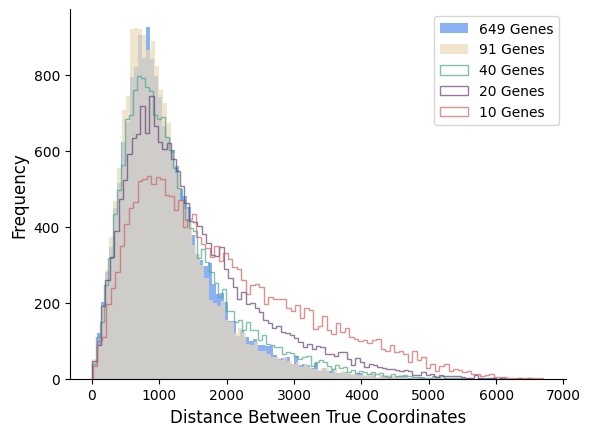

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.style.available

# 设置图形的整体风格（取消网格风格）
# plt.style.use('seaborn-white')

# 创建一个新的图形和坐标轴对象
fig, ax = plt.subplots()

# 样本数据（请替换为实际数据）
data0 = DNN649result
data1 = SPARK91result
data2 = SPARK40result
data3 = SPARK20result
data4 = SPARK10result
# 绘制直方图
bins = 100  # 箱子的数量
alpha = 0.7  # 透明度

ax.hist(data0, bins=bins, alpha=alpha, label='649 Genes', color='#5790f0')
ax.hist(data1, bins=bins, alpha=alpha, label='91 Genes', color='#ecd9b9', histtype='stepfilled')
ax.hist(data2, bins=bins, alpha=alpha, label='40 Genes', color='#4ba68a', histtype='step')
ax.hist(data3, bins=bins, alpha=alpha, label='20 Genes', color='#674176', histtype='step')
ax.hist(data4, bins=bins, alpha=alpha, label='10 Genes', color='#cd6262', histtype='step')

# 设置标题和标签
# ax.set_title('Different Number of Genes', fontsize=14)
ax.set_xlabel('Distance Between True Coordinates', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# 添加图例
ax.legend(loc='upper right', fontsize=10)

# 隐藏网格线
ax.grid(False)

# 调整x轴和y轴的位置
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 确保 y 轴从 0 开始
ax.set_ylim(bottom=0)
# 保存图形
plt.savefig("Histogram_SPARKDNNresult", dpi=1300)

# 显示图形
plt.show()

In [33]:
HVG91result = Coordinate_Distance_Result(d11, d11_left = d11_left_HVG91, #
                           d11_right = d11_right_HVG91,#
                           data_train = Rdata_scenario2_HVG91, #
                           path = "output/DNN_MERFISH", filename = "DNN5_HVG91" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_HVG91_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_HVG91_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 2186.67it/s]


PearsonRResult(statistic=np.float64(0.37825171227975335), pvalue=np.float64(0.0))
1346.5194571488746
1592.000237807303


In [34]:
HVG40result = Coordinate_Distance_Result(d11, d11_left = d11_left_HVG40, #
                           d11_right = d11_right_HVG40,#
                           data_train = Rdata_scenario2_HVG40, #
                           path = "output/DNN_MERFISH", filename = "DNN5_HVG40" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_HVG40_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_HVG40_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 2115.28it/s]


PearsonRResult(statistic=np.float64(0.1899239413304108), pvalue=np.float64(0.0))
1727.671983261152
1984.892010566686


In [35]:
HVG20result= Coordinate_Distance_Result(d11, d11_left = d11_left_HVG20, #
                           d11_right = d11_right_HVG20,#
                           data_train = Rdata_scenario2_HVG20, #
                           path = "output/DNN_MERFISH", filename = "DNN5_HVG20" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_HVG20_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_HVG20_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2393.87it/s]


PearsonRResult(statistic=np.float64(0.08803363788877627), pvalue=np.float64(0.0))
1939.1452225112907
2049.617743910002


In [36]:
HVG10result = Coordinate_Distance_Result(d11, d11_left = d11_left_HVG10, #
                           d11_right = d11_right_HVG10,#
                           data_train = Rdata_scenario2_HVG10, #
                           path = "output/DNN_MERFISH", filename = "DNN5_HVG10" ,#
                     save_dir_left = "output/DNN_MERFISH/DNN5_HVG10_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/DNN5_HVG10_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2429.76it/s]


PearsonRResult(statistic=np.float64(0.047157677549411116), pvalue=np.float64(0.0))
1919.6167003962605
1941.9185140787968


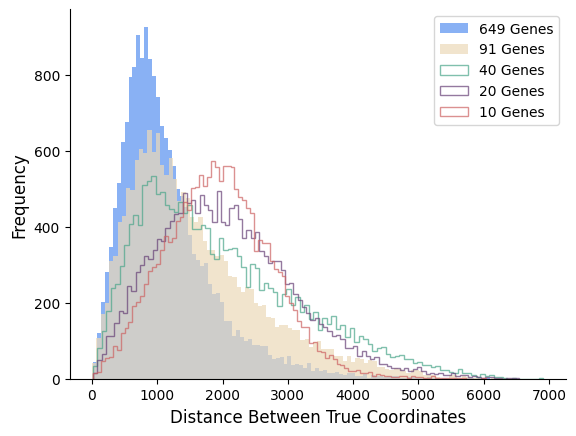

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.style.available

# 设置图形的整体风格（取消网格风格）
# plt.style.use('seaborn-white')

# 创建一个新的图形和坐标轴对象
fig, ax = plt.subplots()

# 样本数据（请替换为实际数据）
data0 = DNN649result
data1 = HVG91result
data2 = HVG40result
data3 = HVG20result
data4 = HVG10result
# 绘制直方图
bins = 100  # 箱子的数量
alpha = 0.7  # 透明度

ax.hist(data0, bins=bins, alpha=alpha, label='649 Genes', color='#5790f0')
ax.hist(data1, bins=bins, alpha=alpha, label='91 Genes', color='#ecd9b9', histtype='stepfilled')
ax.hist(data2, bins=bins, alpha=alpha, label='40 Genes', color='#4ba68a', histtype='step')
ax.hist(data3, bins=bins, alpha=alpha, label='20 Genes', color='#674176', histtype='step')
ax.hist(data4, bins=bins, alpha=alpha, label='10 Genes', color='#cd6262', histtype='step')

# 设置标题和标签
# ax.set_title('Different Number of Genes', fontsize=14)
ax.set_xlabel('Distance Between True Coordinates', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# 添加图例
ax.legend(loc='upper right', fontsize=10)

# 隐藏网格线
ax.grid(False)

# 调整x轴和y轴的位置
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 确保 y 轴从 0 开始
ax.set_ylim(bottom=0)
# 保存图形
plt.savefig("Histogram_HVGDNNresult", dpi=1300)

# 显示图形
plt.show()

# Experiments with CeLEry

In [16]:
Fit_cord_DNN (data_train = Rdata_scenario2, 
                      hidden_dims = [30, 25, 15], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "Celery3_649")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:1, Loss:42.3626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:2, Loss:24.5667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.48it/s]


Epoch:3, Loss:19.9889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.04it/s]


Epoch:4, Loss:16.9138


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:5, Loss:14.3424


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.05it/s]


Epoch:6, Loss:13.0315


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.98it/s]


Epoch:7, Loss:11.2580


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.68it/s]


Epoch:8, Loss:10.4125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.79it/s]


Epoch:9, Loss:9.5863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.92it/s]


Epoch:10, Loss:9.0451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.00it/s]


Epoch:11, Loss:8.8054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.73it/s]


Epoch:12, Loss:8.0555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.04it/s]


Epoch:13, Loss:7.7670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.15it/s]


Epoch:14, Loss:7.5430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.94it/s]


Epoch:15, Loss:7.3853


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.82it/s]


Epoch:16, Loss:7.2386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.95it/s]


Epoch:17, Loss:6.8396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.16it/s]


Epoch:18, Loss:6.7953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.95it/s]


Epoch:19, Loss:6.6632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.68it/s]


Epoch:20, Loss:6.2790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.77it/s]


Epoch:21, Loss:6.3682


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:22, Loss:6.3541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.38it/s]


Epoch:23, Loss:6.2707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:24, Loss:6.0407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:25, Loss:6.1041


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.01it/s]


Epoch:26, Loss:6.1943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 697.52it/s]


Epoch:27, Loss:5.8209


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 699.30it/s]


Epoch:28, Loss:5.8458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.12it/s]


Epoch:29, Loss:6.0463


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:30, Loss:5.9810


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.13it/s]


Epoch:31, Loss:5.6034


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.71it/s]


Epoch:32, Loss:5.7404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.14it/s]


Epoch:33, Loss:5.7351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.30it/s]


Epoch:34, Loss:5.7359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.73it/s]


Epoch:35, Loss:5.4444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.48it/s]


Epoch:36, Loss:5.7988


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.46it/s]


Epoch:37, Loss:5.4985


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.58it/s]


Epoch:38, Loss:5.4580


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:39, Loss:5.6647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.37it/s]


Epoch:40, Loss:5.6467
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:41, Loss:3.9291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:42, Loss:2.8094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.46it/s]


Epoch:43, Loss:2.7415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.00it/s]


Epoch:44, Loss:2.7505


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:45, Loss:2.5869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.36it/s]


Epoch:46, Loss:2.6794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.59it/s]


Epoch:47, Loss:2.6713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.01it/s]


Epoch:48, Loss:2.6601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:49, Loss:2.5144


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.09it/s]


Epoch:50, Loss:2.6531


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.11it/s]


Epoch:51, Loss:2.5083


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:52, Loss:2.6841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.81it/s]


Epoch:53, Loss:2.5938


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.86it/s]


Epoch:54, Loss:2.6917


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.61it/s]


Epoch:55, Loss:2.6376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.11it/s]


Epoch:56, Loss:2.6014


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.67it/s]


Epoch:57, Loss:2.6544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:58, Loss:2.6133


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:59, Loss:2.7376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.46it/s]


Epoch:60, Loss:2.5596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.67it/s]


Epoch:61, Loss:2.5909
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.19it/s]


Epoch:62, Loss:2.1617


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:63, Loss:1.4317


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.78it/s]


Epoch:64, Loss:1.3633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.98it/s]


Epoch:65, Loss:1.3534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.75it/s]


Epoch:66, Loss:1.3341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.98it/s]


Epoch:67, Loss:1.3602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.54it/s]


Epoch:68, Loss:1.3020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:69, Loss:1.3102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:70, Loss:1.3253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:71, Loss:1.3306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.15it/s]


Epoch:72, Loss:1.3066


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:73, Loss:1.2996


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.61it/s]


Epoch:74, Loss:1.3416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.79it/s]


Epoch:75, Loss:1.3189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.30it/s]


Epoch:76, Loss:1.3200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:77, Loss:1.2605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:78, Loss:1.3374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:79, Loss:1.3495


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.13it/s]


Epoch:80, Loss:1.3494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:81, Loss:1.3139


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.23it/s]


Epoch:82, Loss:1.3213


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:83, Loss:1.3321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:84, Loss:1.3488
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.98it/s]


Epoch:85, Loss:1.0649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:86, Loss:0.7604


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.19it/s]


Epoch:87, Loss:0.7447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.81it/s]


Epoch:88, Loss:0.7613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.49it/s]


Epoch:89, Loss:0.7420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.23it/s]


Epoch:90, Loss:0.7301


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.36it/s]


Epoch:91, Loss:0.7249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.57it/s]


Epoch:92, Loss:0.7259


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.36it/s]


Epoch:93, Loss:0.7198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.73it/s]


Epoch:94, Loss:0.7192


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.60it/s]


Epoch:95, Loss:0.7051


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:96, Loss:0.7298


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.48it/s]


Epoch:97, Loss:0.7204


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:98, Loss:0.6934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.28it/s]


Epoch:99, Loss:0.7089


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.95it/s]


Epoch:100, Loss:0.7031


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.13it/s]


Epoch:101, Loss:0.7197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.20it/s]


Epoch:102, Loss:0.7217


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.46it/s]


Epoch:103, Loss:0.7118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.46it/s]


Epoch:104, Loss:0.7076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.51it/s]


Epoch:105, Loss:0.7264


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.46it/s]


Epoch:106, Loss:0.7031


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.68it/s]


Epoch:107, Loss:0.7203


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.94it/s]


Epoch:108, Loss:0.6839


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.54it/s]


Epoch:109, Loss:0.7215


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:110, Loss:0.7118
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:111, Loss:0.6000


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:112, Loss:0.4552


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.32it/s]


Epoch:113, Loss:0.4526


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.00it/s]


Epoch:114, Loss:0.4627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.15it/s]


Epoch:115, Loss:0.4545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:116, Loss:0.4522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.61it/s]


Epoch:117, Loss:0.4511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.39it/s]


Epoch:118, Loss:0.4450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.80it/s]


Epoch:119, Loss:0.4383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.78it/s]


Epoch:120, Loss:0.4437


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:121, Loss:0.4420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:122, Loss:0.4398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:123, Loss:0.4379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.95it/s]


Epoch:124, Loss:0.4388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.09it/s]


Epoch:125, Loss:0.4341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.54it/s]


Epoch:126, Loss:0.4378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.09it/s]


Epoch:127, Loss:0.4405


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.39it/s]


Epoch:128, Loss:0.4335


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.24it/s]


Epoch:129, Loss:0.4281


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.76it/s]


Epoch:130, Loss:0.4276


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.86it/s]


Epoch:131, Loss:0.4271


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.24it/s]


Epoch:132, Loss:0.4325


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.36it/s]


Epoch:133, Loss:0.4278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.48it/s]


Epoch:134, Loss:0.4275


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:135, Loss:0.4262


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.48it/s]


Epoch:136, Loss:0.4287


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.95it/s]


Epoch:137, Loss:0.4365


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:138, Loss:0.4250


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:139, Loss:0.4275


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.76it/s]


Epoch:140, Loss:0.4265
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.90it/s]


Epoch:141, Loss:0.3776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.67it/s]


Epoch:142, Loss:0.3206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.67it/s]


Epoch:143, Loss:0.3210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.78it/s]


Epoch:144, Loss:0.3248


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.32it/s]


Epoch:145, Loss:0.3199


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.54it/s]


Epoch:146, Loss:0.3194


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.34it/s]


Epoch:147, Loss:0.3206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]


Epoch:148, Loss:0.3186


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.59it/s]


Epoch:149, Loss:0.3174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.09it/s]


Epoch:150, Loss:0.3154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.14it/s]


Epoch:151, Loss:0.3154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.28it/s]


Epoch:152, Loss:0.3152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:153, Loss:0.3154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.67it/s]


Epoch:154, Loss:0.3136


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:155, Loss:0.3113


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:156, Loss:0.3114


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.58it/s]


Epoch:157, Loss:0.3116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:158, Loss:0.3110


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.54it/s]


Epoch:159, Loss:0.3096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.17it/s]


Epoch:160, Loss:0.3067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:161, Loss:0.3098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:162, Loss:0.3063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.56it/s]


Epoch:163, Loss:0.3071


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:164, Loss:0.3044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.78it/s]


Epoch:165, Loss:0.3073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.01it/s]


Epoch:166, Loss:0.3059


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.28it/s]


Epoch:167, Loss:0.3045


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.02it/s]


Epoch:168, Loss:0.3018


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.36it/s]


Epoch:169, Loss:0.3027


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.59it/s]


Epoch:170, Loss:0.3013


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.24it/s]


Epoch:171, Loss:0.3047


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.76it/s]


Epoch:172, Loss:0.3016
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.76it/s]


Epoch:173, Loss:0.2788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.67it/s]


Epoch:174, Loss:0.2615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:175, Loss:0.2614


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.48it/s]


Epoch:176, Loss:0.2615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:177, Loss:0.2613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.86it/s]


Epoch:178, Loss:0.2607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.00it/s]


Epoch:179, Loss:0.2599


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:180, Loss:0.2595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.24it/s]


Epoch:181, Loss:0.2598


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.42it/s]


Epoch:182, Loss:0.2579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.63it/s]


Epoch:183, Loss:0.2586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.20it/s]


Epoch:184, Loss:0.2578


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.92it/s]


Epoch:185, Loss:0.2584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.38it/s]


Epoch:186, Loss:0.2567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.94it/s]


Epoch:187, Loss:0.2570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.02it/s]


Epoch:188, Loss:0.2555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.85it/s]


Epoch:189, Loss:0.2558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:190, Loss:0.2555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.95it/s]


Epoch:191, Loss:0.2551


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.36it/s]


Epoch:192, Loss:0.2551


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.49it/s]


Epoch:193, Loss:0.2534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.82it/s]


Epoch:194, Loss:0.2541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:195, Loss:0.2545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.74it/s]


Epoch:196, Loss:0.2529


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.92it/s]


Epoch:197, Loss:0.2526


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.62it/s]


Epoch:198, Loss:0.2519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.82it/s]


Epoch:199, Loss:0.2520


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:200, Loss:0.2515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.55it/s]


Epoch:201, Loss:0.2509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.98it/s]


Epoch:202, Loss:0.2506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.13it/s]


Epoch:203, Loss:0.2507


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.97it/s]


Epoch:204, Loss:0.2494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:205, Loss:0.2506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.61it/s]


Epoch:206, Loss:0.2490


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.97it/s]


Epoch:207, Loss:0.2486


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.78it/s]


Epoch:208, Loss:0.2487


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.48it/s]


Epoch:209, Loss:0.2488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.11it/s]


Epoch:210, Loss:0.2471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.63it/s]


Epoch:211, Loss:0.2471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.82it/s]


Epoch:212, Loss:0.2470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:213, Loss:0.2469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.67it/s]


Epoch:214, Loss:0.2473
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.16it/s]


Epoch:215, Loss:0.2359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.35it/s]


Epoch:216, Loss:0.2300


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.20it/s]


Epoch:217, Loss:0.2302


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.51it/s]


Epoch:218, Loss:0.2302


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.24it/s]


Epoch:219, Loss:0.2298


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:220, Loss:0.2294


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.43it/s]


Epoch:221, Loss:0.2296


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.60it/s]


Epoch:222, Loss:0.2292


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.35it/s]


Epoch:223, Loss:0.2291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.73it/s]


Epoch:224, Loss:0.2287


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:225, Loss:0.2286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.68it/s]


Epoch:226, Loss:0.2286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.99it/s]


Epoch:227, Loss:0.2281


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.76it/s]


Epoch:228, Loss:0.2282


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.19it/s]


Epoch:229, Loss:0.2279


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.73it/s]


Epoch:230, Loss:0.2276


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:231, Loss:0.2275


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.78it/s]


Epoch:232, Loss:0.2270


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.36it/s]


Epoch:233, Loss:0.2274


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.77it/s]


Epoch:234, Loss:0.2267


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.77it/s]


Epoch:235, Loss:0.2265


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.98it/s]


Epoch:236, Loss:0.2268


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:237, Loss:0.2261


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:238, Loss:0.2259


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:239, Loss:0.2257


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:240, Loss:0.2254


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.99it/s]


Epoch:241, Loss:0.2252


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.59it/s]


Epoch:242, Loss:0.2253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.36it/s]


Epoch:243, Loss:0.2248


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.24it/s]


Epoch:244, Loss:0.2246


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.20it/s]


Epoch:245, Loss:0.2243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:246, Loss:0.2243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.48it/s]


Epoch:247, Loss:0.2240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.97it/s]


Epoch:248, Loss:0.2238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.11it/s]


Epoch:249, Loss:0.2237


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.14it/s]


Epoch:250, Loss:0.2234


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.49it/s]


Epoch:251, Loss:0.2234


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.73it/s]


Epoch:252, Loss:0.2232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.71it/s]


Epoch:253, Loss:0.2226


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.97it/s]


Epoch:254, Loss:0.2227


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.35it/s]


Epoch:255, Loss:0.2227


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:256, Loss:0.2224


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.30it/s]


Epoch:257, Loss:0.2221


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.51it/s]


Epoch:258, Loss:0.2217


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:259, Loss:0.2218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.52it/s]


Epoch:260, Loss:0.2217


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:261, Loss:0.2219


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:262, Loss:0.2212


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:263, Loss:0.2208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.02it/s]


Epoch:264, Loss:0.2210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.57it/s]


Epoch:265, Loss:0.2206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.77it/s]


Epoch:266, Loss:0.2202


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:267, Loss:0.2206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.09it/s]


Epoch:268, Loss:0.2201


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.10it/s]


Epoch:269, Loss:0.2199


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.00it/s]


Epoch:270, Loss:0.2201


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:271, Loss:0.2193


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.82it/s]


Epoch:272, Loss:0.2194
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.69it/s]


Epoch:273, Loss:0.2137


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.55it/s]


Epoch:274, Loss:0.2120


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:275, Loss:0.2121


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.42it/s]


Epoch:276, Loss:0.2121


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.07it/s]


Epoch:277, Loss:0.2120


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:278, Loss:0.2117


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.73it/s]


Epoch:279, Loss:0.2117


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.17it/s]


Epoch:280, Loss:0.2117


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:281, Loss:0.2115


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.92it/s]


Epoch:282, Loss:0.2116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 630.35it/s]


Epoch:283, Loss:0.2113


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.19it/s]


Epoch:284, Loss:0.2113


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 597.39it/s]


Epoch:285, Loss:0.2111


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 578.93it/s]


Epoch:286, Loss:0.2111


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 567.84it/s]


Epoch:287, Loss:0.2110


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 528.56it/s]


Epoch:288, Loss:0.2109


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.13it/s]


Epoch:289, Loss:0.2109


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.19it/s]


Epoch:290, Loss:0.2108


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 611.20it/s]


Epoch:291, Loss:0.2106


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 595.12it/s]


Epoch:292, Loss:0.2106


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.51it/s]


Epoch:293, Loss:0.2105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.52it/s]


Epoch:294, Loss:0.2104


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.52it/s]


Epoch:295, Loss:0.2103


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 613.43it/s]


Epoch:296, Loss:0.2102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 592.70it/s]


Epoch:297, Loss:0.2101


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 616.53it/s]


Epoch:298, Loss:0.2100


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:299, Loss:0.2099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 589.52it/s]


Epoch:300, Loss:0.2099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 552.25it/s]


Epoch:301, Loss:0.2097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 559.15it/s]


Epoch:302, Loss:0.2097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:303, Loss:0.2096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.61it/s]


Epoch:304, Loss:0.2095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.19it/s]


Epoch:305, Loss:0.2094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 594.95it/s]


Epoch:306, Loss:0.2093


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 608.83it/s]


Epoch:307, Loss:0.2092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.17it/s]


Epoch:308, Loss:0.2091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.02it/s]


Epoch:309, Loss:0.2091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 605.63it/s]


Epoch:310, Loss:0.2089


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 622.30it/s]


Epoch:311, Loss:0.2088


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.36it/s]


Epoch:312, Loss:0.2088


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.10it/s]


Epoch:313, Loss:0.2086


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.01it/s]


Epoch:314, Loss:0.2085


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.37it/s]


Epoch:315, Loss:0.2085


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 618.62it/s]


Epoch:316, Loss:0.2084


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 623.72it/s]


Epoch:317, Loss:0.2083


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 613.94it/s]


Epoch:318, Loss:0.2083


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 614.11it/s]


Epoch:319, Loss:0.2082


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 618.27it/s]


Epoch:320, Loss:0.2081


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 626.93it/s]


Epoch:321, Loss:0.2080


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:322, Loss:0.2079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 608.32it/s]


Epoch:323, Loss:0.2076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 623.90it/s]


Epoch:324, Loss:0.2076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.39it/s]


Epoch:325, Loss:0.2076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.24it/s]


Epoch:326, Loss:0.2075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 608.83it/s]


Epoch:327, Loss:0.2073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 605.80it/s]


Epoch:328, Loss:0.2075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 611.55it/s]


Epoch:329, Loss:0.2069


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:330, Loss:0.2070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:331, Loss:0.2071


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.74it/s]


Epoch:332, Loss:0.2073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.67it/s]


Epoch:333, Loss:0.2068


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:334, Loss:0.2067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:335, Loss:0.2066


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:336, Loss:0.2065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:337, Loss:0.2065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.77it/s]


Epoch:338, Loss:0.2063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:339, Loss:0.2063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:340, Loss:0.2063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.58it/s]


Epoch:341, Loss:0.2063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.76it/s]


Epoch:342, Loss:0.2059


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]


Epoch:343, Loss:0.2059


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.63it/s]


Epoch:344, Loss:0.2058


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:345, Loss:0.2057


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.43it/s]


Epoch:346, Loss:0.2056


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.20it/s]


Epoch:347, Loss:0.2056


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.59it/s]


Epoch:348, Loss:0.2054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.47it/s]


Epoch:349, Loss:0.2052


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.24it/s]


Epoch:350, Loss:0.2053


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:351, Loss:0.2051


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:352, Loss:0.2051


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.02it/s]


Epoch:353, Loss:0.2050


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:354, Loss:0.2049


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.34it/s]


Epoch:355, Loss:0.2049
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.41it/s]


Epoch:356, Loss:0.2017


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.36it/s]


Epoch:357, Loss:0.2013


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.85it/s]


Epoch:358, Loss:0.2013


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.85it/s]


Epoch:359, Loss:0.2012


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.46it/s]


Epoch:360, Loss:0.2011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.24it/s]


Epoch:361, Loss:0.2011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.13it/s]


Epoch:362, Loss:0.2011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.32it/s]


Epoch:363, Loss:0.2010


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.28it/s]


Epoch:364, Loss:0.2012


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.56it/s]


Epoch:365, Loss:0.2009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:366, Loss:0.2009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:367, Loss:0.2009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.10it/s]


Epoch:368, Loss:0.2009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.36it/s]


Epoch:369, Loss:0.2007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.00it/s]


Epoch:370, Loss:0.2007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:371, Loss:0.2007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:372, Loss:0.2007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]


Epoch:373, Loss:0.2010


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:374, Loss:0.2006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.02it/s]


Epoch:375, Loss:0.2006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:376, Loss:0.2005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:377, Loss:0.2005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.35it/s]


Epoch:378, Loss:0.2004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:379, Loss:0.2004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.95it/s]


Epoch:380, Loss:0.2003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.59it/s]


Epoch:381, Loss:0.2003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.17it/s]


Epoch:382, Loss:0.2002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.98it/s]


Epoch:383, Loss:0.2003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:384, Loss:0.2002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:385, Loss:0.2002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.76it/s]


Epoch:386, Loss:0.2001


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.60it/s]


Epoch:387, Loss:0.2002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:388, Loss:0.2000


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.92it/s]


Epoch:389, Loss:0.2000


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.13it/s]


Epoch:390, Loss:0.2000


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.46it/s]


Epoch:391, Loss:0.1999


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.09it/s]


Epoch:392, Loss:0.1999


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.46it/s]


Epoch:393, Loss:0.1999


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.43it/s]


Epoch:394, Loss:0.1997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:395, Loss:0.1998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:396, Loss:0.1997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.43it/s]


Epoch:397, Loss:0.1997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.60it/s]


Epoch:398, Loss:0.1997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.41it/s]


Epoch:399, Loss:0.1996


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.82it/s]


Epoch:400, Loss:0.1995


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.81it/s]


Epoch:401, Loss:0.1996
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.19it/s]


Epoch:402, Loss:0.1979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.57it/s]


Epoch:403, Loss:0.1981


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.36it/s]


Epoch:404, Loss:0.1977


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.81it/s]


Epoch:405, Loss:0.1977


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.43it/s]


Epoch:406, Loss:0.1977


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:407, Loss:0.1976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.67it/s]


Epoch:408, Loss:0.1976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.04it/s]


Epoch:409, Loss:0.1976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.61it/s]


Epoch:410, Loss:0.1976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.42it/s]


Epoch:411, Loss:0.1976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.67it/s]


Epoch:412, Loss:0.1976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:413, Loss:0.1975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.96it/s]


Epoch:414, Loss:0.1975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:415, Loss:0.1975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.38it/s]


Epoch:416, Loss:0.1975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.78it/s]


Epoch:417, Loss:0.1974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.42it/s]


Epoch:418, Loss:0.1974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.11it/s]


Epoch:419, Loss:0.1974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:420, Loss:0.1975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:421, Loss:0.1974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.90it/s]


Epoch:422, Loss:0.1974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.68it/s]


Epoch:423, Loss:0.1973


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:424, Loss:0.1974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.80it/s]


Epoch:425, Loss:0.1973


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.31it/s]


Epoch:426, Loss:0.1973


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:427, Loss:0.1973


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:428, Loss:0.1972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:429, Loss:0.1973


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.24it/s]


Epoch:430, Loss:0.1972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.39it/s]


Epoch:431, Loss:0.1972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.46it/s]


Epoch:432, Loss:0.1972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:433, Loss:0.1972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:434, Loss:0.1971


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.15it/s]


Epoch:435, Loss:0.1972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:436, Loss:0.1971


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.39it/s]


Epoch:437, Loss:0.1971


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.39it/s]


Epoch:438, Loss:0.1972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.78it/s]


Epoch:439, Loss:0.1970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.63it/s]


Epoch:440, Loss:0.1970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.87it/s]


Epoch:441, Loss:0.1970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.81it/s]


Epoch:442, Loss:0.1970
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.11it/s]


Epoch:443, Loss:0.1961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.48it/s]


Epoch:444, Loss:0.1961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.11it/s]


Epoch:445, Loss:0.1961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:446, Loss:0.1961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.28it/s]


Epoch:447, Loss:0.1961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.48it/s]


Epoch:448, Loss:0.1960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.92it/s]


Epoch:449, Loss:0.1961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.28it/s]


Epoch:450, Loss:0.1960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.54it/s]


Epoch:451, Loss:0.1960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.85it/s]


Epoch:452, Loss:0.1960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:453, Loss:0.1960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:454, Loss:0.1960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.43it/s]


Epoch:455, Loss:0.1960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.95it/s]


Epoch:456, Loss:0.1960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:457, Loss:0.1960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:458, Loss:0.1959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.34it/s]


Epoch:459, Loss:0.1959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.45it/s]


Epoch:460, Loss:0.1960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.67it/s]


Epoch:461, Loss:0.1962


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.59it/s]


Epoch:462, Loss:0.1959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.54it/s]


Epoch:463, Loss:0.1960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.42it/s]


Epoch:464, Loss:0.1959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.14it/s]


Epoch:465, Loss:0.1959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.30it/s]


Epoch:466, Loss:0.1959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.17it/s]


Epoch:467, Loss:0.1960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.00it/s]


Epoch:468, Loss:0.1958


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.98it/s]


Epoch:469, Loss:0.1959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:470, Loss:0.1959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.29it/s]


Epoch:471, Loss:0.1959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:472, Loss:0.1958


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:473, Loss:0.1958


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.34it/s]


Epoch:474, Loss:0.1958


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:475, Loss:0.1958


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.95it/s]


Epoch:476, Loss:0.1958
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:477, Loss:0.1954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.19it/s]


Epoch:478, Loss:0.1953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.06it/s]


Epoch:479, Loss:0.1953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.29it/s]


Epoch:480, Loss:0.1953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.87it/s]


Epoch:481, Loss:0.1954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.29it/s]


Epoch:482, Loss:0.1953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.81it/s]


Epoch:483, Loss:0.1954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.42it/s]


Epoch:484, Loss:0.1953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:485, Loss:0.1953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.36it/s]


Epoch:486, Loss:0.1953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:487, Loss:0.1952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.97it/s]


Epoch:488, Loss:0.1953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.86it/s]


Epoch:489, Loss:0.1952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:490, Loss:0.1953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.20it/s]


Epoch:491, Loss:0.1954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:492, Loss:0.1953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.97it/s]


Epoch:493, Loss:0.1955


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.05it/s]


Epoch:494, Loss:0.1953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.85it/s]


Epoch:495, Loss:0.1952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:496, Loss:0.1953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.74it/s]


Epoch:497, Loss:0.1952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:498, Loss:0.1953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.56it/s]


Epoch:499, Loss:0.1952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:500, Loss:0.1952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:501, Loss:0.1952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.74it/s]


Epoch:502, Loss:0.1952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.63it/s]


Epoch:503, Loss:0.1952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.48it/s]


Epoch:504, Loss:0.1952
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.73it/s]


Epoch:505, Loss:0.1950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.30it/s]


Epoch:506, Loss:0.1950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.41it/s]


Epoch:507, Loss:0.1951


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.77it/s]


Epoch:508, Loss:0.1950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.02it/s]


Epoch:509, Loss:0.1951


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:510, Loss:0.1950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:511, Loss:0.1949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.13it/s]


Epoch:512, Loss:0.1950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.56it/s]


Epoch:513, Loss:0.1949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:514, Loss:0.1952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:515, Loss:0.1949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.85it/s]


Epoch:516, Loss:0.1950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 635.10it/s]


Epoch:517, Loss:0.1950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:518, Loss:0.1949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.54it/s]


Epoch:519, Loss:0.1949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.14it/s]


Epoch:520, Loss:0.1949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.01it/s]


Epoch:521, Loss:0.1950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.09it/s]


Epoch:522, Loss:0.1950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:523, Loss:0.1949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:524, Loss:0.1949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.14it/s]


Epoch:525, Loss:0.1949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.35it/s]

Epoch:526, Loss:0.1949
New learning rate:6.103515625e-08
Folder already exists


DNN3_cord(
  (fclayer1): Sequential(
    (0): Linear(in_features=649, out_features=30, bias=True)
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): Linear(in_features=30, out_features=25, bias=True)
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): Linear(in_features=25, out_features=15, bias=True)
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): Linear(in_features=15, out_features=2, bias=True)
    (1): Sigmoid()
  )
)

In [9]:
Celery649result = Coordinate_Distance_Result(d11, d11_left = d11_left, #
                           d11_right = d11_right,#
                           data_train = Rdata_scenario2, #
                           path = "output/DNN_MERFISH", filename = "Celery3_649" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_649_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_649_right_celery.npy")

Data has already been z-scored
Data has already been z-scored


100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2615.03it/s]


PearsonRResult(statistic=0.6310987964145949, pvalue=0.0)
1024.8027360109995
1214.9624182395269


In [ ]:
# 80

In [20]:
Rdata_scenario2_WKAN80= Rdata_scenario2[:,index80.tolist()[0]]

d11_left_WKAN80 = d11_left[:,index80.tolist()[0]]

d11_right_WKAN80 = d11_right[:,index80.tolist()[0]]

In [62]:
Fit_cord_DNN (data_train = Rdata_scenario2_WKAN80, 
                      hidden_dims = [30, 25, 15], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "Celery3_WKAN80")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 626.39it/s]


Epoch:1, Loss:50.7220


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.44it/s]


Epoch:2, Loss:34.9508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.55it/s]


Epoch:3, Loss:31.3121


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 588.72it/s]


Epoch:4, Loss:29.1766


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.91it/s]


Epoch:5, Loss:27.9745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.47it/s]


Epoch:6, Loss:26.5142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.62it/s]


Epoch:7, Loss:25.5517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.97it/s]


Epoch:8, Loss:24.6341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 581.84it/s]


Epoch:9, Loss:23.7908


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 616.01it/s]


Epoch:10, Loss:23.0681


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.75it/s]


Epoch:11, Loss:22.5254


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 627.46it/s]


Epoch:12, Loss:21.9613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 623.18it/s]


Epoch:13, Loss:21.4239


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.57it/s]


Epoch:14, Loss:21.1709


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.81it/s]


Epoch:15, Loss:20.7596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.54it/s]


Epoch:16, Loss:20.0570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 635.28it/s]


Epoch:17, Loss:19.9159


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.96it/s]


Epoch:18, Loss:19.5104


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.51it/s]


Epoch:19, Loss:19.2241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.85it/s]


Epoch:20, Loss:19.1992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.62it/s]


Epoch:21, Loss:18.8871


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.28it/s]


Epoch:22, Loss:18.5772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:23, Loss:18.3987


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.91it/s]


Epoch:24, Loss:18.0255


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.97it/s]


Epoch:25, Loss:18.0498


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.57it/s]


Epoch:26, Loss:17.5763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.38it/s]


Epoch:27, Loss:17.4430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.11it/s]


Epoch:28, Loss:17.3111


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.35it/s]


Epoch:29, Loss:17.3130


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 623.07it/s]


Epoch:30, Loss:17.1945


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 620.33it/s]


Epoch:31, Loss:17.1376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.68it/s]


Epoch:32, Loss:17.0912


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.54it/s]


Epoch:33, Loss:16.7219


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.54it/s]


Epoch:34, Loss:16.6717


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 625.67it/s]


Epoch:35, Loss:16.6474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 585.89it/s]


Epoch:36, Loss:16.2693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.98it/s]


Epoch:37, Loss:16.2584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 635.09it/s]


Epoch:38, Loss:16.2654


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.57it/s]


Epoch:39, Loss:16.1092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.32it/s]


Epoch:40, Loss:15.7779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.09it/s]


Epoch:41, Loss:15.9989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.66it/s]


Epoch:42, Loss:15.7912


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.01it/s]


Epoch:43, Loss:15.5286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.00it/s]


Epoch:44, Loss:15.5413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.48it/s]


Epoch:45, Loss:15.6502


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.44it/s]


Epoch:46, Loss:15.2139


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.20it/s]


Epoch:47, Loss:15.5047


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.08it/s]


Epoch:48, Loss:15.3593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 624.96it/s]


Epoch:49, Loss:15.4115


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.67it/s]


Epoch:50, Loss:15.1931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.90it/s]


Epoch:51, Loss:15.1099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.73it/s]


Epoch:52, Loss:15.0621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.08it/s]


Epoch:53, Loss:15.1056


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:54, Loss:15.0137


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:55, Loss:15.1224


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.57it/s]


Epoch:56, Loss:14.7979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.28it/s]


Epoch:57, Loss:15.1952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.78it/s]


Epoch:58, Loss:15.0022


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.75it/s]


Epoch:59, Loss:14.5884


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.13it/s]


Epoch:60, Loss:14.9284
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.94it/s]


Epoch:61, Loss:12.8680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:62, Loss:12.2692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.34it/s]


Epoch:63, Loss:12.2136


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.00it/s]


Epoch:64, Loss:12.1623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.75it/s]


Epoch:65, Loss:11.9673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.35it/s]


Epoch:66, Loss:11.9182


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.26it/s]


Epoch:67, Loss:11.8975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.71it/s]


Epoch:68, Loss:11.8284


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.60it/s]


Epoch:69, Loss:11.7066


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.94it/s]


Epoch:70, Loss:11.6937


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 618.79it/s]


Epoch:71, Loss:11.7099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.08it/s]


Epoch:72, Loss:11.5753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.40it/s]


Epoch:73, Loss:11.7432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.24it/s]


Epoch:74, Loss:11.6835


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.47it/s]


Epoch:75, Loss:11.4416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.48it/s]


Epoch:76, Loss:11.5354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.35it/s]


Epoch:77, Loss:11.5625


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.74it/s]


Epoch:78, Loss:11.5388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 635.83it/s]


Epoch:79, Loss:11.3451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.71it/s]


Epoch:80, Loss:11.3781


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.26it/s]


Epoch:81, Loss:11.3956


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.05it/s]


Epoch:82, Loss:11.3545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.35it/s]


Epoch:83, Loss:11.4384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.10it/s]


Epoch:84, Loss:11.2396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.39it/s]


Epoch:85, Loss:11.2925


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.00it/s]


Epoch:86, Loss:11.2607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.90it/s]


Epoch:87, Loss:11.2106


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 614.11it/s]


Epoch:88, Loss:11.1956


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:89, Loss:11.2273


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.16it/s]


Epoch:90, Loss:11.1613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.12it/s]


Epoch:91, Loss:11.2257


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.18it/s]


Epoch:92, Loss:11.1245


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.81it/s]


Epoch:93, Loss:11.2160
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.68it/s]


Epoch:94, Loss:10.1431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.46it/s]


Epoch:95, Loss:9.9098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.81it/s]


Epoch:96, Loss:9.8821


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.77it/s]


Epoch:97, Loss:9.8682


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.54it/s]


Epoch:98, Loss:9.8554


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.24it/s]


Epoch:99, Loss:9.7604


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.54it/s]


Epoch:100, Loss:9.7570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.62it/s]


Epoch:101, Loss:9.7563


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:102, Loss:9.7707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:103, Loss:9.6844


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.97it/s]


Epoch:104, Loss:9.6883


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.79it/s]


Epoch:105, Loss:9.6380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.48it/s]


Epoch:106, Loss:9.6823


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.57it/s]


Epoch:107, Loss:9.6655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.36it/s]


Epoch:108, Loss:9.6479


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 620.01it/s]


Epoch:109, Loss:9.6022


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.79it/s]


Epoch:110, Loss:9.6332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.18it/s]


Epoch:111, Loss:9.6243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.62it/s]


Epoch:112, Loss:9.5516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.73it/s]


Epoch:113, Loss:9.5990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:114, Loss:9.5318


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.95it/s]


Epoch:115, Loss:9.5670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.76it/s]


Epoch:116, Loss:9.5369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.09it/s]


Epoch:117, Loss:9.5468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 689.18it/s]


Epoch:118, Loss:9.5328


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.93it/s]


Epoch:119, Loss:9.4828


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.33it/s]


Epoch:120, Loss:9.5115


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.10it/s]


Epoch:121, Loss:9.4834


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.24it/s]


Epoch:122, Loss:9.4546


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.39it/s]


Epoch:123, Loss:9.4329


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.28it/s]


Epoch:124, Loss:9.5487
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.43it/s]


Epoch:125, Loss:8.9844


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.29it/s]


Epoch:126, Loss:8.9099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.22it/s]


Epoch:127, Loss:8.8936


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.36it/s]


Epoch:128, Loss:8.8798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.66it/s]


Epoch:129, Loss:8.8583


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.12it/s]


Epoch:130, Loss:8.8730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:131, Loss:8.8567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.67it/s]


Epoch:132, Loss:8.8348


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.48it/s]


Epoch:133, Loss:8.8240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.56it/s]


Epoch:134, Loss:8.8025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.05it/s]


Epoch:135, Loss:8.8143


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.97it/s]


Epoch:136, Loss:8.8032


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.47it/s]


Epoch:137, Loss:8.8102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.71it/s]


Epoch:138, Loss:8.8003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.55it/s]


Epoch:139, Loss:8.7975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.13it/s]


Epoch:140, Loss:8.7857


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:141, Loss:8.7686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.24it/s]


Epoch:142, Loss:8.7848


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:143, Loss:8.7710


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.10it/s]


Epoch:144, Loss:8.7690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 630.35it/s]


Epoch:145, Loss:8.7497


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.94it/s]


Epoch:146, Loss:8.7459


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.41it/s]


Epoch:147, Loss:8.7727


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.66it/s]


Epoch:148, Loss:8.7113


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:149, Loss:8.7258


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.20it/s]


Epoch:150, Loss:8.7408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.99it/s]


Epoch:151, Loss:8.7240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.34it/s]


Epoch:152, Loss:8.7511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:153, Loss:8.7235


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.60it/s]


Epoch:154, Loss:8.7011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.39it/s]


Epoch:155, Loss:8.7247


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.73it/s]


Epoch:156, Loss:8.7074
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.39it/s]


Epoch:157, Loss:8.4598


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.96it/s]


Epoch:158, Loss:8.4386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.73it/s]


Epoch:159, Loss:8.4187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.12it/s]


Epoch:160, Loss:8.4235


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 617.95it/s]


Epoch:161, Loss:8.4166


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.45it/s]


Epoch:162, Loss:8.4119


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.09it/s]


Epoch:163, Loss:8.4179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.16it/s]


Epoch:164, Loss:8.3782


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 635.10it/s]


Epoch:165, Loss:8.4223


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.02it/s]


Epoch:166, Loss:8.3876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.80it/s]


Epoch:167, Loss:8.4012


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.80it/s]


Epoch:168, Loss:8.3986


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 626.03it/s]


Epoch:169, Loss:8.3956


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 627.64it/s]


Epoch:170, Loss:8.3781


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 626.23it/s]


Epoch:171, Loss:8.3854


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.60it/s]


Epoch:172, Loss:8.3856


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.31it/s]


Epoch:173, Loss:8.3854


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 617.39it/s]


Epoch:174, Loss:8.3762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.09it/s]


Epoch:175, Loss:8.3726


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.33it/s]


Epoch:176, Loss:8.3721


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.53it/s]


Epoch:177, Loss:8.3692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.72it/s]


Epoch:178, Loss:8.3686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 610.23it/s]


Epoch:179, Loss:8.3602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 584.95it/s]


Epoch:180, Loss:8.3523


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 609.33it/s]


Epoch:181, Loss:8.3518


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 608.54it/s]


Epoch:182, Loss:8.3567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:183, Loss:8.3592


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 597.22it/s]


Epoch:184, Loss:8.3566


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 579.46it/s]


Epoch:185, Loss:8.3528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 621.95it/s]


Epoch:186, Loss:8.3504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 605.29it/s]


Epoch:187, Loss:8.3485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 597.40it/s]


Epoch:188, Loss:8.3297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 622.71it/s]


Epoch:189, Loss:8.3403
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 590.93it/s]


Epoch:190, Loss:8.2124


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:191, Loss:8.1980


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.27it/s]


Epoch:192, Loss:8.1973


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.54it/s]


Epoch:193, Loss:8.1970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 575.28it/s]


Epoch:194, Loss:8.1894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.80it/s]


Epoch:195, Loss:8.1917


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.79it/s]


Epoch:196, Loss:8.1857


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 619.66it/s]


Epoch:197, Loss:8.1962


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 545.52it/s]


Epoch:198, Loss:8.1827


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 578.17it/s]


Epoch:199, Loss:8.1841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 625.31it/s]


Epoch:200, Loss:8.1876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 591.10it/s]


Epoch:201, Loss:8.1793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 589.67it/s]


Epoch:202, Loss:8.1693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 576.34it/s]


Epoch:203, Loss:8.1732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 564.47it/s]


Epoch:204, Loss:8.1798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 626.21it/s]


Epoch:205, Loss:8.1817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.07it/s]


Epoch:206, Loss:8.1676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 600.49it/s]


Epoch:207, Loss:8.1787


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 589.83it/s]


Epoch:208, Loss:8.1674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 585.11it/s]


Epoch:209, Loss:8.1687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 610.58it/s]


Epoch:210, Loss:8.1701


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 584.80it/s]


Epoch:211, Loss:8.1693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 592.86it/s]


Epoch:212, Loss:8.1663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 574.98it/s]


Epoch:213, Loss:8.1666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 605.96it/s]


Epoch:214, Loss:8.1617


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 568.57it/s]


Epoch:215, Loss:8.1635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 584.95it/s]


Epoch:216, Loss:8.1632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 575.89it/s]


Epoch:217, Loss:8.1641
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.07it/s]


Epoch:218, Loss:8.0974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.78it/s]


Epoch:219, Loss:8.0888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.47it/s]


Epoch:220, Loss:8.0911


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.42it/s]


Epoch:221, Loss:8.0862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 630.53it/s]


Epoch:222, Loss:8.0879


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 620.19it/s]


Epoch:223, Loss:8.0902


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.31it/s]


Epoch:224, Loss:8.0916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.79it/s]


Epoch:225, Loss:8.0833


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:226, Loss:8.0841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:227, Loss:8.0826


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.29it/s]


Epoch:228, Loss:8.0804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.57it/s]


Epoch:229, Loss:8.0865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.62it/s]


Epoch:230, Loss:8.0814


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.85it/s]


Epoch:231, Loss:8.0803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.35it/s]


Epoch:232, Loss:8.0808


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 626.39it/s]


Epoch:233, Loss:8.0793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.62it/s]


Epoch:234, Loss:8.0800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.99it/s]


Epoch:235, Loss:8.0765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 603.79it/s]


Epoch:236, Loss:8.0795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.63it/s]


Epoch:237, Loss:8.0772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 635.28it/s]


Epoch:238, Loss:8.0776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 615.31it/s]


Epoch:239, Loss:8.0738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 575.43it/s]


Epoch:240, Loss:8.0745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 596.40it/s]


Epoch:241, Loss:8.0806


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.53it/s]


Epoch:242, Loss:8.0726


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 625.49it/s]


Epoch:243, Loss:8.0737
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 594.30it/s]


Epoch:244, Loss:8.0412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.23it/s]


Epoch:245, Loss:8.0372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 605.18it/s]


Epoch:246, Loss:8.0345


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.68it/s]


Epoch:247, Loss:8.0367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.24it/s]


Epoch:248, Loss:8.0360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.02it/s]


Epoch:249, Loss:8.0342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:250, Loss:8.0344


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 601.91it/s]


Epoch:251, Loss:8.0338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 694.42it/s]


Epoch:252, Loss:8.0359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.38it/s]


Epoch:253, Loss:8.0333


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.33it/s]


Epoch:254, Loss:8.0316


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.21it/s]


Epoch:255, Loss:8.0340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.80it/s]


Epoch:256, Loss:8.0334


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.61it/s]


Epoch:257, Loss:8.0343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 627.64it/s]


Epoch:258, Loss:8.0324


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.91it/s]


Epoch:259, Loss:8.0319


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 635.65it/s]


Epoch:260, Loss:8.0305


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.54it/s]


Epoch:261, Loss:8.0320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.81it/s]


Epoch:262, Loss:8.0336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:263, Loss:8.0347


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.74it/s]


Epoch:264, Loss:8.0308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.71it/s]


Epoch:265, Loss:8.0305


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.54it/s]


Epoch:266, Loss:8.0308
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:267, Loss:8.0105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.10it/s]


Epoch:268, Loss:8.0115


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.35it/s]


Epoch:269, Loss:8.0102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.66it/s]


Epoch:270, Loss:8.0102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.54it/s]


Epoch:271, Loss:8.0094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.37it/s]


Epoch:272, Loss:8.0118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.19it/s]


Epoch:273, Loss:8.0089


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.99it/s]


Epoch:274, Loss:8.0089


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:275, Loss:8.0108


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.22it/s]


Epoch:276, Loss:8.0095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 612.91it/s]


Epoch:277, Loss:8.0097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 623.72it/s]


Epoch:278, Loss:8.0103


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.13it/s]


Epoch:279, Loss:8.0084


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.75it/s]


Epoch:280, Loss:8.0077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:281, Loss:8.0075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.45it/s]


Epoch:282, Loss:8.0082


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.20it/s]


Epoch:283, Loss:8.0066


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.29it/s]


Epoch:284, Loss:8.0105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.22it/s]


Epoch:285, Loss:8.0084


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.51it/s]


Epoch:286, Loss:8.0072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.44it/s]


Epoch:287, Loss:8.0086


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.22it/s]


Epoch:288, Loss:8.0067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:289, Loss:8.0065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.67it/s]


Epoch:290, Loss:8.0081


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:291, Loss:8.0071
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.84it/s]


Epoch:292, Loss:7.9978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.23it/s]


Epoch:293, Loss:7.9995


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 620.71it/s]


Epoch:294, Loss:7.9963


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:295, Loss:7.9999


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.10it/s]


Epoch:296, Loss:7.9994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.75it/s]


Epoch:297, Loss:7.9960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.11it/s]


Epoch:298, Loss:7.9959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.54it/s]


Epoch:299, Loss:7.9953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.99it/s]


Epoch:300, Loss:7.9990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 596.08it/s]


Epoch:301, Loss:7.9994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.71it/s]


Epoch:302, Loss:7.9976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.54it/s]


Epoch:303, Loss:7.9960


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 615.99it/s]


Epoch:304, Loss:7.9949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 615.14it/s]


Epoch:305, Loss:7.9954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.51it/s]


Epoch:306, Loss:7.9971


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 626.75it/s]


Epoch:307, Loss:7.9969


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 610.72it/s]


Epoch:308, Loss:7.9948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 627.66it/s]


Epoch:309, Loss:7.9970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.54it/s]


Epoch:310, Loss:7.9946


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.42it/s]


Epoch:311, Loss:7.9976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.73it/s]


Epoch:312, Loss:7.9950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.99it/s]


Epoch:313, Loss:7.9961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.47it/s]


Epoch:314, Loss:7.9958
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.40it/s]


Epoch:315, Loss:7.9895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.71it/s]


Epoch:316, Loss:7.9921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.17it/s]


Epoch:317, Loss:7.9978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.16it/s]


Epoch:318, Loss:7.9977


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.24it/s]


Epoch:319, Loss:7.9900


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.85it/s]


Epoch:320, Loss:7.9889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.58it/s]


Epoch:321, Loss:7.9887


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.58it/s]


Epoch:322, Loss:7.9893


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:323, Loss:7.9896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.93it/s]


Epoch:324, Loss:7.9903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.37it/s]


Epoch:325, Loss:7.9902


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.16it/s]


Epoch:326, Loss:7.9888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.37it/s]


Epoch:327, Loss:7.9900


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.00it/s]


Epoch:328, Loss:7.9894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.28it/s]


Epoch:329, Loss:7.9895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.15it/s]


Epoch:330, Loss:7.9891


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:331, Loss:7.9894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.20it/s]


Epoch:332, Loss:7.9896
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.58it/s]


Epoch:333, Loss:7.9860


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.09it/s]


Epoch:334, Loss:7.9870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:335, Loss:7.9856


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.35it/s]


Epoch:336, Loss:7.9872


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.85it/s]


Epoch:337, Loss:7.9881


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.23it/s]


Epoch:338, Loss:7.9887


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 592.49it/s]


Epoch:339, Loss:7.9859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:340, Loss:7.9862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.54it/s]


Epoch:341, Loss:7.9871


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.03it/s]


Epoch:342, Loss:7.9865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:343, Loss:7.9858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.77it/s]


Epoch:344, Loss:7.9870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.71it/s]


Epoch:345, Loss:7.9857


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.58it/s]


Epoch:346, Loss:7.9879


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.00it/s]


Epoch:347, Loss:7.9884


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.56it/s]


Epoch:348, Loss:7.9875


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.12it/s]


Epoch:349, Loss:7.9852


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 600.81it/s]


Epoch:350, Loss:7.9856
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.94it/s]


Epoch:351, Loss:7.9842


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.22it/s]


Epoch:352, Loss:7.9858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.81it/s]


Epoch:353, Loss:7.9859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.62it/s]


Epoch:354, Loss:7.9874


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.61it/s]


Epoch:355, Loss:7.9845


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.08it/s]


Epoch:356, Loss:7.9853


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.95it/s]


Epoch:357, Loss:7.9864


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.22it/s]


Epoch:358, Loss:7.9850


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.18it/s]


Epoch:359, Loss:7.9842


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 613.76it/s]


Epoch:360, Loss:7.9841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.86it/s]


Epoch:361, Loss:7.9871


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 626.39it/s]


Epoch:362, Loss:7.9841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.84it/s]


Epoch:363, Loss:7.9870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 603.46it/s]


Epoch:364, Loss:7.9861


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 612.91it/s]


Epoch:365, Loss:7.9837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.44it/s]


Epoch:366, Loss:7.9840


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.96it/s]


Epoch:367, Loss:7.9844


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.91it/s]


Epoch:368, Loss:7.9837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.85it/s]


Epoch:369, Loss:7.9873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.05it/s]


Epoch:370, Loss:7.9863
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 607.98it/s]


Epoch:371, Loss:7.9834


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.79it/s]


Epoch:372, Loss:7.9834


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:373, Loss:7.9872


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.09it/s]


Epoch:374, Loss:7.9853


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.85it/s]


Epoch:375, Loss:7.9832


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.07it/s]


Epoch:376, Loss:7.9839


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 635.28it/s]


Epoch:377, Loss:7.9850


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.95it/s]


Epoch:378, Loss:7.9833


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.62it/s]


Epoch:379, Loss:7.9836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.33it/s]


Epoch:380, Loss:7.9846


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.24it/s]


Epoch:381, Loss:7.9833


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.00it/s]


Epoch:382, Loss:7.9920


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.24it/s]


Epoch:383, Loss:7.9864


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.56it/s]


Epoch:384, Loss:7.9832


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:385, Loss:7.9857


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:386, Loss:7.9858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.67it/s]


Epoch:387, Loss:7.9839


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.18it/s]


Epoch:388, Loss:7.9836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.97it/s]

Epoch:389, Loss:7.9846
New learning rate:6.103515625e-08
Folder already exists


DNN3_cord(
  (fclayer1): Sequential(
    (0): Linear(in_features=80, out_features=30, bias=True)
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): Linear(in_features=30, out_features=25, bias=True)
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): Linear(in_features=25, out_features=15, bias=True)
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): Linear(in_features=15, out_features=2, bias=True)
    (1): Sigmoid()
  )
)

In [65]:
WKAN80Celeryresult = Coordinate_Distance_Result(d11, d11_left = d11_left_WKAN80, #
                           d11_right = d11_right_WKAN80,#
                           data_train = Rdata_scenario2_WKAN80, #
                           path = "output/DNN_MERFISH", filename = "Celery3_WKAN80" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_WKAN80_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_WKAN80_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2359.99it/s]


PearsonRResult(statistic=0.601065850148381, pvalue=0.0)
1036.9991866758032
1257.8364017190095


In [21]:
WKAN80Celeryresult = Coordinate_Distance(d11_left = d11_left_WKAN80, #
                           d11_right = d11_right_WKAN80,#
                           data_train = Rdata_scenario2_WKAN80, #
                           path = "output/DNN_MERFISH", filename = "Celery3_WKAN80" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_WKAN80_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_WKAN80_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 1892.08it/s]


In [ ]:
# 40

In [22]:
Rdata_scenario2_WKAN40= Rdata_scenario2[:,index40.tolist()[0]]

d11_left_WKAN40 = d11_left[:,index40.tolist()[0]]

d11_right_WKAN40 = d11_right[:,index40.tolist()[0]]

In [75]:
Fit_cord_DNN (data_train = Rdata_scenario2_WKAN40, 
                      hidden_dims = [30, 25, 15], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "Celery3_WKAN40")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 612.39it/s]


Epoch:1, Loss:53.3191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.67it/s]


Epoch:2, Loss:39.5640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:3, Loss:36.0558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.06it/s]


Epoch:4, Loss:33.7358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:5, Loss:32.4222


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.43it/s]


Epoch:6, Loss:31.3698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.58it/s]


Epoch:7, Loss:30.3178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.58it/s]


Epoch:8, Loss:29.5797


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.45it/s]


Epoch:9, Loss:28.9561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.16it/s]


Epoch:10, Loss:28.3070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:11, Loss:27.8287


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:12, Loss:27.3625


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.55it/s]


Epoch:13, Loss:26.9601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.54it/s]


Epoch:14, Loss:26.8265


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.33it/s]


Epoch:15, Loss:26.3174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.54it/s]


Epoch:16, Loss:26.1263


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.93it/s]


Epoch:17, Loss:25.6392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.54it/s]


Epoch:18, Loss:25.3608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.76it/s]


Epoch:19, Loss:24.9414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.41it/s]


Epoch:20, Loss:24.9917


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.23it/s]


Epoch:21, Loss:24.5828


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:22, Loss:24.4814


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.51it/s]


Epoch:23, Loss:24.2635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.01it/s]


Epoch:24, Loss:23.8865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:25, Loss:23.5454


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:26, Loss:23.5350


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.61it/s]


Epoch:27, Loss:23.2004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.10it/s]


Epoch:28, Loss:22.8444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.97it/s]


Epoch:29, Loss:22.9048


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.36it/s]


Epoch:30, Loss:22.8945


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.53it/s]


Epoch:31, Loss:22.6096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.81it/s]


Epoch:32, Loss:22.5924


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.81it/s]


Epoch:33, Loss:22.1597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.93it/s]


Epoch:34, Loss:22.4386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:35, Loss:22.2168


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.54it/s]


Epoch:36, Loss:22.0460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.25it/s]


Epoch:37, Loss:21.9673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.92it/s]


Epoch:38, Loss:21.8980


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.24it/s]


Epoch:39, Loss:21.8730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:40, Loss:21.5928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.66it/s]


Epoch:41, Loss:21.3389


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.14it/s]


Epoch:42, Loss:21.5575


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:43, Loss:21.5041


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.35it/s]


Epoch:44, Loss:21.2401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:45, Loss:20.9713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.18it/s]


Epoch:46, Loss:21.1727


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:47, Loss:20.8967


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.60it/s]


Epoch:48, Loss:20.8397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:49, Loss:20.7674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:50, Loss:20.7812


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:51, Loss:20.6714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.57it/s]


Epoch:52, Loss:20.5271


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:53, Loss:20.6090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.69it/s]


Epoch:54, Loss:20.5580


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.90it/s]


Epoch:55, Loss:20.5593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.90it/s]


Epoch:56, Loss:20.2787


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.73it/s]


Epoch:57, Loss:20.5030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.38it/s]


Epoch:58, Loss:20.4786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.89it/s]


Epoch:59, Loss:20.2385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.37it/s]


Epoch:60, Loss:20.2836
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.43it/s]


Epoch:61, Loss:18.3059


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.17it/s]


Epoch:62, Loss:17.8703


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.53it/s]


Epoch:63, Loss:17.7640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.36it/s]


Epoch:64, Loss:17.6926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:65, Loss:17.6286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.14it/s]


Epoch:66, Loss:17.5474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.97it/s]


Epoch:67, Loss:17.4851


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.93it/s]


Epoch:68, Loss:17.4062


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.94it/s]


Epoch:69, Loss:17.3672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.47it/s]


Epoch:70, Loss:17.3027


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:71, Loss:17.3168


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.80it/s]


Epoch:72, Loss:17.1069


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.17it/s]


Epoch:73, Loss:17.1152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.95it/s]


Epoch:74, Loss:17.1343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.38it/s]


Epoch:75, Loss:17.1590


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.13it/s]


Epoch:76, Loss:16.9953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:77, Loss:16.9607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:78, Loss:16.9793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:79, Loss:16.8299


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:80, Loss:16.8577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.15it/s]


Epoch:81, Loss:16.8490


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.68it/s]


Epoch:82, Loss:16.8311


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.69it/s]


Epoch:83, Loss:16.8019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.33it/s]


Epoch:84, Loss:16.9439


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.13it/s]


Epoch:85, Loss:16.8639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.94it/s]


Epoch:86, Loss:16.7290


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:87, Loss:16.5840


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:88, Loss:16.6173


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.57it/s]


Epoch:89, Loss:16.7107


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.07it/s]


Epoch:90, Loss:16.7749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:91, Loss:16.6305


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.43it/s]


Epoch:92, Loss:16.6589
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.00it/s]


Epoch:93, Loss:15.5973


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.78it/s]


Epoch:94, Loss:15.4285


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.52it/s]


Epoch:95, Loss:15.3961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.81it/s]


Epoch:96, Loss:15.3362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.60it/s]


Epoch:97, Loss:15.3204


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.99it/s]


Epoch:98, Loss:15.3306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.69it/s]


Epoch:99, Loss:15.2285


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.80it/s]


Epoch:100, Loss:15.2294


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.11it/s]


Epoch:101, Loss:15.2866


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.21it/s]


Epoch:102, Loss:15.1692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.93it/s]


Epoch:103, Loss:15.1608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:104, Loss:15.1228


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.18it/s]


Epoch:105, Loss:15.1573


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.25it/s]


Epoch:106, Loss:15.1237


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.57it/s]


Epoch:107, Loss:15.1365


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.28it/s]


Epoch:108, Loss:15.0970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:109, Loss:15.1104


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.90it/s]


Epoch:110, Loss:15.0459


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.32it/s]


Epoch:111, Loss:15.0668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.70it/s]


Epoch:112, Loss:15.0739


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.27it/s]


Epoch:113, Loss:14.9892


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.10it/s]


Epoch:114, Loss:15.0297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.17it/s]


Epoch:115, Loss:15.0046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.26it/s]


Epoch:116, Loss:14.9676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.88it/s]


Epoch:117, Loss:15.0193


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:118, Loss:14.9018


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.75it/s]


Epoch:119, Loss:15.0154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.54it/s]


Epoch:120, Loss:14.9670


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.14it/s]


Epoch:121, Loss:14.9002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:122, Loss:14.8877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.96it/s]


Epoch:123, Loss:14.8824


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.96it/s]


Epoch:124, Loss:14.8910
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.56it/s]


Epoch:125, Loss:14.3838


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.59it/s]


Epoch:126, Loss:14.2809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.18it/s]


Epoch:127, Loss:14.3093


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.66it/s]


Epoch:128, Loss:14.2847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.85it/s]


Epoch:129, Loss:14.2666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.73it/s]


Epoch:130, Loss:14.2726


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:131, Loss:14.2608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:132, Loss:14.2247


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:133, Loss:14.2256


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:134, Loss:14.2105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.74it/s]


Epoch:135, Loss:14.2244


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.73it/s]


Epoch:136, Loss:14.2299


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.87it/s]


Epoch:137, Loss:14.1768


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.59it/s]


Epoch:138, Loss:14.1991


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.74it/s]


Epoch:139, Loss:14.2061


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:140, Loss:14.1851


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:141, Loss:14.1941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.08it/s]


Epoch:142, Loss:14.1512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.95it/s]


Epoch:143, Loss:14.1739


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:144, Loss:14.1595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:145, Loss:14.1660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:146, Loss:14.1338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:147, Loss:14.1743


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.87it/s]


Epoch:148, Loss:14.1393
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.28it/s]


Epoch:149, Loss:13.8602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:150, Loss:13.8478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.74it/s]


Epoch:151, Loss:13.8224


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.93it/s]


Epoch:152, Loss:13.8342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:153, Loss:13.8183


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.13it/s]


Epoch:154, Loss:13.8238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.47it/s]


Epoch:155, Loss:13.8190


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.87it/s]


Epoch:156, Loss:13.8091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:157, Loss:13.8182


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.82it/s]


Epoch:158, Loss:13.7947


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.96it/s]


Epoch:159, Loss:13.7978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.66it/s]


Epoch:160, Loss:13.7937


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.14it/s]


Epoch:161, Loss:13.8021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.13it/s]


Epoch:162, Loss:13.7806


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.74it/s]


Epoch:163, Loss:13.7867


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:164, Loss:13.7797


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.61it/s]


Epoch:165, Loss:13.7763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.97it/s]


Epoch:166, Loss:13.7722


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.53it/s]


Epoch:167, Loss:13.7853


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.62it/s]


Epoch:168, Loss:13.7624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.84it/s]


Epoch:169, Loss:13.7584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:170, Loss:13.7491


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:171, Loss:13.7622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:172, Loss:13.7567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.26it/s]


Epoch:173, Loss:13.7588


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.89it/s]


Epoch:174, Loss:13.7634


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.52it/s]


Epoch:175, Loss:13.7434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.76it/s]


Epoch:176, Loss:13.7484


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.14it/s]


Epoch:177, Loss:13.7359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.56it/s]


Epoch:178, Loss:13.7392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.00it/s]


Epoch:179, Loss:13.7320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.73it/s]


Epoch:180, Loss:13.7367
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.52it/s]


Epoch:181, Loss:13.5859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.97it/s]


Epoch:182, Loss:13.5807


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.56it/s]


Epoch:183, Loss:13.5855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:184, Loss:13.5883


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.94it/s]


Epoch:185, Loss:13.5760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:186, Loss:13.5703


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:187, Loss:13.5753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.75it/s]


Epoch:188, Loss:13.5607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:189, Loss:13.5728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.53it/s]


Epoch:190, Loss:13.5641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.47it/s]


Epoch:191, Loss:13.5661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.22it/s]


Epoch:192, Loss:13.5678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:193, Loss:13.5600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.10it/s]


Epoch:194, Loss:13.5725


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:195, Loss:13.5589


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:196, Loss:13.5561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.75it/s]


Epoch:197, Loss:13.5635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.74it/s]


Epoch:198, Loss:13.5447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.89it/s]


Epoch:199, Loss:13.5492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:200, Loss:13.5591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.73it/s]


Epoch:201, Loss:13.5464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.90it/s]


Epoch:202, Loss:13.5544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.26it/s]


Epoch:203, Loss:13.5446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.53it/s]


Epoch:204, Loss:13.5503


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:205, Loss:13.5527
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.14it/s]


Epoch:206, Loss:13.4680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.37it/s]


Epoch:207, Loss:13.4678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:208, Loss:13.4708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:209, Loss:13.4622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:210, Loss:13.4586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.25it/s]


Epoch:211, Loss:13.4616


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:212, Loss:13.4613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.43it/s]


Epoch:213, Loss:13.4607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.76it/s]


Epoch:214, Loss:13.4581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.26it/s]


Epoch:215, Loss:13.4588


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.05it/s]


Epoch:216, Loss:13.4572


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.59it/s]


Epoch:217, Loss:13.4594


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.69it/s]


Epoch:218, Loss:13.4603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.21it/s]


Epoch:219, Loss:13.4577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.20it/s]


Epoch:220, Loss:13.4576


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.14it/s]


Epoch:221, Loss:13.4544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.76it/s]


Epoch:222, Loss:13.4544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.80it/s]


Epoch:223, Loss:13.4553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.69it/s]


Epoch:224, Loss:13.4562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:225, Loss:13.4593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.14it/s]


Epoch:226, Loss:13.4566


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.28it/s]


Epoch:227, Loss:13.4515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:228, Loss:13.4511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:229, Loss:13.4478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.49it/s]


Epoch:230, Loss:13.4487
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:231, Loss:13.4092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.61it/s]


Epoch:232, Loss:13.4111


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.20it/s]


Epoch:233, Loss:13.4067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.10it/s]


Epoch:234, Loss:13.4053


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.49it/s]


Epoch:235, Loss:13.4049


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.01it/s]


Epoch:236, Loss:13.4098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.89it/s]


Epoch:237, Loss:13.4040


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.47it/s]


Epoch:238, Loss:13.4097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.31it/s]


Epoch:239, Loss:13.4070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.18it/s]


Epoch:240, Loss:13.4033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.13it/s]


Epoch:241, Loss:13.4068


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:242, Loss:13.4040


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:243, Loss:13.4025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.48it/s]


Epoch:244, Loss:13.4094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:245, Loss:13.4026


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.38it/s]


Epoch:246, Loss:13.4030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.38it/s]


Epoch:247, Loss:13.4021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.09it/s]


Epoch:248, Loss:13.4097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.57it/s]


Epoch:249, Loss:13.4009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.56it/s]


Epoch:250, Loss:13.4073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.02it/s]


Epoch:251, Loss:13.4060


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.95it/s]


Epoch:252, Loss:13.4016


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:253, Loss:13.4044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:254, Loss:13.3998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:255, Loss:13.3994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.69it/s]


Epoch:256, Loss:13.4007
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.63it/s]


Epoch:257, Loss:13.3798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.26it/s]


Epoch:258, Loss:13.3812


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.52it/s]


Epoch:259, Loss:13.3797


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.94it/s]


Epoch:260, Loss:13.3771


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.21it/s]


Epoch:261, Loss:13.3795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.16it/s]


Epoch:262, Loss:13.3783


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.88it/s]


Epoch:263, Loss:13.3800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.84it/s]


Epoch:264, Loss:13.3762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:265, Loss:13.3870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.61it/s]


Epoch:266, Loss:13.3754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.59it/s]


Epoch:267, Loss:13.3769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:268, Loss:13.3765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.66it/s]


Epoch:269, Loss:13.3769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.93it/s]


Epoch:270, Loss:13.3775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.84it/s]


Epoch:271, Loss:13.3756


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:272, Loss:13.3848


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.54it/s]


Epoch:273, Loss:13.3734


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.90it/s]


Epoch:274, Loss:13.3754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.08it/s]


Epoch:275, Loss:13.3747


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.54it/s]


Epoch:276, Loss:13.3766


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.05it/s]


Epoch:277, Loss:13.3760
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.25it/s]


Epoch:278, Loss:13.3656


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.84it/s]


Epoch:279, Loss:13.3646


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.52it/s]


Epoch:280, Loss:13.3636


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.10it/s]


Epoch:281, Loss:13.3688


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.90it/s]


Epoch:282, Loss:13.3624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.26it/s]


Epoch:283, Loss:13.3623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.42it/s]


Epoch:284, Loss:13.3620


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.74it/s]


Epoch:285, Loss:13.3616


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.13it/s]


Epoch:286, Loss:13.3687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:287, Loss:13.3628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.11it/s]


Epoch:288, Loss:13.3606


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:289, Loss:13.3610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.94it/s]


Epoch:290, Loss:13.3623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.47it/s]


Epoch:291, Loss:13.3622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.32it/s]


Epoch:292, Loss:13.3685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.11it/s]


Epoch:293, Loss:13.3617


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.90it/s]


Epoch:294, Loss:13.3619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.89it/s]


Epoch:295, Loss:13.3648


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:296, Loss:13.3753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.95it/s]


Epoch:297, Loss:13.3609


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.42it/s]


Epoch:298, Loss:13.3620


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.85it/s]


Epoch:299, Loss:13.3615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.95it/s]


Epoch:300, Loss:13.3612
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.20it/s]


Epoch:301, Loss:13.3557


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.69it/s]


Epoch:302, Loss:13.3540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:303, Loss:13.3550


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:304, Loss:13.3556


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:305, Loss:13.3550


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.57it/s]


Epoch:306, Loss:13.3546


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.94it/s]


Epoch:307, Loss:13.3551


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.82it/s]


Epoch:308, Loss:13.3544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.57it/s]


Epoch:309, Loss:13.3588


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.70it/s]


Epoch:310, Loss:13.3544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.13it/s]


Epoch:311, Loss:13.3567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.93it/s]


Epoch:312, Loss:13.3546


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.56it/s]


Epoch:313, Loss:13.3534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.66it/s]


Epoch:314, Loss:13.3555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.95it/s]


Epoch:315, Loss:13.3535


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.33it/s]


Epoch:316, Loss:13.3534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.33it/s]


Epoch:317, Loss:13.3660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.53it/s]


Epoch:318, Loss:13.3701
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.93it/s]


Epoch:319, Loss:13.3552


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:320, Loss:13.3563


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.99it/s]


Epoch:321, Loss:13.3513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.93it/s]


Epoch:322, Loss:13.3504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.13it/s]


Epoch:323, Loss:13.3501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.98it/s]


Epoch:324, Loss:13.3512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.25it/s]


Epoch:325, Loss:13.3517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.87it/s]


Epoch:326, Loss:13.3511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.82it/s]


Epoch:327, Loss:13.3556


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.98it/s]


Epoch:328, Loss:13.3529


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.33it/s]


Epoch:329, Loss:13.3513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.33it/s]


Epoch:330, Loss:13.3508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:331, Loss:13.3505


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.69it/s]


Epoch:332, Loss:13.3511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.95it/s]


Epoch:333, Loss:13.3509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.31it/s]


Epoch:334, Loss:13.3534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.21it/s]


Epoch:335, Loss:13.3519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.63it/s]


Epoch:336, Loss:13.3521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.90it/s]


Epoch:337, Loss:13.3508
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.22it/s]


Epoch:338, Loss:13.3517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.05it/s]


Epoch:339, Loss:13.3509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.82it/s]


Epoch:340, Loss:13.3498


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.75it/s]


Epoch:341, Loss:13.3496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.76it/s]


Epoch:342, Loss:13.3498


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.93it/s]


Epoch:343, Loss:13.3488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.14it/s]


Epoch:344, Loss:13.3499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:345, Loss:13.3483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.00it/s]


Epoch:346, Loss:13.3486


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:347, Loss:13.3539


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.74it/s]


Epoch:348, Loss:13.3496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.36it/s]


Epoch:349, Loss:13.3499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.05it/s]


Epoch:350, Loss:13.3503


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.85it/s]


Epoch:351, Loss:13.3500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.47it/s]


Epoch:352, Loss:13.3511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.33it/s]


Epoch:353, Loss:13.3512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.58it/s]


Epoch:354, Loss:13.3506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.56it/s]


Epoch:355, Loss:13.3484


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.15it/s]


Epoch:356, Loss:13.3508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.94it/s]


Epoch:357, Loss:13.3559


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.54it/s]


Epoch:358, Loss:13.3491
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.18it/s]


Epoch:359, Loss:13.3477


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.98it/s]


Epoch:360, Loss:13.3480


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.33it/s]


Epoch:361, Loss:13.3501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:362, Loss:13.3483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:363, Loss:13.3509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.14it/s]


Epoch:364, Loss:13.3532


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:365, Loss:13.3483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:366, Loss:13.3523


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:367, Loss:13.3566


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.76it/s]


Epoch:368, Loss:13.3479


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.68it/s]


Epoch:369, Loss:13.3510


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.89it/s]


Epoch:370, Loss:13.3479


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.69it/s]


Epoch:371, Loss:13.3478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.31it/s]


Epoch:372, Loss:13.3473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.73it/s]


Epoch:373, Loss:13.3615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.69it/s]


Epoch:374, Loss:13.3480


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]

Epoch:375, Loss:13.3562
New learning rate:6.103515625e-08
Folder already exists


DNN3_cord(
  (fclayer1): Sequential(
    (0): Linear(in_features=40, out_features=30, bias=True)
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): Linear(in_features=30, out_features=25, bias=True)
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): Linear(in_features=25, out_features=15, bias=True)
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): Linear(in_features=15, out_features=2, bias=True)
    (1): Sigmoid()
  )
)

In [76]:
WKAN40Celeryresult = Coordinate_Distance_Result(d11, d11_left = d11_left_WKAN40, #
                           d11_right = d11_right_WKAN40,#
                           data_train = Rdata_scenario2_WKAN40, #
                           path = "output/DNN_MERFISH", filename = "Celery3_WKAN40" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_WKAN40_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_WKAN40_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2571.77it/s]


PearsonRResult(statistic=0.5765881133079878, pvalue=0.0)
1030.7081698365782
1258.5074097115562


In [23]:
WKAN40Celeryresult = Coordinate_Distance(d11_left = d11_left_WKAN40, #
                           d11_right = d11_right_WKAN40,#
                           data_train = Rdata_scenario2_WKAN40, #
                           path = "output/DNN_MERFISH", filename = "Celery3_WKAN40" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_WKAN40_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_WKAN40_right_celery.npy")

100%|█████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:22<00:00, 399.66it/s]


In [ ]:
# 20

In [24]:
Rdata_scenario2_WKAN20= Rdata_scenario2[:,index20.tolist()[0]]

d11_left_WKAN20 = d11_left[:,index20.tolist()[0]]

d11_right_WKAN20 = d11_right[:,index20.tolist()[0]]

In [78]:
Fit_cord_DNN (data_train = Rdata_scenario2_WKAN20, 
                      hidden_dims = [30, 25, 15], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "Celery3_WKAN20")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:1, Loss:62.1292


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.46it/s]


Epoch:2, Loss:48.6493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.02it/s]


Epoch:3, Loss:45.6178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.05it/s]


Epoch:4, Loss:44.1208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.39it/s]


Epoch:5, Loss:43.1706


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.59it/s]


Epoch:6, Loss:42.3307


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 692.23it/s]


Epoch:7, Loss:41.3866


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.90it/s]


Epoch:8, Loss:40.7699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.45it/s]


Epoch:9, Loss:40.2378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.11it/s]


Epoch:10, Loss:39.7830


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.39it/s]


Epoch:11, Loss:39.0766


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.75it/s]


Epoch:12, Loss:38.7219


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.87it/s]


Epoch:13, Loss:38.4133


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:14, Loss:38.1296


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.18it/s]


Epoch:15, Loss:37.5823


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:16, Loss:37.2132


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.31it/s]


Epoch:17, Loss:37.0591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:18, Loss:36.7696


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.54it/s]


Epoch:19, Loss:36.6519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.00it/s]


Epoch:20, Loss:36.4505


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.38it/s]


Epoch:21, Loss:36.2940


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:22, Loss:35.8815


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.33it/s]


Epoch:23, Loss:35.8824


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:24, Loss:35.5537


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.57it/s]


Epoch:25, Loss:35.4842


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.17it/s]


Epoch:26, Loss:35.2341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.85it/s]


Epoch:27, Loss:35.2641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.25it/s]


Epoch:28, Loss:35.0046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.08it/s]


Epoch:29, Loss:35.0152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.07it/s]


Epoch:30, Loss:34.7160


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.54it/s]


Epoch:31, Loss:34.5576


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.02it/s]


Epoch:32, Loss:34.3769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.52it/s]


Epoch:33, Loss:34.4279


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.94it/s]


Epoch:34, Loss:34.3305


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.38it/s]


Epoch:35, Loss:34.0693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.16it/s]


Epoch:36, Loss:34.0114


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.24it/s]


Epoch:37, Loss:34.0062


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.74it/s]


Epoch:38, Loss:33.9275


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.21it/s]


Epoch:39, Loss:33.7931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.89it/s]


Epoch:40, Loss:33.8248


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.60it/s]


Epoch:41, Loss:33.4211


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.99it/s]


Epoch:42, Loss:33.5804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:43, Loss:33.3480


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.40it/s]


Epoch:44, Loss:33.2109


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.54it/s]


Epoch:45, Loss:33.1383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.35it/s]


Epoch:46, Loss:33.1123


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.52it/s]


Epoch:47, Loss:32.8581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.20it/s]


Epoch:48, Loss:32.9078


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 603.46it/s]


Epoch:49, Loss:33.1308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 603.46it/s]


Epoch:50, Loss:32.7751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 602.47it/s]


Epoch:51, Loss:32.7625


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 595.11it/s]


Epoch:52, Loss:32.7116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 585.73it/s]


Epoch:53, Loss:32.6920


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.12it/s]


Epoch:54, Loss:32.5606


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 616.53it/s]


Epoch:55, Loss:32.6705


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 627.10it/s]


Epoch:56, Loss:32.4512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 593.98it/s]


Epoch:57, Loss:32.7521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 624.43it/s]


Epoch:58, Loss:32.3306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.74it/s]


Epoch:59, Loss:32.1212


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:60, Loss:32.2438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.45it/s]


Epoch:61, Loss:32.3682


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.75it/s]


Epoch:62, Loss:31.9189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.20it/s]


Epoch:63, Loss:32.0954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:64, Loss:31.8222


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.62it/s]


Epoch:65, Loss:32.2384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.15it/s]


Epoch:66, Loss:31.7466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.35it/s]


Epoch:67, Loss:31.7513
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.86it/s]


Epoch:68, Loss:30.0054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.05it/s]


Epoch:69, Loss:29.5854


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.76it/s]


Epoch:70, Loss:29.5401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.33it/s]


Epoch:71, Loss:29.5367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.98it/s]


Epoch:72, Loss:29.4331


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.87it/s]


Epoch:73, Loss:29.3016


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.35it/s]


Epoch:74, Loss:29.3516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.00it/s]


Epoch:75, Loss:29.2079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 601.31it/s]


Epoch:76, Loss:29.2540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 612.39it/s]


Epoch:77, Loss:29.1818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.54it/s]


Epoch:78, Loss:29.0215


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.79it/s]


Epoch:79, Loss:28.9385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.61it/s]


Epoch:80, Loss:28.9269


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 594.79it/s]


Epoch:81, Loss:28.8779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 607.31it/s]


Epoch:82, Loss:28.7810


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.90it/s]


Epoch:83, Loss:28.9094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.36it/s]


Epoch:84, Loss:28.8568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.15it/s]


Epoch:85, Loss:28.7947


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.73it/s]


Epoch:86, Loss:28.7070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.13it/s]


Epoch:87, Loss:28.6850


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:88, Loss:28.6304


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.56it/s]


Epoch:89, Loss:28.5041


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:90, Loss:28.6414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.66it/s]


Epoch:91, Loss:28.5470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:92, Loss:28.5712


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.64it/s]


Epoch:93, Loss:28.6427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.68it/s]


Epoch:94, Loss:28.4484


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.43it/s]


Epoch:95, Loss:28.4963


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.99it/s]


Epoch:96, Loss:28.3555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.90it/s]


Epoch:97, Loss:28.3847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:98, Loss:28.3683


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:99, Loss:28.4206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.53it/s]


Epoch:100, Loss:28.3964


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:101, Loss:28.2836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:102, Loss:28.2908
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.43it/s]


Epoch:103, Loss:27.2621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.52it/s]


Epoch:104, Loss:27.1222


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:105, Loss:27.1375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.60it/s]


Epoch:106, Loss:27.0937


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.26it/s]


Epoch:107, Loss:26.9701


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.01it/s]


Epoch:108, Loss:26.9873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.60it/s]


Epoch:109, Loss:26.9656


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.42it/s]


Epoch:110, Loss:26.9398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.81it/s]


Epoch:111, Loss:26.8726


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.74it/s]


Epoch:112, Loss:26.9333


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.32it/s]


Epoch:113, Loss:26.8547


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.18it/s]


Epoch:114, Loss:26.8158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:115, Loss:26.9156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.73it/s]


Epoch:116, Loss:26.8246


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.76it/s]


Epoch:117, Loss:26.8931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:118, Loss:26.8355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.36it/s]


Epoch:119, Loss:26.7754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:120, Loss:26.7095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:121, Loss:26.7454


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.89it/s]


Epoch:122, Loss:26.7885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.80it/s]


Epoch:123, Loss:26.7490


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.56it/s]


Epoch:124, Loss:26.7243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.90it/s]


Epoch:125, Loss:26.7396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.15it/s]


Epoch:126, Loss:26.6624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.94it/s]


Epoch:127, Loss:26.7277


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.45it/s]


Epoch:128, Loss:26.7085


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.31it/s]


Epoch:129, Loss:26.6373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.13it/s]


Epoch:130, Loss:26.6696
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.99it/s]


Epoch:131, Loss:26.1204


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.96it/s]


Epoch:132, Loss:26.0605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:133, Loss:26.0508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:134, Loss:26.0200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.18it/s]


Epoch:135, Loss:26.0118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:136, Loss:26.0099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:137, Loss:26.0042


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.60it/s]


Epoch:138, Loss:25.9719


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.13it/s]


Epoch:139, Loss:25.9986


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:140, Loss:25.9997


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.37it/s]


Epoch:141, Loss:25.9659


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.31it/s]


Epoch:142, Loss:25.9706


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:143, Loss:25.9637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.10it/s]


Epoch:144, Loss:25.9493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.06it/s]


Epoch:145, Loss:25.9041


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:146, Loss:25.9311


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:147, Loss:25.9398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.52it/s]


Epoch:148, Loss:25.9290


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 532.06it/s]


Epoch:149, Loss:25.9232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.22it/s]


Epoch:150, Loss:25.8988


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.07it/s]


Epoch:151, Loss:25.8786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.75it/s]


Epoch:152, Loss:25.9016


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.54it/s]


Epoch:153, Loss:25.8948


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.00it/s]


Epoch:154, Loss:25.8935


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.00it/s]


Epoch:155, Loss:25.8938


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:156, Loss:25.8757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:157, Loss:25.8777


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.42it/s]


Epoch:158, Loss:25.8410


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.94it/s]


Epoch:159, Loss:25.8675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 698.18it/s]


Epoch:160, Loss:25.8488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.63it/s]


Epoch:161, Loss:25.8436
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 597.87it/s]


Epoch:162, Loss:25.5414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.38it/s]


Epoch:163, Loss:25.5155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.76it/s]


Epoch:164, Loss:25.5054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 624.07it/s]


Epoch:165, Loss:25.4988


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.96it/s]


Epoch:166, Loss:25.5235


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.97it/s]


Epoch:167, Loss:25.5061


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 599.34it/s]


Epoch:168, Loss:25.5058


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.60it/s]


Epoch:169, Loss:25.5062


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 694.20it/s]


Epoch:170, Loss:25.4848


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 630.17it/s]


Epoch:171, Loss:25.4698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 620.54it/s]


Epoch:172, Loss:25.4469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.56it/s]


Epoch:173, Loss:25.4836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.73it/s]


Epoch:174, Loss:25.4624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:175, Loss:25.4614


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.66it/s]


Epoch:176, Loss:25.4723


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.75it/s]


Epoch:177, Loss:25.4610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.99it/s]


Epoch:178, Loss:25.4461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.26it/s]


Epoch:179, Loss:25.4471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.63it/s]


Epoch:180, Loss:25.4506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.28it/s]


Epoch:181, Loss:25.4350


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.43it/s]


Epoch:182, Loss:25.4476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 627.28it/s]


Epoch:183, Loss:25.4402


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.39it/s]


Epoch:184, Loss:25.4482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 623.89it/s]


Epoch:185, Loss:25.4453
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 624.78it/s]


Epoch:186, Loss:25.2808


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.29it/s]


Epoch:187, Loss:25.2693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:188, Loss:25.2532


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 621.99it/s]


Epoch:189, Loss:25.2640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.18it/s]


Epoch:190, Loss:25.2496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.97it/s]


Epoch:191, Loss:25.2559


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.20it/s]


Epoch:192, Loss:25.2608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 693.76it/s]


Epoch:193, Loss:25.2450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:194, Loss:25.2468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.05it/s]


Epoch:195, Loss:25.2546


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:196, Loss:25.2376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.16it/s]


Epoch:197, Loss:25.2451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.67it/s]


Epoch:198, Loss:25.2398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.14it/s]


Epoch:199, Loss:25.2390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 589.99it/s]


Epoch:200, Loss:25.2336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.99it/s]


Epoch:201, Loss:25.2278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.29it/s]


Epoch:202, Loss:25.2287


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.44it/s]


Epoch:203, Loss:25.2367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.56it/s]


Epoch:204, Loss:25.2312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.73it/s]


Epoch:205, Loss:25.2276


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.76it/s]


Epoch:206, Loss:25.2610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:207, Loss:25.2224


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.84it/s]


Epoch:208, Loss:25.2319


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:209, Loss:25.2242


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:210, Loss:25.2264
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.35it/s]


Epoch:211, Loss:25.1353


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.37it/s]


Epoch:212, Loss:25.1298


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.29it/s]


Epoch:213, Loss:25.1242


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.09it/s]


Epoch:214, Loss:25.1274


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:215, Loss:25.1286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:216, Loss:25.1251


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.56it/s]


Epoch:217, Loss:25.1343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:218, Loss:25.1253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.66it/s]


Epoch:219, Loss:25.1164


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:220, Loss:25.1246


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:221, Loss:25.1243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.76it/s]


Epoch:222, Loss:25.1254


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:223, Loss:25.1283


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.38it/s]


Epoch:224, Loss:25.1200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:225, Loss:25.1188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.62it/s]


Epoch:226, Loss:25.1276


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.53it/s]


Epoch:227, Loss:25.1073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.95it/s]


Epoch:228, Loss:25.1159


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.96it/s]


Epoch:229, Loss:25.1181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.84it/s]


Epoch:230, Loss:25.1103
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.69it/s]


Epoch:231, Loss:25.0676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.74it/s]


Epoch:232, Loss:25.0802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.73it/s]


Epoch:233, Loss:25.0639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.60it/s]


Epoch:234, Loss:25.0681


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.04it/s]


Epoch:235, Loss:25.0635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.99it/s]


Epoch:236, Loss:25.0679


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.81it/s]


Epoch:237, Loss:25.0615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.18it/s]


Epoch:238, Loss:25.0633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.66it/s]


Epoch:239, Loss:25.0728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.81it/s]


Epoch:240, Loss:25.0649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.67it/s]


Epoch:241, Loss:25.0654


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.67it/s]


Epoch:242, Loss:25.0637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.93it/s]


Epoch:243, Loss:25.0605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.60it/s]


Epoch:244, Loss:25.0654


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.17it/s]


Epoch:245, Loss:25.0610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.41it/s]


Epoch:246, Loss:25.0619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.27it/s]


Epoch:247, Loss:25.0614


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.28it/s]


Epoch:248, Loss:25.0696


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.70it/s]


Epoch:249, Loss:25.0591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.16it/s]


Epoch:250, Loss:25.0612


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.81it/s]


Epoch:251, Loss:25.0604
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.67it/s]


Epoch:252, Loss:25.0356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:253, Loss:25.0362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.10it/s]


Epoch:254, Loss:25.0318


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.05it/s]


Epoch:255, Loss:25.0339


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.58it/s]


Epoch:256, Loss:25.0331


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.10it/s]


Epoch:257, Loss:25.0343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.17it/s]


Epoch:258, Loss:25.0636


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.55it/s]


Epoch:259, Loss:25.0339


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.04it/s]


Epoch:260, Loss:25.0338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.71it/s]


Epoch:261, Loss:25.0316


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.85it/s]


Epoch:262, Loss:25.0311


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.39it/s]


Epoch:263, Loss:25.0333


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.97it/s]


Epoch:264, Loss:25.0295


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:265, Loss:25.0374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.54it/s]


Epoch:266, Loss:25.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.39it/s]


Epoch:267, Loss:25.0297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.56it/s]


Epoch:268, Loss:25.0291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.13it/s]


Epoch:269, Loss:25.0295


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:270, Loss:25.0545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:271, Loss:25.0302


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.48it/s]


Epoch:272, Loss:25.0347
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.00it/s]


Epoch:273, Loss:25.0219


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.28it/s]


Epoch:274, Loss:25.0161


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:275, Loss:25.0284


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:276, Loss:25.0226


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.19it/s]


Epoch:277, Loss:25.0253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.77it/s]


Epoch:278, Loss:25.0168


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.62it/s]


Epoch:279, Loss:25.0170


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.67it/s]


Epoch:280, Loss:25.0147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.67it/s]


Epoch:281, Loss:25.0195


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.13it/s]


Epoch:282, Loss:25.0130


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:283, Loss:25.0146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.98it/s]


Epoch:284, Loss:25.0176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:285, Loss:25.0128


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.13it/s]


Epoch:286, Loss:25.0164


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:287, Loss:25.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:288, Loss:25.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:289, Loss:25.0140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.20it/s]


Epoch:290, Loss:25.0132


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.41it/s]


Epoch:291, Loss:25.0160


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.99it/s]


Epoch:292, Loss:25.0188
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.67it/s]


Epoch:293, Loss:25.0083


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.93it/s]


Epoch:294, Loss:25.0062


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.04it/s]


Epoch:295, Loss:25.0167


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:296, Loss:25.0258


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.90it/s]


Epoch:297, Loss:25.0116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:298, Loss:25.0072


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:299, Loss:25.0082


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.61it/s]


Epoch:300, Loss:25.0074


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:301, Loss:25.0102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.75it/s]


Epoch:302, Loss:25.0086


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.97it/s]


Epoch:303, Loss:25.0099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.24it/s]


Epoch:304, Loss:25.0153


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.79it/s]


Epoch:305, Loss:25.0089


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:306, Loss:25.0061


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.99it/s]


Epoch:307, Loss:25.0192


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.08it/s]


Epoch:308, Loss:25.0084


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.76it/s]


Epoch:309, Loss:25.0114


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.33it/s]


Epoch:310, Loss:25.0067
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:311, Loss:25.0029


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.03it/s]


Epoch:312, Loss:25.0022


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.51it/s]


Epoch:313, Loss:25.0094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.56it/s]


Epoch:314, Loss:25.0036


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.81it/s]


Epoch:315, Loss:25.0011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.24it/s]


Epoch:316, Loss:25.0020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.20it/s]


Epoch:317, Loss:25.0165


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.93it/s]


Epoch:318, Loss:25.0097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.13it/s]


Epoch:319, Loss:25.0106


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.09it/s]


Epoch:320, Loss:25.0009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:321, Loss:25.0010


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.90it/s]


Epoch:322, Loss:25.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:323, Loss:25.0038


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:324, Loss:25.0094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:325, Loss:25.0011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.54it/s]


Epoch:326, Loss:25.0081


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.77it/s]


Epoch:327, Loss:25.0059


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:328, Loss:25.0047


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.58it/s]


Epoch:329, Loss:25.0032


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.95it/s]


Epoch:330, Loss:25.0020
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:331, Loss:24.9984


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.66it/s]


Epoch:332, Loss:25.0212


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.96it/s]


Epoch:333, Loss:24.9991


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.54it/s]


Epoch:334, Loss:25.0033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.77it/s]


Epoch:335, Loss:25.0000


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.32it/s]


Epoch:336, Loss:25.0032


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:337, Loss:25.0027


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.74it/s]


Epoch:338, Loss:25.0048


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:339, Loss:25.0010


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.40it/s]


Epoch:340, Loss:25.0038


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.05it/s]


Epoch:341, Loss:25.0034


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.96it/s]


Epoch:342, Loss:25.0098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.99it/s]


Epoch:343, Loss:24.9982


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.39it/s]


Epoch:344, Loss:25.0004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.28it/s]


Epoch:345, Loss:25.0003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.47it/s]


Epoch:346, Loss:25.0066


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.47it/s]


Epoch:347, Loss:24.9994
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.15it/s]


Epoch:348, Loss:25.0096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.13it/s]


Epoch:349, Loss:24.9976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.66it/s]


Epoch:350, Loss:25.0082


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.12it/s]


Epoch:351, Loss:25.0015


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.14it/s]


Epoch:352, Loss:24.9987


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.10it/s]


Epoch:353, Loss:24.9987


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.77it/s]


Epoch:354, Loss:25.0175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:355, Loss:25.0012


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:356, Loss:25.0020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.75it/s]


Epoch:357, Loss:25.0035


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.73it/s]


Epoch:358, Loss:25.0011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.05it/s]


Epoch:359, Loss:25.0007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.00it/s]


Epoch:360, Loss:24.9984


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:361, Loss:24.9998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.60it/s]


Epoch:362, Loss:25.0016


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:363, Loss:25.0003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.13it/s]

Epoch:364, Loss:25.0087
New learning rate:6.103515625e-08
Folder already exists


DNN3_cord(
  (fclayer1): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): Linear(in_features=30, out_features=25, bias=True)
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): Linear(in_features=25, out_features=15, bias=True)
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): Linear(in_features=15, out_features=2, bias=True)
    (1): Sigmoid()
  )
)

In [79]:
WKAN20Celeryresult = Coordinate_Distance_Result(d11, d11_left = d11_left_WKAN20, #
                           d11_right = d11_right_WKAN20,#
                           data_train = Rdata_scenario2_WKAN20, #
                           path = "output/DNN_MERFISH", filename = "Celery3_WKAN20" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_WKAN20_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_WKAN20_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2529.91it/s]


PearsonRResult(statistic=0.5472683972417376, pvalue=0.0)
1116.566927037492
1317.873264200297


In [25]:
WKAN20Celeryresult = Coordinate_Distance(d11_left = d11_left_WKAN20, #
                           d11_right = d11_right_WKAN20,#
                           data_train = Rdata_scenario2_WKAN20, #
                           path = "output/DNN_MERFISH", filename = "Celery3_WKAN20" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_WKAN20_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_WKAN20_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:07<00:00, 1241.35it/s]


In [80]:
# 10

In [26]:
Rdata_scenario2_WKAN10= Rdata_scenario2[:,index10.tolist()[0]]

d11_left_WKAN10 = d11_left[:,index10.tolist()[0]]

d11_right_WKAN10 = d11_right[:,index10.tolist()[0]]

In [82]:
Fit_cord_DNN (data_train = Rdata_scenario2_WKAN10, 
                      hidden_dims = [30, 25, 15], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "Celery3_WKAN10")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 630.35it/s]


Epoch:1, Loss:70.3877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:2, Loss:58.8249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.81it/s]


Epoch:3, Loss:55.9751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.68it/s]


Epoch:4, Loss:53.5793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.86it/s]


Epoch:5, Loss:52.1427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.12it/s]


Epoch:6, Loss:50.9619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.53it/s]


Epoch:7, Loss:50.0677


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.82it/s]


Epoch:8, Loss:49.4018


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.55it/s]


Epoch:9, Loss:48.8268


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:10, Loss:48.2056


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.37it/s]


Epoch:11, Loss:47.6973


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.74it/s]


Epoch:12, Loss:47.3655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.77it/s]


Epoch:13, Loss:47.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.13it/s]


Epoch:14, Loss:46.9557


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.54it/s]


Epoch:15, Loss:46.5085


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:16, Loss:46.2430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.94it/s]


Epoch:17, Loss:46.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.74it/s]


Epoch:18, Loss:45.7871


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.29it/s]


Epoch:19, Loss:45.5933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.32it/s]


Epoch:20, Loss:45.2730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]


Epoch:21, Loss:45.2660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.71it/s]


Epoch:22, Loss:44.9469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.18it/s]


Epoch:23, Loss:44.8640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.93it/s]


Epoch:24, Loss:44.7851


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.15it/s]


Epoch:25, Loss:44.4342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.39it/s]


Epoch:26, Loss:44.1000


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.66it/s]


Epoch:27, Loss:44.1235


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.66it/s]


Epoch:28, Loss:44.0105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.47it/s]


Epoch:29, Loss:44.0794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.43it/s]


Epoch:30, Loss:43.7765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.29it/s]


Epoch:31, Loss:43.7460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.59it/s]


Epoch:32, Loss:43.5578


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.75it/s]


Epoch:33, Loss:43.3065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.16it/s]


Epoch:34, Loss:43.2602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.93it/s]


Epoch:35, Loss:43.1633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.65it/s]


Epoch:36, Loss:43.1528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.32it/s]


Epoch:37, Loss:43.0742


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.48it/s]


Epoch:38, Loss:42.9744


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:39, Loss:42.9291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.14it/s]


Epoch:40, Loss:42.9346


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.79it/s]


Epoch:41, Loss:42.5391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.28it/s]


Epoch:42, Loss:42.6772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:43, Loss:42.5356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.54it/s]


Epoch:44, Loss:42.4419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.93it/s]


Epoch:45, Loss:42.6181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.87it/s]


Epoch:46, Loss:42.3827


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.14it/s]


Epoch:47, Loss:42.3027


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.01it/s]


Epoch:48, Loss:42.1829


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:49, Loss:42.3118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.61it/s]


Epoch:50, Loss:42.1211


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.28it/s]


Epoch:51, Loss:42.0848


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:52, Loss:42.0666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.08it/s]


Epoch:53, Loss:42.1666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.17it/s]


Epoch:54, Loss:42.1671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.66it/s]


Epoch:55, Loss:42.0616


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.60it/s]


Epoch:56, Loss:41.9457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:57, Loss:41.9910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.54it/s]


Epoch:58, Loss:41.8729


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.53it/s]


Epoch:59, Loss:41.7247


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.99it/s]


Epoch:60, Loss:41.6757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:61, Loss:41.7609


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.93it/s]


Epoch:62, Loss:41.4014


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:63, Loss:41.8624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.87it/s]


Epoch:64, Loss:41.6051


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:65, Loss:41.6578


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.45it/s]


Epoch:66, Loss:41.5675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.93it/s]


Epoch:67, Loss:41.5647
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.23it/s]


Epoch:68, Loss:39.9302


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.60it/s]


Epoch:69, Loss:39.9324


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.74it/s]


Epoch:70, Loss:39.7885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.90it/s]


Epoch:71, Loss:39.8606


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.81it/s]


Epoch:72, Loss:39.7290


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.35it/s]


Epoch:73, Loss:39.6170


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.98it/s]


Epoch:74, Loss:39.5686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.61it/s]


Epoch:75, Loss:39.4832


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 626.72it/s]


Epoch:76, Loss:39.5030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.23it/s]


Epoch:77, Loss:39.4437


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.32it/s]


Epoch:78, Loss:39.4898


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:79, Loss:39.3188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:80, Loss:39.2450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.93it/s]


Epoch:81, Loss:39.3492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:82, Loss:39.3474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.98it/s]


Epoch:83, Loss:39.2110


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.15it/s]


Epoch:84, Loss:39.1583


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:85, Loss:39.2406


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.53it/s]


Epoch:86, Loss:39.2301


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:87, Loss:39.2112


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.43it/s]


Epoch:88, Loss:39.1284


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:89, Loss:39.0926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.45it/s]


Epoch:90, Loss:39.1988


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.36it/s]


Epoch:91, Loss:39.0356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:92, Loss:39.1994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.75it/s]


Epoch:93, Loss:39.1039


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.09it/s]


Epoch:94, Loss:39.0223


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.24it/s]


Epoch:95, Loss:39.0416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.32it/s]


Epoch:96, Loss:39.0409


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.39it/s]


Epoch:97, Loss:38.8361


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.55it/s]


Epoch:98, Loss:39.0798
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.13it/s]


Epoch:99, Loss:38.1398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.93it/s]


Epoch:100, Loss:38.0618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.73it/s]


Epoch:101, Loss:37.9658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.17it/s]


Epoch:102, Loss:37.9445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:103, Loss:37.9426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.77it/s]


Epoch:104, Loss:37.8121


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.74it/s]


Epoch:105, Loss:37.8066


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:106, Loss:37.8456


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.18it/s]


Epoch:107, Loss:37.8330


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:04<00:00, 539.39it/s]


Epoch:108, Loss:37.7225


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.54it/s]


Epoch:109, Loss:37.7973


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.20it/s]


Epoch:110, Loss:37.7761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.96it/s]


Epoch:111, Loss:37.7336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.28it/s]


Epoch:112, Loss:37.7291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.67it/s]


Epoch:113, Loss:37.7191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.75it/s]


Epoch:114, Loss:37.6869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.13it/s]


Epoch:115, Loss:37.7004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:116, Loss:37.6680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.58it/s]


Epoch:117, Loss:37.6243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.12it/s]


Epoch:118, Loss:37.6334


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.97it/s]


Epoch:119, Loss:37.5631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:120, Loss:37.5631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:121, Loss:37.5515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.93it/s]


Epoch:122, Loss:37.5356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.61it/s]


Epoch:123, Loss:37.5489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.73it/s]


Epoch:124, Loss:37.5399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:125, Loss:37.4957


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.18it/s]


Epoch:126, Loss:37.5242


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.80it/s]


Epoch:127, Loss:37.4840


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.38it/s]


Epoch:128, Loss:37.5185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.07it/s]


Epoch:129, Loss:37.4864


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.39it/s]


Epoch:130, Loss:37.4488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:131, Loss:37.4924


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:132, Loss:37.4582
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:133, Loss:36.9327


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.58it/s]


Epoch:134, Loss:36.8600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.14it/s]


Epoch:135, Loss:36.8995


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.91it/s]


Epoch:136, Loss:36.8476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.35it/s]


Epoch:137, Loss:36.8443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 615.66it/s]


Epoch:138, Loss:36.8363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 615.14it/s]


Epoch:139, Loss:36.8563


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 609.42it/s]


Epoch:140, Loss:36.8453


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 700.19it/s]


Epoch:141, Loss:36.7808


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.87it/s]


Epoch:142, Loss:36.8041


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.37it/s]


Epoch:143, Loss:36.7647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.70it/s]


Epoch:144, Loss:36.8267


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.45it/s]


Epoch:145, Loss:36.7900


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.93it/s]


Epoch:146, Loss:36.7859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.47it/s]


Epoch:147, Loss:36.7567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.10it/s]


Epoch:148, Loss:36.7280


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.99it/s]


Epoch:149, Loss:36.7266


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:150, Loss:36.7804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.60it/s]


Epoch:151, Loss:36.6929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.35it/s]


Epoch:152, Loss:36.7408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.24it/s]


Epoch:153, Loss:36.6896


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.29it/s]


Epoch:154, Loss:36.7689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.43it/s]


Epoch:155, Loss:36.6784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.70it/s]


Epoch:156, Loss:36.6684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:157, Loss:36.6556


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.09it/s]


Epoch:158, Loss:36.6658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.93it/s]


Epoch:159, Loss:36.6726


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.76it/s]


Epoch:160, Loss:36.6788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.55it/s]


Epoch:161, Loss:36.6734


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:162, Loss:36.6053


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:163, Loss:36.6268
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.33it/s]


Epoch:164, Loss:36.3374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:165, Loss:36.3527


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:166, Loss:36.3263


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:167, Loss:36.3206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:168, Loss:36.3030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.95it/s]


Epoch:169, Loss:36.3118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.28it/s]


Epoch:170, Loss:36.2662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.76it/s]


Epoch:171, Loss:36.2892


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.39it/s]


Epoch:172, Loss:36.2580


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:173, Loss:36.2666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.00it/s]


Epoch:174, Loss:36.2723


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.76it/s]


Epoch:175, Loss:36.2575


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.18it/s]


Epoch:176, Loss:36.2633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.13it/s]


Epoch:177, Loss:36.2639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.39it/s]


Epoch:178, Loss:36.2508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.74it/s]


Epoch:179, Loss:36.2363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.13it/s]


Epoch:180, Loss:36.2474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.70it/s]


Epoch:181, Loss:36.2432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.43it/s]


Epoch:182, Loss:36.2256


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:183, Loss:36.2618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.14it/s]


Epoch:184, Loss:36.2135


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.24it/s]


Epoch:185, Loss:36.2291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.04it/s]


Epoch:186, Loss:36.2289


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.16it/s]


Epoch:187, Loss:36.2256


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.67it/s]


Epoch:188, Loss:36.1884


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.96it/s]


Epoch:189, Loss:36.2063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:190, Loss:36.2244
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:191, Loss:36.0353


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.32it/s]


Epoch:192, Loss:36.0467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.53it/s]


Epoch:193, Loss:36.0268


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.62it/s]


Epoch:194, Loss:36.0354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:195, Loss:36.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.45it/s]


Epoch:196, Loss:36.0218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.05it/s]


Epoch:197, Loss:36.0177


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.47it/s]


Epoch:198, Loss:36.0304


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.23it/s]


Epoch:199, Loss:36.0118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.40it/s]


Epoch:200, Loss:35.9999


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.84it/s]


Epoch:201, Loss:36.0001


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.33it/s]


Epoch:202, Loss:36.0033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:203, Loss:36.0019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.36it/s]


Epoch:204, Loss:36.0062


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.60it/s]


Epoch:205, Loss:35.9972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.15it/s]


Epoch:206, Loss:36.0299


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.74it/s]


Epoch:207, Loss:35.9779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:208, Loss:36.0122


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:209, Loss:35.9861


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 607.31it/s]


Epoch:210, Loss:36.0038


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 615.83it/s]


Epoch:211, Loss:35.9955


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 583.24it/s]


Epoch:212, Loss:35.9815


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 589.35it/s]


Epoch:213, Loss:35.9769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 600.98it/s]


Epoch:214, Loss:35.9687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 580.31it/s]


Epoch:215, Loss:35.9893
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 598.85it/s]


Epoch:216, Loss:35.8974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 602.13it/s]


Epoch:217, Loss:35.8939


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 598.68it/s]


Epoch:218, Loss:35.8841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 586.83it/s]


Epoch:219, Loss:35.8754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.41it/s]


Epoch:220, Loss:35.8901


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 623.92it/s]


Epoch:221, Loss:35.8828


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 612.66it/s]


Epoch:222, Loss:35.8812


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 603.63it/s]


Epoch:223, Loss:35.8791


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 584.80it/s]


Epoch:224, Loss:35.8811


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 593.66it/s]


Epoch:225, Loss:35.8754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 583.24it/s]


Epoch:226, Loss:35.8833


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 589.51it/s]


Epoch:227, Loss:35.8790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 604.29it/s]


Epoch:228, Loss:35.8767


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 606.13it/s]


Epoch:229, Loss:35.8776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 566.66it/s]


Epoch:230, Loss:35.8686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 599.83it/s]


Epoch:231, Loss:35.8742


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 608.82it/s]


Epoch:232, Loss:35.8765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 622.65it/s]


Epoch:233, Loss:35.8666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 611.37it/s]


Epoch:234, Loss:35.8664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.84it/s]


Epoch:235, Loss:35.8665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 627.01it/s]


Epoch:236, Loss:35.8768


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 612.30it/s]


Epoch:237, Loss:35.8597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 615.37it/s]


Epoch:238, Loss:35.8650
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 584.24it/s]


Epoch:239, Loss:35.8155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 559.85it/s]


Epoch:240, Loss:35.8147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 590.46it/s]


Epoch:241, Loss:35.8149


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 608.99it/s]


Epoch:242, Loss:35.8129


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 596.73it/s]


Epoch:243, Loss:35.8158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 603.13it/s]


Epoch:244, Loss:35.8284


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.73it/s]


Epoch:245, Loss:35.8185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.32it/s]


Epoch:246, Loss:35.8128


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.60it/s]


Epoch:247, Loss:35.8112


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.08it/s]


Epoch:248, Loss:35.8134


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.91it/s]


Epoch:249, Loss:35.8063


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.10it/s]


Epoch:250, Loss:35.8074


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:251, Loss:35.8137


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.54it/s]


Epoch:252, Loss:35.8048


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.74it/s]


Epoch:253, Loss:35.8146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:254, Loss:35.8055


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.37it/s]


Epoch:255, Loss:35.8065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:256, Loss:35.8054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:257, Loss:35.8089


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.35it/s]


Epoch:258, Loss:35.8370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.12it/s]


Epoch:259, Loss:35.8053


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.79it/s]


Epoch:260, Loss:35.8044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.82it/s]


Epoch:261, Loss:35.8067
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.38it/s]


Epoch:262, Loss:35.7758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.80it/s]


Epoch:263, Loss:35.7798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.62it/s]


Epoch:264, Loss:35.7783


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 614.80it/s]


Epoch:265, Loss:35.7848


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.95it/s]


Epoch:266, Loss:35.8071


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.93it/s]


Epoch:267, Loss:35.7742


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.10it/s]


Epoch:268, Loss:35.7717


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.85it/s]


Epoch:269, Loss:35.7788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.24it/s]


Epoch:270, Loss:35.8213


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.87it/s]


Epoch:271, Loss:35.7744


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.35it/s]


Epoch:272, Loss:35.7874


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 609.50it/s]


Epoch:273, Loss:35.7792


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.84it/s]


Epoch:274, Loss:35.7727


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 618.44it/s]


Epoch:275, Loss:35.7859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 573.33it/s]


Epoch:276, Loss:35.7761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 593.85it/s]


Epoch:277, Loss:35.7752


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 604.39it/s]


Epoch:278, Loss:35.7706


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.10it/s]


Epoch:279, Loss:35.7779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.43it/s]


Epoch:280, Loss:35.7835
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.01it/s]


Epoch:281, Loss:35.7652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.00it/s]


Epoch:282, Loss:35.7591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.17it/s]


Epoch:283, Loss:35.7704


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:284, Loss:35.7571


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 603.63it/s]


Epoch:285, Loss:35.7651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 587.77it/s]


Epoch:286, Loss:35.7750


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 609.84it/s]


Epoch:287, Loss:35.7544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 589.19it/s]


Epoch:288, Loss:35.7545


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.73it/s]


Epoch:289, Loss:35.7547


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:290, Loss:35.7559


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.30it/s]


Epoch:291, Loss:35.7555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.21it/s]


Epoch:292, Loss:35.7679


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.27it/s]


Epoch:293, Loss:35.7583


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.75it/s]


Epoch:294, Loss:35.7532


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.92it/s]


Epoch:295, Loss:35.7607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:296, Loss:35.7666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.66it/s]


Epoch:297, Loss:35.7579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 610.52it/s]


Epoch:298, Loss:35.7534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.56it/s]


Epoch:299, Loss:35.7587


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.02it/s]


Epoch:300, Loss:35.7528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.45it/s]


Epoch:301, Loss:35.7570
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 573.78it/s]


Epoch:302, Loss:35.7520


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.71it/s]


Epoch:303, Loss:35.7560


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.96it/s]


Epoch:304, Loss:35.7516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 626.21it/s]


Epoch:305, Loss:35.7472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 613.25it/s]


Epoch:306, Loss:35.7461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.47it/s]


Epoch:307, Loss:35.7483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.38it/s]


Epoch:308, Loss:35.7462


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 624.04it/s]


Epoch:309, Loss:35.7524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.95it/s]


Epoch:310, Loss:35.7466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.61it/s]


Epoch:311, Loss:35.7458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.38it/s]


Epoch:312, Loss:35.7474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.92it/s]


Epoch:313, Loss:35.7517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.67it/s]


Epoch:314, Loss:35.7461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 596.24it/s]


Epoch:315, Loss:35.7448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.57it/s]


Epoch:316, Loss:35.7488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.12it/s]


Epoch:317, Loss:35.7702


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:318, Loss:35.7529


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.33it/s]


Epoch:319, Loss:35.7481


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 605.46it/s]


Epoch:320, Loss:35.7501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 635.46it/s]


Epoch:321, Loss:35.7500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.49it/s]


Epoch:322, Loss:35.7436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 624.25it/s]


Epoch:323, Loss:35.7427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 609.67it/s]


Epoch:324, Loss:35.7682
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.73it/s]


Epoch:325, Loss:35.7420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.14it/s]


Epoch:326, Loss:35.7476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:327, Loss:35.7430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.13it/s]


Epoch:328, Loss:35.7460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.44it/s]


Epoch:329, Loss:35.7427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 576.95it/s]


Epoch:330, Loss:35.7530


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.15it/s]


Epoch:331, Loss:35.7420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 609.84it/s]


Epoch:332, Loss:35.7518


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 621.59it/s]


Epoch:333, Loss:35.7567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:334, Loss:35.7421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.13it/s]


Epoch:335, Loss:35.7569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.18it/s]


Epoch:336, Loss:35.7407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 622.30it/s]


Epoch:337, Loss:35.7426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.54it/s]


Epoch:338, Loss:35.7494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:339, Loss:35.7405


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 614.11it/s]


Epoch:340, Loss:35.7423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.37it/s]


Epoch:341, Loss:35.7468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:342, Loss:35.7494
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.54it/s]


Epoch:343, Loss:35.7486


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.20it/s]


Epoch:344, Loss:35.7398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.94it/s]


Epoch:345, Loss:35.7407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.18it/s]


Epoch:346, Loss:35.7404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.53it/s]


Epoch:347, Loss:35.7433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 615.66it/s]


Epoch:348, Loss:35.7400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.38it/s]


Epoch:349, Loss:35.7380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.94it/s]


Epoch:350, Loss:35.7440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.60it/s]


Epoch:351, Loss:35.7407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.15it/s]


Epoch:352, Loss:35.7485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 609.21it/s]


Epoch:353, Loss:35.7399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.44it/s]


Epoch:354, Loss:35.7542


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.86it/s]


Epoch:355, Loss:35.7445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.35it/s]


Epoch:356, Loss:35.7492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 630.57it/s]


Epoch:357, Loss:35.7453


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.42it/s]


Epoch:358, Loss:35.7476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.52it/s]


Epoch:359, Loss:35.7517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.87it/s]


Epoch:360, Loss:35.7399
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.82it/s]


Epoch:361, Loss:35.7374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.29it/s]


Epoch:362, Loss:35.7400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.34it/s]


Epoch:363, Loss:35.7445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.26it/s]


Epoch:364, Loss:35.7565


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.60it/s]


Epoch:365, Loss:35.7416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.62it/s]


Epoch:366, Loss:35.7848


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.93it/s]


Epoch:367, Loss:35.7513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.70it/s]


Epoch:368, Loss:35.7420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.76it/s]


Epoch:369, Loss:35.7542


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.54it/s]


Epoch:370, Loss:35.7374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.37it/s]


Epoch:371, Loss:35.7363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:372, Loss:35.7381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.13it/s]


Epoch:373, Loss:35.7721


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:374, Loss:35.7422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.04it/s]


Epoch:375, Loss:35.7412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:376, Loss:35.7465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]

Epoch:377, Loss:35.7403
New learning rate:6.103515625e-08
Folder already exists


DNN3_cord(
  (fclayer1): Sequential(
    (0): Linear(in_features=10, out_features=30, bias=True)
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): Linear(in_features=30, out_features=25, bias=True)
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): Linear(in_features=25, out_features=15, bias=True)
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): Linear(in_features=15, out_features=2, bias=True)
    (1): Sigmoid()
  )
)

In [83]:
WKAN10Celeryresult = Coordinate_Distance_Result(d11, d11_left = d11_left_WKAN10, #
                           d11_right = d11_right_WKAN10,#
                           data_train = Rdata_scenario2_WKAN10, #
                           path = "output/DNN_MERFISH", filename = "Celery3_WKAN10" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_WKAN10_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_WKAN10_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2624.76it/s]


PearsonRResult(statistic=0.4937174376523539, pvalue=0.0)
1174.1515324365582
1385.5782937631343


In [27]:
WKAN10Celeryresult = Coordinate_Distance( d11_left = d11_left_WKAN10, #
                           d11_right = d11_right_WKAN10,#
                           data_train = Rdata_scenario2_WKAN10, #
                           path = "output/DNN_MERFISH", filename = "Celery3_WKAN10" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_WKAN10_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_WKAN10_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 2238.99it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

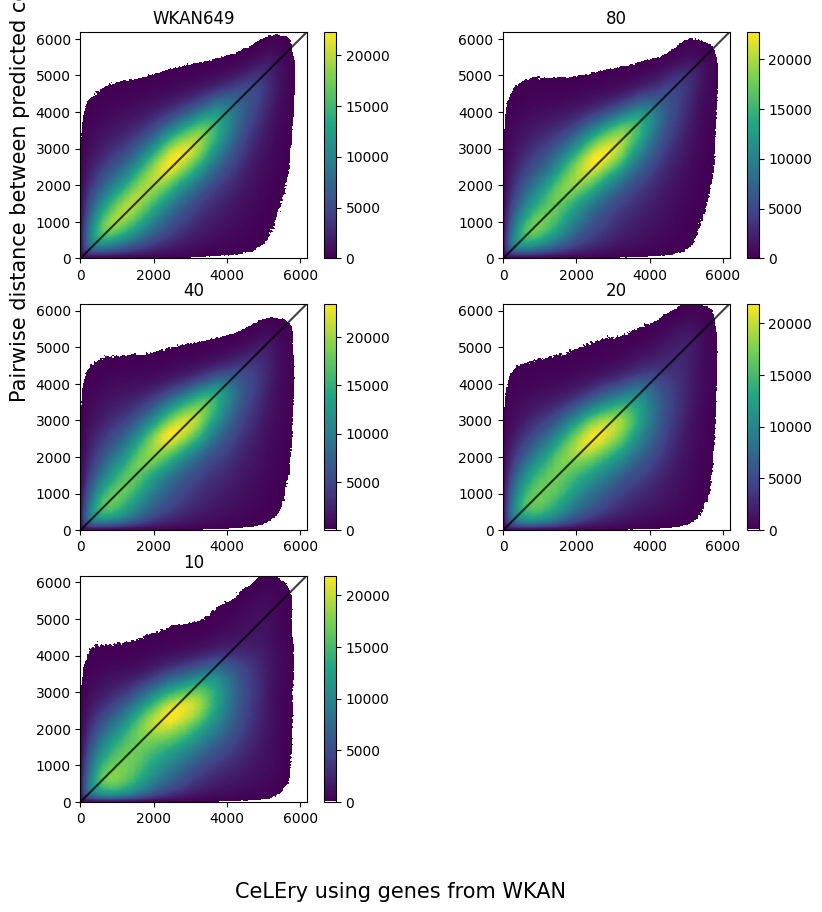

In [41]:
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

max_lim = np.max([np.max(true_dist)])


def using_mpl_scatter_density(ax, x, y, title, label=True):
    density = ax.scatter_density(x, y, cmap=white_viridis)
    plt.title(title)
    if label:
        plt.ylabel("Pairwise distance between predicted coordinates", fontsize=15)
    lims = [0, max_lim]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal', adjustable='box')
    plt.ylim((0, max_lim))
    plt.xlim((0, max_lim))
    fig.colorbar(density)
    
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,2,1,projection='scatter_density')
using_mpl_scatter_density(ax1, true_dist, Celery649result, title="WKAN649")
ax2 = fig.add_subplot(3,2,2,projection='scatter_density')
using_mpl_scatter_density(ax2, true_dist, WKAN80Celeryresult, title="80", label=False)
ax3 = fig.add_subplot(3,2,3,projection='scatter_density')
using_mpl_scatter_density(ax3, true_dist, WKAN40Celeryresult, title="40", label=False)
ax4 = fig.add_subplot(3,2,4,projection='scatter_density')
using_mpl_scatter_density(ax4, true_dist, WKAN20Celeryresult, title="20", label=False)
ax5 = fig.add_subplot(3,2,5,projection='scatter_density')
using_mpl_scatter_density(ax5, true_dist, WKAN10Celeryresult, title="10", label=False)
fig.text(0.5, 0.02, 'CeLEry using genes from WKAN', va='center', ha='center', fontsize=15)

figname = "CeLEry using genes from WKAN.pdf"
fig.savefig(figname)
# plt.close(fig)
plt.show

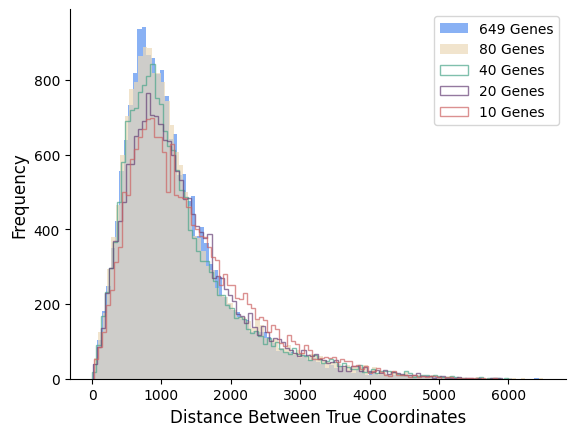

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.style.available

# 设置图形的整体风格（取消网格风格）
# plt.style.use('seaborn-white')

# 创建一个新的图形和坐标轴对象
fig, ax = plt.subplots()

# 样本数据（请替换为实际数据）
data0 = Celery649result
data1 = WKAN80Celeryresult
data2 = WKAN40Celeryresult
data3 = WKAN20Celeryresult
data4 = WKAN10Celeryresult
# 绘制直方图
bins = 100  # 箱子的数量
alpha = 0.7  # 透明度

ax.hist(data0, bins=bins, alpha=alpha, label='649 Genes', color='#5790f0')
ax.hist(data1, bins=bins, alpha=alpha, label='80 Genes', color='#ecd9b9', histtype='stepfilled')
ax.hist(data2, bins=bins, alpha=alpha, label='40 Genes', color='#4ba68a', histtype='step')
ax.hist(data3, bins=bins, alpha=alpha, label='20 Genes', color='#674176', histtype='step')
ax.hist(data4, bins=bins, alpha=alpha, label='10 Genes', color='#cd6262', histtype='step')

# 设置标题和标签
# ax.set_title('Different Number of Genes', fontsize=14)
ax.set_xlabel('Distance Between True Coordinates', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# 添加图例
ax.legend(loc='upper right', fontsize=10)

# 隐藏网格线
ax.grid(False)

# 调整x轴和y轴的位置
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 确保 y 轴从 0 开始
ax.set_ylim(bottom=0)
# 保存图形
plt.savefig("Histogram_WKAN_Celery_result", dpi=1300)

# 显示图形
plt.show()

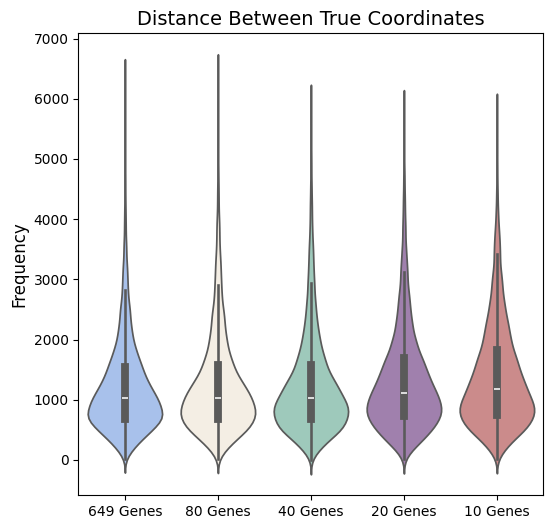

In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data0 = Celery649result
data1 = WKAN80Celeryresult
data2 = WKAN40Celeryresult
data3 = WKAN20Celeryresult
data4 = WKAN10Celeryresult
# 将数据转换为列表以便于绘图
data = [data0, data1, data2, data3, data4]

# 设置图形的整体风格
# plt.style.use('seaborn-whitegrid')

colorlist = ['#9dbef6','#f7efe1', '#97d0be' ,'#a378b5','#d68080']
# 创建箱型图
plt.figure(figsize=(6,6))
sns.violinplot(data=data, palette= colorlist)

# 设置标题和标签
plt.title('Distance Between True Coordinates', fontsize=14)
# plt.xlabel('Categories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 设置x轴标签
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['649 Genes', '80 Genes', '40 Genes', '20 Genes', '10 Genes'])

plt.savefig("violinplot_Celery_WKAN", dpi=1300)


# 显示图形
plt.show()

# HVG

In [18]:
# 80

In [45]:
sc.pp.highly_variable_genes(Rdata_scenario2, n_top_genes=80)
Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

View of AnnData object with n_obs × n_vars = 8770 × 80
    obs: 'x_cord', 'y_cord'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'leiden', 'hvg'
    obsp: 'distances', 'connectivities'

In [46]:
Rdata_scenario2_HVG80= Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_left_HVG80 = d11_left[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_right_HVG80 = d11_right[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

In [21]:
model = Fit_cord_DNN (data_train = Rdata_scenario2_HVG80, 
                      hidden_dims = [30, 25, 15], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "Celery3_HVG80")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:1, Loss:83.0305


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.76it/s]


Epoch:2, Loss:70.2807


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:3, Loss:65.9990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:4, Loss:62.5669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:5, Loss:60.1177


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:6, Loss:58.4360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.76it/s]


Epoch:7, Loss:56.8410


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:8, Loss:55.3102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:9, Loss:54.1086


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.77it/s]


Epoch:10, Loss:52.7253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:11, Loss:52.1564


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:12, Loss:51.2611


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.35it/s]


Epoch:13, Loss:50.4357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.67it/s]


Epoch:14, Loss:49.7998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:15, Loss:49.2042


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.17it/s]


Epoch:16, Loss:48.5329


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.13it/s]


Epoch:17, Loss:48.1375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.29it/s]


Epoch:18, Loss:47.7249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:19, Loss:47.0296


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:20, Loss:46.7647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:21, Loss:46.2311


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.54it/s]


Epoch:22, Loss:45.6037


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.97it/s]


Epoch:23, Loss:45.6631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.39it/s]


Epoch:24, Loss:44.9944


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.34it/s]


Epoch:25, Loss:44.4386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:26, Loss:44.4069


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:27, Loss:44.2589


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.57it/s]


Epoch:28, Loss:43.6732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.43it/s]


Epoch:29, Loss:43.5405


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:30, Loss:43.2982


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.91it/s]


Epoch:31, Loss:43.1750


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:32, Loss:42.9103


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.82it/s]


Epoch:33, Loss:42.5290


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.07it/s]


Epoch:34, Loss:42.4429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:35, Loss:42.0637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:36, Loss:42.1488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:37, Loss:41.7844


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.24it/s]


Epoch:38, Loss:41.3435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.82it/s]


Epoch:39, Loss:41.3219


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:40, Loss:41.6046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:41, Loss:41.0956


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.20it/s]


Epoch:42, Loss:40.9420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:43, Loss:40.8617


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.36it/s]


Epoch:44, Loss:40.3171


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.85it/s]


Epoch:45, Loss:40.2579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.95it/s]


Epoch:46, Loss:40.0452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:47, Loss:40.0292


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:48, Loss:40.0450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:49, Loss:39.9604


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.94it/s]


Epoch:50, Loss:39.2873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:51, Loss:39.4653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.99it/s]


Epoch:52, Loss:39.4611


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:53, Loss:39.3946


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.62it/s]


Epoch:54, Loss:39.0273


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.23it/s]


Epoch:55, Loss:39.1166


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.77it/s]


Epoch:56, Loss:39.1991


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:57, Loss:38.9268


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.92it/s]


Epoch:58, Loss:39.0862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.01it/s]


Epoch:59, Loss:38.4660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:60, Loss:38.6208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.34it/s]


Epoch:61, Loss:38.5696


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.37it/s]


Epoch:62, Loss:38.5111


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.86it/s]


Epoch:63, Loss:38.3374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.18it/s]


Epoch:64, Loss:38.3631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:65, Loss:38.2400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.01it/s]


Epoch:66, Loss:37.8887


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.43it/s]


Epoch:67, Loss:38.1236
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.34it/s]


Epoch:68, Loss:34.7905


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.95it/s]


Epoch:69, Loss:33.8605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:70, Loss:33.6910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:71, Loss:33.4321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:72, Loss:33.1988


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.43it/s]


Epoch:73, Loss:33.1735


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.62it/s]


Epoch:74, Loss:33.0385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:75, Loss:33.0340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.00it/s]


Epoch:76, Loss:33.0540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.07it/s]


Epoch:77, Loss:32.9855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.82it/s]


Epoch:78, Loss:32.7662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:79, Loss:32.6972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.24it/s]


Epoch:80, Loss:32.5206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:81, Loss:32.6712


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:82, Loss:32.5414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:83, Loss:32.4256


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.94it/s]


Epoch:84, Loss:32.5343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.00it/s]


Epoch:85, Loss:32.4972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.39it/s]


Epoch:86, Loss:32.2685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:87, Loss:32.2994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.54it/s]


Epoch:88, Loss:32.3565


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:89, Loss:32.2105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.60it/s]


Epoch:90, Loss:32.1320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.10it/s]


Epoch:91, Loss:32.0501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.24it/s]


Epoch:92, Loss:31.8610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:93, Loss:32.0291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.88it/s]


Epoch:94, Loss:31.9518


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.32it/s]


Epoch:95, Loss:31.8372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:96, Loss:31.8743


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:97, Loss:31.8849


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.28it/s]


Epoch:98, Loss:31.8234


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.59it/s]


Epoch:99, Loss:31.8091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.07it/s]


Epoch:100, Loss:31.6772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:101, Loss:31.7292


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:102, Loss:31.5521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.11it/s]


Epoch:103, Loss:31.6457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.06it/s]


Epoch:104, Loss:31.4107


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.43it/s]


Epoch:105, Loss:31.5737


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.85it/s]


Epoch:106, Loss:31.2805


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.94it/s]


Epoch:107, Loss:31.4285
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:108, Loss:29.6515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.62it/s]


Epoch:109, Loss:29.2431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.71it/s]


Epoch:110, Loss:29.0977


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.81it/s]


Epoch:111, Loss:29.0153


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.11it/s]


Epoch:112, Loss:28.9540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:113, Loss:28.9294


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.24it/s]


Epoch:114, Loss:28.8842


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.71it/s]


Epoch:115, Loss:28.7241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.68it/s]


Epoch:116, Loss:28.8371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:117, Loss:28.7502


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:118, Loss:28.6925


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:119, Loss:28.6220


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.76it/s]


Epoch:120, Loss:28.6259


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.36it/s]


Epoch:121, Loss:28.5824


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.15it/s]


Epoch:122, Loss:28.5555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:123, Loss:28.5173


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.95it/s]


Epoch:124, Loss:28.5250


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:125, Loss:28.4749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.34it/s]


Epoch:126, Loss:28.4602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:127, Loss:28.5001


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.54it/s]


Epoch:128, Loss:28.4156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.26it/s]


Epoch:129, Loss:28.4512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:130, Loss:28.4146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.74it/s]


Epoch:131, Loss:28.3486


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:132, Loss:28.4261


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:133, Loss:28.4004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.77it/s]


Epoch:134, Loss:28.3062


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:135, Loss:28.3486


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.77it/s]


Epoch:136, Loss:28.2559


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.55it/s]


Epoch:137, Loss:28.3315


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.95it/s]


Epoch:138, Loss:28.3578


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:139, Loss:28.2664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:140, Loss:28.2861


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.19it/s]


Epoch:141, Loss:28.1996


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:142, Loss:28.2563


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:143, Loss:28.2321
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.07it/s]


Epoch:144, Loss:27.3402


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:145, Loss:27.1217


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:146, Loss:27.1010


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.18it/s]


Epoch:147, Loss:27.0474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:148, Loss:27.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:149, Loss:27.0434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.46it/s]


Epoch:150, Loss:27.0150


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]


Epoch:151, Loss:26.9979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:152, Loss:26.9656


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:153, Loss:26.9544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:154, Loss:26.9734


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.55it/s]


Epoch:155, Loss:26.9133


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.75it/s]


Epoch:156, Loss:26.9385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.97it/s]


Epoch:157, Loss:26.9426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.95it/s]


Epoch:158, Loss:26.9112


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:159, Loss:26.9180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:160, Loss:26.8834


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.96it/s]


Epoch:161, Loss:26.9021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.57it/s]


Epoch:162, Loss:26.8191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.85it/s]


Epoch:163, Loss:26.8629


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.38it/s]


Epoch:164, Loss:26.8377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.43it/s]


Epoch:165, Loss:26.8446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:166, Loss:26.8389


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.07it/s]


Epoch:167, Loss:26.8130


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.02it/s]


Epoch:168, Loss:26.7914


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.34it/s]


Epoch:169, Loss:26.8231


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.56it/s]


Epoch:170, Loss:26.7713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.62it/s]


Epoch:171, Loss:26.7844


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.87it/s]


Epoch:172, Loss:26.7613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:173, Loss:26.7710


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:174, Loss:26.7655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]


Epoch:175, Loss:26.7525


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.07it/s]


Epoch:176, Loss:26.7393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.82it/s]


Epoch:177, Loss:26.7769
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.09it/s]


Epoch:178, Loss:26.2633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.55it/s]


Epoch:179, Loss:26.1847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.85it/s]


Epoch:180, Loss:26.1938


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:181, Loss:26.1816


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:182, Loss:26.1742


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:183, Loss:26.1529


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:184, Loss:26.1444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.29it/s]


Epoch:185, Loss:26.1385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.87it/s]


Epoch:186, Loss:26.1383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.57it/s]


Epoch:187, Loss:26.1330


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.95it/s]


Epoch:188, Loss:26.1314


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.63it/s]


Epoch:189, Loss:26.1198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.20it/s]


Epoch:190, Loss:26.1152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.24it/s]


Epoch:191, Loss:26.1159


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:192, Loss:26.1015


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.36it/s]


Epoch:193, Loss:26.0999


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.97it/s]


Epoch:194, Loss:26.1024


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:195, Loss:26.0972


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.56it/s]


Epoch:196, Loss:26.0979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.55it/s]


Epoch:197, Loss:26.0876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.95it/s]


Epoch:198, Loss:26.0926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.39it/s]


Epoch:199, Loss:26.1124


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:200, Loss:26.0753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.77it/s]


Epoch:201, Loss:26.0900


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.02it/s]


Epoch:202, Loss:26.0652


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:203, Loss:26.0858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.76it/s]


Epoch:204, Loss:26.0748


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:205, Loss:26.0642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:206, Loss:26.0678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.43it/s]


Epoch:207, Loss:26.0580


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.95it/s]


Epoch:208, Loss:26.0424


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:209, Loss:26.0408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.75it/s]


Epoch:210, Loss:26.0469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.18it/s]


Epoch:211, Loss:26.0248


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.01it/s]


Epoch:212, Loss:26.0541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:213, Loss:26.0393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]


Epoch:214, Loss:26.0477


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.59it/s]


Epoch:215, Loss:26.0431
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.41it/s]


Epoch:216, Loss:25.7766


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.97it/s]


Epoch:217, Loss:25.7480


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.55it/s]


Epoch:218, Loss:25.7394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.85it/s]


Epoch:219, Loss:25.7514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.51it/s]


Epoch:220, Loss:25.7317


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.18it/s]


Epoch:221, Loss:25.7287


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]


Epoch:222, Loss:25.7434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.41it/s]


Epoch:223, Loss:25.7316


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:224, Loss:25.7449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:225, Loss:25.7337


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.77it/s]


Epoch:226, Loss:25.7355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.57it/s]


Epoch:227, Loss:25.7251


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:228, Loss:25.7187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:229, Loss:25.7222


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.24it/s]


Epoch:230, Loss:25.7177


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:231, Loss:25.7057


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.95it/s]


Epoch:232, Loss:25.7174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.87it/s]


Epoch:233, Loss:25.7214


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.68it/s]


Epoch:234, Loss:25.7056


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.41it/s]


Epoch:235, Loss:25.7057


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.05it/s]


Epoch:236, Loss:25.7078


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.59it/s]


Epoch:237, Loss:25.6966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.07it/s]


Epoch:238, Loss:25.7192


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.43it/s]


Epoch:239, Loss:25.6885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.61it/s]


Epoch:240, Loss:25.7018


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:241, Loss:25.7035


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:242, Loss:25.6889
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.98it/s]


Epoch:243, Loss:25.5493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.77it/s]


Epoch:244, Loss:25.5416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:245, Loss:25.5513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.77it/s]


Epoch:246, Loss:25.5419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.37it/s]


Epoch:247, Loss:25.5379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.17it/s]


Epoch:248, Loss:25.5360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.34it/s]


Epoch:249, Loss:25.5409


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:250, Loss:25.5330


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.62it/s]


Epoch:251, Loss:25.5289


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.76it/s]


Epoch:252, Loss:25.5337


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:253, Loss:25.5376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.85it/s]


Epoch:254, Loss:25.5327


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.94it/s]


Epoch:255, Loss:25.5339


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.07it/s]


Epoch:256, Loss:25.5230


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.01it/s]


Epoch:257, Loss:25.5248


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.36it/s]


Epoch:258, Loss:25.5268


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.97it/s]


Epoch:259, Loss:25.5244


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.02it/s]


Epoch:260, Loss:25.5210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:261, Loss:25.5442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:262, Loss:25.5246


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:263, Loss:25.5282


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.67it/s]


Epoch:264, Loss:25.5198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.67it/s]


Epoch:265, Loss:25.5246


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.81it/s]


Epoch:266, Loss:25.5286
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.60it/s]


Epoch:267, Loss:25.4455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:268, Loss:25.4433


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]


Epoch:269, Loss:25.4409


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.54it/s]


Epoch:270, Loss:25.4424


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.37it/s]


Epoch:271, Loss:25.4380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.63it/s]


Epoch:272, Loss:25.4384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.24it/s]


Epoch:273, Loss:25.4355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:274, Loss:25.4361


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.94it/s]


Epoch:275, Loss:25.4371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.39it/s]


Epoch:276, Loss:25.4372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.63it/s]


Epoch:277, Loss:25.4324


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.36it/s]


Epoch:278, Loss:25.4381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.74it/s]


Epoch:279, Loss:25.4349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.55it/s]


Epoch:280, Loss:25.4320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:281, Loss:25.4367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.26it/s]


Epoch:282, Loss:25.4337


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.98it/s]


Epoch:283, Loss:25.4380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:284, Loss:25.4293


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:285, Loss:25.4300


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:286, Loss:25.4287


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.95it/s]


Epoch:287, Loss:25.4291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.68it/s]


Epoch:288, Loss:25.4364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:289, Loss:25.4291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:290, Loss:25.4275


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:291, Loss:25.4247


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.34it/s]


Epoch:292, Loss:25.4292
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.96it/s]


Epoch:293, Loss:25.3880


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.75it/s]


Epoch:294, Loss:25.3861


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.32it/s]


Epoch:295, Loss:25.3912


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:296, Loss:25.3950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:297, Loss:25.3857


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.70it/s]


Epoch:298, Loss:25.3880


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.29it/s]


Epoch:299, Loss:25.3885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.75it/s]


Epoch:300, Loss:25.3903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:301, Loss:25.3839


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.58it/s]


Epoch:302, Loss:25.3858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:303, Loss:25.3885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.18it/s]


Epoch:304, Loss:25.3844


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.27it/s]


Epoch:305, Loss:25.3859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.53it/s]


Epoch:306, Loss:25.3862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.37it/s]


Epoch:307, Loss:25.3826


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:308, Loss:25.3887


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:309, Loss:25.3830


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:310, Loss:25.3958


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:311, Loss:25.3870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:312, Loss:25.3802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.43it/s]


Epoch:313, Loss:25.4010
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:314, Loss:25.3625


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.10it/s]


Epoch:315, Loss:25.3594


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.24it/s]


Epoch:316, Loss:25.3604


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:317, Loss:25.3607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.00it/s]


Epoch:318, Loss:25.3660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.94it/s]


Epoch:319, Loss:25.3660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.18it/s]


Epoch:320, Loss:25.3590


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.38it/s]


Epoch:321, Loss:25.3648


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.57it/s]


Epoch:322, Loss:25.3602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.77it/s]


Epoch:323, Loss:25.3611


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:324, Loss:25.3578


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:325, Loss:25.3586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.67it/s]


Epoch:326, Loss:25.3643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:327, Loss:25.3595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.95it/s]


Epoch:328, Loss:25.3596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.56it/s]


Epoch:329, Loss:25.3616


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.15it/s]


Epoch:330, Loss:25.3614


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.29it/s]


Epoch:331, Loss:25.3592


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:332, Loss:25.3659
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.13it/s]


Epoch:333, Loss:25.3554


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.98it/s]


Epoch:334, Loss:25.3464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.19it/s]


Epoch:335, Loss:25.3464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:336, Loss:25.3500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:337, Loss:25.3540


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.67it/s]


Epoch:338, Loss:25.3482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.17it/s]


Epoch:339, Loss:25.3524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:340, Loss:25.3484


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.00it/s]


Epoch:341, Loss:25.3623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.43it/s]


Epoch:342, Loss:25.3468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.91it/s]


Epoch:343, Loss:25.3605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.76it/s]


Epoch:344, Loss:25.3499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.80it/s]


Epoch:345, Loss:25.3489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.74it/s]


Epoch:346, Loss:25.3490


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 606.30it/s]


Epoch:347, Loss:25.3621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 587.62it/s]


Epoch:348, Loss:25.3465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.53it/s]


Epoch:349, Loss:25.3459


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.74it/s]


Epoch:350, Loss:25.3450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 617.75it/s]


Epoch:351, Loss:25.3623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 572.14it/s]


Epoch:352, Loss:25.3462
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 576.65it/s]


Epoch:353, Loss:25.3404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 627.11it/s]


Epoch:354, Loss:25.3456


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.08it/s]


Epoch:355, Loss:25.3396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 614.80it/s]


Epoch:356, Loss:25.3488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 599.84it/s]


Epoch:357, Loss:25.3436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.39it/s]


Epoch:358, Loss:25.3525


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.10it/s]


Epoch:359, Loss:25.3402


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:360, Loss:25.3500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:361, Loss:25.3425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:362, Loss:25.3415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:363, Loss:25.3393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.91it/s]


Epoch:364, Loss:25.3451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.87it/s]


Epoch:365, Loss:25.3487


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 592.22it/s]


Epoch:366, Loss:25.3420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.08it/s]


Epoch:367, Loss:25.3394


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.77it/s]


Epoch:368, Loss:25.3428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:369, Loss:25.3448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 630.35it/s]


Epoch:370, Loss:25.3469
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 626.39it/s]


Epoch:371, Loss:25.3388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 614.11it/s]


Epoch:372, Loss:25.3364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 596.90it/s]


Epoch:373, Loss:25.3517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 584.02it/s]


Epoch:374, Loss:25.3402


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 608.49it/s]


Epoch:375, Loss:25.3473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 609.34it/s]


Epoch:376, Loss:25.3391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:377, Loss:25.3391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]


Epoch:378, Loss:25.3413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 612.91it/s]


Epoch:379, Loss:25.3374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.09it/s]


Epoch:380, Loss:25.3388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.18it/s]


Epoch:381, Loss:25.3458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 618.09it/s]


Epoch:382, Loss:25.3377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.43it/s]


Epoch:383, Loss:25.3390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 626.57it/s]


Epoch:384, Loss:25.3434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 586.83it/s]


Epoch:385, Loss:25.3447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:386, Loss:25.3528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.77it/s]


Epoch:387, Loss:25.3374
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.54it/s]


Epoch:388, Loss:25.3350


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:389, Loss:25.3350


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:390, Loss:25.3371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:391, Loss:25.3413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.35it/s]


Epoch:392, Loss:25.3466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.56it/s]


Epoch:393, Loss:25.3459


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:394, Loss:25.3385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:395, Loss:25.3392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:396, Loss:25.3390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.94it/s]


Epoch:397, Loss:25.3402


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:398, Loss:25.3390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:399, Loss:25.3363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.64it/s]


Epoch:400, Loss:25.3407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:401, Loss:25.3355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.56it/s]


Epoch:402, Loss:25.3372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]

Epoch:403, Loss:25.3353
New learning rate:6.103515625e-08
Folder already exists


In [66]:
HVG80Celeryresult = Coordinate_Distance_Result(d11, d11_left = d11_left_HVG80, #
                           d11_right = d11_right_HVG80,#
                           data_train = Rdata_scenario2_HVG80, #
                           path = "output/DNN_MERFISH", filename = "Celery3_HVG80" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_HVG80_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_HVG80_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2609.08it/s]


PearsonRResult(statistic=0.3092554662758201, pvalue=0.0)
1440.6889868367875
1685.4816906271133


In [47]:
HVG80Celeryresult = Coordinate_Distance(d11_left = d11_left_HVG80, #
                           d11_right = d11_right_HVG80,#
                           data_train = Rdata_scenario2_HVG80, #
                           path = "output/DNN_MERFISH", filename = "Celery3_HVG80" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_HVG80_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_HVG80_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 2195.57it/s]


In [22]:
# 40

In [48]:
sc.pp.highly_variable_genes(Rdata_scenario2, n_top_genes=40)
Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

View of AnnData object with n_obs × n_vars = 8770 × 40
    obs: 'x_cord', 'y_cord'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'leiden', 'hvg'
    obsp: 'distances', 'connectivities'

In [49]:
Rdata_scenario2_HVG40= Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_left_HVG40 = d11_left[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_right_HVG40 = d11_right[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

In [25]:
model = Fit_cord_DNN (data_train = Rdata_scenario2_HVG40, 
                      hidden_dims = [30, 25, 15], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "Celery3_HVG40")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:1, Loss:89.2509


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:2, Loss:77.9020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.00it/s]


Epoch:3, Loss:74.8259


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.64it/s]


Epoch:4, Loss:72.6400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.90it/s]


Epoch:5, Loss:70.9735


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.03it/s]


Epoch:6, Loss:69.7510


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.60it/s]


Epoch:7, Loss:68.5307


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.67it/s]


Epoch:8, Loss:67.4660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.10it/s]


Epoch:9, Loss:66.7872


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.89it/s]


Epoch:10, Loss:66.2363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:11, Loss:65.7237


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.32it/s]


Epoch:12, Loss:64.9242


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:13, Loss:64.4661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.95it/s]


Epoch:14, Loss:64.1833


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:15, Loss:63.4611


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.32it/s]


Epoch:16, Loss:63.1445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.27it/s]


Epoch:17, Loss:62.6479


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.53it/s]


Epoch:18, Loss:62.2756


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.94it/s]


Epoch:19, Loss:62.0990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 691.14it/s]


Epoch:20, Loss:61.7661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.18it/s]


Epoch:21, Loss:61.0725


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.27it/s]


Epoch:22, Loss:60.9322


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.11it/s]


Epoch:23, Loss:60.6573


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:24, Loss:60.3218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:25, Loss:60.1978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.80it/s]


Epoch:26, Loss:59.8112


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.87it/s]


Epoch:27, Loss:59.4042


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:28, Loss:59.2126


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.38it/s]


Epoch:29, Loss:58.6980


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:30, Loss:58.9827


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:31, Loss:58.3599


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:32, Loss:58.4730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:33, Loss:58.3307


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.34it/s]


Epoch:34, Loss:57.8870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:35, Loss:57.8637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:36, Loss:57.7233


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:37, Loss:57.2666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.15it/s]


Epoch:38, Loss:57.1787


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.02it/s]


Epoch:39, Loss:57.0357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.56it/s]


Epoch:40, Loss:57.0216


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.03it/s]


Epoch:41, Loss:56.5752


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:42, Loss:56.7028


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.27it/s]


Epoch:43, Loss:56.2943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:44, Loss:56.4190


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.94it/s]


Epoch:45, Loss:55.7910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:46, Loss:55.9358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.06it/s]


Epoch:47, Loss:55.8343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.82it/s]


Epoch:48, Loss:55.6862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.68it/s]


Epoch:49, Loss:55.5754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.39it/s]


Epoch:50, Loss:55.3533


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.64it/s]


Epoch:51, Loss:55.5697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.34it/s]


Epoch:52, Loss:55.2313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.58it/s]


Epoch:53, Loss:54.9647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:54, Loss:55.2427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.03it/s]


Epoch:55, Loss:54.8817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.27it/s]


Epoch:56, Loss:54.8847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.77it/s]


Epoch:57, Loss:54.6631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.63it/s]


Epoch:58, Loss:54.6195


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.00it/s]


Epoch:59, Loss:54.2788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.06it/s]


Epoch:60, Loss:54.2520


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.75it/s]


Epoch:61, Loss:54.4430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.77it/s]


Epoch:62, Loss:54.2009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.54it/s]


Epoch:63, Loss:53.9947


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:64, Loss:54.1269


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.94it/s]


Epoch:65, Loss:54.0533


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:66, Loss:53.6866


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:67, Loss:53.7568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:68, Loss:53.8815


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:69, Loss:53.6317


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:70, Loss:53.4953


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:71, Loss:53.3020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:72, Loss:53.4219
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:73, Loss:51.0056


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.75it/s]


Epoch:74, Loss:50.1576


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:75, Loss:49.8808


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.77it/s]


Epoch:76, Loss:49.6104


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:77, Loss:49.5175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.80it/s]


Epoch:78, Loss:49.2934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:79, Loss:49.3578


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:80, Loss:49.0716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:81, Loss:49.2625


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.55it/s]


Epoch:82, Loss:49.1115


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:83, Loss:48.8909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:84, Loss:48.8312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.08it/s]


Epoch:85, Loss:48.8826


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.62it/s]


Epoch:86, Loss:48.7398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.15it/s]


Epoch:87, Loss:48.6303


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.97it/s]


Epoch:88, Loss:48.6398


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.53it/s]


Epoch:89, Loss:48.4185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.71it/s]


Epoch:90, Loss:48.5428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.63it/s]


Epoch:91, Loss:48.4506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.88it/s]


Epoch:92, Loss:48.3823


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.98it/s]


Epoch:93, Loss:48.5355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.85it/s]


Epoch:94, Loss:48.1941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:95, Loss:48.2791


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.60it/s]


Epoch:96, Loss:48.3633


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:97, Loss:48.2011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.17it/s]


Epoch:98, Loss:48.3129


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.29it/s]


Epoch:99, Loss:48.0439


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.82it/s]


Epoch:100, Loss:48.1804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.16it/s]


Epoch:101, Loss:48.0914


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.61it/s]


Epoch:102, Loss:47.9301


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.08it/s]


Epoch:103, Loss:47.9925
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.95it/s]


Epoch:104, Loss:46.4349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:105, Loss:46.1957


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:106, Loss:46.1309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.62it/s]


Epoch:107, Loss:45.9890


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:108, Loss:46.0094


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:109, Loss:45.9449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:110, Loss:45.8745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:111, Loss:45.8857


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.77it/s]


Epoch:112, Loss:45.7816


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.12it/s]


Epoch:113, Loss:45.7765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.26it/s]


Epoch:114, Loss:45.7861


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:115, Loss:45.6929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:116, Loss:45.7180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:117, Loss:45.6784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:118, Loss:45.5582


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.96it/s]


Epoch:119, Loss:45.6378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.54it/s]


Epoch:120, Loss:45.6067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:121, Loss:45.5371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.95it/s]


Epoch:122, Loss:45.5123


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.15it/s]


Epoch:123, Loss:45.4501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.81it/s]


Epoch:124, Loss:45.5282


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.32it/s]


Epoch:125, Loss:45.4616


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.06it/s]


Epoch:126, Loss:45.4820


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.77it/s]


Epoch:127, Loss:45.4534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.88it/s]


Epoch:128, Loss:45.3828


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.60it/s]


Epoch:129, Loss:45.3842


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.82it/s]


Epoch:130, Loss:45.3070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.29it/s]


Epoch:131, Loss:45.4076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.00it/s]


Epoch:132, Loss:45.3600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.68it/s]


Epoch:133, Loss:45.3683


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.75it/s]


Epoch:134, Loss:45.3138
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:135, Loss:44.4536


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.74it/s]


Epoch:136, Loss:44.3111


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:137, Loss:44.3228


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:138, Loss:44.2518


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.26it/s]


Epoch:139, Loss:44.2686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.16it/s]


Epoch:140, Loss:44.2157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.94it/s]


Epoch:141, Loss:44.2259


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.91it/s]


Epoch:142, Loss:44.2114


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.54it/s]


Epoch:143, Loss:44.2196


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.37it/s]


Epoch:144, Loss:44.1964


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:145, Loss:44.1923


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:146, Loss:44.1697


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:147, Loss:44.1474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:148, Loss:44.0974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:149, Loss:44.0921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.76it/s]


Epoch:150, Loss:44.0847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:151, Loss:44.1113


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.95it/s]


Epoch:152, Loss:44.0442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.27it/s]


Epoch:153, Loss:44.0435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.88it/s]


Epoch:154, Loss:44.0491


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.48it/s]


Epoch:155, Loss:44.0430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:156, Loss:44.0033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.15it/s]


Epoch:157, Loss:44.0116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:158, Loss:44.0081


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:159, Loss:44.0195


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:160, Loss:43.9730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.74it/s]


Epoch:161, Loss:43.9892


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.61it/s]


Epoch:162, Loss:43.9452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:163, Loss:43.8855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.89it/s]


Epoch:164, Loss:43.9489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.82it/s]


Epoch:165, Loss:43.9190


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.74it/s]


Epoch:166, Loss:43.9389


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.39it/s]


Epoch:167, Loss:43.8611


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.03it/s]


Epoch:168, Loss:43.9176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.03it/s]


Epoch:169, Loss:43.9073
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.15it/s]


Epoch:170, Loss:43.3979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.06it/s]


Epoch:171, Loss:43.3787


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:172, Loss:43.3376


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.61it/s]


Epoch:173, Loss:43.3466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:174, Loss:43.3500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:175, Loss:43.3494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:176, Loss:43.3098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.43it/s]


Epoch:177, Loss:43.3380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.91it/s]


Epoch:178, Loss:43.3371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.32it/s]


Epoch:179, Loss:43.3177


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:180, Loss:43.3203


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.23it/s]


Epoch:181, Loss:43.2848


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.38it/s]


Epoch:182, Loss:43.3020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:183, Loss:43.2921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.54it/s]


Epoch:184, Loss:43.2834


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.99it/s]


Epoch:185, Loss:43.2744


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:186, Loss:43.2692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.75it/s]


Epoch:187, Loss:43.2732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.35it/s]


Epoch:188, Loss:43.2733


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.46it/s]


Epoch:189, Loss:43.2675


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:190, Loss:43.2694


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.28it/s]


Epoch:191, Loss:43.2570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:192, Loss:43.2450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.19it/s]


Epoch:193, Loss:43.2388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.81it/s]


Epoch:194, Loss:43.2819


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.58it/s]


Epoch:195, Loss:43.2419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.18it/s]


Epoch:196, Loss:43.2171


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.24it/s]


Epoch:197, Loss:43.2397
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.12it/s]


Epoch:198, Loss:42.9729


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.42it/s]


Epoch:199, Loss:42.9602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.53it/s]


Epoch:200, Loss:42.9579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.02it/s]


Epoch:201, Loss:42.9605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.94it/s]


Epoch:202, Loss:42.9579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.06it/s]


Epoch:203, Loss:42.9321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.63it/s]


Epoch:204, Loss:42.9233


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.06it/s]


Epoch:205, Loss:42.9455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.54it/s]


Epoch:206, Loss:42.9290


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.25it/s]


Epoch:207, Loss:42.9255


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.17it/s]


Epoch:208, Loss:42.9354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.31it/s]


Epoch:209, Loss:42.9126


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.48it/s]


Epoch:210, Loss:42.9286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 689.62it/s]


Epoch:211, Loss:42.9256


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.06it/s]


Epoch:212, Loss:42.9227


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:213, Loss:42.9202


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:214, Loss:42.9241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:215, Loss:42.9237


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.32it/s]


Epoch:216, Loss:42.9130


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.18it/s]


Epoch:217, Loss:42.8996


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.11it/s]


Epoch:218, Loss:42.9025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.70it/s]


Epoch:219, Loss:42.9033
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:220, Loss:42.7698


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.82it/s]


Epoch:221, Loss:42.7608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.53it/s]


Epoch:222, Loss:42.7621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:223, Loss:42.7510


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.58it/s]


Epoch:224, Loss:42.7853


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.54it/s]


Epoch:225, Loss:42.7593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.60it/s]


Epoch:226, Loss:42.7482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.89it/s]


Epoch:227, Loss:42.7501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.03it/s]


Epoch:228, Loss:42.7684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.95it/s]


Epoch:229, Loss:42.7418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.27it/s]


Epoch:230, Loss:42.7434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.54it/s]


Epoch:231, Loss:42.7502


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.81it/s]


Epoch:232, Loss:42.7381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.57it/s]


Epoch:233, Loss:42.7557


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:234, Loss:42.7411


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.15it/s]


Epoch:235, Loss:42.7420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.70it/s]


Epoch:236, Loss:42.7368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.53it/s]


Epoch:237, Loss:42.7419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.49it/s]


Epoch:238, Loss:42.7468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.37it/s]


Epoch:239, Loss:42.7341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.24it/s]


Epoch:240, Loss:42.7380


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.91it/s]


Epoch:241, Loss:42.7368


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:242, Loss:42.7296


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:243, Loss:42.7268


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:244, Loss:42.7368
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.63it/s]


Epoch:245, Loss:42.6578


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.54it/s]


Epoch:246, Loss:42.6565


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 689.41it/s]


Epoch:247, Loss:42.6516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.11it/s]


Epoch:248, Loss:42.6494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.02it/s]


Epoch:249, Loss:42.6469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.81it/s]


Epoch:250, Loss:42.6534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.06it/s]


Epoch:251, Loss:42.6459


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.71it/s]


Epoch:252, Loss:42.6465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.70it/s]


Epoch:253, Loss:42.6688


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.03it/s]


Epoch:254, Loss:42.6471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:255, Loss:42.6445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:256, Loss:42.6462


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.99it/s]


Epoch:257, Loss:42.6397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.08it/s]


Epoch:258, Loss:42.6439


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.42it/s]


Epoch:259, Loss:42.6561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.82it/s]


Epoch:260, Loss:42.6431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.95it/s]


Epoch:261, Loss:42.6440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.95it/s]


Epoch:262, Loss:42.6437


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.69it/s]


Epoch:263, Loss:42.6388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.24it/s]


Epoch:264, Loss:42.6359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.48it/s]


Epoch:265, Loss:42.6478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:266, Loss:42.6474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.26it/s]


Epoch:267, Loss:42.6352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.60it/s]


Epoch:268, Loss:42.6413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:269, Loss:42.6462


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.03it/s]


Epoch:270, Loss:42.6466
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.19it/s]


Epoch:271, Loss:42.6011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.62it/s]


Epoch:272, Loss:42.5975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:273, Loss:42.5977


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.74it/s]


Epoch:274, Loss:42.5971


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.81it/s]


Epoch:275, Loss:42.6055


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.18it/s]


Epoch:276, Loss:42.6079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.90it/s]


Epoch:277, Loss:42.5935


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.06it/s]


Epoch:278, Loss:42.5949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.76it/s]


Epoch:279, Loss:42.6005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.46it/s]


Epoch:280, Loss:42.6022


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.42it/s]


Epoch:281, Loss:42.6004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:282, Loss:42.5970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:283, Loss:42.6060


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:284, Loss:42.5927


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.90it/s]


Epoch:285, Loss:42.5962


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.49it/s]


Epoch:286, Loss:42.5945


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.06it/s]


Epoch:287, Loss:42.5934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.82it/s]


Epoch:288, Loss:42.5992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.77it/s]


Epoch:289, Loss:42.5914


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 689.84it/s]


Epoch:290, Loss:42.5927


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.27it/s]


Epoch:291, Loss:42.5915
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.32it/s]


Epoch:292, Loss:42.5885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.10it/s]


Epoch:293, Loss:42.5814


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:294, Loss:42.5681


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.76it/s]


Epoch:295, Loss:42.5885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:296, Loss:42.5784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.34it/s]


Epoch:297, Loss:42.5750


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.67it/s]


Epoch:298, Loss:42.5738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.18it/s]


Epoch:299, Loss:42.5669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:300, Loss:42.5716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.01it/s]


Epoch:301, Loss:42.5780


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:302, Loss:42.5762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.58it/s]


Epoch:303, Loss:42.5713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:304, Loss:42.5693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.94it/s]


Epoch:305, Loss:42.5705


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.90it/s]


Epoch:306, Loss:42.5830


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.10it/s]


Epoch:307, Loss:42.5673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.60it/s]


Epoch:308, Loss:42.5725


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.32it/s]


Epoch:309, Loss:42.5772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.29it/s]


Epoch:310, Loss:42.5798
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.08it/s]


Epoch:311, Loss:42.5660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:312, Loss:42.5581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.48it/s]


Epoch:313, Loss:42.5657


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.03it/s]


Epoch:314, Loss:42.5608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.60it/s]


Epoch:315, Loss:42.5585


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:316, Loss:42.5583


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.34it/s]


Epoch:317, Loss:42.5621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.77it/s]


Epoch:318, Loss:42.5599


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.63it/s]


Epoch:319, Loss:42.5676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.88it/s]


Epoch:320, Loss:42.5551


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.39it/s]


Epoch:321, Loss:42.5596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.32it/s]


Epoch:322, Loss:42.5691


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:323, Loss:42.5627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.03it/s]


Epoch:324, Loss:42.5598


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:325, Loss:42.5564


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 689.19it/s]


Epoch:326, Loss:42.5946


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.54it/s]


Epoch:327, Loss:42.5751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.27it/s]


Epoch:328, Loss:42.5646
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.18it/s]


Epoch:329, Loss:42.5536


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.46it/s]


Epoch:330, Loss:42.5601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.39it/s]


Epoch:331, Loss:42.5877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.54it/s]


Epoch:332, Loss:42.5586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.12it/s]


Epoch:333, Loss:42.5704


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:334, Loss:42.5506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:335, Loss:42.5639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.64it/s]


Epoch:336, Loss:42.5559


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.53it/s]


Epoch:337, Loss:42.5730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.56it/s]


Epoch:338, Loss:42.5513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.90it/s]


Epoch:339, Loss:42.5543


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.91it/s]


Epoch:340, Loss:42.5480


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:341, Loss:42.5769


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.64it/s]


Epoch:342, Loss:42.5543


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.08it/s]


Epoch:343, Loss:42.5552


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.94it/s]


Epoch:344, Loss:42.5515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.10it/s]


Epoch:345, Loss:42.5622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.26it/s]


Epoch:346, Loss:42.5536
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.49it/s]


Epoch:347, Loss:42.5548


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.60it/s]


Epoch:348, Loss:42.5500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:349, Loss:42.5465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.95it/s]


Epoch:350, Loss:42.5531


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:351, Loss:42.5941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:352, Loss:42.5604


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:353, Loss:42.5581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.74it/s]


Epoch:354, Loss:42.5565


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.99it/s]


Epoch:355, Loss:42.5515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.95it/s]


Epoch:356, Loss:42.5686


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:357, Loss:42.5505


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:358, Loss:42.5655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.48it/s]


Epoch:359, Loss:42.5512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.58it/s]


Epoch:360, Loss:42.5878


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.48it/s]


Epoch:361, Loss:42.5494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.67it/s]


Epoch:362, Loss:42.5460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.76it/s]


Epoch:363, Loss:42.5468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:364, Loss:42.5732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:365, Loss:42.5557
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.06it/s]


Epoch:366, Loss:42.5521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.27it/s]


Epoch:367, Loss:42.5718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.54it/s]


Epoch:368, Loss:42.5457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.18it/s]


Epoch:369, Loss:42.5480


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 689.41it/s]


Epoch:370, Loss:42.5487


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.18it/s]


Epoch:371, Loss:42.5444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.03it/s]


Epoch:372, Loss:42.5483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.98it/s]


Epoch:373, Loss:42.5671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.96it/s]


Epoch:374, Loss:42.5478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.84it/s]


Epoch:375, Loss:42.5467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.24it/s]


Epoch:376, Loss:42.5542


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.75it/s]


Epoch:377, Loss:42.5563


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.90it/s]


Epoch:378, Loss:42.5515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.60it/s]


Epoch:379, Loss:42.5458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:380, Loss:42.5458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:381, Loss:42.5522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:382, Loss:42.5485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.99it/s]

Epoch:383, Loss:42.5533
New learning rate:6.103515625e-08
Folder already exists


In [67]:
HVG40Celeryresult = Coordinate_Distance_Result(d11, d11_left = d11_left_HVG40, #
                           d11_right = d11_right_HVG40,#
                           data_train = Rdata_scenario2_HVG40, #
                           path = "output/DNN_MERFISH", filename = "Celery3_HVG40" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_HVG40_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_HVG40_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2652.09it/s]


PearsonRResult(statistic=0.2851470180253397, pvalue=0.0)
1522.72546610931
1749.5828010672478


In [26]:
# 20

In [51]:
sc.pp.highly_variable_genes(Rdata_scenario2, n_top_genes=20)
Rdata_scenario2_HVG20= Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]


In [52]:
Rdata_scenario2_HVG20= Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_left_HVG20 = d11_left[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_right_HVG20 = d11_right[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

In [29]:

Fit_cord_DNN (data_train = Rdata_scenario2_HVG20, 
                      hidden_dims = [30, 25, 15], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "Celery3_HVG20")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:1, Loss:107.5321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:2, Loss:102.2232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.89it/s]


Epoch:3, Loss:100.6618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.96it/s]


Epoch:4, Loss:99.7445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:5, Loss:98.7800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:6, Loss:98.2588


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:7, Loss:97.8041


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:8, Loss:97.6418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:9, Loss:97.4122


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:10, Loss:97.1527


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.08it/s]


Epoch:11, Loss:96.8674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.88it/s]


Epoch:12, Loss:96.4739


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.99it/s]


Epoch:13, Loss:96.3007


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.71it/s]


Epoch:14, Loss:96.1658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.18it/s]


Epoch:15, Loss:95.9182


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:16, Loss:95.7363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.62it/s]


Epoch:17, Loss:95.4777


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.88it/s]


Epoch:18, Loss:95.4565


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:19, Loss:95.1067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:20, Loss:94.9884


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.38it/s]


Epoch:21, Loss:94.8224


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.02it/s]


Epoch:22, Loss:94.5947


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.16it/s]


Epoch:23, Loss:94.5504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.17it/s]


Epoch:24, Loss:94.5286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.89it/s]


Epoch:25, Loss:94.0742


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.10it/s]


Epoch:26, Loss:94.0265


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.27it/s]


Epoch:27, Loss:93.9826


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.08it/s]


Epoch:28, Loss:93.7671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.32it/s]


Epoch:29, Loss:93.7538


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 689.19it/s]


Epoch:30, Loss:93.4888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.06it/s]


Epoch:31, Loss:93.3593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:32, Loss:93.3271


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.62it/s]


Epoch:33, Loss:93.2087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:34, Loss:93.0496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:35, Loss:93.0333


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.27it/s]


Epoch:36, Loss:92.9058


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.94it/s]


Epoch:37, Loss:92.7874


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.32it/s]


Epoch:38, Loss:92.6471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.88it/s]


Epoch:39, Loss:92.6093


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.96it/s]


Epoch:40, Loss:92.4106


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:41, Loss:92.2835


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.27it/s]


Epoch:42, Loss:92.3075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.26it/s]


Epoch:43, Loss:92.0671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.32it/s]


Epoch:44, Loss:92.0460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.67it/s]


Epoch:45, Loss:91.9809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.08it/s]


Epoch:46, Loss:91.7664


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.32it/s]


Epoch:47, Loss:91.9598


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:48, Loss:91.7666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.85it/s]


Epoch:49, Loss:91.7102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:50, Loss:91.6174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:51, Loss:91.5189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:52, Loss:91.4300


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:53, Loss:91.3408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:54, Loss:91.2445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:55, Loss:91.2954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:56, Loss:91.4693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:57, Loss:91.1098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.49it/s]


Epoch:58, Loss:91.0930


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:59, Loss:91.0390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.34it/s]


Epoch:60, Loss:91.0499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:61, Loss:90.8324


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:62, Loss:90.7981


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.15it/s]


Epoch:63, Loss:90.8251


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:64, Loss:90.9297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.03it/s]


Epoch:65, Loss:90.6931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.82it/s]


Epoch:66, Loss:90.7042


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:67, Loss:90.6202


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.23it/s]


Epoch:68, Loss:90.4966


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.90it/s]


Epoch:69, Loss:90.5245


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.37it/s]


Epoch:70, Loss:90.3157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.90it/s]


Epoch:71, Loss:90.4687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:72, Loss:90.3707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.74it/s]


Epoch:73, Loss:90.2093


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:74, Loss:90.2542


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.75it/s]


Epoch:75, Loss:90.1114


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:76, Loss:89.9691


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.39it/s]


Epoch:77, Loss:90.2589


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.39it/s]


Epoch:78, Loss:89.7663


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.74it/s]


Epoch:79, Loss:90.0249
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.32it/s]


Epoch:80, Loss:88.2876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.73it/s]


Epoch:81, Loss:87.8095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.18it/s]


Epoch:82, Loss:87.6906


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.96it/s]


Epoch:83, Loss:87.5986


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:84, Loss:87.5005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:85, Loss:87.3254


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.95it/s]


Epoch:86, Loss:87.3811


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:87, Loss:87.3359


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:88, Loss:87.1438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.94it/s]


Epoch:89, Loss:87.3214


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:90, Loss:86.9389


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:91, Loss:86.8659


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.81it/s]


Epoch:92, Loss:86.9928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:93, Loss:86.9902


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:94, Loss:86.7440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.35it/s]


Epoch:95, Loss:86.7902


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:96, Loss:86.8054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.00it/s]


Epoch:97, Loss:86.7179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.53it/s]


Epoch:98, Loss:86.5422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.23it/s]


Epoch:99, Loss:86.5828


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.95it/s]


Epoch:100, Loss:86.4819


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:101, Loss:86.3448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:102, Loss:86.6027


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:103, Loss:86.4653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.11it/s]


Epoch:104, Loss:86.3984


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.84it/s]


Epoch:105, Loss:86.3839


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.62it/s]


Epoch:106, Loss:86.4347


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.39it/s]


Epoch:107, Loss:86.2611


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.00it/s]


Epoch:108, Loss:86.3650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.24it/s]


Epoch:109, Loss:86.2870
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.11it/s]


Epoch:110, Loss:85.1273


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.53it/s]


Epoch:111, Loss:84.8818


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.18it/s]


Epoch:112, Loss:84.8154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.05it/s]


Epoch:113, Loss:84.7580


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.29it/s]


Epoch:114, Loss:84.6553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:115, Loss:84.7092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:116, Loss:84.6680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.76it/s]


Epoch:117, Loss:84.6056


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.77it/s]


Epoch:118, Loss:84.5241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.37it/s]


Epoch:119, Loss:84.5294


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.95it/s]


Epoch:120, Loss:84.5221


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.01it/s]


Epoch:121, Loss:84.5001


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.79it/s]


Epoch:122, Loss:84.4832


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.76it/s]


Epoch:123, Loss:84.4253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:124, Loss:84.3825


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.91it/s]


Epoch:125, Loss:84.4124


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:126, Loss:84.4022


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:127, Loss:84.3467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.34it/s]


Epoch:128, Loss:84.2632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.95it/s]


Epoch:129, Loss:84.2902


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:130, Loss:84.2649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.87it/s]


Epoch:131, Loss:84.2642


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:132, Loss:84.1933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:133, Loss:84.2015


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.74it/s]


Epoch:134, Loss:84.1624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:135, Loss:84.1152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.55it/s]


Epoch:136, Loss:84.1841


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.67it/s]


Epoch:137, Loss:84.1457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.29it/s]


Epoch:138, Loss:84.0788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.15it/s]


Epoch:139, Loss:84.0830


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:140, Loss:84.0850


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.75it/s]


Epoch:141, Loss:83.9846


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:142, Loss:84.0238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.01it/s]


Epoch:143, Loss:84.0206
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.48it/s]


Epoch:144, Loss:83.3661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.90it/s]


Epoch:145, Loss:83.2499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.11it/s]


Epoch:146, Loss:83.2528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.58it/s]


Epoch:147, Loss:83.1496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.39it/s]


Epoch:148, Loss:83.1661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.58it/s]


Epoch:149, Loss:83.1393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.55it/s]


Epoch:150, Loss:83.1883


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:151, Loss:83.1321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:152, Loss:83.1195


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:153, Loss:83.0524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:154, Loss:83.1234


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:155, Loss:83.0426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:156, Loss:83.0403


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.98it/s]


Epoch:157, Loss:83.0443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.06it/s]


Epoch:158, Loss:83.0358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.23it/s]


Epoch:159, Loss:82.9613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 606.47it/s]


Epoch:160, Loss:83.0054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 575.59it/s]


Epoch:161, Loss:82.9781


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 626.93it/s]


Epoch:162, Loss:82.9591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 623.19it/s]


Epoch:163, Loss:82.9377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 621.78it/s]


Epoch:164, Loss:82.9541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.38it/s]


Epoch:165, Loss:82.9872


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.76it/s]


Epoch:166, Loss:82.9505


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.48it/s]


Epoch:167, Loss:82.8969


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.34it/s]


Epoch:168, Loss:82.9065


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:169, Loss:82.8956


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 621.77it/s]


Epoch:170, Loss:82.8752


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 615.67it/s]


Epoch:171, Loss:82.8804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.97it/s]


Epoch:172, Loss:82.8729


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:173, Loss:82.8938


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 625.32it/s]


Epoch:174, Loss:82.8363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.09it/s]


Epoch:175, Loss:82.8382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.80it/s]


Epoch:176, Loss:82.8249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.94it/s]


Epoch:177, Loss:82.8121


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.97it/s]


Epoch:178, Loss:82.8568
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 607.65it/s]


Epoch:179, Loss:82.4599


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 621.95it/s]


Epoch:180, Loss:82.4111


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:181, Loss:82.3930


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.37it/s]


Epoch:182, Loss:82.3669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.18it/s]


Epoch:183, Loss:82.3771


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 601.98it/s]


Epoch:184, Loss:82.3636


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 612.91it/s]


Epoch:185, Loss:82.3705


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.54it/s]


Epoch:186, Loss:82.3521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.08it/s]


Epoch:187, Loss:82.3249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.29it/s]


Epoch:188, Loss:82.3489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.35it/s]


Epoch:189, Loss:82.3644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 635.65it/s]


Epoch:190, Loss:82.3188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.11it/s]


Epoch:191, Loss:82.3105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 625.86it/s]


Epoch:192, Loss:82.3238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 624.25it/s]


Epoch:193, Loss:82.3109


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.00it/s]


Epoch:194, Loss:82.3367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.26it/s]


Epoch:195, Loss:82.3056


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.73it/s]


Epoch:196, Loss:82.3020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.39it/s]


Epoch:197, Loss:82.3056


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 600.66it/s]


Epoch:198, Loss:82.3095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 635.28it/s]


Epoch:199, Loss:82.2775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.25it/s]


Epoch:200, Loss:82.2687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.27it/s]


Epoch:201, Loss:82.2647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.32it/s]


Epoch:202, Loss:82.2514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 612.06it/s]


Epoch:203, Loss:82.2730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 616.01it/s]


Epoch:204, Loss:82.2619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 627.47it/s]


Epoch:205, Loss:82.2503


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:206, Loss:82.2296


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.81it/s]


Epoch:207, Loss:82.2044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 614.46it/s]


Epoch:208, Loss:82.2417


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:209, Loss:82.2419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 635.65it/s]


Epoch:210, Loss:82.2725


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.00it/s]


Epoch:211, Loss:82.2290
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.17it/s]


Epoch:212, Loss:82.0160


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.43it/s]


Epoch:213, Loss:82.0129


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:214, Loss:81.9955


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.95it/s]


Epoch:215, Loss:81.9831


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 624.61it/s]


Epoch:216, Loss:81.9861


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 609.51it/s]


Epoch:217, Loss:81.9728


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 595.12it/s]


Epoch:218, Loss:81.9720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.63it/s]


Epoch:219, Loss:81.9678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.37it/s]


Epoch:220, Loss:81.9603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:221, Loss:81.9616


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:222, Loss:81.9852


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.16it/s]


Epoch:223, Loss:81.9580


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.06it/s]


Epoch:224, Loss:81.9667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:225, Loss:81.9610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:226, Loss:81.9567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.37it/s]


Epoch:227, Loss:81.9671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.75it/s]


Epoch:228, Loss:81.9574


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.03it/s]


Epoch:229, Loss:81.9588


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.88it/s]


Epoch:230, Loss:81.9471


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.77it/s]


Epoch:231, Loss:81.9442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.18it/s]


Epoch:232, Loss:81.9345


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:233, Loss:81.9289


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:234, Loss:81.9262


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:235, Loss:81.9370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.85it/s]


Epoch:236, Loss:81.9158


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:237, Loss:81.9187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.80it/s]


Epoch:238, Loss:81.9179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.53it/s]


Epoch:239, Loss:81.9116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.18it/s]


Epoch:240, Loss:81.9303


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.39it/s]


Epoch:241, Loss:81.9189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.18it/s]


Epoch:242, Loss:81.8954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.31it/s]


Epoch:243, Loss:81.9103


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:244, Loss:81.9021
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.03it/s]


Epoch:245, Loss:81.8163


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.82it/s]


Epoch:246, Loss:81.7847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:247, Loss:81.7709


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.61it/s]


Epoch:248, Loss:81.8017


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.95it/s]


Epoch:249, Loss:81.7745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:250, Loss:81.7843


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.77it/s]


Epoch:251, Loss:81.7822


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:252, Loss:81.7744


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.34it/s]


Epoch:253, Loss:81.7931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.24it/s]


Epoch:254, Loss:81.7612


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:255, Loss:81.7692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.29it/s]


Epoch:256, Loss:81.7805


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.95it/s]


Epoch:257, Loss:81.7624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.35it/s]


Epoch:258, Loss:81.7727


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.74it/s]


Epoch:259, Loss:81.7904


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:260, Loss:81.7528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.34it/s]


Epoch:261, Loss:81.7732


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.67it/s]


Epoch:262, Loss:81.7693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.23it/s]


Epoch:263, Loss:81.7553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:264, Loss:81.7674
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.88it/s]


Epoch:265, Loss:81.7495


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.60it/s]


Epoch:266, Loss:81.7079


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.58it/s]


Epoch:267, Loss:81.6891


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.90it/s]


Epoch:268, Loss:81.7005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:269, Loss:81.6898


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:270, Loss:81.6931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.97it/s]


Epoch:271, Loss:81.6990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:272, Loss:81.7024


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.95it/s]


Epoch:273, Loss:81.6910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.73it/s]


Epoch:274, Loss:81.6803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.01it/s]


Epoch:275, Loss:81.6921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:276, Loss:81.6885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.34it/s]


Epoch:277, Loss:81.6877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:278, Loss:81.6937


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.32it/s]


Epoch:279, Loss:81.6862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:280, Loss:81.6944


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:281, Loss:81.6942


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.77it/s]


Epoch:282, Loss:81.6859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.64it/s]


Epoch:283, Loss:81.6884
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:284, Loss:81.6414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.00it/s]


Epoch:285, Loss:81.6637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.00it/s]


Epoch:286, Loss:81.6460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.60it/s]


Epoch:287, Loss:81.6714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.16it/s]


Epoch:288, Loss:81.6904


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.85it/s]


Epoch:289, Loss:81.6504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:290, Loss:81.6401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.54it/s]


Epoch:291, Loss:81.6820


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:292, Loss:81.6907


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.56it/s]


Epoch:293, Loss:81.6870


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:294, Loss:81.6455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:295, Loss:81.6506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.73it/s]


Epoch:296, Loss:81.6602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:297, Loss:81.6598


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:298, Loss:81.6370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:299, Loss:81.6384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:300, Loss:81.6591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:301, Loss:81.6596
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.94it/s]


Epoch:302, Loss:81.6493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.70it/s]


Epoch:303, Loss:81.6214


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.12it/s]


Epoch:304, Loss:81.6327


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.27it/s]


Epoch:305, Loss:81.6232


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.75it/s]


Epoch:306, Loss:81.6236


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.46it/s]


Epoch:307, Loss:81.6344


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.54it/s]


Epoch:308, Loss:81.6345


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.11it/s]


Epoch:309, Loss:81.6286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.00it/s]


Epoch:310, Loss:81.6308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.41it/s]


Epoch:311, Loss:81.6367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:312, Loss:81.6428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.54it/s]


Epoch:313, Loss:81.6367


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:314, Loss:81.6233


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:315, Loss:81.6264


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.35it/s]


Epoch:316, Loss:81.6235


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:317, Loss:81.6293


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.50it/s]


Epoch:318, Loss:81.6219
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.33it/s]


Epoch:319, Loss:81.6301


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.58it/s]


Epoch:320, Loss:81.6102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.90it/s]


Epoch:321, Loss:81.6190


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.63it/s]


Epoch:322, Loss:81.6118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.67it/s]


Epoch:323, Loss:81.6137


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.03it/s]


Epoch:324, Loss:81.6092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:325, Loss:81.6166


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:326, Loss:81.6503


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.91it/s]


Epoch:327, Loss:81.6342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.58it/s]


Epoch:328, Loss:81.6209


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:329, Loss:81.6172


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.49it/s]


Epoch:330, Loss:81.6356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:331, Loss:81.6188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.76it/s]


Epoch:332, Loss:81.6252


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:333, Loss:81.6276


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.80it/s]


Epoch:334, Loss:81.6096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.01it/s]


Epoch:335, Loss:81.6113


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:336, Loss:81.6081


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:337, Loss:81.6060


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:338, Loss:81.6243
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.43it/s]


Epoch:339, Loss:81.6175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.58it/s]


Epoch:340, Loss:81.6085


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.84it/s]


Epoch:341, Loss:81.6145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.95it/s]


Epoch:342, Loss:81.6002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.54it/s]


Epoch:343, Loss:81.6097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.93it/s]


Epoch:344, Loss:81.6092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.97it/s]


Epoch:345, Loss:81.6048


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 691.80it/s]


Epoch:346, Loss:81.6200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.97it/s]


Epoch:347, Loss:81.6127


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.60it/s]


Epoch:348, Loss:81.6026


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.39it/s]


Epoch:349, Loss:81.6092


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 695.31it/s]


Epoch:350, Loss:81.6162


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:351, Loss:81.6090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:352, Loss:81.6095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.60it/s]


Epoch:353, Loss:81.6077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.01it/s]


Epoch:354, Loss:81.6054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.34it/s]


Epoch:355, Loss:81.5986


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.17it/s]


Epoch:356, Loss:81.6188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:357, Loss:81.6167
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:358, Loss:81.6115


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:359, Loss:81.6233


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:360, Loss:81.6340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.09it/s]


Epoch:361, Loss:81.5991


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.81it/s]


Epoch:362, Loss:81.6023


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:363, Loss:81.6017


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:364, Loss:81.6267


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:365, Loss:81.6113


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.03it/s]


Epoch:366, Loss:81.6171


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:367, Loss:81.6151


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:368, Loss:81.5995


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:369, Loss:81.6312


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.38it/s]


Epoch:370, Loss:81.6105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:371, Loss:81.6233


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:372, Loss:81.6009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:373, Loss:81.6257


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.96it/s]


Epoch:374, Loss:81.6066
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.56it/s]


Epoch:375, Loss:81.6002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.18it/s]


Epoch:376, Loss:81.5995


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:377, Loss:81.6176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.56it/s]


Epoch:378, Loss:81.6140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.56it/s]


Epoch:379, Loss:81.6145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:380, Loss:81.6004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.85it/s]


Epoch:381, Loss:81.6163


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.32it/s]


Epoch:382, Loss:81.6104


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.53it/s]


Epoch:383, Loss:81.6189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.03it/s]


Epoch:384, Loss:81.5969


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.74it/s]


Epoch:385, Loss:81.6188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.96it/s]


Epoch:386, Loss:81.6134


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:387, Loss:81.6138


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.63it/s]


Epoch:388, Loss:81.6042


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.48it/s]


Epoch:389, Loss:81.6104


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.48it/s]


Epoch:390, Loss:81.6028


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.95it/s]


Epoch:391, Loss:81.6166


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]

Epoch:392, Loss:81.6158
New learning rate:6.103515625e-08
Folder already exists


DNN3_cord(
  (fclayer1): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): Linear(in_features=30, out_features=25, bias=True)
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): Linear(in_features=25, out_features=15, bias=True)
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): Linear(in_features=15, out_features=2, bias=True)
    (1): Sigmoid()
  )
)

In [68]:
HVG20Celeryresult = Coordinate_Distance_Result(d11, d11_left = d11_left_HVG20, #
                           d11_right = d11_right_HVG20,#
                           data_train = Rdata_scenario2_HVG20, #
                           path = "output/DNN_MERFISH", filename = "Celery3_HVG20" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_HVG20_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_HVG20_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2419.13it/s]


PearsonRResult(statistic=0.1191141654682702, pvalue=0.0)
1839.7557250437403
1914.9269225006954


In [53]:
HVG20Celeryresult = Coordinate_Distance(d11_left = d11_left_HVG20, #
                           d11_right = d11_right_HVG20,#
                           data_train = Rdata_scenario2_HVG20, #
                           path = "output/DNN_MERFISH", filename = "Celery3_HVG20" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_HVG20_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_HVG20_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2350.92it/s]


In [30]:
# 10

In [54]:
sc.pp.highly_variable_genes(Rdata_scenario2, n_top_genes=10)
Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]


View of AnnData object with n_obs × n_vars = 8770 × 10
    obs: 'x_cord', 'y_cord'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'neighbors', 'leiden', 'hvg'
    obsp: 'distances', 'connectivities'

In [55]:
Rdata_scenario2_HVG10= Rdata_scenario2[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_left_HVG10 = d11_left[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

d11_right_HVG10 = d11_right[:,Rdata_scenario2.var.index[Rdata_scenario2.var['highly_variable']]]

In [33]:
Fit_cord_DNN (data_train = Rdata_scenario2_HVG10, 
                      hidden_dims = [30, 25, 15], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "Celery3_HVG10")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:1, Loss:112.3118


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:2, Loss:108.3729


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.58it/s]


Epoch:3, Loss:107.4699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.17it/s]


Epoch:4, Loss:107.0607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:5, Loss:106.6179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:6, Loss:106.4918


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.00it/s]


Epoch:7, Loss:106.2905


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.54it/s]


Epoch:8, Loss:106.2852


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:9, Loss:106.0307


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.42it/s]


Epoch:10, Loss:106.0628


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.29it/s]


Epoch:11, Loss:105.8763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.03it/s]


Epoch:12, Loss:105.7096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:13, Loss:105.7139


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.34it/s]


Epoch:14, Loss:105.5464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:15, Loss:105.4821


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.95it/s]


Epoch:16, Loss:105.5929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:17, Loss:105.3161


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:18, Loss:105.3630


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:19, Loss:105.2603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:20, Loss:105.2332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.74it/s]


Epoch:21, Loss:105.0666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:22, Loss:105.1789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:23, Loss:105.1115


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.58it/s]


Epoch:24, Loss:105.0909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.58it/s]


Epoch:25, Loss:104.9350


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.34it/s]


Epoch:26, Loss:104.8588


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.57it/s]


Epoch:27, Loss:104.9179


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:28, Loss:104.9302


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.76it/s]


Epoch:29, Loss:104.8383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:30, Loss:104.8788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.84it/s]


Epoch:31, Loss:104.7273


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.08it/s]


Epoch:32, Loss:104.7961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:33, Loss:104.6789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.70it/s]


Epoch:34, Loss:104.7626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.18it/s]


Epoch:35, Loss:104.6510


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.73it/s]


Epoch:36, Loss:104.6021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.29it/s]


Epoch:37, Loss:104.5408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.57it/s]


Epoch:38, Loss:104.6262


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.64it/s]


Epoch:39, Loss:104.4668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.46it/s]


Epoch:40, Loss:104.4100


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.10it/s]


Epoch:41, Loss:104.4310


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.54it/s]


Epoch:42, Loss:104.3655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:43, Loss:104.3730
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.94it/s]


Epoch:44, Loss:103.7794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:45, Loss:103.5648


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:46, Loss:103.5017


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.79it/s]


Epoch:47, Loss:103.4487


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:48, Loss:103.4446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.37it/s]


Epoch:49, Loss:103.3659


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.10it/s]


Epoch:50, Loss:103.3248


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.43it/s]


Epoch:51, Loss:103.3450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.17it/s]


Epoch:52, Loss:103.3351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.55it/s]


Epoch:53, Loss:103.2614


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:54, Loss:103.2321


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.57it/s]


Epoch:55, Loss:103.2024


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:56, Loss:103.2771


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:57, Loss:103.1588


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:58, Loss:103.0825


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.01it/s]


Epoch:59, Loss:103.1487


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:60, Loss:103.0801


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.85it/s]


Epoch:61, Loss:103.0917


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:62, Loss:103.0044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.74it/s]


Epoch:63, Loss:103.0755


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.79it/s]


Epoch:64, Loss:102.9741


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.53it/s]


Epoch:65, Loss:102.9941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:66, Loss:102.9591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:67, Loss:102.8952


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.37it/s]


Epoch:68, Loss:102.9146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.15it/s]


Epoch:69, Loss:102.8537


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.80it/s]


Epoch:70, Loss:102.8046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.89it/s]


Epoch:71, Loss:102.9286


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.17it/s]


Epoch:72, Loss:102.7992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.03it/s]


Epoch:73, Loss:102.7521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.46it/s]


Epoch:74, Loss:102.8351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.23it/s]


Epoch:75, Loss:102.8346


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:76, Loss:102.7822


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.81it/s]


Epoch:77, Loss:102.7655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.63it/s]


Epoch:78, Loss:102.7875


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:79, Loss:102.6602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.36it/s]


Epoch:80, Loss:102.7086
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.96it/s]


Epoch:81, Loss:102.2517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.49it/s]


Epoch:82, Loss:102.1815


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.29it/s]


Epoch:83, Loss:102.1401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.79it/s]


Epoch:84, Loss:102.1385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.85it/s]


Epoch:85, Loss:102.0730


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.36it/s]


Epoch:86, Loss:102.0879


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:87, Loss:102.0905


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.53it/s]


Epoch:88, Loss:102.0435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.25it/s]


Epoch:89, Loss:102.1364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 689.19it/s]


Epoch:90, Loss:102.0819


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.74it/s]


Epoch:91, Loss:102.0436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.32it/s]


Epoch:92, Loss:101.9679


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.94it/s]


Epoch:93, Loss:102.0073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:94, Loss:101.9899


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.56it/s]


Epoch:95, Loss:102.0066


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.53it/s]


Epoch:96, Loss:102.0373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.32it/s]


Epoch:97, Loss:101.9719


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.77it/s]


Epoch:98, Loss:101.9592


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.56it/s]


Epoch:99, Loss:101.9090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.98it/s]


Epoch:100, Loss:101.9641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.56it/s]


Epoch:101, Loss:101.9054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.37it/s]


Epoch:102, Loss:101.9347


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:103, Loss:101.9297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.53it/s]


Epoch:104, Loss:101.8920


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.77it/s]


Epoch:105, Loss:101.8618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.58it/s]


Epoch:106, Loss:101.8976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.60it/s]


Epoch:107, Loss:101.9188
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.76it/s]


Epoch:108, Loss:101.6003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:109, Loss:101.5535


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.66it/s]


Epoch:110, Loss:101.5317


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.33it/s]


Epoch:111, Loss:101.5112


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.18it/s]


Epoch:112, Loss:101.4709


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.67it/s]


Epoch:113, Loss:101.5274


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.88it/s]


Epoch:114, Loss:101.4988


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.82it/s]


Epoch:115, Loss:101.4622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.06it/s]


Epoch:116, Loss:101.4965


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:117, Loss:101.4498


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.75it/s]


Epoch:118, Loss:101.4646


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.60it/s]


Epoch:119, Loss:101.4104


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:120, Loss:101.4547


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.54it/s]


Epoch:121, Loss:101.4373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:122, Loss:101.4091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.95it/s]


Epoch:123, Loss:101.4164


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:124, Loss:101.3930


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.39it/s]


Epoch:125, Loss:101.4223


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:126, Loss:101.4187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:127, Loss:101.3731


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.16it/s]


Epoch:128, Loss:101.3685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.46it/s]


Epoch:129, Loss:101.3840


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.53it/s]


Epoch:130, Loss:101.3490


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.70it/s]


Epoch:131, Loss:101.3532


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:132, Loss:101.3508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.58it/s]


Epoch:133, Loss:101.3591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.77it/s]


Epoch:134, Loss:101.2950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.57it/s]


Epoch:135, Loss:101.3404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:136, Loss:101.3106
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:137, Loss:101.1465


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:138, Loss:101.1341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.35it/s]


Epoch:139, Loss:101.1461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.02it/s]


Epoch:140, Loss:101.1498


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.13it/s]


Epoch:141, Loss:101.1209


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.76it/s]


Epoch:142, Loss:101.1070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.32it/s]


Epoch:143, Loss:101.1138


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.74it/s]


Epoch:144, Loss:101.1120


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:145, Loss:101.0783


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.85it/s]


Epoch:146, Loss:101.1101


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:147, Loss:101.0922


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.54it/s]


Epoch:148, Loss:101.0961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.57it/s]


Epoch:149, Loss:101.0715


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.35it/s]


Epoch:150, Loss:101.1174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:151, Loss:101.0979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:152, Loss:101.0767


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:153, Loss:101.0649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.74it/s]


Epoch:154, Loss:101.1073


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.18it/s]


Epoch:155, Loss:101.0777


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:156, Loss:101.0541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.03it/s]


Epoch:157, Loss:101.0616


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.69it/s]


Epoch:158, Loss:101.0557


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.60it/s]


Epoch:159, Loss:101.0386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:160, Loss:101.0572
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.54it/s]


Epoch:161, Loss:100.9574


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.55it/s]


Epoch:162, Loss:100.9422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.75it/s]


Epoch:163, Loss:100.9474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.85it/s]


Epoch:164, Loss:100.9309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.53it/s]


Epoch:165, Loss:100.9809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:166, Loss:100.9511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.58it/s]


Epoch:167, Loss:100.9203


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.33it/s]


Epoch:168, Loss:100.9189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.46it/s]


Epoch:169, Loss:100.9529


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.74it/s]


Epoch:170, Loss:100.9219


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.95it/s]


Epoch:171, Loss:100.9252


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.70it/s]


Epoch:172, Loss:100.9156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:173, Loss:100.9449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.80it/s]


Epoch:174, Loss:100.9105


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.91it/s]


Epoch:175, Loss:100.9340


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:176, Loss:100.9174


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.56it/s]


Epoch:177, Loss:100.9273


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.34it/s]


Epoch:178, Loss:100.9458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.25it/s]


Epoch:179, Loss:100.9140


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.94it/s]


Epoch:180, Loss:100.9142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:181, Loss:100.9050


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:182, Loss:100.8943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:183, Loss:100.9032


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:184, Loss:100.9035
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.56it/s]


Epoch:185, Loss:100.8570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.55it/s]


Epoch:186, Loss:100.8612


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:187, Loss:100.8361


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.35it/s]


Epoch:188, Loss:100.8602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:189, Loss:100.8668


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:190, Loss:100.8360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.34it/s]


Epoch:191, Loss:100.8354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.18it/s]


Epoch:192, Loss:100.8466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.54it/s]


Epoch:193, Loss:100.8273


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.84it/s]


Epoch:194, Loss:100.8638


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.36it/s]


Epoch:195, Loss:100.8551


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.43it/s]


Epoch:196, Loss:100.8401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.18it/s]


Epoch:197, Loss:100.8399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.74it/s]


Epoch:198, Loss:100.8447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.15it/s]


Epoch:199, Loss:100.8459


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:200, Loss:100.8375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.61it/s]


Epoch:201, Loss:100.8314


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:202, Loss:100.8365


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:203, Loss:100.8307


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.94it/s]


Epoch:204, Loss:100.8364
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.27it/s]


Epoch:205, Loss:100.8020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:206, Loss:100.7975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.38it/s]


Epoch:207, Loss:100.8155


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.95it/s]


Epoch:208, Loss:100.8349


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.06it/s]


Epoch:209, Loss:100.8071


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.48it/s]


Epoch:210, Loss:100.8180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.88it/s]


Epoch:211, Loss:100.8029


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.67it/s]


Epoch:212, Loss:100.7994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:213, Loss:100.8097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:214, Loss:100.7950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.63it/s]


Epoch:215, Loss:100.7940


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.18it/s]


Epoch:216, Loss:100.7921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.90it/s]


Epoch:217, Loss:100.8077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.21it/s]


Epoch:218, Loss:100.7877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:219, Loss:100.8005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:220, Loss:100.7781


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.97it/s]


Epoch:221, Loss:100.7893


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:222, Loss:100.8289


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:223, Loss:100.7875


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:224, Loss:100.8000


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:225, Loss:100.7994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:226, Loss:100.7943
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.32it/s]


Epoch:227, Loss:100.7926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.36it/s]


Epoch:228, Loss:100.7765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.95it/s]


Epoch:229, Loss:100.7784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:230, Loss:100.7867


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:231, Loss:100.7912


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.69it/s]


Epoch:232, Loss:100.7724


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.69it/s]


Epoch:233, Loss:100.7851


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.15it/s]


Epoch:234, Loss:100.7669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.37it/s]


Epoch:235, Loss:100.8099


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.82it/s]


Epoch:236, Loss:100.7597


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.10it/s]


Epoch:237, Loss:100.7848


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.33it/s]


Epoch:238, Loss:100.7747


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.82it/s]


Epoch:239, Loss:100.7634


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:240, Loss:100.7845


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.61it/s]


Epoch:241, Loss:100.7807


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:242, Loss:100.7655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.76it/s]


Epoch:243, Loss:100.7651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.27it/s]


Epoch:244, Loss:100.7843


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.81it/s]


Epoch:245, Loss:100.7894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.76it/s]


Epoch:246, Loss:100.7734
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:247, Loss:100.7656


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.95it/s]


Epoch:248, Loss:100.7773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.94it/s]


Epoch:249, Loss:100.7666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.06it/s]


Epoch:250, Loss:100.7759


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.31it/s]


Epoch:251, Loss:100.7760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:252, Loss:100.7578


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.55it/s]


Epoch:253, Loss:100.7708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:254, Loss:100.7577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:255, Loss:100.7544


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.94it/s]


Epoch:256, Loss:100.7773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:257, Loss:100.7615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:258, Loss:100.7661


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.95it/s]


Epoch:259, Loss:100.7797


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:260, Loss:100.7522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.48it/s]


Epoch:261, Loss:100.7699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.81it/s]


Epoch:262, Loss:100.7595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:263, Loss:100.7568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:264, Loss:100.7694


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.60it/s]


Epoch:265, Loss:100.7981


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.77it/s]


Epoch:266, Loss:100.7717
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:267, Loss:100.7539


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.14it/s]


Epoch:268, Loss:100.7582


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.19it/s]


Epoch:269, Loss:100.7745


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.67it/s]


Epoch:270, Loss:100.7593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.60it/s]


Epoch:271, Loss:100.7586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:272, Loss:100.7731


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:273, Loss:100.7691


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.60it/s]


Epoch:274, Loss:100.7483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.96it/s]


Epoch:275, Loss:100.7549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.12it/s]


Epoch:276, Loss:100.7569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.11it/s]


Epoch:277, Loss:100.7567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.27it/s]


Epoch:278, Loss:100.7626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.17it/s]


Epoch:279, Loss:100.7573


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.63it/s]


Epoch:280, Loss:100.7626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:281, Loss:100.7647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:282, Loss:100.7567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:283, Loss:100.7675
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.36it/s]


Epoch:284, Loss:100.7418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:285, Loss:100.7631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:286, Loss:100.7424


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:287, Loss:100.7734


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.97it/s]


Epoch:288, Loss:100.7802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.80it/s]


Epoch:289, Loss:100.7499


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.60it/s]


Epoch:290, Loss:100.7560


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.39it/s]


Epoch:291, Loss:100.7752


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.54it/s]


Epoch:292, Loss:100.7868


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:293, Loss:100.7868


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.11it/s]


Epoch:294, Loss:100.7626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.33it/s]


Epoch:295, Loss:100.7627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:296, Loss:100.7632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:297, Loss:100.7614


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.18it/s]


Epoch:298, Loss:100.7442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:299, Loss:100.7419
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.70it/s]


Epoch:300, Loss:100.7592


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.98it/s]


Epoch:301, Loss:100.7653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.85it/s]


Epoch:302, Loss:100.7718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:303, Loss:100.7562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:304, Loss:100.7609


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.12it/s]


Epoch:305, Loss:100.7513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.18it/s]


Epoch:306, Loss:100.7441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.67it/s]


Epoch:307, Loss:100.7756


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.74it/s]


Epoch:308, Loss:100.7593


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.66it/s]


Epoch:309, Loss:100.7700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:310, Loss:100.7538


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.26it/s]


Epoch:311, Loss:100.7572


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.96it/s]


Epoch:312, Loss:100.7707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:313, Loss:100.7567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:314, Loss:100.7489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:315, Loss:100.7513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.34it/s]


Epoch:316, Loss:100.7468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.06it/s]


Epoch:317, Loss:100.7707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:318, Loss:100.7493
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.54it/s]


Epoch:319, Loss:100.7547


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.54it/s]


Epoch:320, Loss:100.7411


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:321, Loss:100.7676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.93it/s]


Epoch:322, Loss:100.7596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.77it/s]


Epoch:323, Loss:100.7709


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.21it/s]


Epoch:324, Loss:100.7423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:325, Loss:100.7422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.77it/s]


Epoch:326, Loss:100.7784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:327, Loss:100.7714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:328, Loss:100.7547


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:329, Loss:100.7635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:330, Loss:100.7747


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.23it/s]


Epoch:331, Loss:100.7533


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.44it/s]


Epoch:332, Loss:100.7654


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:333, Loss:100.7575


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.91it/s]


Epoch:334, Loss:100.7412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.39it/s]

Epoch:335, Loss:100.7437
New learning rate:6.103515625e-08
Folder already exists


DNN3_cord(
  (fclayer1): Sequential(
    (0): Linear(in_features=10, out_features=30, bias=True)
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): Linear(in_features=30, out_features=25, bias=True)
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): Linear(in_features=25, out_features=15, bias=True)
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): Linear(in_features=15, out_features=2, bias=True)
    (1): Sigmoid()
  )
)

In [69]:
HVG10Celeryresult = Coordinate_Distance_Result(d11, d11_left = d11_left_HVG10, #
                           d11_right = d11_right_HVG10,#
                           data_train = Rdata_scenario2_HVG10, #
                           path = "output/DNN_MERFISH", filename = "Celery3_HVG10" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_HVG10_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_HVG10_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2514.80it/s]


PearsonRResult(statistic=0.04556331482176592, pvalue=0.0)
1914.1058957352438
1941.2284691983118


<function matplotlib.pyplot.show(close=None, block=None)>

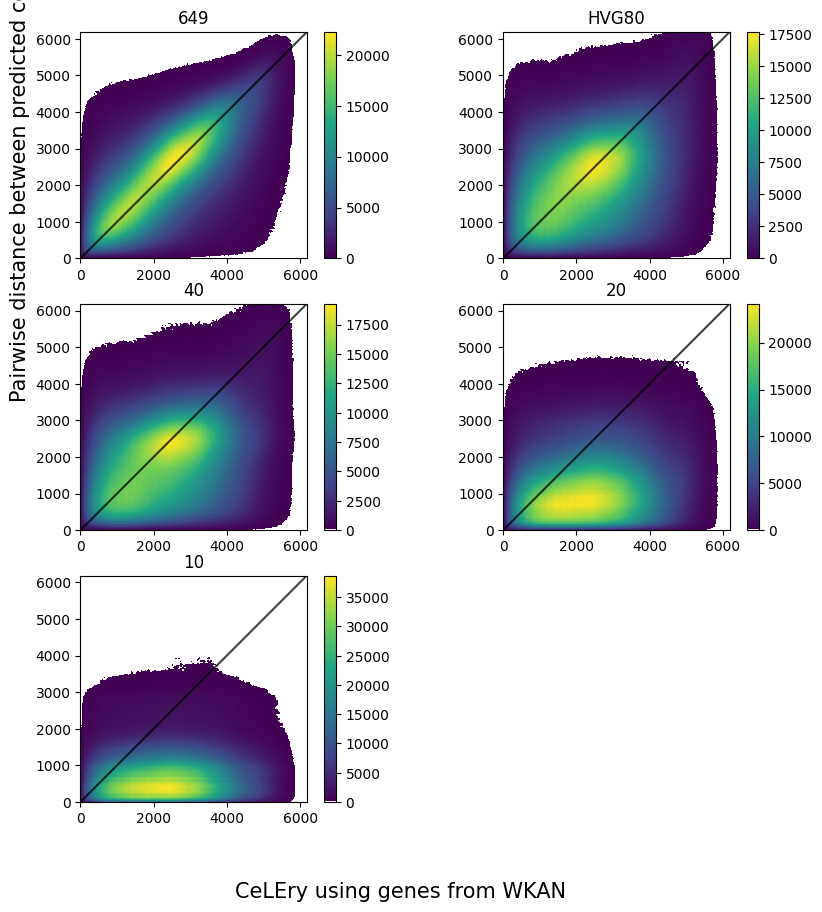

In [59]:
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

max_lim = np.max([np.max(true_dist)])


def using_mpl_scatter_density(ax, x, y, title, label=True):
    density = ax.scatter_density(x, y, cmap=white_viridis)
    plt.title(title)
    if label:
        plt.ylabel("Pairwise distance between predicted coordinates", fontsize=15)
    lims = [0, max_lim]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal', adjustable='box')
    plt.ylim((0, max_lim))
    plt.xlim((0, max_lim))
    fig.colorbar(density)
    
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,2,1,projection='scatter_density')
using_mpl_scatter_density(ax1, true_dist, Celery649result, title="649")
ax2 = fig.add_subplot(3,2,2,projection='scatter_density')
using_mpl_scatter_density(ax2, true_dist, HVG80Celeryresult, title="HVG80", label=False)
ax3 = fig.add_subplot(3,2,3,projection='scatter_density')
using_mpl_scatter_density(ax3, true_dist, HVG40Celeryresult, title="40", label=False)
ax4 = fig.add_subplot(3,2,4,projection='scatter_density')
using_mpl_scatter_density(ax4, true_dist, HVG20Celeryresult, title="20", label=False)
ax5 = fig.add_subplot(3,2,5,projection='scatter_density')
using_mpl_scatter_density(ax5, true_dist, HVG10Celeryresult, title="10", label=False)
fig.text(0.5, 0.02, 'CeLEry using genes from WKAN', va='center', ha='center', fontsize=15)

figname = "CeLEry using genes from HVG.pdf"
fig.savefig(figname)
# plt.close(fig)
plt.show

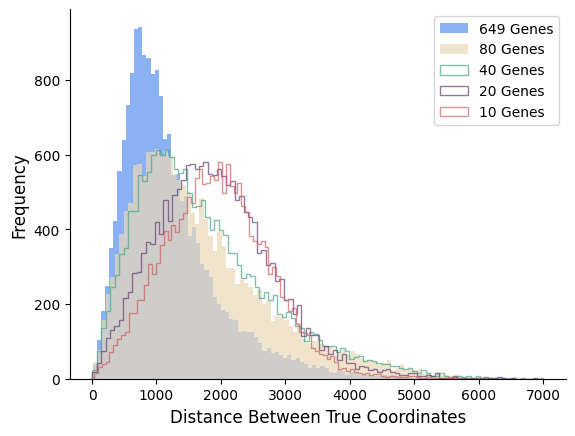

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.style.available

# 设置图形的整体风格（取消网格风格）
# plt.style.use('seaborn-white')

# 创建一个新的图形和坐标轴对象
fig, ax = plt.subplots()

# 样本数据（请替换为实际数据）
data0 = Celery649result
data1 = HVG80Celeryresult
data2 = HVG40Celeryresult
data3 = HVG20Celeryresult
data4 = HVG10Celeryresult
# 绘制直方图
bins = 100  # 箱子的数量
alpha = 0.7  # 透明度

ax.hist(data0, bins=bins, alpha=alpha, label='649 Genes', color='#5790f0')
ax.hist(data1, bins=bins, alpha=alpha, label='80 Genes', color='#ecd9b9', histtype='stepfilled')
ax.hist(data2, bins=bins, alpha=alpha, label='40 Genes', color='#4ba68a', histtype='step')
ax.hist(data3, bins=bins, alpha=alpha, label='20 Genes', color='#674176', histtype='step')
ax.hist(data4, bins=bins, alpha=alpha, label='10 Genes', color='#cd6262', histtype='step')

# 设置标题和标签
# ax.set_title('Different Number of Genes', fontsize=14)
ax.set_xlabel('Distance Between True Coordinates', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# 添加图例
ax.legend(loc='upper right', fontsize=10)

# 隐藏网格线
ax.grid(False)

# 调整x轴和y轴的位置
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 确保 y 轴从 0 开始
ax.set_ylim(bottom=0)
# 保存图形
plt.savefig("Histogram_HVG_Celery_result", dpi=1300)

# 显示图形
plt.show()

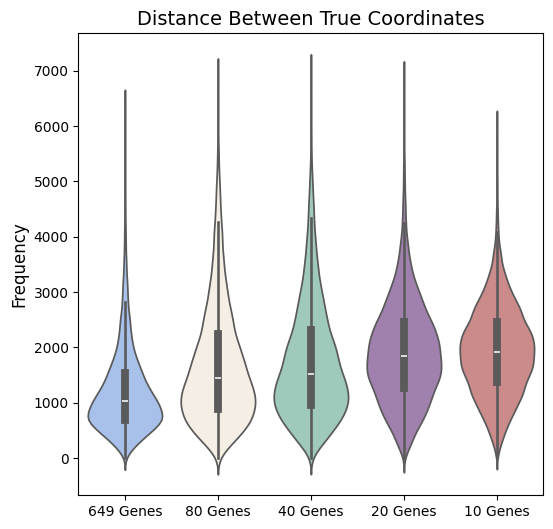

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data0 = Celery649result
data1 = HVG80Celeryresult
data2 = HVG40Celeryresult
data3 = HVG20Celeryresult
data4 = HVG10Celeryresult
# 将数据转换为列表以便于绘图
data = [data0, data1, data2, data3, data4]

# 设置图形的整体风格
# plt.style.use('seaborn-whitegrid')

colorlist = ['#9dbef6','#f7efe1', '#97d0be' ,'#a378b5','#d68080']
# 创建箱型图
plt.figure(figsize=(6,6))
sns.violinplot(data=data, palette= colorlist)

# 设置标题和标签
plt.title('Distance Between True Coordinates', fontsize=14)
# plt.xlabel('Categories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 设置x轴标签
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['649 Genes', '80 Genes', '40 Genes', '20 Genes', '10 Genes'])

plt.savefig("violinplot_Celery_HVG", dpi=1300)


# 显示图形
plt.show()

# SPARK

In [60]:
import pandas as pd

# 读取 CSV 文件并指定第一列（基因名）作为索引
df = pd.read_csv("F:/WiK/R/Merfish649genes.csv", index_col=1)

# 将基因名称提取为列表
SPARK_gene_list = df.index.tolist()

# 查看基因名称列表
print(SPARK_gene_list)

['Gad1', 'Gabbr1', 'Cx3cl1', 'Cnr1', 'Dlk1', 'Syt4', 'Gfap', 'Gjc3', 'Cspg5', 'Gabbr2', 'Grm5', 'Erbb4', 'Epha4', 'Gpr37l1', 'Ntsr2', 'Lmtk2', 'Ntrk3', 'Kit', 'Baiap2', 'Adgrb1', 'Grin2b', 'Celsr2', 'Epha6', 'Aqp4', 'Adgrl2', 'Adgrl1', 'Fgfr3', 'Chrm1', 'Tyro3', 'Olig1', 'Fn1', 'Adgrb3', 'Slc32a1', 'Gprc5b', 'Ret', 'Mertk', 'Ephb6', 'Grm7', 'Ackr1', 'Pdgfra', 'Epha7', 'Chrm3', 'Ntrk2', 'Fzd3', 'Gpr22', 'Adcyap1r1', 'Hrh3', 'Adgra1', 'Sstr4', 'Htr2c', 'Gpr162', 'S1pr1', 'Gpr158', 'Grm1', 'Adora1', 'Cxcl12', 'Drd2', 'Man1a', 'Nrp1', 'Grm4', 'Grm3', 'Sema4d', 'Adgrl3', 'Peg10', 'Pdgfrb', 'Gpr161', 'Mas1', 'Ephb1', 'Fgfr2', 'Ddr1', 'Sox8', 'Pcdh15', 'Gpr85', 'Tacr3', 'Chrm2', 'Arhgap29', 'Tmem108', 'Adgrg1', 'Ednrb', 'Cckbr', 'Gpr26', 'Adra2a', 'Erbb3', 'Adrb1', 'Sstr2', 'Insr', 'Aldh1l1', 'Epha10', 'Slc25a18', 'Grm2', 'Alk', 'Oprk1', 'Ryk', 'Efemp1', 'Npy1r', 'Anxa11', 'Epha5', 'Nrp2', 'Met', 'Npy2r', 'Adra1d', 'Trhr', 'Tjap1', 'Crhr1', 'Plxnb3', 'Rspo3', 'Flt3', 'Lpar1', 'Oprm1', 'Sstr1'

In [61]:
Rdata_scenario2_SPARK80= Rdata_scenario2[:,SPARK_gene_list[1:81]]#

In [62]:

Rdata_scenario2_SPARK80= Rdata_scenario2[:,SPARK_gene_list[1:81]]#
d11_left_SPARK80 = d11_left[:,SPARK_gene_list[1:81]]

d11_right_SPARK80 = d11_right[:,SPARK_gene_list[1:81]]

In [38]:
Fit_cord_DNN (data_train = Rdata_scenario2_SPARK80, 
                      hidden_dims = [30, 25, 15], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "Celery3_SPARK80")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:1, Loss:49.1807


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.94it/s]


Epoch:2, Loss:32.8943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.95it/s]


Epoch:3, Loss:29.5181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.21it/s]


Epoch:4, Loss:27.1100


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.11it/s]


Epoch:5, Loss:25.6168


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.16it/s]


Epoch:6, Loss:24.6816


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:7, Loss:23.4703


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.18it/s]


Epoch:8, Loss:22.4858


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:9, Loss:22.2772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:10, Loss:21.1749


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:11, Loss:20.6942


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.96it/s]


Epoch:12, Loss:20.5954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:13, Loss:19.7803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.02it/s]


Epoch:14, Loss:19.5175


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:15, Loss:19.1211


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:16, Loss:18.7091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.11it/s]


Epoch:17, Loss:18.5036


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.95it/s]


Epoch:18, Loss:17.8875


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.60it/s]


Epoch:19, Loss:18.0101


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.36it/s]


Epoch:20, Loss:17.7503


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:21, Loss:17.3802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.14it/s]


Epoch:22, Loss:17.1895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:23, Loss:17.0770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.14it/s]


Epoch:24, Loss:16.6064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:25, Loss:16.5448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:26, Loss:16.3030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.76it/s]


Epoch:27, Loss:15.9101


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.17it/s]


Epoch:28, Loss:16.0775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:29, Loss:15.9152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.78it/s]


Epoch:30, Loss:15.5922


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 610.86it/s]


Epoch:31, Loss:15.9604


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:32, Loss:15.3582


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.92it/s]


Epoch:33, Loss:15.1665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.83it/s]


Epoch:34, Loss:15.1955


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.37it/s]


Epoch:35, Loss:14.8979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.02it/s]


Epoch:36, Loss:14.9307


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.50it/s]


Epoch:37, Loss:15.0514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.76it/s]


Epoch:38, Loss:14.8363


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.34it/s]


Epoch:39, Loss:14.8141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.67it/s]


Epoch:40, Loss:14.8205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:41, Loss:14.5669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.64it/s]


Epoch:42, Loss:14.4500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.63it/s]


Epoch:43, Loss:14.4096


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 615.49it/s]


Epoch:44, Loss:14.3798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 620.37it/s]


Epoch:45, Loss:14.0216


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.49it/s]


Epoch:46, Loss:14.4438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.23it/s]


Epoch:47, Loss:13.9726


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.17it/s]


Epoch:48, Loss:14.0245


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.74it/s]


Epoch:49, Loss:13.9098


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 611.37it/s]


Epoch:50, Loss:14.0185


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.60it/s]


Epoch:51, Loss:13.7747


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 626.57it/s]


Epoch:52, Loss:13.9243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.18it/s]


Epoch:53, Loss:13.8176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.02it/s]


Epoch:54, Loss:14.0278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.57it/s]


Epoch:55, Loss:13.8189
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 616.53it/s]


Epoch:56, Loss:11.6674


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.60it/s]


Epoch:57, Loss:11.4586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.93it/s]


Epoch:58, Loss:11.1726


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.92it/s]


Epoch:59, Loss:11.0866


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:60, Loss:10.9992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.88it/s]


Epoch:61, Loss:10.9318


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.17it/s]


Epoch:62, Loss:10.7270


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.76it/s]


Epoch:63, Loss:10.7987


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 608.66it/s]


Epoch:64, Loss:10.8054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 623.72it/s]


Epoch:65, Loss:10.6722


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 625.68it/s]


Epoch:66, Loss:10.6572


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 634.92it/s]


Epoch:67, Loss:10.7533


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.95it/s]


Epoch:68, Loss:10.5549


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 587.15it/s]


Epoch:69, Loss:10.5622


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 606.47it/s]


Epoch:70, Loss:10.5847


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:71, Loss:10.5690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.99it/s]


Epoch:72, Loss:10.4010


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.32it/s]


Epoch:73, Loss:10.3811


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.62it/s]


Epoch:74, Loss:10.5412


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:75, Loss:10.2727


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.15it/s]


Epoch:76, Loss:10.3353


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.26it/s]


Epoch:77, Loss:10.3635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.23it/s]


Epoch:78, Loss:10.4283


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.74it/s]


Epoch:79, Loss:10.2969


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.95it/s]


Epoch:80, Loss:10.1814


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:81, Loss:10.3097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.21it/s]


Epoch:82, Loss:10.1264


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.85it/s]


Epoch:83, Loss:10.2209


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.56it/s]


Epoch:84, Loss:10.1959


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.69it/s]


Epoch:85, Loss:10.2308
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.74it/s]


Epoch:86, Loss:9.2211


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.17it/s]


Epoch:87, Loss:8.9889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.56it/s]


Epoch:88, Loss:8.9397


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.00it/s]


Epoch:89, Loss:8.8677


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.69it/s]


Epoch:90, Loss:8.8636


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.74it/s]


Epoch:91, Loss:8.8758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.67it/s]


Epoch:92, Loss:8.8152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.54it/s]


Epoch:93, Loss:8.8427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.57it/s]


Epoch:94, Loss:8.7139


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.75it/s]


Epoch:95, Loss:8.6864


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.99it/s]


Epoch:96, Loss:8.8218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.39it/s]


Epoch:97, Loss:8.6922


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.33it/s]


Epoch:98, Loss:8.6207


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.11it/s]


Epoch:99, Loss:8.6511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.41it/s]


Epoch:100, Loss:8.6877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.49it/s]


Epoch:101, Loss:8.6146


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.00it/s]


Epoch:102, Loss:8.6037


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 693.65it/s]


Epoch:103, Loss:8.5885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 691.04it/s]


Epoch:104, Loss:8.6045


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.58it/s]


Epoch:105, Loss:8.5983


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.10it/s]


Epoch:106, Loss:8.5828


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.03it/s]


Epoch:107, Loss:8.5016


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.15it/s]


Epoch:108, Loss:8.5678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.05it/s]


Epoch:109, Loss:8.4964


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.74it/s]


Epoch:110, Loss:8.5014


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.90it/s]


Epoch:111, Loss:8.5178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.08it/s]


Epoch:112, Loss:8.5049


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.39it/s]


Epoch:113, Loss:8.4602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.15it/s]


Epoch:114, Loss:8.4974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.08it/s]


Epoch:115, Loss:8.4500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.90it/s]


Epoch:116, Loss:8.4726


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.66it/s]


Epoch:117, Loss:8.4970
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.83it/s]


Epoch:118, Loss:7.9699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.84it/s]


Epoch:119, Loss:7.8747


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.24it/s]


Epoch:120, Loss:7.8981


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.66it/s]


Epoch:121, Loss:7.8409


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.33it/s]


Epoch:122, Loss:7.8342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.59it/s]


Epoch:123, Loss:7.8316


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.12it/s]


Epoch:124, Loss:7.8039


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.29it/s]


Epoch:125, Loss:7.8114


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.44it/s]


Epoch:126, Loss:7.7881


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.83it/s]


Epoch:127, Loss:7.7758


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.03it/s]


Epoch:128, Loss:7.7963


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.88it/s]


Epoch:129, Loss:7.7673


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.01it/s]


Epoch:130, Loss:7.7445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.42it/s]


Epoch:131, Loss:7.7693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.97it/s]


Epoch:132, Loss:7.7534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.43it/s]


Epoch:133, Loss:7.7260


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.10it/s]


Epoch:134, Loss:7.7362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.14it/s]


Epoch:135, Loss:7.7141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.25it/s]


Epoch:136, Loss:7.7348


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.87it/s]


Epoch:137, Loss:7.7186


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.04it/s]


Epoch:138, Loss:7.7268


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.23it/s]


Epoch:139, Loss:7.7037


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.66it/s]


Epoch:140, Loss:7.7197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.63it/s]


Epoch:141, Loss:7.6907


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.83it/s]


Epoch:142, Loss:7.7113


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.49it/s]


Epoch:143, Loss:7.7042


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.87it/s]


Epoch:144, Loss:7.6700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.46it/s]


Epoch:145, Loss:7.6695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.31it/s]


Epoch:146, Loss:7.6660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.63it/s]


Epoch:147, Loss:7.6751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.12it/s]


Epoch:148, Loss:7.6477


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.97it/s]


Epoch:149, Loss:7.6331


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.44it/s]


Epoch:150, Loss:7.6635


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.44it/s]


Epoch:151, Loss:7.6524
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.26it/s]


Epoch:152, Loss:7.4194


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.83it/s]


Epoch:153, Loss:7.3890


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.23it/s]


Epoch:154, Loss:7.3655


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.25it/s]


Epoch:155, Loss:7.3624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.72it/s]


Epoch:156, Loss:7.3761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.84it/s]


Epoch:157, Loss:7.3624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.24it/s]


Epoch:158, Loss:7.3485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.72it/s]


Epoch:159, Loss:7.3492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.06it/s]


Epoch:160, Loss:7.3666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.85it/s]


Epoch:161, Loss:7.3448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.47it/s]


Epoch:162, Loss:7.3404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.26it/s]


Epoch:163, Loss:7.3351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.66it/s]


Epoch:164, Loss:7.3329


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.47it/s]


Epoch:165, Loss:7.3261


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.90it/s]


Epoch:166, Loss:7.3253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.51it/s]


Epoch:167, Loss:7.3273


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.13it/s]


Epoch:168, Loss:7.3163


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.27it/s]


Epoch:169, Loss:7.3233


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.43it/s]


Epoch:170, Loss:7.3116


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.84it/s]


Epoch:171, Loss:7.3062


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.83it/s]


Epoch:172, Loss:7.3075


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.39it/s]


Epoch:173, Loss:7.3141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.26it/s]


Epoch:174, Loss:7.2976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.83it/s]


Epoch:175, Loss:7.3097


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.54it/s]


Epoch:176, Loss:7.3017


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.46it/s]


Epoch:177, Loss:7.3077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.00it/s]


Epoch:178, Loss:7.3067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.37it/s]


Epoch:179, Loss:7.2909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.95it/s]


Epoch:180, Loss:7.2852


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.83it/s]


Epoch:181, Loss:7.2903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.84it/s]


Epoch:182, Loss:7.2883


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.33it/s]


Epoch:183, Loss:7.2871
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.83it/s]


Epoch:184, Loss:7.1704


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.49it/s]


Epoch:185, Loss:7.1495


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.70it/s]


Epoch:186, Loss:7.1548


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.87it/s]


Epoch:187, Loss:7.1419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.83it/s]


Epoch:188, Loss:7.1438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.64it/s]


Epoch:189, Loss:7.1373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.92it/s]


Epoch:190, Loss:7.1416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.58it/s]


Epoch:191, Loss:7.1384


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.91it/s]


Epoch:192, Loss:7.1466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.31it/s]


Epoch:193, Loss:7.1381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.92it/s]


Epoch:194, Loss:7.1295


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.92it/s]


Epoch:195, Loss:7.1379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.43it/s]


Epoch:196, Loss:7.1260


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.84it/s]


Epoch:197, Loss:7.1369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.64it/s]


Epoch:198, Loss:7.1212


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.04it/s]


Epoch:199, Loss:7.1246


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.44it/s]


Epoch:200, Loss:7.1297


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.90it/s]


Epoch:201, Loss:7.1237


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.64it/s]


Epoch:202, Loss:7.1218


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.45it/s]


Epoch:203, Loss:7.1202


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.04it/s]


Epoch:204, Loss:7.1225


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.88it/s]


Epoch:205, Loss:7.1285


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.05it/s]


Epoch:206, Loss:7.1169


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.43it/s]


Epoch:207, Loss:7.1150


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.50it/s]


Epoch:208, Loss:7.1219
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.68it/s]


Epoch:209, Loss:7.0555


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.13it/s]


Epoch:210, Loss:7.0478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.29it/s]


Epoch:211, Loss:7.0482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.56it/s]


Epoch:212, Loss:7.0438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.07it/s]


Epoch:213, Loss:7.0450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.85it/s]


Epoch:214, Loss:7.0514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.47it/s]


Epoch:215, Loss:7.0425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.97it/s]


Epoch:216, Loss:7.0414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 689.95it/s]


Epoch:217, Loss:7.0423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.84it/s]


Epoch:218, Loss:7.0408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.05it/s]


Epoch:219, Loss:7.0388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.66it/s]


Epoch:220, Loss:7.0416


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.64it/s]


Epoch:221, Loss:7.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.74it/s]


Epoch:222, Loss:7.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.32it/s]


Epoch:223, Loss:7.0342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.80it/s]


Epoch:224, Loss:7.0418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.59it/s]


Epoch:225, Loss:7.0374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.44it/s]


Epoch:226, Loss:7.0399


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.43it/s]


Epoch:227, Loss:7.0381


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.84it/s]


Epoch:228, Loss:7.0348


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.85it/s]


Epoch:229, Loss:7.0351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.64it/s]


Epoch:230, Loss:7.0332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.83it/s]


Epoch:231, Loss:7.0328


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.02it/s]


Epoch:232, Loss:7.0356


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.72it/s]


Epoch:233, Loss:7.0333
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.78it/s]


Epoch:234, Loss:7.0037


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.22it/s]


Epoch:235, Loss:6.9961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.60it/s]


Epoch:236, Loss:6.9977


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.07it/s]


Epoch:237, Loss:6.9961


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.24it/s]


Epoch:238, Loss:6.9944


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.83it/s]


Epoch:239, Loss:7.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.47it/s]


Epoch:240, Loss:6.9943


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.24it/s]


Epoch:241, Loss:6.9965


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.65it/s]


Epoch:242, Loss:6.9933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.31it/s]


Epoch:243, Loss:6.9950


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.25it/s]


Epoch:244, Loss:6.9969


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.24it/s]


Epoch:245, Loss:6.9939


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.85it/s]


Epoch:246, Loss:6.9928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.24it/s]


Epoch:247, Loss:6.9933


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.24it/s]


Epoch:248, Loss:6.9935


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.24it/s]


Epoch:249, Loss:6.9924


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.64it/s]


Epoch:250, Loss:6.9916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.64it/s]


Epoch:251, Loss:6.9902


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.04it/s]


Epoch:252, Loss:6.9927


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.70it/s]


Epoch:253, Loss:6.9894


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.09it/s]


Epoch:254, Loss:6.9905


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.66it/s]


Epoch:255, Loss:6.9906


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.07it/s]


Epoch:256, Loss:6.9908


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.63it/s]


Epoch:257, Loss:6.9887


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.63it/s]


Epoch:258, Loss:6.9880


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.74it/s]


Epoch:259, Loss:6.9889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.84it/s]


Epoch:260, Loss:6.9901


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.84it/s]


Epoch:261, Loss:6.9882
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.63it/s]


Epoch:262, Loss:6.9710


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.42it/s]


Epoch:263, Loss:6.9719


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.53it/s]


Epoch:264, Loss:6.9700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.58it/s]


Epoch:265, Loss:6.9704


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.84it/s]


Epoch:266, Loss:6.9692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.88it/s]


Epoch:267, Loss:6.9699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.39it/s]


Epoch:268, Loss:6.9690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.06it/s]


Epoch:269, Loss:6.9682


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.98it/s]


Epoch:270, Loss:6.9747


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.66it/s]


Epoch:271, Loss:6.9693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.46it/s]


Epoch:272, Loss:6.9695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.54it/s]


Epoch:273, Loss:6.9690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.95it/s]


Epoch:274, Loss:6.9690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.01it/s]


Epoch:275, Loss:6.9681


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.84it/s]


Epoch:276, Loss:6.9692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.47it/s]


Epoch:277, Loss:6.9696


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.89it/s]


Epoch:278, Loss:6.9682


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.92it/s]


Epoch:279, Loss:6.9678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.05it/s]


Epoch:280, Loss:6.9676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.49it/s]


Epoch:281, Loss:6.9690


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.65it/s]


Epoch:282, Loss:6.9671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.24it/s]


Epoch:283, Loss:6.9678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.24it/s]


Epoch:284, Loss:6.9693


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.77it/s]


Epoch:285, Loss:6.9704
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.88it/s]


Epoch:286, Loss:6.9605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.72it/s]


Epoch:287, Loss:6.9571


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.27it/s]


Epoch:288, Loss:6.9569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.54it/s]


Epoch:289, Loss:6.9572


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.66it/s]


Epoch:290, Loss:6.9570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.24it/s]


Epoch:291, Loss:6.9566


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.24it/s]


Epoch:292, Loss:6.9577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.29it/s]


Epoch:293, Loss:6.9568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.51it/s]


Epoch:294, Loss:6.9578


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.07it/s]


Epoch:295, Loss:6.9569


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.24it/s]


Epoch:296, Loss:6.9568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.85it/s]


Epoch:297, Loss:6.9560


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.06it/s]


Epoch:298, Loss:6.9558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.00it/s]


Epoch:299, Loss:6.9561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.17it/s]


Epoch:300, Loss:6.9595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.85it/s]


Epoch:301, Loss:6.9562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.16it/s]


Epoch:302, Loss:6.9601


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.28it/s]


Epoch:303, Loss:6.9570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.65it/s]


Epoch:304, Loss:6.9557


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.63it/s]


Epoch:305, Loss:6.9552


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.64it/s]


Epoch:306, Loss:6.9551


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.33it/s]


Epoch:307, Loss:6.9563


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.64it/s]


Epoch:308, Loss:6.9564


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.45it/s]


Epoch:309, Loss:6.9555
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.10it/s]


Epoch:310, Loss:6.9518


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.09it/s]


Epoch:311, Loss:6.9501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.88it/s]


Epoch:312, Loss:6.9511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.56it/s]


Epoch:313, Loss:6.9512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.91it/s]


Epoch:314, Loss:6.9517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.63it/s]


Epoch:315, Loss:6.9507


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.74it/s]


Epoch:316, Loss:6.9511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.59it/s]


Epoch:317, Loss:6.9671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.77it/s]


Epoch:318, Loss:6.9531


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.49it/s]


Epoch:319, Loss:6.9498


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.42it/s]


Epoch:320, Loss:6.9498


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.92it/s]


Epoch:321, Loss:6.9504


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.64it/s]


Epoch:322, Loss:6.9522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.95it/s]


Epoch:323, Loss:6.9493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.37it/s]


Epoch:324, Loss:6.9515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.90it/s]


Epoch:325, Loss:6.9514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.95it/s]


Epoch:326, Loss:6.9496


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.84it/s]


Epoch:327, Loss:6.9516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.44it/s]


Epoch:328, Loss:6.9510


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.89it/s]


Epoch:329, Loss:6.9492


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.84it/s]


Epoch:330, Loss:6.9495
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.45it/s]


Epoch:331, Loss:6.9487


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.03it/s]


Epoch:332, Loss:6.9476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.44it/s]


Epoch:333, Loss:6.9475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.46it/s]


Epoch:334, Loss:6.9478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.74it/s]


Epoch:335, Loss:6.9466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.05it/s]


Epoch:336, Loss:6.9469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.80it/s]


Epoch:337, Loss:6.9528


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.12it/s]


Epoch:338, Loss:6.9467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.80it/s]


Epoch:339, Loss:6.9479


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.68it/s]


Epoch:340, Loss:6.9469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.21it/s]


Epoch:341, Loss:6.9475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.31it/s]


Epoch:342, Loss:6.9487


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.95it/s]


Epoch:343, Loss:6.9472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.58it/s]


Epoch:344, Loss:6.9463


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.58it/s]


Epoch:345, Loss:6.9475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.51it/s]


Epoch:346, Loss:6.9464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.26it/s]


Epoch:347, Loss:6.9480


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.47it/s]


Epoch:348, Loss:6.9464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.64it/s]


Epoch:349, Loss:6.9469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.25it/s]


Epoch:350, Loss:6.9510
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.54it/s]


Epoch:351, Loss:6.9460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.08it/s]


Epoch:352, Loss:6.9466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.70it/s]


Epoch:353, Loss:6.9506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.54it/s]


Epoch:354, Loss:6.9461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.19it/s]


Epoch:355, Loss:6.9457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.85it/s]


Epoch:356, Loss:6.9449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 689.30it/s]


Epoch:357, Loss:6.9481


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.38it/s]


Epoch:358, Loss:6.9457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.85it/s]


Epoch:359, Loss:6.9459


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.31it/s]


Epoch:360, Loss:6.9449


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.84it/s]


Epoch:361, Loss:6.9460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.16it/s]


Epoch:362, Loss:6.9450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.07it/s]


Epoch:363, Loss:6.9452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.33it/s]


Epoch:364, Loss:6.9464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.83it/s]


Epoch:365, Loss:6.9450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.91it/s]


Epoch:366, Loss:6.9464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.49it/s]


Epoch:367, Loss:6.9616


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.23it/s]


Epoch:368, Loss:6.9449
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.84it/s]


Epoch:369, Loss:6.9443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.27it/s]


Epoch:370, Loss:6.9444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.21it/s]


Epoch:371, Loss:6.9441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.87it/s]


Epoch:372, Loss:6.9442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.16it/s]


Epoch:373, Loss:6.9510


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.47it/s]


Epoch:374, Loss:6.9473


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.58it/s]


Epoch:375, Loss:6.9444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.92it/s]


Epoch:376, Loss:6.9444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.15it/s]


Epoch:377, Loss:6.9443


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.83it/s]


Epoch:378, Loss:6.9476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.47it/s]


Epoch:379, Loss:6.9448


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.68it/s]


Epoch:380, Loss:6.9484


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.78it/s]


Epoch:381, Loss:6.9444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.92it/s]


Epoch:382, Loss:6.9450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.22it/s]


Epoch:383, Loss:6.9450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.35it/s]


Epoch:384, Loss:6.9452


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.04it/s]


Epoch:385, Loss:6.9441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.64it/s]


Epoch:386, Loss:6.9441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.46it/s]

Epoch:387, Loss:6.9451
New learning rate:6.103515625e-08
Folder already exists


DNN3_cord(
  (fclayer1): Sequential(
    (0): Linear(in_features=80, out_features=30, bias=True)
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): Linear(in_features=30, out_features=25, bias=True)
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): Linear(in_features=25, out_features=15, bias=True)
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): Linear(in_features=15, out_features=2, bias=True)
    (1): Sigmoid()
  )
)

In [70]:
SPARK80Celeryresult = Coordinate_Distance_Result(d11, d11_left = d11_left_SPARK80, #
                           d11_right = d11_right_SPARK80,#
                           data_train = Rdata_scenario2_SPARK80, #
                           path = "output/DNN_MERFISH", filename = "Celery3_SPARK80" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_SPARK80_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_SPARK80_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2487.99it/s]


PearsonRResult(statistic=0.6441783116136354, pvalue=0.0)
968.6503941163633
1167.0680516853333


In [63]:
SPARK80Celeryresult = Coordinate_Distance(d11_left = d11_left_SPARK80, #
                           d11_right = d11_right_SPARK80,#
                           data_train = Rdata_scenario2_SPARK80, #
                           path = "output/DNN_MERFISH", filename = "Celery3_SPARK80" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_SPARK80_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_SPARK80_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:08<00:00, 1132.07it/s]


In [64]:

Rdata_scenario2_SPARK40= Rdata_scenario2[:,SPARK_gene_list[1:41]]#
d11_left_SPARK40 = d11_left[:,SPARK_gene_list[1:41]]

d11_right_SPARK40 = d11_right[:,SPARK_gene_list[1:41]]

In [40]:
Fit_cord_DNN (data_train = Rdata_scenario2_SPARK40, 
                      hidden_dims = [30, 25, 15], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "Celery3_SPARK40")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.65it/s]


Epoch:1, Loss:59.4603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.55it/s]


Epoch:2, Loss:44.5178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.64it/s]


Epoch:3, Loss:40.4102


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.63it/s]


Epoch:4, Loss:37.6229


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.04it/s]


Epoch:5, Loss:36.0557


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.03it/s]


Epoch:6, Loss:34.5607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.44it/s]


Epoch:7, Loss:33.6383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.46it/s]


Epoch:8, Loss:32.3298


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.14it/s]


Epoch:9, Loss:31.7177


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.86it/s]


Epoch:10, Loss:31.1620


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.32it/s]


Epoch:11, Loss:30.3632


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.95it/s]


Epoch:12, Loss:29.9551


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.50it/s]


Epoch:13, Loss:29.3790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.58it/s]


Epoch:14, Loss:28.7965


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.83it/s]


Epoch:15, Loss:28.2773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.06it/s]


Epoch:16, Loss:28.0125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.43it/s]


Epoch:17, Loss:27.3835


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.83it/s]


Epoch:18, Loss:27.2839


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.24it/s]


Epoch:19, Loss:26.9967


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.07it/s]


Epoch:20, Loss:26.6776


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.44it/s]


Epoch:21, Loss:26.5241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.86it/s]


Epoch:22, Loss:26.5068


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.46it/s]


Epoch:23, Loss:25.9645


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.64it/s]


Epoch:24, Loss:25.6066


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.27it/s]


Epoch:25, Loss:25.6618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.26it/s]


Epoch:26, Loss:25.3221


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.52it/s]


Epoch:27, Loss:25.3308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.59it/s]


Epoch:28, Loss:24.6644


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.77it/s]


Epoch:29, Loss:24.8377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.07it/s]


Epoch:30, Loss:24.7176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.62it/s]


Epoch:31, Loss:24.4350


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.09it/s]


Epoch:32, Loss:24.3916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.24it/s]


Epoch:33, Loss:24.2006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.13it/s]


Epoch:34, Loss:24.2917


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.34it/s]


Epoch:35, Loss:24.1913


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.92it/s]


Epoch:36, Loss:24.0370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.66it/s]


Epoch:37, Loss:24.0636


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.86it/s]


Epoch:38, Loss:23.7925


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.71it/s]


Epoch:39, Loss:23.5640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.91it/s]


Epoch:40, Loss:23.5413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.06it/s]


Epoch:41, Loss:23.3438


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.68it/s]


Epoch:42, Loss:23.2328


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.89it/s]


Epoch:43, Loss:23.0166


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.69it/s]


Epoch:44, Loss:23.1767


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.28it/s]


Epoch:45, Loss:23.0413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.13it/s]


Epoch:46, Loss:22.9720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.47it/s]


Epoch:47, Loss:22.8863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.06it/s]


Epoch:48, Loss:22.6651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.86it/s]


Epoch:49, Loss:22.8579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.47it/s]


Epoch:50, Loss:22.9377


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.11it/s]


Epoch:51, Loss:22.5868


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.50it/s]


Epoch:52, Loss:22.3692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.46it/s]


Epoch:53, Loss:22.3985


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.48it/s]


Epoch:54, Loss:22.4457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.27it/s]


Epoch:55, Loss:22.2206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.06it/s]


Epoch:56, Loss:22.1319


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.66it/s]


Epoch:57, Loss:22.4052


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.86it/s]


Epoch:58, Loss:22.4721


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.08it/s]


Epoch:59, Loss:21.7479


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.86it/s]


Epoch:60, Loss:21.8928
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.91it/s]


Epoch:61, Loss:19.8409


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.47it/s]


Epoch:62, Loss:19.4027


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.13it/s]


Epoch:63, Loss:19.4355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.90it/s]


Epoch:64, Loss:19.2595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.03it/s]


Epoch:65, Loss:19.3346


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.40it/s]


Epoch:66, Loss:19.0866


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.03it/s]


Epoch:67, Loss:19.1240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.98it/s]


Epoch:68, Loss:19.1727


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.50it/s]


Epoch:69, Loss:19.0012


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.68it/s]


Epoch:70, Loss:19.0554


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.30it/s]


Epoch:71, Loss:19.0476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.86it/s]


Epoch:72, Loss:18.8249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.38it/s]


Epoch:73, Loss:18.7897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.13it/s]


Epoch:74, Loss:18.7265


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.19it/s]


Epoch:75, Loss:18.7240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.65it/s]


Epoch:76, Loss:18.5862


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.98it/s]


Epoch:77, Loss:18.6193


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.06it/s]


Epoch:78, Loss:18.5713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.66it/s]


Epoch:79, Loss:18.6534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.07it/s]


Epoch:80, Loss:18.6273


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.19it/s]


Epoch:81, Loss:18.5275


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.50it/s]


Epoch:82, Loss:18.4577


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.10it/s]


Epoch:83, Loss:18.4653


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.68it/s]


Epoch:84, Loss:18.3019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.27it/s]


Epoch:85, Loss:18.4725


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.49it/s]


Epoch:86, Loss:18.2903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.27it/s]


Epoch:87, Loss:18.2998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.94it/s]


Epoch:88, Loss:18.3062


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.39it/s]


Epoch:89, Loss:18.3610


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.95it/s]


Epoch:90, Loss:18.1942


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.54it/s]


Epoch:91, Loss:18.2071
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.72it/s]


Epoch:92, Loss:17.1638


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.89it/s]


Epoch:93, Loss:16.9832


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.72it/s]


Epoch:94, Loss:16.9197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.36it/s]


Epoch:95, Loss:16.8651


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.39it/s]


Epoch:96, Loss:16.8713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.66it/s]


Epoch:97, Loss:16.7846


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.86it/s]


Epoch:98, Loss:16.7989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.33it/s]


Epoch:99, Loss:16.6919


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.73it/s]


Epoch:100, Loss:16.7563


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.72it/s]


Epoch:101, Loss:16.6413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.46it/s]


Epoch:102, Loss:16.6641


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.88it/s]


Epoch:103, Loss:16.6567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.45it/s]


Epoch:104, Loss:16.6316


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.33it/s]


Epoch:105, Loss:16.6152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.46it/s]


Epoch:106, Loss:16.5360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.46it/s]


Epoch:107, Loss:16.5508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.59it/s]


Epoch:108, Loss:16.5848


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.49it/s]


Epoch:109, Loss:16.5182


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.06it/s]


Epoch:110, Loss:16.5003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.47it/s]


Epoch:111, Loss:16.4458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.13it/s]


Epoch:112, Loss:16.4611


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.40it/s]


Epoch:113, Loss:16.4845


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.89it/s]


Epoch:114, Loss:16.4460


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.52it/s]


Epoch:115, Loss:16.4348


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.68it/s]


Epoch:116, Loss:16.3692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.36it/s]


Epoch:117, Loss:16.3954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.57it/s]


Epoch:118, Loss:16.4037


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.90it/s]


Epoch:119, Loss:16.3117


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.13it/s]


Epoch:120, Loss:16.3627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.75it/s]


Epoch:121, Loss:16.2921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.50it/s]


Epoch:122, Loss:16.3154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.89it/s]


Epoch:123, Loss:16.2517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.50it/s]


Epoch:124, Loss:16.2095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.13it/s]


Epoch:125, Loss:16.2655
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.87it/s]


Epoch:126, Loss:15.6411


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.49it/s]


Epoch:127, Loss:15.5934


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.36it/s]


Epoch:128, Loss:15.6401


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.61it/s]


Epoch:129, Loss:15.5566


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.36it/s]


Epoch:130, Loss:15.5369


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.03it/s]


Epoch:131, Loss:15.5627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.11it/s]


Epoch:132, Loss:15.5516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.13it/s]


Epoch:133, Loss:15.5464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.83it/s]


Epoch:134, Loss:15.5128


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.62it/s]


Epoch:135, Loss:15.5014


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.57it/s]


Epoch:136, Loss:15.4907


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.10it/s]


Epoch:137, Loss:15.4573


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.11it/s]


Epoch:138, Loss:15.4835


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.19it/s]


Epoch:139, Loss:15.4905


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.28it/s]


Epoch:140, Loss:15.4248


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.28it/s]


Epoch:141, Loss:15.4787


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.06it/s]


Epoch:142, Loss:15.4326


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.47it/s]


Epoch:143, Loss:15.4257


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.88it/s]


Epoch:144, Loss:15.4222


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.73it/s]


Epoch:145, Loss:15.3998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.67it/s]


Epoch:146, Loss:15.3979


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.66it/s]


Epoch:147, Loss:15.3982


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.07it/s]


Epoch:148, Loss:15.3565


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.57it/s]


Epoch:149, Loss:15.3808


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.47it/s]


Epoch:150, Loss:15.3905


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.86it/s]


Epoch:151, Loss:15.3613


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.98it/s]


Epoch:152, Loss:15.3827


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.72it/s]


Epoch:153, Loss:15.3599
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.07it/s]


Epoch:154, Loss:15.0734


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.69it/s]


Epoch:155, Loss:15.0396


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.83it/s]


Epoch:156, Loss:15.0436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.77it/s]


Epoch:157, Loss:15.0187


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.10it/s]


Epoch:158, Loss:15.0067


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.31it/s]


Epoch:159, Loss:15.0083


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.54it/s]


Epoch:160, Loss:14.9992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.94it/s]


Epoch:161, Loss:14.9982


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.33it/s]


Epoch:162, Loss:14.9936


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.90it/s]


Epoch:163, Loss:15.0077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.27it/s]


Epoch:164, Loss:14.9976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.36it/s]


Epoch:165, Loss:15.0032


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.03it/s]


Epoch:166, Loss:14.9888


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.77it/s]


Epoch:167, Loss:14.9759


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.75it/s]


Epoch:168, Loss:14.9837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.95it/s]


Epoch:169, Loss:14.9671


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.81it/s]


Epoch:170, Loss:14.9562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.68it/s]


Epoch:171, Loss:14.9647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.31it/s]


Epoch:172, Loss:14.9689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.66it/s]


Epoch:173, Loss:14.9531


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.24it/s]


Epoch:174, Loss:14.9506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.75it/s]


Epoch:175, Loss:14.9631


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.36it/s]


Epoch:176, Loss:14.9304


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.86it/s]


Epoch:177, Loss:14.9649


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.26it/s]


Epoch:178, Loss:14.9431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.06it/s]


Epoch:179, Loss:14.9404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.48it/s]


Epoch:180, Loss:14.9231


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.26it/s]


Epoch:181, Loss:14.9272


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.14it/s]


Epoch:182, Loss:14.9216


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.51it/s]


Epoch:183, Loss:14.9167


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.68it/s]


Epoch:184, Loss:14.9181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.47it/s]


Epoch:185, Loss:14.9091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.26it/s]


Epoch:186, Loss:14.9219
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.69it/s]


Epoch:187, Loss:14.7637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.67it/s]


Epoch:188, Loss:14.7454


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.00it/s]


Epoch:189, Loss:14.7522


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.40it/s]


Epoch:190, Loss:14.7682


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.71it/s]


Epoch:191, Loss:14.7404


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.56it/s]


Epoch:192, Loss:14.7422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.08it/s]


Epoch:193, Loss:14.7411


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.90it/s]


Epoch:194, Loss:14.7408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.87it/s]


Epoch:195, Loss:14.7309


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.87it/s]


Epoch:196, Loss:14.7372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.18it/s]


Epoch:197, Loss:14.7274


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.67it/s]


Epoch:198, Loss:14.7246


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.89it/s]


Epoch:199, Loss:14.7243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.83it/s]


Epoch:200, Loss:14.7261


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.80it/s]


Epoch:201, Loss:14.7211


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.73it/s]


Epoch:202, Loss:14.7206


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.26it/s]


Epoch:203, Loss:14.7171


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.66it/s]


Epoch:204, Loss:14.7136


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.95it/s]


Epoch:205, Loss:14.7089


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.83it/s]


Epoch:206, Loss:14.7064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.00it/s]


Epoch:207, Loss:14.7090


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.24it/s]


Epoch:208, Loss:14.7070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.52it/s]


Epoch:209, Loss:14.7047


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.09it/s]


Epoch:210, Loss:14.7054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.81it/s]


Epoch:211, Loss:14.7082


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.61it/s]


Epoch:212, Loss:14.6938


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.08it/s]


Epoch:213, Loss:14.7026


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.66it/s]


Epoch:214, Loss:14.6917


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.08it/s]


Epoch:215, Loss:14.7032


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.86it/s]


Epoch:216, Loss:14.7021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.46it/s]


Epoch:217, Loss:14.6954
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.46it/s]


Epoch:218, Loss:14.6134


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.06it/s]


Epoch:219, Loss:14.6043


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.26it/s]


Epoch:220, Loss:14.6054


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.27it/s]


Epoch:221, Loss:14.6046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.69it/s]


Epoch:222, Loss:14.6056


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.46it/s]


Epoch:223, Loss:14.6077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.18it/s]


Epoch:224, Loss:14.5987


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.46it/s]


Epoch:225, Loss:14.5968


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.32it/s]


Epoch:226, Loss:14.6077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.49it/s]


Epoch:227, Loss:14.6020


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.50it/s]


Epoch:228, Loss:14.5939


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.34it/s]


Epoch:229, Loss:14.5920


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.09it/s]


Epoch:230, Loss:14.5967


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.31it/s]


Epoch:231, Loss:14.5885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.36it/s]


Epoch:232, Loss:14.5920


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.45it/s]


Epoch:233, Loss:14.5890


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.81it/s]


Epoch:234, Loss:14.5912


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 689.11it/s]


Epoch:235, Loss:14.5885


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.24it/s]


Epoch:236, Loss:14.5924


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.93it/s]


Epoch:237, Loss:14.5921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.31it/s]


Epoch:238, Loss:14.5826


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.81it/s]


Epoch:239, Loss:14.5903


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.89it/s]


Epoch:240, Loss:14.5864


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.04it/s]


Epoch:241, Loss:14.5858
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.72it/s]


Epoch:242, Loss:14.5453


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.29it/s]


Epoch:243, Loss:14.5386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.08it/s]


Epoch:244, Loss:14.5446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.42it/s]


Epoch:245, Loss:14.5360


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.45it/s]


Epoch:246, Loss:14.5371


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.26it/s]


Epoch:247, Loss:14.5355


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.34it/s]


Epoch:248, Loss:14.5469


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.71it/s]


Epoch:249, Loss:14.5346


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.95it/s]


Epoch:250, Loss:14.5385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.61it/s]


Epoch:251, Loss:14.5336


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.36it/s]


Epoch:252, Loss:14.5319


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.24it/s]


Epoch:253, Loss:14.5379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.07it/s]


Epoch:254, Loss:14.5327


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.07it/s]


Epoch:255, Loss:14.5339


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.89it/s]


Epoch:256, Loss:14.5311


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.87it/s]


Epoch:257, Loss:14.5308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.67it/s]


Epoch:258, Loss:14.5354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.89it/s]


Epoch:259, Loss:14.5331


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.71it/s]


Epoch:260, Loss:14.5439


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.91it/s]


Epoch:261, Loss:14.5291


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.48it/s]


Epoch:262, Loss:14.5331


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.87it/s]


Epoch:263, Loss:14.5313


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.87it/s]


Epoch:264, Loss:14.5278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.28it/s]


Epoch:265, Loss:14.5467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.90it/s]


Epoch:266, Loss:14.5267


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.56it/s]


Epoch:267, Loss:14.5243


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.75it/s]


Epoch:268, Loss:14.5292


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.29it/s]


Epoch:269, Loss:14.5331
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.47it/s]


Epoch:270, Loss:14.5087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.66it/s]


Epoch:271, Loss:14.5009


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.26it/s]


Epoch:272, Loss:14.5044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.21it/s]


Epoch:273, Loss:14.5011


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.93it/s]


Epoch:274, Loss:14.5016


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.83it/s]


Epoch:275, Loss:14.5058


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.69it/s]


Epoch:276, Loss:14.5030


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.82it/s]


Epoch:277, Loss:14.5046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.87it/s]


Epoch:278, Loss:14.5017


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.08it/s]


Epoch:279, Loss:14.5034


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.98it/s]


Epoch:280, Loss:14.4995


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.03it/s]


Epoch:281, Loss:14.5012


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.26it/s]


Epoch:282, Loss:14.5002


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.87it/s]


Epoch:283, Loss:14.4986


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.06it/s]


Epoch:284, Loss:14.5006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.07it/s]


Epoch:285, Loss:14.4974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.63it/s]


Epoch:286, Loss:14.4978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.16it/s]


Epoch:287, Loss:14.4989


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.77it/s]


Epoch:288, Loss:14.4990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.59it/s]


Epoch:289, Loss:14.4977
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.19it/s]


Epoch:290, Loss:14.4863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.19it/s]


Epoch:291, Loss:14.4877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.98it/s]


Epoch:292, Loss:14.4897


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.32it/s]


Epoch:293, Loss:14.4865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.67it/s]


Epoch:294, Loss:14.4849


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.06it/s]


Epoch:295, Loss:14.4880


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.29it/s]


Epoch:296, Loss:14.4859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.67it/s]


Epoch:297, Loss:14.4839


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.06it/s]


Epoch:298, Loss:14.4873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.66it/s]


Epoch:299, Loss:14.4874


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.67it/s]


Epoch:300, Loss:14.4859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.68it/s]


Epoch:301, Loss:14.4863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.12it/s]


Epoch:302, Loss:14.4968


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.27it/s]


Epoch:303, Loss:14.4836


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.66it/s]


Epoch:304, Loss:14.4844


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.28it/s]


Epoch:305, Loss:14.4837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.27it/s]


Epoch:306, Loss:14.4832


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.29it/s]


Epoch:307, Loss:14.4831


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.15it/s]


Epoch:308, Loss:14.4893


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.24it/s]


Epoch:309, Loss:14.4865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.13it/s]


Epoch:310, Loss:14.4858
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.48it/s]


Epoch:311, Loss:14.4767


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.18it/s]


Epoch:312, Loss:14.4770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.40it/s]


Epoch:313, Loss:14.4759


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.92it/s]


Epoch:314, Loss:14.4788


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.52it/s]


Epoch:315, Loss:14.4762


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.08it/s]


Epoch:316, Loss:14.4798


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.82it/s]


Epoch:317, Loss:14.4879


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.31it/s]


Epoch:318, Loss:14.4817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.89it/s]


Epoch:319, Loss:14.4764


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.77it/s]


Epoch:320, Loss:14.4757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.62it/s]


Epoch:321, Loss:14.4789


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.80it/s]


Epoch:322, Loss:14.4761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.53it/s]


Epoch:323, Loss:14.4753


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.07it/s]


Epoch:324, Loss:14.4775


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.86it/s]


Epoch:325, Loss:14.4756


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.32it/s]


Epoch:326, Loss:14.4765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.57it/s]


Epoch:327, Loss:14.4780


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.13it/s]


Epoch:328, Loss:14.4774


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.77it/s]


Epoch:329, Loss:14.4756
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.40it/s]


Epoch:330, Loss:14.4720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.40it/s]


Epoch:331, Loss:14.4716


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.67it/s]


Epoch:332, Loss:14.4747


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.31it/s]


Epoch:333, Loss:14.4785


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.45it/s]


Epoch:334, Loss:14.4779


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.10it/s]


Epoch:335, Loss:14.4720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.90it/s]


Epoch:336, Loss:14.4760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.43it/s]


Epoch:337, Loss:14.4926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.29it/s]


Epoch:338, Loss:14.4718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.68it/s]


Epoch:339, Loss:14.4721


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.88it/s]


Epoch:340, Loss:14.4727


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.31it/s]


Epoch:341, Loss:14.4737


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.48it/s]


Epoch:342, Loss:14.4750


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.18it/s]


Epoch:343, Loss:14.4751


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.08it/s]


Epoch:344, Loss:14.4761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.49it/s]


Epoch:345, Loss:14.4763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.00it/s]


Epoch:346, Loss:14.4733
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.10it/s]


Epoch:347, Loss:14.4761


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.28it/s]


Epoch:348, Loss:14.4734


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.74it/s]


Epoch:349, Loss:14.4713


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.20it/s]


Epoch:350, Loss:14.4707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.32it/s]


Epoch:351, Loss:14.4760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.97it/s]


Epoch:352, Loss:14.4723


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.41it/s]


Epoch:353, Loss:14.4699


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.48it/s]


Epoch:354, Loss:14.4802


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.04it/s]


Epoch:355, Loss:14.4705


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.27it/s]


Epoch:356, Loss:14.4783


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.33it/s]


Epoch:357, Loss:14.4708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.61it/s]


Epoch:358, Loss:14.4719


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.09it/s]


Epoch:359, Loss:14.4696


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.79it/s]


Epoch:360, Loss:14.4702


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.04it/s]


Epoch:361, Loss:14.4724


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.48it/s]


Epoch:362, Loss:14.4757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.69it/s]


Epoch:363, Loss:14.4695


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.09it/s]


Epoch:364, Loss:14.4722


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.69it/s]


Epoch:365, Loss:14.4700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.74it/s]


Epoch:366, Loss:14.4710


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.31it/s]


Epoch:367, Loss:14.4735


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.89it/s]


Epoch:368, Loss:14.4727
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.68it/s]


Epoch:369, Loss:14.4706


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.31it/s]


Epoch:370, Loss:14.4687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.48it/s]


Epoch:371, Loss:14.4692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.48it/s]


Epoch:372, Loss:14.4688


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.70it/s]


Epoch:373, Loss:14.4754


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.85it/s]


Epoch:374, Loss:14.4684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.82it/s]


Epoch:375, Loss:14.4692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.13it/s]


Epoch:376, Loss:14.4687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.32it/s]


Epoch:377, Loss:14.4704


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.77it/s]


Epoch:378, Loss:14.4714


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.54it/s]


Epoch:379, Loss:14.4687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.84it/s]


Epoch:380, Loss:14.4694


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.28it/s]


Epoch:381, Loss:14.4687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.30it/s]


Epoch:382, Loss:14.4684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.30it/s]


Epoch:383, Loss:14.4704


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.02it/s]


Epoch:384, Loss:14.4685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.92it/s]


Epoch:385, Loss:14.4684


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.91it/s]


Epoch:386, Loss:14.4702


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.09it/s]


Epoch:387, Loss:14.4703


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.76it/s]

Epoch:388, Loss:14.4689
New learning rate:6.103515625e-08
Folder already exists


DNN3_cord(
  (fclayer1): Sequential(
    (0): Linear(in_features=40, out_features=30, bias=True)
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): Linear(in_features=30, out_features=25, bias=True)
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): Linear(in_features=25, out_features=15, bias=True)
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): Linear(in_features=15, out_features=2, bias=True)
    (1): Sigmoid()
  )
)

In [71]:
SPARK40Celeryresult = Coordinate_Distance_Result(d11, d11_left = d11_left_SPARK40, #
                           d11_right = d11_right_SPARK40,#
                           data_train = Rdata_scenario2_SPARK40, #
                           path = "output/DNN_MERFISH", filename = "Celery3_SPARK40" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_SPARK40_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_SPARK40_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2518.79it/s]


PearsonRResult(statistic=0.5891596235519647, pvalue=0.0)
1013.9101016055632
1213.8740782039533


In [65]:
SPARK40Celeryresult = Coordinate_Distance(d11_left = d11_left_SPARK40, #
                           d11_right = d11_right_SPARK40,#
                           data_train = Rdata_scenario2_SPARK40, #
                           path = "output/DNN_MERFISH", filename = "Celery3_SPARK40" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_SPARK40_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_SPARK40_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2314.72it/s]


In [66]:

Rdata_scenario2_SPARK20= Rdata_scenario2[:,SPARK_gene_list[1:21]]#
d11_left_SPARK20 = d11_left[:,SPARK_gene_list[1:21]]

d11_right_SPARK20 = d11_right[:,SPARK_gene_list[1:21]]

In [42]:
Fit_cord_DNN (data_train = Rdata_scenario2_SPARK20, 
                      hidden_dims = [30, 25, 15], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "Celery3_SPARK20")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.09it/s]


Epoch:1, Loss:74.8572


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.64it/s]


Epoch:2, Loss:60.6413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.75it/s]


Epoch:3, Loss:56.8899


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.93it/s]


Epoch:4, Loss:54.1889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.96it/s]


Epoch:5, Loss:52.4778


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.40it/s]


Epoch:6, Loss:51.1281


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.90it/s]


Epoch:7, Loss:50.1405


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.90it/s]


Epoch:8, Loss:49.0890


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.47it/s]


Epoch:9, Loss:48.4715


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.30it/s]


Epoch:10, Loss:47.4978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.21it/s]


Epoch:11, Loss:46.8293


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.06it/s]


Epoch:12, Loss:46.4117


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.97it/s]


Epoch:13, Loss:46.0907


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.89it/s]


Epoch:14, Loss:45.4873


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.52it/s]


Epoch:15, Loss:45.1122


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.89it/s]


Epoch:16, Loss:44.9678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.99it/s]


Epoch:17, Loss:44.2570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.70it/s]


Epoch:18, Loss:44.2783


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.15it/s]


Epoch:19, Loss:43.6799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.12it/s]


Epoch:20, Loss:43.3877


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.63it/s]


Epoch:21, Loss:43.2107


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.46it/s]


Epoch:22, Loss:42.9541


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.68it/s]


Epoch:23, Loss:42.5612


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.31it/s]


Epoch:24, Loss:42.1383


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.02it/s]


Epoch:25, Loss:42.2678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.34it/s]


Epoch:26, Loss:41.5306


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.85it/s]


Epoch:27, Loss:41.4265


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.65it/s]


Epoch:28, Loss:41.2342


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.22it/s]


Epoch:29, Loss:41.2786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.30it/s]


Epoch:30, Loss:40.8941


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.70it/s]


Epoch:31, Loss:40.8437


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.10it/s]


Epoch:32, Loss:40.7843


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.09it/s]


Epoch:33, Loss:40.3420


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.92it/s]


Epoch:34, Loss:40.4937


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.54it/s]


Epoch:35, Loss:40.1442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.92it/s]


Epoch:36, Loss:39.8851


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.12it/s]


Epoch:37, Loss:40.1117


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.23it/s]


Epoch:38, Loss:39.5338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.37it/s]


Epoch:39, Loss:39.6591


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.42it/s]


Epoch:40, Loss:39.4238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.85it/s]


Epoch:41, Loss:39.4188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.09it/s]


Epoch:42, Loss:39.1709


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.10it/s]


Epoch:43, Loss:39.0615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.69it/s]


Epoch:44, Loss:38.9700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.30it/s]


Epoch:45, Loss:38.9515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.09it/s]


Epoch:46, Loss:38.3860


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.33it/s]


Epoch:47, Loss:38.6553


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.76it/s]


Epoch:48, Loss:38.7064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.95it/s]


Epoch:49, Loss:38.2627


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.09it/s]


Epoch:50, Loss:38.2647


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.19it/s]


Epoch:51, Loss:38.3874


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.79it/s]


Epoch:52, Loss:38.1134


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.48it/s]


Epoch:53, Loss:38.3643


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.91it/s]


Epoch:54, Loss:38.0669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.08it/s]


Epoch:55, Loss:37.9835


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.96it/s]


Epoch:56, Loss:37.9980


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.10it/s]


Epoch:57, Loss:37.9431


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.47it/s]


Epoch:58, Loss:37.8718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.44it/s]


Epoch:59, Loss:37.7963


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.15it/s]


Epoch:60, Loss:38.0277


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.90it/s]


Epoch:61, Loss:37.3787


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.93it/s]


Epoch:62, Loss:37.4773


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.33it/s]


Epoch:63, Loss:37.7462
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.19it/s]


Epoch:64, Loss:35.4246


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.04it/s]


Epoch:65, Loss:35.0660


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.63it/s]


Epoch:66, Loss:34.8739


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.38it/s]


Epoch:67, Loss:34.7178


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.18it/s]


Epoch:68, Loss:34.6757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.55it/s]


Epoch:69, Loss:34.6974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.91it/s]


Epoch:70, Loss:34.4992


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.18it/s]


Epoch:71, Loss:34.5596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.93it/s]


Epoch:72, Loss:34.4586


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.95it/s]


Epoch:73, Loss:34.3639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.30it/s]


Epoch:74, Loss:34.5147


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.88it/s]


Epoch:75, Loss:34.3596


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.92it/s]


Epoch:76, Loss:34.3106


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.52it/s]


Epoch:77, Loss:34.3163


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.28it/s]


Epoch:78, Loss:34.1806


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.09it/s]


Epoch:79, Loss:34.2425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.21it/s]


Epoch:80, Loss:34.0200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.63it/s]


Epoch:81, Loss:34.0931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.68it/s]


Epoch:82, Loss:34.0142


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.92it/s]


Epoch:83, Loss:33.8869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.95it/s]


Epoch:84, Loss:34.0470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.52it/s]


Epoch:85, Loss:34.0567


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.20it/s]


Epoch:86, Loss:33.9434


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.97it/s]


Epoch:87, Loss:33.8795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.40it/s]


Epoch:88, Loss:33.8513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.58it/s]


Epoch:89, Loss:33.9621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.25it/s]


Epoch:90, Loss:33.8287


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.76it/s]


Epoch:91, Loss:33.8068


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.59it/s]


Epoch:92, Loss:33.6908


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.75it/s]


Epoch:93, Loss:33.7508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.68it/s]


Epoch:94, Loss:33.6283


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.50it/s]


Epoch:95, Loss:33.7476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.97it/s]


Epoch:96, Loss:33.8463


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.13it/s]


Epoch:97, Loss:33.8018


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.48it/s]


Epoch:98, Loss:33.5579


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.59it/s]


Epoch:99, Loss:33.6004
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.68it/s]


Epoch:100, Loss:32.3582


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.36it/s]


Epoch:101, Loss:32.2386


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.79it/s]


Epoch:102, Loss:32.1712


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.71it/s]


Epoch:103, Loss:32.0718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.31it/s]


Epoch:104, Loss:32.0558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 689.56it/s]


Epoch:105, Loss:32.0942


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.97it/s]


Epoch:106, Loss:32.0267


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.59it/s]


Epoch:107, Loss:32.0010


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.89it/s]


Epoch:108, Loss:31.9194


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.85it/s]


Epoch:109, Loss:31.8990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.31it/s]


Epoch:110, Loss:31.9463


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.36it/s]


Epoch:111, Loss:31.8257


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.10it/s]


Epoch:112, Loss:31.8333


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.30it/s]


Epoch:113, Loss:31.8089


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.28it/s]


Epoch:114, Loss:31.8515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.69it/s]


Epoch:115, Loss:31.8129


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.38it/s]


Epoch:116, Loss:31.8259


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.52it/s]


Epoch:117, Loss:31.8151


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.49it/s]


Epoch:118, Loss:31.7602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.10it/s]


Epoch:119, Loss:31.6889


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.10it/s]


Epoch:120, Loss:31.7527


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.34it/s]


Epoch:121, Loss:31.6696


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.90it/s]


Epoch:122, Loss:31.6687


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.21it/s]


Epoch:123, Loss:31.6352


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.02it/s]


Epoch:124, Loss:31.6561


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.32it/s]


Epoch:125, Loss:31.6044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.51it/s]


Epoch:126, Loss:31.6038


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.41it/s]


Epoch:127, Loss:31.4760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.34it/s]


Epoch:128, Loss:31.5550


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.94it/s]


Epoch:129, Loss:31.5520


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.30it/s]


Epoch:130, Loss:31.5637


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.38it/s]


Epoch:131, Loss:31.4985


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.12it/s]


Epoch:132, Loss:31.4834


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.00it/s]


Epoch:133, Loss:31.4595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.89it/s]


Epoch:134, Loss:31.4163


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.69it/s]


Epoch:135, Loss:31.3548


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.49it/s]


Epoch:136, Loss:31.4301
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.10it/s]


Epoch:137, Loss:30.7366


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.49it/s]


Epoch:138, Loss:30.6974


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.68it/s]


Epoch:139, Loss:30.6624


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.10it/s]


Epoch:140, Loss:30.6044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.68it/s]


Epoch:141, Loss:30.6271


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.28it/s]


Epoch:142, Loss:30.6238


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.85it/s]


Epoch:143, Loss:30.5797


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.26it/s]


Epoch:144, Loss:30.5423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.63it/s]


Epoch:145, Loss:30.6087


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.09it/s]


Epoch:146, Loss:30.5895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.84it/s]


Epoch:147, Loss:30.5426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.28it/s]


Epoch:148, Loss:30.4904


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.89it/s]


Epoch:149, Loss:30.4357


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.28it/s]


Epoch:150, Loss:30.5108


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.30it/s]


Epoch:151, Loss:30.4620


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.96it/s]


Epoch:152, Loss:30.5343


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.28it/s]


Epoch:153, Loss:30.4559


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.35it/s]


Epoch:154, Loss:30.5226


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.29it/s]


Epoch:155, Loss:30.4407


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.28it/s]


Epoch:156, Loss:30.4026


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.12it/s]


Epoch:157, Loss:30.4323


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.88it/s]


Epoch:158, Loss:30.4358


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.24it/s]


Epoch:159, Loss:30.4435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.28it/s]


Epoch:160, Loss:30.4022


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.88it/s]


Epoch:161, Loss:30.3506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.91it/s]


Epoch:162, Loss:30.3659
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.29it/s]


Epoch:163, Loss:30.0339


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.69it/s]


Epoch:164, Loss:30.0023


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.89it/s]


Epoch:165, Loss:29.9863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.09it/s]


Epoch:166, Loss:29.9970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.59it/s]


Epoch:167, Loss:29.9736


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.26it/s]


Epoch:168, Loss:29.9809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.27it/s]


Epoch:169, Loss:29.9592


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.91it/s]


Epoch:170, Loss:29.9451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.88it/s]


Epoch:171, Loss:30.0161


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.56it/s]


Epoch:172, Loss:29.9154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.08it/s]


Epoch:173, Loss:29.9804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.11it/s]


Epoch:174, Loss:29.9251


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.50it/s]


Epoch:175, Loss:29.9330


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.28it/s]


Epoch:176, Loss:29.9214


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.29it/s]


Epoch:177, Loss:29.9195


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.52it/s]


Epoch:178, Loss:29.9172


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.52it/s]


Epoch:179, Loss:29.9012


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.61it/s]


Epoch:180, Loss:29.9001


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.64it/s]


Epoch:181, Loss:29.9141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.71it/s]


Epoch:182, Loss:29.9308


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.36it/s]


Epoch:183, Loss:29.8928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.00it/s]


Epoch:184, Loss:29.8969


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.84it/s]


Epoch:185, Loss:29.8906


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.21it/s]


Epoch:186, Loss:29.9254


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.15it/s]


Epoch:187, Loss:29.8921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.48it/s]


Epoch:188, Loss:29.8707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.28it/s]


Epoch:189, Loss:29.8873
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.69it/s]


Epoch:190, Loss:29.7003


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.48it/s]


Epoch:191, Loss:29.6524


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.28it/s]


Epoch:192, Loss:29.6678


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.48it/s]


Epoch:193, Loss:29.6676


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.29it/s]


Epoch:194, Loss:29.6618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.69it/s]


Epoch:195, Loss:29.6650


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.61it/s]


Epoch:196, Loss:29.6560


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.48it/s]


Epoch:197, Loss:29.6458


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.28it/s]


Epoch:198, Loss:29.6507


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.75it/s]


Epoch:199, Loss:29.6413


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.77it/s]


Epoch:200, Loss:29.6415


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.48it/s]


Epoch:201, Loss:29.6388


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.26it/s]


Epoch:202, Loss:29.6512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.67it/s]


Epoch:203, Loss:29.6370


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.49it/s]


Epoch:204, Loss:29.6410


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.28it/s]


Epoch:205, Loss:29.6408


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.88it/s]


Epoch:206, Loss:29.6373


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.77it/s]


Epoch:207, Loss:29.6241


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.50it/s]


Epoch:208, Loss:29.6242


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.41it/s]


Epoch:209, Loss:29.6078


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.92it/s]


Epoch:210, Loss:29.6280


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.36it/s]


Epoch:211, Loss:29.6253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.79it/s]


Epoch:212, Loss:29.6159
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.79it/s]


Epoch:213, Loss:29.5166


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.92it/s]


Epoch:214, Loss:29.5156


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.79it/s]


Epoch:215, Loss:29.5176


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.51it/s]


Epoch:216, Loss:29.5053


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.93it/s]


Epoch:217, Loss:29.4917


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.93it/s]


Epoch:218, Loss:29.4978


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.82it/s]


Epoch:219, Loss:29.4940


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.10it/s]


Epoch:220, Loss:29.4970


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.21it/s]


Epoch:221, Loss:29.5049


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.88it/s]


Epoch:222, Loss:29.4958


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.00it/s]


Epoch:223, Loss:29.5013


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 687.19it/s]


Epoch:224, Loss:29.5006


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.48it/s]


Epoch:225, Loss:29.4994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.06it/s]


Epoch:226, Loss:29.4944


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.48it/s]


Epoch:227, Loss:29.4928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.95it/s]


Epoch:228, Loss:29.4928


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.36it/s]


Epoch:229, Loss:29.4851


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.00it/s]


Epoch:230, Loss:29.4872


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.13it/s]


Epoch:231, Loss:29.4869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.41it/s]


Epoch:232, Loss:29.4933
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.32it/s]


Epoch:233, Loss:29.4246


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.52it/s]


Epoch:234, Loss:29.4320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.97it/s]


Epoch:235, Loss:29.4266


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.48it/s]


Epoch:236, Loss:29.4278


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.70it/s]


Epoch:237, Loss:29.4295


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.88it/s]


Epoch:238, Loss:29.4237


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.34it/s]


Epoch:239, Loss:29.4231


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.68it/s]


Epoch:240, Loss:29.4216


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.94it/s]


Epoch:241, Loss:29.4195


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.42it/s]


Epoch:242, Loss:29.4223


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.76it/s]


Epoch:243, Loss:29.4196


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.63it/s]


Epoch:244, Loss:29.4210


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.38it/s]


Epoch:245, Loss:29.4251


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.27it/s]


Epoch:246, Loss:29.4183


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.15it/s]


Epoch:247, Loss:29.4229


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.10it/s]


Epoch:248, Loss:29.4220


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.02it/s]


Epoch:249, Loss:29.4159


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.27it/s]


Epoch:250, Loss:29.4205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.68it/s]


Epoch:251, Loss:29.4157


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.70it/s]


Epoch:252, Loss:29.4226


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 693.05it/s]


Epoch:253, Loss:29.4400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.41it/s]


Epoch:254, Loss:29.4141


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.63it/s]


Epoch:255, Loss:29.4154


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.30it/s]


Epoch:256, Loss:29.4164
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.49it/s]


Epoch:257, Loss:29.3837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.59it/s]


Epoch:258, Loss:29.3806


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.63it/s]


Epoch:259, Loss:29.3855


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.10it/s]


Epoch:260, Loss:29.3831


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.94it/s]


Epoch:261, Loss:29.3856


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.15it/s]


Epoch:262, Loss:29.3793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.69it/s]


Epoch:263, Loss:29.3871


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.28it/s]


Epoch:264, Loss:29.3810


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.50it/s]


Epoch:265, Loss:29.3914


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 689.80it/s]


Epoch:266, Loss:29.3790


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.28it/s]


Epoch:267, Loss:29.3810


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.01it/s]


Epoch:268, Loss:29.3803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.10it/s]


Epoch:269, Loss:29.3864


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.86it/s]


Epoch:270, Loss:29.3957


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.33it/s]


Epoch:271, Loss:29.3778


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.17it/s]


Epoch:272, Loss:29.3801


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.93it/s]


Epoch:273, Loss:29.3796


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.90it/s]


Epoch:274, Loss:29.3760


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.71it/s]


Epoch:275, Loss:29.3932


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.52it/s]


Epoch:276, Loss:29.3770


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.35it/s]


Epoch:277, Loss:29.3831
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.86it/s]


Epoch:278, Loss:29.3639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.10it/s]


Epoch:279, Loss:29.3615


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.66it/s]


Epoch:280, Loss:29.3626


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.35it/s]


Epoch:281, Loss:29.3672


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.99it/s]


Epoch:282, Loss:29.3608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.40it/s]


Epoch:283, Loss:29.3584


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.45it/s]


Epoch:284, Loss:29.3621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.35it/s]


Epoch:285, Loss:29.3608


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.27it/s]


Epoch:286, Loss:29.3587


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.19it/s]


Epoch:287, Loss:29.3603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.99it/s]


Epoch:288, Loss:29.3666


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.86it/s]


Epoch:289, Loss:29.3605


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 686.13it/s]


Epoch:290, Loss:29.3599


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.01it/s]


Epoch:291, Loss:29.3662


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.01it/s]


Epoch:292, Loss:29.3618


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 688.93it/s]


Epoch:293, Loss:29.3669


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.66it/s]


Epoch:294, Loss:29.3582


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.30it/s]


Epoch:295, Loss:29.3799


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 680.59it/s]


Epoch:296, Loss:29.3639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.71it/s]


Epoch:297, Loss:29.3686
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.34it/s]


Epoch:298, Loss:29.3516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.70it/s]


Epoch:299, Loss:29.3508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.42it/s]


Epoch:300, Loss:29.3530


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.35it/s]


Epoch:301, Loss:29.3570


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.44it/s]


Epoch:302, Loss:29.3640


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.90it/s]


Epoch:303, Loss:29.3538


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.60it/s]


Epoch:304, Loss:29.3508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.01it/s]


Epoch:305, Loss:29.3501


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 692.19it/s]


Epoch:306, Loss:29.3515


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.67it/s]


Epoch:307, Loss:29.3483


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 690.88it/s]


Epoch:308, Loss:29.3500


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.91it/s]


Epoch:309, Loss:29.3566


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.31it/s]


Epoch:310, Loss:29.3602


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.35it/s]


Epoch:311, Loss:29.3511


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.93it/s]


Epoch:312, Loss:29.3513


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.10it/s]


Epoch:313, Loss:29.3516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.19it/s]


Epoch:314, Loss:29.3506


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.70it/s]


Epoch:315, Loss:29.3493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.54it/s]


Epoch:316, Loss:29.3485


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.93it/s]


Epoch:317, Loss:29.3576
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.76it/s]


Epoch:318, Loss:29.3696


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.60it/s]


Epoch:319, Loss:29.3463


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.01it/s]


Epoch:320, Loss:29.3467


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.49it/s]


Epoch:321, Loss:29.3456


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.65it/s]


Epoch:322, Loss:29.3466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.73it/s]


Epoch:323, Loss:29.3462


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.39it/s]


Epoch:324, Loss:29.3466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.31it/s]


Epoch:325, Loss:29.3440


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.14it/s]


Epoch:326, Loss:29.3445


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.28it/s]


Epoch:327, Loss:29.3488


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.14it/s]


Epoch:328, Loss:29.3457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 684.84it/s]


Epoch:329, Loss:29.3464


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 691.32it/s]


Epoch:330, Loss:29.3475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 691.76it/s]


Epoch:331, Loss:29.3457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.77it/s]


Epoch:332, Loss:29.3702


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.10it/s]


Epoch:333, Loss:29.3494


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.42it/s]


Epoch:334, Loss:29.3476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.78it/s]


Epoch:335, Loss:29.3426


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 683.14it/s]


Epoch:336, Loss:29.3451


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.60it/s]


Epoch:337, Loss:29.3478
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.74it/s]


Epoch:338, Loss:29.3423


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.10it/s]


Epoch:339, Loss:29.3442


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.10it/s]


Epoch:340, Loss:29.3472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.66it/s]


Epoch:341, Loss:29.3436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.52it/s]


Epoch:342, Loss:29.3470


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.23it/s]


Epoch:343, Loss:29.3425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.76it/s]


Epoch:344, Loss:29.3421


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.54it/s]


Epoch:345, Loss:29.3414


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.17it/s]


Epoch:346, Loss:29.3478


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 682.07it/s]


Epoch:347, Loss:29.3493


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.30it/s]


Epoch:348, Loss:29.3481


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.94it/s]


Epoch:349, Loss:29.3419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.35it/s]


Epoch:350, Loss:29.3425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.96it/s]


Epoch:351, Loss:29.3489


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.09it/s]


Epoch:352, Loss:29.3418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.98it/s]


Epoch:353, Loss:29.3428


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.14it/s]


Epoch:354, Loss:29.3435


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.07it/s]


Epoch:355, Loss:29.3439
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.30it/s]


Epoch:356, Loss:29.3461


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.10it/s]


Epoch:357, Loss:29.3495


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.64it/s]


Epoch:358, Loss:29.3474


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.63it/s]


Epoch:359, Loss:29.3393


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.97it/s]


Epoch:360, Loss:29.3411


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.81it/s]


Epoch:361, Loss:29.3427


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.35it/s]


Epoch:362, Loss:29.3429


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.44it/s]


Epoch:363, Loss:29.3419


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.26it/s]


Epoch:364, Loss:29.3446


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 622.80it/s]


Epoch:365, Loss:29.3457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 599.31it/s]


Epoch:366, Loss:29.3558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.48it/s]


Epoch:367, Loss:29.3459


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.41it/s]


Epoch:368, Loss:29.3405


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 606.60it/s]


Epoch:369, Loss:29.3417


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.01it/s]


Epoch:370, Loss:29.3391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 625.64it/s]


Epoch:371, Loss:29.3400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.31it/s]


Epoch:372, Loss:29.3418


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.00it/s]

Epoch:373, Loss:29.3632
New learning rate:6.103515625e-08
Folder already exists


DNN3_cord(
  (fclayer1): Sequential(
    (0): Linear(in_features=20, out_features=30, bias=True)
    (1): ReLU()
  )
  (fclayer2): Sequential(
    (0): Linear(in_features=30, out_features=25, bias=True)
    (1): ReLU()
  )
  (fclayer3): Sequential(
    (0): Linear(in_features=25, out_features=15, bias=True)
    (1): ReLU()
  )
  (fclayer4): Sequential(
    (0): Linear(in_features=15, out_features=2, bias=True)
    (1): Sigmoid()
  )
)

In [72]:
SPARK20Celeryresult = Coordinate_Distance_Result(d11, d11_left = d11_left_SPARK20, #
                           d11_right = d11_right_SPARK20,#
                           data_train = Rdata_scenario2_SPARK20, #
                           path = "output/DNN_MERFISH", filename = "Celery3_SPARK20" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_SPARK20_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_SPARK20_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2570.33it/s]


PearsonRResult(statistic=0.47301901164746185, pvalue=0.0)
1144.6118509337387
1358.7018178588985


In [67]:
SPARK20Celeryresult = Coordinate_Distance( d11_left = d11_left_SPARK20, #
                           d11_right = d11_right_SPARK20,#
                           data_train = Rdata_scenario2_SPARK20, #
                           path = "output/DNN_MERFISH", filename = "Celery3_SPARK20" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_SPARK20_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_SPARK20_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:04<00:00, 1950.02it/s]


In [68]:

Rdata_scenario2_SPARK10= Rdata_scenario2[:,SPARK_gene_list[1:11]]#
d11_left_SPARK10 = d11_left[:,SPARK_gene_list[1:11]]

d11_right_SPARK10 = d11_right[:,SPARK_gene_list[1:11]]

In [64]:
model = Fit_cord_DNN (data_train = Rdata_scenario2_SPARK10, 
                      hidden_dims = [30, 25, 15], 
                      num_epochs_max = 2000, 
                      path = "output/DNN_MERFISH", filename = "Celery3_SPARK10")

100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.06it/s]


Epoch:1, Loss:89.0658


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.93it/s]


Epoch:2, Loss:78.9853


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.13it/s]


Epoch:3, Loss:76.6568


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.05it/s]


Epoch:4, Loss:74.9375


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.35it/s]


Epoch:5, Loss:73.8109


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.05it/s]


Epoch:6, Loss:73.1010


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.24it/s]


Epoch:7, Loss:72.2519


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.94it/s]


Epoch:8, Loss:71.4921


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.99it/s]


Epoch:9, Loss:71.0582


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:10, Loss:70.4441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.79it/s]


Epoch:11, Loss:70.0354


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:12, Loss:69.6436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.84it/s]


Epoch:13, Loss:69.1680


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.39it/s]


Epoch:14, Loss:68.7817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.25it/s]


Epoch:15, Loss:68.4188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.14it/s]


Epoch:16, Loss:68.1137


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.71it/s]


Epoch:17, Loss:67.7351


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.94it/s]


Epoch:18, Loss:67.5578


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.15it/s]


Epoch:19, Loss:67.3197


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.16it/s]


Epoch:20, Loss:67.4044


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.91it/s]


Epoch:21, Loss:67.2976


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:22, Loss:66.9263


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 630.71it/s]


Epoch:23, Loss:66.7053


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.77it/s]


Epoch:24, Loss:66.4957


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.37it/s]


Epoch:25, Loss:66.3882


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.67it/s]


Epoch:26, Loss:66.1538


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.66it/s]


Epoch:27, Loss:66.0812


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.93it/s]


Epoch:28, Loss:65.5863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.75it/s]


Epoch:29, Loss:65.6707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.37it/s]


Epoch:30, Loss:65.8294


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.04it/s]


Epoch:31, Loss:65.4603


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.73it/s]


Epoch:32, Loss:65.2723


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.33it/s]


Epoch:33, Loss:65.1757


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.74it/s]


Epoch:34, Loss:65.1600


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 632.21it/s]


Epoch:35, Loss:64.8969


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 679.36it/s]


Epoch:36, Loss:64.7173


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:37, Loss:64.6521


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:38, Loss:64.6425


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.03it/s]


Epoch:39, Loss:64.5831


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.76it/s]


Epoch:40, Loss:64.4581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.85it/s]


Epoch:41, Loss:64.3042


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.39it/s]


Epoch:42, Loss:64.1364


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.16it/s]


Epoch:43, Loss:63.9795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.74it/s]


Epoch:44, Loss:64.0910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.67it/s]


Epoch:45, Loss:63.7919


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:46, Loss:63.7208


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.96it/s]


Epoch:47, Loss:63.6715


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.74it/s]


Epoch:48, Loss:63.6086


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.34it/s]


Epoch:49, Loss:63.5036


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.13it/s]


Epoch:50, Loss:63.3320


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.56it/s]


Epoch:51, Loss:63.4008


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.59it/s]


Epoch:52, Loss:63.0636


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.66it/s]


Epoch:53, Loss:63.1341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.18it/s]


Epoch:54, Loss:63.3049


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.13it/s]


Epoch:55, Loss:63.1100


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.94it/s]


Epoch:56, Loss:63.0084


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.73it/s]


Epoch:57, Loss:62.7720


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.77it/s]


Epoch:58, Loss:62.8288


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.39it/s]


Epoch:59, Loss:62.5374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.01it/s]


Epoch:60, Loss:62.6746


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.74it/s]


Epoch:61, Loss:62.7033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.18it/s]


Epoch:62, Loss:62.2436


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.85it/s]


Epoch:63, Loss:62.1685


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.33it/s]


Epoch:64, Loss:62.3036


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.23it/s]


Epoch:65, Loss:62.2036


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:66, Loss:62.1575


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.13it/s]


Epoch:67, Loss:62.1572


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:68, Loss:62.1205


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.73it/s]


Epoch:69, Loss:62.0514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.43it/s]


Epoch:70, Loss:61.8032


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.78it/s]


Epoch:71, Loss:61.7784


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.95it/s]


Epoch:72, Loss:61.9385


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:73, Loss:61.7789
New learning rate:0.0005


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.54it/s]


Epoch:74, Loss:60.1042


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.23it/s]


Epoch:75, Loss:59.5826


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.93it/s]


Epoch:76, Loss:59.6074


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.94it/s]


Epoch:77, Loss:59.4101


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:78, Loss:59.4656


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:79, Loss:59.3738


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.98it/s]


Epoch:80, Loss:58.9619


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.55it/s]


Epoch:81, Loss:59.1807


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:82, Loss:59.0422


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:83, Loss:59.0988


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.43it/s]


Epoch:84, Loss:59.0845


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:85, Loss:59.0609


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.97it/s]


Epoch:86, Loss:59.0476


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.96it/s]


Epoch:87, Loss:58.8042


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.59it/s]


Epoch:88, Loss:58.9392


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.99it/s]


Epoch:89, Loss:58.8694


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.54it/s]


Epoch:90, Loss:58.9249


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.38it/s]


Epoch:91, Loss:58.8450


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.97it/s]


Epoch:92, Loss:58.6719


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.98it/s]


Epoch:93, Loss:58.8283


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.28it/s]


Epoch:94, Loss:58.6803


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.87it/s]


Epoch:95, Loss:58.6581


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:96, Loss:58.7194
New learning rate:0.00025


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.84it/s]


Epoch:97, Loss:57.5472


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.13it/s]


Epoch:98, Loss:57.4765


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:99, Loss:57.3821


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.73it/s]


Epoch:100, Loss:57.3780


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.33it/s]


Epoch:101, Loss:57.2390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.00it/s]


Epoch:102, Loss:57.2350


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:103, Loss:57.2907


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.04it/s]


Epoch:104, Loss:57.1734


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.35it/s]


Epoch:105, Loss:57.1994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.06it/s]


Epoch:106, Loss:57.1266


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 685.52it/s]


Epoch:107, Loss:57.1430


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:108, Loss:57.1880


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:109, Loss:57.1793


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 645.38it/s]


Epoch:110, Loss:57.1101


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 622.65it/s]


Epoch:111, Loss:56.9971


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 603.63it/s]


Epoch:112, Loss:56.9667


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 589.19it/s]


Epoch:113, Loss:57.0987


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 618.44it/s]


Epoch:114, Loss:56.9282


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.80it/s]


Epoch:115, Loss:56.9724


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 631.62it/s]


Epoch:116, Loss:56.9562


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.99it/s]


Epoch:117, Loss:56.9682


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.18it/s]


Epoch:118, Loss:56.8923


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 638.80it/s]


Epoch:119, Loss:56.8482


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.68it/s]


Epoch:120, Loss:56.8417


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.08it/s]


Epoch:121, Loss:56.8882


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 618.96it/s]


Epoch:122, Loss:56.7833


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 608.82it/s]


Epoch:123, Loss:56.8432


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.77it/s]


Epoch:124, Loss:56.8221


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.61it/s]


Epoch:125, Loss:56.8095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:126, Loss:56.8181


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.77it/s]


Epoch:127, Loss:56.6981


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:128, Loss:56.7433
New learning rate:0.000125


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.55it/s]


Epoch:129, Loss:56.1191


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.93it/s]


Epoch:130, Loss:56.0487


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.37it/s]


Epoch:131, Loss:56.0339


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.88it/s]


Epoch:132, Loss:55.9899


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.33it/s]


Epoch:133, Loss:55.9909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.60it/s]


Epoch:134, Loss:55.9606


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.60it/s]


Epoch:135, Loss:55.9846


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.20it/s]


Epoch:136, Loss:55.9382


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.94it/s]


Epoch:137, Loss:55.8708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.35it/s]


Epoch:138, Loss:55.9455


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.57it/s]


Epoch:139, Loss:55.9108


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.74it/s]


Epoch:140, Loss:55.8931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.54it/s]


Epoch:141, Loss:55.9284


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.93it/s]


Epoch:142, Loss:55.9204


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.70it/s]


Epoch:143, Loss:55.8781


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.13it/s]


Epoch:144, Loss:55.8700


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]


Epoch:145, Loss:55.8316


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.24it/s]


Epoch:146, Loss:55.8794


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:147, Loss:55.8543


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.93it/s]


Epoch:148, Loss:55.8326


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:149, Loss:55.8149


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.74it/s]


Epoch:150, Loss:55.7998


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.06it/s]


Epoch:151, Loss:55.8587


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:152, Loss:55.7696


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.75it/s]


Epoch:153, Loss:55.8226


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.55it/s]


Epoch:154, Loss:55.8954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.73it/s]


Epoch:155, Loss:55.7868
New learning rate:6.25e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.37it/s]


Epoch:156, Loss:55.4189


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:157, Loss:55.4033


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.33it/s]


Epoch:158, Loss:55.3468


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.74it/s]


Epoch:159, Loss:55.3938


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:160, Loss:55.3831


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.94it/s]


Epoch:161, Loss:55.3558


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.70it/s]


Epoch:162, Loss:55.3595


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.95it/s]


Epoch:163, Loss:55.3045


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:164, Loss:55.3391


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.12it/s]


Epoch:165, Loss:55.3556


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.41it/s]


Epoch:166, Loss:55.3516


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.17it/s]


Epoch:167, Loss:55.3338


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.13it/s]


Epoch:168, Loss:55.2993


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:169, Loss:55.3055


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.80it/s]


Epoch:170, Loss:55.2681


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:171, Loss:55.3341


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.13it/s]


Epoch:172, Loss:55.2809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.97it/s]


Epoch:173, Loss:55.3180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.84it/s]


Epoch:174, Loss:55.2957


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.75it/s]


Epoch:175, Loss:55.2986


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.53it/s]


Epoch:176, Loss:55.2457


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.96it/s]


Epoch:177, Loss:55.2765
New learning rate:3.125e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:178, Loss:55.0837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:179, Loss:55.0475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:180, Loss:55.0520


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.16it/s]


Epoch:181, Loss:55.0530


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.35it/s]


Epoch:182, Loss:55.0456


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:183, Loss:55.0718


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.90it/s]


Epoch:184, Loss:55.0447


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 611.71it/s]


Epoch:185, Loss:55.0441


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.81it/s]


Epoch:186, Loss:55.0362


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.20it/s]


Epoch:187, Loss:55.0168


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:188, Loss:55.0237


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 623.05it/s]


Epoch:189, Loss:55.0224


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.33it/s]


Epoch:190, Loss:55.0301


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.75it/s]


Epoch:191, Loss:55.0034


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.81it/s]


Epoch:192, Loss:55.0019


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.54it/s]


Epoch:193, Loss:55.0259


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 627.10it/s]


Epoch:194, Loss:54.9987


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.65it/s]


Epoch:195, Loss:55.0180


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.64it/s]


Epoch:196, Loss:55.0057


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:197, Loss:54.9929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.82it/s]


Epoch:198, Loss:55.0064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]


Epoch:199, Loss:54.9826


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:200, Loss:55.0070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:201, Loss:54.9859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 641.97it/s]


Epoch:202, Loss:55.0015


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.77it/s]


Epoch:203, Loss:54.9763


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.53it/s]


Epoch:204, Loss:54.9923


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.41it/s]


Epoch:205, Loss:54.9795
New learning rate:1.5625e-05


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.97it/s]


Epoch:206, Loss:54.8910


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.74it/s]


Epoch:207, Loss:54.8708


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.54it/s]


Epoch:208, Loss:54.9038


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.78it/s]


Epoch:209, Loss:54.8475


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:210, Loss:54.8514


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.37it/s]


Epoch:211, Loss:54.8592


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.53it/s]


Epoch:212, Loss:54.8565


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.84it/s]


Epoch:213, Loss:54.8548


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:214, Loss:54.8539


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.38it/s]


Epoch:215, Loss:54.8623


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.54it/s]


Epoch:216, Loss:54.8534


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:217, Loss:54.8456


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.60it/s]


Epoch:218, Loss:54.8374


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.59it/s]


Epoch:219, Loss:54.8444


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.33it/s]


Epoch:220, Loss:54.8372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.32it/s]


Epoch:221, Loss:54.8517


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.17it/s]


Epoch:222, Loss:54.8378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.43it/s]


Epoch:223, Loss:54.8400


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 677.68it/s]


Epoch:224, Loss:54.8466


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.52it/s]


Epoch:225, Loss:54.8378


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.52it/s]


Epoch:226, Loss:54.8519
New learning rate:7.8125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.94it/s]


Epoch:227, Loss:54.7795


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.01it/s]


Epoch:228, Loss:54.7781


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:229, Loss:54.7926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:230, Loss:54.8040


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.93it/s]


Epoch:231, Loss:54.7692


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.94it/s]


Epoch:232, Loss:54.7707


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.93it/s]


Epoch:233, Loss:54.8008


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.93it/s]


Epoch:234, Loss:54.7786


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.36it/s]


Epoch:235, Loss:54.7778


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:236, Loss:54.7743


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.04it/s]


Epoch:237, Loss:54.7689


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.20it/s]


Epoch:238, Loss:54.7691


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.13it/s]


Epoch:239, Loss:54.7588


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.35it/s]


Epoch:240, Loss:54.7665


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.43it/s]


Epoch:241, Loss:54.7617


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.33it/s]


Epoch:242, Loss:54.7679


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.73it/s]


Epoch:243, Loss:54.7621


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.95it/s]


Epoch:244, Loss:54.7607


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.13it/s]


Epoch:245, Loss:54.7639


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.37it/s]


Epoch:246, Loss:54.7603
New learning rate:3.90625e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.93it/s]


Epoch:247, Loss:54.7276


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.85it/s]


Epoch:248, Loss:54.7330


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.85it/s]


Epoch:249, Loss:54.7253


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 667.37it/s]


Epoch:250, Loss:54.7288


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.75it/s]


Epoch:251, Loss:54.7260


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.47it/s]


Epoch:252, Loss:54.7240


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 673.22it/s]


Epoch:253, Loss:54.7512


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.54it/s]


Epoch:254, Loss:54.7302


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.23it/s]


Epoch:255, Loss:54.7271


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.16it/s]


Epoch:256, Loss:54.7332


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:257, Loss:54.7198


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.13it/s]


Epoch:258, Loss:54.7372


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.05it/s]


Epoch:259, Loss:54.7200


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.67it/s]


Epoch:260, Loss:54.7258


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.34it/s]


Epoch:261, Loss:54.7390


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 668.18it/s]


Epoch:262, Loss:54.7273


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.46it/s]


Epoch:263, Loss:54.7379


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.69it/s]


Epoch:264, Loss:54.7160


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.87it/s]


Epoch:265, Loss:54.7508


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.48it/s]


Epoch:266, Loss:54.7354
New learning rate:1.953125e-06


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:267, Loss:54.7081


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.00it/s]


Epoch:268, Loss:54.7152


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.47it/s]


Epoch:269, Loss:54.6990


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.38it/s]


Epoch:270, Loss:54.7046


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.00it/s]


Epoch:271, Loss:54.6987


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.19it/s]


Epoch:272, Loss:54.7076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.97it/s]


Epoch:273, Loss:54.7145


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 654.23it/s]


Epoch:274, Loss:54.6975


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.62it/s]


Epoch:275, Loss:54.7064


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 647.28it/s]


Epoch:276, Loss:54.7070


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:277, Loss:54.7061


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.84it/s]


Epoch:278, Loss:54.7017


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.87it/s]


Epoch:279, Loss:54.7337


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.15it/s]


Epoch:280, Loss:54.7023


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:281, Loss:54.7021


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 656.97it/s]


Epoch:282, Loss:54.7004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.33it/s]


Epoch:283, Loss:54.7004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.45it/s]


Epoch:284, Loss:54.6994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.33it/s]


Epoch:285, Loss:54.7002
New learning rate:9.765625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 671.05it/s]


Epoch:286, Loss:54.6881


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.20it/s]


Epoch:287, Loss:54.7169


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.90it/s]


Epoch:288, Loss:54.6909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 678.10it/s]


Epoch:289, Loss:54.6916


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.54it/s]


Epoch:290, Loss:54.7095


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 674.56it/s]


Epoch:291, Loss:54.7004


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 676.22it/s]


Epoch:292, Loss:54.7188


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 681.90it/s]


Epoch:293, Loss:54.7060


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.33it/s]


Epoch:294, Loss:54.6869


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 675.80it/s]


Epoch:295, Loss:54.7062


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 669.20it/s]


Epoch:296, Loss:54.6931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.14it/s]


Epoch:297, Loss:54.7016


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.35it/s]


Epoch:298, Loss:54.6917


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.64it/s]


Epoch:299, Loss:54.6954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 642.73it/s]


Epoch:300, Loss:54.6926


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]


Epoch:301, Loss:54.6935


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 666.76it/s]


Epoch:302, Loss:54.7242
New learning rate:4.8828125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 670.43it/s]


Epoch:303, Loss:54.7012


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 665.75it/s]


Epoch:304, Loss:54.6853


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.54it/s]


Epoch:305, Loss:54.6876


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 652.09it/s]


Epoch:306, Loss:54.6878


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 651.90it/s]


Epoch:307, Loss:54.6856


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 649.58it/s]


Epoch:308, Loss:54.6957


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.84it/s]


Epoch:309, Loss:54.6929


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 648.62it/s]


Epoch:310, Loss:54.6900


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.85it/s]


Epoch:311, Loss:54.6842


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 660.13it/s]


Epoch:312, Loss:54.6863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.73it/s]


Epoch:313, Loss:54.6977


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 653.26it/s]


Epoch:314, Loss:54.6829


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 658.75it/s]


Epoch:315, Loss:54.6962


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.15it/s]


Epoch:316, Loss:54.6949


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 644.81it/s]


Epoch:317, Loss:54.6891


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 663.33it/s]


Epoch:318, Loss:54.6982


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 640.29it/s]


Epoch:319, Loss:54.7091


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 618.79it/s]


Epoch:320, Loss:54.6823


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 672.90it/s]


Epoch:321, Loss:54.6838


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.13it/s]


Epoch:322, Loss:54.6832
New learning rate:2.44140625e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 604.13it/s]


Epoch:323, Loss:54.6994


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 621.42it/s]


Epoch:324, Loss:54.7071


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 611.03it/s]


Epoch:325, Loss:54.6804


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 637.31it/s]


Epoch:326, Loss:54.6954


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 627.10it/s]


Epoch:327, Loss:54.6891


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.80it/s]


Epoch:328, Loss:54.6828


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 583.08it/s]


Epoch:329, Loss:54.6822


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 661.53it/s]


Epoch:330, Loss:54.6963


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 664.34it/s]


Epoch:331, Loss:54.6796


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 657.57it/s]


Epoch:332, Loss:54.6931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 636.75it/s]


Epoch:333, Loss:54.6821


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 553.36it/s]


Epoch:334, Loss:54.6824


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 555.75it/s]


Epoch:335, Loss:54.6809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 628.36it/s]


Epoch:336, Loss:54.6828


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 646.52it/s]


Epoch:337, Loss:54.6931


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 570.20it/s]


Epoch:338, Loss:54.6909


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 597.71it/s]


Epoch:339, Loss:54.6852


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 629.62it/s]


Epoch:340, Loss:54.6850
New learning rate:1.220703125e-07


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 659.94it/s]


Epoch:341, Loss:54.7010


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 633.08it/s]


Epoch:342, Loss:54.6827


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 597.71it/s]


Epoch:343, Loss:54.6865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 600.32it/s]


Epoch:344, Loss:54.6800


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 650.93it/s]


Epoch:345, Loss:54.6863


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 639.54it/s]


Epoch:346, Loss:54.6859


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 604.46it/s]


Epoch:347, Loss:54.7076


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 590.94it/s]


Epoch:348, Loss:54.6809


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 618.81it/s]


Epoch:349, Loss:54.6777


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 624.60it/s]


Epoch:350, Loss:54.6772


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 610.76it/s]


Epoch:351, Loss:54.6865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 610.35it/s]


Epoch:352, Loss:54.7015


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 621.24it/s]


Epoch:353, Loss:54.6865


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 655.60it/s]


Epoch:354, Loss:54.6837


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 643.10it/s]


Epoch:355, Loss:54.6817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 594.47it/s]


Epoch:356, Loss:54.7077


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 567.78it/s]


Epoch:357, Loss:54.6817


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 590.78it/s]


Epoch:358, Loss:54.6867


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 662.73it/s]


Epoch:359, Loss:54.6895


100%|█████████████████████████████████████████████████████████████████████████████| 2193/2193 [00:03<00:00, 597.54it/s]

Epoch:360, Loss:54.6809
New learning rate:6.103515625e-08
Folder already exists


In [73]:
SPARK10Celeryresult = Coordinate_Distance_Result(d11, d11_left = d11_left_SPARK10, #
                           d11_right = d11_right_SPARK10,#
                           data_train = Rdata_scenario2_SPARK10, #
                           path = "output/DNN_MERFISH", filename = "Celery3_SPARK10" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_SPARK10_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_SPARK10_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:03<00:00, 2511.21it/s]


PearsonRResult(statistic=0.28066809258682457, pvalue=0.0)
1436.523125608231
1614.5376740283382


In [69]:
SPARK10Celeryresult = Coordinate_Distance(d11_left = d11_left_SPARK10, #
                           d11_right = d11_right_SPARK10,#
                           data_train = Rdata_scenario2_SPARK10, #
                           path = "output/DNN_MERFISH", filename = "Celery3_SPARK10" ,#
                     save_dir_left = "output/DNN_MERFISH/Celery3_SPARK10_left_celery.npy",
                     save_dir_right = "output/DNN_MERFISH/Celery3_SPARK10_right_celery.npy")

100%|████████████████████████████████████████████████████████████████████████████| 9171/9171 [00:05<00:00, 1560.21it/s]


<function matplotlib.pyplot.show(close=None, block=None)>

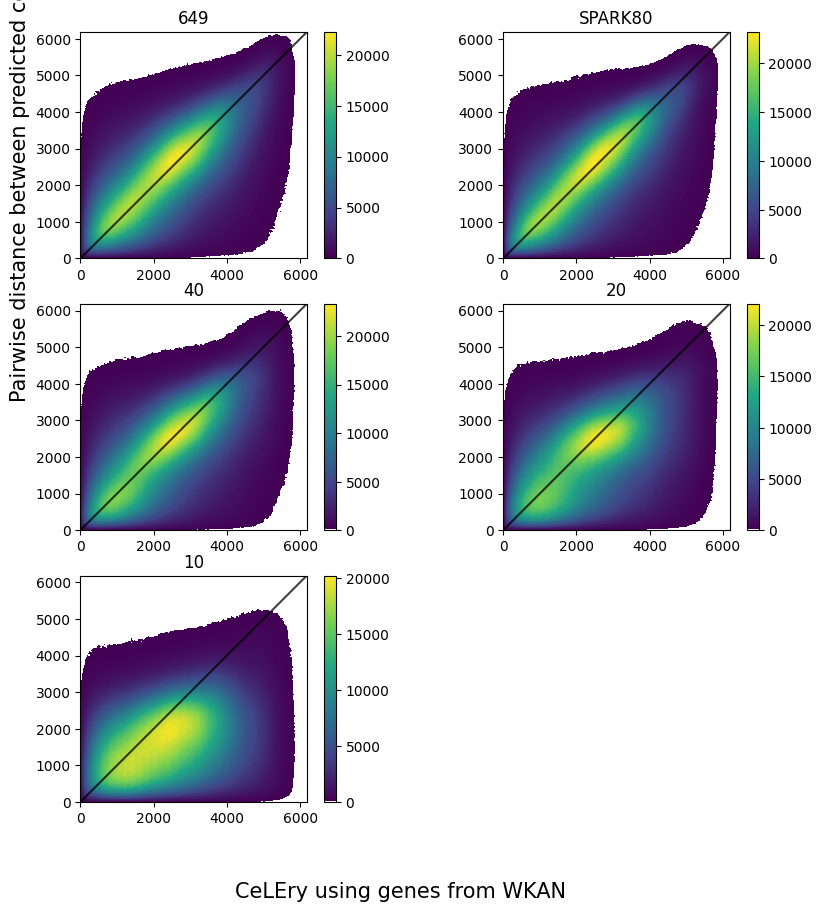

In [70]:
import mpl_scatter_density
from matplotlib.colors import LinearSegmentedColormap

white_viridis = LinearSegmentedColormap.from_list('white_viridis', [
    (0, '#ffffff'),
    (1e-20, '#440053'),
    (0.2, '#404388'),
    (0.4, '#2a788e'),
    (0.6, '#21a784'),
    (0.8, '#78d151'),
    (1, '#fde624'),
], N=256)

max_lim = np.max([np.max(true_dist)])


def using_mpl_scatter_density(ax, x, y, title, label=True):
    density = ax.scatter_density(x, y, cmap=white_viridis)
    plt.title(title)
    if label:
        plt.ylabel("Pairwise distance between predicted coordinates", fontsize=15)
    lims = [0, max_lim]
    ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
    ax.set_aspect('equal', adjustable='box')
    plt.ylim((0, max_lim))
    plt.xlim((0, max_lim))
    fig.colorbar(density)
    
fig = plt.figure(figsize=(10,10))
ax1 = fig.add_subplot(3,2,1,projection='scatter_density')
using_mpl_scatter_density(ax1, true_dist, Celery649result, title="649")
ax2 = fig.add_subplot(3,2,2,projection='scatter_density')
using_mpl_scatter_density(ax2, true_dist, SPARK80Celeryresult, title="SPARK80", label=False)
ax3 = fig.add_subplot(3,2,3,projection='scatter_density')
using_mpl_scatter_density(ax3, true_dist, SPARK40Celeryresult, title="40", label=False)
ax4 = fig.add_subplot(3,2,4,projection='scatter_density')
using_mpl_scatter_density(ax4, true_dist, SPARK20Celeryresult, title="20", label=False)
ax5 = fig.add_subplot(3,2,5,projection='scatter_density')
using_mpl_scatter_density(ax5, true_dist, SPARK10Celeryresult, title="10", label=False)
fig.text(0.5, 0.02, 'CeLEry using genes from WKAN', va='center', ha='center', fontsize=15)

figname = "CeLEry using genes from SPARK.pdf"
fig.savefig(figname)
# plt.close(fig)
plt.show

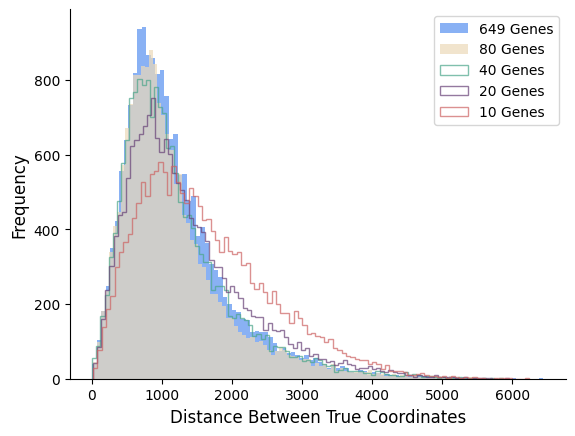

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import matplotlib.pyplot as plt
plt.style.available

# 设置图形的整体风格（取消网格风格）
# plt.style.use('seaborn-white')

# 创建一个新的图形和坐标轴对象
fig, ax = plt.subplots()

# 样本数据（请替换为实际数据）
data0 = Celery649result
data1 = SPARK80Celeryresult
data2 = SPARK40Celeryresult
data3 = SPARK20Celeryresult
data4 = SPARK10Celeryresult
# 绘制直方图
bins = 100  # 箱子的数量
alpha = 0.7  # 透明度

ax.hist(data0, bins=bins, alpha=alpha, label='649 Genes', color='#5790f0')
ax.hist(data1, bins=bins, alpha=alpha, label='80 Genes', color='#ecd9b9', histtype='stepfilled')
ax.hist(data2, bins=bins, alpha=alpha, label='40 Genes', color='#4ba68a', histtype='step')
ax.hist(data3, bins=bins, alpha=alpha, label='20 Genes', color='#674176', histtype='step')
ax.hist(data4, bins=bins, alpha=alpha, label='10 Genes', color='#cd6262', histtype='step')

# 设置标题和标签
# ax.set_title('Different Number of Genes', fontsize=14)
ax.set_xlabel('Distance Between True Coordinates', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

# 添加图例
ax.legend(loc='upper right', fontsize=10)

# 隐藏网格线
ax.grid(False)

# 调整x轴和y轴的位置
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
# 确保 y 轴从 0 开始
ax.set_ylim(bottom=0)
# 保存图形
plt.savefig("Histogram_SPARK_Celery_result", dpi=1300)

# 显示图形
plt.show()

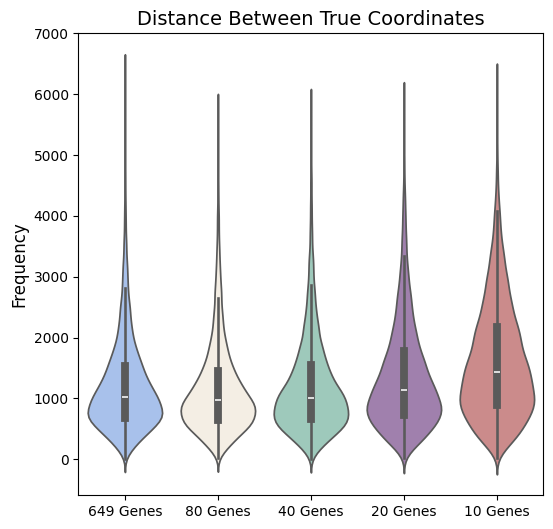

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data0 = Celery649result
data1 = SPARK80Celeryresult
data2 = SPARK40Celeryresult
data3 = SPARK20Celeryresult
data4 = SPARK10Celeryresult
# 将数据转换为列表以便于绘图
data = [data0, data1, data2, data3, data4]

# 设置图形的整体风格
# plt.style.use('seaborn-whitegrid')

colorlist = ['#9dbef6','#f7efe1', '#97d0be' ,'#a378b5','#d68080']
# 创建箱型图
plt.figure(figsize=(6,6))
sns.violinplot(data=data, palette= colorlist)

# 设置标题和标签
plt.title('Distance Between True Coordinates', fontsize=14)
# plt.xlabel('Categories', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# 设置x轴标签
plt.xticks(ticks=[0, 1, 2, 3, 4], labels=['649 Genes', '80 Genes', '40 Genes', '20 Genes', '10 Genes'])

plt.savefig("violinplot_Celery_SPARK", dpi=1300)


# 显示图形
plt.show()